In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from math import isnan
import numpy as np

In [2]:
def separate_quintile(dct):
    clean_dict = {k: dct[k] for k in dct if not isnan(dct[k])}
    dct_sorted = {k: v for k, v in sorted(clean_dict.items(), key=lambda item: item[1])}
    lenTotal = round(len(dct_sorted)/5)
    lst_index = [1]*lenTotal
    for i in range(2,5):
        lst_index += [i]*lenTotal
    last_decil = len(dct_sorted) - 4*lenTotal
    lst_index += [5]*last_decil
    return dct_sorted, lst_index

## Data reading: basic information about Vale do Ribeira

IBGE Data census 2010 downloaded from 

ftp://ftp.ibge.gov.br/Censos/Censo_Demografico_2010/Resultados_do_Universo/Agregados_por_Setores_Censitarios/SP_Exceto_a_Capital_20190207.zip 



In [3]:
cod_municios_VR  = ['35027', '35053','35054','35092','35099','35148','35203','35204','35212','35221','35226','35233','35246','35261','35262','35299','35362','35372','35426','35428','35499','35518','35535','41002','41031','41052','41286','41112','41222','41278']

In [4]:
# municipalities of Vale do Ribeira

municipios_VR = ['Apiaí', 'Barra do Chapéu', 'Barra do Turvo', 'Cajati', 'Cananéia', 'Eldorado', 'Iguape', 'Ilha Comprida', 'Iporanga', 'Itaóca', 'Itapirapuã Paulista', 'Itariri', 'Jacupiranga', 'Juquiá', 'Juquitiba', 'Miracatu', 'Pariquera-Açu', 'Pedro de Toledo', 'Registro', 'Ribeira', 'São Lourenço da Serra', 'Sete Barras', 'Tapiraí', 'Adrianópolis', 'Bocaiúva do Sul', 'Cerro Azul', 'Doutor Ulysses', 'Itaperuçu', 'Rio Branco do Sul', 'Tunas do Paraná']
municipios_VR = [value.upper() for value in municipios_VR]

In [5]:
basicoPR = pd.read_excel('raw_data/ibge2010/Basico_PR.xls') #Paraná
basicoSP = pd.read_excel('raw_data/ibge2010/Basico_SP2.xls') # São Paulo

In [6]:
pr_VR = basicoPR[basicoPR['Nome_do_municipio'].isin(municipios_VR)]
sp_VR = basicoSP[basicoSP['Nome_do_municipio'].isin(municipios_VR)]

basicoVR = pd.concat([sp_VR, pr_VR])
VALE_RIBEIRA = pd.concat([sp_VR, pr_VR]) #vale do ribeira dataframe
cod_setor = VALE_RIBEIRA['Cod_setor'].unique() #sensus sectors

#census sectors
numSetorSP = sp_VR['Cod_setor'].unique()
numSetorPR = pr_VR['Cod_setor'].unique()

#print(len(numSetorPR)) #203 census sectors from VR in Paraná
#print(len(numSetorSP)) #714 census sectors from VR in São Paulo
print(len(numSetorPR) + len(numSetorSP), "census sectors in Vale do Ribeira") # total 917

917 census sectors in Vale do Ribeira


In [7]:
testeCodsetor = pd.concat([sp_VR, pr_VR])
testeCodsetor

Cod_setor  Cod_Grandes Regiões Nome_Grande_Regiao Cod_UF  \
1084   350270505000001                    3     Região Sudeste     SP   
1085   350270505000002                    3     Região Sudeste     SP   
1086   350270505000003                    3     Região Sudeste     SP   
1087   350270505000004                    3     Região Sudeste     SP   
1088   350270505000005                    3     Região Sudeste     SP   
...                ...                  ...                ...    ...   
17428  412863305000009                    4         Região Sul     PR   
17429  412863305000010                    4         Região Sul     PR   
17430  412863305000011                    4         Região Sul     PR   
17431  412863305000012                    4         Região Sul     PR   
17432  412863305000013                    4         Região Sul     PR   

      Nome_da_UF   Cod_meso               Nome_da_meso  Cod_micro  \
1084    São Paulo      3511               Itapetininga      35044   
1085    São Paulo      3511               Itapetininga      35044   
1086    São Paulo      3511               Itapetininga      35044   
1087    São Paulo      3511               Itapetininga      35044   
1088    São Paulo      3511               Itapetininga      35044   
...           ...       ...                        ...        ...   
17428      Paraná      4110  Metropolitana de Curitiba      41035   
17429      Paraná      4110  Metropolitana de Curitiba      41035   
17430      Paraná      4110  Metropolitana de Curitiba      41035   
17431      Paraná      4110  Metropolitana de Curitiba      41035   
17432      Paraná      4110  Metropolitana de Curitiba      41035   

      Nome_da_micro  Cod_RM  ...  V003  V004     V005          V006     V007  \
1084   Capão Bonito       0  ...  2.99  2.29  1041.52  2.494025e+06  1208.16   
1085   Capão Bonito       0  ...  2.92  2.49  1522.40  4.846961e+06  1573.15   
1086   Capão Bonito       0  ...  2.90  2.15  2921.15  1.290075e+07  2978.99   
1087   Capão Bonito       0  ...  3.20  2.14  3912.21  7.993150e+08  4338.30   
1088   Capão Bonito       0  ...  3.30  2.61   783.93  3.915699e+05   809.43   
...             ...     ...  ...   ...   ...      ...           ...      ...   
17428    Cerro Azul      23  ...  3.43  2.91   332.70  2.226868e+05   615.12   
17429    Cerro Azul      23  ...  3.31  2.66   432.87  8.851418e+04   483.47   
17430    Cerro Azul      23  ...  3.52  3.88   497.74  1.408347e+05   561.41   
17431    Cerro Azul      23  ...  3.67  3.06   420.83  1.266634e+05   601.88   
17432    Cerro Azul      23  ...  3.25  2.47   376.62  2.491003e+05   597.07   

               V008     V009          V010     V011          V012  
1084   2.693065e+06   756.23  1.540642e+06  1075.16  1.848462e+06  
1085   4.929243e+06   902.73  2.397731e+06  1247.07  2.884587e+06  
1086   1.298472e+07  1653.02  7.020103e+06  2182.31  8.118250e+06  
1087   8.853727e+08  1830.15  3.092284e+08  2788.34  4.692944e+08  
1088   3.836363e+05   466.07  3.011237e+05   695.64  2.897253e+05  
...             ...      ...           ...      ...           ...  
17428  2.381755e+05   186.55  1.266643e+05   449.33  1.873372e+05  
17429  7.430649e+04   233.88  8.517287e+04   399.17  7.936740e+04  
17430  1.228981e+05   270.28  1.477149e+05   498.70  1.587114e+05  
17431  7.154349e+04   211.92  9.218205e+04   510.01  6.966823e+04  
17432  2.634608e+05   211.31  1.553801e+05   565.07  2.160530e+05  

[917 rows x 33 columns]

In [8]:
testeCodsetor.columns

Index(['Cod_setor', 'Cod_Grandes Regiões', 'Nome_Grande_Regiao', 'Cod_UF',
       'Nome_da_UF ', 'Cod_meso', 'Nome_da_meso', 'Cod_micro', 'Nome_da_micro',
       'Cod_RM', 'Nome_da_RM', 'Cod_municipio', 'Nome_do_municipio',
       'Cod_distrito', 'Nome_do_distrito', 'Cod_subdistrito',
       'Nome_do_subdistrito', 'Cod_bairro', 'Nome_do_bairro', 'Situacao_setor',
       'Tipo_setor', 'V001', 'V002', 'V003', 'V004', 'V005', 'V006', 'V007',
       'V008', 'V009', 'V010', 'V011', 'V012'],
      dtype='object')

In [9]:
testeCodsetor[testeCodsetor['Nome_do_municipio']=='ELDORADO'][['Cod_micro','Cod_municipio','Nome_do_municipio']]

Cod_micro  Cod_municipio Nome_do_municipio
11636      35055        3514809          ELDORADO
11637      35055        3514809          ELDORADO
11638      35055        3514809          ELDORADO
11639      35055        3514809          ELDORADO
11640      35055        3514809          ELDORADO
11641      35055        3514809          ELDORADO
11642      35055        3514809          ELDORADO
11643      35055        3514809          ELDORADO
11644      35055        3514809          ELDORADO
11645      35055        3514809          ELDORADO
11646      35055        3514809          ELDORADO
11647      35055        3514809          ELDORADO
11648      35055        3514809          ELDORADO
11649      35055        3514809          ELDORADO
11650      35055        3514809          ELDORADO
11651      35055        3514809          ELDORADO
11652      35055        3514809          ELDORADO
11653      35055        3514809          ELDORADO
11654      35055        3514809          ELDORADO
11655      35055        3514809          ELDORADO
11656      35055        3514809          ELDORADO
11657      35055        3514809          ELDORADO
11658      35055        3514809          ELDORADO
11659      35055        3514809          ELDORADO
11660      35055        3514809          ELDORADO
11661      35055        3514809          ELDORADO
11662      35055        3514809          ELDORADO
11663      35055        3514809          ELDORADO
11664      35055        3514809          ELDORADO
11665      35055        3514809          ELDORADO

In [10]:
testeCodsetor[testeCodsetor['Cod_municipio'].astype(str).str[0:5]=='35138'][['Cod_micro','Cod_municipio','Nome_do_municipio','Cod_UF']]

Empty DataFrame
Columns: [Cod_micro, Cod_municipio, Nome_do_municipio, Cod_UF]
Index: []

In [11]:
# Number of census sectors per municipality
unique, counts = np.unique(VALE_RIBEIRA['Nome_do_municipio'], return_counts=True)
pd.DataFrame({'municipality':unique, '# census sectors':counts})


municipality  # census sectors
0            ADRIANÓPOLIS                21
1                   APIAÍ                55
2         BARRA DO CHAPÉU                11
3          BARRA DO TURVO                14
4         BOCAIÚVA DO SUL                23
5                  CAJATI                38
6                CANANÉIA                27
7              CERRO AZUL                42
8          DOUTOR ULYSSES                13
9                ELDORADO                30
10                 IGUAPE                60
11          ILHA COMPRIDA                28
12               IPORANGA                19
13              ITAPERUÇU                34
14    ITAPIRAPUÃ PAULISTA                 9
15                ITARIRI                61
16                 ITAÓCA                 9
17            JACUPIRANGA                26
18              JUQUITIBA                54
19                 JUQUIÁ                36
20               MIRACATU                48
21          PARIQUERA-AÇU                27
22        PEDRO DE TOLEDO                17
23               REGISTRO                69
24                RIBEIRA                 8
25      RIO BRANCO DO SUL                58
26            SETE BARRAS                26
27  SÃO LOURENÇO DA SERRA                27
28                TAPIRAÍ                15
29        TUNAS DO PARANÁ                12

## Longevity index

+ Data used: **Pessoa13_PR.xls** and **Pessoa13_SP.xls**
+ Description: provides information on the resident population by sex, age.

### Variables used:

**Dimensão longevidade**

O indicador de longevidade, que sintetiza as condições de salubridade e de saúde de uma região, mede a quantidade de anos que uma pessoa deve viver, mantidas constantes as condições de mortalidade no local (PNUD, 2003).

Tanto para o IDH-Nacional quanto para o IDH-Municipal, a dimensão longevidade é calculada a partir dos dados relativos à esperança de vida ao nascer, que, por sua vez, é baseada em taxas de mortalidade. Contudo, informações desse tipo são obtidas apenas no censo amostral, o que impede a utilização da mesma metodologia neste trabalho, visto que não há dados deste tipo por setores censitários.

Para resolver este problema, assumiu-se que a dimensão longevidade do IDH-Municipal constitui a média do indicador em todos os setores. Dada essa premissa, buscou-se encontrar a expectativa de vida populacional viçosense, aplicando-se o valor de 0,756, que corresponde ao IDH-Longevidade municipal (PNUD, 2009), na inversa da equação 2, que define o IDH-Longevidade em função da expectativa de vida (PNUD, 2003):



onde:

EV é a expectativa de vida (em anos);

25 e 85 correspondem às idades mínima e máxima utilizadas pelo PNUD, respectivamente.

Constatou-se que a expectativa de vida viçosense é de aproximadamente 70 anos. Analisando a distribuição acumulada de pessoas por idade no município (obtida no Excel 2003 a partir da soma acumulada do número de pessoas em cada idade), verificou-se que 96,8% da população possui entre 0 e 70 anos. Com a condição admitida anteriormente de que a longevidade municipal constitui a média setorial, cada setor possui 96,8% de sua população abaixo da idade referente à sua expectativa de vida.

O passo seguinte foi multiplicar o número de pessoas residentes em cada setor por 0,968, o que permite encontrar o número de pessoas com idade abaixo da correspondente à expectativa de vida de cada setor. Porém, esse número não é do tipo inteiro. Para transformá-lo em inteiro, criou-se a distribuição acumulada de pessoas por idade para cada setor e, a partir dela, utilizando-se a função PROC do Excel 2003, obteve-se o número de pessoas imediatamente abaixo do número encontrado anteriormente, em cada setor.

Desta forma, foi determinado para cada setor um valor inteiro equivalente ao número acumulado de pessoas imediatamente inferior ao valor real correspondente a 96,8% da população total do setor.

A partir do número de pessoas abaixo da idade assumida como a expectativa de vida e da distribuição acumulada de pessoas por idade, determinou-se a idade correspondente à expectativa de vida de cada setor.

As variáveis utilizadas no cálculo da longevidade foram as V1347 a V1447, referentes ao número de pessoas em cada idade por setor censitário.

| File |    var      | Description |
|  :---  | :--- | :--- |
| **rankingIDHM200.xls**| 
| .| IDHM Longevidade 2010 |
| **Pessoa13_UF.xls** |
| .| V041 a V048 | Pessoas com 7 a 14 anos de idade | 
| .| V035 a V134 | Pessoas com 14 - 100 anos ou mais de idade |

In [12]:
# Atlas Brazil, pag. 9 
age_max = 85
age_min = 25

In [13]:
#loading data
IDHM = pd.read_excel('raw_data/ibge2010/rankingIDHM2010.xls',skiprows=4)

IDHM['Municípios'] = [value.upper() for value in IDHM['Municípios']]
IDHM = IDHM[IDHM['Municípios'].isin(municipios_VR)]
IDHM = IDHM[IDHM['Estado'].isin(['(SP)', '(PR)'])].reset_index()


In [14]:
#loading data
agePR = pd.read_excel('raw_data/ibge2010/Pessoa13_PR.xls')
ageSP = pd.read_excel('raw_data/ibge2010/Pessoa13_SP2.xls')

ageVR = pd.concat([agePR, ageSP])
ageVR = ageVR[ageVR['Cod_setor'].isin(cod_setor)]
ageVR = ageVR[ageVR['V002'] != 'X'] 
#Note: we used 'V002', but it could be any variable
#just to avoid empty data with 'X'
print(len(ageVR), 'census sectors to calculate Longevity index') #880

880 census sectors to calculate Longevity index


In [15]:
# Step 1: Calculating the Life Expectancy of the municipality
#Database rankingIDHM.xls
#EV = IDHL * (85-25) +25
#EV = 60 * IDHL +25
IDHL = IDHM[['Municípios',"IDHM Longevidade 2010"]].copy()

IDHL["EV"]= IDHL["IDHM Longevidade 2010"] * (age_max - age_min) + age_min
#IDHL["EV"]= IDHL["EV"].astype('int32') #convert to integer
IDHL

Municípios IDHM Longevidade 2010     EV
0                REGISTRO                 0.851  76.06
1           PARIQUERA-AÇU                 0.862  76.72
2   SÃO LOURENÇO DA SERRA                 0.823  74.38
3                  IGUAPE                 0.847  75.82
4           ILHA COMPRIDA                 0.823  74.38
5                CANANÉIA                 0.851  76.06
6             JACUPIRANGA                 0.832  74.92
7                   APIAÍ                 0.835   75.1
8               JUQUITIBA                 0.791  72.46
9                IPORANGA                 0.816  73.96
10                 JUQUIÁ                 0.823  74.38
11                RIBEIRA                 0.797  72.82
12               MIRACATU                 0.803  73.18
13        PEDRO DE TOLEDO                 0.812  73.72
14                 CAJATI                 0.832  74.92
15               ELDORADO                 0.847  75.82
16                TAPIRAÍ                 0.846  75.76
17                 ITAÓCA                 0.787  72.22
18      RIO BRANCO DO SUL                 0.847  75.82
19                ITARIRI                 0.837  75.22
20            SETE BARRAS                 0.832  74.92
21           ADRIANÓPOLIS                 0.817  74.02
22    ITAPIRAPUÃ PAULISTA                 0.816  73.96
23        BARRA DO CHAPÉU                 0.779  71.74
24         BARRA DO TURVO                 0.792  72.52
25        BOCAIÚVA DO SUL                 0.816  73.96
26              ITAPERUÇU                 0.779  71.74
27        TUNAS DO PARANÁ                 0.801  73.06
28             CERRO AZUL                 0.797  72.82
29         DOUTOR ULYSSES                 0.791  72.46

In [16]:
# Step 2: Identifying the distribution under EV years

#DATABASE: Pessoa13_SP2.xls and Pessoa13_PR.xls 
#Variaveis V22 & V35 a V134
#dist = SUM(under EV)/SUM(ALL)

#V022 Pessoas com menos de 1 ano de idade
#V035 Pessoas de 1 ano de idade
#V134 Pessoas com 100 anos ou mais de idade

#for muni,code in zip(municipios_VR, cod_municios_VR):
#    setores_muni=ageVR[ageVR['Cod_setor'].astype(str).str[0:5]==code]#setores por municipios
    
#    vars1 = ['V'+"{0:03}".format(x) for x in np.r_[22,35:134+1]] #V022 & V035 a V134
#    sumAll= setores_muni[vars1].sum(axis=1)   #Pessoas por idade    
    
#    ev = IDHL.loc[IDHL.Municípios==muni, 'EV'].values[0]    
    
#    vars2 = ['V'+"{0:03}".format(x) for x in np.r_[22,35:35+ev]]#V022 & V035 - V_exp
#    sum_underEV= setores_muni[vars2].sum(axis=1)
#    ageVR.loc[ageVR['Cod_setor'].astype(str).str[0:5]==code, 'dist']=sum_underEV/sumAll    #dist
#     print(muni,code,ev,sum_underEV/sumAll) 


### test para municipio de Apiaí codigo = '35027'
![expectativa de vida por setor censitario para o municipio de Apiai](screen_example_Apiai.png)

In [17]:
# test para municipio de Apiaí codigo = '35027'
ageVR.loc[ageVR['Cod_setor'].astype(str).str[0:5]=='35027']

Cod_setor  Situacao_setor  V001  V002 V003 V004 V005 V006 V007  \
1084  350270505000001               1   525   521  176   96  107   75    4   
1085  350270505000002               1   452   452  155   94   91   58    4   
1086  350270505000003               1   303   299  105   69   74   22    3   
1087  350270505000004               1   358   358  112   66   80   52    1   
1088  350270505000005               1   839   837  256  159  198   86   22   
1089  350270505000006               1    72    29   10    7    7    2    0   
1090  350270505000007               1   314   310   97   62   78   17    1   
1091  350270505000008               1   528   509  149  111  137   39   18   
1092  350270505000009               1   356   356  120   77   78   35    6   
1093  350270505000010               1   491   491  134   94  137   55    8   
1094  350270505000011               1   825   825  260  171  227   72    6   
1095  350270505000012               1   724   724  194  116  162  152   24   
1096  350270505000013               1   709   709  224  134  167  113    6   
1097  350270505000014               1   324   324  104   55   60   35    1   
1098  350270505000015               1   357   357  114   63   64   65    4   
1099  350270505000016               1   296   292   98   65   58   29    0   
1100  350270505000017               1   823   823  240  150  189  140   28   
1101  350270505000018               1   544   544  159  114  169   44   14   
1102  350270505000019               1   413   413  136   86   76   46   15   
1103  350270505000020               1   505   505  164  106  128   39    3   
1104  350270505000021               1  1176  1176  361  236  285  158   38   
1105  350270505000022               1   533   533  157  105  155   50    2   
1106  350270505000023               1   646   646  182  108  136   95    6   
1107  350270505000024               1   483   483  138   82  122   59    5   
1108  350270505000025               1   269   269   98   59   59   27    5   
1109  350270505000026               1   622   622  188  116  140   90    8   
1110  350270505000027               1   923   923  279  192  236  111   19   
1111  350270505000028               8   484   484  151  115  155   29    9   
1112  350270505000029               8   357   357  105   74  115   38    7   
1113  350270505000030               8   310   285   92   63  100   23    0   
1114  350270505000031               8   293   293   86   59  103   28    3   
1116  350270505000033               8   133   133   37   26   39   14    2   
1117  350270505000034               8   275   275   79   45   90   29   18   
1118  350270505000035               8   580   576  164   87  149   78    7   
1119  350270505000036               8   235   231   75   50   76    8    2   
1121  350270505000038               8   940   940  297  221  292   59   13   
1122  350270505000039               8   766   766  212  127  178  120    7   
1123  350270505000040               8   320   320   95   68   95   31    3   
1124  350270510000001               1   507   507  148   98  144   38    6   
1125  350270510000002               1   438   438  121   92  135   38    8   
1126  350270510000003               8   294   294   86   71  106   20    0   
1127  350270510000004               8   234   234   64   51   85   13   12   
1128  350270510000005               8    52    52   16   14   17    1    0   
1129  350270510000006               8    97    97   27   19   32    8    6   
1130  350270525000001               1   870   870  262  180  240   83   13   
1131  350270525000002               1   799   799  221  182  283   55   12   
1132  350270525000003               1   354   354  104   75   94   27    5   
1133  350270525000004               8   251   251   69   55   83   15   14   
1134  350270525000005               8   577   577  184  125  160   41    6   
1135  350270525000006               8   310   310   88   74  105   15    8   
1136  350270530000001             

In [18]:
# Step 2 - Modified "dist by municipality": Identifying the distribution under EV years

#DATABASE: Pessoa13_SP2.xls and Pessoa13_PR.xls 
#Variaveis V22 & V35 a V134
#dist = SUM(under EV)/SUM(ALL)

#V022 Pessoas com menos de 1 ano de idade
#V035 Pessoas de 1 ano de idade
#V134 Pessoas com 100 anos ou mais de idade

for muni,code in zip(municipios_VR, cod_municios_VR):
    setores_muni=ageVR[ageVR['Cod_setor'].astype(str).str[0:5]==code]#setores por municipios

    vars1 = ['V'+"{0:03}".format(x) for x in np.r_[22,35:134+1]] #V022 & V035 a V134
    sumAll= setores_muni[vars1].sum(axis=1)   #Pessoas por idade    
    
    ev = int(IDHL.loc[IDHL.Municípios==muni, 'EV'].values[0])   
    
    vars2 = ['V'+"{0:03}".format(x) for x in (np.r_[22,35:35+ev])]#V022 & V035 - V_exp
    print(vars2)
    sum_underEV= setores_muni[vars2].sum(axis=1)
    
    ageVR.loc[ageVR['Cod_setor'].astype(str).str[0:5]==code, 'dist']=sum_underEV/sumAll    #dist
    ageVR.loc[ageVR['Cod_setor'].astype(str).str[0:5]==code, 'Municipality']=muni
    ageVR.loc[ageVR['Cod_setor'].astype(str).str[0:5]==code, 'Muni_code']=code
    ageVR.loc[ageVR['Cod_setor'].astype(str).str[0:5]==code, 'ev']=ev
    ageVR.loc[ageVR['Cod_setor'].astype(str).str[0:5]==code, 'sum_underEV']=sum_underEV

    print(code, muni, 'EV=',ev, ageVR.loc[ageVR['Cod_setor'].astype(str).str[0:5]==code, 'Cod_setor'])#, 'sum_underEV=', sum_underEV,'dist=',sum_underEV/sumAll )


['V022', 'V035', 'V036', 'V037', 'V038', 'V039', 'V040', 'V041', 'V042', 'V043', 'V044', 'V045', 'V046', 'V047', 'V048', 'V049', 'V050', 'V051', 'V052', 'V053', 'V054', 'V055', 'V056', 'V057', 'V058', 'V059', 'V060', 'V061', 'V062', 'V063', 'V064', 'V065', 'V066', 'V067', 'V068', 'V069', 'V070', 'V071', 'V072', 'V073', 'V074', 'V075', 'V076', 'V077', 'V078', 'V079', 'V080', 'V081', 'V082', 'V083', 'V084', 'V085', 'V086', 'V087', 'V088', 'V089', 'V090', 'V091', 'V092', 'V093', 'V094', 'V095', 'V096', 'V097', 'V098', 'V099', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109']
35027 APIAÍ EV= 75 1084    350270505000001
1085    350270505000002
1086    350270505000003
1087    350270505000004
1088    350270505000005
1089    350270505000006
1090    350270505000007
1091    350270505000008
1092    350270505000009
1093    350270505000010
1094    350270505000011
1095    350270505000012
1096    350270505000013
1097    350270505000014
1098    350270505000015
1099    3502

['V022', 'V035', 'V036', 'V037', 'V038', 'V039', 'V040', 'V041', 'V042', 'V043', 'V044', 'V045', 'V046', 'V047', 'V048', 'V049', 'V050', 'V051', 'V052', 'V053', 'V054', 'V055', 'V056', 'V057', 'V058', 'V059', 'V060', 'V061', 'V062', 'V063', 'V064', 'V065', 'V066', 'V067', 'V068', 'V069', 'V070', 'V071', 'V072', 'V073', 'V074', 'V075', 'V076', 'V077', 'V078', 'V079', 'V080', 'V081', 'V082', 'V083', 'V084', 'V085', 'V086', 'V087', 'V088', 'V089', 'V090', 'V091', 'V092', 'V093', 'V094', 'V095', 'V096', 'V097', 'V098', 'V099', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106']
35221 ITAÓCA EV= 72 18211    352215805000001
18212    352215805000002
18213    352215805000003
18214    352215805000004
18215    352215805000005
18216    352215805000006
18217    352215805000007
18218    352215805000008
18219    352215805000009
Name: Cod_setor, dtype: int64
['V022', 'V035', 'V036', 'V037', 'V038', 'V039', 'V040', 'V041', 'V042', 'V043', 'V044', 'V045', 'V046', 'V047', 'V048', 'V049', 'V050', 'V0

['V022', 'V035', 'V036', 'V037', 'V038', 'V039', 'V040', 'V041', 'V042', 'V043', 'V044', 'V045', 'V046', 'V047', 'V048', 'V049', 'V050', 'V051', 'V052', 'V053', 'V054', 'V055', 'V056', 'V057', 'V058', 'V059', 'V060', 'V061', 'V062', 'V063', 'V064', 'V065', 'V066', 'V067', 'V068', 'V069', 'V070', 'V071', 'V072', 'V073', 'V074', 'V075', 'V076', 'V077', 'V078', 'V079', 'V080', 'V081', 'V082', 'V083', 'V084', 'V085', 'V086', 'V087', 'V088', 'V089', 'V090', 'V091', 'V092', 'V093', 'V094', 'V095', 'V096', 'V097', 'V098', 'V099', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107']
35372 PEDRO DE TOLEDO EV= 73 29231    353720605000001
29232    353720605000002
29233    353720605000003
29234    353720605000004
29235    353720605000005
29236    353720605000006
29237    353720605000007
29238    353720605000008
29239    353720605000009
29240    353720605000010
29241    353720605000011
29242    353720605000012
29243    353720605000013
29244    353720605000014
29245    353720605000015
292

41286 DOUTOR ULYSSES EV= 72 17420    412863305000001
17421    412863305000002
17422    412863305000003
17423    412863305000004
17424    412863305000005
17425    412863305000006
17426    412863305000007
17427    412863305000008
17428    412863305000009
17429    412863305000010
17430    412863305000011
17431    412863305000012
17432    412863305000013
Name: Cod_setor, dtype: int64
['V022', 'V035', 'V036', 'V037', 'V038', 'V039', 'V040', 'V041', 'V042', 'V043', 'V044', 'V045', 'V046', 'V047', 'V048', 'V049', 'V050', 'V051', 'V052', 'V053', 'V054', 'V055', 'V056', 'V057', 'V058', 'V059', 'V060', 'V061', 'V062', 'V063', 'V064', 'V065', 'V066', 'V067', 'V068', 'V069', 'V070', 'V071', 'V072', 'V073', 'V074', 'V075', 'V076', 'V077', 'V078', 'V079', 'V080', 'V081', 'V082', 'V083', 'V084', 'V085', 'V086', 'V087', 'V088', 'V089', 'V090', 'V091', 'V092', 'V093', 'V094', 'V095', 'V096', 'V097', 'V098', 'V099', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105']
41112 ITAPERUÇU EV= 71 8699    411125805

In [19]:
ageVR

Cod_setor  Situacao_setor  V001 V002 V003 V004 V005 V006 V007  \
16     410020205000001               1   459  457  144   89  112   57    6   
17     410020205000002               1   615  607  201  137  149   59    5   
18     410020205000003               8   461  461  155  100  106   55   10   
19     410020205000004               8   594  594  186  125  135   60   25   
20     410020205000005               5    21   20    8    5    4    2    0   
...                ...             ...   ...  ...  ...  ...  ...  ...  ...   
45132  355350005000012               8   239  239   81   63   67   10    5   
45133  355350005000013               8   471  470  136  104  160   25    5   
45134  355350005000014               8   385  385  117   84  114   30   10   
45135  355350005000015               1   339  330  109   76   82   32   12   
45136  355350005000016               1   613  613  175  118  162   98   10   

      V008  ... V130 V131 V132 V133 V134      dist  Municipality Muni_code  \
16       5  ...    0    0    0    0    1  0.978214  ADRIANÓPOLIS     41002   
17       6  ...    0    0    0    0    0  0.967480  ADRIANÓPOLIS     41002   
18       4  ...    0    0    0    0    1  0.954447  ADRIANÓPOLIS     41002   
19       6  ...    0    0    1    1    0  0.961279  ADRIANÓPOLIS     41002   
20       0  ...    0    0    0    0    0  0.904762  ADRIANÓPOLIS     41002   
...    ...  ...  ...  ...  ...  ...  ...       ...           ...       ...   
45132    0  ...    0    0    0    0    0  0.974895       TAPIRAÍ     35535   
45133    2  ...    0    0    0    0    0  0.970276       TAPIRAÍ     35535   
45134    2  ...    0    0    0    0    0  0.976623       TAPIRAÍ     35535   
45135    4  ...    0    0    0    0    0  0.946903       TAPIRAÍ     35535   
45136    9  ...    0    0    0    0    0  0.985318       TAPIRAÍ     35535   

         ev sum_underEV  
16     74.0       449.0  
17     74.0       595.0  
18     74.0       440.0  
19     74.0       571.0  
20     74.0        19.0  
...     ...         ...  
45132  75.0       233.0  
45133  75.0       457.0  
45134  75.0       376.0  
45135  75.0       321.0  
45136  75.0       604.0  

[880 rows x 141 columns]

In [20]:
distMunicipality = ageVR.groupby(['Municipality', 'Muni_code', 'ev'])['sum_underEV','V001','V002','V003'].sum().reset_index()

/home/machicao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [21]:
distMunicipality['dist']=distMunicipality['sum_underEV']/distMunicipality['V001']

In [22]:
distMunicipality

Municipality Muni_code    ev  sum_underEV   V001      dist
0            ADRIANÓPOLIS     41002  74.0       6117.0   6376  0.959379
1                   APIAÍ     35027  75.0      24546.0  25185  0.974628
2         BARRA DO CHAPÉU     35053  71.0       5014.0   5244  0.956140
3          BARRA DO TURVO     35054  72.0       7427.0   7729  0.960926
4         BOCAIÚVA DO SUL     41031  73.0      10676.0  10987  0.971694
5                  CAJATI     35092  74.0      27593.0  28372  0.972543
6                CANANÉIA     35099  76.0      11776.0  12088  0.974189
7              CERRO AZUL     41052  72.0      16369.0  16938  0.966407
8          DOUTOR ULYSSES     41286  72.0       5548.0   5727  0.968745
9                ELDORADO     35148  75.0      14213.0  14641  0.970767
10                 IGUAPE     35203  75.0      27814.0  28793  0.965999
11          ILHA COMPRIDA     35204  74.0       8661.0   8914  0.971618
12               IPORANGA     35212  73.0       4110.0   4276  0.961179
13              ITAPERUÇU     41112  71.0      23345.0  23812  0.980388
14    ITAPIRAPUÃ PAULISTA     35226  73.0       3754.0   3880  0.967526
15                ITARIRI     35233  75.0      14994.0  15390  0.974269
16                 ITAÓCA     35221  72.0       3029.0   3228  0.938352
17            JACUPIRANGA     35246  74.0      16420.0  16981  0.966963
18              JUQUITIBA     35262  72.0      27914.0  28726  0.971733
19                 JUQUIÁ     35261  74.0      18572.0  19246  0.964980
20               MIRACATU     35299  73.0      19884.0  20541  0.968015
21          PARIQUERA-AÇU     35362  76.0      17956.0  18446  0.973436
22        PEDRO DE TOLEDO     35372  73.0       9826.0  10204  0.962956
23               REGISTRO     35426  76.0      52880.0  54261  0.974549
24                RIBEIRA     35428  72.0       3194.0   3358  0.951161
25      RIO BRANCO DO SUL     41222  75.0      30167.0  30650  0.984241
26            SETE BARRAS     35518  74.0      12625.0  13000  0.971154
27  SÃO LOURENÇO DA SERRA     35499  74.0      13664.0  13973  0.977886
28                TAPIRAÍ     35535  75.0       7810.0   8012  0.974788
29        TUNAS DO PARANÁ     41278  73.0       6143.0   6256  0.981937

In [23]:
distMunicipality['Muni_code'].unique()

array(['41002', '35027', '35053', '35054', '41031', '35092', '35099',
       '41052', '41286', '35148', '35203', '35204', '35212', '41112',
       '35226', '35233', '35221', '35246', '35262', '35261', '35299',
       '35362', '35372', '35426', '35428', '41222', '35518', '35499',
       '35535', '41278'], dtype=object)

In [24]:
distMunicipality['Muni_code'].count()

30

In [25]:
municodes = ageVR['Cod_setor'].astype(str).str[0:5]
municodes.unique()

array(['41002', '41031', '41052', '41112', '41222', '41278', '41286',
       '35027', '35053', '35054', '35092', '35099', '35148', '35203',
       '35204', '35212', '35221', '35226', '35233', '35246', '35261',
       '35262', '35299', '35362', '35372', '35426', '35428', '35499',
       '35518', '35535'], dtype=object)

In [26]:
municodes[municodes.isin(distMunicipality['Muni_code'])==False]

Series([], Name: Cod_setor, dtype: object)

In [27]:
ageVR[ageVR['Cod_setor'].astype(str).str[0:5]=='35148']

Cod_setor  Situacao_setor  V001  V002 V003 V004 V005 V006 V007  \
11636  351480905000001               1   777   777  255  159  180   73    4   
11637  351480905000002               1  1153  1137  370  228  271  150   18   
11638  351480905000003               1  1340  1340  413  264  333  186   17   
11639  351480905000004               1  1566  1566  454  296  411  241   35   
11640  351480905000005               1   538   535  174   93  136   67    9   
11641  351480905000006               1   797   797  206  135  257  105   18   
11642  351480905000007               8   669   660  185  130  187   70   22   
11643  351480905000008               8   218   218   67   43   65   21    3   
11644  351480905000009               8   404   404  118   82  118   26    7   
11645  351480905000010               8   181   176   47   40   63    1   10   
11646  351480905000011               8   162   162   62   34   34   16    2   
11647  351480905000012               8   185   185   55   39   58   14    1   
11648  351480905000013               8   507   506  142  110  159   50    7   
11649  351480905000014               8   654   654  183  144  200   51   28   
11650  351480905000015               8   180   180   43   37   77    3    8   
11651  351480905000016               8    52    52   20   13   14    4    1   
11652  351480905000017               8    69    69   19   16   22    7    2   
11653  351480910000001               1   378   378  117   85   96   38   11   
11654  351480910000002               8   232   232   64   44   65   25    4   
11655  351480910000003               8   540   540  162  114  127   48   28   
11656  351480910000006               8   221   221   55   40   76   13    4   
11657  351480915000001               1   656   656  214  153  195   54    3   
11658  351480915000002               8   453   453  121  100  179   15   17   
11659  351480915000003               5   377   377   98   68  129   20    8   
11660  351480915000004               8   346   346   95   63  114   26   21   
11661  351480915000005               8   836   836  207  139  278   76   12   
11662  351480915000006               8   224   224   62   39   76   28    9   
11663  351480915000007               8    24    24    6    4   13    1    0   
11664  351480915000011               8   546   546  158  113  207   37    4   
11665  351480915000012               8   356   356   90   64  124   25   10   

      V008  ... V130 V131 V132 V133 V134      dist Municipality Muni_code  \
11636    2  ...    2    0    0    2    0  0.948520     ELDORADO     35148   
11637    7  ...    1    0    0    0    0  0.971379     ELDORADO     35148   
11638   13  ...    1    0    0    1    0  0.964179     ELDORADO     35148   
11639   15  ...    0    0    0    0    1  0.980843     ELDORADO     35148   
11640    8  ...    0    0    0    0    0  0.938662     ELDORADO     35148   
11641    5  ...    0    0    0    0    0  0.982434     ELDORADO     35148   
11642    5  ...    0    0    0    0    0  0.964126     ELDORADO     35148   
11643    3  ...    0    0    0    0    0  0.958716     ELDORADO     35148   
11644    6  ...    0    0    0    0    0  0.970297     ELDORADO     35148   
11645    1  ...    0    0    0    0    0  0.983425     ELDORADO     35148   
11646    3  ...    0    0    0    0    0  0.950617     ELDORADO     35148   
11647    2  ...    0    0    0    0    0  0.972973     ELDORADO     35148   
11648    4  ...    0    0    0    0    0  0.980276     ELDORADO     35148   
11649    8  ...    0    0    0    0    0  0.964832     ELDORADO     35148   
11650    0  ...    0    0    0    0    0  0.994444     ELDORADO     35148   
11651    0  ...    0    0    0    0    0  1.000000     ELDORADO     35148   
11652    1  ...    0    0    0    0    0  0.985507     ELDORADO     35148   
11653    3  ...    1    0    0    0    1  0.955026     ELDORADO     35148   
11654    1  ...    0    0    0    0    0  0.982759     ELDORADO     35148   
11655    8  ...    0   

#### Step 3: 
#pessoas_por_setor_censitario = SUM(ALL)

#pessoas_idade_abaixo_dist = pessoas_por_setor_censitario * dist

encontrar idade para pessoas_idade_abaixo_dist => idade_ev_setor que é o acumulado de pessoas até aquela idade é exatamente inferior a pessoas_idade_abaixo_dist

In [28]:
for muni,code in zip(municipios_VR, cod_municios_VR):
    setores_muni=ageVR[ageVR['Cod_setor'].astype(str).str[0:5]==code]#setores por municipios
    dist_mun = distMunicipality[distMunicipality['Muni_code']==code]['dist'].iloc[0]
    
    vars1 = ['V'+"{0:03}".format(x) for x in np.r_[22,35:134+1]] #V022 & V035 a V134
    
    for index, sector in setores_muni.iterrows():
        acc = 0
        age = 0
        limAge = 0
        limPeople = sector[vars1].sum() * dist_mun
        for var in vars1:            
            acc+= sector[var]
            print('Setor=', sector['Cod_setor'],'age=',age,'limAge=',limAge,'acc=',acc,'limPeople=',limPeople, 'sector[var]=',sector[vars1].sum(), 'dist_mun=',dist_mun )
            if (acc > limPeople):
                ageVR.at[ageVR['Cod_setor']==sector['Cod_setor'], 'evSector']=limAge#(age-1)
                break
            else:
                if (sector[var] != 0):
                    limAge = age
            age = age + 1
        

Setor= 350270505000001 age= 0 limAge= 0 acc= 5 limPeople= 511.6795711733174 sector[var]= 525 dist_mun= 0.9746277546158427
Setor= 350270505000001 age= 1 limAge= 0 acc= 17 limPeople= 511.6795711733174 sector[var]= 525 dist_mun= 0.9746277546158427
Setor= 350270505000001 age= 2 limAge= 1 acc= 25 limPeople= 511.6795711733174 sector[var]= 525 dist_mun= 0.9746277546158427
Setor= 350270505000001 age= 3 limAge= 2 acc= 33 limPeople= 511.6795711733174 sector[var]= 525 dist_mun= 0.9746277546158427
Setor= 350270505000001 age= 4 limAge= 3 acc= 43 limPeople= 511.6795711733174 sector[var]= 525 dist_mun= 0.9746277546158427
Setor= 350270505000001 age= 5 limAge= 4 acc= 54 limPeople= 511.6795711733174 sector[var]= 525 dist_mun= 0.9746277546158427
Setor= 350270505000001 age= 6 limAge= 5 acc= 61 limPeople= 511.6795711733174 sector[var]= 525 dist_mun= 0.9746277546158427
Setor= 350270505000001 age= 7 limAge= 6 acc= 66 limPeople= 511.6795711733174 sector[var]= 525 dist_mun= 0.9746277546158427
Setor= 3502705050

Setor= 350270505000002 age= 7 limAge= 6 acc= 41 limPeople= 440.5317450863609 sector[var]= 452 dist_mun= 0.9746277546158427
Setor= 350270505000002 age= 8 limAge= 7 acc= 45 limPeople= 440.5317450863609 sector[var]= 452 dist_mun= 0.9746277546158427
Setor= 350270505000002 age= 9 limAge= 8 acc= 50 limPeople= 440.5317450863609 sector[var]= 452 dist_mun= 0.9746277546158427
Setor= 350270505000002 age= 10 limAge= 9 acc= 58 limPeople= 440.5317450863609 sector[var]= 452 dist_mun= 0.9746277546158427
Setor= 350270505000002 age= 11 limAge= 10 acc= 64 limPeople= 440.5317450863609 sector[var]= 452 dist_mun= 0.9746277546158427
Setor= 350270505000002 age= 12 limAge= 11 acc= 71 limPeople= 440.5317450863609 sector[var]= 452 dist_mun= 0.9746277546158427
Setor= 350270505000002 age= 13 limAge= 12 acc= 77 limPeople= 440.5317450863609 sector[var]= 452 dist_mun= 0.9746277546158427
Setor= 350270505000002 age= 14 limAge= 13 acc= 84 limPeople= 440.5317450863609 sector[var]= 452 dist_mun= 0.9746277546158427
Setor= 

Setor= 350270505000003 age= 29 limAge= 28 acc= 106 limPeople= 295.31220964860034 sector[var]= 303 dist_mun= 0.9746277546158427
Setor= 350270505000003 age= 30 limAge= 29 acc= 109 limPeople= 295.31220964860034 sector[var]= 303 dist_mun= 0.9746277546158427
Setor= 350270505000003 age= 31 limAge= 30 acc= 112 limPeople= 295.31220964860034 sector[var]= 303 dist_mun= 0.9746277546158427
Setor= 350270505000003 age= 32 limAge= 31 acc= 115 limPeople= 295.31220964860034 sector[var]= 303 dist_mun= 0.9746277546158427
Setor= 350270505000003 age= 33 limAge= 32 acc= 119 limPeople= 295.31220964860034 sector[var]= 303 dist_mun= 0.9746277546158427
Setor= 350270505000003 age= 34 limAge= 33 acc= 128 limPeople= 295.31220964860034 sector[var]= 303 dist_mun= 0.9746277546158427
Setor= 350270505000003 age= 35 limAge= 34 acc= 130 limPeople= 295.31220964860034 sector[var]= 303 dist_mun= 0.9746277546158427
Setor= 350270505000003 age= 36 limAge= 35 acc= 135 limPeople= 295.31220964860034 sector[var]= 303 dist_mun= 0.9

Setor= 350270505000004 age= 51 limAge= 50 acc= 300 limPeople= 348.9167361524717 sector[var]= 358 dist_mun= 0.9746277546158427
Setor= 350270505000004 age= 52 limAge= 51 acc= 309 limPeople= 348.9167361524717 sector[var]= 358 dist_mun= 0.9746277546158427
Setor= 350270505000004 age= 53 limAge= 52 acc= 313 limPeople= 348.9167361524717 sector[var]= 358 dist_mun= 0.9746277546158427
Setor= 350270505000004 age= 54 limAge= 53 acc= 313 limPeople= 348.9167361524717 sector[var]= 358 dist_mun= 0.9746277546158427
Setor= 350270505000004 age= 55 limAge= 53 acc= 317 limPeople= 348.9167361524717 sector[var]= 358 dist_mun= 0.9746277546158427
Setor= 350270505000004 age= 56 limAge= 55 acc= 317 limPeople= 348.9167361524717 sector[var]= 358 dist_mun= 0.9746277546158427
Setor= 350270505000004 age= 57 limAge= 55 acc= 320 limPeople= 348.9167361524717 sector[var]= 358 dist_mun= 0.9746277546158427
Setor= 350270505000004 age= 58 limAge= 57 acc= 322 limPeople= 348.9167361524717 sector[var]= 358 dist_mun= 0.974627754

Setor= 350270505000006 age= 0 limAge= 0 acc= 0 limPeople= 70.17319833234068 sector[var]= 72 dist_mun= 0.9746277546158427
Setor= 350270505000006 age= 1 limAge= 0 acc= 1 limPeople= 70.17319833234068 sector[var]= 72 dist_mun= 0.9746277546158427
Setor= 350270505000006 age= 2 limAge= 1 acc= 1 limPeople= 70.17319833234068 sector[var]= 72 dist_mun= 0.9746277546158427
Setor= 350270505000006 age= 3 limAge= 1 acc= 2 limPeople= 70.17319833234068 sector[var]= 72 dist_mun= 0.9746277546158427
Setor= 350270505000006 age= 4 limAge= 3 acc= 2 limPeople= 70.17319833234068 sector[var]= 72 dist_mun= 0.9746277546158427
Setor= 350270505000006 age= 5 limAge= 3 acc= 2 limPeople= 70.17319833234068 sector[var]= 72 dist_mun= 0.9746277546158427
Setor= 350270505000006 age= 6 limAge= 3 acc= 2 limPeople= 70.17319833234068 sector[var]= 72 dist_mun= 0.9746277546158427
Setor= 350270505000006 age= 7 limAge= 3 acc= 2 limPeople= 70.17319833234068 sector[var]= 72 dist_mun= 0.9746277546158427
Setor= 350270505000006 age= 8 li

Setor= 350270505000007 age= 12 limAge= 11 acc= 61 limPeople= 306.03311494937464 sector[var]= 314 dist_mun= 0.9746277546158427
Setor= 350270505000007 age= 13 limAge= 12 acc= 72 limPeople= 306.03311494937464 sector[var]= 314 dist_mun= 0.9746277546158427
Setor= 350270505000007 age= 14 limAge= 13 acc= 79 limPeople= 306.03311494937464 sector[var]= 314 dist_mun= 0.9746277546158427
Setor= 350270505000007 age= 15 limAge= 14 acc= 89 limPeople= 306.03311494937464 sector[var]= 314 dist_mun= 0.9746277546158427
Setor= 350270505000007 age= 16 limAge= 15 acc= 93 limPeople= 306.03311494937464 sector[var]= 314 dist_mun= 0.9746277546158427
Setor= 350270505000007 age= 17 limAge= 16 acc= 97 limPeople= 306.03311494937464 sector[var]= 314 dist_mun= 0.9746277546158427
Setor= 350270505000007 age= 18 limAge= 17 acc= 102 limPeople= 306.03311494937464 sector[var]= 314 dist_mun= 0.9746277546158427
Setor= 350270505000007 age= 19 limAge= 18 acc= 110 limPeople= 306.03311494937464 sector[var]= 314 dist_mun= 0.9746277

Setor= 350270505000008 age= 45 limAge= 44 acc= 384 limPeople= 514.6034544371649 sector[var]= 528 dist_mun= 0.9746277546158427
Setor= 350270505000008 age= 46 limAge= 45 acc= 389 limPeople= 514.6034544371649 sector[var]= 528 dist_mun= 0.9746277546158427
Setor= 350270505000008 age= 47 limAge= 46 acc= 398 limPeople= 514.6034544371649 sector[var]= 528 dist_mun= 0.9746277546158427
Setor= 350270505000008 age= 48 limAge= 47 acc= 404 limPeople= 514.6034544371649 sector[var]= 528 dist_mun= 0.9746277546158427
Setor= 350270505000008 age= 49 limAge= 48 acc= 406 limPeople= 514.6034544371649 sector[var]= 528 dist_mun= 0.9746277546158427
Setor= 350270505000008 age= 50 limAge= 49 acc= 414 limPeople= 514.6034544371649 sector[var]= 528 dist_mun= 0.9746277546158427
Setor= 350270505000008 age= 51 limAge= 50 acc= 417 limPeople= 514.6034544371649 sector[var]= 528 dist_mun= 0.9746277546158427
Setor= 350270505000008 age= 52 limAge= 51 acc= 419 limPeople= 514.6034544371649 sector[var]= 528 dist_mun= 0.974627754

Setor= 350270505000009 age= 63 limAge= 62 acc= 312 limPeople= 346.96748064324004 sector[var]= 356 dist_mun= 0.9746277546158427
Setor= 350270505000009 age= 64 limAge= 63 acc= 314 limPeople= 346.96748064324004 sector[var]= 356 dist_mun= 0.9746277546158427
Setor= 350270505000009 age= 65 limAge= 64 acc= 315 limPeople= 346.96748064324004 sector[var]= 356 dist_mun= 0.9746277546158427
Setor= 350270505000009 age= 66 limAge= 65 acc= 320 limPeople= 346.96748064324004 sector[var]= 356 dist_mun= 0.9746277546158427
Setor= 350270505000009 age= 67 limAge= 66 acc= 326 limPeople= 346.96748064324004 sector[var]= 356 dist_mun= 0.9746277546158427
Setor= 350270505000009 age= 68 limAge= 67 acc= 328 limPeople= 346.96748064324004 sector[var]= 356 dist_mun= 0.9746277546158427
Setor= 350270505000009 age= 69 limAge= 68 acc= 331 limPeople= 346.96748064324004 sector[var]= 356 dist_mun= 0.9746277546158427
Setor= 350270505000009 age= 70 limAge= 69 acc= 333 limPeople= 346.96748064324004 sector[var]= 356 dist_mun= 0.9

Setor= 350270505000010 age= 59 limAge= 58 acc= 438 limPeople= 478.5422275163788 sector[var]= 491 dist_mun= 0.9746277546158427
Setor= 350270505000010 age= 60 limAge= 59 acc= 440 limPeople= 478.5422275163788 sector[var]= 491 dist_mun= 0.9746277546158427
Setor= 350270505000010 age= 61 limAge= 60 acc= 447 limPeople= 478.5422275163788 sector[var]= 491 dist_mun= 0.9746277546158427
Setor= 350270505000010 age= 62 limAge= 61 acc= 454 limPeople= 478.5422275163788 sector[var]= 491 dist_mun= 0.9746277546158427
Setor= 350270505000010 age= 63 limAge= 62 acc= 456 limPeople= 478.5422275163788 sector[var]= 491 dist_mun= 0.9746277546158427
Setor= 350270505000010 age= 64 limAge= 63 acc= 460 limPeople= 478.5422275163788 sector[var]= 491 dist_mun= 0.9746277546158427
Setor= 350270505000010 age= 65 limAge= 64 acc= 464 limPeople= 478.5422275163788 sector[var]= 491 dist_mun= 0.9746277546158427
Setor= 350270505000010 age= 66 limAge= 65 acc= 468 limPeople= 478.5422275163788 sector[var]= 491 dist_mun= 0.974627754

Setor= 350270505000012 age= 12 limAge= 11 acc= 193 limPeople= 705.6304943418701 sector[var]= 724 dist_mun= 0.9746277546158427
Setor= 350270505000012 age= 13 limAge= 12 acc= 216 limPeople= 705.6304943418701 sector[var]= 724 dist_mun= 0.9746277546158427
Setor= 350270505000012 age= 14 limAge= 13 acc= 235 limPeople= 705.6304943418701 sector[var]= 724 dist_mun= 0.9746277546158427
Setor= 350270505000012 age= 15 limAge= 14 acc= 254 limPeople= 705.6304943418701 sector[var]= 724 dist_mun= 0.9746277546158427
Setor= 350270505000012 age= 16 limAge= 15 acc= 281 limPeople= 705.6304943418701 sector[var]= 724 dist_mun= 0.9746277546158427
Setor= 350270505000012 age= 17 limAge= 16 acc= 297 limPeople= 705.6304943418701 sector[var]= 724 dist_mun= 0.9746277546158427
Setor= 350270505000012 age= 18 limAge= 17 acc= 315 limPeople= 705.6304943418701 sector[var]= 724 dist_mun= 0.9746277546158427
Setor= 350270505000012 age= 19 limAge= 18 acc= 331 limPeople= 705.6304943418701 sector[var]= 724 dist_mun= 0.974627754

Setor= 350270505000013 age= 44 limAge= 43 acc= 503 limPeople= 691.0110780226325 sector[var]= 709 dist_mun= 0.9746277546158427
Setor= 350270505000013 age= 45 limAge= 44 acc= 514 limPeople= 691.0110780226325 sector[var]= 709 dist_mun= 0.9746277546158427
Setor= 350270505000013 age= 46 limAge= 45 acc= 522 limPeople= 691.0110780226325 sector[var]= 709 dist_mun= 0.9746277546158427
Setor= 350270505000013 age= 47 limAge= 46 acc= 529 limPeople= 691.0110780226325 sector[var]= 709 dist_mun= 0.9746277546158427
Setor= 350270505000013 age= 48 limAge= 47 acc= 541 limPeople= 691.0110780226325 sector[var]= 709 dist_mun= 0.9746277546158427
Setor= 350270505000013 age= 49 limAge= 48 acc= 550 limPeople= 691.0110780226325 sector[var]= 709 dist_mun= 0.9746277546158427
Setor= 350270505000013 age= 50 limAge= 49 acc= 551 limPeople= 691.0110780226325 sector[var]= 709 dist_mun= 0.9746277546158427
Setor= 350270505000013 age= 51 limAge= 50 acc= 559 limPeople= 691.0110780226325 sector[var]= 709 dist_mun= 0.974627754

Setor= 350270505000014 age= 68 limAge= 67 acc= 302 limPeople= 315.77939249553305 sector[var]= 324 dist_mun= 0.9746277546158427
Setor= 350270505000014 age= 69 limAge= 68 acc= 302 limPeople= 315.77939249553305 sector[var]= 324 dist_mun= 0.9746277546158427
Setor= 350270505000014 age= 70 limAge= 68 acc= 302 limPeople= 315.77939249553305 sector[var]= 324 dist_mun= 0.9746277546158427
Setor= 350270505000014 age= 71 limAge= 68 acc= 302 limPeople= 315.77939249553305 sector[var]= 324 dist_mun= 0.9746277546158427
Setor= 350270505000014 age= 72 limAge= 68 acc= 303 limPeople= 315.77939249553305 sector[var]= 324 dist_mun= 0.9746277546158427
Setor= 350270505000014 age= 73 limAge= 72 acc= 305 limPeople= 315.77939249553305 sector[var]= 324 dist_mun= 0.9746277546158427
Setor= 350270505000014 age= 74 limAge= 73 acc= 306 limPeople= 315.77939249553305 sector[var]= 324 dist_mun= 0.9746277546158427
Setor= 350270505000014 age= 75 limAge= 74 acc= 310 limPeople= 315.77939249553305 sector[var]= 324 dist_mun= 0.9

Setor= 350270505000016 age= 26 limAge= 25 acc= 99 limPeople= 288.48981536628946 sector[var]= 296 dist_mun= 0.9746277546158427
Setor= 350270505000016 age= 27 limAge= 26 acc= 108 limPeople= 288.48981536628946 sector[var]= 296 dist_mun= 0.9746277546158427
Setor= 350270505000016 age= 28 limAge= 27 acc= 117 limPeople= 288.48981536628946 sector[var]= 296 dist_mun= 0.9746277546158427
Setor= 350270505000016 age= 29 limAge= 28 acc= 120 limPeople= 288.48981536628946 sector[var]= 296 dist_mun= 0.9746277546158427
Setor= 350270505000016 age= 30 limAge= 29 acc= 126 limPeople= 288.48981536628946 sector[var]= 296 dist_mun= 0.9746277546158427
Setor= 350270505000016 age= 31 limAge= 30 acc= 132 limPeople= 288.48981536628946 sector[var]= 296 dist_mun= 0.9746277546158427
Setor= 350270505000016 age= 32 limAge= 31 acc= 138 limPeople= 288.48981536628946 sector[var]= 296 dist_mun= 0.9746277546158427
Setor= 350270505000016 age= 33 limAge= 32 acc= 141 limPeople= 288.48981536628946 sector[var]= 296 dist_mun= 0.97

Setor= 350270505000017 age= 17 limAge= 16 acc= 303 limPeople= 802.1186420488385 sector[var]= 823 dist_mun= 0.9746277546158427
Setor= 350270505000017 age= 18 limAge= 17 acc= 332 limPeople= 802.1186420488385 sector[var]= 823 dist_mun= 0.9746277546158427
Setor= 350270505000017 age= 19 limAge= 18 acc= 344 limPeople= 802.1186420488385 sector[var]= 823 dist_mun= 0.9746277546158427
Setor= 350270505000017 age= 20 limAge= 19 acc= 357 limPeople= 802.1186420488385 sector[var]= 823 dist_mun= 0.9746277546158427
Setor= 350270505000017 age= 21 limAge= 20 acc= 368 limPeople= 802.1186420488385 sector[var]= 823 dist_mun= 0.9746277546158427
Setor= 350270505000017 age= 22 limAge= 21 acc= 380 limPeople= 802.1186420488385 sector[var]= 823 dist_mun= 0.9746277546158427
Setor= 350270505000017 age= 23 limAge= 22 acc= 395 limPeople= 802.1186420488385 sector[var]= 823 dist_mun= 0.9746277546158427
Setor= 350270505000017 age= 24 limAge= 23 acc= 404 limPeople= 802.1186420488385 sector[var]= 823 dist_mun= 0.974627754

Setor= 350270505000018 age= 35 limAge= 34 acc= 329 limPeople= 530.1974985110185 sector[var]= 544 dist_mun= 0.9746277546158427
Setor= 350270505000018 age= 36 limAge= 35 acc= 332 limPeople= 530.1974985110185 sector[var]= 544 dist_mun= 0.9746277546158427
Setor= 350270505000018 age= 37 limAge= 36 acc= 338 limPeople= 530.1974985110185 sector[var]= 544 dist_mun= 0.9746277546158427
Setor= 350270505000018 age= 38 limAge= 37 acc= 347 limPeople= 530.1974985110185 sector[var]= 544 dist_mun= 0.9746277546158427
Setor= 350270505000018 age= 39 limAge= 38 acc= 354 limPeople= 530.1974985110185 sector[var]= 544 dist_mun= 0.9746277546158427
Setor= 350270505000018 age= 40 limAge= 39 acc= 359 limPeople= 530.1974985110185 sector[var]= 544 dist_mun= 0.9746277546158427
Setor= 350270505000018 age= 41 limAge= 40 acc= 366 limPeople= 530.1974985110185 sector[var]= 544 dist_mun= 0.9746277546158427
Setor= 350270505000018 age= 42 limAge= 41 acc= 375 limPeople= 530.1974985110185 sector[var]= 544 dist_mun= 0.974627754

Setor= 350270505000019 age= 60 limAge= 58 acc= 357 limPeople= 402.521262656343 sector[var]= 413 dist_mun= 0.9746277546158427
Setor= 350270505000019 age= 61 limAge= 60 acc= 365 limPeople= 402.521262656343 sector[var]= 413 dist_mun= 0.9746277546158427
Setor= 350270505000019 age= 62 limAge= 61 acc= 369 limPeople= 402.521262656343 sector[var]= 413 dist_mun= 0.9746277546158427
Setor= 350270505000019 age= 63 limAge= 62 acc= 370 limPeople= 402.521262656343 sector[var]= 413 dist_mun= 0.9746277546158427
Setor= 350270505000019 age= 64 limAge= 63 acc= 374 limPeople= 402.521262656343 sector[var]= 413 dist_mun= 0.9746277546158427
Setor= 350270505000019 age= 65 limAge= 64 acc= 376 limPeople= 402.521262656343 sector[var]= 413 dist_mun= 0.9746277546158427
Setor= 350270505000019 age= 66 limAge= 65 acc= 379 limPeople= 402.521262656343 sector[var]= 413 dist_mun= 0.9746277546158427
Setor= 350270505000019 age= 67 limAge= 66 acc= 380 limPeople= 402.521262656343 sector[var]= 413 dist_mun= 0.9746277546158427


Setor= 350270505000021 age= 6 limAge= 5 acc= 150 limPeople= 1146.162239428231 sector[var]= 1176 dist_mun= 0.9746277546158427
Setor= 350270505000021 age= 7 limAge= 6 acc= 168 limPeople= 1146.162239428231 sector[var]= 1176 dist_mun= 0.9746277546158427
Setor= 350270505000021 age= 8 limAge= 7 acc= 182 limPeople= 1146.162239428231 sector[var]= 1176 dist_mun= 0.9746277546158427
Setor= 350270505000021 age= 9 limAge= 8 acc= 211 limPeople= 1146.162239428231 sector[var]= 1176 dist_mun= 0.9746277546158427
Setor= 350270505000021 age= 10 limAge= 9 acc= 233 limPeople= 1146.162239428231 sector[var]= 1176 dist_mun= 0.9746277546158427
Setor= 350270505000021 age= 11 limAge= 10 acc= 259 limPeople= 1146.162239428231 sector[var]= 1176 dist_mun= 0.9746277546158427
Setor= 350270505000021 age= 12 limAge= 11 acc= 286 limPeople= 1146.162239428231 sector[var]= 1176 dist_mun= 0.9746277546158427
Setor= 350270505000021 age= 13 limAge= 12 acc= 304 limPeople= 1146.162239428231 sector[var]= 1176 dist_mun= 0.9746277546

Setor= 350270505000022 age= 41 limAge= 40 acc= 378 limPeople= 519.4765932102441 sector[var]= 533 dist_mun= 0.9746277546158427
Setor= 350270505000022 age= 42 limAge= 41 acc= 384 limPeople= 519.4765932102441 sector[var]= 533 dist_mun= 0.9746277546158427
Setor= 350270505000022 age= 43 limAge= 42 acc= 390 limPeople= 519.4765932102441 sector[var]= 533 dist_mun= 0.9746277546158427
Setor= 350270505000022 age= 44 limAge= 43 acc= 399 limPeople= 519.4765932102441 sector[var]= 533 dist_mun= 0.9746277546158427
Setor= 350270505000022 age= 45 limAge= 44 acc= 408 limPeople= 519.4765932102441 sector[var]= 533 dist_mun= 0.9746277546158427
Setor= 350270505000022 age= 46 limAge= 45 acc= 419 limPeople= 519.4765932102441 sector[var]= 533 dist_mun= 0.9746277546158427
Setor= 350270505000022 age= 47 limAge= 46 acc= 430 limPeople= 519.4765932102441 sector[var]= 533 dist_mun= 0.9746277546158427
Setor= 350270505000022 age= 48 limAge= 47 acc= 435 limPeople= 519.4765932102441 sector[var]= 533 dist_mun= 0.974627754

Setor= 350270505000023 age= 73 limAge= 72 acc= 621 limPeople= 629.6095294818344 sector[var]= 646 dist_mun= 0.9746277546158427
Setor= 350270505000023 age= 74 limAge= 72 acc= 625 limPeople= 629.6095294818344 sector[var]= 646 dist_mun= 0.9746277546158427
Setor= 350270505000023 age= 75 limAge= 74 acc= 626 limPeople= 629.6095294818344 sector[var]= 646 dist_mun= 0.9746277546158427
Setor= 350270505000023 age= 76 limAge= 75 acc= 628 limPeople= 629.6095294818344 sector[var]= 646 dist_mun= 0.9746277546158427
Setor= 350270505000023 age= 77 limAge= 76 acc= 629 limPeople= 629.6095294818344 sector[var]= 646 dist_mun= 0.9746277546158427
Setor= 350270505000023 age= 78 limAge= 77 acc= 630 limPeople= 629.6095294818344 sector[var]= 646 dist_mun= 0.9746277546158427
Setor= 350270505000024 age= 0 limAge= 0 acc= 5 limPeople= 470.745205479452 sector[var]= 483 dist_mun= 0.9746277546158427
Setor= 350270505000024 age= 1 limAge= 0 acc= 12 limPeople= 470.745205479452 sector[var]= 483 dist_mun= 0.9746277546158427
S

Setor= 350270505000025 age= 15 limAge= 14 acc= 60 limPeople= 262.1748659916617 sector[var]= 269 dist_mun= 0.9746277546158427
Setor= 350270505000025 age= 16 limAge= 15 acc= 63 limPeople= 262.1748659916617 sector[var]= 269 dist_mun= 0.9746277546158427
Setor= 350270505000025 age= 17 limAge= 16 acc= 69 limPeople= 262.1748659916617 sector[var]= 269 dist_mun= 0.9746277546158427
Setor= 350270505000025 age= 18 limAge= 17 acc= 73 limPeople= 262.1748659916617 sector[var]= 269 dist_mun= 0.9746277546158427
Setor= 350270505000025 age= 19 limAge= 18 acc= 81 limPeople= 262.1748659916617 sector[var]= 269 dist_mun= 0.9746277546158427
Setor= 350270505000025 age= 20 limAge= 19 acc= 81 limPeople= 262.1748659916617 sector[var]= 269 dist_mun= 0.9746277546158427
Setor= 350270505000025 age= 21 limAge= 19 acc= 84 limPeople= 262.1748659916617 sector[var]= 269 dist_mun= 0.9746277546158427
Setor= 350270505000025 age= 22 limAge= 21 acc= 85 limPeople= 262.1748659916617 sector[var]= 269 dist_mun= 0.9746277546158427


Setor= 350270505000026 age= 43 limAge= 42 acc= 463 limPeople= 606.2184633710542 sector[var]= 622 dist_mun= 0.9746277546158427
Setor= 350270505000026 age= 44 limAge= 43 acc= 464 limPeople= 606.2184633710542 sector[var]= 622 dist_mun= 0.9746277546158427
Setor= 350270505000026 age= 45 limAge= 44 acc= 471 limPeople= 606.2184633710542 sector[var]= 622 dist_mun= 0.9746277546158427
Setor= 350270505000026 age= 46 limAge= 45 acc= 478 limPeople= 606.2184633710542 sector[var]= 622 dist_mun= 0.9746277546158427
Setor= 350270505000026 age= 47 limAge= 46 acc= 485 limPeople= 606.2184633710542 sector[var]= 622 dist_mun= 0.9746277546158427
Setor= 350270505000026 age= 48 limAge= 47 acc= 488 limPeople= 606.2184633710542 sector[var]= 622 dist_mun= 0.9746277546158427
Setor= 350270505000026 age= 49 limAge= 48 acc= 499 limPeople= 606.2184633710542 sector[var]= 622 dist_mun= 0.9746277546158427
Setor= 350270505000026 age= 50 limAge= 49 acc= 499 limPeople= 606.2184633710542 sector[var]= 622 dist_mun= 0.974627754

Setor= 350270505000027 age= 62 limAge= 61 acc= 862 limPeople= 899.5814175104229 sector[var]= 923 dist_mun= 0.9746277546158427
Setor= 350270505000027 age= 63 limAge= 62 acc= 871 limPeople= 899.5814175104229 sector[var]= 923 dist_mun= 0.9746277546158427
Setor= 350270505000027 age= 64 limAge= 63 acc= 877 limPeople= 899.5814175104229 sector[var]= 923 dist_mun= 0.9746277546158427
Setor= 350270505000027 age= 65 limAge= 64 acc= 878 limPeople= 899.5814175104229 sector[var]= 923 dist_mun= 0.9746277546158427
Setor= 350270505000027 age= 66 limAge= 65 acc= 881 limPeople= 899.5814175104229 sector[var]= 923 dist_mun= 0.9746277546158427
Setor= 350270505000027 age= 67 limAge= 66 acc= 884 limPeople= 899.5814175104229 sector[var]= 923 dist_mun= 0.9746277546158427
Setor= 350270505000027 age= 68 limAge= 67 acc= 886 limPeople= 899.5814175104229 sector[var]= 923 dist_mun= 0.9746277546158427
Setor= 350270505000027 age= 69 limAge= 68 acc= 889 limPeople= 899.5814175104229 sector[var]= 923 dist_mun= 0.974627754

Setor= 350270505000029 age= 15 limAge= 14 acc= 114 limPeople= 347.94210839785586 sector[var]= 357 dist_mun= 0.9746277546158427
Setor= 350270505000029 age= 16 limAge= 15 acc= 119 limPeople= 347.94210839785586 sector[var]= 357 dist_mun= 0.9746277546158427
Setor= 350270505000029 age= 17 limAge= 16 acc= 130 limPeople= 347.94210839785586 sector[var]= 357 dist_mun= 0.9746277546158427
Setor= 350270505000029 age= 18 limAge= 17 acc= 137 limPeople= 347.94210839785586 sector[var]= 357 dist_mun= 0.9746277546158427
Setor= 350270505000029 age= 19 limAge= 18 acc= 143 limPeople= 347.94210839785586 sector[var]= 357 dist_mun= 0.9746277546158427
Setor= 350270505000029 age= 20 limAge= 19 acc= 148 limPeople= 347.94210839785586 sector[var]= 357 dist_mun= 0.9746277546158427
Setor= 350270505000029 age= 21 limAge= 20 acc= 152 limPeople= 347.94210839785586 sector[var]= 357 dist_mun= 0.9746277546158427
Setor= 350270505000029 age= 22 limAge= 21 acc= 158 limPeople= 347.94210839785586 sector[var]= 357 dist_mun= 0.9

Setor= 350270505000030 age= 15 limAge= 14 acc= 92 limPeople= 302.1346039309112 sector[var]= 310 dist_mun= 0.9746277546158427
Setor= 350270505000030 age= 16 limAge= 15 acc= 99 limPeople= 302.1346039309112 sector[var]= 310 dist_mun= 0.9746277546158427
Setor= 350270505000030 age= 17 limAge= 16 acc= 106 limPeople= 302.1346039309112 sector[var]= 310 dist_mun= 0.9746277546158427
Setor= 350270505000030 age= 18 limAge= 17 acc= 108 limPeople= 302.1346039309112 sector[var]= 310 dist_mun= 0.9746277546158427
Setor= 350270505000030 age= 19 limAge= 18 acc= 113 limPeople= 302.1346039309112 sector[var]= 310 dist_mun= 0.9746277546158427
Setor= 350270505000030 age= 20 limAge= 19 acc= 116 limPeople= 302.1346039309112 sector[var]= 310 dist_mun= 0.9746277546158427
Setor= 350270505000030 age= 21 limAge= 20 acc= 125 limPeople= 302.1346039309112 sector[var]= 310 dist_mun= 0.9746277546158427
Setor= 350270505000030 age= 22 limAge= 21 acc= 129 limPeople= 302.1346039309112 sector[var]= 310 dist_mun= 0.97462775461

Setor= 350270505000031 age= 50 limAge= 49 acc= 251 limPeople= 285.56593210244193 sector[var]= 293 dist_mun= 0.9746277546158427
Setor= 350270505000031 age= 51 limAge= 50 acc= 254 limPeople= 285.56593210244193 sector[var]= 293 dist_mun= 0.9746277546158427
Setor= 350270505000031 age= 52 limAge= 51 acc= 257 limPeople= 285.56593210244193 sector[var]= 293 dist_mun= 0.9746277546158427
Setor= 350270505000031 age= 53 limAge= 52 acc= 259 limPeople= 285.56593210244193 sector[var]= 293 dist_mun= 0.9746277546158427
Setor= 350270505000031 age= 54 limAge= 53 acc= 262 limPeople= 285.56593210244193 sector[var]= 293 dist_mun= 0.9746277546158427
Setor= 350270505000031 age= 55 limAge= 54 acc= 265 limPeople= 285.56593210244193 sector[var]= 293 dist_mun= 0.9746277546158427
Setor= 350270505000031 age= 56 limAge= 55 acc= 267 limPeople= 285.56593210244193 sector[var]= 293 dist_mun= 0.9746277546158427
Setor= 350270505000031 age= 57 limAge= 56 acc= 269 limPeople= 285.56593210244193 sector[var]= 293 dist_mun= 0.9

Setor= 350270505000034 age= 15 limAge= 14 acc= 110 limPeople= 268.02263251935676 sector[var]= 275 dist_mun= 0.9746277546158427
Setor= 350270505000034 age= 16 limAge= 15 acc= 119 limPeople= 268.02263251935676 sector[var]= 275 dist_mun= 0.9746277546158427
Setor= 350270505000034 age= 17 limAge= 16 acc= 122 limPeople= 268.02263251935676 sector[var]= 275 dist_mun= 0.9746277546158427
Setor= 350270505000034 age= 18 limAge= 17 acc= 130 limPeople= 268.02263251935676 sector[var]= 275 dist_mun= 0.9746277546158427
Setor= 350270505000034 age= 19 limAge= 18 acc= 130 limPeople= 268.02263251935676 sector[var]= 275 dist_mun= 0.9746277546158427
Setor= 350270505000034 age= 20 limAge= 18 acc= 133 limPeople= 268.02263251935676 sector[var]= 275 dist_mun= 0.9746277546158427
Setor= 350270505000034 age= 21 limAge= 20 acc= 136 limPeople= 268.02263251935676 sector[var]= 275 dist_mun= 0.9746277546158427
Setor= 350270505000034 age= 22 limAge= 21 acc= 140 limPeople= 268.02263251935676 sector[var]= 275 dist_mun= 0.9

Setor= 350270505000035 age= 39 limAge= 38 acc= 394 limPeople= 565.2840976771888 sector[var]= 580 dist_mun= 0.9746277546158427
Setor= 350270505000035 age= 40 limAge= 39 acc= 401 limPeople= 565.2840976771888 sector[var]= 580 dist_mun= 0.9746277546158427
Setor= 350270505000035 age= 41 limAge= 40 acc= 408 limPeople= 565.2840976771888 sector[var]= 580 dist_mun= 0.9746277546158427
Setor= 350270505000035 age= 42 limAge= 41 acc= 414 limPeople= 565.2840976771888 sector[var]= 580 dist_mun= 0.9746277546158427
Setor= 350270505000035 age= 43 limAge= 42 acc= 420 limPeople= 565.2840976771888 sector[var]= 580 dist_mun= 0.9746277546158427
Setor= 350270505000035 age= 44 limAge= 43 acc= 424 limPeople= 565.2840976771888 sector[var]= 580 dist_mun= 0.9746277546158427
Setor= 350270505000035 age= 45 limAge= 44 acc= 436 limPeople= 565.2840976771888 sector[var]= 580 dist_mun= 0.9746277546158427
Setor= 350270505000035 age= 46 limAge= 45 acc= 439 limPeople= 565.2840976771888 sector[var]= 580 dist_mun= 0.974627754

Setor= 350270505000036 age= 55 limAge= 54 acc= 185 limPeople= 229.03752233472304 sector[var]= 235 dist_mun= 0.9746277546158427
Setor= 350270505000036 age= 56 limAge= 55 acc= 188 limPeople= 229.03752233472304 sector[var]= 235 dist_mun= 0.9746277546158427
Setor= 350270505000036 age= 57 limAge= 56 acc= 192 limPeople= 229.03752233472304 sector[var]= 235 dist_mun= 0.9746277546158427
Setor= 350270505000036 age= 58 limAge= 57 acc= 197 limPeople= 229.03752233472304 sector[var]= 235 dist_mun= 0.9746277546158427
Setor= 350270505000036 age= 59 limAge= 58 acc= 197 limPeople= 229.03752233472304 sector[var]= 235 dist_mun= 0.9746277546158427
Setor= 350270505000036 age= 60 limAge= 58 acc= 200 limPeople= 229.03752233472304 sector[var]= 235 dist_mun= 0.9746277546158427
Setor= 350270505000036 age= 61 limAge= 60 acc= 201 limPeople= 229.03752233472304 sector[var]= 235 dist_mun= 0.9746277546158427
Setor= 350270505000036 age= 62 limAge= 61 acc= 203 limPeople= 229.03752233472304 sector[var]= 235 dist_mun= 0.9

Setor= 350270505000038 age= 53 limAge= 52 acc= 794 limPeople= 916.1500893388921 sector[var]= 940 dist_mun= 0.9746277546158427
Setor= 350270505000038 age= 54 limAge= 53 acc= 802 limPeople= 916.1500893388921 sector[var]= 940 dist_mun= 0.9746277546158427
Setor= 350270505000038 age= 55 limAge= 54 acc= 815 limPeople= 916.1500893388921 sector[var]= 940 dist_mun= 0.9746277546158427
Setor= 350270505000038 age= 56 limAge= 55 acc= 824 limPeople= 916.1500893388921 sector[var]= 940 dist_mun= 0.9746277546158427
Setor= 350270505000038 age= 57 limAge= 56 acc= 828 limPeople= 916.1500893388921 sector[var]= 940 dist_mun= 0.9746277546158427
Setor= 350270505000038 age= 58 limAge= 57 acc= 838 limPeople= 916.1500893388921 sector[var]= 940 dist_mun= 0.9746277546158427
Setor= 350270505000038 age= 59 limAge= 58 acc= 849 limPeople= 916.1500893388921 sector[var]= 940 dist_mun= 0.9746277546158427
Setor= 350270505000038 age= 60 limAge= 59 acc= 859 limPeople= 916.1500893388921 sector[var]= 940 dist_mun= 0.974627754

Setor= 350270505000039 age= 52 limAge= 51 acc= 659 limPeople= 746.5648600357355 sector[var]= 766 dist_mun= 0.9746277546158427
Setor= 350270505000039 age= 53 limAge= 52 acc= 662 limPeople= 746.5648600357355 sector[var]= 766 dist_mun= 0.9746277546158427
Setor= 350270505000039 age= 54 limAge= 53 acc= 667 limPeople= 746.5648600357355 sector[var]= 766 dist_mun= 0.9746277546158427
Setor= 350270505000039 age= 55 limAge= 54 acc= 678 limPeople= 746.5648600357355 sector[var]= 766 dist_mun= 0.9746277546158427
Setor= 350270505000039 age= 56 limAge= 55 acc= 687 limPeople= 746.5648600357355 sector[var]= 766 dist_mun= 0.9746277546158427
Setor= 350270505000039 age= 57 limAge= 56 acc= 692 limPeople= 746.5648600357355 sector[var]= 766 dist_mun= 0.9746277546158427
Setor= 350270505000039 age= 58 limAge= 57 acc= 694 limPeople= 746.5648600357355 sector[var]= 766 dist_mun= 0.9746277546158427
Setor= 350270505000039 age= 59 limAge= 58 acc= 699 limPeople= 746.5648600357355 sector[var]= 766 dist_mun= 0.974627754

Setor= 350270505000040 age= 62 limAge= 61 acc= 278 limPeople= 311.8808814770697 sector[var]= 320 dist_mun= 0.9746277546158427
Setor= 350270505000040 age= 63 limAge= 62 acc= 279 limPeople= 311.8808814770697 sector[var]= 320 dist_mun= 0.9746277546158427
Setor= 350270505000040 age= 64 limAge= 63 acc= 287 limPeople= 311.8808814770697 sector[var]= 320 dist_mun= 0.9746277546158427
Setor= 350270505000040 age= 65 limAge= 64 acc= 288 limPeople= 311.8808814770697 sector[var]= 320 dist_mun= 0.9746277546158427
Setor= 350270505000040 age= 66 limAge= 65 acc= 290 limPeople= 311.8808814770697 sector[var]= 320 dist_mun= 0.9746277546158427
Setor= 350270505000040 age= 67 limAge= 66 acc= 297 limPeople= 311.8808814770697 sector[var]= 320 dist_mun= 0.9746277546158427
Setor= 350270505000040 age= 68 limAge= 67 acc= 299 limPeople= 311.8808814770697 sector[var]= 320 dist_mun= 0.9746277546158427
Setor= 350270505000040 age= 69 limAge= 68 acc= 302 limPeople= 311.8808814770697 sector[var]= 320 dist_mun= 0.974627754

Setor= 350270510000001 age= 53 limAge= 52 acc= 435 limPeople= 494.13627159023224 sector[var]= 507 dist_mun= 0.9746277546158427
Setor= 350270510000001 age= 54 limAge= 53 acc= 437 limPeople= 494.13627159023224 sector[var]= 507 dist_mun= 0.9746277546158427
Setor= 350270510000001 age= 55 limAge= 54 acc= 442 limPeople= 494.13627159023224 sector[var]= 507 dist_mun= 0.9746277546158427
Setor= 350270510000001 age= 56 limAge= 55 acc= 445 limPeople= 494.13627159023224 sector[var]= 507 dist_mun= 0.9746277546158427
Setor= 350270510000001 age= 57 limAge= 56 acc= 447 limPeople= 494.13627159023224 sector[var]= 507 dist_mun= 0.9746277546158427
Setor= 350270510000001 age= 58 limAge= 57 acc= 452 limPeople= 494.13627159023224 sector[var]= 507 dist_mun= 0.9746277546158427
Setor= 350270510000001 age= 59 limAge= 58 acc= 454 limPeople= 494.13627159023224 sector[var]= 507 dist_mun= 0.9746277546158427
Setor= 350270510000001 age= 60 limAge= 59 acc= 459 limPeople= 494.13627159023224 sector[var]= 507 dist_mun= 0.9

Setor= 350270510000002 age= 52 limAge= 51 acc= 368 limPeople= 426.88695652173914 sector[var]= 438 dist_mun= 0.9746277546158427
Setor= 350270510000002 age= 53 limAge= 52 acc= 372 limPeople= 426.88695652173914 sector[var]= 438 dist_mun= 0.9746277546158427
Setor= 350270510000002 age= 54 limAge= 53 acc= 376 limPeople= 426.88695652173914 sector[var]= 438 dist_mun= 0.9746277546158427
Setor= 350270510000002 age= 55 limAge= 54 acc= 383 limPeople= 426.88695652173914 sector[var]= 438 dist_mun= 0.9746277546158427
Setor= 350270510000002 age= 56 limAge= 55 acc= 385 limPeople= 426.88695652173914 sector[var]= 438 dist_mun= 0.9746277546158427
Setor= 350270510000002 age= 57 limAge= 56 acc= 387 limPeople= 426.88695652173914 sector[var]= 438 dist_mun= 0.9746277546158427
Setor= 350270510000002 age= 58 limAge= 57 acc= 392 limPeople= 426.88695652173914 sector[var]= 438 dist_mun= 0.9746277546158427
Setor= 350270510000002 age= 59 limAge= 58 acc= 393 limPeople= 426.88695652173914 sector[var]= 438 dist_mun= 0.9

Setor= 350270510000003 age= 44 limAge= 43 acc= 218 limPeople= 286.54055985705776 sector[var]= 294 dist_mun= 0.9746277546158427
Setor= 350270510000003 age= 45 limAge= 44 acc= 222 limPeople= 286.54055985705776 sector[var]= 294 dist_mun= 0.9746277546158427
Setor= 350270510000003 age= 46 limAge= 45 acc= 225 limPeople= 286.54055985705776 sector[var]= 294 dist_mun= 0.9746277546158427
Setor= 350270510000003 age= 47 limAge= 46 acc= 228 limPeople= 286.54055985705776 sector[var]= 294 dist_mun= 0.9746277546158427
Setor= 350270510000003 age= 48 limAge= 47 acc= 231 limPeople= 286.54055985705776 sector[var]= 294 dist_mun= 0.9746277546158427
Setor= 350270510000003 age= 49 limAge= 48 acc= 235 limPeople= 286.54055985705776 sector[var]= 294 dist_mun= 0.9746277546158427
Setor= 350270510000003 age= 50 limAge= 49 acc= 238 limPeople= 286.54055985705776 sector[var]= 294 dist_mun= 0.9746277546158427
Setor= 350270510000003 age= 51 limAge= 50 acc= 238 limPeople= 286.54055985705776 sector[var]= 294 dist_mun= 0.9

Setor= 350270510000005 age= 35 limAge= 34 acc= 32 limPeople= 50.68064324002382 sector[var]= 52 dist_mun= 0.9746277546158427
Setor= 350270510000005 age= 36 limAge= 34 acc= 33 limPeople= 50.68064324002382 sector[var]= 52 dist_mun= 0.9746277546158427
Setor= 350270510000005 age= 37 limAge= 36 acc= 33 limPeople= 50.68064324002382 sector[var]= 52 dist_mun= 0.9746277546158427
Setor= 350270510000005 age= 38 limAge= 36 acc= 33 limPeople= 50.68064324002382 sector[var]= 52 dist_mun= 0.9746277546158427
Setor= 350270510000005 age= 39 limAge= 36 acc= 34 limPeople= 50.68064324002382 sector[var]= 52 dist_mun= 0.9746277546158427
Setor= 350270510000005 age= 40 limAge= 39 acc= 36 limPeople= 50.68064324002382 sector[var]= 52 dist_mun= 0.9746277546158427
Setor= 350270510000005 age= 41 limAge= 40 acc= 36 limPeople= 50.68064324002382 sector[var]= 52 dist_mun= 0.9746277546158427
Setor= 350270510000005 age= 42 limAge= 40 acc= 36 limPeople= 50.68064324002382 sector[var]= 52 dist_mun= 0.9746277546158427
Setor= 3

Setor= 350270510000006 age= 59 limAge= 57 acc= 94 limPeople= 94.53889219773674 sector[var]= 97 dist_mun= 0.9746277546158427
Setor= 350270510000006 age= 60 limAge= 59 acc= 94 limPeople= 94.53889219773674 sector[var]= 97 dist_mun= 0.9746277546158427
Setor= 350270510000006 age= 61 limAge= 59 acc= 95 limPeople= 94.53889219773674 sector[var]= 97 dist_mun= 0.9746277546158427
Setor= 350270525000001 age= 0 limAge= 0 acc= 19 limPeople= 847.9261465157832 sector[var]= 870 dist_mun= 0.9746277546158427
Setor= 350270525000001 age= 1 limAge= 0 acc= 31 limPeople= 847.9261465157832 sector[var]= 870 dist_mun= 0.9746277546158427
Setor= 350270525000001 age= 2 limAge= 1 acc= 50 limPeople= 847.9261465157832 sector[var]= 870 dist_mun= 0.9746277546158427
Setor= 350270525000001 age= 3 limAge= 2 acc= 63 limPeople= 847.9261465157832 sector[var]= 870 dist_mun= 0.9746277546158427
Setor= 350270525000001 age= 4 limAge= 3 acc= 75 limPeople= 847.9261465157832 sector[var]= 870 dist_mun= 0.9746277546158427
Setor= 350270

Setor= 350270525000002 age= 24 limAge= 23 acc= 388 limPeople= 778.7275759380583 sector[var]= 799 dist_mun= 0.9746277546158427
Setor= 350270525000002 age= 25 limAge= 24 acc= 402 limPeople= 778.7275759380583 sector[var]= 799 dist_mun= 0.9746277546158427
Setor= 350270525000002 age= 26 limAge= 25 acc= 413 limPeople= 778.7275759380583 sector[var]= 799 dist_mun= 0.9746277546158427
Setor= 350270525000002 age= 27 limAge= 26 acc= 426 limPeople= 778.7275759380583 sector[var]= 799 dist_mun= 0.9746277546158427
Setor= 350270525000002 age= 28 limAge= 27 acc= 438 limPeople= 778.7275759380583 sector[var]= 799 dist_mun= 0.9746277546158427
Setor= 350270525000002 age= 29 limAge= 28 acc= 452 limPeople= 778.7275759380583 sector[var]= 799 dist_mun= 0.9746277546158427
Setor= 350270525000002 age= 30 limAge= 29 acc= 464 limPeople= 778.7275759380583 sector[var]= 799 dist_mun= 0.9746277546158427
Setor= 350270525000002 age= 31 limAge= 30 acc= 476 limPeople= 778.7275759380583 sector[var]= 799 dist_mun= 0.974627754

Setor= 350270525000003 age= 49 limAge= 48 acc= 298 limPeople= 345.01822513400833 sector[var]= 354 dist_mun= 0.9746277546158427
Setor= 350270525000003 age= 50 limAge= 49 acc= 299 limPeople= 345.01822513400833 sector[var]= 354 dist_mun= 0.9746277546158427
Setor= 350270525000003 age= 51 limAge= 50 acc= 305 limPeople= 345.01822513400833 sector[var]= 354 dist_mun= 0.9746277546158427
Setor= 350270525000003 age= 52 limAge= 51 acc= 308 limPeople= 345.01822513400833 sector[var]= 354 dist_mun= 0.9746277546158427
Setor= 350270525000003 age= 53 limAge= 52 acc= 311 limPeople= 345.01822513400833 sector[var]= 354 dist_mun= 0.9746277546158427
Setor= 350270525000003 age= 54 limAge= 53 acc= 311 limPeople= 345.01822513400833 sector[var]= 354 dist_mun= 0.9746277546158427
Setor= 350270525000003 age= 55 limAge= 53 acc= 314 limPeople= 345.01822513400833 sector[var]= 354 dist_mun= 0.9746277546158427
Setor= 350270525000003 age= 56 limAge= 55 acc= 319 limPeople= 345.01822513400833 sector[var]= 354 dist_mun= 0.9

Setor= 350270525000005 age= 2 limAge= 1 acc= 16 limPeople= 562.3602144133413 sector[var]= 577 dist_mun= 0.9746277546158427
Setor= 350270525000005 age= 3 limAge= 2 acc= 25 limPeople= 562.3602144133413 sector[var]= 577 dist_mun= 0.9746277546158427
Setor= 350270525000005 age= 4 limAge= 3 acc= 34 limPeople= 562.3602144133413 sector[var]= 577 dist_mun= 0.9746277546158427
Setor= 350270525000005 age= 5 limAge= 4 acc= 46 limPeople= 562.3602144133413 sector[var]= 577 dist_mun= 0.9746277546158427
Setor= 350270525000005 age= 6 limAge= 5 acc= 54 limPeople= 562.3602144133413 sector[var]= 577 dist_mun= 0.9746277546158427
Setor= 350270525000005 age= 7 limAge= 6 acc= 65 limPeople= 562.3602144133413 sector[var]= 577 dist_mun= 0.9746277546158427
Setor= 350270525000005 age= 8 limAge= 7 acc= 75 limPeople= 562.3602144133413 sector[var]= 577 dist_mun= 0.9746277546158427
Setor= 350270525000005 age= 9 limAge= 8 acc= 87 limPeople= 562.3602144133413 sector[var]= 577 dist_mun= 0.9746277546158427
Setor= 350270525

Setor= 350270525000006 age= 28 limAge= 27 acc= 146 limPeople= 302.1346039309112 sector[var]= 310 dist_mun= 0.9746277546158427
Setor= 350270525000006 age= 29 limAge= 28 acc= 148 limPeople= 302.1346039309112 sector[var]= 310 dist_mun= 0.9746277546158427
Setor= 350270525000006 age= 30 limAge= 29 acc= 160 limPeople= 302.1346039309112 sector[var]= 310 dist_mun= 0.9746277546158427
Setor= 350270525000006 age= 31 limAge= 30 acc= 167 limPeople= 302.1346039309112 sector[var]= 310 dist_mun= 0.9746277546158427
Setor= 350270525000006 age= 32 limAge= 31 acc= 177 limPeople= 302.1346039309112 sector[var]= 310 dist_mun= 0.9746277546158427
Setor= 350270525000006 age= 33 limAge= 32 acc= 181 limPeople= 302.1346039309112 sector[var]= 310 dist_mun= 0.9746277546158427
Setor= 350270525000006 age= 34 limAge= 33 acc= 190 limPeople= 302.1346039309112 sector[var]= 310 dist_mun= 0.9746277546158427
Setor= 350270525000006 age= 35 limAge= 34 acc= 196 limPeople= 302.1346039309112 sector[var]= 310 dist_mun= 0.974627754

Setor= 350270530000001 age= 59 limAge= 58 acc= 747 limPeople= 818.6873138773079 sector[var]= 840 dist_mun= 0.9746277546158427
Setor= 350270530000001 age= 60 limAge= 59 acc= 755 limPeople= 818.6873138773079 sector[var]= 840 dist_mun= 0.9746277546158427
Setor= 350270530000001 age= 61 limAge= 60 acc= 758 limPeople= 818.6873138773079 sector[var]= 840 dist_mun= 0.9746277546158427
Setor= 350270530000001 age= 62 limAge= 61 acc= 760 limPeople= 818.6873138773079 sector[var]= 840 dist_mun= 0.9746277546158427
Setor= 350270530000001 age= 63 limAge= 62 acc= 772 limPeople= 818.6873138773079 sector[var]= 840 dist_mun= 0.9746277546158427
Setor= 350270530000001 age= 64 limAge= 63 acc= 780 limPeople= 818.6873138773079 sector[var]= 840 dist_mun= 0.9746277546158427
Setor= 350270530000001 age= 65 limAge= 64 acc= 789 limPeople= 818.6873138773079 sector[var]= 840 dist_mun= 0.9746277546158427
Setor= 350270530000001 age= 66 limAge= 65 acc= 793 limPeople= 818.6873138773079 sector[var]= 840 dist_mun= 0.974627754

Setor= 350270530000003 age= 18 limAge= 17 acc= 45 limPeople= 116.95533055390112 sector[var]= 120 dist_mun= 0.9746277546158427
Setor= 350270530000003 age= 19 limAge= 17 acc= 48 limPeople= 116.95533055390112 sector[var]= 120 dist_mun= 0.9746277546158427
Setor= 350270530000003 age= 20 limAge= 19 acc= 48 limPeople= 116.95533055390112 sector[var]= 120 dist_mun= 0.9746277546158427
Setor= 350270530000003 age= 21 limAge= 19 acc= 49 limPeople= 116.95533055390112 sector[var]= 120 dist_mun= 0.9746277546158427
Setor= 350270530000003 age= 22 limAge= 21 acc= 52 limPeople= 116.95533055390112 sector[var]= 120 dist_mun= 0.9746277546158427
Setor= 350270530000003 age= 23 limAge= 22 acc= 52 limPeople= 116.95533055390112 sector[var]= 120 dist_mun= 0.9746277546158427
Setor= 350270530000003 age= 24 limAge= 22 acc= 54 limPeople= 116.95533055390112 sector[var]= 120 dist_mun= 0.9746277546158427
Setor= 350270530000003 age= 25 limAge= 24 acc= 55 limPeople= 116.95533055390112 sector[var]= 120 dist_mun= 0.974627754

Setor= 350535105000001 age= 50 limAge= 49 acc= 367 limPeople= 433.1315789473684 sector[var]= 453 dist_mun= 0.956140350877193
Setor= 350535105000001 age= 51 limAge= 50 acc= 371 limPeople= 433.1315789473684 sector[var]= 453 dist_mun= 0.956140350877193
Setor= 350535105000001 age= 52 limAge= 51 acc= 376 limPeople= 433.1315789473684 sector[var]= 453 dist_mun= 0.956140350877193
Setor= 350535105000001 age= 53 limAge= 52 acc= 382 limPeople= 433.1315789473684 sector[var]= 453 dist_mun= 0.956140350877193
Setor= 350535105000001 age= 54 limAge= 53 acc= 386 limPeople= 433.1315789473684 sector[var]= 453 dist_mun= 0.956140350877193
Setor= 350535105000001 age= 55 limAge= 54 acc= 389 limPeople= 433.1315789473684 sector[var]= 453 dist_mun= 0.956140350877193
Setor= 350535105000001 age= 56 limAge= 55 acc= 391 limPeople= 433.1315789473684 sector[var]= 453 dist_mun= 0.956140350877193
Setor= 350535105000001 age= 57 limAge= 56 acc= 395 limPeople= 433.1315789473684 sector[var]= 453 dist_mun= 0.956140350877193


Setor= 350535105000003 age= 14 limAge= 13 acc= 100 limPeople= 320.3070175438596 sector[var]= 335 dist_mun= 0.956140350877193
Setor= 350535105000003 age= 15 limAge= 14 acc= 111 limPeople= 320.3070175438596 sector[var]= 335 dist_mun= 0.956140350877193
Setor= 350535105000003 age= 16 limAge= 15 acc= 115 limPeople= 320.3070175438596 sector[var]= 335 dist_mun= 0.956140350877193
Setor= 350535105000003 age= 17 limAge= 16 acc= 122 limPeople= 320.3070175438596 sector[var]= 335 dist_mun= 0.956140350877193
Setor= 350535105000003 age= 18 limAge= 17 acc= 125 limPeople= 320.3070175438596 sector[var]= 335 dist_mun= 0.956140350877193
Setor= 350535105000003 age= 19 limAge= 18 acc= 130 limPeople= 320.3070175438596 sector[var]= 335 dist_mun= 0.956140350877193
Setor= 350535105000003 age= 20 limAge= 19 acc= 139 limPeople= 320.3070175438596 sector[var]= 335 dist_mun= 0.956140350877193
Setor= 350535105000003 age= 21 limAge= 20 acc= 141 limPeople= 320.3070175438596 sector[var]= 335 dist_mun= 0.956140350877193


Setor= 350535105000004 age= 41 limAge= 40 acc= 541 limPeople= 722.8421052631579 sector[var]= 756 dist_mun= 0.956140350877193
Setor= 350535105000004 age= 42 limAge= 41 acc= 546 limPeople= 722.8421052631579 sector[var]= 756 dist_mun= 0.956140350877193
Setor= 350535105000004 age= 43 limAge= 42 acc= 557 limPeople= 722.8421052631579 sector[var]= 756 dist_mun= 0.956140350877193
Setor= 350535105000004 age= 44 limAge= 43 acc= 568 limPeople= 722.8421052631579 sector[var]= 756 dist_mun= 0.956140350877193
Setor= 350535105000004 age= 45 limAge= 44 acc= 579 limPeople= 722.8421052631579 sector[var]= 756 dist_mun= 0.956140350877193
Setor= 350535105000004 age= 46 limAge= 45 acc= 590 limPeople= 722.8421052631579 sector[var]= 756 dist_mun= 0.956140350877193
Setor= 350535105000004 age= 47 limAge= 46 acc= 599 limPeople= 722.8421052631579 sector[var]= 756 dist_mun= 0.956140350877193
Setor= 350535105000004 age= 48 limAge= 47 acc= 606 limPeople= 722.8421052631579 sector[var]= 756 dist_mun= 0.956140350877193


Setor= 350535105000006 age= 0 limAge= 0 acc= 3 limPeople= 415.92105263157896 sector[var]= 435 dist_mun= 0.956140350877193
Setor= 350535105000006 age= 1 limAge= 0 acc= 10 limPeople= 415.92105263157896 sector[var]= 435 dist_mun= 0.956140350877193
Setor= 350535105000006 age= 2 limAge= 1 acc= 16 limPeople= 415.92105263157896 sector[var]= 435 dist_mun= 0.956140350877193
Setor= 350535105000006 age= 3 limAge= 2 acc= 26 limPeople= 415.92105263157896 sector[var]= 435 dist_mun= 0.956140350877193
Setor= 350535105000006 age= 4 limAge= 3 acc= 33 limPeople= 415.92105263157896 sector[var]= 435 dist_mun= 0.956140350877193
Setor= 350535105000006 age= 5 limAge= 4 acc= 37 limPeople= 415.92105263157896 sector[var]= 435 dist_mun= 0.956140350877193
Setor= 350535105000006 age= 6 limAge= 5 acc= 44 limPeople= 415.92105263157896 sector[var]= 435 dist_mun= 0.956140350877193
Setor= 350535105000006 age= 7 limAge= 6 acc= 56 limPeople= 415.92105263157896 sector[var]= 435 dist_mun= 0.956140350877193
Setor= 3505351050

Setor= 350535105000007 age= 37 limAge= 36 acc= 245 limPeople= 379.5877192982456 sector[var]= 397 dist_mun= 0.956140350877193
Setor= 350535105000007 age= 38 limAge= 37 acc= 248 limPeople= 379.5877192982456 sector[var]= 397 dist_mun= 0.956140350877193
Setor= 350535105000007 age= 39 limAge= 38 acc= 256 limPeople= 379.5877192982456 sector[var]= 397 dist_mun= 0.956140350877193
Setor= 350535105000007 age= 40 limAge= 39 acc= 258 limPeople= 379.5877192982456 sector[var]= 397 dist_mun= 0.956140350877193
Setor= 350535105000007 age= 41 limAge= 40 acc= 264 limPeople= 379.5877192982456 sector[var]= 397 dist_mun= 0.956140350877193
Setor= 350535105000007 age= 42 limAge= 41 acc= 270 limPeople= 379.5877192982456 sector[var]= 397 dist_mun= 0.956140350877193
Setor= 350535105000007 age= 43 limAge= 42 acc= 273 limPeople= 379.5877192982456 sector[var]= 397 dist_mun= 0.956140350877193
Setor= 350535105000007 age= 44 limAge= 43 acc= 278 limPeople= 379.5877192982456 sector[var]= 397 dist_mun= 0.956140350877193


Setor= 350535105000008 age= 64 limAge= 63 acc= 328 limPeople= 351.859649122807 sector[var]= 368 dist_mun= 0.956140350877193
Setor= 350535105000008 age= 65 limAge= 64 acc= 330 limPeople= 351.859649122807 sector[var]= 368 dist_mun= 0.956140350877193
Setor= 350535105000008 age= 66 limAge= 65 acc= 332 limPeople= 351.859649122807 sector[var]= 368 dist_mun= 0.956140350877193
Setor= 350535105000008 age= 67 limAge= 66 acc= 339 limPeople= 351.859649122807 sector[var]= 368 dist_mun= 0.956140350877193
Setor= 350535105000008 age= 68 limAge= 67 acc= 341 limPeople= 351.859649122807 sector[var]= 368 dist_mun= 0.956140350877193
Setor= 350535105000008 age= 69 limAge= 68 acc= 342 limPeople= 351.859649122807 sector[var]= 368 dist_mun= 0.956140350877193
Setor= 350535105000008 age= 70 limAge= 69 acc= 345 limPeople= 351.859649122807 sector[var]= 368 dist_mun= 0.956140350877193
Setor= 350535105000008 age= 71 limAge= 70 acc= 348 limPeople= 351.859649122807 sector[var]= 368 dist_mun= 0.956140350877193
Setor= 3

Setor= 350535105000010 age= 20 limAge= 19 acc= 265 limPeople= 750.5701754385965 sector[var]= 785 dist_mun= 0.956140350877193
Setor= 350535105000010 age= 21 limAge= 20 acc= 272 limPeople= 750.5701754385965 sector[var]= 785 dist_mun= 0.956140350877193
Setor= 350535105000010 age= 22 limAge= 21 acc= 285 limPeople= 750.5701754385965 sector[var]= 785 dist_mun= 0.956140350877193
Setor= 350535105000010 age= 23 limAge= 22 acc= 294 limPeople= 750.5701754385965 sector[var]= 785 dist_mun= 0.956140350877193
Setor= 350535105000010 age= 24 limAge= 23 acc= 310 limPeople= 750.5701754385965 sector[var]= 785 dist_mun= 0.956140350877193
Setor= 350535105000010 age= 25 limAge= 24 acc= 325 limPeople= 750.5701754385965 sector[var]= 785 dist_mun= 0.956140350877193
Setor= 350535105000010 age= 26 limAge= 25 acc= 335 limPeople= 750.5701754385965 sector[var]= 785 dist_mun= 0.956140350877193
Setor= 350535105000010 age= 27 limAge= 26 acc= 348 limPeople= 750.5701754385965 sector[var]= 785 dist_mun= 0.956140350877193


Setor= 350535105000011 age= 53 limAge= 52 acc= 583 limPeople= 645.3947368421052 sector[var]= 675 dist_mun= 0.956140350877193
Setor= 350535105000011 age= 54 limAge= 53 acc= 589 limPeople= 645.3947368421052 sector[var]= 675 dist_mun= 0.956140350877193
Setor= 350535105000011 age= 55 limAge= 54 acc= 596 limPeople= 645.3947368421052 sector[var]= 675 dist_mun= 0.956140350877193
Setor= 350535105000011 age= 56 limAge= 55 acc= 600 limPeople= 645.3947368421052 sector[var]= 675 dist_mun= 0.956140350877193
Setor= 350535105000011 age= 57 limAge= 56 acc= 607 limPeople= 645.3947368421052 sector[var]= 675 dist_mun= 0.956140350877193
Setor= 350535105000011 age= 58 limAge= 57 acc= 608 limPeople= 645.3947368421052 sector[var]= 675 dist_mun= 0.956140350877193
Setor= 350535105000011 age= 59 limAge= 58 acc= 609 limPeople= 645.3947368421052 sector[var]= 675 dist_mun= 0.956140350877193
Setor= 350535105000011 age= 60 limAge= 59 acc= 615 limPeople= 645.3947368421052 sector[var]= 675 dist_mun= 0.956140350877193


Setor= 350540105000002 age= 15 limAge= 14 acc= 583 limPeople= 1647.9887436925862 sector[var]= 1715 dist_mun= 0.9609263811618579
Setor= 350540105000002 age= 16 limAge= 15 acc= 614 limPeople= 1647.9887436925862 sector[var]= 1715 dist_mun= 0.9609263811618579
Setor= 350540105000002 age= 17 limAge= 16 acc= 641 limPeople= 1647.9887436925862 sector[var]= 1715 dist_mun= 0.9609263811618579
Setor= 350540105000002 age= 18 limAge= 17 acc= 672 limPeople= 1647.9887436925862 sector[var]= 1715 dist_mun= 0.9609263811618579
Setor= 350540105000002 age= 19 limAge= 18 acc= 697 limPeople= 1647.9887436925862 sector[var]= 1715 dist_mun= 0.9609263811618579
Setor= 350540105000002 age= 20 limAge= 19 acc= 728 limPeople= 1647.9887436925862 sector[var]= 1715 dist_mun= 0.9609263811618579
Setor= 350540105000002 age= 21 limAge= 20 acc= 759 limPeople= 1647.9887436925862 sector[var]= 1715 dist_mun= 0.9609263811618579
Setor= 350540105000002 age= 22 limAge= 21 acc= 786 limPeople= 1647.9887436925862 sector[var]= 1715 dist_

Setor= 350540105000003 age= 53 limAge= 52 acc= 374 limPeople= 439.1433561909691 sector[var]= 457 dist_mun= 0.9609263811618579
Setor= 350540105000003 age= 54 limAge= 53 acc= 379 limPeople= 439.1433561909691 sector[var]= 457 dist_mun= 0.9609263811618579
Setor= 350540105000003 age= 55 limAge= 54 acc= 393 limPeople= 439.1433561909691 sector[var]= 457 dist_mun= 0.9609263811618579
Setor= 350540105000003 age= 56 limAge= 55 acc= 395 limPeople= 439.1433561909691 sector[var]= 457 dist_mun= 0.9609263811618579
Setor= 350540105000003 age= 57 limAge= 56 acc= 400 limPeople= 439.1433561909691 sector[var]= 457 dist_mun= 0.9609263811618579
Setor= 350540105000003 age= 58 limAge= 57 acc= 403 limPeople= 439.1433561909691 sector[var]= 457 dist_mun= 0.9609263811618579
Setor= 350540105000003 age= 59 limAge= 58 acc= 404 limPeople= 439.1433561909691 sector[var]= 457 dist_mun= 0.9609263811618579
Setor= 350540105000003 age= 60 limAge= 59 acc= 410 limPeople= 439.1433561909691 sector[var]= 457 dist_mun= 0.960926381

Setor= 350540105000005 age= 10 limAge= 9 acc= 77 limPeople= 368.99573036615345 sector[var]= 384 dist_mun= 0.9609263811618579
Setor= 350540105000005 age= 11 limAge= 10 acc= 86 limPeople= 368.99573036615345 sector[var]= 384 dist_mun= 0.9609263811618579
Setor= 350540105000005 age= 12 limAge= 11 acc= 93 limPeople= 368.99573036615345 sector[var]= 384 dist_mun= 0.9609263811618579
Setor= 350540105000005 age= 13 limAge= 12 acc= 100 limPeople= 368.99573036615345 sector[var]= 384 dist_mun= 0.9609263811618579
Setor= 350540105000005 age= 14 limAge= 13 acc= 107 limPeople= 368.99573036615345 sector[var]= 384 dist_mun= 0.9609263811618579
Setor= 350540105000005 age= 15 limAge= 14 acc= 116 limPeople= 368.99573036615345 sector[var]= 384 dist_mun= 0.9609263811618579
Setor= 350540105000005 age= 16 limAge= 15 acc= 120 limPeople= 368.99573036615345 sector[var]= 384 dist_mun= 0.9609263811618579
Setor= 350540105000005 age= 17 limAge= 16 acc= 128 limPeople= 368.99573036615345 sector[var]= 384 dist_mun= 0.96092

Setor= 350540105000006 age= 42 limAge= 41 acc= 60 limPeople= 78.79596325527235 sector[var]= 82 dist_mun= 0.9609263811618579
Setor= 350540105000006 age= 43 limAge= 41 acc= 61 limPeople= 78.79596325527235 sector[var]= 82 dist_mun= 0.9609263811618579
Setor= 350540105000006 age= 44 limAge= 43 acc= 61 limPeople= 78.79596325527235 sector[var]= 82 dist_mun= 0.9609263811618579
Setor= 350540105000006 age= 45 limAge= 43 acc= 63 limPeople= 78.79596325527235 sector[var]= 82 dist_mun= 0.9609263811618579
Setor= 350540105000006 age= 46 limAge= 45 acc= 64 limPeople= 78.79596325527235 sector[var]= 82 dist_mun= 0.9609263811618579
Setor= 350540105000006 age= 47 limAge= 46 acc= 64 limPeople= 78.79596325527235 sector[var]= 82 dist_mun= 0.9609263811618579
Setor= 350540105000006 age= 48 limAge= 46 acc= 64 limPeople= 78.79596325527235 sector[var]= 82 dist_mun= 0.9609263811618579
Setor= 350540105000006 age= 49 limAge= 46 acc= 66 limPeople= 78.79596325527235 sector[var]= 82 dist_mun= 0.9609263811618579
Setor= 3

Setor= 350540105000008 age= 0 limAge= 0 acc= 14 limPeople= 524.6658041143744 sector[var]= 546 dist_mun= 0.9609263811618579
Setor= 350540105000008 age= 1 limAge= 0 acc= 24 limPeople= 524.6658041143744 sector[var]= 546 dist_mun= 0.9609263811618579
Setor= 350540105000008 age= 2 limAge= 1 acc= 34 limPeople= 524.6658041143744 sector[var]= 546 dist_mun= 0.9609263811618579
Setor= 350540105000008 age= 3 limAge= 2 acc= 45 limPeople= 524.6658041143744 sector[var]= 546 dist_mun= 0.9609263811618579
Setor= 350540105000008 age= 4 limAge= 3 acc= 55 limPeople= 524.6658041143744 sector[var]= 546 dist_mun= 0.9609263811618579
Setor= 350540105000008 age= 5 limAge= 4 acc= 62 limPeople= 524.6658041143744 sector[var]= 546 dist_mun= 0.9609263811618579
Setor= 350540105000008 age= 6 limAge= 5 acc= 72 limPeople= 524.6658041143744 sector[var]= 546 dist_mun= 0.9609263811618579
Setor= 350540105000008 age= 7 limAge= 6 acc= 87 limPeople= 524.6658041143744 sector[var]= 546 dist_mun= 0.9609263811618579
Setor= 350540105

Setor= 350540105000009 age= 35 limAge= 34 acc= 183 limPeople= 299.8090309224997 sector[var]= 312 dist_mun= 0.9609263811618579
Setor= 350540105000009 age= 36 limAge= 35 acc= 186 limPeople= 299.8090309224997 sector[var]= 312 dist_mun= 0.9609263811618579
Setor= 350540105000009 age= 37 limAge= 36 acc= 188 limPeople= 299.8090309224997 sector[var]= 312 dist_mun= 0.9609263811618579
Setor= 350540105000009 age= 38 limAge= 37 acc= 190 limPeople= 299.8090309224997 sector[var]= 312 dist_mun= 0.9609263811618579
Setor= 350540105000009 age= 39 limAge= 38 acc= 194 limPeople= 299.8090309224997 sector[var]= 312 dist_mun= 0.9609263811618579
Setor= 350540105000009 age= 40 limAge= 39 acc= 196 limPeople= 299.8090309224997 sector[var]= 312 dist_mun= 0.9609263811618579
Setor= 350540105000009 age= 41 limAge= 40 acc= 197 limPeople= 299.8090309224997 sector[var]= 312 dist_mun= 0.9609263811618579
Setor= 350540105000009 age= 42 limAge= 41 acc= 199 limPeople= 299.8090309224997 sector[var]= 312 dist_mun= 0.960926381

Setor= 350540105000011 age= 1 limAge= 0 acc= 18 limPeople= 688.9842152930521 sector[var]= 717 dist_mun= 0.9609263811618579
Setor= 350540105000011 age= 2 limAge= 1 acc= 24 limPeople= 688.9842152930521 sector[var]= 717 dist_mun= 0.9609263811618579
Setor= 350540105000011 age= 3 limAge= 2 acc= 34 limPeople= 688.9842152930521 sector[var]= 717 dist_mun= 0.9609263811618579
Setor= 350540105000011 age= 4 limAge= 3 acc= 44 limPeople= 688.9842152930521 sector[var]= 717 dist_mun= 0.9609263811618579
Setor= 350540105000011 age= 5 limAge= 4 acc= 58 limPeople= 688.9842152930521 sector[var]= 717 dist_mun= 0.9609263811618579
Setor= 350540105000011 age= 6 limAge= 5 acc= 69 limPeople= 688.9842152930521 sector[var]= 717 dist_mun= 0.9609263811618579
Setor= 350540105000011 age= 7 limAge= 6 acc= 79 limPeople= 688.9842152930521 sector[var]= 717 dist_mun= 0.9609263811618579
Setor= 350540105000011 age= 8 limAge= 7 acc= 92 limPeople= 688.9842152930521 sector[var]= 717 dist_mun= 0.9609263811618579
Setor= 350540105

Setor= 350540105000012 age= 32 limAge= 31 acc= 371 limPeople= 612.1101048001035 sector[var]= 637 dist_mun= 0.9609263811618579
Setor= 350540105000012 age= 33 limAge= 32 acc= 379 limPeople= 612.1101048001035 sector[var]= 637 dist_mun= 0.9609263811618579
Setor= 350540105000012 age= 34 limAge= 33 acc= 384 limPeople= 612.1101048001035 sector[var]= 637 dist_mun= 0.9609263811618579
Setor= 350540105000012 age= 35 limAge= 34 acc= 395 limPeople= 612.1101048001035 sector[var]= 637 dist_mun= 0.9609263811618579
Setor= 350540105000012 age= 36 limAge= 35 acc= 404 limPeople= 612.1101048001035 sector[var]= 637 dist_mun= 0.9609263811618579
Setor= 350540105000012 age= 37 limAge= 36 acc= 411 limPeople= 612.1101048001035 sector[var]= 637 dist_mun= 0.9609263811618579
Setor= 350540105000012 age= 38 limAge= 37 acc= 421 limPeople= 612.1101048001035 sector[var]= 637 dist_mun= 0.9609263811618579
Setor= 350540105000012 age= 39 limAge= 38 acc= 427 limPeople= 612.1101048001035 sector[var]= 637 dist_mun= 0.960926381

Setor= 350540105000013 age= 35 limAge= 33 acc= 30 limPeople= 49.00724543925475 sector[var]= 51 dist_mun= 0.9609263811618579
Setor= 350540105000013 age= 36 limAge= 33 acc= 30 limPeople= 49.00724543925475 sector[var]= 51 dist_mun= 0.9609263811618579
Setor= 350540105000013 age= 37 limAge= 33 acc= 30 limPeople= 49.00724543925475 sector[var]= 51 dist_mun= 0.9609263811618579
Setor= 350540105000013 age= 38 limAge= 33 acc= 30 limPeople= 49.00724543925475 sector[var]= 51 dist_mun= 0.9609263811618579
Setor= 350540105000013 age= 39 limAge= 33 acc= 30 limPeople= 49.00724543925475 sector[var]= 51 dist_mun= 0.9609263811618579
Setor= 350540105000013 age= 40 limAge= 33 acc= 30 limPeople= 49.00724543925475 sector[var]= 51 dist_mun= 0.9609263811618579
Setor= 350540105000013 age= 41 limAge= 33 acc= 31 limPeople= 49.00724543925475 sector[var]= 51 dist_mun= 0.9609263811618579
Setor= 350540105000013 age= 42 limAge= 41 acc= 31 limPeople= 49.00724543925475 sector[var]= 51 dist_mun= 0.9609263811618579
Setor= 3

Setor= 350540105000015 age= 70 limAge= 69 acc= 131 limPeople= 138.37339888730753 sector[var]= 144 dist_mun= 0.9609263811618579
Setor= 350540105000015 age= 71 limAge= 70 acc= 131 limPeople= 138.37339888730753 sector[var]= 144 dist_mun= 0.9609263811618579
Setor= 350540105000015 age= 72 limAge= 70 acc= 134 limPeople= 138.37339888730753 sector[var]= 144 dist_mun= 0.9609263811618579
Setor= 350540105000015 age= 73 limAge= 72 acc= 135 limPeople= 138.37339888730753 sector[var]= 144 dist_mun= 0.9609263811618579
Setor= 350540105000015 age= 74 limAge= 73 acc= 137 limPeople= 138.37339888730753 sector[var]= 144 dist_mun= 0.9609263811618579
Setor= 350540105000015 age= 75 limAge= 74 acc= 138 limPeople= 138.37339888730753 sector[var]= 144 dist_mun= 0.9609263811618579
Setor= 350540105000015 age= 76 limAge= 75 acc= 139 limPeople= 138.37339888730753 sector[var]= 144 dist_mun= 0.9609263811618579
Setor= 350925405000001 age= 0 limAge= 0 acc= 9 limPeople= 700.2312138728324 sector[var]= 720 dist_mun= 0.972543

Setor= 350925405000002 age= 21 limAge= 20 acc= 307 limPeople= 914.1907514450867 sector[var]= 940 dist_mun= 0.9725433526011561
Setor= 350925405000002 age= 22 limAge= 21 acc= 321 limPeople= 914.1907514450867 sector[var]= 940 dist_mun= 0.9725433526011561
Setor= 350925405000002 age= 23 limAge= 22 acc= 337 limPeople= 914.1907514450867 sector[var]= 940 dist_mun= 0.9725433526011561
Setor= 350925405000002 age= 24 limAge= 23 acc= 359 limPeople= 914.1907514450867 sector[var]= 940 dist_mun= 0.9725433526011561
Setor= 350925405000002 age= 25 limAge= 24 acc= 375 limPeople= 914.1907514450867 sector[var]= 940 dist_mun= 0.9725433526011561
Setor= 350925405000002 age= 26 limAge= 25 acc= 400 limPeople= 914.1907514450867 sector[var]= 940 dist_mun= 0.9725433526011561
Setor= 350925405000002 age= 27 limAge= 26 acc= 416 limPeople= 914.1907514450867 sector[var]= 940 dist_mun= 0.9725433526011561
Setor= 350925405000002 age= 28 limAge= 27 acc= 438 limPeople= 914.1907514450867 sector[var]= 940 dist_mun= 0.972543352

Setor= 350925405000003 age= 52 limAge= 51 acc= 1024 limPeople= 1178.7225433526012 sector[var]= 1212 dist_mun= 0.9725433526011561
Setor= 350925405000003 age= 53 limAge= 52 acc= 1037 limPeople= 1178.7225433526012 sector[var]= 1212 dist_mun= 0.9725433526011561
Setor= 350925405000003 age= 54 limAge= 53 acc= 1048 limPeople= 1178.7225433526012 sector[var]= 1212 dist_mun= 0.9725433526011561
Setor= 350925405000003 age= 55 limAge= 54 acc= 1057 limPeople= 1178.7225433526012 sector[var]= 1212 dist_mun= 0.9725433526011561
Setor= 350925405000003 age= 56 limAge= 55 acc= 1070 limPeople= 1178.7225433526012 sector[var]= 1212 dist_mun= 0.9725433526011561
Setor= 350925405000003 age= 57 limAge= 56 acc= 1076 limPeople= 1178.7225433526012 sector[var]= 1212 dist_mun= 0.9725433526011561
Setor= 350925405000003 age= 58 limAge= 57 acc= 1087 limPeople= 1178.7225433526012 sector[var]= 1212 dist_mun= 0.9725433526011561
Setor= 350925405000003 age= 59 limAge= 58 acc= 1100 limPeople= 1178.7225433526012 sector[var]= 12

Setor= 350925405000005 age= 3 limAge= 2 acc= 47 limPeople= 1025.0606936416186 sector[var]= 1054 dist_mun= 0.9725433526011561
Setor= 350925405000005 age= 4 limAge= 3 acc= 63 limPeople= 1025.0606936416186 sector[var]= 1054 dist_mun= 0.9725433526011561
Setor= 350925405000005 age= 5 limAge= 4 acc= 79 limPeople= 1025.0606936416186 sector[var]= 1054 dist_mun= 0.9725433526011561
Setor= 350925405000005 age= 6 limAge= 5 acc= 102 limPeople= 1025.0606936416186 sector[var]= 1054 dist_mun= 0.9725433526011561
Setor= 350925405000005 age= 7 limAge= 6 acc= 114 limPeople= 1025.0606936416186 sector[var]= 1054 dist_mun= 0.9725433526011561
Setor= 350925405000005 age= 8 limAge= 7 acc= 128 limPeople= 1025.0606936416186 sector[var]= 1054 dist_mun= 0.9725433526011561
Setor= 350925405000005 age= 9 limAge= 8 acc= 144 limPeople= 1025.0606936416186 sector[var]= 1054 dist_mun= 0.9725433526011561
Setor= 350925405000005 age= 10 limAge= 9 acc= 162 limPeople= 1025.0606936416186 sector[var]= 1054 dist_mun= 0.97254335260

Setor= 350925405000006 age= 31 limAge= 30 acc= 677 limPeople= 1156.3540462427745 sector[var]= 1189 dist_mun= 0.9725433526011561
Setor= 350925405000006 age= 32 limAge= 31 acc= 694 limPeople= 1156.3540462427745 sector[var]= 1189 dist_mun= 0.9725433526011561
Setor= 350925405000006 age= 33 limAge= 32 acc= 711 limPeople= 1156.3540462427745 sector[var]= 1189 dist_mun= 0.9725433526011561
Setor= 350925405000006 age= 34 limAge= 33 acc= 735 limPeople= 1156.3540462427745 sector[var]= 1189 dist_mun= 0.9725433526011561
Setor= 350925405000006 age= 35 limAge= 34 acc= 752 limPeople= 1156.3540462427745 sector[var]= 1189 dist_mun= 0.9725433526011561
Setor= 350925405000006 age= 36 limAge= 35 acc= 772 limPeople= 1156.3540462427745 sector[var]= 1189 dist_mun= 0.9725433526011561
Setor= 350925405000006 age= 37 limAge= 36 acc= 785 limPeople= 1156.3540462427745 sector[var]= 1189 dist_mun= 0.9725433526011561
Setor= 350925405000006 age= 38 limAge= 37 acc= 803 limPeople= 1156.3540462427745 sector[var]= 1189 dist_

Setor= 350925405000007 age= 64 limAge= 63 acc= 1168 limPeople= 1242.9104046242776 sector[var]= 1278 dist_mun= 0.9725433526011561
Setor= 350925405000007 age= 65 limAge= 64 acc= 1177 limPeople= 1242.9104046242776 sector[var]= 1278 dist_mun= 0.9725433526011561
Setor= 350925405000007 age= 66 limAge= 65 acc= 1190 limPeople= 1242.9104046242776 sector[var]= 1278 dist_mun= 0.9725433526011561
Setor= 350925405000007 age= 67 limAge= 66 acc= 1195 limPeople= 1242.9104046242776 sector[var]= 1278 dist_mun= 0.9725433526011561
Setor= 350925405000007 age= 68 limAge= 67 acc= 1204 limPeople= 1242.9104046242776 sector[var]= 1278 dist_mun= 0.9725433526011561
Setor= 350925405000007 age= 69 limAge= 68 acc= 1211 limPeople= 1242.9104046242776 sector[var]= 1278 dist_mun= 0.9725433526011561
Setor= 350925405000007 age= 70 limAge= 69 acc= 1218 limPeople= 1242.9104046242776 sector[var]= 1278 dist_mun= 0.9725433526011561
Setor= 350925405000007 age= 71 limAge= 70 acc= 1222 limPeople= 1242.9104046242776 sector[var]= 12

Setor= 350925405000009 age= 19 limAge= 18 acc= 143 limPeople= 468.76589595375725 sector[var]= 482 dist_mun= 0.9725433526011561
Setor= 350925405000009 age= 20 limAge= 19 acc= 146 limPeople= 468.76589595375725 sector[var]= 482 dist_mun= 0.9725433526011561
Setor= 350925405000009 age= 21 limAge= 20 acc= 157 limPeople= 468.76589595375725 sector[var]= 482 dist_mun= 0.9725433526011561
Setor= 350925405000009 age= 22 limAge= 21 acc= 163 limPeople= 468.76589595375725 sector[var]= 482 dist_mun= 0.9725433526011561
Setor= 350925405000009 age= 23 limAge= 22 acc= 171 limPeople= 468.76589595375725 sector[var]= 482 dist_mun= 0.9725433526011561
Setor= 350925405000009 age= 24 limAge= 23 acc= 178 limPeople= 468.76589595375725 sector[var]= 482 dist_mun= 0.9725433526011561
Setor= 350925405000009 age= 25 limAge= 24 acc= 186 limPeople= 468.76589595375725 sector[var]= 482 dist_mun= 0.9725433526011561
Setor= 350925405000009 age= 26 limAge= 25 acc= 193 limPeople= 468.76589595375725 sector[var]= 482 dist_mun= 0.9

Setor= 350925405000010 age= 49 limAge= 48 acc= 664 limPeople= 856.8106936416185 sector[var]= 881 dist_mun= 0.9725433526011561
Setor= 350925405000010 age= 50 limAge= 49 acc= 674 limPeople= 856.8106936416185 sector[var]= 881 dist_mun= 0.9725433526011561
Setor= 350925405000010 age= 51 limAge= 50 acc= 682 limPeople= 856.8106936416185 sector[var]= 881 dist_mun= 0.9725433526011561
Setor= 350925405000010 age= 52 limAge= 51 acc= 696 limPeople= 856.8106936416185 sector[var]= 881 dist_mun= 0.9725433526011561
Setor= 350925405000010 age= 53 limAge= 52 acc= 709 limPeople= 856.8106936416185 sector[var]= 881 dist_mun= 0.9725433526011561
Setor= 350925405000010 age= 54 limAge= 53 acc= 719 limPeople= 856.8106936416185 sector[var]= 881 dist_mun= 0.9725433526011561
Setor= 350925405000010 age= 55 limAge= 54 acc= 729 limPeople= 856.8106936416185 sector[var]= 881 dist_mun= 0.9725433526011561
Setor= 350925405000010 age= 56 limAge= 55 acc= 733 limPeople= 856.8106936416185 sector[var]= 881 dist_mun= 0.972543352

Setor= 350925405000011 age= 69 limAge= 68 acc= 1229 limPeople= 1247.7731213872833 sector[var]= 1283 dist_mun= 0.9725433526011561
Setor= 350925405000011 age= 70 limAge= 69 acc= 1236 limPeople= 1247.7731213872833 sector[var]= 1283 dist_mun= 0.9725433526011561
Setor= 350925405000011 age= 71 limAge= 70 acc= 1237 limPeople= 1247.7731213872833 sector[var]= 1283 dist_mun= 0.9725433526011561
Setor= 350925405000011 age= 72 limAge= 71 acc= 1240 limPeople= 1247.7731213872833 sector[var]= 1283 dist_mun= 0.9725433526011561
Setor= 350925405000011 age= 73 limAge= 72 acc= 1245 limPeople= 1247.7731213872833 sector[var]= 1283 dist_mun= 0.9725433526011561
Setor= 350925405000011 age= 74 limAge= 73 acc= 1246 limPeople= 1247.7731213872833 sector[var]= 1283 dist_mun= 0.9725433526011561
Setor= 350925405000011 age= 75 limAge= 74 acc= 1247 limPeople= 1247.7731213872833 sector[var]= 1283 dist_mun= 0.9725433526011561
Setor= 350925405000011 age= 76 limAge= 75 acc= 1249 limPeople= 1247.7731213872833 sector[var]= 12

Setor= 350925405000013 age= 15 limAge= 14 acc= 211 limPeople= 662.3020231213873 sector[var]= 681 dist_mun= 0.9725433526011561
Setor= 350925405000013 age= 16 limAge= 15 acc= 231 limPeople= 662.3020231213873 sector[var]= 681 dist_mun= 0.9725433526011561
Setor= 350925405000013 age= 17 limAge= 16 acc= 245 limPeople= 662.3020231213873 sector[var]= 681 dist_mun= 0.9725433526011561
Setor= 350925405000013 age= 18 limAge= 17 acc= 254 limPeople= 662.3020231213873 sector[var]= 681 dist_mun= 0.9725433526011561
Setor= 350925405000013 age= 19 limAge= 18 acc= 262 limPeople= 662.3020231213873 sector[var]= 681 dist_mun= 0.9725433526011561
Setor= 350925405000013 age= 20 limAge= 19 acc= 273 limPeople= 662.3020231213873 sector[var]= 681 dist_mun= 0.9725433526011561
Setor= 350925405000013 age= 21 limAge= 20 acc= 284 limPeople= 662.3020231213873 sector[var]= 681 dist_mun= 0.9725433526011561
Setor= 350925405000013 age= 22 limAge= 21 acc= 299 limPeople= 662.3020231213873 sector[var]= 681 dist_mun= 0.972543352

Setor= 350925405000014 age= 48 limAge= 47 acc= 945 limPeople= 1150.5187861271677 sector[var]= 1183 dist_mun= 0.9725433526011561
Setor= 350925405000014 age= 49 limAge= 48 acc= 954 limPeople= 1150.5187861271677 sector[var]= 1183 dist_mun= 0.9725433526011561
Setor= 350925405000014 age= 50 limAge= 49 acc= 968 limPeople= 1150.5187861271677 sector[var]= 1183 dist_mun= 0.9725433526011561
Setor= 350925405000014 age= 51 limAge= 50 acc= 979 limPeople= 1150.5187861271677 sector[var]= 1183 dist_mun= 0.9725433526011561
Setor= 350925405000014 age= 52 limAge= 51 acc= 996 limPeople= 1150.5187861271677 sector[var]= 1183 dist_mun= 0.9725433526011561
Setor= 350925405000014 age= 53 limAge= 52 acc= 1007 limPeople= 1150.5187861271677 sector[var]= 1183 dist_mun= 0.9725433526011561
Setor= 350925405000014 age= 54 limAge= 53 acc= 1019 limPeople= 1150.5187861271677 sector[var]= 1183 dist_mun= 0.9725433526011561
Setor= 350925405000014 age= 55 limAge= 54 acc= 1025 limPeople= 1150.5187861271677 sector[var]= 1183 di

Setor= 350925405000016 age= 8 limAge= 7 acc= 142 limPeople= 843.1950867052024 sector[var]= 867 dist_mun= 0.9725433526011561
Setor= 350925405000016 age= 9 limAge= 8 acc= 166 limPeople= 843.1950867052024 sector[var]= 867 dist_mun= 0.9725433526011561
Setor= 350925405000016 age= 10 limAge= 9 acc= 189 limPeople= 843.1950867052024 sector[var]= 867 dist_mun= 0.9725433526011561
Setor= 350925405000016 age= 11 limAge= 10 acc= 212 limPeople= 843.1950867052024 sector[var]= 867 dist_mun= 0.9725433526011561
Setor= 350925405000016 age= 12 limAge= 11 acc= 242 limPeople= 843.1950867052024 sector[var]= 867 dist_mun= 0.9725433526011561
Setor= 350925405000016 age= 13 limAge= 12 acc= 269 limPeople= 843.1950867052024 sector[var]= 867 dist_mun= 0.9725433526011561
Setor= 350925405000016 age= 14 limAge= 13 acc= 291 limPeople= 843.1950867052024 sector[var]= 867 dist_mun= 0.9725433526011561
Setor= 350925405000016 age= 15 limAge= 14 acc= 307 limPeople= 843.1950867052024 sector[var]= 867 dist_mun= 0.97254335260115

Setor= 350925405000017 age= 43 limAge= 42 acc= 828 limPeople= 953.092485549133 sector[var]= 980 dist_mun= 0.9725433526011561
Setor= 350925405000017 age= 44 limAge= 43 acc= 835 limPeople= 953.092485549133 sector[var]= 980 dist_mun= 0.9725433526011561
Setor= 350925405000017 age= 45 limAge= 44 acc= 847 limPeople= 953.092485549133 sector[var]= 980 dist_mun= 0.9725433526011561
Setor= 350925405000017 age= 46 limAge= 45 acc= 852 limPeople= 953.092485549133 sector[var]= 980 dist_mun= 0.9725433526011561
Setor= 350925405000017 age= 47 limAge= 46 acc= 861 limPeople= 953.092485549133 sector[var]= 980 dist_mun= 0.9725433526011561
Setor= 350925405000017 age= 48 limAge= 47 acc= 868 limPeople= 953.092485549133 sector[var]= 980 dist_mun= 0.9725433526011561
Setor= 350925405000017 age= 49 limAge= 48 acc= 877 limPeople= 953.092485549133 sector[var]= 980 dist_mun= 0.9725433526011561
Setor= 350925405000017 age= 50 limAge= 49 acc= 883 limPeople= 953.092485549133 sector[var]= 980 dist_mun= 0.9725433526011561


Setor= 350925405000019 age= 9 limAge= 8 acc= 282 limPeople= 1524.9479768786127 sector[var]= 1568 dist_mun= 0.9725433526011561
Setor= 350925405000019 age= 10 limAge= 9 acc= 320 limPeople= 1524.9479768786127 sector[var]= 1568 dist_mun= 0.9725433526011561
Setor= 350925405000019 age= 11 limAge= 10 acc= 353 limPeople= 1524.9479768786127 sector[var]= 1568 dist_mun= 0.9725433526011561
Setor= 350925405000019 age= 12 limAge= 11 acc= 380 limPeople= 1524.9479768786127 sector[var]= 1568 dist_mun= 0.9725433526011561
Setor= 350925405000019 age= 13 limAge= 12 acc= 409 limPeople= 1524.9479768786127 sector[var]= 1568 dist_mun= 0.9725433526011561
Setor= 350925405000019 age= 14 limAge= 13 acc= 444 limPeople= 1524.9479768786127 sector[var]= 1568 dist_mun= 0.9725433526011561
Setor= 350925405000019 age= 15 limAge= 14 acc= 469 limPeople= 1524.9479768786127 sector[var]= 1568 dist_mun= 0.9725433526011561
Setor= 350925405000019 age= 16 limAge= 15 acc= 489 limPeople= 1524.9479768786127 sector[var]= 1568 dist_mun

Setor= 350925405000020 age= 45 limAge= 44 acc= 321 limPeople= 422.08381502890177 sector[var]= 434 dist_mun= 0.9725433526011561
Setor= 350925405000020 age= 46 limAge= 45 acc= 327 limPeople= 422.08381502890177 sector[var]= 434 dist_mun= 0.9725433526011561
Setor= 350925405000020 age= 47 limAge= 46 acc= 330 limPeople= 422.08381502890177 sector[var]= 434 dist_mun= 0.9725433526011561
Setor= 350925405000020 age= 48 limAge= 47 acc= 335 limPeople= 422.08381502890177 sector[var]= 434 dist_mun= 0.9725433526011561
Setor= 350925405000020 age= 49 limAge= 48 acc= 340 limPeople= 422.08381502890177 sector[var]= 434 dist_mun= 0.9725433526011561
Setor= 350925405000020 age= 50 limAge= 49 acc= 346 limPeople= 422.08381502890177 sector[var]= 434 dist_mun= 0.9725433526011561
Setor= 350925405000020 age= 51 limAge= 50 acc= 353 limPeople= 422.08381502890177 sector[var]= 434 dist_mun= 0.9725433526011561
Setor= 350925405000020 age= 52 limAge= 51 acc= 364 limPeople= 422.08381502890177 sector[var]= 434 dist_mun= 0.9

Setor= 350925405000022 age= 0 limAge= 0 acc= 4 limPeople= 268.4219653179191 sector[var]= 276 dist_mun= 0.9725433526011561
Setor= 350925405000022 age= 1 limAge= 0 acc= 10 limPeople= 268.4219653179191 sector[var]= 276 dist_mun= 0.9725433526011561
Setor= 350925405000022 age= 2 limAge= 1 acc= 15 limPeople= 268.4219653179191 sector[var]= 276 dist_mun= 0.9725433526011561
Setor= 350925405000022 age= 3 limAge= 2 acc= 18 limPeople= 268.4219653179191 sector[var]= 276 dist_mun= 0.9725433526011561
Setor= 350925405000022 age= 4 limAge= 3 acc= 21 limPeople= 268.4219653179191 sector[var]= 276 dist_mun= 0.9725433526011561
Setor= 350925405000022 age= 5 limAge= 4 acc= 25 limPeople= 268.4219653179191 sector[var]= 276 dist_mun= 0.9725433526011561
Setor= 350925405000022 age= 6 limAge= 5 acc= 30 limPeople= 268.4219653179191 sector[var]= 276 dist_mun= 0.9725433526011561
Setor= 350925405000022 age= 7 limAge= 6 acc= 37 limPeople= 268.4219653179191 sector[var]= 276 dist_mun= 0.9725433526011561
Setor= 3509254050

Setor= 350925405000023 age= 37 limAge= 36 acc= 304 limPeople= 435.6994219653179 sector[var]= 448 dist_mun= 0.9725433526011561
Setor= 350925405000023 age= 38 limAge= 37 acc= 308 limPeople= 435.6994219653179 sector[var]= 448 dist_mun= 0.9725433526011561
Setor= 350925405000023 age= 39 limAge= 38 acc= 315 limPeople= 435.6994219653179 sector[var]= 448 dist_mun= 0.9725433526011561
Setor= 350925405000023 age= 40 limAge= 39 acc= 322 limPeople= 435.6994219653179 sector[var]= 448 dist_mun= 0.9725433526011561
Setor= 350925405000023 age= 41 limAge= 40 acc= 327 limPeople= 435.6994219653179 sector[var]= 448 dist_mun= 0.9725433526011561
Setor= 350925405000023 age= 42 limAge= 41 acc= 333 limPeople= 435.6994219653179 sector[var]= 448 dist_mun= 0.9725433526011561
Setor= 350925405000023 age= 43 limAge= 42 acc= 339 limPeople= 435.6994219653179 sector[var]= 448 dist_mun= 0.9725433526011561
Setor= 350925405000023 age= 44 limAge= 43 acc= 342 limPeople= 435.6994219653179 sector[var]= 448 dist_mun= 0.972543352

Setor= 350925405000024 age= 70 limAge= 69 acc= 597 limPeople= 598.114161849711 sector[var]= 615 dist_mun= 0.9725433526011561
Setor= 350925405000024 age= 71 limAge= 70 acc= 600 limPeople= 598.114161849711 sector[var]= 615 dist_mun= 0.9725433526011561
Setor= 350925405000025 age= 0 limAge= 0 acc= 9 limPeople= 734.2702312138729 sector[var]= 755 dist_mun= 0.9725433526011561
Setor= 350925405000025 age= 1 limAge= 0 acc= 30 limPeople= 734.2702312138729 sector[var]= 755 dist_mun= 0.9725433526011561
Setor= 350925405000025 age= 2 limAge= 1 acc= 44 limPeople= 734.2702312138729 sector[var]= 755 dist_mun= 0.9725433526011561
Setor= 350925405000025 age= 3 limAge= 2 acc= 53 limPeople= 734.2702312138729 sector[var]= 755 dist_mun= 0.9725433526011561
Setor= 350925405000025 age= 4 limAge= 3 acc= 67 limPeople= 734.2702312138729 sector[var]= 755 dist_mun= 0.9725433526011561
Setor= 350925405000025 age= 5 limAge= 4 acc= 81 limPeople= 734.2702312138729 sector[var]= 755 dist_mun= 0.9725433526011561
Setor= 350925

Setor= 350925405000026 age= 26 limAge= 25 acc= 390 limPeople= 782.8973988439307 sector[var]= 805 dist_mun= 0.9725433526011561
Setor= 350925405000026 age= 27 limAge= 26 acc= 396 limPeople= 782.8973988439307 sector[var]= 805 dist_mun= 0.9725433526011561
Setor= 350925405000026 age= 28 limAge= 27 acc= 409 limPeople= 782.8973988439307 sector[var]= 805 dist_mun= 0.9725433526011561
Setor= 350925405000026 age= 29 limAge= 28 acc= 416 limPeople= 782.8973988439307 sector[var]= 805 dist_mun= 0.9725433526011561
Setor= 350925405000026 age= 30 limAge= 29 acc= 425 limPeople= 782.8973988439307 sector[var]= 805 dist_mun= 0.9725433526011561
Setor= 350925405000026 age= 31 limAge= 30 acc= 433 limPeople= 782.8973988439307 sector[var]= 805 dist_mun= 0.9725433526011561
Setor= 350925405000026 age= 32 limAge= 31 acc= 442 limPeople= 782.8973988439307 sector[var]= 805 dist_mun= 0.9725433526011561
Setor= 350925405000026 age= 33 limAge= 32 acc= 456 limPeople= 782.8973988439307 sector[var]= 805 dist_mun= 0.972543352

Setor= 350925405000027 age= 56 limAge= 55 acc= 336 limPeople= 366.64884393063585 sector[var]= 377 dist_mun= 0.9725433526011561
Setor= 350925405000027 age= 57 limAge= 56 acc= 337 limPeople= 366.64884393063585 sector[var]= 377 dist_mun= 0.9725433526011561
Setor= 350925405000027 age= 58 limAge= 57 acc= 338 limPeople= 366.64884393063585 sector[var]= 377 dist_mun= 0.9725433526011561
Setor= 350925405000027 age= 59 limAge= 58 acc= 343 limPeople= 366.64884393063585 sector[var]= 377 dist_mun= 0.9725433526011561
Setor= 350925405000027 age= 60 limAge= 59 acc= 348 limPeople= 366.64884393063585 sector[var]= 377 dist_mun= 0.9725433526011561
Setor= 350925405000027 age= 61 limAge= 60 acc= 348 limPeople= 366.64884393063585 sector[var]= 377 dist_mun= 0.9725433526011561
Setor= 350925405000027 age= 62 limAge= 60 acc= 349 limPeople= 366.64884393063585 sector[var]= 377 dist_mun= 0.9725433526011561
Setor= 350925405000027 age= 63 limAge= 62 acc= 349 limPeople= 366.64884393063585 sector[var]= 377 dist_mun= 0.9

Setor= 350925405000029 age= 0 limAge= 0 acc= 13 limPeople= 654.5216763005781 sector[var]= 673 dist_mun= 0.9725433526011561
Setor= 350925405000029 age= 1 limAge= 0 acc= 25 limPeople= 654.5216763005781 sector[var]= 673 dist_mun= 0.9725433526011561
Setor= 350925405000029 age= 2 limAge= 1 acc= 40 limPeople= 654.5216763005781 sector[var]= 673 dist_mun= 0.9725433526011561
Setor= 350925405000029 age= 3 limAge= 2 acc= 50 limPeople= 654.5216763005781 sector[var]= 673 dist_mun= 0.9725433526011561
Setor= 350925405000029 age= 4 limAge= 3 acc= 62 limPeople= 654.5216763005781 sector[var]= 673 dist_mun= 0.9725433526011561
Setor= 350925405000029 age= 5 limAge= 4 acc= 76 limPeople= 654.5216763005781 sector[var]= 673 dist_mun= 0.9725433526011561
Setor= 350925405000029 age= 6 limAge= 5 acc= 89 limPeople= 654.5216763005781 sector[var]= 673 dist_mun= 0.9725433526011561
Setor= 350925405000029 age= 7 limAge= 6 acc= 100 limPeople= 654.5216763005781 sector[var]= 673 dist_mun= 0.9725433526011561
Setor= 35092540

Setor= 350925405000030 age= 30 limAge= 29 acc= 348 limPeople= 618.5375722543353 sector[var]= 636 dist_mun= 0.9725433526011561
Setor= 350925405000030 age= 31 limAge= 30 acc= 358 limPeople= 618.5375722543353 sector[var]= 636 dist_mun= 0.9725433526011561
Setor= 350925405000030 age= 32 limAge= 31 acc= 361 limPeople= 618.5375722543353 sector[var]= 636 dist_mun= 0.9725433526011561
Setor= 350925405000030 age= 33 limAge= 32 acc= 367 limPeople= 618.5375722543353 sector[var]= 636 dist_mun= 0.9725433526011561
Setor= 350925405000030 age= 34 limAge= 33 acc= 379 limPeople= 618.5375722543353 sector[var]= 636 dist_mun= 0.9725433526011561
Setor= 350925405000030 age= 35 limAge= 34 acc= 388 limPeople= 618.5375722543353 sector[var]= 636 dist_mun= 0.9725433526011561
Setor= 350925405000030 age= 36 limAge= 35 acc= 396 limPeople= 618.5375722543353 sector[var]= 636 dist_mun= 0.9725433526011561
Setor= 350925405000030 age= 37 limAge= 36 acc= 403 limPeople= 618.5375722543353 sector[var]= 636 dist_mun= 0.972543352

Setor= 350925405000031 age= 51 limAge= 50 acc= 80 limPeople= 100.17196531791907 sector[var]= 103 dist_mun= 0.9725433526011561
Setor= 350925405000031 age= 52 limAge= 51 acc= 81 limPeople= 100.17196531791907 sector[var]= 103 dist_mun= 0.9725433526011561
Setor= 350925405000031 age= 53 limAge= 52 acc= 82 limPeople= 100.17196531791907 sector[var]= 103 dist_mun= 0.9725433526011561
Setor= 350925405000031 age= 54 limAge= 53 acc= 83 limPeople= 100.17196531791907 sector[var]= 103 dist_mun= 0.9725433526011561
Setor= 350925405000031 age= 55 limAge= 54 acc= 85 limPeople= 100.17196531791907 sector[var]= 103 dist_mun= 0.9725433526011561
Setor= 350925405000031 age= 56 limAge= 55 acc= 87 limPeople= 100.17196531791907 sector[var]= 103 dist_mun= 0.9725433526011561
Setor= 350925405000031 age= 57 limAge= 56 acc= 87 limPeople= 100.17196531791907 sector[var]= 103 dist_mun= 0.9725433526011561
Setor= 350925405000031 age= 58 limAge= 56 acc= 88 limPeople= 100.17196531791907 sector[var]= 103 dist_mun= 0.972543352

Setor= 350925405000033 age= 51 limAge= 50 acc= 296 limPeople= 362.75867052023125 sector[var]= 373 dist_mun= 0.9725433526011561
Setor= 350925405000033 age= 52 limAge= 51 acc= 298 limPeople= 362.75867052023125 sector[var]= 373 dist_mun= 0.9725433526011561
Setor= 350925405000033 age= 53 limAge= 52 acc= 300 limPeople= 362.75867052023125 sector[var]= 373 dist_mun= 0.9725433526011561
Setor= 350925405000033 age= 54 limAge= 53 acc= 301 limPeople= 362.75867052023125 sector[var]= 373 dist_mun= 0.9725433526011561
Setor= 350925405000033 age= 55 limAge= 54 acc= 305 limPeople= 362.75867052023125 sector[var]= 373 dist_mun= 0.9725433526011561
Setor= 350925405000033 age= 56 limAge= 55 acc= 309 limPeople= 362.75867052023125 sector[var]= 373 dist_mun= 0.9725433526011561
Setor= 350925405000033 age= 57 limAge= 56 acc= 311 limPeople= 362.75867052023125 sector[var]= 373 dist_mun= 0.9725433526011561
Setor= 350925405000033 age= 58 limAge= 57 acc= 315 limPeople= 362.75867052023125 sector[var]= 373 dist_mun= 0.9

Setor= 350925405000035 age= 2 limAge= 1 acc= 25 limPeople= 490.16184971098266 sector[var]= 504 dist_mun= 0.9725433526011561
Setor= 350925405000035 age= 3 limAge= 2 acc= 30 limPeople= 490.16184971098266 sector[var]= 504 dist_mun= 0.9725433526011561
Setor= 350925405000035 age= 4 limAge= 3 acc= 40 limPeople= 490.16184971098266 sector[var]= 504 dist_mun= 0.9725433526011561
Setor= 350925405000035 age= 5 limAge= 4 acc= 50 limPeople= 490.16184971098266 sector[var]= 504 dist_mun= 0.9725433526011561
Setor= 350925405000035 age= 6 limAge= 5 acc= 61 limPeople= 490.16184971098266 sector[var]= 504 dist_mun= 0.9725433526011561
Setor= 350925405000035 age= 7 limAge= 6 acc= 70 limPeople= 490.16184971098266 sector[var]= 504 dist_mun= 0.9725433526011561
Setor= 350925405000035 age= 8 limAge= 7 acc= 81 limPeople= 490.16184971098266 sector[var]= 504 dist_mun= 0.9725433526011561
Setor= 350925405000035 age= 9 limAge= 8 acc= 92 limPeople= 490.16184971098266 sector[var]= 504 dist_mun= 0.9725433526011561
Setor= 3

Setor= 350925405000036 age= 34 limAge= 33 acc= 246 limPeople= 400.6878612716763 sector[var]= 412 dist_mun= 0.9725433526011561
Setor= 350925405000036 age= 35 limAge= 34 acc= 252 limPeople= 400.6878612716763 sector[var]= 412 dist_mun= 0.9725433526011561
Setor= 350925405000036 age= 36 limAge= 35 acc= 259 limPeople= 400.6878612716763 sector[var]= 412 dist_mun= 0.9725433526011561
Setor= 350925405000036 age= 37 limAge= 36 acc= 264 limPeople= 400.6878612716763 sector[var]= 412 dist_mun= 0.9725433526011561
Setor= 350925405000036 age= 38 limAge= 37 acc= 267 limPeople= 400.6878612716763 sector[var]= 412 dist_mun= 0.9725433526011561
Setor= 350925405000036 age= 39 limAge= 38 acc= 272 limPeople= 400.6878612716763 sector[var]= 412 dist_mun= 0.9725433526011561
Setor= 350925405000036 age= 40 limAge= 39 acc= 274 limPeople= 400.6878612716763 sector[var]= 412 dist_mun= 0.9725433526011561
Setor= 350925405000036 age= 41 limAge= 40 acc= 280 limPeople= 400.6878612716763 sector[var]= 412 dist_mun= 0.972543352

Setor= 350925405000037 age= 36 limAge= 35 acc= 131 limPeople= 214.93208092485548 sector[var]= 221 dist_mun= 0.9725433526011561
Setor= 350925405000037 age= 37 limAge= 36 acc= 132 limPeople= 214.93208092485548 sector[var]= 221 dist_mun= 0.9725433526011561
Setor= 350925405000037 age= 38 limAge= 37 acc= 134 limPeople= 214.93208092485548 sector[var]= 221 dist_mun= 0.9725433526011561
Setor= 350925405000037 age= 39 limAge= 38 acc= 136 limPeople= 214.93208092485548 sector[var]= 221 dist_mun= 0.9725433526011561
Setor= 350925405000037 age= 40 limAge= 39 acc= 137 limPeople= 214.93208092485548 sector[var]= 221 dist_mun= 0.9725433526011561
Setor= 350925405000037 age= 41 limAge= 40 acc= 141 limPeople= 214.93208092485548 sector[var]= 221 dist_mun= 0.9725433526011561
Setor= 350925405000037 age= 42 limAge= 41 acc= 143 limPeople= 214.93208092485548 sector[var]= 221 dist_mun= 0.9725433526011561
Setor= 350925405000037 age= 43 limAge= 42 acc= 144 limPeople= 214.93208092485548 sector[var]= 221 dist_mun= 0.9

Setor= 350925405000038 age= 67 limAge= 66 acc= 752 limPeople= 807.2109826589596 sector[var]= 830 dist_mun= 0.9725433526011561
Setor= 350925405000038 age= 68 limAge= 67 acc= 759 limPeople= 807.2109826589596 sector[var]= 830 dist_mun= 0.9725433526011561
Setor= 350925405000038 age= 69 limAge= 68 acc= 762 limPeople= 807.2109826589596 sector[var]= 830 dist_mun= 0.9725433526011561
Setor= 350925405000038 age= 70 limAge= 69 acc= 767 limPeople= 807.2109826589596 sector[var]= 830 dist_mun= 0.9725433526011561
Setor= 350925405000038 age= 71 limAge= 70 acc= 775 limPeople= 807.2109826589596 sector[var]= 830 dist_mun= 0.9725433526011561
Setor= 350925405000038 age= 72 limAge= 71 acc= 783 limPeople= 807.2109826589596 sector[var]= 830 dist_mun= 0.9725433526011561
Setor= 350925405000038 age= 73 limAge= 72 acc= 789 limPeople= 807.2109826589596 sector[var]= 830 dist_mun= 0.9725433526011561
Setor= 350925405000038 age= 74 limAge= 73 acc= 794 limPeople= 807.2109826589596 sector[var]= 830 dist_mun= 0.972543352

Setor= 350925405000039 age= 72 limAge= 71 acc= 758 limPeople= 764.4190751445087 sector[var]= 786 dist_mun= 0.9725433526011561
Setor= 350925405000039 age= 73 limAge= 72 acc= 761 limPeople= 764.4190751445087 sector[var]= 786 dist_mun= 0.9725433526011561
Setor= 350925405000039 age= 74 limAge= 73 acc= 763 limPeople= 764.4190751445087 sector[var]= 786 dist_mun= 0.9725433526011561
Setor= 350925405000039 age= 75 limAge= 74 acc= 768 limPeople= 764.4190751445087 sector[var]= 786 dist_mun= 0.9725433526011561
Setor= 350990805000001 age= 0 limAge= 0 acc= 3 limPeople= 437.41098610191926 sector[var]= 449 dist_mun= 0.9741892786234282
Setor= 350990805000001 age= 1 limAge= 0 acc= 7 limPeople= 437.41098610191926 sector[var]= 449 dist_mun= 0.9741892786234282
Setor= 350990805000001 age= 2 limAge= 1 acc= 12 limPeople= 437.41098610191926 sector[var]= 449 dist_mun= 0.9741892786234282
Setor= 350990805000001 age= 3 limAge= 2 acc= 14 limPeople= 437.41098610191926 sector[var]= 449 dist_mun= 0.9741892786234282
Se

Setor= 350990805000002 age= 7 limAge= 6 acc= 106 limPeople= 960.5506287227001 sector[var]= 986 dist_mun= 0.9741892786234282
Setor= 350990805000002 age= 8 limAge= 7 acc= 120 limPeople= 960.5506287227001 sector[var]= 986 dist_mun= 0.9741892786234282
Setor= 350990805000002 age= 9 limAge= 8 acc= 132 limPeople= 960.5506287227001 sector[var]= 986 dist_mun= 0.9741892786234282
Setor= 350990805000002 age= 10 limAge= 9 acc= 146 limPeople= 960.5506287227001 sector[var]= 986 dist_mun= 0.9741892786234282
Setor= 350990805000002 age= 11 limAge= 10 acc= 160 limPeople= 960.5506287227001 sector[var]= 986 dist_mun= 0.9741892786234282
Setor= 350990805000002 age= 12 limAge= 11 acc= 179 limPeople= 960.5506287227001 sector[var]= 986 dist_mun= 0.9741892786234282
Setor= 350990805000002 age= 13 limAge= 12 acc= 197 limPeople= 960.5506287227001 sector[var]= 986 dist_mun= 0.9741892786234282
Setor= 350990805000002 age= 14 limAge= 13 acc= 218 limPeople= 960.5506287227001 sector[var]= 986 dist_mun= 0.9741892786234282

Setor= 350990805000003 age= 30 limAge= 29 acc= 158 limPeople= 428.6432825943084 sector[var]= 440 dist_mun= 0.9741892786234282
Setor= 350990805000003 age= 31 limAge= 30 acc= 162 limPeople= 428.6432825943084 sector[var]= 440 dist_mun= 0.9741892786234282
Setor= 350990805000003 age= 32 limAge= 31 acc= 170 limPeople= 428.6432825943084 sector[var]= 440 dist_mun= 0.9741892786234282
Setor= 350990805000003 age= 33 limAge= 32 acc= 179 limPeople= 428.6432825943084 sector[var]= 440 dist_mun= 0.9741892786234282
Setor= 350990805000003 age= 34 limAge= 33 acc= 185 limPeople= 428.6432825943084 sector[var]= 440 dist_mun= 0.9741892786234282
Setor= 350990805000003 age= 35 limAge= 34 acc= 188 limPeople= 428.6432825943084 sector[var]= 440 dist_mun= 0.9741892786234282
Setor= 350990805000003 age= 36 limAge= 35 acc= 192 limPeople= 428.6432825943084 sector[var]= 440 dist_mun= 0.9741892786234282
Setor= 350990805000003 age= 37 limAge= 36 acc= 198 limPeople= 428.6432825943084 sector[var]= 440 dist_mun= 0.974189278

Setor= 350990805000004 age= 53 limAge= 52 acc= 610 limPeople= 780.325612177366 sector[var]= 801 dist_mun= 0.9741892786234282
Setor= 350990805000004 age= 54 limAge= 53 acc= 617 limPeople= 780.325612177366 sector[var]= 801 dist_mun= 0.9741892786234282
Setor= 350990805000004 age= 55 limAge= 54 acc= 627 limPeople= 780.325612177366 sector[var]= 801 dist_mun= 0.9741892786234282
Setor= 350990805000004 age= 56 limAge= 55 acc= 641 limPeople= 780.325612177366 sector[var]= 801 dist_mun= 0.9741892786234282
Setor= 350990805000004 age= 57 limAge= 56 acc= 649 limPeople= 780.325612177366 sector[var]= 801 dist_mun= 0.9741892786234282
Setor= 350990805000004 age= 58 limAge= 57 acc= 659 limPeople= 780.325612177366 sector[var]= 801 dist_mun= 0.9741892786234282
Setor= 350990805000004 age= 59 limAge= 58 acc= 669 limPeople= 780.325612177366 sector[var]= 801 dist_mun= 0.9741892786234282
Setor= 350990805000004 age= 60 limAge= 59 acc= 678 limPeople= 780.325612177366 sector[var]= 801 dist_mun= 0.9741892786234282


Setor= 350990805000006 age= 0 limAge= 0 acc= 14 limPeople= 811.4996690933157 sector[var]= 833 dist_mun= 0.9741892786234282
Setor= 350990805000006 age= 1 limAge= 0 acc= 29 limPeople= 811.4996690933157 sector[var]= 833 dist_mun= 0.9741892786234282
Setor= 350990805000006 age= 2 limAge= 1 acc= 40 limPeople= 811.4996690933157 sector[var]= 833 dist_mun= 0.9741892786234282
Setor= 350990805000006 age= 3 limAge= 2 acc= 54 limPeople= 811.4996690933157 sector[var]= 833 dist_mun= 0.9741892786234282
Setor= 350990805000006 age= 4 limAge= 3 acc= 68 limPeople= 811.4996690933157 sector[var]= 833 dist_mun= 0.9741892786234282
Setor= 350990805000006 age= 5 limAge= 4 acc= 81 limPeople= 811.4996690933157 sector[var]= 833 dist_mun= 0.9741892786234282
Setor= 350990805000006 age= 6 limAge= 5 acc= 91 limPeople= 811.4996690933157 sector[var]= 833 dist_mun= 0.9741892786234282
Setor= 350990805000006 age= 7 limAge= 6 acc= 107 limPeople= 811.4996690933157 sector[var]= 833 dist_mun= 0.9741892786234282
Setor= 35099080

Setor= 350990805000008 age= 13 limAge= 12 acc= 193 limPeople= 726.7452018530774 sector[var]= 746 dist_mun= 0.9741892786234282
Setor= 350990805000008 age= 14 limAge= 13 acc= 210 limPeople= 726.7452018530774 sector[var]= 746 dist_mun= 0.9741892786234282
Setor= 350990805000008 age= 15 limAge= 14 acc= 224 limPeople= 726.7452018530774 sector[var]= 746 dist_mun= 0.9741892786234282
Setor= 350990805000008 age= 16 limAge= 15 acc= 248 limPeople= 726.7452018530774 sector[var]= 746 dist_mun= 0.9741892786234282
Setor= 350990805000008 age= 17 limAge= 16 acc= 258 limPeople= 726.7452018530774 sector[var]= 746 dist_mun= 0.9741892786234282
Setor= 350990805000008 age= 18 limAge= 17 acc= 269 limPeople= 726.7452018530774 sector[var]= 746 dist_mun= 0.9741892786234282
Setor= 350990805000008 age= 19 limAge= 18 acc= 273 limPeople= 726.7452018530774 sector[var]= 746 dist_mun= 0.9741892786234282
Setor= 350990805000008 age= 20 limAge= 19 acc= 286 limPeople= 726.7452018530774 sector[var]= 746 dist_mun= 0.974189278

Setor= 350990805000009 age= 27 limAge= 26 acc= 402 limPeople= 813.4480476505626 sector[var]= 835 dist_mun= 0.9741892786234282
Setor= 350990805000009 age= 28 limAge= 27 acc= 413 limPeople= 813.4480476505626 sector[var]= 835 dist_mun= 0.9741892786234282
Setor= 350990805000009 age= 29 limAge= 28 acc= 432 limPeople= 813.4480476505626 sector[var]= 835 dist_mun= 0.9741892786234282
Setor= 350990805000009 age= 30 limAge= 29 acc= 448 limPeople= 813.4480476505626 sector[var]= 835 dist_mun= 0.9741892786234282
Setor= 350990805000009 age= 31 limAge= 30 acc= 457 limPeople= 813.4480476505626 sector[var]= 835 dist_mun= 0.9741892786234282
Setor= 350990805000009 age= 32 limAge= 31 acc= 473 limPeople= 813.4480476505626 sector[var]= 835 dist_mun= 0.9741892786234282
Setor= 350990805000009 age= 33 limAge= 32 acc= 485 limPeople= 813.4480476505626 sector[var]= 835 dist_mun= 0.9741892786234282
Setor= 350990805000009 age= 34 limAge= 33 acc= 495 limPeople= 813.4480476505626 sector[var]= 835 dist_mun= 0.974189278

Setor= 350990805000010 age= 66 limAge= 65 acc= 554 limPeople= 573.7974851091992 sector[var]= 589 dist_mun= 0.9741892786234282
Setor= 350990805000010 age= 67 limAge= 66 acc= 559 limPeople= 573.7974851091992 sector[var]= 589 dist_mun= 0.9741892786234282
Setor= 350990805000010 age= 68 limAge= 67 acc= 563 limPeople= 573.7974851091992 sector[var]= 589 dist_mun= 0.9741892786234282
Setor= 350990805000010 age= 69 limAge= 68 acc= 569 limPeople= 573.7974851091992 sector[var]= 589 dist_mun= 0.9741892786234282
Setor= 350990805000010 age= 70 limAge= 69 acc= 571 limPeople= 573.7974851091992 sector[var]= 589 dist_mun= 0.9741892786234282
Setor= 350990805000010 age= 71 limAge= 70 acc= 571 limPeople= 573.7974851091992 sector[var]= 589 dist_mun= 0.9741892786234282
Setor= 350990805000010 age= 72 limAge= 70 acc= 571 limPeople= 573.7974851091992 sector[var]= 589 dist_mun= 0.9741892786234282
Setor= 350990805000010 age= 73 limAge= 70 acc= 572 limPeople= 573.7974851091992 sector[var]= 589 dist_mun= 0.974189278

Setor= 350990805000012 age= 0 limAge= 0 acc= 12 limPeople= 837.8027796161482 sector[var]= 860 dist_mun= 0.9741892786234282
Setor= 350990805000012 age= 1 limAge= 0 acc= 17 limPeople= 837.8027796161482 sector[var]= 860 dist_mun= 0.9741892786234282
Setor= 350990805000012 age= 2 limAge= 1 acc= 35 limPeople= 837.8027796161482 sector[var]= 860 dist_mun= 0.9741892786234282
Setor= 350990805000012 age= 3 limAge= 2 acc= 49 limPeople= 837.8027796161482 sector[var]= 860 dist_mun= 0.9741892786234282
Setor= 350990805000012 age= 4 limAge= 3 acc= 64 limPeople= 837.8027796161482 sector[var]= 860 dist_mun= 0.9741892786234282
Setor= 350990805000012 age= 5 limAge= 4 acc= 83 limPeople= 837.8027796161482 sector[var]= 860 dist_mun= 0.9741892786234282
Setor= 350990805000012 age= 6 limAge= 5 acc= 94 limPeople= 837.8027796161482 sector[var]= 860 dist_mun= 0.9741892786234282
Setor= 350990805000012 age= 7 limAge= 6 acc= 109 limPeople= 837.8027796161482 sector[var]= 860 dist_mun= 0.9741892786234282
Setor= 35099080

Setor= 350990805000014 age= 29 limAge= 28 acc= 80 limPeople= 168.53474520185307 sector[var]= 173 dist_mun= 0.9741892786234282
Setor= 350990805000014 age= 30 limAge= 29 acc= 80 limPeople= 168.53474520185307 sector[var]= 173 dist_mun= 0.9741892786234282
Setor= 350990805000014 age= 31 limAge= 29 acc= 84 limPeople= 168.53474520185307 sector[var]= 173 dist_mun= 0.9741892786234282
Setor= 350990805000014 age= 32 limAge= 31 acc= 87 limPeople= 168.53474520185307 sector[var]= 173 dist_mun= 0.9741892786234282
Setor= 350990805000014 age= 33 limAge= 32 acc= 89 limPeople= 168.53474520185307 sector[var]= 173 dist_mun= 0.9741892786234282
Setor= 350990805000014 age= 34 limAge= 33 acc= 91 limPeople= 168.53474520185307 sector[var]= 173 dist_mun= 0.9741892786234282
Setor= 350990805000014 age= 35 limAge= 34 acc= 93 limPeople= 168.53474520185307 sector[var]= 173 dist_mun= 0.9741892786234282
Setor= 350990805000014 age= 36 limAge= 35 acc= 96 limPeople= 168.53474520185307 sector[var]= 173 dist_mun= 0.974189278

Setor= 350990805000015 age= 41 limAge= 36 acc= 26 limPeople= 37.9933818663137 sector[var]= 39 dist_mun= 0.9741892786234282
Setor= 350990805000015 age= 42 limAge= 41 acc= 26 limPeople= 37.9933818663137 sector[var]= 39 dist_mun= 0.9741892786234282
Setor= 350990805000015 age= 43 limAge= 41 acc= 26 limPeople= 37.9933818663137 sector[var]= 39 dist_mun= 0.9741892786234282
Setor= 350990805000015 age= 44 limAge= 41 acc= 26 limPeople= 37.9933818663137 sector[var]= 39 dist_mun= 0.9741892786234282
Setor= 350990805000015 age= 45 limAge= 41 acc= 26 limPeople= 37.9933818663137 sector[var]= 39 dist_mun= 0.9741892786234282
Setor= 350990805000015 age= 46 limAge= 41 acc= 26 limPeople= 37.9933818663137 sector[var]= 39 dist_mun= 0.9741892786234282
Setor= 350990805000015 age= 47 limAge= 41 acc= 26 limPeople= 37.9933818663137 sector[var]= 39 dist_mun= 0.9741892786234282
Setor= 350990805000015 age= 48 limAge= 41 acc= 28 limPeople= 37.9933818663137 sector[var]= 39 dist_mun= 0.9741892786234282
Setor= 350990805

Setor= 350990805000016 age= 38 limAge= 37 acc= 75 limPeople= 96.44473858371938 sector[var]= 99 dist_mun= 0.9741892786234282
Setor= 350990805000016 age= 39 limAge= 38 acc= 75 limPeople= 96.44473858371938 sector[var]= 99 dist_mun= 0.9741892786234282
Setor= 350990805000016 age= 40 limAge= 38 acc= 76 limPeople= 96.44473858371938 sector[var]= 99 dist_mun= 0.9741892786234282
Setor= 350990805000016 age= 41 limAge= 40 acc= 76 limPeople= 96.44473858371938 sector[var]= 99 dist_mun= 0.9741892786234282
Setor= 350990805000016 age= 42 limAge= 40 acc= 76 limPeople= 96.44473858371938 sector[var]= 99 dist_mun= 0.9741892786234282
Setor= 350990805000016 age= 43 limAge= 40 acc= 77 limPeople= 96.44473858371938 sector[var]= 99 dist_mun= 0.9741892786234282
Setor= 350990805000016 age= 44 limAge= 43 acc= 78 limPeople= 96.44473858371938 sector[var]= 99 dist_mun= 0.9741892786234282
Setor= 350990805000016 age= 45 limAge= 44 acc= 79 limPeople= 96.44473858371938 sector[var]= 99 dist_mun= 0.9741892786234282
Setor= 3

Setor= 350990805000018 age= 28 limAge= 27 acc= 331 limPeople= 610.8166776968894 sector[var]= 627 dist_mun= 0.9741892786234282
Setor= 350990805000018 age= 29 limAge= 28 acc= 336 limPeople= 610.8166776968894 sector[var]= 627 dist_mun= 0.9741892786234282
Setor= 350990805000018 age= 30 limAge= 29 acc= 347 limPeople= 610.8166776968894 sector[var]= 627 dist_mun= 0.9741892786234282
Setor= 350990805000018 age= 31 limAge= 30 acc= 357 limPeople= 610.8166776968894 sector[var]= 627 dist_mun= 0.9741892786234282
Setor= 350990805000018 age= 32 limAge= 31 acc= 371 limPeople= 610.8166776968894 sector[var]= 627 dist_mun= 0.9741892786234282
Setor= 350990805000018 age= 33 limAge= 32 acc= 381 limPeople= 610.8166776968894 sector[var]= 627 dist_mun= 0.9741892786234282
Setor= 350990805000018 age= 34 limAge= 33 acc= 390 limPeople= 610.8166776968894 sector[var]= 627 dist_mun= 0.9741892786234282
Setor= 350990805000018 age= 35 limAge= 34 acc= 402 limPeople= 610.8166776968894 sector[var]= 627 dist_mun= 0.974189278

Setor= 350990805000021 age= 4 limAge= 3 acc= 62 limPeople= 726.7452018530774 sector[var]= 746 dist_mun= 0.9741892786234282
Setor= 350990805000021 age= 5 limAge= 4 acc= 70 limPeople= 726.7452018530774 sector[var]= 746 dist_mun= 0.9741892786234282
Setor= 350990805000021 age= 6 limAge= 5 acc= 81 limPeople= 726.7452018530774 sector[var]= 746 dist_mun= 0.9741892786234282
Setor= 350990805000021 age= 7 limAge= 6 acc= 90 limPeople= 726.7452018530774 sector[var]= 746 dist_mun= 0.9741892786234282
Setor= 350990805000021 age= 8 limAge= 7 acc= 103 limPeople= 726.7452018530774 sector[var]= 746 dist_mun= 0.9741892786234282
Setor= 350990805000021 age= 9 limAge= 8 acc= 118 limPeople= 726.7452018530774 sector[var]= 746 dist_mun= 0.9741892786234282
Setor= 350990805000021 age= 10 limAge= 9 acc= 127 limPeople= 726.7452018530774 sector[var]= 746 dist_mun= 0.9741892786234282
Setor= 350990805000021 age= 11 limAge= 10 acc= 149 limPeople= 726.7452018530774 sector[var]= 746 dist_mun= 0.9741892786234282
Setor= 35

Setor= 350990805000022 age= 12 limAge= 11 acc= 273 limPeople= 912.8153540701522 sector[var]= 937 dist_mun= 0.9741892786234282
Setor= 350990805000022 age= 13 limAge= 12 acc= 300 limPeople= 912.8153540701522 sector[var]= 937 dist_mun= 0.9741892786234282
Setor= 350990805000022 age= 14 limAge= 13 acc= 327 limPeople= 912.8153540701522 sector[var]= 937 dist_mun= 0.9741892786234282
Setor= 350990805000022 age= 15 limAge= 14 acc= 354 limPeople= 912.8153540701522 sector[var]= 937 dist_mun= 0.9741892786234282
Setor= 350990805000022 age= 16 limAge= 15 acc= 376 limPeople= 912.8153540701522 sector[var]= 937 dist_mun= 0.9741892786234282
Setor= 350990805000022 age= 17 limAge= 16 acc= 396 limPeople= 912.8153540701522 sector[var]= 937 dist_mun= 0.9741892786234282
Setor= 350990805000022 age= 18 limAge= 17 acc= 415 limPeople= 912.8153540701522 sector[var]= 937 dist_mun= 0.9741892786234282
Setor= 350990805000022 age= 19 limAge= 18 acc= 434 limPeople= 912.8153540701522 sector[var]= 937 dist_mun= 0.974189278

Setor= 350990805000025 age= 27 limAge= 26 acc= 25 limPeople= 29.225678358702847 sector[var]= 30 dist_mun= 0.9741892786234282
Setor= 350990805000025 age= 28 limAge= 26 acc= 25 limPeople= 29.225678358702847 sector[var]= 30 dist_mun= 0.9741892786234282
Setor= 350990805000025 age= 29 limAge= 26 acc= 25 limPeople= 29.225678358702847 sector[var]= 30 dist_mun= 0.9741892786234282
Setor= 350990805000025 age= 30 limAge= 26 acc= 25 limPeople= 29.225678358702847 sector[var]= 30 dist_mun= 0.9741892786234282
Setor= 350990805000025 age= 31 limAge= 26 acc= 25 limPeople= 29.225678358702847 sector[var]= 30 dist_mun= 0.9741892786234282
Setor= 350990805000025 age= 32 limAge= 26 acc= 25 limPeople= 29.225678358702847 sector[var]= 30 dist_mun= 0.9741892786234282
Setor= 350990805000025 age= 33 limAge= 26 acc= 25 limPeople= 29.225678358702847 sector[var]= 30 dist_mun= 0.9741892786234282
Setor= 350990805000025 age= 34 limAge= 26 acc= 25 limPeople= 29.225678358702847 sector[var]= 30 dist_mun= 0.9741892786234282


Setor= 350990810000001 age= 37 limAge= 36 acc= 196 limPeople= 301.99867637326275 sector[var]= 310 dist_mun= 0.9741892786234282
Setor= 350990810000001 age= 38 limAge= 37 acc= 206 limPeople= 301.99867637326275 sector[var]= 310 dist_mun= 0.9741892786234282
Setor= 350990810000001 age= 39 limAge= 38 acc= 210 limPeople= 301.99867637326275 sector[var]= 310 dist_mun= 0.9741892786234282
Setor= 350990810000001 age= 40 limAge= 39 acc= 215 limPeople= 301.99867637326275 sector[var]= 310 dist_mun= 0.9741892786234282
Setor= 350990810000001 age= 41 limAge= 40 acc= 218 limPeople= 301.99867637326275 sector[var]= 310 dist_mun= 0.9741892786234282
Setor= 350990810000001 age= 42 limAge= 41 acc= 224 limPeople= 301.99867637326275 sector[var]= 310 dist_mun= 0.9741892786234282
Setor= 350990810000001 age= 43 limAge= 42 acc= 228 limPeople= 301.99867637326275 sector[var]= 310 dist_mun= 0.9741892786234282
Setor= 350990810000001 age= 44 limAge= 43 acc= 231 limPeople= 301.99867637326275 sector[var]= 310 dist_mun= 0.9

Setor= 350990810000003 age= 35 limAge= 34 acc= 160 limPeople= 256.2117802779616 sector[var]= 263 dist_mun= 0.9741892786234282
Setor= 350990810000003 age= 36 limAge= 35 acc= 163 limPeople= 256.2117802779616 sector[var]= 263 dist_mun= 0.9741892786234282
Setor= 350990810000003 age= 37 limAge= 36 acc= 168 limPeople= 256.2117802779616 sector[var]= 263 dist_mun= 0.9741892786234282
Setor= 350990810000003 age= 38 limAge= 37 acc= 172 limPeople= 256.2117802779616 sector[var]= 263 dist_mun= 0.9741892786234282
Setor= 350990810000003 age= 39 limAge= 38 acc= 177 limPeople= 256.2117802779616 sector[var]= 263 dist_mun= 0.9741892786234282
Setor= 350990810000003 age= 40 limAge= 39 acc= 180 limPeople= 256.2117802779616 sector[var]= 263 dist_mun= 0.9741892786234282
Setor= 350990810000003 age= 41 limAge= 40 acc= 182 limPeople= 256.2117802779616 sector[var]= 263 dist_mun= 0.9741892786234282
Setor= 350990810000003 age= 42 limAge= 41 acc= 184 limPeople= 256.2117802779616 sector[var]= 263 dist_mun= 0.974189278

Setor= 351480905000001 age= 44 limAge= 43 acc= 513 limPeople= 754.2859777337613 sector[var]= 777 dist_mun= 0.970767024110375
Setor= 351480905000001 age= 45 limAge= 44 acc= 520 limPeople= 754.2859777337613 sector[var]= 777 dist_mun= 0.970767024110375
Setor= 351480905000001 age= 46 limAge= 45 acc= 533 limPeople= 754.2859777337613 sector[var]= 777 dist_mun= 0.970767024110375
Setor= 351480905000001 age= 47 limAge= 46 acc= 542 limPeople= 754.2859777337613 sector[var]= 777 dist_mun= 0.970767024110375
Setor= 351480905000001 age= 48 limAge= 47 acc= 554 limPeople= 754.2859777337613 sector[var]= 777 dist_mun= 0.970767024110375
Setor= 351480905000001 age= 49 limAge= 48 acc= 561 limPeople= 754.2859777337613 sector[var]= 777 dist_mun= 0.970767024110375
Setor= 351480905000001 age= 50 limAge= 49 acc= 569 limPeople= 754.2859777337613 sector[var]= 777 dist_mun= 0.970767024110375
Setor= 351480905000001 age= 51 limAge= 50 acc= 583 limPeople= 754.2859777337613 sector[var]= 777 dist_mun= 0.970767024110375


Setor= 351480905000002 age= 58 limAge= 57 acc= 1027 limPeople= 1119.2943787992624 sector[var]= 1153 dist_mun= 0.970767024110375
Setor= 351480905000002 age= 59 limAge= 58 acc= 1035 limPeople= 1119.2943787992624 sector[var]= 1153 dist_mun= 0.970767024110375
Setor= 351480905000002 age= 60 limAge= 59 acc= 1046 limPeople= 1119.2943787992624 sector[var]= 1153 dist_mun= 0.970767024110375
Setor= 351480905000002 age= 61 limAge= 60 acc= 1051 limPeople= 1119.2943787992624 sector[var]= 1153 dist_mun= 0.970767024110375
Setor= 351480905000002 age= 62 limAge= 61 acc= 1058 limPeople= 1119.2943787992624 sector[var]= 1153 dist_mun= 0.970767024110375
Setor= 351480905000002 age= 63 limAge= 62 acc= 1063 limPeople= 1119.2943787992624 sector[var]= 1153 dist_mun= 0.970767024110375
Setor= 351480905000002 age= 64 limAge= 63 acc= 1066 limPeople= 1119.2943787992624 sector[var]= 1153 dist_mun= 0.970767024110375
Setor= 351480905000002 age= 65 limAge= 64 acc= 1072 limPeople= 1119.2943787992624 sector[var]= 1153 dist

Setor= 351480905000004 age= 5 limAge= 4 acc= 148 limPeople= 1520.221159756847 sector[var]= 1566 dist_mun= 0.970767024110375
Setor= 351480905000004 age= 6 limAge= 5 acc= 176 limPeople= 1520.221159756847 sector[var]= 1566 dist_mun= 0.970767024110375
Setor= 351480905000004 age= 7 limAge= 6 acc= 203 limPeople= 1520.221159756847 sector[var]= 1566 dist_mun= 0.970767024110375
Setor= 351480905000004 age= 8 limAge= 7 acc= 223 limPeople= 1520.221159756847 sector[var]= 1566 dist_mun= 0.970767024110375
Setor= 351480905000004 age= 9 limAge= 8 acc= 257 limPeople= 1520.221159756847 sector[var]= 1566 dist_mun= 0.970767024110375
Setor= 351480905000004 age= 10 limAge= 9 acc= 287 limPeople= 1520.221159756847 sector[var]= 1566 dist_mun= 0.970767024110375
Setor= 351480905000004 age= 11 limAge= 10 acc= 323 limPeople= 1520.221159756847 sector[var]= 1566 dist_mun= 0.970767024110375
Setor= 351480905000004 age= 12 limAge= 11 acc= 368 limPeople= 1520.221159756847 sector[var]= 1566 dist_mun= 0.970767024110375
Set

Setor= 351480905000005 age= 29 limAge= 28 acc= 258 limPeople= 522.2726589713817 sector[var]= 538 dist_mun= 0.970767024110375
Setor= 351480905000005 age= 30 limAge= 29 acc= 267 limPeople= 522.2726589713817 sector[var]= 538 dist_mun= 0.970767024110375
Setor= 351480905000005 age= 31 limAge= 30 acc= 278 limPeople= 522.2726589713817 sector[var]= 538 dist_mun= 0.970767024110375
Setor= 351480905000005 age= 32 limAge= 31 acc= 281 limPeople= 522.2726589713817 sector[var]= 538 dist_mun= 0.970767024110375
Setor= 351480905000005 age= 33 limAge= 32 acc= 292 limPeople= 522.2726589713817 sector[var]= 538 dist_mun= 0.970767024110375
Setor= 351480905000005 age= 34 limAge= 33 acc= 294 limPeople= 522.2726589713817 sector[var]= 538 dist_mun= 0.970767024110375
Setor= 351480905000005 age= 35 limAge= 34 acc= 300 limPeople= 522.2726589713817 sector[var]= 538 dist_mun= 0.970767024110375
Setor= 351480905000005 age= 36 limAge= 35 acc= 302 limPeople= 522.2726589713817 sector[var]= 538 dist_mun= 0.970767024110375


Setor= 351480905000006 age= 24 limAge= 23 acc= 427 limPeople= 773.7013182159689 sector[var]= 797 dist_mun= 0.970767024110375
Setor= 351480905000006 age= 25 limAge= 24 acc= 432 limPeople= 773.7013182159689 sector[var]= 797 dist_mun= 0.970767024110375
Setor= 351480905000006 age= 26 limAge= 25 acc= 443 limPeople= 773.7013182159689 sector[var]= 797 dist_mun= 0.970767024110375
Setor= 351480905000006 age= 27 limAge= 26 acc= 459 limPeople= 773.7013182159689 sector[var]= 797 dist_mun= 0.970767024110375
Setor= 351480905000006 age= 28 limAge= 27 acc= 472 limPeople= 773.7013182159689 sector[var]= 797 dist_mun= 0.970767024110375
Setor= 351480905000006 age= 29 limAge= 28 acc= 481 limPeople= 773.7013182159689 sector[var]= 797 dist_mun= 0.970767024110375
Setor= 351480905000006 age= 30 limAge= 29 acc= 492 limPeople= 773.7013182159689 sector[var]= 797 dist_mun= 0.970767024110375
Setor= 351480905000006 age= 31 limAge= 30 acc= 499 limPeople= 773.7013182159689 sector[var]= 797 dist_mun= 0.970767024110375


Setor= 351480905000007 age= 35 limAge= 34 acc= 434 limPeople= 649.4431391298408 sector[var]= 669 dist_mun= 0.970767024110375
Setor= 351480905000007 age= 36 limAge= 35 acc= 438 limPeople= 649.4431391298408 sector[var]= 669 dist_mun= 0.970767024110375
Setor= 351480905000007 age= 37 limAge= 36 acc= 443 limPeople= 649.4431391298408 sector[var]= 669 dist_mun= 0.970767024110375
Setor= 351480905000007 age= 38 limAge= 37 acc= 450 limPeople= 649.4431391298408 sector[var]= 669 dist_mun= 0.970767024110375
Setor= 351480905000007 age= 39 limAge= 38 acc= 454 limPeople= 649.4431391298408 sector[var]= 669 dist_mun= 0.970767024110375
Setor= 351480905000007 age= 40 limAge= 39 acc= 459 limPeople= 649.4431391298408 sector[var]= 669 dist_mun= 0.970767024110375
Setor= 351480905000007 age= 41 limAge= 40 acc= 467 limPeople= 649.4431391298408 sector[var]= 669 dist_mun= 0.970767024110375
Setor= 351480905000007 age= 42 limAge= 41 acc= 474 limPeople= 649.4431391298408 sector[var]= 669 dist_mun= 0.970767024110375


Setor= 351480905000008 age= 56 limAge= 55 acc= 183 limPeople= 211.62721125606174 sector[var]= 218 dist_mun= 0.970767024110375
Setor= 351480905000008 age= 57 limAge= 56 acc= 187 limPeople= 211.62721125606174 sector[var]= 218 dist_mun= 0.970767024110375
Setor= 351480905000008 age= 58 limAge= 57 acc= 188 limPeople= 211.62721125606174 sector[var]= 218 dist_mun= 0.970767024110375
Setor= 351480905000008 age= 59 limAge= 58 acc= 188 limPeople= 211.62721125606174 sector[var]= 218 dist_mun= 0.970767024110375
Setor= 351480905000008 age= 60 limAge= 58 acc= 192 limPeople= 211.62721125606174 sector[var]= 218 dist_mun= 0.970767024110375
Setor= 351480905000008 age= 61 limAge= 60 acc= 193 limPeople= 211.62721125606174 sector[var]= 218 dist_mun= 0.970767024110375
Setor= 351480905000008 age= 62 limAge= 61 acc= 195 limPeople= 211.62721125606174 sector[var]= 218 dist_mun= 0.970767024110375
Setor= 351480905000008 age= 63 limAge= 62 acc= 195 limPeople= 211.62721125606174 sector[var]= 218 dist_mun= 0.97076702

Setor= 351480905000009 age= 61 limAge= 60 acc= 353 limPeople= 392.1898777405915 sector[var]= 404 dist_mun= 0.970767024110375
Setor= 351480905000009 age= 62 limAge= 61 acc= 355 limPeople= 392.1898777405915 sector[var]= 404 dist_mun= 0.970767024110375
Setor= 351480905000009 age= 63 limAge= 62 acc= 360 limPeople= 392.1898777405915 sector[var]= 404 dist_mun= 0.970767024110375
Setor= 351480905000009 age= 64 limAge= 63 acc= 363 limPeople= 392.1898777405915 sector[var]= 404 dist_mun= 0.970767024110375
Setor= 351480905000009 age= 65 limAge= 64 acc= 371 limPeople= 392.1898777405915 sector[var]= 404 dist_mun= 0.970767024110375
Setor= 351480905000009 age= 66 limAge= 65 acc= 374 limPeople= 392.1898777405915 sector[var]= 404 dist_mun= 0.970767024110375
Setor= 351480905000009 age= 67 limAge= 66 acc= 377 limPeople= 392.1898777405915 sector[var]= 404 dist_mun= 0.970767024110375
Setor= 351480905000009 age= 68 limAge= 67 acc= 378 limPeople= 392.1898777405915 sector[var]= 404 dist_mun= 0.970767024110375


Setor= 351480905000010 age= 58 limAge= 55 acc= 169 limPeople= 175.70883136397788 sector[var]= 181 dist_mun= 0.970767024110375
Setor= 351480905000010 age= 59 limAge= 58 acc= 169 limPeople= 175.70883136397788 sector[var]= 181 dist_mun= 0.970767024110375
Setor= 351480905000010 age= 60 limAge= 58 acc= 169 limPeople= 175.70883136397788 sector[var]= 181 dist_mun= 0.970767024110375
Setor= 351480905000010 age= 61 limAge= 58 acc= 171 limPeople= 175.70883136397788 sector[var]= 181 dist_mun= 0.970767024110375
Setor= 351480905000010 age= 62 limAge= 61 acc= 171 limPeople= 175.70883136397788 sector[var]= 181 dist_mun= 0.970767024110375
Setor= 351480905000010 age= 63 limAge= 61 acc= 171 limPeople= 175.70883136397788 sector[var]= 181 dist_mun= 0.970767024110375
Setor= 351480905000010 age= 64 limAge= 61 acc= 172 limPeople= 175.70883136397788 sector[var]= 181 dist_mun= 0.970767024110375
Setor= 351480905000010 age= 65 limAge= 64 acc= 172 limPeople= 175.70883136397788 sector[var]= 181 dist_mun= 0.97076702

Setor= 351480905000012 age= 5 limAge= 4 acc= 14 limPeople= 179.59189946041937 sector[var]= 185 dist_mun= 0.970767024110375
Setor= 351480905000012 age= 6 limAge= 5 acc= 18 limPeople= 179.59189946041937 sector[var]= 185 dist_mun= 0.970767024110375
Setor= 351480905000012 age= 7 limAge= 6 acc= 21 limPeople= 179.59189946041937 sector[var]= 185 dist_mun= 0.970767024110375
Setor= 351480905000012 age= 8 limAge= 7 acc= 24 limPeople= 179.59189946041937 sector[var]= 185 dist_mun= 0.970767024110375
Setor= 351480905000012 age= 9 limAge= 8 acc= 27 limPeople= 179.59189946041937 sector[var]= 185 dist_mun= 0.970767024110375
Setor= 351480905000012 age= 10 limAge= 9 acc= 33 limPeople= 179.59189946041937 sector[var]= 185 dist_mun= 0.970767024110375
Setor= 351480905000012 age= 11 limAge= 10 acc= 38 limPeople= 179.59189946041937 sector[var]= 185 dist_mun= 0.970767024110375
Setor= 351480905000012 age= 12 limAge= 11 acc= 44 limPeople= 179.59189946041937 sector[var]= 185 dist_mun= 0.970767024110375
Setor= 3514

Setor= 351480905000013 age= 29 limAge= 28 acc= 279 limPeople= 492.1788812239601 sector[var]= 507 dist_mun= 0.970767024110375
Setor= 351480905000013 age= 30 limAge= 29 acc= 286 limPeople= 492.1788812239601 sector[var]= 507 dist_mun= 0.970767024110375
Setor= 351480905000013 age= 31 limAge= 30 acc= 295 limPeople= 492.1788812239601 sector[var]= 507 dist_mun= 0.970767024110375
Setor= 351480905000013 age= 32 limAge= 31 acc= 300 limPeople= 492.1788812239601 sector[var]= 507 dist_mun= 0.970767024110375
Setor= 351480905000013 age= 33 limAge= 32 acc= 306 limPeople= 492.1788812239601 sector[var]= 507 dist_mun= 0.970767024110375
Setor= 351480905000013 age= 34 limAge= 33 acc= 312 limPeople= 492.1788812239601 sector[var]= 507 dist_mun= 0.970767024110375
Setor= 351480905000013 age= 35 limAge= 34 acc= 323 limPeople= 492.1788812239601 sector[var]= 507 dist_mun= 0.970767024110375
Setor= 351480905000013 age= 36 limAge= 35 acc= 328 limPeople= 492.1788812239601 sector[var]= 507 dist_mun= 0.970767024110375


Setor= 351480905000015 age= 0 limAge= 0 acc= 4 limPeople= 174.7380643398675 sector[var]= 180 dist_mun= 0.970767024110375
Setor= 351480905000015 age= 1 limAge= 0 acc= 10 limPeople= 174.7380643398675 sector[var]= 180 dist_mun= 0.970767024110375
Setor= 351480905000015 age= 2 limAge= 1 acc= 16 limPeople= 174.7380643398675 sector[var]= 180 dist_mun= 0.970767024110375
Setor= 351480905000015 age= 3 limAge= 2 acc= 24 limPeople= 174.7380643398675 sector[var]= 180 dist_mun= 0.970767024110375
Setor= 351480905000015 age= 4 limAge= 3 acc= 28 limPeople= 174.7380643398675 sector[var]= 180 dist_mun= 0.970767024110375
Setor= 351480905000015 age= 5 limAge= 4 acc= 33 limPeople= 174.7380643398675 sector[var]= 180 dist_mun= 0.970767024110375
Setor= 351480905000015 age= 6 limAge= 5 acc= 40 limPeople= 174.7380643398675 sector[var]= 180 dist_mun= 0.970767024110375
Setor= 351480905000015 age= 7 limAge= 6 acc= 43 limPeople= 174.7380643398675 sector[var]= 180 dist_mun= 0.970767024110375
Setor= 351480905000015 ag

Setor= 351480905000016 age= 11 limAge= 10 acc= 14 limPeople= 50.479885253739496 sector[var]= 52 dist_mun= 0.970767024110375
Setor= 351480905000016 age= 12 limAge= 11 acc= 15 limPeople= 50.479885253739496 sector[var]= 52 dist_mun= 0.970767024110375
Setor= 351480905000016 age= 13 limAge= 12 acc= 18 limPeople= 50.479885253739496 sector[var]= 52 dist_mun= 0.970767024110375
Setor= 351480905000016 age= 14 limAge= 13 acc= 19 limPeople= 50.479885253739496 sector[var]= 52 dist_mun= 0.970767024110375
Setor= 351480905000016 age= 15 limAge= 14 acc= 19 limPeople= 50.479885253739496 sector[var]= 52 dist_mun= 0.970767024110375
Setor= 351480905000016 age= 16 limAge= 14 acc= 19 limPeople= 50.479885253739496 sector[var]= 52 dist_mun= 0.970767024110375
Setor= 351480905000016 age= 17 limAge= 14 acc= 20 limPeople= 50.479885253739496 sector[var]= 52 dist_mun= 0.970767024110375
Setor= 351480905000016 age= 18 limAge= 17 acc= 20 limPeople= 50.479885253739496 sector[var]= 52 dist_mun= 0.970767024110375
Setor= 3

Setor= 351480905000017 age= 20 limAge= 19 acc= 23 limPeople= 66.98292466361588 sector[var]= 69 dist_mun= 0.970767024110375
Setor= 351480905000017 age= 21 limAge= 19 acc= 25 limPeople= 66.98292466361588 sector[var]= 69 dist_mun= 0.970767024110375
Setor= 351480905000017 age= 22 limAge= 21 acc= 29 limPeople= 66.98292466361588 sector[var]= 69 dist_mun= 0.970767024110375
Setor= 351480905000017 age= 23 limAge= 22 acc= 30 limPeople= 66.98292466361588 sector[var]= 69 dist_mun= 0.970767024110375
Setor= 351480905000017 age= 24 limAge= 23 acc= 32 limPeople= 66.98292466361588 sector[var]= 69 dist_mun= 0.970767024110375
Setor= 351480905000017 age= 25 limAge= 24 acc= 34 limPeople= 66.98292466361588 sector[var]= 69 dist_mun= 0.970767024110375
Setor= 351480905000017 age= 26 limAge= 25 acc= 36 limPeople= 66.98292466361588 sector[var]= 69 dist_mun= 0.970767024110375
Setor= 351480905000017 age= 27 limAge= 26 acc= 39 limPeople= 66.98292466361588 sector[var]= 69 dist_mun= 0.970767024110375
Setor= 351480905

Setor= 351480910000001 age= 71 limAge= 70 acc= 349 limPeople= 366.9499351137217 sector[var]= 378 dist_mun= 0.970767024110375
Setor= 351480910000001 age= 72 limAge= 71 acc= 353 limPeople= 366.9499351137217 sector[var]= 378 dist_mun= 0.970767024110375
Setor= 351480910000001 age= 73 limAge= 72 acc= 355 limPeople= 366.9499351137217 sector[var]= 378 dist_mun= 0.970767024110375
Setor= 351480910000001 age= 74 limAge= 73 acc= 356 limPeople= 366.9499351137217 sector[var]= 378 dist_mun= 0.970767024110375
Setor= 351480910000001 age= 75 limAge= 74 acc= 361 limPeople= 366.9499351137217 sector[var]= 378 dist_mun= 0.970767024110375
Setor= 351480910000001 age= 76 limAge= 75 acc= 363 limPeople= 366.9499351137217 sector[var]= 378 dist_mun= 0.970767024110375
Setor= 351480910000001 age= 77 limAge= 76 acc= 364 limPeople= 366.9499351137217 sector[var]= 378 dist_mun= 0.970767024110375
Setor= 351480910000001 age= 78 limAge= 77 acc= 366 limPeople= 366.9499351137217 sector[var]= 378 dist_mun= 0.970767024110375


Setor= 351480910000003 age= 34 limAge= 33 acc= 309 limPeople= 524.2141930196025 sector[var]= 540 dist_mun= 0.970767024110375
Setor= 351480910000003 age= 35 limAge= 34 acc= 316 limPeople= 524.2141930196025 sector[var]= 540 dist_mun= 0.970767024110375
Setor= 351480910000003 age= 36 limAge= 35 acc= 322 limPeople= 524.2141930196025 sector[var]= 540 dist_mun= 0.970767024110375
Setor= 351480910000003 age= 37 limAge= 36 acc= 327 limPeople= 524.2141930196025 sector[var]= 540 dist_mun= 0.970767024110375
Setor= 351480910000003 age= 38 limAge= 37 acc= 332 limPeople= 524.2141930196025 sector[var]= 540 dist_mun= 0.970767024110375
Setor= 351480910000003 age= 39 limAge= 38 acc= 338 limPeople= 524.2141930196025 sector[var]= 540 dist_mun= 0.970767024110375
Setor= 351480910000003 age= 40 limAge= 39 acc= 341 limPeople= 524.2141930196025 sector[var]= 540 dist_mun= 0.970767024110375
Setor= 351480910000003 age= 41 limAge= 40 acc= 346 limPeople= 524.2141930196025 sector[var]= 540 dist_mun= 0.970767024110375


Setor= 351480910000006 age= 57 limAge= 56 acc= 196 limPeople= 214.53951232839287 sector[var]= 221 dist_mun= 0.970767024110375
Setor= 351480910000006 age= 58 limAge= 57 acc= 197 limPeople= 214.53951232839287 sector[var]= 221 dist_mun= 0.970767024110375
Setor= 351480910000006 age= 59 limAge= 58 acc= 198 limPeople= 214.53951232839287 sector[var]= 221 dist_mun= 0.970767024110375
Setor= 351480910000006 age= 60 limAge= 59 acc= 198 limPeople= 214.53951232839287 sector[var]= 221 dist_mun= 0.970767024110375
Setor= 351480910000006 age= 61 limAge= 59 acc= 201 limPeople= 214.53951232839287 sector[var]= 221 dist_mun= 0.970767024110375
Setor= 351480910000006 age= 62 limAge= 61 acc= 204 limPeople= 214.53951232839287 sector[var]= 221 dist_mun= 0.970767024110375
Setor= 351480910000006 age= 63 limAge= 62 acc= 206 limPeople= 214.53951232839287 sector[var]= 221 dist_mun= 0.970767024110375
Setor= 351480910000006 age= 64 limAge= 63 acc= 209 limPeople= 214.53951232839287 sector[var]= 221 dist_mun= 0.97076702

Setor= 351480915000002 age= 9 limAge= 8 acc= 114 limPeople= 439.75746192199983 sector[var]= 453 dist_mun= 0.970767024110375
Setor= 351480915000002 age= 10 limAge= 9 acc= 125 limPeople= 439.75746192199983 sector[var]= 453 dist_mun= 0.970767024110375
Setor= 351480915000002 age= 11 limAge= 10 acc= 133 limPeople= 439.75746192199983 sector[var]= 453 dist_mun= 0.970767024110375
Setor= 351480915000002 age= 12 limAge= 11 acc= 144 limPeople= 439.75746192199983 sector[var]= 453 dist_mun= 0.970767024110375
Setor= 351480915000002 age= 13 limAge= 12 acc= 154 limPeople= 439.75746192199983 sector[var]= 453 dist_mun= 0.970767024110375
Setor= 351480915000002 age= 14 limAge= 13 acc= 167 limPeople= 439.75746192199983 sector[var]= 453 dist_mun= 0.970767024110375
Setor= 351480915000002 age= 15 limAge= 14 acc= 178 limPeople= 439.75746192199983 sector[var]= 453 dist_mun= 0.970767024110375
Setor= 351480915000002 age= 16 limAge= 15 acc= 184 limPeople= 439.75746192199983 sector[var]= 453 dist_mun= 0.97076702411

Setor= 351480915000003 age= 10 limAge= 9 acc= 98 limPeople= 365.97916808961133 sector[var]= 377 dist_mun= 0.970767024110375
Setor= 351480915000003 age= 11 limAge= 10 acc= 105 limPeople= 365.97916808961133 sector[var]= 377 dist_mun= 0.970767024110375
Setor= 351480915000003 age= 12 limAge= 11 acc= 116 limPeople= 365.97916808961133 sector[var]= 377 dist_mun= 0.970767024110375
Setor= 351480915000003 age= 13 limAge= 12 acc= 129 limPeople= 365.97916808961133 sector[var]= 377 dist_mun= 0.970767024110375
Setor= 351480915000003 age= 14 limAge= 13 acc= 137 limPeople= 365.97916808961133 sector[var]= 377 dist_mun= 0.970767024110375
Setor= 351480915000003 age= 15 limAge= 14 acc= 153 limPeople= 365.97916808961133 sector[var]= 377 dist_mun= 0.970767024110375
Setor= 351480915000003 age= 16 limAge= 15 acc= 162 limPeople= 365.97916808961133 sector[var]= 377 dist_mun= 0.970767024110375
Setor= 351480915000003 age= 17 limAge= 16 acc= 169 limPeople= 365.97916808961133 sector[var]= 377 dist_mun= 0.9707670241

Setor= 351480915000004 age= 43 limAge= 42 acc= 269 limPeople= 335.88539034218974 sector[var]= 346 dist_mun= 0.970767024110375
Setor= 351480915000004 age= 44 limAge= 43 acc= 273 limPeople= 335.88539034218974 sector[var]= 346 dist_mun= 0.970767024110375
Setor= 351480915000004 age= 45 limAge= 44 acc= 274 limPeople= 335.88539034218974 sector[var]= 346 dist_mun= 0.970767024110375
Setor= 351480915000004 age= 46 limAge= 45 acc= 277 limPeople= 335.88539034218974 sector[var]= 346 dist_mun= 0.970767024110375
Setor= 351480915000004 age= 47 limAge= 46 acc= 280 limPeople= 335.88539034218974 sector[var]= 346 dist_mun= 0.970767024110375
Setor= 351480915000004 age= 48 limAge= 47 acc= 285 limPeople= 335.88539034218974 sector[var]= 346 dist_mun= 0.970767024110375
Setor= 351480915000004 age= 49 limAge= 48 acc= 287 limPeople= 335.88539034218974 sector[var]= 346 dist_mun= 0.970767024110375
Setor= 351480915000004 age= 50 limAge= 49 acc= 288 limPeople= 335.88539034218974 sector[var]= 346 dist_mun= 0.97076702

Setor= 351480915000005 age= 76 limAge= 75 acc= 810 limPeople= 811.5612321562735 sector[var]= 836 dist_mun= 0.970767024110375
Setor= 351480915000005 age= 77 limAge= 75 acc= 814 limPeople= 811.5612321562735 sector[var]= 836 dist_mun= 0.970767024110375
Setor= 351480915000006 age= 0 limAge= 0 acc= 5 limPeople= 217.451813400724 sector[var]= 224 dist_mun= 0.970767024110375
Setor= 351480915000006 age= 1 limAge= 0 acc= 10 limPeople= 217.451813400724 sector[var]= 224 dist_mun= 0.970767024110375
Setor= 351480915000006 age= 2 limAge= 1 acc= 17 limPeople= 217.451813400724 sector[var]= 224 dist_mun= 0.970767024110375
Setor= 351480915000006 age= 3 limAge= 2 acc= 20 limPeople= 217.451813400724 sector[var]= 224 dist_mun= 0.970767024110375
Setor= 351480915000006 age= 4 limAge= 3 acc= 22 limPeople= 217.451813400724 sector[var]= 224 dist_mun= 0.970767024110375
Setor= 351480915000006 age= 5 limAge= 4 acc= 26 limPeople= 217.451813400724 sector[var]= 224 dist_mun= 0.970767024110375
Setor= 351480915000006 ag

Setor= 351480915000007 age= 3 limAge= 0 acc= 1 limPeople= 23.298408578649 sector[var]= 24 dist_mun= 0.970767024110375
Setor= 351480915000007 age= 4 limAge= 0 acc= 1 limPeople= 23.298408578649 sector[var]= 24 dist_mun= 0.970767024110375
Setor= 351480915000007 age= 5 limAge= 0 acc= 2 limPeople= 23.298408578649 sector[var]= 24 dist_mun= 0.970767024110375
Setor= 351480915000007 age= 6 limAge= 5 acc= 2 limPeople= 23.298408578649 sector[var]= 24 dist_mun= 0.970767024110375
Setor= 351480915000007 age= 7 limAge= 5 acc= 2 limPeople= 23.298408578649 sector[var]= 24 dist_mun= 0.970767024110375
Setor= 351480915000007 age= 8 limAge= 5 acc= 2 limPeople= 23.298408578649 sector[var]= 24 dist_mun= 0.970767024110375
Setor= 351480915000007 age= 9 limAge= 5 acc= 2 limPeople= 23.298408578649 sector[var]= 24 dist_mun= 0.970767024110375
Setor= 351480915000007 age= 10 limAge= 5 acc= 2 limPeople= 23.298408578649 sector[var]= 24 dist_mun= 0.970767024110375
Setor= 351480915000007 age= 11 limAge= 5 acc= 2 limPeop

Setor= 351480915000011 age= 21 limAge= 20 acc= 252 limPeople= 530.0387951642647 sector[var]= 546 dist_mun= 0.970767024110375
Setor= 351480915000011 age= 22 limAge= 21 acc= 268 limPeople= 530.0387951642647 sector[var]= 546 dist_mun= 0.970767024110375
Setor= 351480915000011 age= 23 limAge= 22 acc= 278 limPeople= 530.0387951642647 sector[var]= 546 dist_mun= 0.970767024110375
Setor= 351480915000011 age= 24 limAge= 23 acc= 283 limPeople= 530.0387951642647 sector[var]= 546 dist_mun= 0.970767024110375
Setor= 351480915000011 age= 25 limAge= 24 acc= 294 limPeople= 530.0387951642647 sector[var]= 546 dist_mun= 0.970767024110375
Setor= 351480915000011 age= 26 limAge= 25 acc= 300 limPeople= 530.0387951642647 sector[var]= 546 dist_mun= 0.970767024110375
Setor= 351480915000011 age= 27 limAge= 26 acc= 307 limPeople= 530.0387951642647 sector[var]= 546 dist_mun= 0.970767024110375
Setor= 351480915000011 age= 28 limAge= 27 acc= 314 limPeople= 530.0387951642647 sector[var]= 546 dist_mun= 0.970767024110375


Setor= 351480915000012 age= 56 limAge= 55 acc= 308 limPeople= 345.5930605832935 sector[var]= 356 dist_mun= 0.970767024110375
Setor= 351480915000012 age= 57 limAge= 56 acc= 308 limPeople= 345.5930605832935 sector[var]= 356 dist_mun= 0.970767024110375
Setor= 351480915000012 age= 58 limAge= 56 acc= 308 limPeople= 345.5930605832935 sector[var]= 356 dist_mun= 0.970767024110375
Setor= 351480915000012 age= 59 limAge= 56 acc= 311 limPeople= 345.5930605832935 sector[var]= 356 dist_mun= 0.970767024110375
Setor= 351480915000012 age= 60 limAge= 59 acc= 313 limPeople= 345.5930605832935 sector[var]= 356 dist_mun= 0.970767024110375
Setor= 351480915000012 age= 61 limAge= 60 acc= 314 limPeople= 345.5930605832935 sector[var]= 356 dist_mun= 0.970767024110375
Setor= 351480915000012 age= 62 limAge= 61 acc= 314 limPeople= 345.5930605832935 sector[var]= 356 dist_mun= 0.970767024110375
Setor= 351480915000012 age= 63 limAge= 61 acc= 315 limPeople= 345.5930605832935 sector[var]= 356 dist_mun= 0.970767024110375


Setor= 352030105000001 age= 78 limAge= 77 acc= 816 limPeople= 820.1328795193276 sector[var]= 849 dist_mun= 0.9659986802347793
Setor= 352030105000001 age= 79 limAge= 78 acc= 821 limPeople= 820.1328795193276 sector[var]= 849 dist_mun= 0.9659986802347793
Setor= 352030105000002 age= 0 limAge= 0 acc= 0 limPeople= 502.3193137220852 sector[var]= 520 dist_mun= 0.9659986802347793
Setor= 352030105000002 age= 1 limAge= 0 acc= 8 limPeople= 502.3193137220852 sector[var]= 520 dist_mun= 0.9659986802347793
Setor= 352030105000002 age= 2 limAge= 1 acc= 13 limPeople= 502.3193137220852 sector[var]= 520 dist_mun= 0.9659986802347793
Setor= 352030105000002 age= 3 limAge= 2 acc= 17 limPeople= 502.3193137220852 sector[var]= 520 dist_mun= 0.9659986802347793
Setor= 352030105000002 age= 4 limAge= 3 acc= 24 limPeople= 502.3193137220852 sector[var]= 520 dist_mun= 0.9659986802347793
Setor= 352030105000002 age= 5 limAge= 4 acc= 28 limPeople= 502.3193137220852 sector[var]= 520 dist_mun= 0.9659986802347793
Setor= 35203

Setor= 352030105000002 age= 82 limAge= 81 acc= 502 limPeople= 502.3193137220852 sector[var]= 520 dist_mun= 0.9659986802347793
Setor= 352030105000002 age= 83 limAge= 82 acc= 505 limPeople= 502.3193137220852 sector[var]= 520 dist_mun= 0.9659986802347793
Setor= 352030105000003 age= 0 limAge= 0 acc= 4 limPeople= 365.14750112874657 sector[var]= 378 dist_mun= 0.9659986802347793
Setor= 352030105000003 age= 1 limAge= 0 acc= 9 limPeople= 365.14750112874657 sector[var]= 378 dist_mun= 0.9659986802347793
Setor= 352030105000003 age= 2 limAge= 1 acc= 11 limPeople= 365.14750112874657 sector[var]= 378 dist_mun= 0.9659986802347793
Setor= 352030105000003 age= 3 limAge= 2 acc= 17 limPeople= 365.14750112874657 sector[var]= 378 dist_mun= 0.9659986802347793
Setor= 352030105000003 age= 4 limAge= 3 acc= 22 limPeople= 365.14750112874657 sector[var]= 378 dist_mun= 0.9659986802347793
Setor= 352030105000003 age= 5 limAge= 4 acc= 25 limPeople= 365.14750112874657 sector[var]= 378 dist_mun= 0.9659986802347793
Setor=

Setor= 352030105000004 age= 19 limAge= 18 acc= 278 limPeople= 1015.2646129267531 sector[var]= 1051 dist_mun= 0.9659986802347793
Setor= 352030105000004 age= 20 limAge= 19 acc= 287 limPeople= 1015.2646129267531 sector[var]= 1051 dist_mun= 0.9659986802347793
Setor= 352030105000004 age= 21 limAge= 20 acc= 302 limPeople= 1015.2646129267531 sector[var]= 1051 dist_mun= 0.9659986802347793
Setor= 352030105000004 age= 22 limAge= 21 acc= 319 limPeople= 1015.2646129267531 sector[var]= 1051 dist_mun= 0.9659986802347793
Setor= 352030105000004 age= 23 limAge= 22 acc= 327 limPeople= 1015.2646129267531 sector[var]= 1051 dist_mun= 0.9659986802347793
Setor= 352030105000004 age= 24 limAge= 23 acc= 334 limPeople= 1015.2646129267531 sector[var]= 1051 dist_mun= 0.9659986802347793
Setor= 352030105000004 age= 25 limAge= 24 acc= 346 limPeople= 1015.2646129267531 sector[var]= 1051 dist_mun= 0.9659986802347793
Setor= 352030105000004 age= 26 limAge= 25 acc= 365 limPeople= 1015.2646129267531 sector[var]= 1051 dist_

Setor= 352030105000005 age= 42 limAge= 41 acc= 405 limPeople= 657.8451012398847 sector[var]= 681 dist_mun= 0.9659986802347793
Setor= 352030105000005 age= 43 limAge= 42 acc= 408 limPeople= 657.8451012398847 sector[var]= 681 dist_mun= 0.9659986802347793
Setor= 352030105000005 age= 44 limAge= 43 acc= 417 limPeople= 657.8451012398847 sector[var]= 681 dist_mun= 0.9659986802347793
Setor= 352030105000005 age= 45 limAge= 44 acc= 427 limPeople= 657.8451012398847 sector[var]= 681 dist_mun= 0.9659986802347793
Setor= 352030105000005 age= 46 limAge= 45 acc= 436 limPeople= 657.8451012398847 sector[var]= 681 dist_mun= 0.9659986802347793
Setor= 352030105000005 age= 47 limAge= 46 acc= 446 limPeople= 657.8451012398847 sector[var]= 681 dist_mun= 0.9659986802347793
Setor= 352030105000005 age= 48 limAge= 47 acc= 455 limPeople= 657.8451012398847 sector[var]= 681 dist_mun= 0.9659986802347793
Setor= 352030105000005 age= 49 limAge= 48 acc= 463 limPeople= 657.8451012398847 sector[var]= 681 dist_mun= 0.965998680

Setor= 352030105000006 age= 47 limAge= 46 acc= 492 limPeople= 689.7230576876324 sector[var]= 714 dist_mun= 0.9659986802347793
Setor= 352030105000006 age= 48 limAge= 47 acc= 503 limPeople= 689.7230576876324 sector[var]= 714 dist_mun= 0.9659986802347793
Setor= 352030105000006 age= 49 limAge= 48 acc= 513 limPeople= 689.7230576876324 sector[var]= 714 dist_mun= 0.9659986802347793
Setor= 352030105000006 age= 50 limAge= 49 acc= 522 limPeople= 689.7230576876324 sector[var]= 714 dist_mun= 0.9659986802347793
Setor= 352030105000006 age= 51 limAge= 50 acc= 528 limPeople= 689.7230576876324 sector[var]= 714 dist_mun= 0.9659986802347793
Setor= 352030105000006 age= 52 limAge= 51 acc= 539 limPeople= 689.7230576876324 sector[var]= 714 dist_mun= 0.9659986802347793
Setor= 352030105000006 age= 53 limAge= 52 acc= 545 limPeople= 689.7230576876324 sector[var]= 714 dist_mun= 0.9659986802347793
Setor= 352030105000006 age= 54 limAge= 53 acc= 547 limPeople= 689.7230576876324 sector[var]= 714 dist_mun= 0.965998680

Setor= 352030105000007 age= 37 limAge= 36 acc= 551 limPeople= 971.794672316188 sector[var]= 1006 dist_mun= 0.9659986802347793
Setor= 352030105000007 age= 38 limAge= 37 acc= 566 limPeople= 971.794672316188 sector[var]= 1006 dist_mun= 0.9659986802347793
Setor= 352030105000007 age= 39 limAge= 38 acc= 581 limPeople= 971.794672316188 sector[var]= 1006 dist_mun= 0.9659986802347793
Setor= 352030105000007 age= 40 limAge= 39 acc= 592 limPeople= 971.794672316188 sector[var]= 1006 dist_mun= 0.9659986802347793
Setor= 352030105000007 age= 41 limAge= 40 acc= 613 limPeople= 971.794672316188 sector[var]= 1006 dist_mun= 0.9659986802347793
Setor= 352030105000007 age= 42 limAge= 41 acc= 623 limPeople= 971.794672316188 sector[var]= 1006 dist_mun= 0.9659986802347793
Setor= 352030105000007 age= 43 limAge= 42 acc= 637 limPeople= 971.794672316188 sector[var]= 1006 dist_mun= 0.9659986802347793
Setor= 352030105000007 age= 44 limAge= 43 acc= 650 limPeople= 971.794672316188 sector[var]= 1006 dist_mun= 0.965998680

Setor= 352030105000008 age= 28 limAge= 27 acc= 191 limPeople= 431.80141006494637 sector[var]= 447 dist_mun= 0.9659986802347793
Setor= 352030105000008 age= 29 limAge= 28 acc= 202 limPeople= 431.80141006494637 sector[var]= 447 dist_mun= 0.9659986802347793
Setor= 352030105000008 age= 30 limAge= 29 acc= 212 limPeople= 431.80141006494637 sector[var]= 447 dist_mun= 0.9659986802347793
Setor= 352030105000008 age= 31 limAge= 30 acc= 221 limPeople= 431.80141006494637 sector[var]= 447 dist_mun= 0.9659986802347793
Setor= 352030105000008 age= 32 limAge= 31 acc= 231 limPeople= 431.80141006494637 sector[var]= 447 dist_mun= 0.9659986802347793
Setor= 352030105000008 age= 33 limAge= 32 acc= 239 limPeople= 431.80141006494637 sector[var]= 447 dist_mun= 0.9659986802347793
Setor= 352030105000008 age= 34 limAge= 33 acc= 246 limPeople= 431.80141006494637 sector[var]= 447 dist_mun= 0.9659986802347793
Setor= 352030105000008 age= 35 limAge= 34 acc= 251 limPeople= 431.80141006494637 sector[var]= 447 dist_mun= 0.9

Setor= 352030105000009 age= 20 limAge= 19 acc= 363 limPeople= 1203.634355572535 sector[var]= 1246 dist_mun= 0.9659986802347793
Setor= 352030105000009 age= 21 limAge= 20 acc= 373 limPeople= 1203.634355572535 sector[var]= 1246 dist_mun= 0.9659986802347793
Setor= 352030105000009 age= 22 limAge= 21 acc= 393 limPeople= 1203.634355572535 sector[var]= 1246 dist_mun= 0.9659986802347793
Setor= 352030105000009 age= 23 limAge= 22 acc= 406 limPeople= 1203.634355572535 sector[var]= 1246 dist_mun= 0.9659986802347793
Setor= 352030105000009 age= 24 limAge= 23 acc= 424 limPeople= 1203.634355572535 sector[var]= 1246 dist_mun= 0.9659986802347793
Setor= 352030105000009 age= 25 limAge= 24 acc= 440 limPeople= 1203.634355572535 sector[var]= 1246 dist_mun= 0.9659986802347793
Setor= 352030105000009 age= 26 limAge= 25 acc= 458 limPeople= 1203.634355572535 sector[var]= 1246 dist_mun= 0.9659986802347793
Setor= 352030105000009 age= 27 limAge= 26 acc= 482 limPeople= 1203.634355572535 sector[var]= 1246 dist_mun= 0.9

Setor= 352030105000010 age= 22 limAge= 21 acc= 152 limPeople= 562.2112318966416 sector[var]= 582 dist_mun= 0.9659986802347793
Setor= 352030105000010 age= 23 limAge= 22 acc= 158 limPeople= 562.2112318966416 sector[var]= 582 dist_mun= 0.9659986802347793
Setor= 352030105000010 age= 24 limAge= 23 acc= 166 limPeople= 562.2112318966416 sector[var]= 582 dist_mun= 0.9659986802347793
Setor= 352030105000010 age= 25 limAge= 24 acc= 169 limPeople= 562.2112318966416 sector[var]= 582 dist_mun= 0.9659986802347793
Setor= 352030105000010 age= 26 limAge= 25 acc= 175 limPeople= 562.2112318966416 sector[var]= 582 dist_mun= 0.9659986802347793
Setor= 352030105000010 age= 27 limAge= 26 acc= 183 limPeople= 562.2112318966416 sector[var]= 582 dist_mun= 0.9659986802347793
Setor= 352030105000010 age= 28 limAge= 27 acc= 190 limPeople= 562.2112318966416 sector[var]= 582 dist_mun= 0.9659986802347793
Setor= 352030105000010 age= 29 limAge= 28 acc= 201 limPeople= 562.2112318966416 sector[var]= 582 dist_mun= 0.965998680

Setor= 352030105000011 age= 40 limAge= 39 acc= 492 limPeople= 772.7989441878234 sector[var]= 800 dist_mun= 0.9659986802347793
Setor= 352030105000011 age= 41 limAge= 40 acc= 500 limPeople= 772.7989441878234 sector[var]= 800 dist_mun= 0.9659986802347793
Setor= 352030105000011 age= 42 limAge= 41 acc= 511 limPeople= 772.7989441878234 sector[var]= 800 dist_mun= 0.9659986802347793
Setor= 352030105000011 age= 43 limAge= 42 acc= 518 limPeople= 772.7989441878234 sector[var]= 800 dist_mun= 0.9659986802347793
Setor= 352030105000011 age= 44 limAge= 43 acc= 529 limPeople= 772.7989441878234 sector[var]= 800 dist_mun= 0.9659986802347793
Setor= 352030105000011 age= 45 limAge= 44 acc= 540 limPeople= 772.7989441878234 sector[var]= 800 dist_mun= 0.9659986802347793
Setor= 352030105000011 age= 46 limAge= 45 acc= 549 limPeople= 772.7989441878234 sector[var]= 800 dist_mun= 0.9659986802347793
Setor= 352030105000011 age= 47 limAge= 46 acc= 561 limPeople= 772.7989441878234 sector[var]= 800 dist_mun= 0.965998680

Setor= 352030105000012 age= 51 limAge= 50 acc= 651 limPeople= 806.6088979960407 sector[var]= 835 dist_mun= 0.9659986802347793
Setor= 352030105000012 age= 52 limAge= 51 acc= 667 limPeople= 806.6088979960407 sector[var]= 835 dist_mun= 0.9659986802347793
Setor= 352030105000012 age= 53 limAge= 52 acc= 677 limPeople= 806.6088979960407 sector[var]= 835 dist_mun= 0.9659986802347793
Setor= 352030105000012 age= 54 limAge= 53 acc= 683 limPeople= 806.6088979960407 sector[var]= 835 dist_mun= 0.9659986802347793
Setor= 352030105000012 age= 55 limAge= 54 acc= 688 limPeople= 806.6088979960407 sector[var]= 835 dist_mun= 0.9659986802347793
Setor= 352030105000012 age= 56 limAge= 55 acc= 693 limPeople= 806.6088979960407 sector[var]= 835 dist_mun= 0.9659986802347793
Setor= 352030105000012 age= 57 limAge= 56 acc= 702 limPeople= 806.6088979960407 sector[var]= 835 dist_mun= 0.9659986802347793
Setor= 352030105000012 age= 58 limAge= 57 acc= 704 limPeople= 806.6088979960407 sector[var]= 835 dist_mun= 0.965998680

Setor= 352030105000013 age= 67 limAge= 66 acc= 674 limPeople= 705.1790365713889 sector[var]= 730 dist_mun= 0.9659986802347793
Setor= 352030105000013 age= 68 limAge= 67 acc= 677 limPeople= 705.1790365713889 sector[var]= 730 dist_mun= 0.9659986802347793
Setor= 352030105000013 age= 69 limAge= 68 acc= 680 limPeople= 705.1790365713889 sector[var]= 730 dist_mun= 0.9659986802347793
Setor= 352030105000013 age= 70 limAge= 69 acc= 684 limPeople= 705.1790365713889 sector[var]= 730 dist_mun= 0.9659986802347793
Setor= 352030105000013 age= 71 limAge= 70 acc= 686 limPeople= 705.1790365713889 sector[var]= 730 dist_mun= 0.9659986802347793
Setor= 352030105000013 age= 72 limAge= 71 acc= 691 limPeople= 705.1790365713889 sector[var]= 730 dist_mun= 0.9659986802347793
Setor= 352030105000013 age= 73 limAge= 72 acc= 695 limPeople= 705.1790365713889 sector[var]= 730 dist_mun= 0.9659986802347793
Setor= 352030105000013 age= 74 limAge= 73 acc= 699 limPeople= 705.1790365713889 sector[var]= 730 dist_mun= 0.965998680

Setor= 352030105000014 age= 70 limAge= 69 acc= 695 limPeople= 723.5330114958497 sector[var]= 749 dist_mun= 0.9659986802347793
Setor= 352030105000014 age= 71 limAge= 70 acc= 699 limPeople= 723.5330114958497 sector[var]= 749 dist_mun= 0.9659986802347793
Setor= 352030105000014 age= 72 limAge= 71 acc= 701 limPeople= 723.5330114958497 sector[var]= 749 dist_mun= 0.9659986802347793
Setor= 352030105000014 age= 73 limAge= 72 acc= 711 limPeople= 723.5330114958497 sector[var]= 749 dist_mun= 0.9659986802347793
Setor= 352030105000014 age= 74 limAge= 73 acc= 715 limPeople= 723.5330114958497 sector[var]= 749 dist_mun= 0.9659986802347793
Setor= 352030105000014 age= 75 limAge= 74 acc= 720 limPeople= 723.5330114958497 sector[var]= 749 dist_mun= 0.9659986802347793
Setor= 352030105000014 age= 76 limAge= 75 acc= 725 limPeople= 723.5330114958497 sector[var]= 749 dist_mun= 0.9659986802347793
Setor= 352030105000015 age= 0 limAge= 0 acc= 17 limPeople= 1034.5845865314486 sector[var]= 1071 dist_mun= 0.9659986802

Setor= 352030105000016 age= 1 limAge= 0 acc= 27 limPeople= 1191.076372729483 sector[var]= 1233 dist_mun= 0.9659986802347793
Setor= 352030105000016 age= 2 limAge= 1 acc= 53 limPeople= 1191.076372729483 sector[var]= 1233 dist_mun= 0.9659986802347793
Setor= 352030105000016 age= 3 limAge= 2 acc= 73 limPeople= 1191.076372729483 sector[var]= 1233 dist_mun= 0.9659986802347793
Setor= 352030105000016 age= 4 limAge= 3 acc= 87 limPeople= 1191.076372729483 sector[var]= 1233 dist_mun= 0.9659986802347793
Setor= 352030105000016 age= 5 limAge= 4 acc= 111 limPeople= 1191.076372729483 sector[var]= 1233 dist_mun= 0.9659986802347793
Setor= 352030105000016 age= 6 limAge= 5 acc= 139 limPeople= 1191.076372729483 sector[var]= 1233 dist_mun= 0.9659986802347793
Setor= 352030105000016 age= 7 limAge= 6 acc= 166 limPeople= 1191.076372729483 sector[var]= 1233 dist_mun= 0.9659986802347793
Setor= 352030105000016 age= 8 limAge= 7 acc= 191 limPeople= 1191.076372729483 sector[var]= 1233 dist_mun= 0.9659986802347793
Seto

Setor= 352030105000017 age= 26 limAge= 25 acc= 341 limPeople= 686.8250616469281 sector[var]= 711 dist_mun= 0.9659986802347793
Setor= 352030105000017 age= 27 limAge= 26 acc= 351 limPeople= 686.8250616469281 sector[var]= 711 dist_mun= 0.9659986802347793
Setor= 352030105000017 age= 28 limAge= 27 acc= 361 limPeople= 686.8250616469281 sector[var]= 711 dist_mun= 0.9659986802347793
Setor= 352030105000017 age= 29 limAge= 28 acc= 374 limPeople= 686.8250616469281 sector[var]= 711 dist_mun= 0.9659986802347793
Setor= 352030105000017 age= 30 limAge= 29 acc= 383 limPeople= 686.8250616469281 sector[var]= 711 dist_mun= 0.9659986802347793
Setor= 352030105000017 age= 31 limAge= 30 acc= 399 limPeople= 686.8250616469281 sector[var]= 711 dist_mun= 0.9659986802347793
Setor= 352030105000017 age= 32 limAge= 31 acc= 407 limPeople= 686.8250616469281 sector[var]= 711 dist_mun= 0.9659986802347793
Setor= 352030105000017 age= 33 limAge= 32 acc= 419 limPeople= 686.8250616469281 sector[var]= 711 dist_mun= 0.965998680

Setor= 352030105000018 age= 55 limAge= 54 acc= 1184 limPeople= 1383.310110096204 sector[var]= 1432 dist_mun= 0.9659986802347793
Setor= 352030105000018 age= 56 limAge= 55 acc= 1199 limPeople= 1383.310110096204 sector[var]= 1432 dist_mun= 0.9659986802347793
Setor= 352030105000018 age= 57 limAge= 56 acc= 1212 limPeople= 1383.310110096204 sector[var]= 1432 dist_mun= 0.9659986802347793
Setor= 352030105000018 age= 58 limAge= 57 acc= 1226 limPeople= 1383.310110096204 sector[var]= 1432 dist_mun= 0.9659986802347793
Setor= 352030105000018 age= 59 limAge= 58 acc= 1243 limPeople= 1383.310110096204 sector[var]= 1432 dist_mun= 0.9659986802347793
Setor= 352030105000018 age= 60 limAge= 59 acc= 1251 limPeople= 1383.310110096204 sector[var]= 1432 dist_mun= 0.9659986802347793
Setor= 352030105000018 age= 61 limAge= 60 acc= 1261 limPeople= 1383.310110096204 sector[var]= 1432 dist_mun= 0.9659986802347793
Setor= 352030105000018 age= 62 limAge= 61 acc= 1274 limPeople= 1383.310110096204 sector[var]= 1432 dist_

Setor= 352030105000019 age= 51 limAge= 50 acc= 176 limPeople= 226.04369117493835 sector[var]= 234 dist_mun= 0.9659986802347793
Setor= 352030105000019 age= 52 limAge= 51 acc= 177 limPeople= 226.04369117493835 sector[var]= 234 dist_mun= 0.9659986802347793
Setor= 352030105000019 age= 53 limAge= 52 acc= 179 limPeople= 226.04369117493835 sector[var]= 234 dist_mun= 0.9659986802347793
Setor= 352030105000019 age= 54 limAge= 53 acc= 184 limPeople= 226.04369117493835 sector[var]= 234 dist_mun= 0.9659986802347793
Setor= 352030105000019 age= 55 limAge= 54 acc= 187 limPeople= 226.04369117493835 sector[var]= 234 dist_mun= 0.9659986802347793
Setor= 352030105000019 age= 56 limAge= 55 acc= 191 limPeople= 226.04369117493835 sector[var]= 234 dist_mun= 0.9659986802347793
Setor= 352030105000019 age= 57 limAge= 56 acc= 194 limPeople= 226.04369117493835 sector[var]= 234 dist_mun= 0.9659986802347793
Setor= 352030105000019 age= 58 limAge= 57 acc= 198 limPeople= 226.04369117493835 sector[var]= 234 dist_mun= 0.9

Setor= 352030105000021 age= 49 limAge= 48 acc= 499 limPeople= 657.8451012398847 sector[var]= 681 dist_mun= 0.9659986802347793
Setor= 352030105000021 age= 50 limAge= 49 acc= 506 limPeople= 657.8451012398847 sector[var]= 681 dist_mun= 0.9659986802347793
Setor= 352030105000021 age= 51 limAge= 50 acc= 516 limPeople= 657.8451012398847 sector[var]= 681 dist_mun= 0.9659986802347793
Setor= 352030105000021 age= 52 limAge= 51 acc= 519 limPeople= 657.8451012398847 sector[var]= 681 dist_mun= 0.9659986802347793
Setor= 352030105000021 age= 53 limAge= 52 acc= 522 limPeople= 657.8451012398847 sector[var]= 681 dist_mun= 0.9659986802347793
Setor= 352030105000021 age= 54 limAge= 53 acc= 534 limPeople= 657.8451012398847 sector[var]= 681 dist_mun= 0.9659986802347793
Setor= 352030105000021 age= 55 limAge= 54 acc= 542 limPeople= 657.8451012398847 sector[var]= 681 dist_mun= 0.9659986802347793
Setor= 352030105000021 age= 56 limAge= 55 acc= 551 limPeople= 657.8451012398847 sector[var]= 681 dist_mun= 0.965998680

Setor= 352030105000022 age= 52 limAge= 51 acc= 33 limPeople= 37.67394852915639 sector[var]= 39 dist_mun= 0.9659986802347793
Setor= 352030105000022 age= 53 limAge= 52 acc= 33 limPeople= 37.67394852915639 sector[var]= 39 dist_mun= 0.9659986802347793
Setor= 352030105000022 age= 54 limAge= 52 acc= 34 limPeople= 37.67394852915639 sector[var]= 39 dist_mun= 0.9659986802347793
Setor= 352030105000022 age= 55 limAge= 54 acc= 34 limPeople= 37.67394852915639 sector[var]= 39 dist_mun= 0.9659986802347793
Setor= 352030105000022 age= 56 limAge= 54 acc= 34 limPeople= 37.67394852915639 sector[var]= 39 dist_mun= 0.9659986802347793
Setor= 352030105000022 age= 57 limAge= 54 acc= 34 limPeople= 37.67394852915639 sector[var]= 39 dist_mun= 0.9659986802347793
Setor= 352030105000022 age= 58 limAge= 54 acc= 35 limPeople= 37.67394852915639 sector[var]= 39 dist_mun= 0.9659986802347793
Setor= 352030105000022 age= 59 limAge= 58 acc= 35 limPeople= 37.67394852915639 sector[var]= 39 dist_mun= 0.9659986802347793
Setor= 3

Setor= 352030105000025 age= 49 limAge= 48 acc= 86 limPeople= 129.44382315146044 sector[var]= 134 dist_mun= 0.9659986802347793
Setor= 352030105000025 age= 50 limAge= 49 acc= 88 limPeople= 129.44382315146044 sector[var]= 134 dist_mun= 0.9659986802347793
Setor= 352030105000025 age= 51 limAge= 50 acc= 88 limPeople= 129.44382315146044 sector[var]= 134 dist_mun= 0.9659986802347793
Setor= 352030105000025 age= 52 limAge= 50 acc= 91 limPeople= 129.44382315146044 sector[var]= 134 dist_mun= 0.9659986802347793
Setor= 352030105000025 age= 53 limAge= 52 acc= 92 limPeople= 129.44382315146044 sector[var]= 134 dist_mun= 0.9659986802347793
Setor= 352030105000025 age= 54 limAge= 53 acc= 93 limPeople= 129.44382315146044 sector[var]= 134 dist_mun= 0.9659986802347793
Setor= 352030105000025 age= 55 limAge= 54 acc= 96 limPeople= 129.44382315146044 sector[var]= 134 dist_mun= 0.9659986802347793
Setor= 352030105000025 age= 56 limAge= 55 acc= 100 limPeople= 129.44382315146044 sector[var]= 134 dist_mun= 0.96599868

Setor= 352030105000026 age= 43 limAge= 42 acc= 334 limPeople= 590.2251936234502 sector[var]= 611 dist_mun= 0.9659986802347793
Setor= 352030105000026 age= 44 limAge= 43 acc= 346 limPeople= 590.2251936234502 sector[var]= 611 dist_mun= 0.9659986802347793
Setor= 352030105000026 age= 45 limAge= 44 acc= 357 limPeople= 590.2251936234502 sector[var]= 611 dist_mun= 0.9659986802347793
Setor= 352030105000026 age= 46 limAge= 45 acc= 365 limPeople= 590.2251936234502 sector[var]= 611 dist_mun= 0.9659986802347793
Setor= 352030105000026 age= 47 limAge= 46 acc= 374 limPeople= 590.2251936234502 sector[var]= 611 dist_mun= 0.9659986802347793
Setor= 352030105000026 age= 48 limAge= 47 acc= 381 limPeople= 590.2251936234502 sector[var]= 611 dist_mun= 0.9659986802347793
Setor= 352030105000026 age= 49 limAge= 48 acc= 393 limPeople= 590.2251936234502 sector[var]= 611 dist_mun= 0.9659986802347793
Setor= 352030105000026 age= 50 limAge= 49 acc= 408 limPeople= 590.2251936234502 sector[var]= 611 dist_mun= 0.965998680

Setor= 352030105000027 age= 42 limAge= 41 acc= 396 limPeople= 719.6690167749106 sector[var]= 745 dist_mun= 0.9659986802347793
Setor= 352030105000027 age= 43 limAge= 42 acc= 403 limPeople= 719.6690167749106 sector[var]= 745 dist_mun= 0.9659986802347793
Setor= 352030105000027 age= 44 limAge= 43 acc= 412 limPeople= 719.6690167749106 sector[var]= 745 dist_mun= 0.9659986802347793
Setor= 352030105000027 age= 45 limAge= 44 acc= 425 limPeople= 719.6690167749106 sector[var]= 745 dist_mun= 0.9659986802347793
Setor= 352030105000027 age= 46 limAge= 45 acc= 431 limPeople= 719.6690167749106 sector[var]= 745 dist_mun= 0.9659986802347793
Setor= 352030105000027 age= 47 limAge= 46 acc= 450 limPeople= 719.6690167749106 sector[var]= 745 dist_mun= 0.9659986802347793
Setor= 352030105000027 age= 48 limAge= 47 acc= 461 limPeople= 719.6690167749106 sector[var]= 745 dist_mun= 0.9659986802347793
Setor= 352030105000027 age= 49 limAge= 48 acc= 474 limPeople= 719.6690167749106 sector[var]= 745 dist_mun= 0.965998680

Setor= 352030105000028 age= 44 limAge= 43 acc= 79 limPeople= 99.49786406418227 sector[var]= 103 dist_mun= 0.9659986802347793
Setor= 352030105000028 age= 45 limAge= 44 acc= 81 limPeople= 99.49786406418227 sector[var]= 103 dist_mun= 0.9659986802347793
Setor= 352030105000028 age= 46 limAge= 45 acc= 81 limPeople= 99.49786406418227 sector[var]= 103 dist_mun= 0.9659986802347793
Setor= 352030105000028 age= 47 limAge= 45 acc= 83 limPeople= 99.49786406418227 sector[var]= 103 dist_mun= 0.9659986802347793
Setor= 352030105000028 age= 48 limAge= 47 acc= 85 limPeople= 99.49786406418227 sector[var]= 103 dist_mun= 0.9659986802347793
Setor= 352030105000028 age= 49 limAge= 48 acc= 86 limPeople= 99.49786406418227 sector[var]= 103 dist_mun= 0.9659986802347793
Setor= 352030105000028 age= 50 limAge= 49 acc= 86 limPeople= 99.49786406418227 sector[var]= 103 dist_mun= 0.9659986802347793
Setor= 352030105000028 age= 51 limAge= 49 acc= 88 limPeople= 99.49786406418227 sector[var]= 103 dist_mun= 0.9659986802347793


Setor= 352030105000031 age= 29 limAge= 28 acc= 411 limPeople= 776.6629389087626 sector[var]= 804 dist_mun= 0.9659986802347793
Setor= 352030105000031 age= 30 limAge= 29 acc= 423 limPeople= 776.6629389087626 sector[var]= 804 dist_mun= 0.9659986802347793
Setor= 352030105000031 age= 31 limAge= 30 acc= 433 limPeople= 776.6629389087626 sector[var]= 804 dist_mun= 0.9659986802347793
Setor= 352030105000031 age= 32 limAge= 31 acc= 438 limPeople= 776.6629389087626 sector[var]= 804 dist_mun= 0.9659986802347793
Setor= 352030105000031 age= 33 limAge= 32 acc= 448 limPeople= 776.6629389087626 sector[var]= 804 dist_mun= 0.9659986802347793
Setor= 352030105000031 age= 34 limAge= 33 acc= 457 limPeople= 776.6629389087626 sector[var]= 804 dist_mun= 0.9659986802347793
Setor= 352030105000031 age= 35 limAge= 34 acc= 476 limPeople= 776.6629389087626 sector[var]= 804 dist_mun= 0.9659986802347793
Setor= 352030105000031 age= 36 limAge= 35 acc= 487 limPeople= 776.6629389087626 sector[var]= 804 dist_mun= 0.965998680

Setor= 352030105000032 age= 42 limAge= 41 acc= 650 limPeople= 839.4528531240232 sector[var]= 869 dist_mun= 0.9659986802347793
Setor= 352030105000032 age= 43 limAge= 42 acc= 657 limPeople= 839.4528531240232 sector[var]= 869 dist_mun= 0.9659986802347793
Setor= 352030105000032 age= 44 limAge= 43 acc= 665 limPeople= 839.4528531240232 sector[var]= 869 dist_mun= 0.9659986802347793
Setor= 352030105000032 age= 45 limAge= 44 acc= 681 limPeople= 839.4528531240232 sector[var]= 869 dist_mun= 0.9659986802347793
Setor= 352030105000032 age= 46 limAge= 45 acc= 686 limPeople= 839.4528531240232 sector[var]= 869 dist_mun= 0.9659986802347793
Setor= 352030105000032 age= 47 limAge= 46 acc= 696 limPeople= 839.4528531240232 sector[var]= 869 dist_mun= 0.9659986802347793
Setor= 352030105000032 age= 48 limAge= 47 acc= 706 limPeople= 839.4528531240232 sector[var]= 869 dist_mun= 0.9659986802347793
Setor= 352030105000032 age= 49 limAge= 48 acc= 715 limPeople= 839.4528531240232 sector[var]= 869 dist_mun= 0.965998680

Setor= 352030105000033 age= 56 limAge= 55 acc= 108 limPeople= 138.13781127357345 sector[var]= 143 dist_mun= 0.9659986802347793
Setor= 352030105000033 age= 57 limAge= 55 acc= 109 limPeople= 138.13781127357345 sector[var]= 143 dist_mun= 0.9659986802347793
Setor= 352030105000033 age= 58 limAge= 57 acc= 111 limPeople= 138.13781127357345 sector[var]= 143 dist_mun= 0.9659986802347793
Setor= 352030105000033 age= 59 limAge= 58 acc= 116 limPeople= 138.13781127357345 sector[var]= 143 dist_mun= 0.9659986802347793
Setor= 352030105000033 age= 60 limAge= 59 acc= 118 limPeople= 138.13781127357345 sector[var]= 143 dist_mun= 0.9659986802347793
Setor= 352030105000033 age= 61 limAge= 60 acc= 119 limPeople= 138.13781127357345 sector[var]= 143 dist_mun= 0.9659986802347793
Setor= 352030105000033 age= 62 limAge= 61 acc= 121 limPeople= 138.13781127357345 sector[var]= 143 dist_mun= 0.9659986802347793
Setor= 352030105000033 age= 63 limAge= 62 acc= 123 limPeople= 138.13781127357345 sector[var]= 143 dist_mun= 0.9

Setor= 352030105000035 age= 60 limAge= 54 acc= 47 limPeople= 52.16392873267808 sector[var]= 54 dist_mun= 0.9659986802347793
Setor= 352030105000035 age= 61 limAge= 54 acc= 47 limPeople= 52.16392873267808 sector[var]= 54 dist_mun= 0.9659986802347793
Setor= 352030105000035 age= 62 limAge= 54 acc= 47 limPeople= 52.16392873267808 sector[var]= 54 dist_mun= 0.9659986802347793
Setor= 352030105000035 age= 63 limAge= 54 acc= 47 limPeople= 52.16392873267808 sector[var]= 54 dist_mun= 0.9659986802347793
Setor= 352030105000035 age= 64 limAge= 54 acc= 47 limPeople= 52.16392873267808 sector[var]= 54 dist_mun= 0.9659986802347793
Setor= 352030105000035 age= 65 limAge= 54 acc= 47 limPeople= 52.16392873267808 sector[var]= 54 dist_mun= 0.9659986802347793
Setor= 352030105000035 age= 66 limAge= 54 acc= 47 limPeople= 52.16392873267808 sector[var]= 54 dist_mun= 0.9659986802347793
Setor= 352030105000035 age= 67 limAge= 54 acc= 47 limPeople= 52.16392873267808 sector[var]= 54 dist_mun= 0.9659986802347793
Setor= 3

Setor= 352030105000037 age= 5 limAge= 4 acc= 42 limPeople= 607.6131698676762 sector[var]= 629 dist_mun= 0.9659986802347793
Setor= 352030105000037 age= 6 limAge= 5 acc= 56 limPeople= 607.6131698676762 sector[var]= 629 dist_mun= 0.9659986802347793
Setor= 352030105000037 age= 7 limAge= 6 acc= 66 limPeople= 607.6131698676762 sector[var]= 629 dist_mun= 0.9659986802347793
Setor= 352030105000037 age= 8 limAge= 7 acc= 75 limPeople= 607.6131698676762 sector[var]= 629 dist_mun= 0.9659986802347793
Setor= 352030105000037 age= 9 limAge= 8 acc= 92 limPeople= 607.6131698676762 sector[var]= 629 dist_mun= 0.9659986802347793
Setor= 352030105000037 age= 10 limAge= 9 acc= 99 limPeople= 607.6131698676762 sector[var]= 629 dist_mun= 0.9659986802347793
Setor= 352030105000037 age= 11 limAge= 10 acc= 114 limPeople= 607.6131698676762 sector[var]= 629 dist_mun= 0.9659986802347793
Setor= 352030105000037 age= 12 limAge= 11 acc= 122 limPeople= 607.6131698676762 sector[var]= 629 dist_mun= 0.9659986802347793
Setor= 35

Setor= 352030105000038 age= 35 limAge= 23 acc= 19 limPeople= 39.60594588962595 sector[var]= 41 dist_mun= 0.9659986802347793
Setor= 352030105000038 age= 36 limAge= 23 acc= 19 limPeople= 39.60594588962595 sector[var]= 41 dist_mun= 0.9659986802347793
Setor= 352030105000038 age= 37 limAge= 23 acc= 20 limPeople= 39.60594588962595 sector[var]= 41 dist_mun= 0.9659986802347793
Setor= 352030105000038 age= 38 limAge= 37 acc= 22 limPeople= 39.60594588962595 sector[var]= 41 dist_mun= 0.9659986802347793
Setor= 352030105000038 age= 39 limAge= 38 acc= 24 limPeople= 39.60594588962595 sector[var]= 41 dist_mun= 0.9659986802347793
Setor= 352030105000038 age= 40 limAge= 39 acc= 24 limPeople= 39.60594588962595 sector[var]= 41 dist_mun= 0.9659986802347793
Setor= 352030105000038 age= 41 limAge= 39 acc= 24 limPeople= 39.60594588962595 sector[var]= 41 dist_mun= 0.9659986802347793
Setor= 352030105000038 age= 42 limAge= 39 acc= 24 limPeople= 39.60594588962595 sector[var]= 41 dist_mun= 0.9659986802347793
Setor= 3

Setor= 352030105000039 age= 59 limAge= 58 acc= 95 limPeople= 110.12384954676484 sector[var]= 114 dist_mun= 0.9659986802347793
Setor= 352030105000039 age= 60 limAge= 58 acc= 95 limPeople= 110.12384954676484 sector[var]= 114 dist_mun= 0.9659986802347793
Setor= 352030105000039 age= 61 limAge= 58 acc= 97 limPeople= 110.12384954676484 sector[var]= 114 dist_mun= 0.9659986802347793
Setor= 352030105000039 age= 62 limAge= 61 acc= 98 limPeople= 110.12384954676484 sector[var]= 114 dist_mun= 0.9659986802347793
Setor= 352030105000039 age= 63 limAge= 62 acc= 98 limPeople= 110.12384954676484 sector[var]= 114 dist_mun= 0.9659986802347793
Setor= 352030105000039 age= 64 limAge= 62 acc= 101 limPeople= 110.12384954676484 sector[var]= 114 dist_mun= 0.9659986802347793
Setor= 352030105000039 age= 65 limAge= 64 acc= 101 limPeople= 110.12384954676484 sector[var]= 114 dist_mun= 0.9659986802347793
Setor= 352030105000039 age= 66 limAge= 64 acc= 102 limPeople= 110.12384954676484 sector[var]= 114 dist_mun= 0.965998

Setor= 352030105000041 age= 16 limAge= 9 acc= 4 limPeople= 32.8439551279825 sector[var]= 34 dist_mun= 0.9659986802347793
Setor= 352030105000041 age= 17 limAge= 16 acc= 4 limPeople= 32.8439551279825 sector[var]= 34 dist_mun= 0.9659986802347793
Setor= 352030105000041 age= 18 limAge= 16 acc= 4 limPeople= 32.8439551279825 sector[var]= 34 dist_mun= 0.9659986802347793
Setor= 352030105000041 age= 19 limAge= 16 acc= 4 limPeople= 32.8439551279825 sector[var]= 34 dist_mun= 0.9659986802347793
Setor= 352030105000041 age= 20 limAge= 16 acc= 4 limPeople= 32.8439551279825 sector[var]= 34 dist_mun= 0.9659986802347793
Setor= 352030105000041 age= 21 limAge= 16 acc= 4 limPeople= 32.8439551279825 sector[var]= 34 dist_mun= 0.9659986802347793
Setor= 352030105000041 age= 22 limAge= 16 acc= 4 limPeople= 32.8439551279825 sector[var]= 34 dist_mun= 0.9659986802347793
Setor= 352030105000041 age= 23 limAge= 16 acc= 5 limPeople= 32.8439551279825 sector[var]= 34 dist_mun= 0.9659986802347793
Setor= 352030105000041 ag

Setor= 352030105000042 age= 45 limAge= 44 acc= 28 limPeople= 50.23193137220852 sector[var]= 52 dist_mun= 0.9659986802347793
Setor= 352030105000042 age= 46 limAge= 45 acc= 30 limPeople= 50.23193137220852 sector[var]= 52 dist_mun= 0.9659986802347793
Setor= 352030105000042 age= 47 limAge= 46 acc= 31 limPeople= 50.23193137220852 sector[var]= 52 dist_mun= 0.9659986802347793
Setor= 352030105000042 age= 48 limAge= 47 acc= 33 limPeople= 50.23193137220852 sector[var]= 52 dist_mun= 0.9659986802347793
Setor= 352030105000042 age= 49 limAge= 48 acc= 34 limPeople= 50.23193137220852 sector[var]= 52 dist_mun= 0.9659986802347793
Setor= 352030105000042 age= 50 limAge= 49 acc= 36 limPeople= 50.23193137220852 sector[var]= 52 dist_mun= 0.9659986802347793
Setor= 352030105000042 age= 51 limAge= 50 acc= 36 limPeople= 50.23193137220852 sector[var]= 52 dist_mun= 0.9659986802347793
Setor= 352030105000042 age= 52 limAge= 50 acc= 38 limPeople= 50.23193137220852 sector[var]= 52 dist_mun= 0.9659986802347793
Setor= 3

Setor= 352030105000043 age= 61 limAge= 60 acc= 177 limPeople= 197.06373076789498 sector[var]= 204 dist_mun= 0.9659986802347793
Setor= 352030105000043 age= 62 limAge= 61 acc= 178 limPeople= 197.06373076789498 sector[var]= 204 dist_mun= 0.9659986802347793
Setor= 352030105000043 age= 63 limAge= 62 acc= 180 limPeople= 197.06373076789498 sector[var]= 204 dist_mun= 0.9659986802347793
Setor= 352030105000043 age= 64 limAge= 63 acc= 182 limPeople= 197.06373076789498 sector[var]= 204 dist_mun= 0.9659986802347793
Setor= 352030105000043 age= 65 limAge= 64 acc= 186 limPeople= 197.06373076789498 sector[var]= 204 dist_mun= 0.9659986802347793
Setor= 352030105000043 age= 66 limAge= 65 acc= 186 limPeople= 197.06373076789498 sector[var]= 204 dist_mun= 0.9659986802347793
Setor= 352030105000043 age= 67 limAge= 65 acc= 187 limPeople= 197.06373076789498 sector[var]= 204 dist_mun= 0.9659986802347793
Setor= 352030105000043 age= 68 limAge= 67 acc= 188 limPeople= 197.06373076789498 sector[var]= 204 dist_mun= 0.9

Setor= 352030105000045 age= 10 limAge= 9 acc= 141 limPeople= 636.5931302747196 sector[var]= 659 dist_mun= 0.9659986802347793
Setor= 352030105000045 age= 11 limAge= 10 acc= 159 limPeople= 636.5931302747196 sector[var]= 659 dist_mun= 0.9659986802347793
Setor= 352030105000045 age= 12 limAge= 11 acc= 173 limPeople= 636.5931302747196 sector[var]= 659 dist_mun= 0.9659986802347793
Setor= 352030105000045 age= 13 limAge= 12 acc= 197 limPeople= 636.5931302747196 sector[var]= 659 dist_mun= 0.9659986802347793
Setor= 352030105000045 age= 14 limAge= 13 acc= 209 limPeople= 636.5931302747196 sector[var]= 659 dist_mun= 0.9659986802347793
Setor= 352030105000045 age= 15 limAge= 14 acc= 227 limPeople= 636.5931302747196 sector[var]= 659 dist_mun= 0.9659986802347793
Setor= 352030105000045 age= 16 limAge= 15 acc= 238 limPeople= 636.5931302747196 sector[var]= 659 dist_mun= 0.9659986802347793
Setor= 352030105000045 age= 17 limAge= 16 acc= 252 limPeople= 636.5931302747196 sector[var]= 659 dist_mun= 0.9659986802

Setor= 352030105000046 age= 41 limAge= 40 acc= 499 limPeople= 686.8250616469281 sector[var]= 711 dist_mun= 0.9659986802347793
Setor= 352030105000046 age= 42 limAge= 41 acc= 511 limPeople= 686.8250616469281 sector[var]= 711 dist_mun= 0.9659986802347793
Setor= 352030105000046 age= 43 limAge= 42 acc= 521 limPeople= 686.8250616469281 sector[var]= 711 dist_mun= 0.9659986802347793
Setor= 352030105000046 age= 44 limAge= 43 acc= 535 limPeople= 686.8250616469281 sector[var]= 711 dist_mun= 0.9659986802347793
Setor= 352030105000046 age= 45 limAge= 44 acc= 548 limPeople= 686.8250616469281 sector[var]= 711 dist_mun= 0.9659986802347793
Setor= 352030105000046 age= 46 limAge= 45 acc= 564 limPeople= 686.8250616469281 sector[var]= 711 dist_mun= 0.9659986802347793
Setor= 352030105000046 age= 47 limAge= 46 acc= 569 limPeople= 686.8250616469281 sector[var]= 711 dist_mun= 0.9659986802347793
Setor= 352030105000046 age= 48 limAge= 47 acc= 577 limPeople= 686.8250616469281 sector[var]= 711 dist_mun= 0.965998680

Setor= 352030105000047 age= 51 limAge= 50 acc= 610 limPeople= 737.0569930191366 sector[var]= 763 dist_mun= 0.9659986802347793
Setor= 352030105000047 age= 52 limAge= 51 acc= 613 limPeople= 737.0569930191366 sector[var]= 763 dist_mun= 0.9659986802347793
Setor= 352030105000047 age= 53 limAge= 52 acc= 625 limPeople= 737.0569930191366 sector[var]= 763 dist_mun= 0.9659986802347793
Setor= 352030105000047 age= 54 limAge= 53 acc= 636 limPeople= 737.0569930191366 sector[var]= 763 dist_mun= 0.9659986802347793
Setor= 352030105000047 age= 55 limAge= 54 acc= 642 limPeople= 737.0569930191366 sector[var]= 763 dist_mun= 0.9659986802347793
Setor= 352030105000047 age= 56 limAge= 55 acc= 652 limPeople= 737.0569930191366 sector[var]= 763 dist_mun= 0.9659986802347793
Setor= 352030105000047 age= 57 limAge= 56 acc= 657 limPeople= 737.0569930191366 sector[var]= 763 dist_mun= 0.9659986802347793
Setor= 352030105000047 age= 58 limAge= 57 acc= 666 limPeople= 737.0569930191366 sector[var]= 763 dist_mun= 0.965998680

Setor= 352030105000050 age= 0 limAge= 0 acc= 5 limPeople= 699.3830444899802 sector[var]= 724 dist_mun= 0.9659986802347793
Setor= 352030105000050 age= 1 limAge= 0 acc= 12 limPeople= 699.3830444899802 sector[var]= 724 dist_mun= 0.9659986802347793
Setor= 352030105000050 age= 2 limAge= 1 acc= 17 limPeople= 699.3830444899802 sector[var]= 724 dist_mun= 0.9659986802347793
Setor= 352030105000050 age= 3 limAge= 2 acc= 26 limPeople= 699.3830444899802 sector[var]= 724 dist_mun= 0.9659986802347793
Setor= 352030105000050 age= 4 limAge= 3 acc= 34 limPeople= 699.3830444899802 sector[var]= 724 dist_mun= 0.9659986802347793
Setor= 352030105000050 age= 5 limAge= 4 acc= 43 limPeople= 699.3830444899802 sector[var]= 724 dist_mun= 0.9659986802347793
Setor= 352030105000050 age= 6 limAge= 5 acc= 57 limPeople= 699.3830444899802 sector[var]= 724 dist_mun= 0.9659986802347793
Setor= 352030105000050 age= 7 limAge= 6 acc= 64 limPeople= 699.3830444899802 sector[var]= 724 dist_mun= 0.9659986802347793
Setor= 3520301050

Setor= 352030105000051 age= 30 limAge= 29 acc= 167 limPeople= 287.8676067099642 sector[var]= 298 dist_mun= 0.9659986802347793
Setor= 352030105000051 age= 31 limAge= 30 acc= 179 limPeople= 287.8676067099642 sector[var]= 298 dist_mun= 0.9659986802347793
Setor= 352030105000051 age= 32 limAge= 31 acc= 181 limPeople= 287.8676067099642 sector[var]= 298 dist_mun= 0.9659986802347793
Setor= 352030105000051 age= 33 limAge= 32 acc= 182 limPeople= 287.8676067099642 sector[var]= 298 dist_mun= 0.9659986802347793
Setor= 352030105000051 age= 34 limAge= 33 acc= 188 limPeople= 287.8676067099642 sector[var]= 298 dist_mun= 0.9659986802347793
Setor= 352030105000051 age= 35 limAge= 34 acc= 192 limPeople= 287.8676067099642 sector[var]= 298 dist_mun= 0.9659986802347793
Setor= 352030105000051 age= 36 limAge= 35 acc= 195 limPeople= 287.8676067099642 sector[var]= 298 dist_mun= 0.9659986802347793
Setor= 352030105000051 age= 37 limAge= 36 acc= 200 limPeople= 287.8676067099642 sector[var]= 298 dist_mun= 0.965998680

Setor= 352030105000052 age= 69 limAge= 67 acc= 286 limPeople= 289.7996040704338 sector[var]= 300 dist_mun= 0.9659986802347793
Setor= 352030105000052 age= 70 limAge= 69 acc= 288 limPeople= 289.7996040704338 sector[var]= 300 dist_mun= 0.9659986802347793
Setor= 352030105000052 age= 71 limAge= 70 acc= 290 limPeople= 289.7996040704338 sector[var]= 300 dist_mun= 0.9659986802347793
Setor= 352030105000053 age= 0 limAge= 0 acc= 2 limPeople= 46.3679366512694 sector[var]= 48 dist_mun= 0.9659986802347793
Setor= 352030105000053 age= 1 limAge= 0 acc= 4 limPeople= 46.3679366512694 sector[var]= 48 dist_mun= 0.9659986802347793
Setor= 352030105000053 age= 2 limAge= 1 acc= 5 limPeople= 46.3679366512694 sector[var]= 48 dist_mun= 0.9659986802347793
Setor= 352030105000053 age= 3 limAge= 2 acc= 7 limPeople= 46.3679366512694 sector[var]= 48 dist_mun= 0.9659986802347793
Setor= 352030105000053 age= 4 limAge= 3 acc= 9 limPeople= 46.3679366512694 sector[var]= 48 dist_mun= 0.9659986802347793
Setor= 352030105000053

Setor= 352030105000054 age= 7 limAge= 6 acc= 20 limPeople= 132.34181919216476 sector[var]= 137 dist_mun= 0.9659986802347793
Setor= 352030105000054 age= 8 limAge= 7 acc= 24 limPeople= 132.34181919216476 sector[var]= 137 dist_mun= 0.9659986802347793
Setor= 352030105000054 age= 9 limAge= 8 acc= 24 limPeople= 132.34181919216476 sector[var]= 137 dist_mun= 0.9659986802347793
Setor= 352030105000054 age= 10 limAge= 8 acc= 28 limPeople= 132.34181919216476 sector[var]= 137 dist_mun= 0.9659986802347793
Setor= 352030105000054 age= 11 limAge= 10 acc= 32 limPeople= 132.34181919216476 sector[var]= 137 dist_mun= 0.9659986802347793
Setor= 352030105000054 age= 12 limAge= 11 acc= 36 limPeople= 132.34181919216476 sector[var]= 137 dist_mun= 0.9659986802347793
Setor= 352030105000054 age= 13 limAge= 12 acc= 37 limPeople= 132.34181919216476 sector[var]= 137 dist_mun= 0.9659986802347793
Setor= 352030105000054 age= 14 limAge= 13 acc= 38 limPeople= 132.34181919216476 sector[var]= 137 dist_mun= 0.9659986802347793

Setor= 352030105000055 age= 39 limAge= 38 acc= 661 limPeople= 896.4467752578752 sector[var]= 928 dist_mun= 0.9659986802347793
Setor= 352030105000055 age= 40 limAge= 39 acc= 675 limPeople= 896.4467752578752 sector[var]= 928 dist_mun= 0.9659986802347793
Setor= 352030105000055 age= 41 limAge= 40 acc= 688 limPeople= 896.4467752578752 sector[var]= 928 dist_mun= 0.9659986802347793
Setor= 352030105000055 age= 42 limAge= 41 acc= 696 limPeople= 896.4467752578752 sector[var]= 928 dist_mun= 0.9659986802347793
Setor= 352030105000055 age= 43 limAge= 42 acc= 712 limPeople= 896.4467752578752 sector[var]= 928 dist_mun= 0.9659986802347793
Setor= 352030105000055 age= 44 limAge= 43 acc= 720 limPeople= 896.4467752578752 sector[var]= 928 dist_mun= 0.9659986802347793
Setor= 352030105000055 age= 45 limAge= 44 acc= 728 limPeople= 896.4467752578752 sector[var]= 928 dist_mun= 0.9659986802347793
Setor= 352030105000055 age= 46 limAge= 45 acc= 739 limPeople= 896.4467752578752 sector[var]= 928 dist_mun= 0.965998680

Setor= 352030105000058 age= 14 limAge= 13 acc= 73 limPeople= 272.4116278262078 sector[var]= 282 dist_mun= 0.9659986802347793
Setor= 352030105000058 age= 15 limAge= 14 acc= 76 limPeople= 272.4116278262078 sector[var]= 282 dist_mun= 0.9659986802347793
Setor= 352030105000058 age= 16 limAge= 15 acc= 82 limPeople= 272.4116278262078 sector[var]= 282 dist_mun= 0.9659986802347793
Setor= 352030105000058 age= 17 limAge= 16 acc= 86 limPeople= 272.4116278262078 sector[var]= 282 dist_mun= 0.9659986802347793
Setor= 352030105000058 age= 18 limAge= 17 acc= 91 limPeople= 272.4116278262078 sector[var]= 282 dist_mun= 0.9659986802347793
Setor= 352030105000058 age= 19 limAge= 18 acc= 96 limPeople= 272.4116278262078 sector[var]= 282 dist_mun= 0.9659986802347793
Setor= 352030105000058 age= 20 limAge= 19 acc= 99 limPeople= 272.4116278262078 sector[var]= 282 dist_mun= 0.9659986802347793
Setor= 352030105000058 age= 21 limAge= 20 acc= 103 limPeople= 272.4116278262078 sector[var]= 282 dist_mun= 0.9659986802347793

Setor= 352030105000059 age= 16 limAge= 15 acc= 34 limPeople= 150.69579411662556 sector[var]= 156 dist_mun= 0.9659986802347793
Setor= 352030105000059 age= 17 limAge= 16 acc= 39 limPeople= 150.69579411662556 sector[var]= 156 dist_mun= 0.9659986802347793
Setor= 352030105000059 age= 18 limAge= 17 acc= 41 limPeople= 150.69579411662556 sector[var]= 156 dist_mun= 0.9659986802347793
Setor= 352030105000059 age= 19 limAge= 18 acc= 43 limPeople= 150.69579411662556 sector[var]= 156 dist_mun= 0.9659986802347793
Setor= 352030105000059 age= 20 limAge= 19 acc= 45 limPeople= 150.69579411662556 sector[var]= 156 dist_mun= 0.9659986802347793
Setor= 352030105000059 age= 21 limAge= 20 acc= 46 limPeople= 150.69579411662556 sector[var]= 156 dist_mun= 0.9659986802347793
Setor= 352030105000059 age= 22 limAge= 21 acc= 47 limPeople= 150.69579411662556 sector[var]= 156 dist_mun= 0.9659986802347793
Setor= 352030105000059 age= 23 limAge= 22 acc= 49 limPeople= 150.69579411662556 sector[var]= 156 dist_mun= 0.965998680

Setor= 352030105000061 age= 9 limAge= 8 acc= 29 limPeople= 149.7297954363908 sector[var]= 155 dist_mun= 0.9659986802347793
Setor= 352030105000061 age= 10 limAge= 9 acc= 32 limPeople= 149.7297954363908 sector[var]= 155 dist_mun= 0.9659986802347793
Setor= 352030105000061 age= 11 limAge= 10 acc= 36 limPeople= 149.7297954363908 sector[var]= 155 dist_mun= 0.9659986802347793
Setor= 352030105000061 age= 12 limAge= 11 acc= 36 limPeople= 149.7297954363908 sector[var]= 155 dist_mun= 0.9659986802347793
Setor= 352030105000061 age= 13 limAge= 11 acc= 41 limPeople= 149.7297954363908 sector[var]= 155 dist_mun= 0.9659986802347793
Setor= 352030105000061 age= 14 limAge= 13 acc= 45 limPeople= 149.7297954363908 sector[var]= 155 dist_mun= 0.9659986802347793
Setor= 352030105000061 age= 15 limAge= 14 acc= 49 limPeople= 149.7297954363908 sector[var]= 155 dist_mun= 0.9659986802347793
Setor= 352030105000061 age= 16 limAge= 15 acc= 53 limPeople= 149.7297954363908 sector[var]= 155 dist_mun= 0.9659986802347793
Set

Setor= 352030105000062 age= 8 limAge= 7 acc= 24 limPeople= 169.0497690410864 sector[var]= 175 dist_mun= 0.9659986802347793
Setor= 352030105000062 age= 9 limAge= 8 acc= 24 limPeople= 169.0497690410864 sector[var]= 175 dist_mun= 0.9659986802347793
Setor= 352030105000062 age= 10 limAge= 8 acc= 29 limPeople= 169.0497690410864 sector[var]= 175 dist_mun= 0.9659986802347793
Setor= 352030105000062 age= 11 limAge= 10 acc= 30 limPeople= 169.0497690410864 sector[var]= 175 dist_mun= 0.9659986802347793
Setor= 352030105000062 age= 12 limAge= 11 acc= 35 limPeople= 169.0497690410864 sector[var]= 175 dist_mun= 0.9659986802347793
Setor= 352030105000062 age= 13 limAge= 12 acc= 37 limPeople= 169.0497690410864 sector[var]= 175 dist_mun= 0.9659986802347793
Setor= 352030105000062 age= 14 limAge= 13 acc= 41 limPeople= 169.0497690410864 sector[var]= 175 dist_mun= 0.9659986802347793
Setor= 352030105000062 age= 15 limAge= 14 acc= 45 limPeople= 169.0497690410864 sector[var]= 175 dist_mun= 0.9659986802347793
Setor

Setor= 352030105000063 age= 1 limAge= 0 acc= 3 limPeople= 103.36185878512138 sector[var]= 107 dist_mun= 0.9659986802347793
Setor= 352030105000063 age= 2 limAge= 1 acc= 7 limPeople= 103.36185878512138 sector[var]= 107 dist_mun= 0.9659986802347793
Setor= 352030105000063 age= 3 limAge= 2 acc= 7 limPeople= 103.36185878512138 sector[var]= 107 dist_mun= 0.9659986802347793
Setor= 352030105000063 age= 4 limAge= 2 acc= 7 limPeople= 103.36185878512138 sector[var]= 107 dist_mun= 0.9659986802347793
Setor= 352030105000063 age= 5 limAge= 2 acc= 8 limPeople= 103.36185878512138 sector[var]= 107 dist_mun= 0.9659986802347793
Setor= 352030105000063 age= 6 limAge= 5 acc= 12 limPeople= 103.36185878512138 sector[var]= 107 dist_mun= 0.9659986802347793
Setor= 352030105000063 age= 7 limAge= 6 acc= 12 limPeople= 103.36185878512138 sector[var]= 107 dist_mun= 0.9659986802347793
Setor= 352030105000063 age= 8 limAge= 6 acc= 13 limPeople= 103.36185878512138 sector[var]= 107 dist_mun= 0.9659986802347793
Setor= 352030

Setor= 352030105000063 age= 69 limAge= 65 acc= 100 limPeople= 103.36185878512138 sector[var]= 107 dist_mun= 0.9659986802347793
Setor= 352030105000063 age= 70 limAge= 69 acc= 100 limPeople= 103.36185878512138 sector[var]= 107 dist_mun= 0.9659986802347793
Setor= 352030105000063 age= 71 limAge= 69 acc= 100 limPeople= 103.36185878512138 sector[var]= 107 dist_mun= 0.9659986802347793
Setor= 352030105000063 age= 72 limAge= 69 acc= 100 limPeople= 103.36185878512138 sector[var]= 107 dist_mun= 0.9659986802347793
Setor= 352030105000063 age= 73 limAge= 69 acc= 100 limPeople= 103.36185878512138 sector[var]= 107 dist_mun= 0.9659986802347793
Setor= 352030105000063 age= 74 limAge= 69 acc= 101 limPeople= 103.36185878512138 sector[var]= 107 dist_mun= 0.9659986802347793
Setor= 352030105000063 age= 75 limAge= 74 acc= 101 limPeople= 103.36185878512138 sector[var]= 107 dist_mun= 0.9659986802347793
Setor= 352030105000063 age= 76 limAge= 74 acc= 102 limPeople= 103.36185878512138 sector[var]= 107 dist_mun= 0.9

Setor= 352030105000065 age= 52 limAge= 51 acc= 201 limPeople= 242.4656687389296 sector[var]= 251 dist_mun= 0.9659986802347793
Setor= 352030105000065 age= 53 limAge= 52 acc= 202 limPeople= 242.4656687389296 sector[var]= 251 dist_mun= 0.9659986802347793
Setor= 352030105000065 age= 54 limAge= 53 acc= 206 limPeople= 242.4656687389296 sector[var]= 251 dist_mun= 0.9659986802347793
Setor= 352030105000065 age= 55 limAge= 54 acc= 208 limPeople= 242.4656687389296 sector[var]= 251 dist_mun= 0.9659986802347793
Setor= 352030105000065 age= 56 limAge= 55 acc= 211 limPeople= 242.4656687389296 sector[var]= 251 dist_mun= 0.9659986802347793
Setor= 352030105000065 age= 57 limAge= 56 acc= 213 limPeople= 242.4656687389296 sector[var]= 251 dist_mun= 0.9659986802347793
Setor= 352030105000065 age= 58 limAge= 57 acc= 215 limPeople= 242.4656687389296 sector[var]= 251 dist_mun= 0.9659986802347793
Setor= 352030105000065 age= 59 limAge= 58 acc= 218 limPeople= 242.4656687389296 sector[var]= 251 dist_mun= 0.965998680

Setor= 352042605000001 age= 51 limAge= 50 acc= 264 limPeople= 377.9592775409468 sector[var]= 389 dist_mun= 0.9716176800538479
Setor= 352042605000001 age= 52 limAge= 51 acc= 270 limPeople= 377.9592775409468 sector[var]= 389 dist_mun= 0.9716176800538479
Setor= 352042605000001 age= 53 limAge= 52 acc= 275 limPeople= 377.9592775409468 sector[var]= 389 dist_mun= 0.9716176800538479
Setor= 352042605000001 age= 54 limAge= 53 acc= 287 limPeople= 377.9592775409468 sector[var]= 389 dist_mun= 0.9716176800538479
Setor= 352042605000001 age= 55 limAge= 54 acc= 294 limPeople= 377.9592775409468 sector[var]= 389 dist_mun= 0.9716176800538479
Setor= 352042605000001 age= 56 limAge= 55 acc= 298 limPeople= 377.9592775409468 sector[var]= 389 dist_mun= 0.9716176800538479
Setor= 352042605000001 age= 57 limAge= 56 acc= 305 limPeople= 377.9592775409468 sector[var]= 389 dist_mun= 0.9716176800538479
Setor= 352042605000001 age= 58 limAge= 57 acc= 313 limPeople= 377.9592775409468 sector[var]= 389 dist_mun= 0.971617680

Setor= 352042605000002 age= 60 limAge= 59 acc= 344 limPeople= 384.76060130132373 sector[var]= 396 dist_mun= 0.9716176800538479
Setor= 352042605000002 age= 61 limAge= 60 acc= 348 limPeople= 384.76060130132373 sector[var]= 396 dist_mun= 0.9716176800538479
Setor= 352042605000002 age= 62 limAge= 61 acc= 350 limPeople= 384.76060130132373 sector[var]= 396 dist_mun= 0.9716176800538479
Setor= 352042605000002 age= 63 limAge= 62 acc= 354 limPeople= 384.76060130132373 sector[var]= 396 dist_mun= 0.9716176800538479
Setor= 352042605000002 age= 64 limAge= 63 acc= 357 limPeople= 384.76060130132373 sector[var]= 396 dist_mun= 0.9716176800538479
Setor= 352042605000002 age= 65 limAge= 64 acc= 363 limPeople= 384.76060130132373 sector[var]= 396 dist_mun= 0.9716176800538479
Setor= 352042605000002 age= 66 limAge= 65 acc= 368 limPeople= 384.76060130132373 sector[var]= 396 dist_mun= 0.9716176800538479
Setor= 352042605000002 age= 67 limAge= 66 acc= 372 limPeople= 384.76060130132373 sector[var]= 396 dist_mun= 0.9

Setor= 352042605000008 age= 17 limAge= 16 acc= 56 limPeople= 179.74927080996184 sector[var]= 185 dist_mun= 0.9716176800538479
Setor= 352042605000008 age= 18 limAge= 17 acc= 59 limPeople= 179.74927080996184 sector[var]= 185 dist_mun= 0.9716176800538479
Setor= 352042605000008 age= 19 limAge= 18 acc= 62 limPeople= 179.74927080996184 sector[var]= 185 dist_mun= 0.9716176800538479
Setor= 352042605000008 age= 20 limAge= 19 acc= 62 limPeople= 179.74927080996184 sector[var]= 185 dist_mun= 0.9716176800538479
Setor= 352042605000008 age= 21 limAge= 19 acc= 63 limPeople= 179.74927080996184 sector[var]= 185 dist_mun= 0.9716176800538479
Setor= 352042605000008 age= 22 limAge= 21 acc= 64 limPeople= 179.74927080996184 sector[var]= 185 dist_mun= 0.9716176800538479
Setor= 352042605000008 age= 23 limAge= 22 acc= 66 limPeople= 179.74927080996184 sector[var]= 185 dist_mun= 0.9716176800538479
Setor= 352042605000008 age= 24 limAge= 23 acc= 66 limPeople= 179.74927080996184 sector[var]= 185 dist_mun= 0.971617680

Setor= 352042605000010 age= 48 limAge= 47 acc= 113 limPeople= 133.11162216737716 sector[var]= 137 dist_mun= 0.9716176800538479
Setor= 352042605000010 age= 49 limAge= 47 acc= 115 limPeople= 133.11162216737716 sector[var]= 137 dist_mun= 0.9716176800538479
Setor= 352042605000010 age= 50 limAge= 49 acc= 115 limPeople= 133.11162216737716 sector[var]= 137 dist_mun= 0.9716176800538479
Setor= 352042605000010 age= 51 limAge= 49 acc= 116 limPeople= 133.11162216737716 sector[var]= 137 dist_mun= 0.9716176800538479
Setor= 352042605000010 age= 52 limAge= 51 acc= 118 limPeople= 133.11162216737716 sector[var]= 137 dist_mun= 0.9716176800538479
Setor= 352042605000010 age= 53 limAge= 52 acc= 121 limPeople= 133.11162216737716 sector[var]= 137 dist_mun= 0.9716176800538479
Setor= 352042605000010 age= 54 limAge= 53 acc= 121 limPeople= 133.11162216737716 sector[var]= 137 dist_mun= 0.9716176800538479
Setor= 352042605000010 age= 55 limAge= 53 acc= 121 limPeople= 133.11162216737716 sector[var]= 137 dist_mun= 0.9

Setor= 352042605000012 age= 8 limAge= 7 acc= 13 limPeople= 116.59412160646174 sector[var]= 120 dist_mun= 0.9716176800538479
Setor= 352042605000012 age= 9 limAge= 7 acc= 17 limPeople= 116.59412160646174 sector[var]= 120 dist_mun= 0.9716176800538479
Setor= 352042605000012 age= 10 limAge= 9 acc= 20 limPeople= 116.59412160646174 sector[var]= 120 dist_mun= 0.9716176800538479
Setor= 352042605000012 age= 11 limAge= 10 acc= 21 limPeople= 116.59412160646174 sector[var]= 120 dist_mun= 0.9716176800538479
Setor= 352042605000012 age= 12 limAge= 11 acc= 23 limPeople= 116.59412160646174 sector[var]= 120 dist_mun= 0.9716176800538479
Setor= 352042605000012 age= 13 limAge= 12 acc= 24 limPeople= 116.59412160646174 sector[var]= 120 dist_mun= 0.9716176800538479
Setor= 352042605000012 age= 14 limAge= 13 acc= 28 limPeople= 116.59412160646174 sector[var]= 120 dist_mun= 0.9716176800538479
Setor= 352042605000012 age= 15 limAge= 14 acc= 30 limPeople= 116.59412160646174 sector[var]= 120 dist_mun= 0.97161768005384

Setor= 352042605000013 age= 37 limAge= 36 acc= 230 limPeople= 413.9091317029392 sector[var]= 426 dist_mun= 0.9716176800538479
Setor= 352042605000013 age= 38 limAge= 37 acc= 237 limPeople= 413.9091317029392 sector[var]= 426 dist_mun= 0.9716176800538479
Setor= 352042605000013 age= 39 limAge= 38 acc= 247 limPeople= 413.9091317029392 sector[var]= 426 dist_mun= 0.9716176800538479
Setor= 352042605000013 age= 40 limAge= 39 acc= 254 limPeople= 413.9091317029392 sector[var]= 426 dist_mun= 0.9716176800538479
Setor= 352042605000013 age= 41 limAge= 40 acc= 260 limPeople= 413.9091317029392 sector[var]= 426 dist_mun= 0.9716176800538479
Setor= 352042605000013 age= 42 limAge= 41 acc= 262 limPeople= 413.9091317029392 sector[var]= 426 dist_mun= 0.9716176800538479
Setor= 352042605000013 age= 43 limAge= 42 acc= 266 limPeople= 413.9091317029392 sector[var]= 426 dist_mun= 0.9716176800538479
Setor= 352042605000013 age= 44 limAge= 43 acc= 276 limPeople= 413.9091317029392 sector[var]= 426 dist_mun= 0.971617680

Setor= 352042605000015 age= 2 limAge= 1 acc= 25 limPeople= 522.7303118689701 sector[var]= 538 dist_mun= 0.9716176800538479
Setor= 352042605000015 age= 3 limAge= 2 acc= 32 limPeople= 522.7303118689701 sector[var]= 538 dist_mun= 0.9716176800538479
Setor= 352042605000015 age= 4 limAge= 3 acc= 38 limPeople= 522.7303118689701 sector[var]= 538 dist_mun= 0.9716176800538479
Setor= 352042605000015 age= 5 limAge= 4 acc= 46 limPeople= 522.7303118689701 sector[var]= 538 dist_mun= 0.9716176800538479
Setor= 352042605000015 age= 6 limAge= 5 acc= 55 limPeople= 522.7303118689701 sector[var]= 538 dist_mun= 0.9716176800538479
Setor= 352042605000015 age= 7 limAge= 6 acc= 62 limPeople= 522.7303118689701 sector[var]= 538 dist_mun= 0.9716176800538479
Setor= 352042605000015 age= 8 limAge= 7 acc= 72 limPeople= 522.7303118689701 sector[var]= 538 dist_mun= 0.9716176800538479
Setor= 352042605000015 age= 9 limAge= 8 acc= 82 limPeople= 522.7303118689701 sector[var]= 538 dist_mun= 0.9716176800538479
Setor= 352042605

Setor= 352042605000016 age= 37 limAge= 36 acc= 282 limPeople= 468.31972178595464 sector[var]= 482 dist_mun= 0.9716176800538479
Setor= 352042605000016 age= 38 limAge= 37 acc= 287 limPeople= 468.31972178595464 sector[var]= 482 dist_mun= 0.9716176800538479
Setor= 352042605000016 age= 39 limAge= 38 acc= 289 limPeople= 468.31972178595464 sector[var]= 482 dist_mun= 0.9716176800538479
Setor= 352042605000016 age= 40 limAge= 39 acc= 291 limPeople= 468.31972178595464 sector[var]= 482 dist_mun= 0.9716176800538479
Setor= 352042605000016 age= 41 limAge= 40 acc= 295 limPeople= 468.31972178595464 sector[var]= 482 dist_mun= 0.9716176800538479
Setor= 352042605000016 age= 42 limAge= 41 acc= 300 limPeople= 468.31972178595464 sector[var]= 482 dist_mun= 0.9716176800538479
Setor= 352042605000016 age= 43 limAge= 42 acc= 303 limPeople= 468.31972178595464 sector[var]= 482 dist_mun= 0.9716176800538479
Setor= 352042605000016 age= 44 limAge= 43 acc= 312 limPeople= 468.31972178595464 sector[var]= 482 dist_mun= 0.9

Setor= 352042605000017 age= 51 limAge= 50 acc= 255 limPeople= 365.3282477002468 sector[var]= 376 dist_mun= 0.9716176800538479
Setor= 352042605000017 age= 52 limAge= 51 acc= 257 limPeople= 365.3282477002468 sector[var]= 376 dist_mun= 0.9716176800538479
Setor= 352042605000017 age= 53 limAge= 52 acc= 265 limPeople= 365.3282477002468 sector[var]= 376 dist_mun= 0.9716176800538479
Setor= 352042605000017 age= 54 limAge= 53 acc= 268 limPeople= 365.3282477002468 sector[var]= 376 dist_mun= 0.9716176800538479
Setor= 352042605000017 age= 55 limAge= 54 acc= 273 limPeople= 365.3282477002468 sector[var]= 376 dist_mun= 0.9716176800538479
Setor= 352042605000017 age= 56 limAge= 55 acc= 275 limPeople= 365.3282477002468 sector[var]= 376 dist_mun= 0.9716176800538479
Setor= 352042605000017 age= 57 limAge= 56 acc= 284 limPeople= 365.3282477002468 sector[var]= 376 dist_mun= 0.9716176800538479
Setor= 352042605000017 age= 58 limAge= 57 acc= 290 limPeople= 365.3282477002468 sector[var]= 376 dist_mun= 0.971617680

Setor= 352042605000019 age= 1 limAge= 0 acc= 8 limPeople= 406.1361902625084 sector[var]= 418 dist_mun= 0.9716176800538479
Setor= 352042605000019 age= 2 limAge= 1 acc= 10 limPeople= 406.1361902625084 sector[var]= 418 dist_mun= 0.9716176800538479
Setor= 352042605000019 age= 3 limAge= 2 acc= 13 limPeople= 406.1361902625084 sector[var]= 418 dist_mun= 0.9716176800538479
Setor= 352042605000019 age= 4 limAge= 3 acc= 17 limPeople= 406.1361902625084 sector[var]= 418 dist_mun= 0.9716176800538479
Setor= 352042605000019 age= 5 limAge= 4 acc= 19 limPeople= 406.1361902625084 sector[var]= 418 dist_mun= 0.9716176800538479
Setor= 352042605000019 age= 6 limAge= 5 acc= 30 limPeople= 406.1361902625084 sector[var]= 418 dist_mun= 0.9716176800538479
Setor= 352042605000019 age= 7 limAge= 6 acc= 42 limPeople= 406.1361902625084 sector[var]= 418 dist_mun= 0.9716176800538479
Setor= 352042605000019 age= 8 limAge= 7 acc= 48 limPeople= 406.1361902625084 sector[var]= 418 dist_mun= 0.9716176800538479
Setor= 3520426050

Setor= 352042605000020 age= 40 limAge= 39 acc= 131 limPeople= 224.44368409243884 sector[var]= 231 dist_mun= 0.9716176800538479
Setor= 352042605000020 age= 41 limAge= 40 acc= 132 limPeople= 224.44368409243884 sector[var]= 231 dist_mun= 0.9716176800538479
Setor= 352042605000020 age= 42 limAge= 41 acc= 134 limPeople= 224.44368409243884 sector[var]= 231 dist_mun= 0.9716176800538479
Setor= 352042605000020 age= 43 limAge= 42 acc= 138 limPeople= 224.44368409243884 sector[var]= 231 dist_mun= 0.9716176800538479
Setor= 352042605000020 age= 44 limAge= 43 acc= 142 limPeople= 224.44368409243884 sector[var]= 231 dist_mun= 0.9716176800538479
Setor= 352042605000020 age= 45 limAge= 44 acc= 147 limPeople= 224.44368409243884 sector[var]= 231 dist_mun= 0.9716176800538479
Setor= 352042605000020 age= 46 limAge= 45 acc= 155 limPeople= 224.44368409243884 sector[var]= 231 dist_mun= 0.9716176800538479
Setor= 352042605000020 age= 47 limAge= 46 acc= 160 limPeople= 224.44368409243884 sector[var]= 231 dist_mun= 0.9

Setor= 352042605000021 age= 62 limAge= 61 acc= 147 limPeople= 163.23177024904643 sector[var]= 168 dist_mun= 0.9716176800538479
Setor= 352042605000021 age= 63 limAge= 62 acc= 149 limPeople= 163.23177024904643 sector[var]= 168 dist_mun= 0.9716176800538479
Setor= 352042605000021 age= 64 limAge= 63 acc= 150 limPeople= 163.23177024904643 sector[var]= 168 dist_mun= 0.9716176800538479
Setor= 352042605000021 age= 65 limAge= 64 acc= 151 limPeople= 163.23177024904643 sector[var]= 168 dist_mun= 0.9716176800538479
Setor= 352042605000021 age= 66 limAge= 65 acc= 157 limPeople= 163.23177024904643 sector[var]= 168 dist_mun= 0.9716176800538479
Setor= 352042605000021 age= 67 limAge= 66 acc= 157 limPeople= 163.23177024904643 sector[var]= 168 dist_mun= 0.9716176800538479
Setor= 352042605000021 age= 68 limAge= 66 acc= 159 limPeople= 163.23177024904643 sector[var]= 168 dist_mun= 0.9716176800538479
Setor= 352042605000021 age= 69 limAge= 68 acc= 159 limPeople= 163.23177024904643 sector[var]= 168 dist_mun= 0.9

Setor= 352042605000023 age= 15 limAge= 14 acc= 110 limPeople= 490.66692842719317 sector[var]= 505 dist_mun= 0.9716176800538479
Setor= 352042605000023 age= 16 limAge= 15 acc= 119 limPeople= 490.66692842719317 sector[var]= 505 dist_mun= 0.9716176800538479
Setor= 352042605000023 age= 17 limAge= 16 acc= 127 limPeople= 490.66692842719317 sector[var]= 505 dist_mun= 0.9716176800538479
Setor= 352042605000023 age= 18 limAge= 17 acc= 130 limPeople= 490.66692842719317 sector[var]= 505 dist_mun= 0.9716176800538479
Setor= 352042605000023 age= 19 limAge= 18 acc= 137 limPeople= 490.66692842719317 sector[var]= 505 dist_mun= 0.9716176800538479
Setor= 352042605000023 age= 20 limAge= 19 acc= 151 limPeople= 490.66692842719317 sector[var]= 505 dist_mun= 0.9716176800538479
Setor= 352042605000023 age= 21 limAge= 20 acc= 157 limPeople= 490.66692842719317 sector[var]= 505 dist_mun= 0.9716176800538479
Setor= 352042605000023 age= 22 limAge= 21 acc= 165 limPeople= 490.66692842719317 sector[var]= 505 dist_mun= 0.9

Setor= 352042605000024 age= 41 limAge= 40 acc= 228 limPeople= 399.3348665021315 sector[var]= 411 dist_mun= 0.9716176800538479
Setor= 352042605000024 age= 42 limAge= 41 acc= 238 limPeople= 399.3348665021315 sector[var]= 411 dist_mun= 0.9716176800538479
Setor= 352042605000024 age= 43 limAge= 42 acc= 243 limPeople= 399.3348665021315 sector[var]= 411 dist_mun= 0.9716176800538479
Setor= 352042605000024 age= 44 limAge= 43 acc= 245 limPeople= 399.3348665021315 sector[var]= 411 dist_mun= 0.9716176800538479
Setor= 352042605000024 age= 45 limAge= 44 acc= 251 limPeople= 399.3348665021315 sector[var]= 411 dist_mun= 0.9716176800538479
Setor= 352042605000024 age= 46 limAge= 45 acc= 258 limPeople= 399.3348665021315 sector[var]= 411 dist_mun= 0.9716176800538479
Setor= 352042605000024 age= 47 limAge= 46 acc= 259 limPeople= 399.3348665021315 sector[var]= 411 dist_mun= 0.9716176800538479
Setor= 352042605000024 age= 48 limAge= 47 acc= 266 limPeople= 399.3348665021315 sector[var]= 411 dist_mun= 0.971617680

Setor= 352042605000025 age= 71 limAge= 69 acc= 368 limPeople= 374.07280682073144 sector[var]= 385 dist_mun= 0.9716176800538479
Setor= 352042605000025 age= 72 limAge= 71 acc= 373 limPeople= 374.07280682073144 sector[var]= 385 dist_mun= 0.9716176800538479
Setor= 352042605000025 age= 73 limAge= 72 acc= 376 limPeople= 374.07280682073144 sector[var]= 385 dist_mun= 0.9716176800538479
Setor= 352042605000026 age= 0 limAge= 0 acc= 3 limPeople= 264.2800089746466 sector[var]= 272 dist_mun= 0.9716176800538479
Setor= 352042605000026 age= 1 limAge= 0 acc= 9 limPeople= 264.2800089746466 sector[var]= 272 dist_mun= 0.9716176800538479
Setor= 352042605000026 age= 2 limAge= 1 acc= 10 limPeople= 264.2800089746466 sector[var]= 272 dist_mun= 0.9716176800538479
Setor= 352042605000026 age= 3 limAge= 2 acc= 11 limPeople= 264.2800089746466 sector[var]= 272 dist_mun= 0.9716176800538479
Setor= 352042605000026 age= 4 limAge= 3 acc= 12 limPeople= 264.2800089746466 sector[var]= 272 dist_mun= 0.9716176800538479
Setor=

Setor= 352042605000027 age= 31 limAge= 30 acc= 149 limPeople= 383.7889836212699 sector[var]= 395 dist_mun= 0.9716176800538479
Setor= 352042605000027 age= 32 limAge= 31 acc= 152 limPeople= 383.7889836212699 sector[var]= 395 dist_mun= 0.9716176800538479
Setor= 352042605000027 age= 33 limAge= 32 acc= 155 limPeople= 383.7889836212699 sector[var]= 395 dist_mun= 0.9716176800538479
Setor= 352042605000027 age= 34 limAge= 33 acc= 157 limPeople= 383.7889836212699 sector[var]= 395 dist_mun= 0.9716176800538479
Setor= 352042605000027 age= 35 limAge= 34 acc= 160 limPeople= 383.7889836212699 sector[var]= 395 dist_mun= 0.9716176800538479
Setor= 352042605000027 age= 36 limAge= 35 acc= 166 limPeople= 383.7889836212699 sector[var]= 395 dist_mun= 0.9716176800538479
Setor= 352042605000027 age= 37 limAge= 36 acc= 173 limPeople= 383.7889836212699 sector[var]= 395 dist_mun= 0.9716176800538479
Setor= 352042605000027 age= 38 limAge= 37 acc= 177 limPeople= 383.7889836212699 sector[var]= 395 dist_mun= 0.971617680

Setor= 352042605000028 age= 66 limAge= 65 acc= 308 limPeople= 332.29324657841596 sector[var]= 342 dist_mun= 0.9716176800538479
Setor= 352042605000028 age= 67 limAge= 66 acc= 310 limPeople= 332.29324657841596 sector[var]= 342 dist_mun= 0.9716176800538479
Setor= 352042605000028 age= 68 limAge= 67 acc= 312 limPeople= 332.29324657841596 sector[var]= 342 dist_mun= 0.9716176800538479
Setor= 352042605000028 age= 69 limAge= 68 acc= 315 limPeople= 332.29324657841596 sector[var]= 342 dist_mun= 0.9716176800538479
Setor= 352042605000028 age= 70 limAge= 69 acc= 320 limPeople= 332.29324657841596 sector[var]= 342 dist_mun= 0.9716176800538479
Setor= 352042605000028 age= 71 limAge= 70 acc= 321 limPeople= 332.29324657841596 sector[var]= 342 dist_mun= 0.9716176800538479
Setor= 352042605000028 age= 72 limAge= 71 acc= 323 limPeople= 332.29324657841596 sector[var]= 342 dist_mun= 0.9716176800538479
Setor= 352042605000028 age= 73 limAge= 72 acc= 325 limPeople= 332.29324657841596 sector[var]= 342 dist_mun= 0.9

Setor= 352042605000030 age= 20 limAge= 19 acc= 33 limPeople= 137.9697105676464 sector[var]= 142 dist_mun= 0.9716176800538479
Setor= 352042605000030 age= 21 limAge= 20 acc= 34 limPeople= 137.9697105676464 sector[var]= 142 dist_mun= 0.9716176800538479
Setor= 352042605000030 age= 22 limAge= 21 acc= 36 limPeople= 137.9697105676464 sector[var]= 142 dist_mun= 0.9716176800538479
Setor= 352042605000030 age= 23 limAge= 22 acc= 39 limPeople= 137.9697105676464 sector[var]= 142 dist_mun= 0.9716176800538479
Setor= 352042605000030 age= 24 limAge= 23 acc= 40 limPeople= 137.9697105676464 sector[var]= 142 dist_mun= 0.9716176800538479
Setor= 352042605000030 age= 25 limAge= 24 acc= 43 limPeople= 137.9697105676464 sector[var]= 142 dist_mun= 0.9716176800538479
Setor= 352042605000030 age= 26 limAge= 25 acc= 45 limPeople= 137.9697105676464 sector[var]= 142 dist_mun= 0.9716176800538479
Setor= 352042605000030 age= 27 limAge= 26 acc= 48 limPeople= 137.9697105676464 sector[var]= 142 dist_mun= 0.9716176800538479


Setor= 352042605000031 age= 58 limAge= 57 acc= 359 limPeople= 408.0794256226161 sector[var]= 420 dist_mun= 0.9716176800538479
Setor= 352042605000031 age= 59 limAge= 58 acc= 363 limPeople= 408.0794256226161 sector[var]= 420 dist_mun= 0.9716176800538479
Setor= 352042605000031 age= 60 limAge= 59 acc= 367 limPeople= 408.0794256226161 sector[var]= 420 dist_mun= 0.9716176800538479
Setor= 352042605000031 age= 61 limAge= 60 acc= 373 limPeople= 408.0794256226161 sector[var]= 420 dist_mun= 0.9716176800538479
Setor= 352042605000031 age= 62 limAge= 61 acc= 377 limPeople= 408.0794256226161 sector[var]= 420 dist_mun= 0.9716176800538479
Setor= 352042605000031 age= 63 limAge= 62 acc= 380 limPeople= 408.0794256226161 sector[var]= 420 dist_mun= 0.9716176800538479
Setor= 352042605000031 age= 64 limAge= 63 acc= 387 limPeople= 408.0794256226161 sector[var]= 420 dist_mun= 0.9716176800538479
Setor= 352042605000031 age= 65 limAge= 64 acc= 390 limPeople= 408.0794256226161 sector[var]= 420 dist_mun= 0.971617680

Setor= 352120005000002 age= 10 limAge= 9 acc= 138 limPeople= 596.8919550982226 sector[var]= 621 dist_mun= 0.961178671655753
Setor= 352120005000002 age= 11 limAge= 10 acc= 153 limPeople= 596.8919550982226 sector[var]= 621 dist_mun= 0.961178671655753
Setor= 352120005000002 age= 12 limAge= 11 acc= 173 limPeople= 596.8919550982226 sector[var]= 621 dist_mun= 0.961178671655753
Setor= 352120005000002 age= 13 limAge= 12 acc= 188 limPeople= 596.8919550982226 sector[var]= 621 dist_mun= 0.961178671655753
Setor= 352120005000002 age= 14 limAge= 13 acc= 207 limPeople= 596.8919550982226 sector[var]= 621 dist_mun= 0.961178671655753
Setor= 352120005000002 age= 15 limAge= 14 acc= 218 limPeople= 596.8919550982226 sector[var]= 621 dist_mun= 0.961178671655753
Setor= 352120005000002 age= 16 limAge= 15 acc= 235 limPeople= 596.8919550982226 sector[var]= 621 dist_mun= 0.961178671655753
Setor= 352120005000002 age= 17 limAge= 16 acc= 247 limPeople= 596.8919550982226 sector[var]= 621 dist_mun= 0.961178671655753
S

Setor= 352120005000003 age= 45 limAge= 44 acc= 417 limPeople= 550.7553788587464 sector[var]= 573 dist_mun= 0.961178671655753
Setor= 352120005000003 age= 46 limAge= 45 acc= 426 limPeople= 550.7553788587464 sector[var]= 573 dist_mun= 0.961178671655753
Setor= 352120005000003 age= 47 limAge= 46 acc= 433 limPeople= 550.7553788587464 sector[var]= 573 dist_mun= 0.961178671655753
Setor= 352120005000003 age= 48 limAge= 47 acc= 443 limPeople= 550.7553788587464 sector[var]= 573 dist_mun= 0.961178671655753
Setor= 352120005000003 age= 49 limAge= 48 acc= 449 limPeople= 550.7553788587464 sector[var]= 573 dist_mun= 0.961178671655753
Setor= 352120005000003 age= 50 limAge= 49 acc= 456 limPeople= 550.7553788587464 sector[var]= 573 dist_mun= 0.961178671655753
Setor= 352120005000003 age= 51 limAge= 50 acc= 463 limPeople= 550.7553788587464 sector[var]= 573 dist_mun= 0.961178671655753
Setor= 352120005000003 age= 52 limAge= 51 acc= 472 limPeople= 550.7553788587464 sector[var]= 573 dist_mun= 0.961178671655753


Setor= 352120005000004 age= 67 limAge= 66 acc= 200 limPeople= 204.73105706267538 sector[var]= 213 dist_mun= 0.961178671655753
Setor= 352120005000004 age= 68 limAge= 67 acc= 201 limPeople= 204.73105706267538 sector[var]= 213 dist_mun= 0.961178671655753
Setor= 352120005000004 age= 69 limAge= 68 acc= 201 limPeople= 204.73105706267538 sector[var]= 213 dist_mun= 0.961178671655753
Setor= 352120005000004 age= 70 limAge= 68 acc= 202 limPeople= 204.73105706267538 sector[var]= 213 dist_mun= 0.961178671655753
Setor= 352120005000004 age= 71 limAge= 70 acc= 202 limPeople= 204.73105706267538 sector[var]= 213 dist_mun= 0.961178671655753
Setor= 352120005000004 age= 72 limAge= 70 acc= 202 limPeople= 204.73105706267538 sector[var]= 213 dist_mun= 0.961178671655753
Setor= 352120005000004 age= 73 limAge= 70 acc= 205 limPeople= 204.73105706267538 sector[var]= 213 dist_mun= 0.961178671655753
Setor= 352120005000005 age= 0 limAge= 0 acc= 3 limPeople= 425.80215154349855 sector[var]= 443 dist_mun= 0.961178671655

Setor= 352120005000006 age= 0 limAge= 0 acc= 2 limPeople= 148.02151543498596 sector[var]= 154 dist_mun= 0.961178671655753
Setor= 352120005000006 age= 1 limAge= 0 acc= 4 limPeople= 148.02151543498596 sector[var]= 154 dist_mun= 0.961178671655753
Setor= 352120005000006 age= 2 limAge= 1 acc= 4 limPeople= 148.02151543498596 sector[var]= 154 dist_mun= 0.961178671655753
Setor= 352120005000006 age= 3 limAge= 1 acc= 5 limPeople= 148.02151543498596 sector[var]= 154 dist_mun= 0.961178671655753
Setor= 352120005000006 age= 4 limAge= 3 acc= 7 limPeople= 148.02151543498596 sector[var]= 154 dist_mun= 0.961178671655753
Setor= 352120005000006 age= 5 limAge= 4 acc= 8 limPeople= 148.02151543498596 sector[var]= 154 dist_mun= 0.961178671655753
Setor= 352120005000006 age= 6 limAge= 5 acc= 10 limPeople= 148.02151543498596 sector[var]= 154 dist_mun= 0.961178671655753
Setor= 352120005000006 age= 7 limAge= 6 acc= 13 limPeople= 148.02151543498596 sector[var]= 154 dist_mun= 0.961178671655753
Setor= 352120005000006

Setor= 352120005000007 age= 3 limAge= 2 acc= 45 limPeople= 539.2212347988774 sector[var]= 561 dist_mun= 0.961178671655753
Setor= 352120005000007 age= 4 limAge= 3 acc= 51 limPeople= 539.2212347988774 sector[var]= 561 dist_mun= 0.961178671655753
Setor= 352120005000007 age= 5 limAge= 4 acc= 68 limPeople= 539.2212347988774 sector[var]= 561 dist_mun= 0.961178671655753
Setor= 352120005000007 age= 6 limAge= 5 acc= 77 limPeople= 539.2212347988774 sector[var]= 561 dist_mun= 0.961178671655753
Setor= 352120005000007 age= 7 limAge= 6 acc= 90 limPeople= 539.2212347988774 sector[var]= 561 dist_mun= 0.961178671655753
Setor= 352120005000007 age= 8 limAge= 7 acc= 97 limPeople= 539.2212347988774 sector[var]= 561 dist_mun= 0.961178671655753
Setor= 352120005000007 age= 9 limAge= 8 acc= 113 limPeople= 539.2212347988774 sector[var]= 561 dist_mun= 0.961178671655753
Setor= 352120005000007 age= 10 limAge= 9 acc= 131 limPeople= 539.2212347988774 sector[var]= 561 dist_mun= 0.961178671655753
Setor= 35212000500000

Setor= 352120005000008 age= 15 limAge= 13 acc= 11 limPeople= 41.330682881197376 sector[var]= 43 dist_mun= 0.961178671655753
Setor= 352120005000008 age= 16 limAge= 13 acc= 11 limPeople= 41.330682881197376 sector[var]= 43 dist_mun= 0.961178671655753
Setor= 352120005000008 age= 17 limAge= 13 acc= 13 limPeople= 41.330682881197376 sector[var]= 43 dist_mun= 0.961178671655753
Setor= 352120005000008 age= 18 limAge= 17 acc= 13 limPeople= 41.330682881197376 sector[var]= 43 dist_mun= 0.961178671655753
Setor= 352120005000008 age= 19 limAge= 17 acc= 15 limPeople= 41.330682881197376 sector[var]= 43 dist_mun= 0.961178671655753
Setor= 352120005000008 age= 20 limAge= 19 acc= 16 limPeople= 41.330682881197376 sector[var]= 43 dist_mun= 0.961178671655753
Setor= 352120005000008 age= 21 limAge= 20 acc= 16 limPeople= 41.330682881197376 sector[var]= 43 dist_mun= 0.961178671655753
Setor= 352120005000008 age= 22 limAge= 20 acc= 17 limPeople= 41.330682881197376 sector[var]= 43 dist_mun= 0.961178671655753
Setor= 3

Setor= 352120005000009 age= 28 limAge= 26 acc= 67 limPeople= 142.25444340505143 sector[var]= 148 dist_mun= 0.961178671655753
Setor= 352120005000009 age= 29 limAge= 28 acc= 71 limPeople= 142.25444340505143 sector[var]= 148 dist_mun= 0.961178671655753
Setor= 352120005000009 age= 30 limAge= 29 acc= 72 limPeople= 142.25444340505143 sector[var]= 148 dist_mun= 0.961178671655753
Setor= 352120005000009 age= 31 limAge= 30 acc= 76 limPeople= 142.25444340505143 sector[var]= 148 dist_mun= 0.961178671655753
Setor= 352120005000009 age= 32 limAge= 31 acc= 81 limPeople= 142.25444340505143 sector[var]= 148 dist_mun= 0.961178671655753
Setor= 352120005000009 age= 33 limAge= 32 acc= 83 limPeople= 142.25444340505143 sector[var]= 148 dist_mun= 0.961178671655753
Setor= 352120005000009 age= 34 limAge= 33 acc= 83 limPeople= 142.25444340505143 sector[var]= 148 dist_mun= 0.961178671655753
Setor= 352120005000009 age= 35 limAge= 33 acc= 83 limPeople= 142.25444340505143 sector[var]= 148 dist_mun= 0.961178671655753


Setor= 352120005000010 age= 42 limAge= 41 acc= 91 limPeople= 142.25444340505143 sector[var]= 148 dist_mun= 0.961178671655753
Setor= 352120005000010 age= 43 limAge= 41 acc= 92 limPeople= 142.25444340505143 sector[var]= 148 dist_mun= 0.961178671655753
Setor= 352120005000010 age= 44 limAge= 43 acc= 94 limPeople= 142.25444340505143 sector[var]= 148 dist_mun= 0.961178671655753
Setor= 352120005000010 age= 45 limAge= 44 acc= 95 limPeople= 142.25444340505143 sector[var]= 148 dist_mun= 0.961178671655753
Setor= 352120005000010 age= 46 limAge= 45 acc= 96 limPeople= 142.25444340505143 sector[var]= 148 dist_mun= 0.961178671655753
Setor= 352120005000010 age= 47 limAge= 46 acc= 97 limPeople= 142.25444340505143 sector[var]= 148 dist_mun= 0.961178671655753
Setor= 352120005000010 age= 48 limAge= 47 acc= 99 limPeople= 142.25444340505143 sector[var]= 148 dist_mun= 0.961178671655753
Setor= 352120005000010 age= 49 limAge= 48 acc= 101 limPeople= 142.25444340505143 sector[var]= 148 dist_mun= 0.961178671655753

Setor= 352120005000011 age= 51 limAge= 48 acc= 60 limPeople= 77.85547240411599 sector[var]= 81 dist_mun= 0.961178671655753
Setor= 352120005000011 age= 52 limAge= 48 acc= 60 limPeople= 77.85547240411599 sector[var]= 81 dist_mun= 0.961178671655753
Setor= 352120005000011 age= 53 limAge= 48 acc= 61 limPeople= 77.85547240411599 sector[var]= 81 dist_mun= 0.961178671655753
Setor= 352120005000011 age= 54 limAge= 53 acc= 62 limPeople= 77.85547240411599 sector[var]= 81 dist_mun= 0.961178671655753
Setor= 352120005000011 age= 55 limAge= 54 acc= 64 limPeople= 77.85547240411599 sector[var]= 81 dist_mun= 0.961178671655753
Setor= 352120005000011 age= 56 limAge= 55 acc= 64 limPeople= 77.85547240411599 sector[var]= 81 dist_mun= 0.961178671655753
Setor= 352120005000011 age= 57 limAge= 55 acc= 64 limPeople= 77.85547240411599 sector[var]= 81 dist_mun= 0.961178671655753
Setor= 352120005000011 age= 58 limAge= 55 acc= 64 limPeople= 77.85547240411599 sector[var]= 81 dist_mun= 0.961178671655753
Setor= 352120005

Setor= 352120005000012 age= 54 limAge= 53 acc= 14 limPeople= 28.83536014967259 sector[var]= 30 dist_mun= 0.961178671655753
Setor= 352120005000012 age= 55 limAge= 53 acc= 15 limPeople= 28.83536014967259 sector[var]= 30 dist_mun= 0.961178671655753
Setor= 352120005000012 age= 56 limAge= 55 acc= 16 limPeople= 28.83536014967259 sector[var]= 30 dist_mun= 0.961178671655753
Setor= 352120005000012 age= 57 limAge= 56 acc= 16 limPeople= 28.83536014967259 sector[var]= 30 dist_mun= 0.961178671655753
Setor= 352120005000012 age= 58 limAge= 56 acc= 19 limPeople= 28.83536014967259 sector[var]= 30 dist_mun= 0.961178671655753
Setor= 352120005000012 age= 59 limAge= 58 acc= 19 limPeople= 28.83536014967259 sector[var]= 30 dist_mun= 0.961178671655753
Setor= 352120005000012 age= 60 limAge= 58 acc= 19 limPeople= 28.83536014967259 sector[var]= 30 dist_mun= 0.961178671655753
Setor= 352120005000012 age= 61 limAge= 58 acc= 19 limPeople= 28.83536014967259 sector[var]= 30 dist_mun= 0.961178671655753
Setor= 352120005

Setor= 352120005000013 age= 60 limAge= 59 acc= 124 limPeople= 128.7979420018709 sector[var]= 134 dist_mun= 0.961178671655753
Setor= 352120005000013 age= 61 limAge= 60 acc= 125 limPeople= 128.7979420018709 sector[var]= 134 dist_mun= 0.961178671655753
Setor= 352120005000013 age= 62 limAge= 61 acc= 125 limPeople= 128.7979420018709 sector[var]= 134 dist_mun= 0.961178671655753
Setor= 352120005000013 age= 63 limAge= 61 acc= 126 limPeople= 128.7979420018709 sector[var]= 134 dist_mun= 0.961178671655753
Setor= 352120005000013 age= 64 limAge= 63 acc= 128 limPeople= 128.7979420018709 sector[var]= 134 dist_mun= 0.961178671655753
Setor= 352120005000013 age= 65 limAge= 64 acc= 128 limPeople= 128.7979420018709 sector[var]= 134 dist_mun= 0.961178671655753
Setor= 352120005000013 age= 66 limAge= 64 acc= 128 limPeople= 128.7979420018709 sector[var]= 134 dist_mun= 0.961178671655753
Setor= 352120005000013 age= 67 limAge= 64 acc= 128 limPeople= 128.7979420018709 sector[var]= 134 dist_mun= 0.961178671655753


Setor= 352120005000016 age= 6 limAge= 4 acc= 10 limPeople= 60.55425631431244 sector[var]= 63 dist_mun= 0.961178671655753
Setor= 352120005000016 age= 7 limAge= 6 acc= 10 limPeople= 60.55425631431244 sector[var]= 63 dist_mun= 0.961178671655753
Setor= 352120005000016 age= 8 limAge= 6 acc= 11 limPeople= 60.55425631431244 sector[var]= 63 dist_mun= 0.961178671655753
Setor= 352120005000016 age= 9 limAge= 8 acc= 14 limPeople= 60.55425631431244 sector[var]= 63 dist_mun= 0.961178671655753
Setor= 352120005000016 age= 10 limAge= 9 acc= 15 limPeople= 60.55425631431244 sector[var]= 63 dist_mun= 0.961178671655753
Setor= 352120005000016 age= 11 limAge= 10 acc= 16 limPeople= 60.55425631431244 sector[var]= 63 dist_mun= 0.961178671655753
Setor= 352120005000016 age= 12 limAge= 11 acc= 20 limPeople= 60.55425631431244 sector[var]= 63 dist_mun= 0.961178671655753
Setor= 352120005000016 age= 13 limAge= 12 acc= 20 limPeople= 60.55425631431244 sector[var]= 63 dist_mun= 0.961178671655753
Setor= 352120005000016 ag

Setor= 352120005000019 age= 22 limAge= 20 acc= 54 limPeople= 115.34144059869035 sector[var]= 120 dist_mun= 0.961178671655753
Setor= 352120005000019 age= 23 limAge= 20 acc= 57 limPeople= 115.34144059869035 sector[var]= 120 dist_mun= 0.961178671655753
Setor= 352120005000019 age= 24 limAge= 23 acc= 58 limPeople= 115.34144059869035 sector[var]= 120 dist_mun= 0.961178671655753
Setor= 352120005000019 age= 25 limAge= 24 acc= 60 limPeople= 115.34144059869035 sector[var]= 120 dist_mun= 0.961178671655753
Setor= 352120005000019 age= 26 limAge= 25 acc= 63 limPeople= 115.34144059869035 sector[var]= 120 dist_mun= 0.961178671655753
Setor= 352120005000019 age= 27 limAge= 26 acc= 66 limPeople= 115.34144059869035 sector[var]= 120 dist_mun= 0.961178671655753
Setor= 352120005000019 age= 28 limAge= 27 acc= 69 limPeople= 115.34144059869035 sector[var]= 120 dist_mun= 0.961178671655753
Setor= 352120005000019 age= 29 limAge= 28 acc= 72 limPeople= 115.34144059869035 sector[var]= 120 dist_mun= 0.961178671655753


Setor= 352120005000021 age= 33 limAge= 32 acc= 252 limPeople= 359.48082319925163 sector[var]= 374 dist_mun= 0.961178671655753
Setor= 352120005000021 age= 34 limAge= 33 acc= 257 limPeople= 359.48082319925163 sector[var]= 374 dist_mun= 0.961178671655753
Setor= 352120005000021 age= 35 limAge= 34 acc= 267 limPeople= 359.48082319925163 sector[var]= 374 dist_mun= 0.961178671655753
Setor= 352120005000021 age= 36 limAge= 35 acc= 272 limPeople= 359.48082319925163 sector[var]= 374 dist_mun= 0.961178671655753
Setor= 352120005000021 age= 37 limAge= 36 acc= 279 limPeople= 359.48082319925163 sector[var]= 374 dist_mun= 0.961178671655753
Setor= 352120005000021 age= 38 limAge= 37 acc= 284 limPeople= 359.48082319925163 sector[var]= 374 dist_mun= 0.961178671655753
Setor= 352120005000021 age= 39 limAge= 38 acc= 287 limPeople= 359.48082319925163 sector[var]= 374 dist_mun= 0.961178671655753
Setor= 352120005000021 age= 40 limAge= 39 acc= 289 limPeople= 359.48082319925163 sector[var]= 374 dist_mun= 0.96117867

Setor= 352215805000002 age= 3 limAge= 2 acc= 18 limPeople= 382.8475836431227 sector[var]= 408 dist_mun= 0.9383519206939281
Setor= 352215805000002 age= 4 limAge= 3 acc= 27 limPeople= 382.8475836431227 sector[var]= 408 dist_mun= 0.9383519206939281
Setor= 352215805000002 age= 5 limAge= 4 acc= 31 limPeople= 382.8475836431227 sector[var]= 408 dist_mun= 0.9383519206939281
Setor= 352215805000002 age= 6 limAge= 5 acc= 39 limPeople= 382.8475836431227 sector[var]= 408 dist_mun= 0.9383519206939281
Setor= 352215805000002 age= 7 limAge= 6 acc= 44 limPeople= 382.8475836431227 sector[var]= 408 dist_mun= 0.9383519206939281
Setor= 352215805000002 age= 8 limAge= 7 acc= 54 limPeople= 382.8475836431227 sector[var]= 408 dist_mun= 0.9383519206939281
Setor= 352215805000002 age= 9 limAge= 8 acc= 59 limPeople= 382.8475836431227 sector[var]= 408 dist_mun= 0.9383519206939281
Setor= 352215805000002 age= 10 limAge= 9 acc= 71 limPeople= 382.8475836431227 sector[var]= 408 dist_mun= 0.9383519206939281
Setor= 35221580

Setor= 352215805000002 age= 72 limAge= 70 acc= 384 limPeople= 382.8475836431227 sector[var]= 408 dist_mun= 0.9383519206939281
Setor= 352215805000003 age= 0 limAge= 0 acc= 1 limPeople= 151.07465923172242 sector[var]= 161 dist_mun= 0.9383519206939281
Setor= 352215805000003 age= 1 limAge= 0 acc= 3 limPeople= 151.07465923172242 sector[var]= 161 dist_mun= 0.9383519206939281
Setor= 352215805000003 age= 2 limAge= 1 acc= 5 limPeople= 151.07465923172242 sector[var]= 161 dist_mun= 0.9383519206939281
Setor= 352215805000003 age= 3 limAge= 2 acc= 8 limPeople= 151.07465923172242 sector[var]= 161 dist_mun= 0.9383519206939281
Setor= 352215805000003 age= 4 limAge= 3 acc= 10 limPeople= 151.07465923172242 sector[var]= 161 dist_mun= 0.9383519206939281
Setor= 352215805000003 age= 5 limAge= 4 acc= 13 limPeople= 151.07465923172242 sector[var]= 161 dist_mun= 0.9383519206939281
Setor= 352215805000003 age= 6 limAge= 5 acc= 19 limPeople= 151.07465923172242 sector[var]= 161 dist_mun= 0.9383519206939281
Setor= 352

Setor= 352215805000003 age= 67 limAge= 66 acc= 149 limPeople= 151.07465923172242 sector[var]= 161 dist_mun= 0.9383519206939281
Setor= 352215805000003 age= 68 limAge= 67 acc= 150 limPeople= 151.07465923172242 sector[var]= 161 dist_mun= 0.9383519206939281
Setor= 352215805000003 age= 69 limAge= 68 acc= 150 limPeople= 151.07465923172242 sector[var]= 161 dist_mun= 0.9383519206939281
Setor= 352215805000003 age= 70 limAge= 68 acc= 151 limPeople= 151.07465923172242 sector[var]= 161 dist_mun= 0.9383519206939281
Setor= 352215805000003 age= 71 limAge= 70 acc= 151 limPeople= 151.07465923172242 sector[var]= 161 dist_mun= 0.9383519206939281
Setor= 352215805000003 age= 72 limAge= 70 acc= 151 limPeople= 151.07465923172242 sector[var]= 161 dist_mun= 0.9383519206939281
Setor= 352215805000003 age= 73 limAge= 70 acc= 151 limPeople= 151.07465923172242 sector[var]= 161 dist_mun= 0.9383519206939281
Setor= 352215805000003 age= 74 limAge= 70 acc= 153 limPeople= 151.07465923172242 sector[var]= 161 dist_mun= 0.9

Setor= 352215805000005 age= 55 limAge= 54 acc= 187 limPeople= 229.8962205700124 sector[var]= 245 dist_mun= 0.9383519206939281
Setor= 352215805000005 age= 56 limAge= 55 acc= 190 limPeople= 229.8962205700124 sector[var]= 245 dist_mun= 0.9383519206939281
Setor= 352215805000005 age= 57 limAge= 56 acc= 190 limPeople= 229.8962205700124 sector[var]= 245 dist_mun= 0.9383519206939281
Setor= 352215805000005 age= 58 limAge= 56 acc= 195 limPeople= 229.8962205700124 sector[var]= 245 dist_mun= 0.9383519206939281
Setor= 352215805000005 age= 59 limAge= 58 acc= 199 limPeople= 229.8962205700124 sector[var]= 245 dist_mun= 0.9383519206939281
Setor= 352215805000005 age= 60 limAge= 59 acc= 203 limPeople= 229.8962205700124 sector[var]= 245 dist_mun= 0.9383519206939281
Setor= 352215805000005 age= 61 limAge= 60 acc= 205 limPeople= 229.8962205700124 sector[var]= 245 dist_mun= 0.9383519206939281
Setor= 352215805000005 age= 62 limAge= 61 acc= 209 limPeople= 229.8962205700124 sector[var]= 245 dist_mun= 0.938351920

Setor= 352215805000006 age= 54 limAge= 53 acc= 258 limPeople= 312.4711895910781 sector[var]= 333 dist_mun= 0.9383519206939281
Setor= 352215805000006 age= 55 limAge= 54 acc= 263 limPeople= 312.4711895910781 sector[var]= 333 dist_mun= 0.9383519206939281
Setor= 352215805000006 age= 56 limAge= 55 acc= 264 limPeople= 312.4711895910781 sector[var]= 333 dist_mun= 0.9383519206939281
Setor= 352215805000006 age= 57 limAge= 56 acc= 266 limPeople= 312.4711895910781 sector[var]= 333 dist_mun= 0.9383519206939281
Setor= 352215805000006 age= 58 limAge= 57 acc= 271 limPeople= 312.4711895910781 sector[var]= 333 dist_mun= 0.9383519206939281
Setor= 352215805000006 age= 59 limAge= 58 acc= 277 limPeople= 312.4711895910781 sector[var]= 333 dist_mun= 0.9383519206939281
Setor= 352215805000006 age= 60 limAge= 59 acc= 279 limPeople= 312.4711895910781 sector[var]= 333 dist_mun= 0.9383519206939281
Setor= 352215805000006 age= 61 limAge= 60 acc= 281 limPeople= 312.4711895910781 sector[var]= 333 dist_mun= 0.938351920

Setor= 352215805000007 age= 53 limAge= 52 acc= 591 limPeople= 678.4284386617101 sector[var]= 723 dist_mun= 0.9383519206939281
Setor= 352215805000007 age= 54 limAge= 53 acc= 600 limPeople= 678.4284386617101 sector[var]= 723 dist_mun= 0.9383519206939281
Setor= 352215805000007 age= 55 limAge= 54 acc= 603 limPeople= 678.4284386617101 sector[var]= 723 dist_mun= 0.9383519206939281
Setor= 352215805000007 age= 56 limAge= 55 acc= 610 limPeople= 678.4284386617101 sector[var]= 723 dist_mun= 0.9383519206939281
Setor= 352215805000007 age= 57 limAge= 56 acc= 614 limPeople= 678.4284386617101 sector[var]= 723 dist_mun= 0.9383519206939281
Setor= 352215805000007 age= 58 limAge= 57 acc= 619 limPeople= 678.4284386617101 sector[var]= 723 dist_mun= 0.9383519206939281
Setor= 352215805000007 age= 59 limAge= 58 acc= 625 limPeople= 678.4284386617101 sector[var]= 723 dist_mun= 0.9383519206939281
Setor= 352215805000007 age= 60 limAge= 59 acc= 630 limPeople= 678.4284386617101 sector[var]= 723 dist_mun= 0.938351920

Setor= 352215805000009 age= 31 limAge= 30 acc= 89 limPeople= 191.42379182156134 sector[var]= 204 dist_mun= 0.9383519206939281
Setor= 352215805000009 age= 32 limAge= 31 acc= 90 limPeople= 191.42379182156134 sector[var]= 204 dist_mun= 0.9383519206939281
Setor= 352215805000009 age= 33 limAge= 32 acc= 92 limPeople= 191.42379182156134 sector[var]= 204 dist_mun= 0.9383519206939281
Setor= 352215805000009 age= 34 limAge= 33 acc= 92 limPeople= 191.42379182156134 sector[var]= 204 dist_mun= 0.9383519206939281
Setor= 352215805000009 age= 35 limAge= 33 acc= 94 limPeople= 191.42379182156134 sector[var]= 204 dist_mun= 0.9383519206939281
Setor= 352215805000009 age= 36 limAge= 35 acc= 96 limPeople= 191.42379182156134 sector[var]= 204 dist_mun= 0.9383519206939281
Setor= 352215805000009 age= 37 limAge= 36 acc= 98 limPeople= 191.42379182156134 sector[var]= 204 dist_mun= 0.9383519206939281
Setor= 352215805000009 age= 38 limAge= 37 acc= 100 limPeople= 191.42379182156134 sector[var]= 204 dist_mun= 0.93835192

Setor= 352265305000002 age= 12 limAge= 11 acc= 165 limPeople= 581.4829896907216 sector[var]= 601 dist_mun= 0.9675257731958763
Setor= 352265305000002 age= 13 limAge= 12 acc= 177 limPeople= 581.4829896907216 sector[var]= 601 dist_mun= 0.9675257731958763
Setor= 352265305000002 age= 14 limAge= 13 acc= 188 limPeople= 581.4829896907216 sector[var]= 601 dist_mun= 0.9675257731958763
Setor= 352265305000002 age= 15 limAge= 14 acc= 200 limPeople= 581.4829896907216 sector[var]= 601 dist_mun= 0.9675257731958763
Setor= 352265305000002 age= 16 limAge= 15 acc= 217 limPeople= 581.4829896907216 sector[var]= 601 dist_mun= 0.9675257731958763
Setor= 352265305000002 age= 17 limAge= 16 acc= 229 limPeople= 581.4829896907216 sector[var]= 601 dist_mun= 0.9675257731958763
Setor= 352265305000002 age= 18 limAge= 17 acc= 238 limPeople= 581.4829896907216 sector[var]= 601 dist_mun= 0.9675257731958763
Setor= 352265305000002 age= 19 limAge= 18 acc= 244 limPeople= 581.4829896907216 sector[var]= 601 dist_mun= 0.967525773

Setor= 352265305000003 age= 17 limAge= 16 acc= 185 limPeople= 520.5288659793814 sector[var]= 538 dist_mun= 0.9675257731958763
Setor= 352265305000003 age= 18 limAge= 17 acc= 192 limPeople= 520.5288659793814 sector[var]= 538 dist_mun= 0.9675257731958763
Setor= 352265305000003 age= 19 limAge= 18 acc= 198 limPeople= 520.5288659793814 sector[var]= 538 dist_mun= 0.9675257731958763
Setor= 352265305000003 age= 20 limAge= 19 acc= 208 limPeople= 520.5288659793814 sector[var]= 538 dist_mun= 0.9675257731958763
Setor= 352265305000003 age= 21 limAge= 20 acc= 216 limPeople= 520.5288659793814 sector[var]= 538 dist_mun= 0.9675257731958763
Setor= 352265305000003 age= 22 limAge= 21 acc= 224 limPeople= 520.5288659793814 sector[var]= 538 dist_mun= 0.9675257731958763
Setor= 352265305000003 age= 23 limAge= 22 acc= 236 limPeople= 520.5288659793814 sector[var]= 538 dist_mun= 0.9675257731958763
Setor= 352265305000003 age= 24 limAge= 23 acc= 245 limPeople= 520.5288659793814 sector[var]= 538 dist_mun= 0.967525773

Setor= 352265305000004 age= 32 limAge= 31 acc= 78 limPeople= 149.9664948453608 sector[var]= 155 dist_mun= 0.9675257731958763
Setor= 352265305000004 age= 33 limAge= 32 acc= 80 limPeople= 149.9664948453608 sector[var]= 155 dist_mun= 0.9675257731958763
Setor= 352265305000004 age= 34 limAge= 33 acc= 83 limPeople= 149.9664948453608 sector[var]= 155 dist_mun= 0.9675257731958763
Setor= 352265305000004 age= 35 limAge= 34 acc= 84 limPeople= 149.9664948453608 sector[var]= 155 dist_mun= 0.9675257731958763
Setor= 352265305000004 age= 36 limAge= 35 acc= 86 limPeople= 149.9664948453608 sector[var]= 155 dist_mun= 0.9675257731958763
Setor= 352265305000004 age= 37 limAge= 36 acc= 92 limPeople= 149.9664948453608 sector[var]= 155 dist_mun= 0.9675257731958763
Setor= 352265305000004 age= 38 limAge= 37 acc= 94 limPeople= 149.9664948453608 sector[var]= 155 dist_mun= 0.9675257731958763
Setor= 352265305000004 age= 39 limAge= 38 acc= 96 limPeople= 149.9664948453608 sector[var]= 155 dist_mun= 0.9675257731958763


Setor= 352265305000005 age= 39 limAge= 38 acc= 132 limPeople= 196.4077319587629 sector[var]= 203 dist_mun= 0.9675257731958763
Setor= 352265305000005 age= 40 limAge= 39 acc= 135 limPeople= 196.4077319587629 sector[var]= 203 dist_mun= 0.9675257731958763
Setor= 352265305000005 age= 41 limAge= 40 acc= 137 limPeople= 196.4077319587629 sector[var]= 203 dist_mun= 0.9675257731958763
Setor= 352265305000005 age= 42 limAge= 41 acc= 140 limPeople= 196.4077319587629 sector[var]= 203 dist_mun= 0.9675257731958763
Setor= 352265305000005 age= 43 limAge= 42 acc= 145 limPeople= 196.4077319587629 sector[var]= 203 dist_mun= 0.9675257731958763
Setor= 352265305000005 age= 44 limAge= 43 acc= 148 limPeople= 196.4077319587629 sector[var]= 203 dist_mun= 0.9675257731958763
Setor= 352265305000005 age= 45 limAge= 44 acc= 150 limPeople= 196.4077319587629 sector[var]= 203 dist_mun= 0.9675257731958763
Setor= 352265305000005 age= 46 limAge= 45 acc= 151 limPeople= 196.4077319587629 sector[var]= 203 dist_mun= 0.967525773

Setor= 352265305000006 age= 57 limAge= 56 acc= 491 limPeople= 534.0742268041237 sector[var]= 552 dist_mun= 0.9675257731958763
Setor= 352265305000006 age= 58 limAge= 57 acc= 495 limPeople= 534.0742268041237 sector[var]= 552 dist_mun= 0.9675257731958763
Setor= 352265305000006 age= 59 limAge= 58 acc= 499 limPeople= 534.0742268041237 sector[var]= 552 dist_mun= 0.9675257731958763
Setor= 352265305000006 age= 60 limAge= 59 acc= 503 limPeople= 534.0742268041237 sector[var]= 552 dist_mun= 0.9675257731958763
Setor= 352265305000006 age= 61 limAge= 60 acc= 505 limPeople= 534.0742268041237 sector[var]= 552 dist_mun= 0.9675257731958763
Setor= 352265305000006 age= 62 limAge= 61 acc= 509 limPeople= 534.0742268041237 sector[var]= 552 dist_mun= 0.9675257731958763
Setor= 352265305000006 age= 63 limAge= 62 acc= 514 limPeople= 534.0742268041237 sector[var]= 552 dist_mun= 0.9675257731958763
Setor= 352265305000006 age= 64 limAge= 63 acc= 515 limPeople= 534.0742268041237 sector[var]= 552 dist_mun= 0.967525773

Setor= 352265305000007 age= 67 limAge= 66 acc= 228 limPeople= 243.81649484536084 sector[var]= 252 dist_mun= 0.9675257731958763
Setor= 352265305000007 age= 68 limAge= 67 acc= 229 limPeople= 243.81649484536084 sector[var]= 252 dist_mun= 0.9675257731958763
Setor= 352265305000007 age= 69 limAge= 68 acc= 230 limPeople= 243.81649484536084 sector[var]= 252 dist_mun= 0.9675257731958763
Setor= 352265305000007 age= 70 limAge= 69 acc= 231 limPeople= 243.81649484536084 sector[var]= 252 dist_mun= 0.9675257731958763
Setor= 352265305000007 age= 71 limAge= 70 acc= 234 limPeople= 243.81649484536084 sector[var]= 252 dist_mun= 0.9675257731958763
Setor= 352265305000007 age= 72 limAge= 71 acc= 236 limPeople= 243.81649484536084 sector[var]= 252 dist_mun= 0.9675257731958763
Setor= 352265305000007 age= 73 limAge= 72 acc= 238 limPeople= 243.81649484536084 sector[var]= 252 dist_mun= 0.9675257731958763
Setor= 352265305000007 age= 74 limAge= 73 acc= 241 limPeople= 243.81649484536084 sector[var]= 252 dist_mun= 0.9

Setor= 352265305000008 age= 63 limAge= 61 acc= 309 limPeople= 331.86134020618556 sector[var]= 343 dist_mun= 0.9675257731958763
Setor= 352265305000008 age= 64 limAge= 63 acc= 313 limPeople= 331.86134020618556 sector[var]= 343 dist_mun= 0.9675257731958763
Setor= 352265305000008 age= 65 limAge= 64 acc= 315 limPeople= 331.86134020618556 sector[var]= 343 dist_mun= 0.9675257731958763
Setor= 352265305000008 age= 66 limAge= 65 acc= 315 limPeople= 331.86134020618556 sector[var]= 343 dist_mun= 0.9675257731958763
Setor= 352265305000008 age= 67 limAge= 65 acc= 320 limPeople= 331.86134020618556 sector[var]= 343 dist_mun= 0.9675257731958763
Setor= 352265305000008 age= 68 limAge= 67 acc= 322 limPeople= 331.86134020618556 sector[var]= 343 dist_mun= 0.9675257731958763
Setor= 352265305000008 age= 69 limAge= 68 acc= 325 limPeople= 331.86134020618556 sector[var]= 343 dist_mun= 0.9675257731958763
Setor= 352265305000008 age= 70 limAge= 69 acc= 327 limPeople= 331.86134020618556 sector[var]= 343 dist_mun= 0.9

Setor= 352265305000009 age= 74 limAge= 72 acc= 466 limPeople= 467.3149484536082 sector[var]= 483 dist_mun= 0.9675257731958763
Setor= 352265305000009 age= 75 limAge= 74 acc= 467 limPeople= 467.3149484536082 sector[var]= 483 dist_mun= 0.9675257731958763
Setor= 352265305000009 age= 76 limAge= 75 acc= 469 limPeople= 467.3149484536082 sector[var]= 483 dist_mun= 0.9675257731958763
Setor= 352330505000001 age= 0 limAge= 0 acc= 11 limPeople= 637.1719298245614 sector[var]= 654 dist_mun= 0.9742690058479532
Setor= 352330505000001 age= 1 limAge= 0 acc= 19 limPeople= 637.1719298245614 sector[var]= 654 dist_mun= 0.9742690058479532
Setor= 352330505000001 age= 2 limAge= 1 acc= 23 limPeople= 637.1719298245614 sector[var]= 654 dist_mun= 0.9742690058479532
Setor= 352330505000001 age= 3 limAge= 2 acc= 35 limPeople= 637.1719298245614 sector[var]= 654 dist_mun= 0.9742690058479532
Setor= 352330505000001 age= 4 limAge= 3 acc= 42 limPeople= 637.1719298245614 sector[var]= 654 dist_mun= 0.9742690058479532
Setor= 

Setor= 352330505000001 age= 77 limAge= 76 acc= 627 limPeople= 637.1719298245614 sector[var]= 654 dist_mun= 0.9742690058479532
Setor= 352330505000001 age= 78 limAge= 77 acc= 629 limPeople= 637.1719298245614 sector[var]= 654 dist_mun= 0.9742690058479532
Setor= 352330505000001 age= 79 limAge= 78 acc= 631 limPeople= 637.1719298245614 sector[var]= 654 dist_mun= 0.9742690058479532
Setor= 352330505000001 age= 80 limAge= 79 acc= 636 limPeople= 637.1719298245614 sector[var]= 654 dist_mun= 0.9742690058479532
Setor= 352330505000001 age= 81 limAge= 80 acc= 643 limPeople= 637.1719298245614 sector[var]= 654 dist_mun= 0.9742690058479532
Setor= 352330505000002 age= 0 limAge= 0 acc= 9 limPeople= 639.1204678362573 sector[var]= 656 dist_mun= 0.9742690058479532
Setor= 352330505000002 age= 1 limAge= 0 acc= 17 limPeople= 639.1204678362573 sector[var]= 656 dist_mun= 0.9742690058479532
Setor= 352330505000002 age= 2 limAge= 1 acc= 27 limPeople= 639.1204678362573 sector[var]= 656 dist_mun= 0.9742690058479532
Se

Setor= 352330505000002 age= 76 limAge= 75 acc= 637 limPeople= 639.1204678362573 sector[var]= 656 dist_mun= 0.9742690058479532
Setor= 352330505000002 age= 77 limAge= 76 acc= 638 limPeople= 639.1204678362573 sector[var]= 656 dist_mun= 0.9742690058479532
Setor= 352330505000002 age= 78 limAge= 77 acc= 639 limPeople= 639.1204678362573 sector[var]= 656 dist_mun= 0.9742690058479532
Setor= 352330505000002 age= 79 limAge= 78 acc= 642 limPeople= 639.1204678362573 sector[var]= 656 dist_mun= 0.9742690058479532
Setor= 352330505000003 age= 0 limAge= 0 acc= 21 limPeople= 813.514619883041 sector[var]= 835 dist_mun= 0.9742690058479532
Setor= 352330505000003 age= 1 limAge= 0 acc= 30 limPeople= 813.514619883041 sector[var]= 835 dist_mun= 0.9742690058479532
Setor= 352330505000003 age= 2 limAge= 1 acc= 46 limPeople= 813.514619883041 sector[var]= 835 dist_mun= 0.9742690058479532
Setor= 352330505000003 age= 3 limAge= 2 acc= 63 limPeople= 813.514619883041 sector[var]= 835 dist_mun= 0.9742690058479532
Setor= 3

Setor= 352330505000003 age= 70 limAge= 69 acc= 770 limPeople= 813.514619883041 sector[var]= 835 dist_mun= 0.9742690058479532
Setor= 352330505000003 age= 71 limAge= 70 acc= 774 limPeople= 813.514619883041 sector[var]= 835 dist_mun= 0.9742690058479532
Setor= 352330505000003 age= 72 limAge= 71 acc= 783 limPeople= 813.514619883041 sector[var]= 835 dist_mun= 0.9742690058479532
Setor= 352330505000003 age= 73 limAge= 72 acc= 788 limPeople= 813.514619883041 sector[var]= 835 dist_mun= 0.9742690058479532
Setor= 352330505000003 age= 74 limAge= 73 acc= 790 limPeople= 813.514619883041 sector[var]= 835 dist_mun= 0.9742690058479532
Setor= 352330505000003 age= 75 limAge= 74 acc= 794 limPeople= 813.514619883041 sector[var]= 835 dist_mun= 0.9742690058479532
Setor= 352330505000003 age= 76 limAge= 75 acc= 801 limPeople= 813.514619883041 sector[var]= 835 dist_mun= 0.9742690058479532
Setor= 352330505000003 age= 77 limAge= 76 acc= 805 limPeople= 813.514619883041 sector[var]= 835 dist_mun= 0.9742690058479532


Setor= 352330505000004 age= 62 limAge= 61 acc= 662 limPeople= 735.5730994152046 sector[var]= 755 dist_mun= 0.9742690058479532
Setor= 352330505000004 age= 63 limAge= 62 acc= 665 limPeople= 735.5730994152046 sector[var]= 755 dist_mun= 0.9742690058479532
Setor= 352330505000004 age= 64 limAge= 63 acc= 672 limPeople= 735.5730994152046 sector[var]= 755 dist_mun= 0.9742690058479532
Setor= 352330505000004 age= 65 limAge= 64 acc= 677 limPeople= 735.5730994152046 sector[var]= 755 dist_mun= 0.9742690058479532
Setor= 352330505000004 age= 66 limAge= 65 acc= 687 limPeople= 735.5730994152046 sector[var]= 755 dist_mun= 0.9742690058479532
Setor= 352330505000004 age= 67 limAge= 66 acc= 692 limPeople= 735.5730994152046 sector[var]= 755 dist_mun= 0.9742690058479532
Setor= 352330505000004 age= 68 limAge= 67 acc= 706 limPeople= 735.5730994152046 sector[var]= 755 dist_mun= 0.9742690058479532
Setor= 352330505000004 age= 69 limAge= 68 acc= 709 limPeople= 735.5730994152046 sector[var]= 755 dist_mun= 0.974269005

Setor= 352330505000006 age= 3 limAge= 2 acc= 43 limPeople= 699.5251461988304 sector[var]= 718 dist_mun= 0.9742690058479532
Setor= 352330505000006 age= 4 limAge= 3 acc= 56 limPeople= 699.5251461988304 sector[var]= 718 dist_mun= 0.9742690058479532
Setor= 352330505000006 age= 5 limAge= 4 acc= 62 limPeople= 699.5251461988304 sector[var]= 718 dist_mun= 0.9742690058479532
Setor= 352330505000006 age= 6 limAge= 5 acc= 71 limPeople= 699.5251461988304 sector[var]= 718 dist_mun= 0.9742690058479532
Setor= 352330505000006 age= 7 limAge= 6 acc= 81 limPeople= 699.5251461988304 sector[var]= 718 dist_mun= 0.9742690058479532
Setor= 352330505000006 age= 8 limAge= 7 acc= 95 limPeople= 699.5251461988304 sector[var]= 718 dist_mun= 0.9742690058479532
Setor= 352330505000006 age= 9 limAge= 8 acc= 111 limPeople= 699.5251461988304 sector[var]= 718 dist_mun= 0.9742690058479532
Setor= 352330505000006 age= 10 limAge= 9 acc= 126 limPeople= 699.5251461988304 sector[var]= 718 dist_mun= 0.9742690058479532
Setor= 352330

Setor= 352330505000007 age= 30 limAge= 29 acc= 47 limPeople= 75.0187134502924 sector[var]= 77 dist_mun= 0.9742690058479532
Setor= 352330505000007 age= 31 limAge= 30 acc= 47 limPeople= 75.0187134502924 sector[var]= 77 dist_mun= 0.9742690058479532
Setor= 352330505000007 age= 32 limAge= 30 acc= 48 limPeople= 75.0187134502924 sector[var]= 77 dist_mun= 0.9742690058479532
Setor= 352330505000007 age= 33 limAge= 32 acc= 48 limPeople= 75.0187134502924 sector[var]= 77 dist_mun= 0.9742690058479532
Setor= 352330505000007 age= 34 limAge= 32 acc= 49 limPeople= 75.0187134502924 sector[var]= 77 dist_mun= 0.9742690058479532
Setor= 352330505000007 age= 35 limAge= 34 acc= 49 limPeople= 75.0187134502924 sector[var]= 77 dist_mun= 0.9742690058479532
Setor= 352330505000007 age= 36 limAge= 34 acc= 52 limPeople= 75.0187134502924 sector[var]= 77 dist_mun= 0.9742690058479532
Setor= 352330505000007 age= 37 limAge= 36 acc= 53 limPeople= 75.0187134502924 sector[var]= 77 dist_mun= 0.9742690058479532
Setor= 352330505

Setor= 352330505000010 age= 53 limAge= 50 acc= 19 limPeople= 20.459649122807015 sector[var]= 21 dist_mun= 0.9742690058479532
Setor= 352330505000010 age= 54 limAge= 50 acc= 19 limPeople= 20.459649122807015 sector[var]= 21 dist_mun= 0.9742690058479532
Setor= 352330505000010 age= 55 limAge= 50 acc= 19 limPeople= 20.459649122807015 sector[var]= 21 dist_mun= 0.9742690058479532
Setor= 352330505000010 age= 56 limAge= 50 acc= 19 limPeople= 20.459649122807015 sector[var]= 21 dist_mun= 0.9742690058479532
Setor= 352330505000010 age= 57 limAge= 50 acc= 19 limPeople= 20.459649122807015 sector[var]= 21 dist_mun= 0.9742690058479532
Setor= 352330505000010 age= 58 limAge= 50 acc= 19 limPeople= 20.459649122807015 sector[var]= 21 dist_mun= 0.9742690058479532
Setor= 352330505000010 age= 59 limAge= 50 acc= 19 limPeople= 20.459649122807015 sector[var]= 21 dist_mun= 0.9742690058479532
Setor= 352330505000010 age= 60 limAge= 50 acc= 20 limPeople= 20.459649122807015 sector[var]= 21 dist_mun= 0.9742690058479532


Setor= 352330505000013 age= 35 limAge= 34 acc= 275 limPeople= 399.4502923976608 sector[var]= 410 dist_mun= 0.9742690058479532
Setor= 352330505000013 age= 36 limAge= 35 acc= 279 limPeople= 399.4502923976608 sector[var]= 410 dist_mun= 0.9742690058479532
Setor= 352330505000013 age= 37 limAge= 36 acc= 287 limPeople= 399.4502923976608 sector[var]= 410 dist_mun= 0.9742690058479532
Setor= 352330505000013 age= 38 limAge= 37 acc= 291 limPeople= 399.4502923976608 sector[var]= 410 dist_mun= 0.9742690058479532
Setor= 352330505000013 age= 39 limAge= 38 acc= 298 limPeople= 399.4502923976608 sector[var]= 410 dist_mun= 0.9742690058479532
Setor= 352330505000013 age= 40 limAge= 39 acc= 305 limPeople= 399.4502923976608 sector[var]= 410 dist_mun= 0.9742690058479532
Setor= 352330505000013 age= 41 limAge= 40 acc= 309 limPeople= 399.4502923976608 sector[var]= 410 dist_mun= 0.9742690058479532
Setor= 352330505000013 age= 42 limAge= 41 acc= 316 limPeople= 399.4502923976608 sector[var]= 410 dist_mun= 0.974269005

Setor= 352330505000014 age= 58 limAge= 56 acc= 37 limPeople= 41.89356725146199 sector[var]= 43 dist_mun= 0.9742690058479532
Setor= 352330505000014 age= 59 limAge= 56 acc= 37 limPeople= 41.89356725146199 sector[var]= 43 dist_mun= 0.9742690058479532
Setor= 352330505000014 age= 60 limAge= 56 acc= 38 limPeople= 41.89356725146199 sector[var]= 43 dist_mun= 0.9742690058479532
Setor= 352330505000014 age= 61 limAge= 60 acc= 38 limPeople= 41.89356725146199 sector[var]= 43 dist_mun= 0.9742690058479532
Setor= 352330505000014 age= 62 limAge= 60 acc= 38 limPeople= 41.89356725146199 sector[var]= 43 dist_mun= 0.9742690058479532
Setor= 352330505000014 age= 63 limAge= 60 acc= 38 limPeople= 41.89356725146199 sector[var]= 43 dist_mun= 0.9742690058479532
Setor= 352330505000014 age= 64 limAge= 60 acc= 39 limPeople= 41.89356725146199 sector[var]= 43 dist_mun= 0.9742690058479532
Setor= 352330505000014 age= 65 limAge= 64 acc= 39 limPeople= 41.89356725146199 sector[var]= 43 dist_mun= 0.9742690058479532
Setor= 3

Setor= 352330505000016 age= 7 limAge= 6 acc= 14 limPeople= 141.26900584795322 sector[var]= 145 dist_mun= 0.9742690058479532
Setor= 352330505000016 age= 8 limAge= 7 acc= 17 limPeople= 141.26900584795322 sector[var]= 145 dist_mun= 0.9742690058479532
Setor= 352330505000016 age= 9 limAge= 8 acc= 21 limPeople= 141.26900584795322 sector[var]= 145 dist_mun= 0.9742690058479532
Setor= 352330505000016 age= 10 limAge= 9 acc= 24 limPeople= 141.26900584795322 sector[var]= 145 dist_mun= 0.9742690058479532
Setor= 352330505000016 age= 11 limAge= 10 acc= 27 limPeople= 141.26900584795322 sector[var]= 145 dist_mun= 0.9742690058479532
Setor= 352330505000016 age= 12 limAge= 11 acc= 35 limPeople= 141.26900584795322 sector[var]= 145 dist_mun= 0.9742690058479532
Setor= 352330505000016 age= 13 limAge= 12 acc= 38 limPeople= 141.26900584795322 sector[var]= 145 dist_mun= 0.9742690058479532
Setor= 352330505000016 age= 14 limAge= 13 acc= 44 limPeople= 141.26900584795322 sector[var]= 145 dist_mun= 0.9742690058479532

Setor= 352330505000017 age= 43 limAge= 42 acc= 36 limPeople= 51.63625730994152 sector[var]= 53 dist_mun= 0.9742690058479532
Setor= 352330505000017 age= 44 limAge= 42 acc= 38 limPeople= 51.63625730994152 sector[var]= 53 dist_mun= 0.9742690058479532
Setor= 352330505000017 age= 45 limAge= 44 acc= 38 limPeople= 51.63625730994152 sector[var]= 53 dist_mun= 0.9742690058479532
Setor= 352330505000017 age= 46 limAge= 44 acc= 38 limPeople= 51.63625730994152 sector[var]= 53 dist_mun= 0.9742690058479532
Setor= 352330505000017 age= 47 limAge= 44 acc= 38 limPeople= 51.63625730994152 sector[var]= 53 dist_mun= 0.9742690058479532
Setor= 352330505000017 age= 48 limAge= 44 acc= 38 limPeople= 51.63625730994152 sector[var]= 53 dist_mun= 0.9742690058479532
Setor= 352330505000017 age= 49 limAge= 44 acc= 38 limPeople= 51.63625730994152 sector[var]= 53 dist_mun= 0.9742690058479532
Setor= 352330505000017 age= 50 limAge= 44 acc= 39 limPeople= 51.63625730994152 sector[var]= 53 dist_mun= 0.9742690058479532
Setor= 3

Setor= 352330505000019 age= 1 limAge= 0 acc= 4 limPeople= 123.73216374269005 sector[var]= 127 dist_mun= 0.9742690058479532
Setor= 352330505000019 age= 2 limAge= 1 acc= 8 limPeople= 123.73216374269005 sector[var]= 127 dist_mun= 0.9742690058479532
Setor= 352330505000019 age= 3 limAge= 2 acc= 9 limPeople= 123.73216374269005 sector[var]= 127 dist_mun= 0.9742690058479532
Setor= 352330505000019 age= 4 limAge= 3 acc= 13 limPeople= 123.73216374269005 sector[var]= 127 dist_mun= 0.9742690058479532
Setor= 352330505000019 age= 5 limAge= 4 acc= 15 limPeople= 123.73216374269005 sector[var]= 127 dist_mun= 0.9742690058479532
Setor= 352330505000019 age= 6 limAge= 5 acc= 16 limPeople= 123.73216374269005 sector[var]= 127 dist_mun= 0.9742690058479532
Setor= 352330505000019 age= 7 limAge= 6 acc= 20 limPeople= 123.73216374269005 sector[var]= 127 dist_mun= 0.9742690058479532
Setor= 352330505000019 age= 8 limAge= 7 acc= 22 limPeople= 123.73216374269005 sector[var]= 127 dist_mun= 0.9742690058479532
Setor= 3523

Setor= 352330505000019 age= 75 limAge= 72 acc= 123 limPeople= 123.73216374269005 sector[var]= 127 dist_mun= 0.9742690058479532
Setor= 352330505000019 age= 76 limAge= 72 acc= 123 limPeople= 123.73216374269005 sector[var]= 127 dist_mun= 0.9742690058479532
Setor= 352330505000019 age= 77 limAge= 72 acc= 125 limPeople= 123.73216374269005 sector[var]= 127 dist_mun= 0.9742690058479532
Setor= 352330505000020 age= 0 limAge= 0 acc= 0 limPeople= 16.562573099415204 sector[var]= 17 dist_mun= 0.9742690058479532
Setor= 352330505000020 age= 1 limAge= 0 acc= 0 limPeople= 16.562573099415204 sector[var]= 17 dist_mun= 0.9742690058479532
Setor= 352330505000020 age= 2 limAge= 0 acc= 0 limPeople= 16.562573099415204 sector[var]= 17 dist_mun= 0.9742690058479532
Setor= 352330505000020 age= 3 limAge= 0 acc= 0 limPeople= 16.562573099415204 sector[var]= 17 dist_mun= 0.9742690058479532
Setor= 352330505000020 age= 4 limAge= 0 acc= 0 limPeople= 16.562573099415204 sector[var]= 17 dist_mun= 0.9742690058479532
Setor= 35

Setor= 352330505000023 age= 49 limAge= 48 acc= 369 limPeople= 447.1894736842105 sector[var]= 459 dist_mun= 0.9742690058479532
Setor= 352330505000023 age= 50 limAge= 49 acc= 373 limPeople= 447.1894736842105 sector[var]= 459 dist_mun= 0.9742690058479532
Setor= 352330505000023 age= 51 limAge= 50 acc= 376 limPeople= 447.1894736842105 sector[var]= 459 dist_mun= 0.9742690058479532
Setor= 352330505000023 age= 52 limAge= 51 acc= 384 limPeople= 447.1894736842105 sector[var]= 459 dist_mun= 0.9742690058479532
Setor= 352330505000023 age= 53 limAge= 52 acc= 387 limPeople= 447.1894736842105 sector[var]= 459 dist_mun= 0.9742690058479532
Setor= 352330505000023 age= 54 limAge= 53 acc= 393 limPeople= 447.1894736842105 sector[var]= 459 dist_mun= 0.9742690058479532
Setor= 352330505000023 age= 55 limAge= 54 acc= 396 limPeople= 447.1894736842105 sector[var]= 459 dist_mun= 0.9742690058479532
Setor= 352330505000023 age= 56 limAge= 55 acc= 404 limPeople= 447.1894736842105 sector[var]= 459 dist_mun= 0.974269005

Setor= 352330505000026 age= 0 limAge= 0 acc= 2 limPeople= 141.26900584795322 sector[var]= 145 dist_mun= 0.9742690058479532
Setor= 352330505000026 age= 1 limAge= 0 acc= 4 limPeople= 141.26900584795322 sector[var]= 145 dist_mun= 0.9742690058479532
Setor= 352330505000026 age= 2 limAge= 1 acc= 5 limPeople= 141.26900584795322 sector[var]= 145 dist_mun= 0.9742690058479532
Setor= 352330505000026 age= 3 limAge= 2 acc= 8 limPeople= 141.26900584795322 sector[var]= 145 dist_mun= 0.9742690058479532
Setor= 352330505000026 age= 4 limAge= 3 acc= 11 limPeople= 141.26900584795322 sector[var]= 145 dist_mun= 0.9742690058479532
Setor= 352330505000026 age= 5 limAge= 4 acc= 13 limPeople= 141.26900584795322 sector[var]= 145 dist_mun= 0.9742690058479532
Setor= 352330505000026 age= 6 limAge= 5 acc= 13 limPeople= 141.26900584795322 sector[var]= 145 dist_mun= 0.9742690058479532
Setor= 352330505000026 age= 7 limAge= 5 acc= 15 limPeople= 141.26900584795322 sector[var]= 145 dist_mun= 0.9742690058479532
Setor= 35233

Setor= 352330505000027 age= 2 limAge= 1 acc= 31 limPeople= 587.4842105263158 sector[var]= 603 dist_mun= 0.9742690058479532
Setor= 352330505000027 age= 3 limAge= 2 acc= 42 limPeople= 587.4842105263158 sector[var]= 603 dist_mun= 0.9742690058479532
Setor= 352330505000027 age= 4 limAge= 3 acc= 49 limPeople= 587.4842105263158 sector[var]= 603 dist_mun= 0.9742690058479532
Setor= 352330505000027 age= 5 limAge= 4 acc= 61 limPeople= 587.4842105263158 sector[var]= 603 dist_mun= 0.9742690058479532
Setor= 352330505000027 age= 6 limAge= 5 acc= 67 limPeople= 587.4842105263158 sector[var]= 603 dist_mun= 0.9742690058479532
Setor= 352330505000027 age= 7 limAge= 6 acc= 82 limPeople= 587.4842105263158 sector[var]= 603 dist_mun= 0.9742690058479532
Setor= 352330505000027 age= 8 limAge= 7 acc= 90 limPeople= 587.4842105263158 sector[var]= 603 dist_mun= 0.9742690058479532
Setor= 352330505000027 age= 9 limAge= 8 acc= 102 limPeople= 587.4842105263158 sector[var]= 603 dist_mun= 0.9742690058479532
Setor= 35233050

Setor= 352330505000027 age= 70 limAge= 69 acc= 574 limPeople= 587.4842105263158 sector[var]= 603 dist_mun= 0.9742690058479532
Setor= 352330505000027 age= 71 limAge= 70 acc= 575 limPeople= 587.4842105263158 sector[var]= 603 dist_mun= 0.9742690058479532
Setor= 352330505000027 age= 72 limAge= 71 acc= 576 limPeople= 587.4842105263158 sector[var]= 603 dist_mun= 0.9742690058479532
Setor= 352330505000027 age= 73 limAge= 72 acc= 577 limPeople= 587.4842105263158 sector[var]= 603 dist_mun= 0.9742690058479532
Setor= 352330505000027 age= 74 limAge= 73 acc= 579 limPeople= 587.4842105263158 sector[var]= 603 dist_mun= 0.9742690058479532
Setor= 352330505000027 age= 75 limAge= 74 acc= 582 limPeople= 587.4842105263158 sector[var]= 603 dist_mun= 0.9742690058479532
Setor= 352330505000027 age= 76 limAge= 75 acc= 583 limPeople= 587.4842105263158 sector[var]= 603 dist_mun= 0.9742690058479532
Setor= 352330505000027 age= 77 limAge= 76 acc= 588 limPeople= 587.4842105263158 sector[var]= 603 dist_mun= 0.974269005

Setor= 352330505000028 age= 65 limAge= 64 acc= 91 limPeople= 99.37543859649122 sector[var]= 102 dist_mun= 0.9742690058479532
Setor= 352330505000028 age= 66 limAge= 65 acc= 95 limPeople= 99.37543859649122 sector[var]= 102 dist_mun= 0.9742690058479532
Setor= 352330505000028 age= 67 limAge= 66 acc= 96 limPeople= 99.37543859649122 sector[var]= 102 dist_mun= 0.9742690058479532
Setor= 352330505000028 age= 68 limAge= 67 acc= 97 limPeople= 99.37543859649122 sector[var]= 102 dist_mun= 0.9742690058479532
Setor= 352330505000028 age= 69 limAge= 68 acc= 97 limPeople= 99.37543859649122 sector[var]= 102 dist_mun= 0.9742690058479532
Setor= 352330505000028 age= 70 limAge= 68 acc= 97 limPeople= 99.37543859649122 sector[var]= 102 dist_mun= 0.9742690058479532
Setor= 352330505000028 age= 71 limAge= 68 acc= 99 limPeople= 99.37543859649122 sector[var]= 102 dist_mun= 0.9742690058479532
Setor= 352330505000028 age= 72 limAge= 71 acc= 100 limPeople= 99.37543859649122 sector[var]= 102 dist_mun= 0.9742690058479532

Setor= 352330505000029 age= 91 limAge= 87 acc= 68 limPeople= 67.22456140350877 sector[var]= 69 dist_mun= 0.9742690058479532
Setor= 352330505000031 age= 0 limAge= 0 acc= 0 limPeople= 297.15204678362574 sector[var]= 305 dist_mun= 0.9742690058479532
Setor= 352330505000031 age= 1 limAge= 0 acc= 3 limPeople= 297.15204678362574 sector[var]= 305 dist_mun= 0.9742690058479532
Setor= 352330505000031 age= 2 limAge= 1 acc= 11 limPeople= 297.15204678362574 sector[var]= 305 dist_mun= 0.9742690058479532
Setor= 352330505000031 age= 3 limAge= 2 acc= 16 limPeople= 297.15204678362574 sector[var]= 305 dist_mun= 0.9742690058479532
Setor= 352330505000031 age= 4 limAge= 3 acc= 19 limPeople= 297.15204678362574 sector[var]= 305 dist_mun= 0.9742690058479532
Setor= 352330505000031 age= 5 limAge= 4 acc= 23 limPeople= 297.15204678362574 sector[var]= 305 dist_mun= 0.9742690058479532
Setor= 352330505000031 age= 6 limAge= 5 acc= 26 limPeople= 297.15204678362574 sector[var]= 305 dist_mun= 0.9742690058479532
Setor= 352

Setor= 352330505000032 age= 17 limAge= 16 acc= 18 limPeople= 64.30175438596491 sector[var]= 66 dist_mun= 0.9742690058479532
Setor= 352330505000032 age= 18 limAge= 17 acc= 19 limPeople= 64.30175438596491 sector[var]= 66 dist_mun= 0.9742690058479532
Setor= 352330505000032 age= 19 limAge= 18 acc= 19 limPeople= 64.30175438596491 sector[var]= 66 dist_mun= 0.9742690058479532
Setor= 352330505000032 age= 20 limAge= 18 acc= 20 limPeople= 64.30175438596491 sector[var]= 66 dist_mun= 0.9742690058479532
Setor= 352330505000032 age= 21 limAge= 20 acc= 21 limPeople= 64.30175438596491 sector[var]= 66 dist_mun= 0.9742690058479532
Setor= 352330505000032 age= 22 limAge= 21 acc= 22 limPeople= 64.30175438596491 sector[var]= 66 dist_mun= 0.9742690058479532
Setor= 352330505000032 age= 23 limAge= 22 acc= 23 limPeople= 64.30175438596491 sector[var]= 66 dist_mun= 0.9742690058479532
Setor= 352330505000032 age= 24 limAge= 23 acc= 23 limPeople= 64.30175438596491 sector[var]= 66 dist_mun= 0.9742690058479532
Setor= 3

Setor= 352330505000034 age= 18 limAge= 17 acc= 22 limPeople= 59.43040935672514 sector[var]= 61 dist_mun= 0.9742690058479532
Setor= 352330505000034 age= 19 limAge= 18 acc= 22 limPeople= 59.43040935672514 sector[var]= 61 dist_mun= 0.9742690058479532
Setor= 352330505000034 age= 20 limAge= 18 acc= 23 limPeople= 59.43040935672514 sector[var]= 61 dist_mun= 0.9742690058479532
Setor= 352330505000034 age= 21 limAge= 20 acc= 23 limPeople= 59.43040935672514 sector[var]= 61 dist_mun= 0.9742690058479532
Setor= 352330505000034 age= 22 limAge= 20 acc= 23 limPeople= 59.43040935672514 sector[var]= 61 dist_mun= 0.9742690058479532
Setor= 352330505000034 age= 23 limAge= 20 acc= 25 limPeople= 59.43040935672514 sector[var]= 61 dist_mun= 0.9742690058479532
Setor= 352330505000034 age= 24 limAge= 23 acc= 25 limPeople= 59.43040935672514 sector[var]= 61 dist_mun= 0.9742690058479532
Setor= 352330505000034 age= 25 limAge= 23 acc= 27 limPeople= 59.43040935672514 sector[var]= 61 dist_mun= 0.9742690058479532
Setor= 3

Setor= 352330505000035 age= 44 limAge= 42 acc= 17 limPeople= 33.12514619883041 sector[var]= 34 dist_mun= 0.9742690058479532
Setor= 352330505000035 age= 45 limAge= 42 acc= 19 limPeople= 33.12514619883041 sector[var]= 34 dist_mun= 0.9742690058479532
Setor= 352330505000035 age= 46 limAge= 45 acc= 19 limPeople= 33.12514619883041 sector[var]= 34 dist_mun= 0.9742690058479532
Setor= 352330505000035 age= 47 limAge= 45 acc= 20 limPeople= 33.12514619883041 sector[var]= 34 dist_mun= 0.9742690058479532
Setor= 352330505000035 age= 48 limAge= 47 acc= 20 limPeople= 33.12514619883041 sector[var]= 34 dist_mun= 0.9742690058479532
Setor= 352330505000035 age= 49 limAge= 47 acc= 20 limPeople= 33.12514619883041 sector[var]= 34 dist_mun= 0.9742690058479532
Setor= 352330505000035 age= 50 limAge= 47 acc= 20 limPeople= 33.12514619883041 sector[var]= 34 dist_mun= 0.9742690058479532
Setor= 352330505000035 age= 51 limAge= 47 acc= 20 limPeople= 33.12514619883041 sector[var]= 34 dist_mun= 0.9742690058479532
Setor= 3

Setor= 352330505000037 age= 23 limAge= 13 acc= 3 limPeople= 14.614035087719298 sector[var]= 15 dist_mun= 0.9742690058479532
Setor= 352330505000037 age= 24 limAge= 13 acc= 3 limPeople= 14.614035087719298 sector[var]= 15 dist_mun= 0.9742690058479532
Setor= 352330505000037 age= 25 limAge= 13 acc= 4 limPeople= 14.614035087719298 sector[var]= 15 dist_mun= 0.9742690058479532
Setor= 352330505000037 age= 26 limAge= 25 acc= 4 limPeople= 14.614035087719298 sector[var]= 15 dist_mun= 0.9742690058479532
Setor= 352330505000037 age= 27 limAge= 25 acc= 4 limPeople= 14.614035087719298 sector[var]= 15 dist_mun= 0.9742690058479532
Setor= 352330505000037 age= 28 limAge= 25 acc= 4 limPeople= 14.614035087719298 sector[var]= 15 dist_mun= 0.9742690058479532
Setor= 352330505000037 age= 29 limAge= 25 acc= 4 limPeople= 14.614035087719298 sector[var]= 15 dist_mun= 0.9742690058479532
Setor= 352330505000037 age= 30 limAge= 25 acc= 4 limPeople= 14.614035087719298 sector[var]= 15 dist_mun= 0.9742690058479532
Setor= 3

Setor= 352330505000038 age= 21 limAge= 19 acc= 5 limPeople= 21.43391812865497 sector[var]= 22 dist_mun= 0.9742690058479532
Setor= 352330505000038 age= 22 limAge= 19 acc= 5 limPeople= 21.43391812865497 sector[var]= 22 dist_mun= 0.9742690058479532
Setor= 352330505000038 age= 23 limAge= 19 acc= 5 limPeople= 21.43391812865497 sector[var]= 22 dist_mun= 0.9742690058479532
Setor= 352330505000038 age= 24 limAge= 19 acc= 6 limPeople= 21.43391812865497 sector[var]= 22 dist_mun= 0.9742690058479532
Setor= 352330505000038 age= 25 limAge= 24 acc= 6 limPeople= 21.43391812865497 sector[var]= 22 dist_mun= 0.9742690058479532
Setor= 352330505000038 age= 26 limAge= 24 acc= 7 limPeople= 21.43391812865497 sector[var]= 22 dist_mun= 0.9742690058479532
Setor= 352330505000038 age= 27 limAge= 26 acc= 7 limPeople= 21.43391812865497 sector[var]= 22 dist_mun= 0.9742690058479532
Setor= 352330505000038 age= 28 limAge= 26 acc= 7 limPeople= 21.43391812865497 sector[var]= 22 dist_mun= 0.9742690058479532
Setor= 352330505

Setor= 352330505000039 age= 37 limAge= 36 acc= 345 limPeople= 493.95438596491226 sector[var]= 507 dist_mun= 0.9742690058479532
Setor= 352330505000039 age= 38 limAge= 37 acc= 349 limPeople= 493.95438596491226 sector[var]= 507 dist_mun= 0.9742690058479532
Setor= 352330505000039 age= 39 limAge= 38 acc= 352 limPeople= 493.95438596491226 sector[var]= 507 dist_mun= 0.9742690058479532
Setor= 352330505000039 age= 40 limAge= 39 acc= 364 limPeople= 493.95438596491226 sector[var]= 507 dist_mun= 0.9742690058479532
Setor= 352330505000039 age= 41 limAge= 40 acc= 370 limPeople= 493.95438596491226 sector[var]= 507 dist_mun= 0.9742690058479532
Setor= 352330505000039 age= 42 limAge= 41 acc= 378 limPeople= 493.95438596491226 sector[var]= 507 dist_mun= 0.9742690058479532
Setor= 352330505000039 age= 43 limAge= 42 acc= 384 limPeople= 493.95438596491226 sector[var]= 507 dist_mun= 0.9742690058479532
Setor= 352330505000039 age= 44 limAge= 43 acc= 389 limPeople= 493.95438596491226 sector[var]= 507 dist_mun= 0.9

Setor= 352330510000001 age= 64 limAge= 63 acc= 1162 limPeople= 1244.1415204678362 sector[var]= 1277 dist_mun= 0.9742690058479532
Setor= 352330510000001 age= 65 limAge= 64 acc= 1175 limPeople= 1244.1415204678362 sector[var]= 1277 dist_mun= 0.9742690058479532
Setor= 352330510000001 age= 66 limAge= 65 acc= 1184 limPeople= 1244.1415204678362 sector[var]= 1277 dist_mun= 0.9742690058479532
Setor= 352330510000001 age= 67 limAge= 66 acc= 1193 limPeople= 1244.1415204678362 sector[var]= 1277 dist_mun= 0.9742690058479532
Setor= 352330510000001 age= 68 limAge= 67 acc= 1203 limPeople= 1244.1415204678362 sector[var]= 1277 dist_mun= 0.9742690058479532
Setor= 352330510000001 age= 69 limAge= 68 acc= 1209 limPeople= 1244.1415204678362 sector[var]= 1277 dist_mun= 0.9742690058479532
Setor= 352330510000001 age= 70 limAge= 69 acc= 1216 limPeople= 1244.1415204678362 sector[var]= 1277 dist_mun= 0.9742690058479532
Setor= 352330510000001 age= 71 limAge= 70 acc= 1219 limPeople= 1244.1415204678362 sector[var]= 12

Setor= 352330510000005 age= 22 limAge= 21 acc= 26 limPeople= 42.86783625730994 sector[var]= 44 dist_mun= 0.9742690058479532
Setor= 352330510000005 age= 23 limAge= 22 acc= 26 limPeople= 42.86783625730994 sector[var]= 44 dist_mun= 0.9742690058479532
Setor= 352330510000005 age= 24 limAge= 22 acc= 26 limPeople= 42.86783625730994 sector[var]= 44 dist_mun= 0.9742690058479532
Setor= 352330510000005 age= 25 limAge= 22 acc= 27 limPeople= 42.86783625730994 sector[var]= 44 dist_mun= 0.9742690058479532
Setor= 352330510000005 age= 26 limAge= 25 acc= 27 limPeople= 42.86783625730994 sector[var]= 44 dist_mun= 0.9742690058479532
Setor= 352330510000005 age= 27 limAge= 25 acc= 28 limPeople= 42.86783625730994 sector[var]= 44 dist_mun= 0.9742690058479532
Setor= 352330510000005 age= 28 limAge= 27 acc= 28 limPeople= 42.86783625730994 sector[var]= 44 dist_mun= 0.9742690058479532
Setor= 352330510000005 age= 29 limAge= 27 acc= 28 limPeople= 42.86783625730994 sector[var]= 44 dist_mun= 0.9742690058479532
Setor= 3

Setor= 352330510000006 age= 50 limAge= 48 acc= 59 limPeople= 76.9672514619883 sector[var]= 79 dist_mun= 0.9742690058479532
Setor= 352330510000006 age= 51 limAge= 50 acc= 60 limPeople= 76.9672514619883 sector[var]= 79 dist_mun= 0.9742690058479532
Setor= 352330510000006 age= 52 limAge= 51 acc= 62 limPeople= 76.9672514619883 sector[var]= 79 dist_mun= 0.9742690058479532
Setor= 352330510000006 age= 53 limAge= 52 acc= 62 limPeople= 76.9672514619883 sector[var]= 79 dist_mun= 0.9742690058479532
Setor= 352330510000006 age= 54 limAge= 52 acc= 62 limPeople= 76.9672514619883 sector[var]= 79 dist_mun= 0.9742690058479532
Setor= 352330510000006 age= 55 limAge= 52 acc= 64 limPeople= 76.9672514619883 sector[var]= 79 dist_mun= 0.9742690058479532
Setor= 352330510000006 age= 56 limAge= 55 acc= 64 limPeople= 76.9672514619883 sector[var]= 79 dist_mun= 0.9742690058479532
Setor= 352330510000006 age= 57 limAge= 55 acc= 66 limPeople= 76.9672514619883 sector[var]= 79 dist_mun= 0.9742690058479532
Setor= 352330510

Setor= 352330510000007 age= 69 limAge= 68 acc= 14 limPeople= 17.53684210526316 sector[var]= 18 dist_mun= 0.9742690058479532
Setor= 352330510000007 age= 70 limAge= 68 acc= 15 limPeople= 17.53684210526316 sector[var]= 18 dist_mun= 0.9742690058479532
Setor= 352330510000007 age= 71 limAge= 70 acc= 15 limPeople= 17.53684210526316 sector[var]= 18 dist_mun= 0.9742690058479532
Setor= 352330510000007 age= 72 limAge= 70 acc= 15 limPeople= 17.53684210526316 sector[var]= 18 dist_mun= 0.9742690058479532
Setor= 352330510000007 age= 73 limAge= 70 acc= 16 limPeople= 17.53684210526316 sector[var]= 18 dist_mun= 0.9742690058479532
Setor= 352330510000007 age= 74 limAge= 73 acc= 16 limPeople= 17.53684210526316 sector[var]= 18 dist_mun= 0.9742690058479532
Setor= 352330510000007 age= 75 limAge= 73 acc= 16 limPeople= 17.53684210526316 sector[var]= 18 dist_mun= 0.9742690058479532
Setor= 352330510000007 age= 76 limAge= 73 acc= 16 limPeople= 17.53684210526316 sector[var]= 18 dist_mun= 0.9742690058479532
Setor= 3

Setor= 352330510000008 age= 67 limAge= 66 acc= 606 limPeople= 614.7637426900585 sector[var]= 631 dist_mun= 0.9742690058479532
Setor= 352330510000008 age= 68 limAge= 67 acc= 609 limPeople= 614.7637426900585 sector[var]= 631 dist_mun= 0.9742690058479532
Setor= 352330510000008 age= 69 limAge= 68 acc= 610 limPeople= 614.7637426900585 sector[var]= 631 dist_mun= 0.9742690058479532
Setor= 352330510000008 age= 70 limAge= 69 acc= 610 limPeople= 614.7637426900585 sector[var]= 631 dist_mun= 0.9742690058479532
Setor= 352330510000008 age= 71 limAge= 69 acc= 611 limPeople= 614.7637426900585 sector[var]= 631 dist_mun= 0.9742690058479532
Setor= 352330510000008 age= 72 limAge= 71 acc= 614 limPeople= 614.7637426900585 sector[var]= 631 dist_mun= 0.9742690058479532
Setor= 352330510000008 age= 73 limAge= 72 acc= 618 limPeople= 614.7637426900585 sector[var]= 631 dist_mun= 0.9742690058479532
Setor= 352330510000009 age= 0 limAge= 0 acc= 37 limPeople= 1928.0783625730994 sector[var]= 1979 dist_mun= 0.9742690058

Setor= 352330510000010 age= 0 limAge= 0 acc= 16 limPeople= 695.6280701754386 sector[var]= 714 dist_mun= 0.9742690058479532
Setor= 352330510000010 age= 1 limAge= 0 acc= 34 limPeople= 695.6280701754386 sector[var]= 714 dist_mun= 0.9742690058479532
Setor= 352330510000010 age= 2 limAge= 1 acc= 44 limPeople= 695.6280701754386 sector[var]= 714 dist_mun= 0.9742690058479532
Setor= 352330510000010 age= 3 limAge= 2 acc= 67 limPeople= 695.6280701754386 sector[var]= 714 dist_mun= 0.9742690058479532
Setor= 352330510000010 age= 4 limAge= 3 acc= 81 limPeople= 695.6280701754386 sector[var]= 714 dist_mun= 0.9742690058479532
Setor= 352330510000010 age= 5 limAge= 4 acc= 100 limPeople= 695.6280701754386 sector[var]= 714 dist_mun= 0.9742690058479532
Setor= 352330510000010 age= 6 limAge= 5 acc= 115 limPeople= 695.6280701754386 sector[var]= 714 dist_mun= 0.9742690058479532
Setor= 352330510000010 age= 7 limAge= 6 acc= 131 limPeople= 695.6280701754386 sector[var]= 714 dist_mun= 0.9742690058479532
Setor= 352330

Setor= 352330510000011 age= 10 limAge= 9 acc= 7 limPeople= 43.84210526315789 sector[var]= 45 dist_mun= 0.9742690058479532
Setor= 352330510000011 age= 11 limAge= 9 acc= 9 limPeople= 43.84210526315789 sector[var]= 45 dist_mun= 0.9742690058479532
Setor= 352330510000011 age= 12 limAge= 11 acc= 9 limPeople= 43.84210526315789 sector[var]= 45 dist_mun= 0.9742690058479532
Setor= 352330510000011 age= 13 limAge= 11 acc= 9 limPeople= 43.84210526315789 sector[var]= 45 dist_mun= 0.9742690058479532
Setor= 352330510000011 age= 14 limAge= 11 acc= 11 limPeople= 43.84210526315789 sector[var]= 45 dist_mun= 0.9742690058479532
Setor= 352330510000011 age= 15 limAge= 14 acc= 12 limPeople= 43.84210526315789 sector[var]= 45 dist_mun= 0.9742690058479532
Setor= 352330510000011 age= 16 limAge= 15 acc= 13 limPeople= 43.84210526315789 sector[var]= 45 dist_mun= 0.9742690058479532
Setor= 352330510000011 age= 17 limAge= 16 acc= 13 limPeople= 43.84210526315789 sector[var]= 45 dist_mun= 0.9742690058479532
Setor= 3523305

Setor= 352330510000014 age= 7 limAge= 6 acc= 26 limPeople= 152.96023391812864 sector[var]= 157 dist_mun= 0.9742690058479532
Setor= 352330510000014 age= 8 limAge= 7 acc= 31 limPeople= 152.96023391812864 sector[var]= 157 dist_mun= 0.9742690058479532
Setor= 352330510000014 age= 9 limAge= 8 acc= 33 limPeople= 152.96023391812864 sector[var]= 157 dist_mun= 0.9742690058479532
Setor= 352330510000014 age= 10 limAge= 9 acc= 37 limPeople= 152.96023391812864 sector[var]= 157 dist_mun= 0.9742690058479532
Setor= 352330510000014 age= 11 limAge= 10 acc= 41 limPeople= 152.96023391812864 sector[var]= 157 dist_mun= 0.9742690058479532
Setor= 352330510000014 age= 12 limAge= 11 acc= 45 limPeople= 152.96023391812864 sector[var]= 157 dist_mun= 0.9742690058479532
Setor= 352330510000014 age= 13 limAge= 12 acc= 48 limPeople= 152.96023391812864 sector[var]= 157 dist_mun= 0.9742690058479532
Setor= 352330510000014 age= 14 limAge= 13 acc= 50 limPeople= 152.96023391812864 sector[var]= 157 dist_mun= 0.9742690058479532

Setor= 352330510000015 age= 1 limAge= 0 acc= 2 limPeople= 130.5520467836257 sector[var]= 134 dist_mun= 0.9742690058479532
Setor= 352330510000015 age= 2 limAge= 1 acc= 5 limPeople= 130.5520467836257 sector[var]= 134 dist_mun= 0.9742690058479532
Setor= 352330510000015 age= 3 limAge= 2 acc= 9 limPeople= 130.5520467836257 sector[var]= 134 dist_mun= 0.9742690058479532
Setor= 352330510000015 age= 4 limAge= 3 acc= 11 limPeople= 130.5520467836257 sector[var]= 134 dist_mun= 0.9742690058479532
Setor= 352330510000015 age= 5 limAge= 4 acc= 13 limPeople= 130.5520467836257 sector[var]= 134 dist_mun= 0.9742690058479532
Setor= 352330510000015 age= 6 limAge= 5 acc= 20 limPeople= 130.5520467836257 sector[var]= 134 dist_mun= 0.9742690058479532
Setor= 352330510000015 age= 7 limAge= 6 acc= 23 limPeople= 130.5520467836257 sector[var]= 134 dist_mun= 0.9742690058479532
Setor= 352330510000015 age= 8 limAge= 7 acc= 24 limPeople= 130.5520467836257 sector[var]= 134 dist_mun= 0.9742690058479532
Setor= 352330510000

Setor= 352330510000015 age= 70 limAge= 68 acc= 128 limPeople= 130.5520467836257 sector[var]= 134 dist_mun= 0.9742690058479532
Setor= 352330510000015 age= 71 limAge= 70 acc= 128 limPeople= 130.5520467836257 sector[var]= 134 dist_mun= 0.9742690058479532
Setor= 352330510000015 age= 72 limAge= 70 acc= 128 limPeople= 130.5520467836257 sector[var]= 134 dist_mun= 0.9742690058479532
Setor= 352330510000015 age= 73 limAge= 70 acc= 129 limPeople= 130.5520467836257 sector[var]= 134 dist_mun= 0.9742690058479532
Setor= 352330510000015 age= 74 limAge= 73 acc= 129 limPeople= 130.5520467836257 sector[var]= 134 dist_mun= 0.9742690058479532
Setor= 352330510000015 age= 75 limAge= 73 acc= 130 limPeople= 130.5520467836257 sector[var]= 134 dist_mun= 0.9742690058479532
Setor= 352330510000015 age= 76 limAge= 75 acc= 130 limPeople= 130.5520467836257 sector[var]= 134 dist_mun= 0.9742690058479532
Setor= 352330510000015 age= 77 limAge= 75 acc= 131 limPeople= 130.5520467836257 sector[var]= 134 dist_mun= 0.974269005

Setor= 352330510000023 age= 2 limAge= 1 acc= 3 limPeople= 95.47836257309942 sector[var]= 98 dist_mun= 0.9742690058479532
Setor= 352330510000023 age= 3 limAge= 1 acc= 5 limPeople= 95.47836257309942 sector[var]= 98 dist_mun= 0.9742690058479532
Setor= 352330510000023 age= 4 limAge= 3 acc= 7 limPeople= 95.47836257309942 sector[var]= 98 dist_mun= 0.9742690058479532
Setor= 352330510000023 age= 5 limAge= 4 acc= 8 limPeople= 95.47836257309942 sector[var]= 98 dist_mun= 0.9742690058479532
Setor= 352330510000023 age= 6 limAge= 5 acc= 9 limPeople= 95.47836257309942 sector[var]= 98 dist_mun= 0.9742690058479532
Setor= 352330510000023 age= 7 limAge= 6 acc= 10 limPeople= 95.47836257309942 sector[var]= 98 dist_mun= 0.9742690058479532
Setor= 352330510000023 age= 8 limAge= 7 acc= 12 limPeople= 95.47836257309942 sector[var]= 98 dist_mun= 0.9742690058479532
Setor= 352330510000023 age= 9 limAge= 8 acc= 16 limPeople= 95.47836257309942 sector[var]= 98 dist_mun= 0.9742690058479532
Setor= 352330510000023 age= 1

Setor= 352330510000024 age= 27 limAge= 26 acc= 136 limPeople= 236.7473684210526 sector[var]= 243 dist_mun= 0.9742690058479532
Setor= 352330510000024 age= 28 limAge= 27 acc= 138 limPeople= 236.7473684210526 sector[var]= 243 dist_mun= 0.9742690058479532
Setor= 352330510000024 age= 29 limAge= 28 acc= 142 limPeople= 236.7473684210526 sector[var]= 243 dist_mun= 0.9742690058479532
Setor= 352330510000024 age= 30 limAge= 29 acc= 143 limPeople= 236.7473684210526 sector[var]= 243 dist_mun= 0.9742690058479532
Setor= 352330510000024 age= 31 limAge= 30 acc= 144 limPeople= 236.7473684210526 sector[var]= 243 dist_mun= 0.9742690058479532
Setor= 352330510000024 age= 32 limAge= 31 acc= 146 limPeople= 236.7473684210526 sector[var]= 243 dist_mun= 0.9742690058479532
Setor= 352330510000024 age= 33 limAge= 32 acc= 147 limPeople= 236.7473684210526 sector[var]= 243 dist_mun= 0.9742690058479532
Setor= 352330510000024 age= 34 limAge= 33 acc= 150 limPeople= 236.7473684210526 sector[var]= 243 dist_mun= 0.974269005

Setor= 352330510000025 age= 57 limAge= 56 acc= 811 limPeople= 890.4818713450292 sector[var]= 914 dist_mun= 0.9742690058479532
Setor= 352330510000025 age= 58 limAge= 57 acc= 823 limPeople= 890.4818713450292 sector[var]= 914 dist_mun= 0.9742690058479532
Setor= 352330510000025 age= 59 limAge= 58 acc= 826 limPeople= 890.4818713450292 sector[var]= 914 dist_mun= 0.9742690058479532
Setor= 352330510000025 age= 60 limAge= 59 acc= 831 limPeople= 890.4818713450292 sector[var]= 914 dist_mun= 0.9742690058479532
Setor= 352330510000025 age= 61 limAge= 60 acc= 837 limPeople= 890.4818713450292 sector[var]= 914 dist_mun= 0.9742690058479532
Setor= 352330510000025 age= 62 limAge= 61 acc= 844 limPeople= 890.4818713450292 sector[var]= 914 dist_mun= 0.9742690058479532
Setor= 352330510000025 age= 63 limAge= 62 acc= 847 limPeople= 890.4818713450292 sector[var]= 914 dist_mun= 0.9742690058479532
Setor= 352330510000025 age= 64 limAge= 63 acc= 855 limPeople= 890.4818713450292 sector[var]= 914 dist_mun= 0.974269005

Setor= 352330510000028 age= 62 limAge= 59 acc= 64 limPeople= 71.12163742690058 sector[var]= 73 dist_mun= 0.9742690058479532
Setor= 352330510000028 age= 63 limAge= 62 acc= 65 limPeople= 71.12163742690058 sector[var]= 73 dist_mun= 0.9742690058479532
Setor= 352330510000028 age= 64 limAge= 63 acc= 66 limPeople= 71.12163742690058 sector[var]= 73 dist_mun= 0.9742690058479532
Setor= 352330510000028 age= 65 limAge= 64 acc= 66 limPeople= 71.12163742690058 sector[var]= 73 dist_mun= 0.9742690058479532
Setor= 352330510000028 age= 66 limAge= 64 acc= 66 limPeople= 71.12163742690058 sector[var]= 73 dist_mun= 0.9742690058479532
Setor= 352330510000028 age= 67 limAge= 64 acc= 67 limPeople= 71.12163742690058 sector[var]= 73 dist_mun= 0.9742690058479532
Setor= 352330510000028 age= 68 limAge= 67 acc= 68 limPeople= 71.12163742690058 sector[var]= 73 dist_mun= 0.9742690058479532
Setor= 352330510000028 age= 69 limAge= 68 acc= 68 limPeople= 71.12163742690058 sector[var]= 73 dist_mun= 0.9742690058479532
Setor= 3

Setor= 352330510000029 age= 69 limAge= 68 acc= 215 limPeople= 222.13333333333333 sector[var]= 228 dist_mun= 0.9742690058479532
Setor= 352330510000029 age= 70 limAge= 68 acc= 217 limPeople= 222.13333333333333 sector[var]= 228 dist_mun= 0.9742690058479532
Setor= 352330510000029 age= 71 limAge= 70 acc= 218 limPeople= 222.13333333333333 sector[var]= 228 dist_mun= 0.9742690058479532
Setor= 352330510000029 age= 72 limAge= 71 acc= 218 limPeople= 222.13333333333333 sector[var]= 228 dist_mun= 0.9742690058479532
Setor= 352330510000029 age= 73 limAge= 71 acc= 221 limPeople= 222.13333333333333 sector[var]= 228 dist_mun= 0.9742690058479532
Setor= 352330510000029 age= 74 limAge= 73 acc= 222 limPeople= 222.13333333333333 sector[var]= 228 dist_mun= 0.9742690058479532
Setor= 352330510000029 age= 75 limAge= 74 acc= 223 limPeople= 222.13333333333333 sector[var]= 228 dist_mun= 0.9742690058479532
Setor= 352330510000031 age= 0 limAge= 0 acc= 25 limPeople= 785.2608187134502 sector[var]= 806 dist_mun= 0.97426

Setor= 352330510000031 age= 63 limAge= 62 acc= 756 limPeople= 785.2608187134502 sector[var]= 806 dist_mun= 0.9742690058479532
Setor= 352330510000031 age= 64 limAge= 63 acc= 762 limPeople= 785.2608187134502 sector[var]= 806 dist_mun= 0.9742690058479532
Setor= 352330510000031 age= 65 limAge= 64 acc= 764 limPeople= 785.2608187134502 sector[var]= 806 dist_mun= 0.9742690058479532
Setor= 352330510000031 age= 66 limAge= 65 acc= 771 limPeople= 785.2608187134502 sector[var]= 806 dist_mun= 0.9742690058479532
Setor= 352330510000031 age= 67 limAge= 66 acc= 774 limPeople= 785.2608187134502 sector[var]= 806 dist_mun= 0.9742690058479532
Setor= 352330510000031 age= 68 limAge= 67 acc= 776 limPeople= 785.2608187134502 sector[var]= 806 dist_mun= 0.9742690058479532
Setor= 352330510000031 age= 69 limAge= 68 acc= 780 limPeople= 785.2608187134502 sector[var]= 806 dist_mun= 0.9742690058479532
Setor= 352330510000031 age= 70 limAge= 69 acc= 785 limPeople= 785.2608187134502 sector[var]= 806 dist_mun= 0.974269005

Setor= 352460005000001 age= 73 limAge= 72 acc= 655 limPeople= 676.8741534656381 sector[var]= 700 dist_mun= 0.966963076379483
Setor= 352460005000001 age= 74 limAge= 73 acc= 659 limPeople= 676.8741534656381 sector[var]= 700 dist_mun= 0.966963076379483
Setor= 352460005000001 age= 75 limAge= 74 acc= 663 limPeople= 676.8741534656381 sector[var]= 700 dist_mun= 0.966963076379483
Setor= 352460005000001 age= 76 limAge= 75 acc= 664 limPeople= 676.8741534656381 sector[var]= 700 dist_mun= 0.966963076379483
Setor= 352460005000001 age= 77 limAge= 76 acc= 667 limPeople= 676.8741534656381 sector[var]= 700 dist_mun= 0.966963076379483
Setor= 352460005000001 age= 78 limAge= 77 acc= 672 limPeople= 676.8741534656381 sector[var]= 700 dist_mun= 0.966963076379483
Setor= 352460005000001 age= 79 limAge= 78 acc= 677 limPeople= 676.8741534656381 sector[var]= 700 dist_mun= 0.966963076379483
Setor= 352460005000002 age= 0 limAge= 0 acc= 10 limPeople= 767.7686826453095 sector[var]= 794 dist_mun= 0.966963076379483
Set

Setor= 352460005000002 age= 73 limAge= 72 acc= 732 limPeople= 767.7686826453095 sector[var]= 794 dist_mun= 0.966963076379483
Setor= 352460005000002 age= 74 limAge= 73 acc= 737 limPeople= 767.7686826453095 sector[var]= 794 dist_mun= 0.966963076379483
Setor= 352460005000002 age= 75 limAge= 74 acc= 746 limPeople= 767.7686826453095 sector[var]= 794 dist_mun= 0.966963076379483
Setor= 352460005000002 age= 76 limAge= 75 acc= 754 limPeople= 767.7686826453095 sector[var]= 794 dist_mun= 0.966963076379483
Setor= 352460005000002 age= 77 limAge= 76 acc= 761 limPeople= 767.7686826453095 sector[var]= 794 dist_mun= 0.966963076379483
Setor= 352460005000002 age= 78 limAge= 77 acc= 765 limPeople= 767.7686826453095 sector[var]= 794 dist_mun= 0.966963076379483
Setor= 352460005000002 age= 79 limAge= 78 acc= 766 limPeople= 767.7686826453095 sector[var]= 794 dist_mun= 0.966963076379483
Setor= 352460005000002 age= 80 limAge= 79 acc= 767 limPeople= 767.7686826453095 sector[var]= 794 dist_mun= 0.966963076379483


Setor= 352460005000004 age= 42 limAge= 41 acc= 469 limPeople= 689.4446734585714 sector[var]= 713 dist_mun= 0.966963076379483
Setor= 352460005000004 age= 43 limAge= 42 acc= 480 limPeople= 689.4446734585714 sector[var]= 713 dist_mun= 0.966963076379483
Setor= 352460005000004 age= 44 limAge= 43 acc= 490 limPeople= 689.4446734585714 sector[var]= 713 dist_mun= 0.966963076379483
Setor= 352460005000004 age= 45 limAge= 44 acc= 498 limPeople= 689.4446734585714 sector[var]= 713 dist_mun= 0.966963076379483
Setor= 352460005000004 age= 46 limAge= 45 acc= 505 limPeople= 689.4446734585714 sector[var]= 713 dist_mun= 0.966963076379483
Setor= 352460005000004 age= 47 limAge= 46 acc= 512 limPeople= 689.4446734585714 sector[var]= 713 dist_mun= 0.966963076379483
Setor= 352460005000004 age= 48 limAge= 47 acc= 522 limPeople= 689.4446734585714 sector[var]= 713 dist_mun= 0.966963076379483
Setor= 352460005000004 age= 49 limAge= 48 acc= 531 limPeople= 689.4446734585714 sector[var]= 713 dist_mun= 0.966963076379483


Setor= 352460005000006 age= 5 limAge= 4 acc= 73 limPeople= 801.6123903185913 sector[var]= 829 dist_mun= 0.966963076379483
Setor= 352460005000006 age= 6 limAge= 5 acc= 86 limPeople= 801.6123903185913 sector[var]= 829 dist_mun= 0.966963076379483
Setor= 352460005000006 age= 7 limAge= 6 acc= 94 limPeople= 801.6123903185913 sector[var]= 829 dist_mun= 0.966963076379483
Setor= 352460005000006 age= 8 limAge= 7 acc= 108 limPeople= 801.6123903185913 sector[var]= 829 dist_mun= 0.966963076379483
Setor= 352460005000006 age= 9 limAge= 8 acc= 122 limPeople= 801.6123903185913 sector[var]= 829 dist_mun= 0.966963076379483
Setor= 352460005000006 age= 10 limAge= 9 acc= 143 limPeople= 801.6123903185913 sector[var]= 829 dist_mun= 0.966963076379483
Setor= 352460005000006 age= 11 limAge= 10 acc= 154 limPeople= 801.6123903185913 sector[var]= 829 dist_mun= 0.966963076379483
Setor= 352460005000006 age= 12 limAge= 11 acc= 177 limPeople= 801.6123903185913 sector[var]= 829 dist_mun= 0.966963076379483
Setor= 3524600

Setor= 352460005000007 age= 8 limAge= 7 acc= 154 limPeople= 962.1282609975856 sector[var]= 995 dist_mun= 0.966963076379483
Setor= 352460005000007 age= 9 limAge= 8 acc= 172 limPeople= 962.1282609975856 sector[var]= 995 dist_mun= 0.966963076379483
Setor= 352460005000007 age= 10 limAge= 9 acc= 197 limPeople= 962.1282609975856 sector[var]= 995 dist_mun= 0.966963076379483
Setor= 352460005000007 age= 11 limAge= 10 acc= 215 limPeople= 962.1282609975856 sector[var]= 995 dist_mun= 0.966963076379483
Setor= 352460005000007 age= 12 limAge= 11 acc= 226 limPeople= 962.1282609975856 sector[var]= 995 dist_mun= 0.966963076379483
Setor= 352460005000007 age= 13 limAge= 12 acc= 246 limPeople= 962.1282609975856 sector[var]= 995 dist_mun= 0.966963076379483
Setor= 352460005000007 age= 14 limAge= 13 acc= 265 limPeople= 962.1282609975856 sector[var]= 995 dist_mun= 0.966963076379483
Setor= 352460005000007 age= 15 limAge= 14 acc= 282 limPeople= 962.1282609975856 sector[var]= 995 dist_mun= 0.966963076379483
Setor

Setor= 352460005000008 age= 5 limAge= 4 acc= 85 limPeople= 1039.4853071079442 sector[var]= 1075 dist_mun= 0.966963076379483
Setor= 352460005000008 age= 6 limAge= 5 acc= 106 limPeople= 1039.4853071079442 sector[var]= 1075 dist_mun= 0.966963076379483
Setor= 352460005000008 age= 7 limAge= 6 acc= 118 limPeople= 1039.4853071079442 sector[var]= 1075 dist_mun= 0.966963076379483
Setor= 352460005000008 age= 8 limAge= 7 acc= 135 limPeople= 1039.4853071079442 sector[var]= 1075 dist_mun= 0.966963076379483
Setor= 352460005000008 age= 9 limAge= 8 acc= 155 limPeople= 1039.4853071079442 sector[var]= 1075 dist_mun= 0.966963076379483
Setor= 352460005000008 age= 10 limAge= 9 acc= 170 limPeople= 1039.4853071079442 sector[var]= 1075 dist_mun= 0.966963076379483
Setor= 352460005000008 age= 11 limAge= 10 acc= 185 limPeople= 1039.4853071079442 sector[var]= 1075 dist_mun= 0.966963076379483
Setor= 352460005000008 age= 12 limAge= 11 acc= 195 limPeople= 1039.4853071079442 sector[var]= 1075 dist_mun= 0.966963076379

Setor= 352460005000009 age= 3 limAge= 2 acc= 78 limPeople= 1092.6682763088158 sector[var]= 1130 dist_mun= 0.966963076379483
Setor= 352460005000009 age= 4 limAge= 3 acc= 98 limPeople= 1092.6682763088158 sector[var]= 1130 dist_mun= 0.966963076379483
Setor= 352460005000009 age= 5 limAge= 4 acc= 117 limPeople= 1092.6682763088158 sector[var]= 1130 dist_mun= 0.966963076379483
Setor= 352460005000009 age= 6 limAge= 5 acc= 131 limPeople= 1092.6682763088158 sector[var]= 1130 dist_mun= 0.966963076379483
Setor= 352460005000009 age= 7 limAge= 6 acc= 144 limPeople= 1092.6682763088158 sector[var]= 1130 dist_mun= 0.966963076379483
Setor= 352460005000009 age= 8 limAge= 7 acc= 161 limPeople= 1092.6682763088158 sector[var]= 1130 dist_mun= 0.966963076379483
Setor= 352460005000009 age= 9 limAge= 8 acc= 170 limPeople= 1092.6682763088158 sector[var]= 1130 dist_mun= 0.966963076379483
Setor= 352460005000009 age= 10 limAge= 9 acc= 185 limPeople= 1092.6682763088158 sector[var]= 1130 dist_mun= 0.966963076379483
S

Setor= 352460005000009 age= 70 limAge= 69 acc= 1095 limPeople= 1092.6682763088158 sector[var]= 1130 dist_mun= 0.966963076379483
Setor= 352460005000010 age= 0 limAge= 0 acc= 10 limPeople= 863.4980272068783 sector[var]= 893 dist_mun= 0.966963076379483
Setor= 352460005000010 age= 1 limAge= 0 acc= 22 limPeople= 863.4980272068783 sector[var]= 893 dist_mun= 0.966963076379483
Setor= 352460005000010 age= 2 limAge= 1 acc= 30 limPeople= 863.4980272068783 sector[var]= 893 dist_mun= 0.966963076379483
Setor= 352460005000010 age= 3 limAge= 2 acc= 43 limPeople= 863.4980272068783 sector[var]= 893 dist_mun= 0.966963076379483
Setor= 352460005000010 age= 4 limAge= 3 acc= 55 limPeople= 863.4980272068783 sector[var]= 893 dist_mun= 0.966963076379483
Setor= 352460005000010 age= 5 limAge= 4 acc= 69 limPeople= 863.4980272068783 sector[var]= 893 dist_mun= 0.966963076379483
Setor= 352460005000010 age= 6 limAge= 5 acc= 79 limPeople= 863.4980272068783 sector[var]= 893 dist_mun= 0.966963076379483
Setor= 35246000500

Setor= 352460005000011 age= 1 limAge= 0 acc= 18 limPeople= 382.91737824627523 sector[var]= 396 dist_mun= 0.966963076379483
Setor= 352460005000011 age= 2 limAge= 1 acc= 27 limPeople= 382.91737824627523 sector[var]= 396 dist_mun= 0.966963076379483
Setor= 352460005000011 age= 3 limAge= 2 acc= 37 limPeople= 382.91737824627523 sector[var]= 396 dist_mun= 0.966963076379483
Setor= 352460005000011 age= 4 limAge= 3 acc= 42 limPeople= 382.91737824627523 sector[var]= 396 dist_mun= 0.966963076379483
Setor= 352460005000011 age= 5 limAge= 4 acc= 49 limPeople= 382.91737824627523 sector[var]= 396 dist_mun= 0.966963076379483
Setor= 352460005000011 age= 6 limAge= 5 acc= 58 limPeople= 382.91737824627523 sector[var]= 396 dist_mun= 0.966963076379483
Setor= 352460005000011 age= 7 limAge= 6 acc= 65 limPeople= 382.91737824627523 sector[var]= 396 dist_mun= 0.966963076379483
Setor= 352460005000011 age= 8 limAge= 7 acc= 69 limPeople= 382.91737824627523 sector[var]= 396 dist_mun= 0.966963076379483
Setor= 352460005

Setor= 352460005000012 age= 7 limAge= 6 acc= 91 limPeople= 618.8563688828691 sector[var]= 640 dist_mun= 0.966963076379483
Setor= 352460005000012 age= 8 limAge= 7 acc= 105 limPeople= 618.8563688828691 sector[var]= 640 dist_mun= 0.966963076379483
Setor= 352460005000012 age= 9 limAge= 8 acc= 113 limPeople= 618.8563688828691 sector[var]= 640 dist_mun= 0.966963076379483
Setor= 352460005000012 age= 10 limAge= 9 acc= 123 limPeople= 618.8563688828691 sector[var]= 640 dist_mun= 0.966963076379483
Setor= 352460005000012 age= 11 limAge= 10 acc= 135 limPeople= 618.8563688828691 sector[var]= 640 dist_mun= 0.966963076379483
Setor= 352460005000012 age= 12 limAge= 11 acc= 142 limPeople= 618.8563688828691 sector[var]= 640 dist_mun= 0.966963076379483
Setor= 352460005000012 age= 13 limAge= 12 acc= 158 limPeople= 618.8563688828691 sector[var]= 640 dist_mun= 0.966963076379483
Setor= 352460005000012 age= 14 limAge= 13 acc= 177 limPeople= 618.8563688828691 sector[var]= 640 dist_mun= 0.966963076379483
Setor= 3

Setor= 352460005000013 age= 11 limAge= 10 acc= 170 limPeople= 706.8500088334021 sector[var]= 731 dist_mun= 0.966963076379483
Setor= 352460005000013 age= 12 limAge= 11 acc= 184 limPeople= 706.8500088334021 sector[var]= 731 dist_mun= 0.966963076379483
Setor= 352460005000013 age= 13 limAge= 12 acc= 207 limPeople= 706.8500088334021 sector[var]= 731 dist_mun= 0.966963076379483
Setor= 352460005000013 age= 14 limAge= 13 acc= 230 limPeople= 706.8500088334021 sector[var]= 731 dist_mun= 0.966963076379483
Setor= 352460005000013 age= 15 limAge= 14 acc= 244 limPeople= 706.8500088334021 sector[var]= 731 dist_mun= 0.966963076379483
Setor= 352460005000013 age= 16 limAge= 15 acc= 261 limPeople= 706.8500088334021 sector[var]= 731 dist_mun= 0.966963076379483
Setor= 352460005000013 age= 17 limAge= 16 acc= 276 limPeople= 706.8500088334021 sector[var]= 731 dist_mun= 0.966963076379483
Setor= 352460005000013 age= 18 limAge= 17 acc= 291 limPeople= 706.8500088334021 sector[var]= 731 dist_mun= 0.966963076379483


Setor= 352460005000014 age= 1 limAge= 0 acc= 10 limPeople= 307.4942582886756 sector[var]= 318 dist_mun= 0.966963076379483
Setor= 352460005000014 age= 2 limAge= 1 acc= 13 limPeople= 307.4942582886756 sector[var]= 318 dist_mun= 0.966963076379483
Setor= 352460005000014 age= 3 limAge= 2 acc= 16 limPeople= 307.4942582886756 sector[var]= 318 dist_mun= 0.966963076379483
Setor= 352460005000014 age= 4 limAge= 3 acc= 20 limPeople= 307.4942582886756 sector[var]= 318 dist_mun= 0.966963076379483
Setor= 352460005000014 age= 5 limAge= 4 acc= 25 limPeople= 307.4942582886756 sector[var]= 318 dist_mun= 0.966963076379483
Setor= 352460005000014 age= 6 limAge= 5 acc= 29 limPeople= 307.4942582886756 sector[var]= 318 dist_mun= 0.966963076379483
Setor= 352460005000014 age= 7 limAge= 6 acc= 36 limPeople= 307.4942582886756 sector[var]= 318 dist_mun= 0.966963076379483
Setor= 352460005000014 age= 8 limAge= 7 acc= 42 limPeople= 307.4942582886756 sector[var]= 318 dist_mun= 0.966963076379483
Setor= 352460005000014 a

Setor= 352460005000015 age= 15 limAge= 14 acc= 189 limPeople= 561.8055473764796 sector[var]= 581 dist_mun= 0.966963076379483
Setor= 352460005000015 age= 16 limAge= 15 acc= 195 limPeople= 561.8055473764796 sector[var]= 581 dist_mun= 0.966963076379483
Setor= 352460005000015 age= 17 limAge= 16 acc= 208 limPeople= 561.8055473764796 sector[var]= 581 dist_mun= 0.966963076379483
Setor= 352460005000015 age= 18 limAge= 17 acc= 220 limPeople= 561.8055473764796 sector[var]= 581 dist_mun= 0.966963076379483
Setor= 352460005000015 age= 19 limAge= 18 acc= 226 limPeople= 561.8055473764796 sector[var]= 581 dist_mun= 0.966963076379483
Setor= 352460005000015 age= 20 limAge= 19 acc= 231 limPeople= 561.8055473764796 sector[var]= 581 dist_mun= 0.966963076379483
Setor= 352460005000015 age= 21 limAge= 20 acc= 240 limPeople= 561.8055473764796 sector[var]= 581 dist_mun= 0.966963076379483
Setor= 352460005000015 age= 22 limAge= 21 acc= 251 limPeople= 561.8055473764796 sector[var]= 581 dist_mun= 0.966963076379483


Setor= 352460005000016 age= 54 limAge= 53 acc= 191 limPeople= 218.53365526176316 sector[var]= 226 dist_mun= 0.966963076379483
Setor= 352460005000016 age= 55 limAge= 54 acc= 194 limPeople= 218.53365526176316 sector[var]= 226 dist_mun= 0.966963076379483
Setor= 352460005000016 age= 56 limAge= 55 acc= 198 limPeople= 218.53365526176316 sector[var]= 226 dist_mun= 0.966963076379483
Setor= 352460005000016 age= 57 limAge= 56 acc= 201 limPeople= 218.53365526176316 sector[var]= 226 dist_mun= 0.966963076379483
Setor= 352460005000016 age= 58 limAge= 57 acc= 205 limPeople= 218.53365526176316 sector[var]= 226 dist_mun= 0.966963076379483
Setor= 352460005000016 age= 59 limAge= 58 acc= 207 limPeople= 218.53365526176316 sector[var]= 226 dist_mun= 0.966963076379483
Setor= 352460005000016 age= 60 limAge= 59 acc= 209 limPeople= 218.53365526176316 sector[var]= 226 dist_mun= 0.966963076379483
Setor= 352460005000016 age= 61 limAge= 60 acc= 210 limPeople= 218.53365526176316 sector[var]= 226 dist_mun= 0.96696307

Setor= 352460005000017 age= 68 limAge= 67 acc= 878 limPeople= 888.6390671927448 sector[var]= 919 dist_mun= 0.966963076379483
Setor= 352460005000017 age= 69 limAge= 68 acc= 881 limPeople= 888.6390671927448 sector[var]= 919 dist_mun= 0.966963076379483
Setor= 352460005000017 age= 70 limAge= 69 acc= 886 limPeople= 888.6390671927448 sector[var]= 919 dist_mun= 0.966963076379483
Setor= 352460005000017 age= 71 limAge= 70 acc= 890 limPeople= 888.6390671927448 sector[var]= 919 dist_mun= 0.966963076379483
Setor= 352460005000018 age= 0 limAge= 0 acc= 9 limPeople= 555.0368058418233 sector[var]= 574 dist_mun= 0.966963076379483
Setor= 352460005000018 age= 1 limAge= 0 acc= 17 limPeople= 555.0368058418233 sector[var]= 574 dist_mun= 0.966963076379483
Setor= 352460005000018 age= 2 limAge= 1 acc= 28 limPeople= 555.0368058418233 sector[var]= 574 dist_mun= 0.966963076379483
Setor= 352460005000018 age= 3 limAge= 2 acc= 33 limPeople= 555.0368058418233 sector[var]= 574 dist_mun= 0.966963076379483
Setor= 352460

Setor= 352460005000019 age= 63 limAge= 62 acc= 523 limPeople= 554.0698427654437 sector[var]= 573 dist_mun= 0.966963076379483
Setor= 352460005000019 age= 64 limAge= 63 acc= 529 limPeople= 554.0698427654437 sector[var]= 573 dist_mun= 0.966963076379483
Setor= 352460005000019 age= 65 limAge= 64 acc= 539 limPeople= 554.0698427654437 sector[var]= 573 dist_mun= 0.966963076379483
Setor= 352460005000019 age= 66 limAge= 65 acc= 543 limPeople= 554.0698427654437 sector[var]= 573 dist_mun= 0.966963076379483
Setor= 352460005000019 age= 67 limAge= 66 acc= 544 limPeople= 554.0698427654437 sector[var]= 573 dist_mun= 0.966963076379483
Setor= 352460005000019 age= 68 limAge= 67 acc= 549 limPeople= 554.0698427654437 sector[var]= 573 dist_mun= 0.966963076379483
Setor= 352460005000019 age= 69 limAge= 68 acc= 550 limPeople= 554.0698427654437 sector[var]= 573 dist_mun= 0.966963076379483
Setor= 352460005000019 age= 70 limAge= 69 acc= 551 limPeople= 554.0698427654437 sector[var]= 573 dist_mun= 0.966963076379483


Setor= 352460005000023 age= 24 limAge= 23 acc= 405 limPeople= 769.7026087980685 sector[var]= 796 dist_mun= 0.966963076379483
Setor= 352460005000023 age= 25 limAge= 24 acc= 416 limPeople= 769.7026087980685 sector[var]= 796 dist_mun= 0.966963076379483
Setor= 352460005000023 age= 26 limAge= 25 acc= 424 limPeople= 769.7026087980685 sector[var]= 796 dist_mun= 0.966963076379483
Setor= 352460005000023 age= 27 limAge= 26 acc= 436 limPeople= 769.7026087980685 sector[var]= 796 dist_mun= 0.966963076379483
Setor= 352460005000023 age= 28 limAge= 27 acc= 447 limPeople= 769.7026087980685 sector[var]= 796 dist_mun= 0.966963076379483
Setor= 352460005000023 age= 29 limAge= 28 acc= 459 limPeople= 769.7026087980685 sector[var]= 796 dist_mun= 0.966963076379483
Setor= 352460005000023 age= 30 limAge= 29 acc= 479 limPeople= 769.7026087980685 sector[var]= 796 dist_mun= 0.966963076379483
Setor= 352460005000023 age= 31 limAge= 30 acc= 492 limPeople= 769.7026087980685 sector[var]= 796 dist_mun= 0.966963076379483


Setor= 352460005000024 age= 61 limAge= 60 acc= 599 limPeople= 611.1206642718332 sector[var]= 632 dist_mun= 0.966963076379483
Setor= 352460005000024 age= 62 limAge= 61 acc= 602 limPeople= 611.1206642718332 sector[var]= 632 dist_mun= 0.966963076379483
Setor= 352460005000024 age= 63 limAge= 62 acc= 603 limPeople= 611.1206642718332 sector[var]= 632 dist_mun= 0.966963076379483
Setor= 352460005000024 age= 64 limAge= 63 acc= 604 limPeople= 611.1206642718332 sector[var]= 632 dist_mun= 0.966963076379483
Setor= 352460005000024 age= 65 limAge= 64 acc= 609 limPeople= 611.1206642718332 sector[var]= 632 dist_mun= 0.966963076379483
Setor= 352460005000024 age= 66 limAge= 65 acc= 612 limPeople= 611.1206642718332 sector[var]= 632 dist_mun= 0.966963076379483
Setor= 352460005000025 age= 0 limAge= 0 acc= 15 limPeople= 841.2578764501502 sector[var]= 870 dist_mun= 0.966963076379483
Setor= 352460005000025 age= 1 limAge= 0 acc= 20 limPeople= 841.2578764501502 sector[var]= 870 dist_mun= 0.966963076379483
Setor=

Setor= 352460005000027 age= 23 limAge= 22 acc= 273 limPeople= 526.9948766268183 sector[var]= 545 dist_mun= 0.966963076379483
Setor= 352460005000027 age= 24 limAge= 23 acc= 279 limPeople= 526.9948766268183 sector[var]= 545 dist_mun= 0.966963076379483
Setor= 352460005000027 age= 25 limAge= 24 acc= 287 limPeople= 526.9948766268183 sector[var]= 545 dist_mun= 0.966963076379483
Setor= 352460005000027 age= 26 limAge= 25 acc= 298 limPeople= 526.9948766268183 sector[var]= 545 dist_mun= 0.966963076379483
Setor= 352460005000027 age= 27 limAge= 26 acc= 305 limPeople= 526.9948766268183 sector[var]= 545 dist_mun= 0.966963076379483
Setor= 352460005000027 age= 28 limAge= 27 acc= 316 limPeople= 526.9948766268183 sector[var]= 545 dist_mun= 0.966963076379483
Setor= 352460005000027 age= 29 limAge= 28 acc= 321 limPeople= 526.9948766268183 sector[var]= 545 dist_mun= 0.966963076379483
Setor= 352460005000027 age= 30 limAge= 29 acc= 332 limPeople= 526.9948766268183 sector[var]= 545 dist_mun= 0.966963076379483


Setor= 352610005000002 age= 25 limAge= 24 acc= 194 limPeople= 483.4548477605736 sector[var]= 501 dist_mun= 0.9649797360490492
Setor= 352610005000002 age= 26 limAge= 25 acc= 200 limPeople= 483.4548477605736 sector[var]= 501 dist_mun= 0.9649797360490492
Setor= 352610005000002 age= 27 limAge= 26 acc= 208 limPeople= 483.4548477605736 sector[var]= 501 dist_mun= 0.9649797360490492
Setor= 352610005000002 age= 28 limAge= 27 acc= 217 limPeople= 483.4548477605736 sector[var]= 501 dist_mun= 0.9649797360490492
Setor= 352610005000002 age= 29 limAge= 28 acc= 225 limPeople= 483.4548477605736 sector[var]= 501 dist_mun= 0.9649797360490492
Setor= 352610005000002 age= 30 limAge= 29 acc= 232 limPeople= 483.4548477605736 sector[var]= 501 dist_mun= 0.9649797360490492
Setor= 352610005000002 age= 31 limAge= 30 acc= 236 limPeople= 483.4548477605736 sector[var]= 501 dist_mun= 0.9649797360490492
Setor= 352610005000002 age= 32 limAge= 31 acc= 241 limPeople= 483.4548477605736 sector[var]= 501 dist_mun= 0.964979736

Setor= 352610005000003 age= 44 limAge= 43 acc= 628 limPeople= 907.0809518861063 sector[var]= 940 dist_mun= 0.9649797360490492
Setor= 352610005000003 age= 45 limAge= 44 acc= 637 limPeople= 907.0809518861063 sector[var]= 940 dist_mun= 0.9649797360490492
Setor= 352610005000003 age= 46 limAge= 45 acc= 652 limPeople= 907.0809518861063 sector[var]= 940 dist_mun= 0.9649797360490492
Setor= 352610005000003 age= 47 limAge= 46 acc= 661 limPeople= 907.0809518861063 sector[var]= 940 dist_mun= 0.9649797360490492
Setor= 352610005000003 age= 48 limAge= 47 acc= 673 limPeople= 907.0809518861063 sector[var]= 940 dist_mun= 0.9649797360490492
Setor= 352610005000003 age= 49 limAge= 48 acc= 691 limPeople= 907.0809518861063 sector[var]= 940 dist_mun= 0.9649797360490492
Setor= 352610005000003 age= 50 limAge= 49 acc= 704 limPeople= 907.0809518861063 sector[var]= 940 dist_mun= 0.9649797360490492
Setor= 352610005000003 age= 51 limAge= 50 acc= 713 limPeople= 907.0809518861063 sector[var]= 940 dist_mun= 0.964979736

Setor= 352610005000004 age= 69 limAge= 68 acc= 850 limPeople= 852.0771069313105 sector[var]= 883 dist_mun= 0.9649797360490492
Setor= 352610005000004 age= 70 limAge= 69 acc= 855 limPeople= 852.0771069313105 sector[var]= 883 dist_mun= 0.9649797360490492
Setor= 352610005000005 age= 0 limAge= 0 acc= 6 limPeople= 650.3963420970591 sector[var]= 674 dist_mun= 0.9649797360490492
Setor= 352610005000005 age= 1 limAge= 0 acc= 14 limPeople= 650.3963420970591 sector[var]= 674 dist_mun= 0.9649797360490492
Setor= 352610005000005 age= 2 limAge= 1 acc= 26 limPeople= 650.3963420970591 sector[var]= 674 dist_mun= 0.9649797360490492
Setor= 352610005000005 age= 3 limAge= 2 acc= 40 limPeople= 650.3963420970591 sector[var]= 674 dist_mun= 0.9649797360490492
Setor= 352610005000005 age= 4 limAge= 3 acc= 47 limPeople= 650.3963420970591 sector[var]= 674 dist_mun= 0.9649797360490492
Setor= 352610005000005 age= 5 limAge= 4 acc= 54 limPeople= 650.3963420970591 sector[var]= 674 dist_mun= 0.9649797360490492
Setor= 3526

Setor= 352610005000005 age= 79 limAge= 78 acc= 653 limPeople= 650.3963420970591 sector[var]= 674 dist_mun= 0.9649797360490492
Setor= 352610005000006 age= 0 limAge= 0 acc= 10 limPeople= 707.3301465239531 sector[var]= 733 dist_mun= 0.9649797360490492
Setor= 352610005000006 age= 1 limAge= 0 acc= 14 limPeople= 707.3301465239531 sector[var]= 733 dist_mun= 0.9649797360490492
Setor= 352610005000006 age= 2 limAge= 1 acc= 28 limPeople= 707.3301465239531 sector[var]= 733 dist_mun= 0.9649797360490492
Setor= 352610005000006 age= 3 limAge= 2 acc= 33 limPeople= 707.3301465239531 sector[var]= 733 dist_mun= 0.9649797360490492
Setor= 352610005000006 age= 4 limAge= 3 acc= 47 limPeople= 707.3301465239531 sector[var]= 733 dist_mun= 0.9649797360490492
Setor= 352610005000006 age= 5 limAge= 4 acc= 56 limPeople= 707.3301465239531 sector[var]= 733 dist_mun= 0.9649797360490492
Setor= 352610005000006 age= 6 limAge= 5 acc= 72 limPeople= 707.3301465239531 sector[var]= 733 dist_mun= 0.9649797360490492
Setor= 352610

Setor= 352610005000007 age= 21 limAge= 20 acc= 228 limPeople= 513.3692195780942 sector[var]= 532 dist_mun= 0.9649797360490492
Setor= 352610005000007 age= 22 limAge= 21 acc= 237 limPeople= 513.3692195780942 sector[var]= 532 dist_mun= 0.9649797360490492
Setor= 352610005000007 age= 23 limAge= 22 acc= 239 limPeople= 513.3692195780942 sector[var]= 532 dist_mun= 0.9649797360490492
Setor= 352610005000007 age= 24 limAge= 23 acc= 247 limPeople= 513.3692195780942 sector[var]= 532 dist_mun= 0.9649797360490492
Setor= 352610005000007 age= 25 limAge= 24 acc= 253 limPeople= 513.3692195780942 sector[var]= 532 dist_mun= 0.9649797360490492
Setor= 352610005000007 age= 26 limAge= 25 acc= 262 limPeople= 513.3692195780942 sector[var]= 532 dist_mun= 0.9649797360490492
Setor= 352610005000007 age= 27 limAge= 26 acc= 273 limPeople= 513.3692195780942 sector[var]= 532 dist_mun= 0.9649797360490492
Setor= 352610005000007 age= 28 limAge= 27 acc= 282 limPeople= 513.3692195780942 sector[var]= 532 dist_mun= 0.964979736

Setor= 352610005000008 age= 53 limAge= 52 acc= 720 limPeople= 887.7813571651252 sector[var]= 920 dist_mun= 0.9649797360490492
Setor= 352610005000008 age= 54 limAge= 53 acc= 733 limPeople= 887.7813571651252 sector[var]= 920 dist_mun= 0.9649797360490492
Setor= 352610005000008 age= 55 limAge= 54 acc= 745 limPeople= 887.7813571651252 sector[var]= 920 dist_mun= 0.9649797360490492
Setor= 352610005000008 age= 56 limAge= 55 acc= 759 limPeople= 887.7813571651252 sector[var]= 920 dist_mun= 0.9649797360490492
Setor= 352610005000008 age= 57 limAge= 56 acc= 770 limPeople= 887.7813571651252 sector[var]= 920 dist_mun= 0.9649797360490492
Setor= 352610005000008 age= 58 limAge= 57 acc= 778 limPeople= 887.7813571651252 sector[var]= 920 dist_mun= 0.9649797360490492
Setor= 352610005000008 age= 59 limAge= 58 acc= 790 limPeople= 887.7813571651252 sector[var]= 920 dist_mun= 0.9649797360490492
Setor= 352610005000008 age= 60 limAge= 59 acc= 798 limPeople= 887.7813571651252 sector[var]= 920 dist_mun= 0.964979736

Setor= 352610005000010 age= 0 limAge= 0 acc= 0 limPeople= 78.16335861997298 sector[var]= 81 dist_mun= 0.9649797360490492
Setor= 352610005000010 age= 1 limAge= 0 acc= 1 limPeople= 78.16335861997298 sector[var]= 81 dist_mun= 0.9649797360490492
Setor= 352610005000010 age= 2 limAge= 1 acc= 2 limPeople= 78.16335861997298 sector[var]= 81 dist_mun= 0.9649797360490492
Setor= 352610005000010 age= 3 limAge= 2 acc= 3 limPeople= 78.16335861997298 sector[var]= 81 dist_mun= 0.9649797360490492
Setor= 352610005000010 age= 4 limAge= 3 acc= 5 limPeople= 78.16335861997298 sector[var]= 81 dist_mun= 0.9649797360490492
Setor= 352610005000010 age= 5 limAge= 4 acc= 8 limPeople= 78.16335861997298 sector[var]= 81 dist_mun= 0.9649797360490492
Setor= 352610005000010 age= 6 limAge= 5 acc= 8 limPeople= 78.16335861997298 sector[var]= 81 dist_mun= 0.9649797360490492
Setor= 352610005000010 age= 7 limAge= 5 acc= 8 limPeople= 78.16335861997298 sector[var]= 81 dist_mun= 0.9649797360490492
Setor= 352610005000010 age= 8 li

Setor= 352610005000011 age= 23 limAge= 22 acc= 254 limPeople= 597.3224566143615 sector[var]= 619 dist_mun= 0.9649797360490492
Setor= 352610005000011 age= 24 limAge= 23 acc= 263 limPeople= 597.3224566143615 sector[var]= 619 dist_mun= 0.9649797360490492
Setor= 352610005000011 age= 25 limAge= 24 acc= 274 limPeople= 597.3224566143615 sector[var]= 619 dist_mun= 0.9649797360490492
Setor= 352610005000011 age= 26 limAge= 25 acc= 286 limPeople= 597.3224566143615 sector[var]= 619 dist_mun= 0.9649797360490492
Setor= 352610005000011 age= 27 limAge= 26 acc= 298 limPeople= 597.3224566143615 sector[var]= 619 dist_mun= 0.9649797360490492
Setor= 352610005000011 age= 28 limAge= 27 acc= 314 limPeople= 597.3224566143615 sector[var]= 619 dist_mun= 0.9649797360490492
Setor= 352610005000011 age= 29 limAge= 28 acc= 321 limPeople= 597.3224566143615 sector[var]= 619 dist_mun= 0.9649797360490492
Setor= 352610005000011 age= 30 limAge= 29 acc= 330 limPeople= 597.3224566143615 sector[var]= 619 dist_mun= 0.964979736

Setor= 352610005000012 age= 48 limAge= 47 acc= 1062 limPeople= 1271.8432921126469 sector[var]= 1318 dist_mun= 0.9649797360490492
Setor= 352610005000012 age= 49 limAge= 48 acc= 1069 limPeople= 1271.8432921126469 sector[var]= 1318 dist_mun= 0.9649797360490492
Setor= 352610005000012 age= 50 limAge= 49 acc= 1081 limPeople= 1271.8432921126469 sector[var]= 1318 dist_mun= 0.9649797360490492
Setor= 352610005000012 age= 51 limAge= 50 acc= 1091 limPeople= 1271.8432921126469 sector[var]= 1318 dist_mun= 0.9649797360490492
Setor= 352610005000012 age= 52 limAge= 51 acc= 1101 limPeople= 1271.8432921126469 sector[var]= 1318 dist_mun= 0.9649797360490492
Setor= 352610005000012 age= 53 limAge= 52 acc= 1113 limPeople= 1271.8432921126469 sector[var]= 1318 dist_mun= 0.9649797360490492
Setor= 352610005000012 age= 54 limAge= 53 acc= 1129 limPeople= 1271.8432921126469 sector[var]= 1318 dist_mun= 0.9649797360490492
Setor= 352610005000012 age= 55 limAge= 54 acc= 1137 limPeople= 1271.8432921126469 sector[var]= 13

Setor= 352610005000014 age= 5 limAge= 4 acc= 61 limPeople= 745.929335965915 sector[var]= 773 dist_mun= 0.9649797360490492
Setor= 352610005000014 age= 6 limAge= 5 acc= 75 limPeople= 745.929335965915 sector[var]= 773 dist_mun= 0.9649797360490492
Setor= 352610005000014 age= 7 limAge= 6 acc= 90 limPeople= 745.929335965915 sector[var]= 773 dist_mun= 0.9649797360490492
Setor= 352610005000014 age= 8 limAge= 7 acc= 104 limPeople= 745.929335965915 sector[var]= 773 dist_mun= 0.9649797360490492
Setor= 352610005000014 age= 9 limAge= 8 acc= 126 limPeople= 745.929335965915 sector[var]= 773 dist_mun= 0.9649797360490492
Setor= 352610005000014 age= 10 limAge= 9 acc= 147 limPeople= 745.929335965915 sector[var]= 773 dist_mun= 0.9649797360490492
Setor= 352610005000014 age= 11 limAge= 10 acc= 167 limPeople= 745.929335965915 sector[var]= 773 dist_mun= 0.9649797360490492
Setor= 352610005000014 age= 12 limAge= 11 acc= 187 limPeople= 745.929335965915 sector[var]= 773 dist_mun= 0.9649797360490492
Setor= 3526100

Setor= 352610005000015 age= 36 limAge= 35 acc= 327 limPeople= 530.7388548269771 sector[var]= 550 dist_mun= 0.9649797360490492
Setor= 352610005000015 age= 37 limAge= 36 acc= 332 limPeople= 530.7388548269771 sector[var]= 550 dist_mun= 0.9649797360490492
Setor= 352610005000015 age= 38 limAge= 37 acc= 340 limPeople= 530.7388548269771 sector[var]= 550 dist_mun= 0.9649797360490492
Setor= 352610005000015 age= 39 limAge= 38 acc= 351 limPeople= 530.7388548269771 sector[var]= 550 dist_mun= 0.9649797360490492
Setor= 352610005000015 age= 40 limAge= 39 acc= 361 limPeople= 530.7388548269771 sector[var]= 550 dist_mun= 0.9649797360490492
Setor= 352610005000015 age= 41 limAge= 40 acc= 366 limPeople= 530.7388548269771 sector[var]= 550 dist_mun= 0.9649797360490492
Setor= 352610005000015 age= 42 limAge= 41 acc= 372 limPeople= 530.7388548269771 sector[var]= 550 dist_mun= 0.9649797360490492
Setor= 352610005000015 age= 43 limAge= 42 acc= 381 limPeople= 530.7388548269771 sector[var]= 550 dist_mun= 0.964979736

Setor= 352610005000016 age= 66 limAge= 65 acc= 210 limPeople= 219.05040008313418 sector[var]= 227 dist_mun= 0.9649797360490492
Setor= 352610005000016 age= 67 limAge= 66 acc= 212 limPeople= 219.05040008313418 sector[var]= 227 dist_mun= 0.9649797360490492
Setor= 352610005000016 age= 68 limAge= 67 acc= 212 limPeople= 219.05040008313418 sector[var]= 227 dist_mun= 0.9649797360490492
Setor= 352610005000016 age= 69 limAge= 67 acc= 214 limPeople= 219.05040008313418 sector[var]= 227 dist_mun= 0.9649797360490492
Setor= 352610005000016 age= 70 limAge= 69 acc= 215 limPeople= 219.05040008313418 sector[var]= 227 dist_mun= 0.9649797360490492
Setor= 352610005000016 age= 71 limAge= 70 acc= 217 limPeople= 219.05040008313418 sector[var]= 227 dist_mun= 0.9649797360490492
Setor= 352610005000016 age= 72 limAge= 71 acc= 219 limPeople= 219.05040008313418 sector[var]= 227 dist_mun= 0.9649797360490492
Setor= 352610005000016 age= 73 limAge= 72 acc= 220 limPeople= 219.05040008313418 sector[var]= 227 dist_mun= 0.9

Setor= 352610005000018 age= 22 limAge= 21 acc= 238 limPeople= 601.1823755585576 sector[var]= 623 dist_mun= 0.9649797360490492
Setor= 352610005000018 age= 23 limAge= 22 acc= 244 limPeople= 601.1823755585576 sector[var]= 623 dist_mun= 0.9649797360490492
Setor= 352610005000018 age= 24 limAge= 23 acc= 252 limPeople= 601.1823755585576 sector[var]= 623 dist_mun= 0.9649797360490492
Setor= 352610005000018 age= 25 limAge= 24 acc= 258 limPeople= 601.1823755585576 sector[var]= 623 dist_mun= 0.9649797360490492
Setor= 352610005000018 age= 26 limAge= 25 acc= 266 limPeople= 601.1823755585576 sector[var]= 623 dist_mun= 0.9649797360490492
Setor= 352610005000018 age= 27 limAge= 26 acc= 279 limPeople= 601.1823755585576 sector[var]= 623 dist_mun= 0.9649797360490492
Setor= 352610005000018 age= 28 limAge= 27 acc= 284 limPeople= 601.1823755585576 sector[var]= 623 dist_mun= 0.9649797360490492
Setor= 352610005000018 age= 29 limAge= 28 acc= 292 limPeople= 601.1823755585576 sector[var]= 623 dist_mun= 0.964979736

Setor= 352610005000019 age= 52 limAge= 51 acc= 581 limPeople= 681.2756936506287 sector[var]= 706 dist_mun= 0.9649797360490492
Setor= 352610005000019 age= 53 limAge= 52 acc= 587 limPeople= 681.2756936506287 sector[var]= 706 dist_mun= 0.9649797360490492
Setor= 352610005000019 age= 54 limAge= 53 acc= 592 limPeople= 681.2756936506287 sector[var]= 706 dist_mun= 0.9649797360490492
Setor= 352610005000019 age= 55 limAge= 54 acc= 603 limPeople= 681.2756936506287 sector[var]= 706 dist_mun= 0.9649797360490492
Setor= 352610005000019 age= 56 limAge= 55 acc= 610 limPeople= 681.2756936506287 sector[var]= 706 dist_mun= 0.9649797360490492
Setor= 352610005000019 age= 57 limAge= 56 acc= 621 limPeople= 681.2756936506287 sector[var]= 706 dist_mun= 0.9649797360490492
Setor= 352610005000019 age= 58 limAge= 57 acc= 626 limPeople= 681.2756936506287 sector[var]= 706 dist_mun= 0.9649797360490492
Setor= 352610005000019 age= 59 limAge= 58 acc= 635 limPeople= 681.2756936506287 sector[var]= 706 dist_mun= 0.964979736

Setor= 352610005000020 age= 54 limAge= 53 acc= 436 limPeople= 495.9995843292113 sector[var]= 514 dist_mun= 0.9649797360490492
Setor= 352610005000020 age= 55 limAge= 54 acc= 440 limPeople= 495.9995843292113 sector[var]= 514 dist_mun= 0.9649797360490492
Setor= 352610005000020 age= 56 limAge= 55 acc= 442 limPeople= 495.9995843292113 sector[var]= 514 dist_mun= 0.9649797360490492
Setor= 352610005000020 age= 57 limAge= 56 acc= 445 limPeople= 495.9995843292113 sector[var]= 514 dist_mun= 0.9649797360490492
Setor= 352610005000020 age= 58 limAge= 57 acc= 450 limPeople= 495.9995843292113 sector[var]= 514 dist_mun= 0.9649797360490492
Setor= 352610005000020 age= 59 limAge= 58 acc= 454 limPeople= 495.9995843292113 sector[var]= 514 dist_mun= 0.9649797360490492
Setor= 352610005000020 age= 60 limAge= 59 acc= 455 limPeople= 495.9995843292113 sector[var]= 514 dist_mun= 0.9649797360490492
Setor= 352610005000020 age= 61 limAge= 60 acc= 455 limPeople= 495.9995843292113 sector[var]= 514 dist_mun= 0.964979736

Setor= 352610005000021 age= 65 limAge= 64 acc= 490 limPeople= 524.9489764106828 sector[var]= 544 dist_mun= 0.9649797360490492
Setor= 352610005000021 age= 66 limAge= 65 acc= 499 limPeople= 524.9489764106828 sector[var]= 544 dist_mun= 0.9649797360490492
Setor= 352610005000021 age= 67 limAge= 66 acc= 502 limPeople= 524.9489764106828 sector[var]= 544 dist_mun= 0.9649797360490492
Setor= 352610005000021 age= 68 limAge= 67 acc= 506 limPeople= 524.9489764106828 sector[var]= 544 dist_mun= 0.9649797360490492
Setor= 352610005000021 age= 69 limAge= 68 acc= 507 limPeople= 524.9489764106828 sector[var]= 544 dist_mun= 0.9649797360490492
Setor= 352610005000021 age= 70 limAge= 69 acc= 514 limPeople= 524.9489764106828 sector[var]= 544 dist_mun= 0.9649797360490492
Setor= 352610005000021 age= 71 limAge= 70 acc= 518 limPeople= 524.9489764106828 sector[var]= 544 dist_mun= 0.9649797360490492
Setor= 352610005000021 age= 72 limAge= 71 acc= 525 limPeople= 524.9489764106828 sector[var]= 544 dist_mun= 0.964979736

Setor= 352610005000023 age= 22 limAge= 21 acc= 76 limPeople= 140.88704146316118 sector[var]= 146 dist_mun= 0.9649797360490492
Setor= 352610005000023 age= 23 limAge= 22 acc= 77 limPeople= 140.88704146316118 sector[var]= 146 dist_mun= 0.9649797360490492
Setor= 352610005000023 age= 24 limAge= 23 acc= 84 limPeople= 140.88704146316118 sector[var]= 146 dist_mun= 0.9649797360490492
Setor= 352610005000023 age= 25 limAge= 24 acc= 84 limPeople= 140.88704146316118 sector[var]= 146 dist_mun= 0.9649797360490492
Setor= 352610005000023 age= 26 limAge= 24 acc= 85 limPeople= 140.88704146316118 sector[var]= 146 dist_mun= 0.9649797360490492
Setor= 352610005000023 age= 27 limAge= 26 acc= 86 limPeople= 140.88704146316118 sector[var]= 146 dist_mun= 0.9649797360490492
Setor= 352610005000023 age= 28 limAge= 27 acc= 89 limPeople= 140.88704146316118 sector[var]= 146 dist_mun= 0.9649797360490492
Setor= 352610005000023 age= 29 limAge= 28 acc= 94 limPeople= 140.88704146316118 sector[var]= 146 dist_mun= 0.964979736

Setor= 352610005000024 age= 45 limAge= 44 acc= 246 limPeople= 350.2876441858049 sector[var]= 363 dist_mun= 0.9649797360490492
Setor= 352610005000024 age= 46 limAge= 45 acc= 250 limPeople= 350.2876441858049 sector[var]= 363 dist_mun= 0.9649797360490492
Setor= 352610005000024 age= 47 limAge= 46 acc= 253 limPeople= 350.2876441858049 sector[var]= 363 dist_mun= 0.9649797360490492
Setor= 352610005000024 age= 48 limAge= 47 acc= 257 limPeople= 350.2876441858049 sector[var]= 363 dist_mun= 0.9649797360490492
Setor= 352610005000024 age= 49 limAge= 48 acc= 262 limPeople= 350.2876441858049 sector[var]= 363 dist_mun= 0.9649797360490492
Setor= 352610005000024 age= 50 limAge= 49 acc= 266 limPeople= 350.2876441858049 sector[var]= 363 dist_mun= 0.9649797360490492
Setor= 352610005000024 age= 51 limAge= 50 acc= 271 limPeople= 350.2876441858049 sector[var]= 363 dist_mun= 0.9649797360490492
Setor= 352610005000024 age= 52 limAge= 51 acc= 276 limPeople= 350.2876441858049 sector[var]= 363 dist_mun= 0.964979736

Setor= 352610005000025 age= 47 limAge= 46 acc= 319 limPeople= 412.046347292944 sector[var]= 427 dist_mun= 0.9649797360490492
Setor= 352610005000025 age= 48 limAge= 47 acc= 325 limPeople= 412.046347292944 sector[var]= 427 dist_mun= 0.9649797360490492
Setor= 352610005000025 age= 49 limAge= 48 acc= 328 limPeople= 412.046347292944 sector[var]= 427 dist_mun= 0.9649797360490492
Setor= 352610005000025 age= 50 limAge= 49 acc= 335 limPeople= 412.046347292944 sector[var]= 427 dist_mun= 0.9649797360490492
Setor= 352610005000025 age= 51 limAge= 50 acc= 338 limPeople= 412.046347292944 sector[var]= 427 dist_mun= 0.9649797360490492
Setor= 352610005000025 age= 52 limAge= 51 acc= 342 limPeople= 412.046347292944 sector[var]= 427 dist_mun= 0.9649797360490492
Setor= 352610005000025 age= 53 limAge= 52 acc= 343 limPeople= 412.046347292944 sector[var]= 427 dist_mun= 0.9649797360490492
Setor= 352610005000025 age= 54 limAge= 53 acc= 349 limPeople= 412.046347292944 sector[var]= 427 dist_mun= 0.9649797360490492


Setor= 352610005000026 age= 51 limAge= 49 acc= 180 limPeople= 210.36558245869273 sector[var]= 218 dist_mun= 0.9649797360490492
Setor= 352610005000026 age= 52 limAge= 51 acc= 184 limPeople= 210.36558245869273 sector[var]= 218 dist_mun= 0.9649797360490492
Setor= 352610005000026 age= 53 limAge= 52 acc= 187 limPeople= 210.36558245869273 sector[var]= 218 dist_mun= 0.9649797360490492
Setor= 352610005000026 age= 54 limAge= 53 acc= 188 limPeople= 210.36558245869273 sector[var]= 218 dist_mun= 0.9649797360490492
Setor= 352610005000026 age= 55 limAge= 54 acc= 189 limPeople= 210.36558245869273 sector[var]= 218 dist_mun= 0.9649797360490492
Setor= 352610005000026 age= 56 limAge= 55 acc= 191 limPeople= 210.36558245869273 sector[var]= 218 dist_mun= 0.9649797360490492
Setor= 352610005000026 age= 57 limAge= 56 acc= 191 limPeople= 210.36558245869273 sector[var]= 218 dist_mun= 0.9649797360490492
Setor= 352610005000026 age= 58 limAge= 56 acc= 191 limPeople= 210.36558245869273 sector[var]= 218 dist_mun= 0.9

Setor= 352610005000027 age= 56 limAge= 55 acc= 141 limPeople= 165.97651460043647 sector[var]= 172 dist_mun= 0.9649797360490492
Setor= 352610005000027 age= 57 limAge= 56 acc= 142 limPeople= 165.97651460043647 sector[var]= 172 dist_mun= 0.9649797360490492
Setor= 352610005000027 age= 58 limAge= 57 acc= 144 limPeople= 165.97651460043647 sector[var]= 172 dist_mun= 0.9649797360490492
Setor= 352610005000027 age= 59 limAge= 58 acc= 144 limPeople= 165.97651460043647 sector[var]= 172 dist_mun= 0.9649797360490492
Setor= 352610005000027 age= 60 limAge= 58 acc= 148 limPeople= 165.97651460043647 sector[var]= 172 dist_mun= 0.9649797360490492
Setor= 352610005000027 age= 61 limAge= 60 acc= 149 limPeople= 165.97651460043647 sector[var]= 172 dist_mun= 0.9649797360490492
Setor= 352610005000027 age= 62 limAge= 61 acc= 153 limPeople= 165.97651460043647 sector[var]= 172 dist_mun= 0.9649797360490492
Setor= 352610005000027 age= 63 limAge= 62 acc= 154 limPeople= 165.97651460043647 sector[var]= 172 dist_mun= 0.9

Setor= 352610005000028 age= 61 limAge= 60 acc= 212 limPeople= 228.70019744362466 sector[var]= 237 dist_mun= 0.9649797360490492
Setor= 352610005000028 age= 62 limAge= 61 acc= 215 limPeople= 228.70019744362466 sector[var]= 237 dist_mun= 0.9649797360490492
Setor= 352610005000028 age= 63 limAge= 62 acc= 217 limPeople= 228.70019744362466 sector[var]= 237 dist_mun= 0.9649797360490492
Setor= 352610005000028 age= 64 limAge= 63 acc= 218 limPeople= 228.70019744362466 sector[var]= 237 dist_mun= 0.9649797360490492
Setor= 352610005000028 age= 65 limAge= 64 acc= 221 limPeople= 228.70019744362466 sector[var]= 237 dist_mun= 0.9649797360490492
Setor= 352610005000028 age= 66 limAge= 65 acc= 226 limPeople= 228.70019744362466 sector[var]= 237 dist_mun= 0.9649797360490492
Setor= 352610005000028 age= 67 limAge= 66 acc= 227 limPeople= 228.70019744362466 sector[var]= 237 dist_mun= 0.9649797360490492
Setor= 352610005000028 age= 68 limAge= 67 acc= 230 limPeople= 228.70019744362466 sector[var]= 237 dist_mun= 0.9

Setor= 352610005000029 age= 69 limAge= 68 acc= 339 limPeople= 348.35768471370676 sector[var]= 361 dist_mun= 0.9649797360490492
Setor= 352610005000029 age= 70 limAge= 69 acc= 344 limPeople= 348.35768471370676 sector[var]= 361 dist_mun= 0.9649797360490492
Setor= 352610005000029 age= 71 limAge= 70 acc= 344 limPeople= 348.35768471370676 sector[var]= 361 dist_mun= 0.9649797360490492
Setor= 352610005000029 age= 72 limAge= 70 acc= 348 limPeople= 348.35768471370676 sector[var]= 361 dist_mun= 0.9649797360490492
Setor= 352610005000029 age= 73 limAge= 72 acc= 350 limPeople= 348.35768471370676 sector[var]= 361 dist_mun= 0.9649797360490492
Setor= 352610005000030 age= 0 limAge= 0 acc= 10 limPeople= 415.9062662371402 sector[var]= 431 dist_mun= 0.9649797360490492
Setor= 352610005000030 age= 1 limAge= 0 acc= 16 limPeople= 415.9062662371402 sector[var]= 431 dist_mun= 0.9649797360490492
Setor= 352610005000030 age= 2 limAge= 1 acc= 21 limPeople= 415.9062662371402 sector[var]= 431 dist_mun= 0.9649797360490

Setor= 352610005000031 age= 15 limAge= 14 acc= 174 limPeople= 588.63763898992 sector[var]= 610 dist_mun= 0.9649797360490492
Setor= 352610005000031 age= 16 limAge= 15 acc= 190 limPeople= 588.63763898992 sector[var]= 610 dist_mun= 0.9649797360490492
Setor= 352610005000031 age= 17 limAge= 16 acc= 200 limPeople= 588.63763898992 sector[var]= 610 dist_mun= 0.9649797360490492
Setor= 352610005000031 age= 18 limAge= 17 acc= 214 limPeople= 588.63763898992 sector[var]= 610 dist_mun= 0.9649797360490492
Setor= 352610005000031 age= 19 limAge= 18 acc= 222 limPeople= 588.63763898992 sector[var]= 610 dist_mun= 0.9649797360490492
Setor= 352610005000031 age= 20 limAge= 19 acc= 228 limPeople= 588.63763898992 sector[var]= 610 dist_mun= 0.9649797360490492
Setor= 352610005000031 age= 21 limAge= 20 acc= 235 limPeople= 588.63763898992 sector[var]= 610 dist_mun= 0.9649797360490492
Setor= 352610005000031 age= 22 limAge= 21 acc= 240 limPeople= 588.63763898992 sector[var]= 610 dist_mun= 0.9649797360490492
Setor= 3

Setor= 352610005000032 age= 44 limAge= 43 acc= 487 limPeople= 660.0461394575497 sector[var]= 684 dist_mun= 0.9649797360490492
Setor= 352610005000032 age= 45 limAge= 44 acc= 495 limPeople= 660.0461394575497 sector[var]= 684 dist_mun= 0.9649797360490492
Setor= 352610005000032 age= 46 limAge= 45 acc= 504 limPeople= 660.0461394575497 sector[var]= 684 dist_mun= 0.9649797360490492
Setor= 352610005000032 age= 47 limAge= 46 acc= 513 limPeople= 660.0461394575497 sector[var]= 684 dist_mun= 0.9649797360490492
Setor= 352610005000032 age= 48 limAge= 47 acc= 517 limPeople= 660.0461394575497 sector[var]= 684 dist_mun= 0.9649797360490492
Setor= 352610005000032 age= 49 limAge= 48 acc= 521 limPeople= 660.0461394575497 sector[var]= 684 dist_mun= 0.9649797360490492
Setor= 352610005000032 age= 50 limAge= 49 acc= 536 limPeople= 660.0461394575497 sector[var]= 684 dist_mun= 0.9649797360490492
Setor= 352610005000032 age= 51 limAge= 50 acc= 546 limPeople= 660.0461394575497 sector[var]= 684 dist_mun= 0.964979736

Setor= 352610005000034 age= 0 limAge= 0 acc= 5 limPeople= 523.0190169385846 sector[var]= 542 dist_mun= 0.9649797360490492
Setor= 352610005000034 age= 1 limAge= 0 acc= 13 limPeople= 523.0190169385846 sector[var]= 542 dist_mun= 0.9649797360490492
Setor= 352610005000034 age= 2 limAge= 1 acc= 18 limPeople= 523.0190169385846 sector[var]= 542 dist_mun= 0.9649797360490492
Setor= 352610005000034 age= 3 limAge= 2 acc= 27 limPeople= 523.0190169385846 sector[var]= 542 dist_mun= 0.9649797360490492
Setor= 352610005000034 age= 4 limAge= 3 acc= 38 limPeople= 523.0190169385846 sector[var]= 542 dist_mun= 0.9649797360490492
Setor= 352610005000034 age= 5 limAge= 4 acc= 50 limPeople= 523.0190169385846 sector[var]= 542 dist_mun= 0.9649797360490492
Setor= 352610005000034 age= 6 limAge= 5 acc= 50 limPeople= 523.0190169385846 sector[var]= 542 dist_mun= 0.9649797360490492
Setor= 352610005000034 age= 7 limAge= 5 acc= 58 limPeople= 523.0190169385846 sector[var]= 542 dist_mun= 0.9649797360490492
Setor= 3526100050

Setor= 352610005000035 age= 13 limAge= 12 acc= 127 limPeople= 340.63784682531434 sector[var]= 353 dist_mun= 0.9649797360490492
Setor= 352610005000035 age= 14 limAge= 13 acc= 136 limPeople= 340.63784682531434 sector[var]= 353 dist_mun= 0.9649797360490492
Setor= 352610005000035 age= 15 limAge= 14 acc= 141 limPeople= 340.63784682531434 sector[var]= 353 dist_mun= 0.9649797360490492
Setor= 352610005000035 age= 16 limAge= 15 acc= 148 limPeople= 340.63784682531434 sector[var]= 353 dist_mun= 0.9649797360490492
Setor= 352610005000035 age= 17 limAge= 16 acc= 150 limPeople= 340.63784682531434 sector[var]= 353 dist_mun= 0.9649797360490492
Setor= 352610005000035 age= 18 limAge= 17 acc= 158 limPeople= 340.63784682531434 sector[var]= 353 dist_mun= 0.9649797360490492
Setor= 352610005000035 age= 19 limAge= 18 acc= 160 limPeople= 340.63784682531434 sector[var]= 353 dist_mun= 0.9649797360490492
Setor= 352610005000035 age= 20 limAge= 19 acc= 168 limPeople= 340.63784682531434 sector[var]= 353 dist_mun= 0.9

Setor= 352610005000036 age= 50 limAge= 49 acc= 420 limPeople= 504.68440195365275 sector[var]= 523 dist_mun= 0.9649797360490492
Setor= 352610005000036 age= 51 limAge= 50 acc= 424 limPeople= 504.68440195365275 sector[var]= 523 dist_mun= 0.9649797360490492
Setor= 352610005000036 age= 52 limAge= 51 acc= 429 limPeople= 504.68440195365275 sector[var]= 523 dist_mun= 0.9649797360490492
Setor= 352610005000036 age= 53 limAge= 52 acc= 436 limPeople= 504.68440195365275 sector[var]= 523 dist_mun= 0.9649797360490492
Setor= 352610005000036 age= 54 limAge= 53 acc= 442 limPeople= 504.68440195365275 sector[var]= 523 dist_mun= 0.9649797360490492
Setor= 352610005000036 age= 55 limAge= 54 acc= 445 limPeople= 504.68440195365275 sector[var]= 523 dist_mun= 0.9649797360490492
Setor= 352610005000036 age= 56 limAge= 55 acc= 447 limPeople= 504.68440195365275 sector[var]= 523 dist_mun= 0.9649797360490492
Setor= 352610005000036 age= 57 limAge= 56 acc= 451 limPeople= 504.68440195365275 sector[var]= 523 dist_mun= 0.9

Setor= 352620905000002 age= 2 limAge= 1 acc= 61 limPeople= 1119.4363294576342 sector[var]= 1152 dist_mun= 0.9717329248764186
Setor= 352620905000002 age= 3 limAge= 2 acc= 76 limPeople= 1119.4363294576342 sector[var]= 1152 dist_mun= 0.9717329248764186
Setor= 352620905000002 age= 4 limAge= 3 acc= 90 limPeople= 1119.4363294576342 sector[var]= 1152 dist_mun= 0.9717329248764186
Setor= 352620905000002 age= 5 limAge= 4 acc= 113 limPeople= 1119.4363294576342 sector[var]= 1152 dist_mun= 0.9717329248764186
Setor= 352620905000002 age= 6 limAge= 5 acc= 132 limPeople= 1119.4363294576342 sector[var]= 1152 dist_mun= 0.9717329248764186
Setor= 352620905000002 age= 7 limAge= 6 acc= 147 limPeople= 1119.4363294576342 sector[var]= 1152 dist_mun= 0.9717329248764186
Setor= 352620905000002 age= 8 limAge= 7 acc= 157 limPeople= 1119.4363294576342 sector[var]= 1152 dist_mun= 0.9717329248764186
Setor= 352620905000002 age= 9 limAge= 8 acc= 188 limPeople= 1119.4363294576342 sector[var]= 1152 dist_mun= 0.971732924876

Setor= 352620905000003 age= 33 limAge= 32 acc= 176 limPeople= 314.8414676599596 sector[var]= 324 dist_mun= 0.9717329248764186
Setor= 352620905000003 age= 34 limAge= 33 acc= 181 limPeople= 314.8414676599596 sector[var]= 324 dist_mun= 0.9717329248764186
Setor= 352620905000003 age= 35 limAge= 34 acc= 189 limPeople= 314.8414676599596 sector[var]= 324 dist_mun= 0.9717329248764186
Setor= 352620905000003 age= 36 limAge= 35 acc= 193 limPeople= 314.8414676599596 sector[var]= 324 dist_mun= 0.9717329248764186
Setor= 352620905000003 age= 37 limAge= 36 acc= 198 limPeople= 314.8414676599596 sector[var]= 324 dist_mun= 0.9717329248764186
Setor= 352620905000003 age= 38 limAge= 37 acc= 206 limPeople= 314.8414676599596 sector[var]= 324 dist_mun= 0.9717329248764186
Setor= 352620905000003 age= 39 limAge= 38 acc= 212 limPeople= 314.8414676599596 sector[var]= 324 dist_mun= 0.9717329248764186
Setor= 352620905000003 age= 40 limAge= 39 acc= 222 limPeople= 314.8414676599596 sector[var]= 324 dist_mun= 0.971732924

Setor= 352620905000004 age= 61 limAge= 60 acc= 814 limPeople= 859.9836385156304 sector[var]= 885 dist_mun= 0.9717329248764186
Setor= 352620905000004 age= 62 limAge= 61 acc= 820 limPeople= 859.9836385156304 sector[var]= 885 dist_mun= 0.9717329248764186
Setor= 352620905000004 age= 63 limAge= 62 acc= 823 limPeople= 859.9836385156304 sector[var]= 885 dist_mun= 0.9717329248764186
Setor= 352620905000004 age= 64 limAge= 63 acc= 828 limPeople= 859.9836385156304 sector[var]= 885 dist_mun= 0.9717329248764186
Setor= 352620905000004 age= 65 limAge= 64 acc= 834 limPeople= 859.9836385156304 sector[var]= 885 dist_mun= 0.9717329248764186
Setor= 352620905000004 age= 66 limAge= 65 acc= 839 limPeople= 859.9836385156304 sector[var]= 885 dist_mun= 0.9717329248764186
Setor= 352620905000004 age= 67 limAge= 66 acc= 840 limPeople= 859.9836385156304 sector[var]= 885 dist_mun= 0.9717329248764186
Setor= 352620905000004 age= 68 limAge= 67 acc= 844 limPeople= 859.9836385156304 sector[var]= 885 dist_mun= 0.971732924

Setor= 352620905000005 age= 64 limAge= 63 acc= 889 limPeople= 903.7116201350693 sector[var]= 930 dist_mun= 0.9717329248764186
Setor= 352620905000005 age= 65 limAge= 64 acc= 891 limPeople= 903.7116201350693 sector[var]= 930 dist_mun= 0.9717329248764186
Setor= 352620905000005 age= 66 limAge= 65 acc= 896 limPeople= 903.7116201350693 sector[var]= 930 dist_mun= 0.9717329248764186
Setor= 352620905000005 age= 67 limAge= 66 acc= 900 limPeople= 903.7116201350693 sector[var]= 930 dist_mun= 0.9717329248764186
Setor= 352620905000005 age= 68 limAge= 67 acc= 904 limPeople= 903.7116201350693 sector[var]= 930 dist_mun= 0.9717329248764186
Setor= 352620905000006 age= 0 limAge= 0 acc= 14 limPeople= 1230.213882893546 sector[var]= 1266 dist_mun= 0.9717329248764186
Setor= 352620905000006 age= 1 limAge= 0 acc= 28 limPeople= 1230.213882893546 sector[var]= 1266 dist_mun= 0.9717329248764186
Setor= 352620905000006 age= 2 limAge= 1 acc= 44 limPeople= 1230.213882893546 sector[var]= 1266 dist_mun= 0.971732924876418

Setor= 352620905000007 age= 14 limAge= 13 acc= 105 limPeople= 406.184362598343 sector[var]= 418 dist_mun= 0.9717329248764186
Setor= 352620905000007 age= 15 limAge= 14 acc= 119 limPeople= 406.184362598343 sector[var]= 418 dist_mun= 0.9717329248764186
Setor= 352620905000007 age= 16 limAge= 15 acc= 122 limPeople= 406.184362598343 sector[var]= 418 dist_mun= 0.9717329248764186
Setor= 352620905000007 age= 17 limAge= 16 acc= 132 limPeople= 406.184362598343 sector[var]= 418 dist_mun= 0.9717329248764186
Setor= 352620905000007 age= 18 limAge= 17 acc= 141 limPeople= 406.184362598343 sector[var]= 418 dist_mun= 0.9717329248764186
Setor= 352620905000007 age= 19 limAge= 18 acc= 145 limPeople= 406.184362598343 sector[var]= 418 dist_mun= 0.9717329248764186
Setor= 352620905000007 age= 20 limAge= 19 acc= 150 limPeople= 406.184362598343 sector[var]= 418 dist_mun= 0.9717329248764186
Setor= 352620905000007 age= 21 limAge= 20 acc= 152 limPeople= 406.184362598343 sector[var]= 418 dist_mun= 0.9717329248764186


Setor= 352620905000008 age= 15 limAge= 14 acc= 416 limPeople= 1206.892292696512 sector[var]= 1242 dist_mun= 0.9717329248764186
Setor= 352620905000008 age= 16 limAge= 15 acc= 444 limPeople= 1206.892292696512 sector[var]= 1242 dist_mun= 0.9717329248764186
Setor= 352620905000008 age= 17 limAge= 16 acc= 469 limPeople= 1206.892292696512 sector[var]= 1242 dist_mun= 0.9717329248764186
Setor= 352620905000008 age= 18 limAge= 17 acc= 493 limPeople= 1206.892292696512 sector[var]= 1242 dist_mun= 0.9717329248764186
Setor= 352620905000008 age= 19 limAge= 18 acc= 515 limPeople= 1206.892292696512 sector[var]= 1242 dist_mun= 0.9717329248764186
Setor= 352620905000008 age= 20 limAge= 19 acc= 540 limPeople= 1206.892292696512 sector[var]= 1242 dist_mun= 0.9717329248764186
Setor= 352620905000008 age= 21 limAge= 20 acc= 567 limPeople= 1206.892292696512 sector[var]= 1242 dist_mun= 0.9717329248764186
Setor= 352620905000008 age= 22 limAge= 21 acc= 589 limPeople= 1206.892292696512 sector[var]= 1242 dist_mun= 0.9

Setor= 352620905000009 age= 34 limAge= 33 acc= 727 limPeople= 1101.9451368098587 sector[var]= 1134 dist_mun= 0.9717329248764186
Setor= 352620905000009 age= 35 limAge= 34 acc= 743 limPeople= 1101.9451368098587 sector[var]= 1134 dist_mun= 0.9717329248764186
Setor= 352620905000009 age= 36 limAge= 35 acc= 756 limPeople= 1101.9451368098587 sector[var]= 1134 dist_mun= 0.9717329248764186
Setor= 352620905000009 age= 37 limAge= 36 acc= 768 limPeople= 1101.9451368098587 sector[var]= 1134 dist_mun= 0.9717329248764186
Setor= 352620905000009 age= 38 limAge= 37 acc= 787 limPeople= 1101.9451368098587 sector[var]= 1134 dist_mun= 0.9717329248764186
Setor= 352620905000009 age= 39 limAge= 38 acc= 799 limPeople= 1101.9451368098587 sector[var]= 1134 dist_mun= 0.9717329248764186
Setor= 352620905000009 age= 40 limAge= 39 acc= 824 limPeople= 1101.9451368098587 sector[var]= 1134 dist_mun= 0.9717329248764186
Setor= 352620905000009 age= 41 limAge= 40 acc= 839 limPeople= 1101.9451368098587 sector[var]= 1134 dist_

Setor= 352620905000010 age= 31 limAge= 30 acc= 433 limPeople= 815.2839239713152 sector[var]= 839 dist_mun= 0.9717329248764186
Setor= 352620905000010 age= 32 limAge= 31 acc= 450 limPeople= 815.2839239713152 sector[var]= 839 dist_mun= 0.9717329248764186
Setor= 352620905000010 age= 33 limAge= 32 acc= 467 limPeople= 815.2839239713152 sector[var]= 839 dist_mun= 0.9717329248764186
Setor= 352620905000010 age= 34 limAge= 33 acc= 481 limPeople= 815.2839239713152 sector[var]= 839 dist_mun= 0.9717329248764186
Setor= 352620905000010 age= 35 limAge= 34 acc= 500 limPeople= 815.2839239713152 sector[var]= 839 dist_mun= 0.9717329248764186
Setor= 352620905000010 age= 36 limAge= 35 acc= 511 limPeople= 815.2839239713152 sector[var]= 839 dist_mun= 0.9717329248764186
Setor= 352620905000010 age= 37 limAge= 36 acc= 523 limPeople= 815.2839239713152 sector[var]= 839 dist_mun= 0.9717329248764186
Setor= 352620905000010 age= 38 limAge= 37 acc= 536 limPeople= 815.2839239713152 sector[var]= 839 dist_mun= 0.971732924

Setor= 352620905000011 age= 49 limAge= 48 acc= 825 limPeople= 1003.8001113973404 sector[var]= 1033 dist_mun= 0.9717329248764186
Setor= 352620905000011 age= 50 limAge= 49 acc= 838 limPeople= 1003.8001113973404 sector[var]= 1033 dist_mun= 0.9717329248764186
Setor= 352620905000011 age= 51 limAge= 50 acc= 849 limPeople= 1003.8001113973404 sector[var]= 1033 dist_mun= 0.9717329248764186
Setor= 352620905000011 age= 52 limAge= 51 acc= 863 limPeople= 1003.8001113973404 sector[var]= 1033 dist_mun= 0.9717329248764186
Setor= 352620905000011 age= 53 limAge= 52 acc= 877 limPeople= 1003.8001113973404 sector[var]= 1033 dist_mun= 0.9717329248764186
Setor= 352620905000011 age= 54 limAge= 53 acc= 885 limPeople= 1003.8001113973404 sector[var]= 1033 dist_mun= 0.9717329248764186
Setor= 352620905000011 age= 55 limAge= 54 acc= 895 limPeople= 1003.8001113973404 sector[var]= 1033 dist_mun= 0.9717329248764186
Setor= 352620905000011 age= 56 limAge= 55 acc= 909 limPeople= 1003.8001113973404 sector[var]= 1033 dist_

Setor= 352620905000012 age= 66 limAge= 65 acc= 242 limPeople= 246.82016291861032 sector[var]= 254 dist_mun= 0.9717329248764186
Setor= 352620905000012 age= 67 limAge= 66 acc= 242 limPeople= 246.82016291861032 sector[var]= 254 dist_mun= 0.9717329248764186
Setor= 352620905000012 age= 68 limAge= 66 acc= 244 limPeople= 246.82016291861032 sector[var]= 254 dist_mun= 0.9717329248764186
Setor= 352620905000012 age= 69 limAge= 68 acc= 245 limPeople= 246.82016291861032 sector[var]= 254 dist_mun= 0.9717329248764186
Setor= 352620905000012 age= 70 limAge= 69 acc= 245 limPeople= 246.82016291861032 sector[var]= 254 dist_mun= 0.9717329248764186
Setor= 352620905000012 age= 71 limAge= 69 acc= 245 limPeople= 246.82016291861032 sector[var]= 254 dist_mun= 0.9717329248764186
Setor= 352620905000012 age= 72 limAge= 69 acc= 246 limPeople= 246.82016291861032 sector[var]= 254 dist_mun= 0.9717329248764186
Setor= 352620905000012 age= 73 limAge= 72 acc= 249 limPeople= 246.82016291861032 sector[var]= 254 dist_mun= 0.9

Setor= 352620905000015 age= 13 limAge= 12 acc= 23 limPeople= 108.83408758615889 sector[var]= 112 dist_mun= 0.9717329248764186
Setor= 352620905000015 age= 14 limAge= 13 acc= 29 limPeople= 108.83408758615889 sector[var]= 112 dist_mun= 0.9717329248764186
Setor= 352620905000015 age= 15 limAge= 14 acc= 31 limPeople= 108.83408758615889 sector[var]= 112 dist_mun= 0.9717329248764186
Setor= 352620905000015 age= 16 limAge= 15 acc= 36 limPeople= 108.83408758615889 sector[var]= 112 dist_mun= 0.9717329248764186
Setor= 352620905000015 age= 17 limAge= 16 acc= 37 limPeople= 108.83408758615889 sector[var]= 112 dist_mun= 0.9717329248764186
Setor= 352620905000015 age= 18 limAge= 17 acc= 39 limPeople= 108.83408758615889 sector[var]= 112 dist_mun= 0.9717329248764186
Setor= 352620905000015 age= 19 limAge= 18 acc= 41 limPeople= 108.83408758615889 sector[var]= 112 dist_mun= 0.9717329248764186
Setor= 352620905000015 age= 20 limAge= 19 acc= 41 limPeople= 108.83408758615889 sector[var]= 112 dist_mun= 0.971732924

Setor= 352620905000016 age= 41 limAge= 40 acc= 429 limPeople= 582.0680220009748 sector[var]= 599 dist_mun= 0.9717329248764186
Setor= 352620905000016 age= 42 limAge= 41 acc= 434 limPeople= 582.0680220009748 sector[var]= 599 dist_mun= 0.9717329248764186
Setor= 352620905000016 age= 43 limAge= 42 acc= 443 limPeople= 582.0680220009748 sector[var]= 599 dist_mun= 0.9717329248764186
Setor= 352620905000016 age= 44 limAge= 43 acc= 451 limPeople= 582.0680220009748 sector[var]= 599 dist_mun= 0.9717329248764186
Setor= 352620905000016 age= 45 limAge= 44 acc= 467 limPeople= 582.0680220009748 sector[var]= 599 dist_mun= 0.9717329248764186
Setor= 352620905000016 age= 46 limAge= 45 acc= 473 limPeople= 582.0680220009748 sector[var]= 599 dist_mun= 0.9717329248764186
Setor= 352620905000016 age= 47 limAge= 46 acc= 482 limPeople= 582.0680220009748 sector[var]= 599 dist_mun= 0.9717329248764186
Setor= 352620905000016 age= 48 limAge= 47 acc= 491 limPeople= 582.0680220009748 sector[var]= 599 dist_mun= 0.971732924

Setor= 352620905000018 age= 33 limAge= 32 acc= 131 limPeople= 231.27243612058763 sector[var]= 238 dist_mun= 0.9717329248764186
Setor= 352620905000018 age= 34 limAge= 33 acc= 137 limPeople= 231.27243612058763 sector[var]= 238 dist_mun= 0.9717329248764186
Setor= 352620905000018 age= 35 limAge= 34 acc= 141 limPeople= 231.27243612058763 sector[var]= 238 dist_mun= 0.9717329248764186
Setor= 352620905000018 age= 36 limAge= 35 acc= 142 limPeople= 231.27243612058763 sector[var]= 238 dist_mun= 0.9717329248764186
Setor= 352620905000018 age= 37 limAge= 36 acc= 147 limPeople= 231.27243612058763 sector[var]= 238 dist_mun= 0.9717329248764186
Setor= 352620905000018 age= 38 limAge= 37 acc= 153 limPeople= 231.27243612058763 sector[var]= 238 dist_mun= 0.9717329248764186
Setor= 352620905000018 age= 39 limAge= 38 acc= 158 limPeople= 231.27243612058763 sector[var]= 238 dist_mun= 0.9717329248764186
Setor= 352620905000018 age= 40 limAge= 39 acc= 162 limPeople= 231.27243612058763 sector[var]= 238 dist_mun= 0.9

Setor= 352620905000019 age= 27 limAge= 26 acc= 26 limPeople= 49.55837916869735 sector[var]= 51 dist_mun= 0.9717329248764186
Setor= 352620905000019 age= 28 limAge= 27 acc= 29 limPeople= 49.55837916869735 sector[var]= 51 dist_mun= 0.9717329248764186
Setor= 352620905000019 age= 29 limAge= 28 acc= 29 limPeople= 49.55837916869735 sector[var]= 51 dist_mun= 0.9717329248764186
Setor= 352620905000019 age= 30 limAge= 28 acc= 29 limPeople= 49.55837916869735 sector[var]= 51 dist_mun= 0.9717329248764186
Setor= 352620905000019 age= 31 limAge= 28 acc= 29 limPeople= 49.55837916869735 sector[var]= 51 dist_mun= 0.9717329248764186
Setor= 352620905000019 age= 32 limAge= 28 acc= 31 limPeople= 49.55837916869735 sector[var]= 51 dist_mun= 0.9717329248764186
Setor= 352620905000019 age= 33 limAge= 32 acc= 31 limPeople= 49.55837916869735 sector[var]= 51 dist_mun= 0.9717329248764186
Setor= 352620905000019 age= 34 limAge= 32 acc= 32 limPeople= 49.55837916869735 sector[var]= 51 dist_mun= 0.9717329248764186
Setor= 3

Setor= 352620905000020 age= 47 limAge= 46 acc= 165 limPeople= 227.38550442108195 sector[var]= 234 dist_mun= 0.9717329248764186
Setor= 352620905000020 age= 48 limAge= 47 acc= 166 limPeople= 227.38550442108195 sector[var]= 234 dist_mun= 0.9717329248764186
Setor= 352620905000020 age= 49 limAge= 48 acc= 167 limPeople= 227.38550442108195 sector[var]= 234 dist_mun= 0.9717329248764186
Setor= 352620905000020 age= 50 limAge= 49 acc= 168 limPeople= 227.38550442108195 sector[var]= 234 dist_mun= 0.9717329248764186
Setor= 352620905000020 age= 51 limAge= 50 acc= 170 limPeople= 227.38550442108195 sector[var]= 234 dist_mun= 0.9717329248764186
Setor= 352620905000020 age= 52 limAge= 51 acc= 174 limPeople= 227.38550442108195 sector[var]= 234 dist_mun= 0.9717329248764186
Setor= 352620905000020 age= 53 limAge= 52 acc= 175 limPeople= 227.38550442108195 sector[var]= 234 dist_mun= 0.9717329248764186
Setor= 352620905000020 age= 54 limAge= 53 acc= 176 limPeople= 227.38550442108195 sector[var]= 234 dist_mun= 0.9

Setor= 352620905000021 age= 47 limAge= 46 acc= 42 limPeople= 62.19090719209079 sector[var]= 64 dist_mun= 0.9717329248764186
Setor= 352620905000021 age= 48 limAge= 46 acc= 43 limPeople= 62.19090719209079 sector[var]= 64 dist_mun= 0.9717329248764186
Setor= 352620905000021 age= 49 limAge= 48 acc= 45 limPeople= 62.19090719209079 sector[var]= 64 dist_mun= 0.9717329248764186
Setor= 352620905000021 age= 50 limAge= 49 acc= 45 limPeople= 62.19090719209079 sector[var]= 64 dist_mun= 0.9717329248764186
Setor= 352620905000021 age= 51 limAge= 49 acc= 47 limPeople= 62.19090719209079 sector[var]= 64 dist_mun= 0.9717329248764186
Setor= 352620905000021 age= 52 limAge= 51 acc= 48 limPeople= 62.19090719209079 sector[var]= 64 dist_mun= 0.9717329248764186
Setor= 352620905000021 age= 53 limAge= 52 acc= 49 limPeople= 62.19090719209079 sector[var]= 64 dist_mun= 0.9717329248764186
Setor= 352620905000021 age= 54 limAge= 53 acc= 50 limPeople= 62.19090719209079 sector[var]= 64 dist_mun= 0.9717329248764186
Setor= 3

Setor= 352620905000023 age= 6 limAge= 5 acc= 64 limPeople= 654.9479913667061 sector[var]= 674 dist_mun= 0.9717329248764186
Setor= 352620905000023 age= 7 limAge= 6 acc= 74 limPeople= 654.9479913667061 sector[var]= 674 dist_mun= 0.9717329248764186
Setor= 352620905000023 age= 8 limAge= 7 acc= 83 limPeople= 654.9479913667061 sector[var]= 674 dist_mun= 0.9717329248764186
Setor= 352620905000023 age= 9 limAge= 8 acc= 100 limPeople= 654.9479913667061 sector[var]= 674 dist_mun= 0.9717329248764186
Setor= 352620905000023 age= 10 limAge= 9 acc= 119 limPeople= 654.9479913667061 sector[var]= 674 dist_mun= 0.9717329248764186
Setor= 352620905000023 age= 11 limAge= 10 acc= 132 limPeople= 654.9479913667061 sector[var]= 674 dist_mun= 0.9717329248764186
Setor= 352620905000023 age= 12 limAge= 11 acc= 140 limPeople= 654.9479913667061 sector[var]= 674 dist_mun= 0.9717329248764186
Setor= 352620905000023 age= 13 limAge= 12 acc= 155 limPeople= 654.9479913667061 sector[var]= 674 dist_mun= 0.9717329248764186
Seto

Setor= 352620905000024 age= 26 limAge= 25 acc= 510 limPeople= 1028.0934345192509 sector[var]= 1058 dist_mun= 0.9717329248764186
Setor= 352620905000024 age= 27 limAge= 26 acc= 529 limPeople= 1028.0934345192509 sector[var]= 1058 dist_mun= 0.9717329248764186
Setor= 352620905000024 age= 28 limAge= 27 acc= 548 limPeople= 1028.0934345192509 sector[var]= 1058 dist_mun= 0.9717329248764186
Setor= 352620905000024 age= 29 limAge= 28 acc= 568 limPeople= 1028.0934345192509 sector[var]= 1058 dist_mun= 0.9717329248764186
Setor= 352620905000024 age= 30 limAge= 29 acc= 587 limPeople= 1028.0934345192509 sector[var]= 1058 dist_mun= 0.9717329248764186
Setor= 352620905000024 age= 31 limAge= 30 acc= 612 limPeople= 1028.0934345192509 sector[var]= 1058 dist_mun= 0.9717329248764186
Setor= 352620905000024 age= 32 limAge= 31 acc= 634 limPeople= 1028.0934345192509 sector[var]= 1058 dist_mun= 0.9717329248764186
Setor= 352620905000024 age= 33 limAge= 32 acc= 649 limPeople= 1028.0934345192509 sector[var]= 1058 dist_

Setor= 352620905000025 age= 59 limAge= 58 acc= 899 limPeople= 956.185198078396 sector[var]= 984 dist_mun= 0.9717329248764186
Setor= 352620905000025 age= 60 limAge= 59 acc= 903 limPeople= 956.185198078396 sector[var]= 984 dist_mun= 0.9717329248764186
Setor= 352620905000025 age= 61 limAge= 60 acc= 911 limPeople= 956.185198078396 sector[var]= 984 dist_mun= 0.9717329248764186
Setor= 352620905000025 age= 62 limAge= 61 acc= 918 limPeople= 956.185198078396 sector[var]= 984 dist_mun= 0.9717329248764186
Setor= 352620905000025 age= 63 limAge= 62 acc= 925 limPeople= 956.185198078396 sector[var]= 984 dist_mun= 0.9717329248764186
Setor= 352620905000025 age= 64 limAge= 63 acc= 930 limPeople= 956.185198078396 sector[var]= 984 dist_mun= 0.9717329248764186
Setor= 352620905000025 age= 65 limAge= 64 acc= 934 limPeople= 956.185198078396 sector[var]= 984 dist_mun= 0.9717329248764186
Setor= 352620905000025 age= 66 limAge= 65 acc= 936 limPeople= 956.185198078396 sector[var]= 984 dist_mun= 0.9717329248764186


Setor= 352620905000027 age= 21 limAge= 20 acc= 318 limPeople= 829.8599178444615 sector[var]= 854 dist_mun= 0.9717329248764186
Setor= 352620905000027 age= 22 limAge= 21 acc= 327 limPeople= 829.8599178444615 sector[var]= 854 dist_mun= 0.9717329248764186
Setor= 352620905000027 age= 23 limAge= 22 acc= 337 limPeople= 829.8599178444615 sector[var]= 854 dist_mun= 0.9717329248764186
Setor= 352620905000027 age= 24 limAge= 23 acc= 344 limPeople= 829.8599178444615 sector[var]= 854 dist_mun= 0.9717329248764186
Setor= 352620905000027 age= 25 limAge= 24 acc= 356 limPeople= 829.8599178444615 sector[var]= 854 dist_mun= 0.9717329248764186
Setor= 352620905000027 age= 26 limAge= 25 acc= 372 limPeople= 829.8599178444615 sector[var]= 854 dist_mun= 0.9717329248764186
Setor= 352620905000027 age= 27 limAge= 26 acc= 385 limPeople= 829.8599178444615 sector[var]= 854 dist_mun= 0.9717329248764186
Setor= 352620905000027 age= 28 limAge= 27 acc= 397 limPeople= 829.8599178444615 sector[var]= 854 dist_mun= 0.971732924

Setor= 352620905000028 age= 57 limAge= 56 acc= 721 limPeople= 797.7927313235397 sector[var]= 821 dist_mun= 0.9717329248764186
Setor= 352620905000028 age= 58 limAge= 57 acc= 724 limPeople= 797.7927313235397 sector[var]= 821 dist_mun= 0.9717329248764186
Setor= 352620905000028 age= 59 limAge= 58 acc= 730 limPeople= 797.7927313235397 sector[var]= 821 dist_mun= 0.9717329248764186
Setor= 352620905000028 age= 60 limAge= 59 acc= 738 limPeople= 797.7927313235397 sector[var]= 821 dist_mun= 0.9717329248764186
Setor= 352620905000028 age= 61 limAge= 60 acc= 745 limPeople= 797.7927313235397 sector[var]= 821 dist_mun= 0.9717329248764186
Setor= 352620905000028 age= 62 limAge= 61 acc= 748 limPeople= 797.7927313235397 sector[var]= 821 dist_mun= 0.9717329248764186
Setor= 352620905000028 age= 63 limAge= 62 acc= 750 limPeople= 797.7927313235397 sector[var]= 821 dist_mun= 0.9717329248764186
Setor= 352620905000028 age= 64 limAge= 63 acc= 759 limPeople= 797.7927313235397 sector[var]= 821 dist_mun= 0.971732924

Setor= 352620905000030 age= 14 limAge= 13 acc= 55 limPeople= 219.61164102207061 sector[var]= 226 dist_mun= 0.9717329248764186
Setor= 352620905000030 age= 15 limAge= 14 acc= 57 limPeople= 219.61164102207061 sector[var]= 226 dist_mun= 0.9717329248764186
Setor= 352620905000030 age= 16 limAge= 15 acc= 62 limPeople= 219.61164102207061 sector[var]= 226 dist_mun= 0.9717329248764186
Setor= 352620905000030 age= 17 limAge= 16 acc= 68 limPeople= 219.61164102207061 sector[var]= 226 dist_mun= 0.9717329248764186
Setor= 352620905000030 age= 18 limAge= 17 acc= 70 limPeople= 219.61164102207061 sector[var]= 226 dist_mun= 0.9717329248764186
Setor= 352620905000030 age= 19 limAge= 18 acc= 72 limPeople= 219.61164102207061 sector[var]= 226 dist_mun= 0.9717329248764186
Setor= 352620905000030 age= 20 limAge= 19 acc= 78 limPeople= 219.61164102207061 sector[var]= 226 dist_mun= 0.9717329248764186
Setor= 352620905000030 age= 21 limAge= 20 acc= 78 limPeople= 219.61164102207061 sector[var]= 226 dist_mun= 0.971732924

Setor= 352620905000031 age= 5 limAge= 4 acc= 53 limPeople= 488.78166121283857 sector[var]= 503 dist_mun= 0.9717329248764186
Setor= 352620905000031 age= 6 limAge= 5 acc= 62 limPeople= 488.78166121283857 sector[var]= 503 dist_mun= 0.9717329248764186
Setor= 352620905000031 age= 7 limAge= 6 acc= 70 limPeople= 488.78166121283857 sector[var]= 503 dist_mun= 0.9717329248764186
Setor= 352620905000031 age= 8 limAge= 7 acc= 77 limPeople= 488.78166121283857 sector[var]= 503 dist_mun= 0.9717329248764186
Setor= 352620905000031 age= 9 limAge= 8 acc= 89 limPeople= 488.78166121283857 sector[var]= 503 dist_mun= 0.9717329248764186
Setor= 352620905000031 age= 10 limAge= 9 acc= 103 limPeople= 488.78166121283857 sector[var]= 503 dist_mun= 0.9717329248764186
Setor= 352620905000031 age= 11 limAge= 10 acc= 113 limPeople= 488.78166121283857 sector[var]= 503 dist_mun= 0.9717329248764186
Setor= 352620905000031 age= 12 limAge= 11 acc= 130 limPeople= 488.78166121283857 sector[var]= 503 dist_mun= 0.9717329248764186


Setor= 352620905000031 age= 73 limAge= 72 acc= 488 limPeople= 488.78166121283857 sector[var]= 503 dist_mun= 0.9717329248764186
Setor= 352620905000031 age= 74 limAge= 73 acc= 488 limPeople= 488.78166121283857 sector[var]= 503 dist_mun= 0.9717329248764186
Setor= 352620905000031 age= 75 limAge= 73 acc= 488 limPeople= 488.78166121283857 sector[var]= 503 dist_mun= 0.9717329248764186
Setor= 352620905000031 age= 76 limAge= 73 acc= 490 limPeople= 488.78166121283857 sector[var]= 503 dist_mun= 0.9717329248764186
Setor= 352620905000032 age= 0 limAge= 0 acc= 1 limPeople= 98.14502541251828 sector[var]= 101 dist_mun= 0.9717329248764186
Setor= 352620905000032 age= 1 limAge= 0 acc= 1 limPeople= 98.14502541251828 sector[var]= 101 dist_mun= 0.9717329248764186
Setor= 352620905000032 age= 2 limAge= 0 acc= 6 limPeople= 98.14502541251828 sector[var]= 101 dist_mun= 0.9717329248764186
Setor= 352620905000032 age= 3 limAge= 2 acc= 6 limPeople= 98.14502541251828 sector[var]= 101 dist_mun= 0.9717329248764186
Seto

Setor= 352620905000033 age= 11 limAge= 10 acc= 44 limPeople= 150.6186033558449 sector[var]= 155 dist_mun= 0.9717329248764186
Setor= 352620905000033 age= 12 limAge= 11 acc= 47 limPeople= 150.6186033558449 sector[var]= 155 dist_mun= 0.9717329248764186
Setor= 352620905000033 age= 13 limAge= 12 acc= 50 limPeople= 150.6186033558449 sector[var]= 155 dist_mun= 0.9717329248764186
Setor= 352620905000033 age= 14 limAge= 13 acc= 54 limPeople= 150.6186033558449 sector[var]= 155 dist_mun= 0.9717329248764186
Setor= 352620905000033 age= 15 limAge= 14 acc= 58 limPeople= 150.6186033558449 sector[var]= 155 dist_mun= 0.9717329248764186
Setor= 352620905000033 age= 16 limAge= 15 acc= 62 limPeople= 150.6186033558449 sector[var]= 155 dist_mun= 0.9717329248764186
Setor= 352620905000033 age= 17 limAge= 16 acc= 66 limPeople= 150.6186033558449 sector[var]= 155 dist_mun= 0.9717329248764186
Setor= 352620905000033 age= 18 limAge= 17 acc= 67 limPeople= 150.6186033558449 sector[var]= 155 dist_mun= 0.9717329248764186


Setor= 352620905000035 age= 26 limAge= 24 acc= 23 limPeople= 80.65383276474275 sector[var]= 83 dist_mun= 0.9717329248764186
Setor= 352620905000035 age= 27 limAge= 24 acc= 23 limPeople= 80.65383276474275 sector[var]= 83 dist_mun= 0.9717329248764186
Setor= 352620905000035 age= 28 limAge= 24 acc= 23 limPeople= 80.65383276474275 sector[var]= 83 dist_mun= 0.9717329248764186
Setor= 352620905000035 age= 29 limAge= 24 acc= 23 limPeople= 80.65383276474275 sector[var]= 83 dist_mun= 0.9717329248764186
Setor= 352620905000035 age= 30 limAge= 24 acc= 23 limPeople= 80.65383276474275 sector[var]= 83 dist_mun= 0.9717329248764186
Setor= 352620905000035 age= 31 limAge= 24 acc= 24 limPeople= 80.65383276474275 sector[var]= 83 dist_mun= 0.9717329248764186
Setor= 352620905000035 age= 32 limAge= 31 acc= 25 limPeople= 80.65383276474275 sector[var]= 83 dist_mun= 0.9717329248764186
Setor= 352620905000035 age= 33 limAge= 32 acc= 29 limPeople= 80.65383276474275 sector[var]= 83 dist_mun= 0.9717329248764186
Setor= 3

Setor= 352620905000036 age= 34 limAge= 33 acc= 255 limPeople= 431.44941864512987 sector[var]= 444 dist_mun= 0.9717329248764186
Setor= 352620905000036 age= 35 limAge= 34 acc= 265 limPeople= 431.44941864512987 sector[var]= 444 dist_mun= 0.9717329248764186
Setor= 352620905000036 age= 36 limAge= 35 acc= 272 limPeople= 431.44941864512987 sector[var]= 444 dist_mun= 0.9717329248764186
Setor= 352620905000036 age= 37 limAge= 36 acc= 278 limPeople= 431.44941864512987 sector[var]= 444 dist_mun= 0.9717329248764186
Setor= 352620905000036 age= 38 limAge= 37 acc= 285 limPeople= 431.44941864512987 sector[var]= 444 dist_mun= 0.9717329248764186
Setor= 352620905000036 age= 39 limAge= 38 acc= 290 limPeople= 431.44941864512987 sector[var]= 444 dist_mun= 0.9717329248764186
Setor= 352620905000036 age= 40 limAge= 39 acc= 294 limPeople= 431.44941864512987 sector[var]= 444 dist_mun= 0.9717329248764186
Setor= 352620905000036 age= 41 limAge= 40 acc= 301 limPeople= 431.44941864512987 sector[var]= 444 dist_mun= 0.9

Setor= 352620905000038 age= 58 limAge= 56 acc= 107 limPeople= 114.6644851354174 sector[var]= 118 dist_mun= 0.9717329248764186
Setor= 352620905000038 age= 59 limAge= 58 acc= 109 limPeople= 114.6644851354174 sector[var]= 118 dist_mun= 0.9717329248764186
Setor= 352620905000038 age= 60 limAge= 59 acc= 110 limPeople= 114.6644851354174 sector[var]= 118 dist_mun= 0.9717329248764186
Setor= 352620905000038 age= 61 limAge= 60 acc= 110 limPeople= 114.6644851354174 sector[var]= 118 dist_mun= 0.9717329248764186
Setor= 352620905000038 age= 62 limAge= 60 acc= 110 limPeople= 114.6644851354174 sector[var]= 118 dist_mun= 0.9717329248764186
Setor= 352620905000038 age= 63 limAge= 60 acc= 110 limPeople= 114.6644851354174 sector[var]= 118 dist_mun= 0.9717329248764186
Setor= 352620905000038 age= 64 limAge= 60 acc= 111 limPeople= 114.6644851354174 sector[var]= 118 dist_mun= 0.9717329248764186
Setor= 352620905000038 age= 65 limAge= 64 acc= 111 limPeople= 114.6644851354174 sector[var]= 118 dist_mun= 0.971732924

Setor= 352620905000040 age= 17 limAge= 16 acc= 86 limPeople= 264.3113555663859 sector[var]= 272 dist_mun= 0.9717329248764186
Setor= 352620905000040 age= 18 limAge= 17 acc= 88 limPeople= 264.3113555663859 sector[var]= 272 dist_mun= 0.9717329248764186
Setor= 352620905000040 age= 19 limAge= 18 acc= 91 limPeople= 264.3113555663859 sector[var]= 272 dist_mun= 0.9717329248764186
Setor= 352620905000040 age= 20 limAge= 19 acc= 91 limPeople= 264.3113555663859 sector[var]= 272 dist_mun= 0.9717329248764186
Setor= 352620905000040 age= 21 limAge= 19 acc= 95 limPeople= 264.3113555663859 sector[var]= 272 dist_mun= 0.9717329248764186
Setor= 352620905000040 age= 22 limAge= 21 acc= 100 limPeople= 264.3113555663859 sector[var]= 272 dist_mun= 0.9717329248764186
Setor= 352620905000040 age= 23 limAge= 22 acc= 102 limPeople= 264.3113555663859 sector[var]= 272 dist_mun= 0.9717329248764186
Setor= 352620905000040 age= 24 limAge= 23 acc= 104 limPeople= 264.3113555663859 sector[var]= 272 dist_mun= 0.97173292487641

Setor= 352620905000041 age= 24 limAge= 23 acc= 174 limPeople= 381.8910394764325 sector[var]= 393 dist_mun= 0.9717329248764186
Setor= 352620905000041 age= 25 limAge= 24 acc= 179 limPeople= 381.8910394764325 sector[var]= 393 dist_mun= 0.9717329248764186
Setor= 352620905000041 age= 26 limAge= 25 acc= 182 limPeople= 381.8910394764325 sector[var]= 393 dist_mun= 0.9717329248764186
Setor= 352620905000041 age= 27 limAge= 26 acc= 187 limPeople= 381.8910394764325 sector[var]= 393 dist_mun= 0.9717329248764186
Setor= 352620905000041 age= 28 limAge= 27 acc= 192 limPeople= 381.8910394764325 sector[var]= 393 dist_mun= 0.9717329248764186
Setor= 352620905000041 age= 29 limAge= 28 acc= 198 limPeople= 381.8910394764325 sector[var]= 393 dist_mun= 0.9717329248764186
Setor= 352620905000041 age= 30 limAge= 29 acc= 204 limPeople= 381.8910394764325 sector[var]= 393 dist_mun= 0.9717329248764186
Setor= 352620905000041 age= 31 limAge= 30 acc= 209 limPeople= 381.8910394764325 sector[var]= 393 dist_mun= 0.971732924

Setor= 352620905000042 age= 52 limAge= 51 acc= 115 limPeople= 120.4948826846759 sector[var]= 124 dist_mun= 0.9717329248764186
Setor= 352620905000042 age= 53 limAge= 52 acc= 116 limPeople= 120.4948826846759 sector[var]= 124 dist_mun= 0.9717329248764186
Setor= 352620905000042 age= 54 limAge= 53 acc= 117 limPeople= 120.4948826846759 sector[var]= 124 dist_mun= 0.9717329248764186
Setor= 352620905000042 age= 55 limAge= 54 acc= 117 limPeople= 120.4948826846759 sector[var]= 124 dist_mun= 0.9717329248764186
Setor= 352620905000042 age= 56 limAge= 54 acc= 117 limPeople= 120.4948826846759 sector[var]= 124 dist_mun= 0.9717329248764186
Setor= 352620905000042 age= 57 limAge= 54 acc= 118 limPeople= 120.4948826846759 sector[var]= 124 dist_mun= 0.9717329248764186
Setor= 352620905000042 age= 58 limAge= 57 acc= 120 limPeople= 120.4948826846759 sector[var]= 124 dist_mun= 0.9717329248764186
Setor= 352620905000042 age= 59 limAge= 58 acc= 120 limPeople= 120.4948826846759 sector[var]= 124 dist_mun= 0.971732924

Setor= 352620910000001 age= 24 limAge= 23 acc= 330 limPeople= 746.2908863050895 sector[var]= 768 dist_mun= 0.9717329248764186
Setor= 352620910000001 age= 25 limAge= 24 acc= 346 limPeople= 746.2908863050895 sector[var]= 768 dist_mun= 0.9717329248764186
Setor= 352620910000001 age= 26 limAge= 25 acc= 365 limPeople= 746.2908863050895 sector[var]= 768 dist_mun= 0.9717329248764186
Setor= 352620910000001 age= 27 limAge= 26 acc= 375 limPeople= 746.2908863050895 sector[var]= 768 dist_mun= 0.9717329248764186
Setor= 352620910000001 age= 28 limAge= 27 acc= 387 limPeople= 746.2908863050895 sector[var]= 768 dist_mun= 0.9717329248764186
Setor= 352620910000001 age= 29 limAge= 28 acc= 404 limPeople= 746.2908863050895 sector[var]= 768 dist_mun= 0.9717329248764186
Setor= 352620910000001 age= 30 limAge= 29 acc= 418 limPeople= 746.2908863050895 sector[var]= 768 dist_mun= 0.9717329248764186
Setor= 352620910000001 age= 31 limAge= 30 acc= 430 limPeople= 746.2908863050895 sector[var]= 768 dist_mun= 0.971732924

Setor= 352620910000002 age= 54 limAge= 53 acc= 635 limPeople= 698.675972986145 sector[var]= 719 dist_mun= 0.9717329248764186
Setor= 352620910000002 age= 55 limAge= 54 acc= 638 limPeople= 698.675972986145 sector[var]= 719 dist_mun= 0.9717329248764186
Setor= 352620910000002 age= 56 limAge= 55 acc= 646 limPeople= 698.675972986145 sector[var]= 719 dist_mun= 0.9717329248764186
Setor= 352620910000002 age= 57 limAge= 56 acc= 649 limPeople= 698.675972986145 sector[var]= 719 dist_mun= 0.9717329248764186
Setor= 352620910000002 age= 58 limAge= 57 acc= 652 limPeople= 698.675972986145 sector[var]= 719 dist_mun= 0.9717329248764186
Setor= 352620910000002 age= 59 limAge= 58 acc= 660 limPeople= 698.675972986145 sector[var]= 719 dist_mun= 0.9717329248764186
Setor= 352620910000002 age= 60 limAge= 59 acc= 666 limPeople= 698.675972986145 sector[var]= 719 dist_mun= 0.9717329248764186
Setor= 352620910000002 age= 61 limAge= 60 acc= 670 limPeople= 698.675972986145 sector[var]= 719 dist_mun= 0.9717329248764186


Setor= 352620910000004 age= 21 limAge= 20 acc= 321 limPeople= 707.4215693100327 sector[var]= 728 dist_mun= 0.9717329248764186
Setor= 352620910000004 age= 22 limAge= 21 acc= 326 limPeople= 707.4215693100327 sector[var]= 728 dist_mun= 0.9717329248764186
Setor= 352620910000004 age= 23 limAge= 22 acc= 346 limPeople= 707.4215693100327 sector[var]= 728 dist_mun= 0.9717329248764186
Setor= 352620910000004 age= 24 limAge= 23 acc= 365 limPeople= 707.4215693100327 sector[var]= 728 dist_mun= 0.9717329248764186
Setor= 352620910000004 age= 25 limAge= 24 acc= 376 limPeople= 707.4215693100327 sector[var]= 728 dist_mun= 0.9717329248764186
Setor= 352620910000004 age= 26 limAge= 25 acc= 383 limPeople= 707.4215693100327 sector[var]= 728 dist_mun= 0.9717329248764186
Setor= 352620910000004 age= 27 limAge= 26 acc= 394 limPeople= 707.4215693100327 sector[var]= 728 dist_mun= 0.9717329248764186
Setor= 352620910000004 age= 28 limAge= 27 acc= 398 limPeople= 707.4215693100327 sector[var]= 728 dist_mun= 0.971732924

Setor= 352620910000005 age= 60 limAge= 59 acc= 205 limPeople= 239.046299519599 sector[var]= 246 dist_mun= 0.9717329248764186
Setor= 352620910000005 age= 61 limAge= 60 acc= 206 limPeople= 239.046299519599 sector[var]= 246 dist_mun= 0.9717329248764186
Setor= 352620910000005 age= 62 limAge= 61 acc= 209 limPeople= 239.046299519599 sector[var]= 246 dist_mun= 0.9717329248764186
Setor= 352620910000005 age= 63 limAge= 62 acc= 209 limPeople= 239.046299519599 sector[var]= 246 dist_mun= 0.9717329248764186
Setor= 352620910000005 age= 64 limAge= 62 acc= 212 limPeople= 239.046299519599 sector[var]= 246 dist_mun= 0.9717329248764186
Setor= 352620910000005 age= 65 limAge= 64 acc= 215 limPeople= 239.046299519599 sector[var]= 246 dist_mun= 0.9717329248764186
Setor= 352620910000005 age= 66 limAge= 65 acc= 218 limPeople= 239.046299519599 sector[var]= 246 dist_mun= 0.9717329248764186
Setor= 352620910000005 age= 67 limAge= 66 acc= 220 limPeople= 239.046299519599 sector[var]= 246 dist_mun= 0.9717329248764186


Setor= 352620910000006 age= 65 limAge= 61 acc= 26 limPeople= 25.265056046786885 sector[var]= 26 dist_mun= 0.9717329248764186
Setor= 352620910000007 age= 0 limAge= 0 acc= 3 limPeople= 301.2372067116898 sector[var]= 310 dist_mun= 0.9717329248764186
Setor= 352620910000007 age= 1 limAge= 0 acc= 5 limPeople= 301.2372067116898 sector[var]= 310 dist_mun= 0.9717329248764186
Setor= 352620910000007 age= 2 limAge= 1 acc= 8 limPeople= 301.2372067116898 sector[var]= 310 dist_mun= 0.9717329248764186
Setor= 352620910000007 age= 3 limAge= 2 acc= 13 limPeople= 301.2372067116898 sector[var]= 310 dist_mun= 0.9717329248764186
Setor= 352620910000007 age= 4 limAge= 3 acc= 17 limPeople= 301.2372067116898 sector[var]= 310 dist_mun= 0.9717329248764186
Setor= 352620910000007 age= 5 limAge= 4 acc= 21 limPeople= 301.2372067116898 sector[var]= 310 dist_mun= 0.9717329248764186
Setor= 352620910000007 age= 6 limAge= 5 acc= 23 limPeople= 301.2372067116898 sector[var]= 310 dist_mun= 0.9717329248764186
Setor= 3526209100

Setor= 352620910000008 age= 29 limAge= 28 acc= 577 limPeople= 1024.2065028197453 sector[var]= 1054 dist_mun= 0.9717329248764186
Setor= 352620910000008 age= 30 limAge= 29 acc= 594 limPeople= 1024.2065028197453 sector[var]= 1054 dist_mun= 0.9717329248764186
Setor= 352620910000008 age= 31 limAge= 30 acc= 608 limPeople= 1024.2065028197453 sector[var]= 1054 dist_mun= 0.9717329248764186
Setor= 352620910000008 age= 32 limAge= 31 acc= 621 limPeople= 1024.2065028197453 sector[var]= 1054 dist_mun= 0.9717329248764186
Setor= 352620910000008 age= 33 limAge= 32 acc= 647 limPeople= 1024.2065028197453 sector[var]= 1054 dist_mun= 0.9717329248764186
Setor= 352620910000008 age= 34 limAge= 33 acc= 662 limPeople= 1024.2065028197453 sector[var]= 1054 dist_mun= 0.9717329248764186
Setor= 352620910000008 age= 35 limAge= 34 acc= 671 limPeople= 1024.2065028197453 sector[var]= 1054 dist_mun= 0.9717329248764186
Setor= 352620910000008 age= 36 limAge= 35 acc= 686 limPeople= 1024.2065028197453 sector[var]= 1054 dist_

Setor= 352620910000009 age= 54 limAge= 53 acc= 234 limPeople= 275.97215066490287 sector[var]= 284 dist_mun= 0.9717329248764186
Setor= 352620910000009 age= 55 limAge= 54 acc= 236 limPeople= 275.97215066490287 sector[var]= 284 dist_mun= 0.9717329248764186
Setor= 352620910000009 age= 56 limAge= 55 acc= 243 limPeople= 275.97215066490287 sector[var]= 284 dist_mun= 0.9717329248764186
Setor= 352620910000009 age= 57 limAge= 56 acc= 244 limPeople= 275.97215066490287 sector[var]= 284 dist_mun= 0.9717329248764186
Setor= 352620910000009 age= 58 limAge= 57 acc= 248 limPeople= 275.97215066490287 sector[var]= 284 dist_mun= 0.9717329248764186
Setor= 352620910000009 age= 59 limAge= 58 acc= 250 limPeople= 275.97215066490287 sector[var]= 284 dist_mun= 0.9717329248764186
Setor= 352620910000009 age= 60 limAge= 59 acc= 251 limPeople= 275.97215066490287 sector[var]= 284 dist_mun= 0.9717329248764186
Setor= 352620910000009 age= 61 limAge= 60 acc= 255 limPeople= 275.97215066490287 sector[var]= 284 dist_mun= 0.9

Setor= 352620910000011 age= 0 limAge= 0 acc= 5 limPeople= 147.70340458121564 sector[var]= 152 dist_mun= 0.9717329248764186
Setor= 352620910000011 age= 1 limAge= 0 acc= 6 limPeople= 147.70340458121564 sector[var]= 152 dist_mun= 0.9717329248764186
Setor= 352620910000011 age= 2 limAge= 1 acc= 9 limPeople= 147.70340458121564 sector[var]= 152 dist_mun= 0.9717329248764186
Setor= 352620910000011 age= 3 limAge= 2 acc= 16 limPeople= 147.70340458121564 sector[var]= 152 dist_mun= 0.9717329248764186
Setor= 352620910000011 age= 4 limAge= 3 acc= 18 limPeople= 147.70340458121564 sector[var]= 152 dist_mun= 0.9717329248764186
Setor= 352620910000011 age= 5 limAge= 4 acc= 20 limPeople= 147.70340458121564 sector[var]= 152 dist_mun= 0.9717329248764186
Setor= 352620910000011 age= 6 limAge= 5 acc= 24 limPeople= 147.70340458121564 sector[var]= 152 dist_mun= 0.9717329248764186
Setor= 352620910000011 age= 7 limAge= 6 acc= 27 limPeople= 147.70340458121564 sector[var]= 152 dist_mun= 0.9717329248764186
Setor= 3526

Setor= 352620910000012 age= 26 limAge= 25 acc= 266 limPeople= 586.9266866253569 sector[var]= 604 dist_mun= 0.9717329248764186
Setor= 352620910000012 age= 27 limAge= 26 acc= 271 limPeople= 586.9266866253569 sector[var]= 604 dist_mun= 0.9717329248764186
Setor= 352620910000012 age= 28 limAge= 27 acc= 285 limPeople= 586.9266866253569 sector[var]= 604 dist_mun= 0.9717329248764186
Setor= 352620910000012 age= 29 limAge= 28 acc= 290 limPeople= 586.9266866253569 sector[var]= 604 dist_mun= 0.9717329248764186
Setor= 352620910000012 age= 30 limAge= 29 acc= 298 limPeople= 586.9266866253569 sector[var]= 604 dist_mun= 0.9717329248764186
Setor= 352620910000012 age= 31 limAge= 30 acc= 307 limPeople= 586.9266866253569 sector[var]= 604 dist_mun= 0.9717329248764186
Setor= 352620910000012 age= 32 limAge= 31 acc= 325 limPeople= 586.9266866253569 sector[var]= 604 dist_mun= 0.9717329248764186
Setor= 352620910000012 age= 33 limAge= 32 acc= 334 limPeople= 586.9266866253569 sector[var]= 604 dist_mun= 0.971732924

Setor= 352990605000001 age= 52 limAge= 51 acc= 584 limPeople= 750.2117715787937 sector[var]= 775 dist_mun= 0.9680151891339273
Setor= 352990605000001 age= 53 limAge= 52 acc= 596 limPeople= 750.2117715787937 sector[var]= 775 dist_mun= 0.9680151891339273
Setor= 352990605000001 age= 54 limAge= 53 acc= 612 limPeople= 750.2117715787937 sector[var]= 775 dist_mun= 0.9680151891339273
Setor= 352990605000001 age= 55 limAge= 54 acc= 622 limPeople= 750.2117715787937 sector[var]= 775 dist_mun= 0.9680151891339273
Setor= 352990605000001 age= 56 limAge= 55 acc= 630 limPeople= 750.2117715787937 sector[var]= 775 dist_mun= 0.9680151891339273
Setor= 352990605000001 age= 57 limAge= 56 acc= 639 limPeople= 750.2117715787937 sector[var]= 775 dist_mun= 0.9680151891339273
Setor= 352990605000001 age= 58 limAge= 57 acc= 645 limPeople= 750.2117715787937 sector[var]= 775 dist_mun= 0.9680151891339273
Setor= 352990605000001 age= 59 limAge= 58 acc= 655 limPeople= 750.2117715787937 sector[var]= 775 dist_mun= 0.968015189

Setor= 352990605000003 age= 9 limAge= 8 acc= 134 limPeople= 862.5015335183292 sector[var]= 891 dist_mun= 0.9680151891339273
Setor= 352990605000003 age= 10 limAge= 9 acc= 147 limPeople= 862.5015335183292 sector[var]= 891 dist_mun= 0.9680151891339273
Setor= 352990605000003 age= 11 limAge= 10 acc= 162 limPeople= 862.5015335183292 sector[var]= 891 dist_mun= 0.9680151891339273
Setor= 352990605000003 age= 12 limAge= 11 acc= 175 limPeople= 862.5015335183292 sector[var]= 891 dist_mun= 0.9680151891339273
Setor= 352990605000003 age= 13 limAge= 12 acc= 201 limPeople= 862.5015335183292 sector[var]= 891 dist_mun= 0.9680151891339273
Setor= 352990605000003 age= 14 limAge= 13 acc= 218 limPeople= 862.5015335183292 sector[var]= 891 dist_mun= 0.9680151891339273
Setor= 352990605000003 age= 15 limAge= 14 acc= 235 limPeople= 862.5015335183292 sector[var]= 891 dist_mun= 0.9680151891339273
Setor= 352990605000003 age= 16 limAge= 15 acc= 259 limPeople= 862.5015335183292 sector[var]= 891 dist_mun= 0.968015189133

Setor= 352990605000004 age= 51 limAge= 50 acc= 730 limPeople= 864.437563896597 sector[var]= 893 dist_mun= 0.9680151891339273
Setor= 352990605000004 age= 52 limAge= 51 acc= 739 limPeople= 864.437563896597 sector[var]= 893 dist_mun= 0.9680151891339273
Setor= 352990605000004 age= 53 limAge= 52 acc= 747 limPeople= 864.437563896597 sector[var]= 893 dist_mun= 0.9680151891339273
Setor= 352990605000004 age= 54 limAge= 53 acc= 755 limPeople= 864.437563896597 sector[var]= 893 dist_mun= 0.9680151891339273
Setor= 352990605000004 age= 55 limAge= 54 acc= 758 limPeople= 864.437563896597 sector[var]= 893 dist_mun= 0.9680151891339273
Setor= 352990605000004 age= 56 limAge= 55 acc= 765 limPeople= 864.437563896597 sector[var]= 893 dist_mun= 0.9680151891339273
Setor= 352990605000004 age= 57 limAge= 56 acc= 773 limPeople= 864.437563896597 sector[var]= 893 dist_mun= 0.9680151891339273
Setor= 352990605000004 age= 58 limAge= 57 acc= 778 limPeople= 864.437563896597 sector[var]= 893 dist_mun= 0.9680151891339273


Setor= 352990605000006 age= 16 limAge= 15 acc= 207 limPeople= 617.5936906674456 sector[var]= 638 dist_mun= 0.9680151891339273
Setor= 352990605000006 age= 17 limAge= 16 acc= 222 limPeople= 617.5936906674456 sector[var]= 638 dist_mun= 0.9680151891339273
Setor= 352990605000006 age= 18 limAge= 17 acc= 228 limPeople= 617.5936906674456 sector[var]= 638 dist_mun= 0.9680151891339273
Setor= 352990605000006 age= 19 limAge= 18 acc= 237 limPeople= 617.5936906674456 sector[var]= 638 dist_mun= 0.9680151891339273
Setor= 352990605000006 age= 20 limAge= 19 acc= 246 limPeople= 617.5936906674456 sector[var]= 638 dist_mun= 0.9680151891339273
Setor= 352990605000006 age= 21 limAge= 20 acc= 261 limPeople= 617.5936906674456 sector[var]= 638 dist_mun= 0.9680151891339273
Setor= 352990605000006 age= 22 limAge= 21 acc= 267 limPeople= 617.5936906674456 sector[var]= 638 dist_mun= 0.9680151891339273
Setor= 352990605000006 age= 23 limAge= 22 acc= 272 limPeople= 617.5936906674456 sector[var]= 638 dist_mun= 0.968015189

Setor= 352990605000007 age= 39 limAge= 38 acc= 346 limPeople= 551.7686578063385 sector[var]= 570 dist_mun= 0.9680151891339273
Setor= 352990605000007 age= 40 limAge= 39 acc= 359 limPeople= 551.7686578063385 sector[var]= 570 dist_mun= 0.9680151891339273
Setor= 352990605000007 age= 41 limAge= 40 acc= 368 limPeople= 551.7686578063385 sector[var]= 570 dist_mun= 0.9680151891339273
Setor= 352990605000007 age= 42 limAge= 41 acc= 377 limPeople= 551.7686578063385 sector[var]= 570 dist_mun= 0.9680151891339273
Setor= 352990605000007 age= 43 limAge= 42 acc= 388 limPeople= 551.7686578063385 sector[var]= 570 dist_mun= 0.9680151891339273
Setor= 352990605000007 age= 44 limAge= 43 acc= 391 limPeople= 551.7686578063385 sector[var]= 570 dist_mun= 0.9680151891339273
Setor= 352990605000007 age= 45 limAge= 44 acc= 400 limPeople= 551.7686578063385 sector[var]= 570 dist_mun= 0.9680151891339273
Setor= 352990605000007 age= 46 limAge= 45 acc= 408 limPeople= 551.7686578063385 sector[var]= 570 dist_mun= 0.968015189

Setor= 352990605000008 age= 65 limAge= 64 acc= 632 limPeople= 663.0904045567402 sector[var]= 685 dist_mun= 0.9680151891339273
Setor= 352990605000008 age= 66 limAge= 65 acc= 638 limPeople= 663.0904045567402 sector[var]= 685 dist_mun= 0.9680151891339273
Setor= 352990605000008 age= 67 limAge= 66 acc= 639 limPeople= 663.0904045567402 sector[var]= 685 dist_mun= 0.9680151891339273
Setor= 352990605000008 age= 68 limAge= 67 acc= 646 limPeople= 663.0904045567402 sector[var]= 685 dist_mun= 0.9680151891339273
Setor= 352990605000008 age= 69 limAge= 68 acc= 649 limPeople= 663.0904045567402 sector[var]= 685 dist_mun= 0.9680151891339273
Setor= 352990605000008 age= 70 limAge= 69 acc= 653 limPeople= 663.0904045567402 sector[var]= 685 dist_mun= 0.9680151891339273
Setor= 352990605000008 age= 71 limAge= 70 acc= 656 limPeople= 663.0904045567402 sector[var]= 685 dist_mun= 0.9680151891339273
Setor= 352990605000008 age= 72 limAge= 71 acc= 662 limPeople= 663.0904045567402 sector[var]= 685 dist_mun= 0.968015189

Setor= 352990605000010 age= 31 limAge= 30 acc= 82 limPeople= 180.05082517891046 sector[var]= 186 dist_mun= 0.9680151891339273
Setor= 352990605000010 age= 32 limAge= 31 acc= 84 limPeople= 180.05082517891046 sector[var]= 186 dist_mun= 0.9680151891339273
Setor= 352990605000010 age= 33 limAge= 32 acc= 85 limPeople= 180.05082517891046 sector[var]= 186 dist_mun= 0.9680151891339273
Setor= 352990605000010 age= 34 limAge= 33 acc= 88 limPeople= 180.05082517891046 sector[var]= 186 dist_mun= 0.9680151891339273
Setor= 352990605000010 age= 35 limAge= 34 acc= 93 limPeople= 180.05082517891046 sector[var]= 186 dist_mun= 0.9680151891339273
Setor= 352990605000010 age= 36 limAge= 35 acc= 96 limPeople= 180.05082517891046 sector[var]= 186 dist_mun= 0.9680151891339273
Setor= 352990605000010 age= 37 limAge= 36 acc= 98 limPeople= 180.05082517891046 sector[var]= 186 dist_mun= 0.9680151891339273
Setor= 352990605000010 age= 38 limAge= 37 acc= 99 limPeople= 180.05082517891046 sector[var]= 186 dist_mun= 0.968015189

Setor= 352990605000011 age= 62 limAge= 61 acc= 421 limPeople= 452.063093325544 sector[var]= 467 dist_mun= 0.9680151891339273
Setor= 352990605000011 age= 63 limAge= 62 acc= 424 limPeople= 452.063093325544 sector[var]= 467 dist_mun= 0.9680151891339273
Setor= 352990605000011 age= 64 limAge= 63 acc= 428 limPeople= 452.063093325544 sector[var]= 467 dist_mun= 0.9680151891339273
Setor= 352990605000011 age= 65 limAge= 64 acc= 429 limPeople= 452.063093325544 sector[var]= 467 dist_mun= 0.9680151891339273
Setor= 352990605000011 age= 66 limAge= 65 acc= 432 limPeople= 452.063093325544 sector[var]= 467 dist_mun= 0.9680151891339273
Setor= 352990605000011 age= 67 limAge= 66 acc= 435 limPeople= 452.063093325544 sector[var]= 467 dist_mun= 0.9680151891339273
Setor= 352990605000011 age= 68 limAge= 67 acc= 436 limPeople= 452.063093325544 sector[var]= 467 dist_mun= 0.9680151891339273
Setor= 352990605000011 age= 69 limAge= 68 acc= 436 limPeople= 452.063093325544 sector[var]= 467 dist_mun= 0.9680151891339273


Setor= 352990605000012 age= 51 limAge= 50 acc= 399 limPeople= 512.0800350518475 sector[var]= 529 dist_mun= 0.9680151891339273
Setor= 352990605000012 age= 52 limAge= 51 acc= 403 limPeople= 512.0800350518475 sector[var]= 529 dist_mun= 0.9680151891339273
Setor= 352990605000012 age= 53 limAge= 52 acc= 408 limPeople= 512.0800350518475 sector[var]= 529 dist_mun= 0.9680151891339273
Setor= 352990605000012 age= 54 limAge= 53 acc= 413 limPeople= 512.0800350518475 sector[var]= 529 dist_mun= 0.9680151891339273
Setor= 352990605000012 age= 55 limAge= 54 acc= 421 limPeople= 512.0800350518475 sector[var]= 529 dist_mun= 0.9680151891339273
Setor= 352990605000012 age= 56 limAge= 55 acc= 429 limPeople= 512.0800350518475 sector[var]= 529 dist_mun= 0.9680151891339273
Setor= 352990605000012 age= 57 limAge= 56 acc= 432 limPeople= 512.0800350518475 sector[var]= 529 dist_mun= 0.9680151891339273
Setor= 352990605000012 age= 58 limAge= 57 acc= 435 limPeople= 512.0800350518475 sector[var]= 529 dist_mun= 0.968015189

Setor= 352990605000013 age= 42 limAge= 41 acc= 445 limPeople= 592.4252957499634 sector[var]= 612 dist_mun= 0.9680151891339273
Setor= 352990605000013 age= 43 limAge= 42 acc= 453 limPeople= 592.4252957499634 sector[var]= 612 dist_mun= 0.9680151891339273
Setor= 352990605000013 age= 44 limAge= 43 acc= 463 limPeople= 592.4252957499634 sector[var]= 612 dist_mun= 0.9680151891339273
Setor= 352990605000013 age= 45 limAge= 44 acc= 475 limPeople= 592.4252957499634 sector[var]= 612 dist_mun= 0.9680151891339273
Setor= 352990605000013 age= 46 limAge= 45 acc= 485 limPeople= 592.4252957499634 sector[var]= 612 dist_mun= 0.9680151891339273
Setor= 352990605000013 age= 47 limAge= 46 acc= 492 limPeople= 592.4252957499634 sector[var]= 612 dist_mun= 0.9680151891339273
Setor= 352990605000013 age= 48 limAge= 47 acc= 501 limPeople= 592.4252957499634 sector[var]= 612 dist_mun= 0.9680151891339273
Setor= 352990605000013 age= 49 limAge= 48 acc= 505 limPeople= 592.4252957499634 sector[var]= 612 dist_mun= 0.968015189

Setor= 352990605000014 age= 60 limAge= 59 acc= 425 limPeople= 453.03110851467795 sector[var]= 468 dist_mun= 0.9680151891339273
Setor= 352990605000014 age= 61 limAge= 60 acc= 428 limPeople= 453.03110851467795 sector[var]= 468 dist_mun= 0.9680151891339273
Setor= 352990605000014 age= 62 limAge= 61 acc= 430 limPeople= 453.03110851467795 sector[var]= 468 dist_mun= 0.9680151891339273
Setor= 352990605000014 age= 63 limAge= 62 acc= 433 limPeople= 453.03110851467795 sector[var]= 468 dist_mun= 0.9680151891339273
Setor= 352990605000014 age= 64 limAge= 63 acc= 435 limPeople= 453.03110851467795 sector[var]= 468 dist_mun= 0.9680151891339273
Setor= 352990605000014 age= 65 limAge= 64 acc= 438 limPeople= 453.03110851467795 sector[var]= 468 dist_mun= 0.9680151891339273
Setor= 352990605000014 age= 66 limAge= 65 acc= 439 limPeople= 453.03110851467795 sector[var]= 468 dist_mun= 0.9680151891339273
Setor= 352990605000014 age= 67 limAge= 66 acc= 444 limPeople= 453.03110851467795 sector[var]= 468 dist_mun= 0.9

Setor= 352990605000016 age= 13 limAge= 12 acc= 69 limPeople= 229.41959982474077 sector[var]= 237 dist_mun= 0.9680151891339273
Setor= 352990605000016 age= 14 limAge= 13 acc= 75 limPeople= 229.41959982474077 sector[var]= 237 dist_mun= 0.9680151891339273
Setor= 352990605000016 age= 15 limAge= 14 acc= 82 limPeople= 229.41959982474077 sector[var]= 237 dist_mun= 0.9680151891339273
Setor= 352990605000016 age= 16 limAge= 15 acc= 85 limPeople= 229.41959982474077 sector[var]= 237 dist_mun= 0.9680151891339273
Setor= 352990605000016 age= 17 limAge= 16 acc= 92 limPeople= 229.41959982474077 sector[var]= 237 dist_mun= 0.9680151891339273
Setor= 352990605000016 age= 18 limAge= 17 acc= 96 limPeople= 229.41959982474077 sector[var]= 237 dist_mun= 0.9680151891339273
Setor= 352990605000016 age= 19 limAge= 18 acc= 98 limPeople= 229.41959982474077 sector[var]= 237 dist_mun= 0.9680151891339273
Setor= 352990605000016 age= 20 limAge= 19 acc= 102 limPeople= 229.41959982474077 sector[var]= 237 dist_mun= 0.96801518

Setor= 352990605000017 age= 43 limAge= 42 acc= 171 limPeople= 232.32364539214254 sector[var]= 240 dist_mun= 0.9680151891339273
Setor= 352990605000017 age= 44 limAge= 43 acc= 172 limPeople= 232.32364539214254 sector[var]= 240 dist_mun= 0.9680151891339273
Setor= 352990605000017 age= 45 limAge= 44 acc= 176 limPeople= 232.32364539214254 sector[var]= 240 dist_mun= 0.9680151891339273
Setor= 352990605000017 age= 46 limAge= 45 acc= 178 limPeople= 232.32364539214254 sector[var]= 240 dist_mun= 0.9680151891339273
Setor= 352990605000017 age= 47 limAge= 46 acc= 180 limPeople= 232.32364539214254 sector[var]= 240 dist_mun= 0.9680151891339273
Setor= 352990605000017 age= 48 limAge= 47 acc= 181 limPeople= 232.32364539214254 sector[var]= 240 dist_mun= 0.9680151891339273
Setor= 352990605000017 age= 49 limAge= 48 acc= 185 limPeople= 232.32364539214254 sector[var]= 240 dist_mun= 0.9680151891339273
Setor= 352990605000017 age= 50 limAge= 49 acc= 192 limPeople= 232.32364539214254 sector[var]= 240 dist_mun= 0.9

Setor= 352990605000019 age= 1 limAge= 0 acc= 2 limPeople= 84.21732145465167 sector[var]= 87 dist_mun= 0.9680151891339273
Setor= 352990605000019 age= 2 limAge= 1 acc= 4 limPeople= 84.21732145465167 sector[var]= 87 dist_mun= 0.9680151891339273
Setor= 352990605000019 age= 3 limAge= 2 acc= 5 limPeople= 84.21732145465167 sector[var]= 87 dist_mun= 0.9680151891339273
Setor= 352990605000019 age= 4 limAge= 3 acc= 9 limPeople= 84.21732145465167 sector[var]= 87 dist_mun= 0.9680151891339273
Setor= 352990605000019 age= 5 limAge= 4 acc= 10 limPeople= 84.21732145465167 sector[var]= 87 dist_mun= 0.9680151891339273
Setor= 352990605000019 age= 6 limAge= 5 acc= 12 limPeople= 84.21732145465167 sector[var]= 87 dist_mun= 0.9680151891339273
Setor= 352990605000019 age= 7 limAge= 6 acc= 15 limPeople= 84.21732145465167 sector[var]= 87 dist_mun= 0.9680151891339273
Setor= 352990605000019 age= 8 limAge= 7 acc= 15 limPeople= 84.21732145465167 sector[var]= 87 dist_mun= 0.9680151891339273
Setor= 352990605000019 age= 

Setor= 352990605000021 age= 35 limAge= 34 acc= 398 limPeople= 575.0010223455528 sector[var]= 594 dist_mun= 0.9680151891339273
Setor= 352990605000021 age= 36 limAge= 35 acc= 406 limPeople= 575.0010223455528 sector[var]= 594 dist_mun= 0.9680151891339273
Setor= 352990605000021 age= 37 limAge= 36 acc= 409 limPeople= 575.0010223455528 sector[var]= 594 dist_mun= 0.9680151891339273
Setor= 352990605000021 age= 38 limAge= 37 acc= 413 limPeople= 575.0010223455528 sector[var]= 594 dist_mun= 0.9680151891339273
Setor= 352990605000021 age= 39 limAge= 38 acc= 426 limPeople= 575.0010223455528 sector[var]= 594 dist_mun= 0.9680151891339273
Setor= 352990605000021 age= 40 limAge= 39 acc= 436 limPeople= 575.0010223455528 sector[var]= 594 dist_mun= 0.9680151891339273
Setor= 352990605000021 age= 41 limAge= 40 acc= 444 limPeople= 575.0010223455528 sector[var]= 594 dist_mun= 0.9680151891339273
Setor= 352990605000021 age= 42 limAge= 41 acc= 452 limPeople= 575.0010223455528 sector[var]= 594 dist_mun= 0.968015189

Setor= 352990605000023 age= 11 limAge= 10 acc= 118 limPeople= 554.6727033737403 sector[var]= 573 dist_mun= 0.9680151891339273
Setor= 352990605000023 age= 12 limAge= 11 acc= 137 limPeople= 554.6727033737403 sector[var]= 573 dist_mun= 0.9680151891339273
Setor= 352990605000023 age= 13 limAge= 12 acc= 148 limPeople= 554.6727033737403 sector[var]= 573 dist_mun= 0.9680151891339273
Setor= 352990605000023 age= 14 limAge= 13 acc= 161 limPeople= 554.6727033737403 sector[var]= 573 dist_mun= 0.9680151891339273
Setor= 352990605000023 age= 15 limAge= 14 acc= 174 limPeople= 554.6727033737403 sector[var]= 573 dist_mun= 0.9680151891339273
Setor= 352990605000023 age= 16 limAge= 15 acc= 183 limPeople= 554.6727033737403 sector[var]= 573 dist_mun= 0.9680151891339273
Setor= 352990605000023 age= 17 limAge= 16 acc= 191 limPeople= 554.6727033737403 sector[var]= 573 dist_mun= 0.9680151891339273
Setor= 352990605000023 age= 18 limAge= 17 acc= 200 limPeople= 554.6727033737403 sector[var]= 573 dist_mun= 0.968015189

Setor= 352990605000024 age= 37 limAge= 36 acc= 196 limPeople= 314.6049364685264 sector[var]= 325 dist_mun= 0.9680151891339273
Setor= 352990605000024 age= 38 limAge= 37 acc= 200 limPeople= 314.6049364685264 sector[var]= 325 dist_mun= 0.9680151891339273
Setor= 352990605000024 age= 39 limAge= 38 acc= 202 limPeople= 314.6049364685264 sector[var]= 325 dist_mun= 0.9680151891339273
Setor= 352990605000024 age= 40 limAge= 39 acc= 205 limPeople= 314.6049364685264 sector[var]= 325 dist_mun= 0.9680151891339273
Setor= 352990605000024 age= 41 limAge= 40 acc= 207 limPeople= 314.6049364685264 sector[var]= 325 dist_mun= 0.9680151891339273
Setor= 352990605000024 age= 42 limAge= 41 acc= 209 limPeople= 314.6049364685264 sector[var]= 325 dist_mun= 0.9680151891339273
Setor= 352990605000024 age= 43 limAge= 42 acc= 213 limPeople= 314.6049364685264 sector[var]= 325 dist_mun= 0.9680151891339273
Setor= 352990605000024 age= 44 limAge= 43 acc= 220 limPeople= 314.6049364685264 sector[var]= 325 dist_mun= 0.968015189

Setor= 352990608000001 age= 21 limAge= 20 acc= 405 limPeople= 992.2155688622754 sector[var]= 1025 dist_mun= 0.9680151891339273
Setor= 352990608000001 age= 22 limAge= 21 acc= 420 limPeople= 992.2155688622754 sector[var]= 1025 dist_mun= 0.9680151891339273
Setor= 352990608000001 age= 23 limAge= 22 acc= 433 limPeople= 992.2155688622754 sector[var]= 1025 dist_mun= 0.9680151891339273
Setor= 352990608000001 age= 24 limAge= 23 acc= 442 limPeople= 992.2155688622754 sector[var]= 1025 dist_mun= 0.9680151891339273
Setor= 352990608000001 age= 25 limAge= 24 acc= 453 limPeople= 992.2155688622754 sector[var]= 1025 dist_mun= 0.9680151891339273
Setor= 352990608000001 age= 26 limAge= 25 acc= 473 limPeople= 992.2155688622754 sector[var]= 1025 dist_mun= 0.9680151891339273
Setor= 352990608000001 age= 27 limAge= 26 acc= 483 limPeople= 992.2155688622754 sector[var]= 1025 dist_mun= 0.9680151891339273
Setor= 352990608000001 age= 28 limAge= 27 acc= 501 limPeople= 992.2155688622754 sector[var]= 1025 dist_mun= 0.9

Setor= 352990608000002 age= 20 limAge= 19 acc= 115 limPeople= 291.37257192931213 sector[var]= 301 dist_mun= 0.9680151891339273
Setor= 352990608000002 age= 21 limAge= 20 acc= 118 limPeople= 291.37257192931213 sector[var]= 301 dist_mun= 0.9680151891339273
Setor= 352990608000002 age= 22 limAge= 21 acc= 125 limPeople= 291.37257192931213 sector[var]= 301 dist_mun= 0.9680151891339273
Setor= 352990608000002 age= 23 limAge= 22 acc= 128 limPeople= 291.37257192931213 sector[var]= 301 dist_mun= 0.9680151891339273
Setor= 352990608000002 age= 24 limAge= 23 acc= 131 limPeople= 291.37257192931213 sector[var]= 301 dist_mun= 0.9680151891339273
Setor= 352990608000002 age= 25 limAge= 24 acc= 132 limPeople= 291.37257192931213 sector[var]= 301 dist_mun= 0.9680151891339273
Setor= 352990608000002 age= 26 limAge= 25 acc= 133 limPeople= 291.37257192931213 sector[var]= 301 dist_mun= 0.9680151891339273
Setor= 352990608000002 age= 27 limAge= 26 acc= 141 limPeople= 291.37257192931213 sector[var]= 301 dist_mun= 0.9

Setor= 352990608000003 age= 39 limAge= 38 acc= 188 limPeople= 296.2126478749817 sector[var]= 306 dist_mun= 0.9680151891339273
Setor= 352990608000003 age= 40 limAge= 39 acc= 193 limPeople= 296.2126478749817 sector[var]= 306 dist_mun= 0.9680151891339273
Setor= 352990608000003 age= 41 limAge= 40 acc= 198 limPeople= 296.2126478749817 sector[var]= 306 dist_mun= 0.9680151891339273
Setor= 352990608000003 age= 42 limAge= 41 acc= 199 limPeople= 296.2126478749817 sector[var]= 306 dist_mun= 0.9680151891339273
Setor= 352990608000003 age= 43 limAge= 42 acc= 203 limPeople= 296.2126478749817 sector[var]= 306 dist_mun= 0.9680151891339273
Setor= 352990608000003 age= 44 limAge= 43 acc= 206 limPeople= 296.2126478749817 sector[var]= 306 dist_mun= 0.9680151891339273
Setor= 352990608000003 age= 45 limAge= 44 acc= 213 limPeople= 296.2126478749817 sector[var]= 306 dist_mun= 0.9680151891339273
Setor= 352990608000003 age= 46 limAge= 45 acc= 215 limPeople= 296.2126478749817 sector[var]= 306 dist_mun= 0.968015189

Setor= 352990608000004 age= 77 limAge= 75 acc= 502 limPeople= 508.20797429531183 sector[var]= 525 dist_mun= 0.9680151891339273
Setor= 352990608000004 age= 78 limAge= 77 acc= 507 limPeople= 508.20797429531183 sector[var]= 525 dist_mun= 0.9680151891339273
Setor= 352990608000004 age= 79 limAge= 78 acc= 512 limPeople= 508.20797429531183 sector[var]= 525 dist_mun= 0.9680151891339273
Setor= 352990608000005 age= 0 limAge= 0 acc= 10 limPeople= 444.3189718124726 sector[var]= 459 dist_mun= 0.9680151891339273
Setor= 352990608000005 age= 1 limAge= 0 acc= 15 limPeople= 444.3189718124726 sector[var]= 459 dist_mun= 0.9680151891339273
Setor= 352990608000005 age= 2 limAge= 1 acc= 24 limPeople= 444.3189718124726 sector[var]= 459 dist_mun= 0.9680151891339273
Setor= 352990608000005 age= 3 limAge= 2 acc= 35 limPeople= 444.3189718124726 sector[var]= 459 dist_mun= 0.9680151891339273
Setor= 352990608000005 age= 4 limAge= 3 acc= 41 limPeople= 444.3189718124726 sector[var]= 459 dist_mun= 0.9680151891339273
Seto

Setor= 352990610000001 age= 28 limAge= 27 acc= 80 limPeople= 185.85891631371402 sector[var]= 192 dist_mun= 0.9680151891339273
Setor= 352990610000001 age= 29 limAge= 28 acc= 83 limPeople= 185.85891631371402 sector[var]= 192 dist_mun= 0.9680151891339273
Setor= 352990610000001 age= 30 limAge= 29 acc= 87 limPeople= 185.85891631371402 sector[var]= 192 dist_mun= 0.9680151891339273
Setor= 352990610000001 age= 31 limAge= 30 acc= 88 limPeople= 185.85891631371402 sector[var]= 192 dist_mun= 0.9680151891339273
Setor= 352990610000001 age= 32 limAge= 31 acc= 90 limPeople= 185.85891631371402 sector[var]= 192 dist_mun= 0.9680151891339273
Setor= 352990610000001 age= 33 limAge= 32 acc= 93 limPeople= 185.85891631371402 sector[var]= 192 dist_mun= 0.9680151891339273
Setor= 352990610000001 age= 34 limAge= 33 acc= 95 limPeople= 185.85891631371402 sector[var]= 192 dist_mun= 0.9680151891339273
Setor= 352990610000001 age= 35 limAge= 34 acc= 99 limPeople= 185.85891631371402 sector[var]= 192 dist_mun= 0.968015189

Setor= 352990610000002 age= 55 limAge= 54 acc= 257 limPeople= 323.3170731707317 sector[var]= 334 dist_mun= 0.9680151891339273
Setor= 352990610000002 age= 56 limAge= 55 acc= 262 limPeople= 323.3170731707317 sector[var]= 334 dist_mun= 0.9680151891339273
Setor= 352990610000002 age= 57 limAge= 56 acc= 267 limPeople= 323.3170731707317 sector[var]= 334 dist_mun= 0.9680151891339273
Setor= 352990610000002 age= 58 limAge= 57 acc= 271 limPeople= 323.3170731707317 sector[var]= 334 dist_mun= 0.9680151891339273
Setor= 352990610000002 age= 59 limAge= 58 acc= 276 limPeople= 323.3170731707317 sector[var]= 334 dist_mun= 0.9680151891339273
Setor= 352990610000002 age= 60 limAge= 59 acc= 280 limPeople= 323.3170731707317 sector[var]= 334 dist_mun= 0.9680151891339273
Setor= 352990610000002 age= 61 limAge= 60 acc= 280 limPeople= 323.3170731707317 sector[var]= 334 dist_mun= 0.9680151891339273
Setor= 352990610000002 age= 62 limAge= 60 acc= 283 limPeople= 323.3170731707317 sector[var]= 334 dist_mun= 0.968015189

Setor= 352990610000003 age= 60 limAge= 59 acc= 171 limPeople= 194.57105301591938 sector[var]= 201 dist_mun= 0.9680151891339273
Setor= 352990610000003 age= 61 limAge= 60 acc= 172 limPeople= 194.57105301591938 sector[var]= 201 dist_mun= 0.9680151891339273
Setor= 352990610000003 age= 62 limAge= 61 acc= 173 limPeople= 194.57105301591938 sector[var]= 201 dist_mun= 0.9680151891339273
Setor= 352990610000003 age= 63 limAge= 62 acc= 177 limPeople= 194.57105301591938 sector[var]= 201 dist_mun= 0.9680151891339273
Setor= 352990610000003 age= 64 limAge= 63 acc= 178 limPeople= 194.57105301591938 sector[var]= 201 dist_mun= 0.9680151891339273
Setor= 352990610000003 age= 65 limAge= 64 acc= 181 limPeople= 194.57105301591938 sector[var]= 201 dist_mun= 0.9680151891339273
Setor= 352990610000003 age= 66 limAge= 65 acc= 182 limPeople= 194.57105301591938 sector[var]= 201 dist_mun= 0.9680151891339273
Setor= 352990610000003 age= 67 limAge= 66 acc= 188 limPeople= 194.57105301591938 sector[var]= 201 dist_mun= 0.9

Setor= 352990610000005 age= 54 limAge= 53 acc= 128 limPeople= 162.62655177449977 sector[var]= 168 dist_mun= 0.9680151891339273
Setor= 352990610000005 age= 55 limAge= 54 acc= 133 limPeople= 162.62655177449977 sector[var]= 168 dist_mun= 0.9680151891339273
Setor= 352990610000005 age= 56 limAge= 55 acc= 136 limPeople= 162.62655177449977 sector[var]= 168 dist_mun= 0.9680151891339273
Setor= 352990610000005 age= 57 limAge= 56 acc= 137 limPeople= 162.62655177449977 sector[var]= 168 dist_mun= 0.9680151891339273
Setor= 352990610000005 age= 58 limAge= 57 acc= 139 limPeople= 162.62655177449977 sector[var]= 168 dist_mun= 0.9680151891339273
Setor= 352990610000005 age= 59 limAge= 58 acc= 139 limPeople= 162.62655177449977 sector[var]= 168 dist_mun= 0.9680151891339273
Setor= 352990610000005 age= 60 limAge= 58 acc= 140 limPeople= 162.62655177449977 sector[var]= 168 dist_mun= 0.9680151891339273
Setor= 352990610000005 age= 61 limAge= 60 acc= 142 limPeople= 162.62655177449977 sector[var]= 168 dist_mun= 0.9

Setor= 352990610000006 age= 62 limAge= 61 acc= 451 limPeople= 478.19950343216004 sector[var]= 494 dist_mun= 0.9680151891339273
Setor= 352990610000006 age= 63 limAge= 62 acc= 452 limPeople= 478.19950343216004 sector[var]= 494 dist_mun= 0.9680151891339273
Setor= 352990610000006 age= 64 limAge= 63 acc= 455 limPeople= 478.19950343216004 sector[var]= 494 dist_mun= 0.9680151891339273
Setor= 352990610000006 age= 65 limAge= 64 acc= 459 limPeople= 478.19950343216004 sector[var]= 494 dist_mun= 0.9680151891339273
Setor= 352990610000006 age= 66 limAge= 65 acc= 462 limPeople= 478.19950343216004 sector[var]= 494 dist_mun= 0.9680151891339273
Setor= 352990610000006 age= 67 limAge= 66 acc= 468 limPeople= 478.19950343216004 sector[var]= 494 dist_mun= 0.9680151891339273
Setor= 352990610000006 age= 68 limAge= 67 acc= 472 limPeople= 478.19950343216004 sector[var]= 494 dist_mun= 0.9680151891339273
Setor= 352990610000006 age= 69 limAge= 68 acc= 475 limPeople= 478.19950343216004 sector[var]= 494 dist_mun= 0.9

Setor= 352990610000008 age= 7 limAge= 6 acc= 14 limPeople= 40.65663794362494 sector[var]= 42 dist_mun= 0.9680151891339273
Setor= 352990610000008 age= 8 limAge= 7 acc= 14 limPeople= 40.65663794362494 sector[var]= 42 dist_mun= 0.9680151891339273
Setor= 352990610000008 age= 9 limAge= 7 acc= 14 limPeople= 40.65663794362494 sector[var]= 42 dist_mun= 0.9680151891339273
Setor= 352990610000008 age= 10 limAge= 7 acc= 17 limPeople= 40.65663794362494 sector[var]= 42 dist_mun= 0.9680151891339273
Setor= 352990610000008 age= 11 limAge= 10 acc= 18 limPeople= 40.65663794362494 sector[var]= 42 dist_mun= 0.9680151891339273
Setor= 352990610000008 age= 12 limAge= 11 acc= 18 limPeople= 40.65663794362494 sector[var]= 42 dist_mun= 0.9680151891339273
Setor= 352990610000008 age= 13 limAge= 11 acc= 21 limPeople= 40.65663794362494 sector[var]= 42 dist_mun= 0.9680151891339273
Setor= 352990610000008 age= 14 limAge= 13 acc= 21 limPeople= 40.65663794362494 sector[var]= 42 dist_mun= 0.9680151891339273
Setor= 35299061

Setor= 352990610000009 age= 45 limAge= 41 acc= 73 limPeople= 76.47319994158025 sector[var]= 79 dist_mun= 0.9680151891339273
Setor= 352990610000009 age= 46 limAge= 41 acc= 73 limPeople= 76.47319994158025 sector[var]= 79 dist_mun= 0.9680151891339273
Setor= 352990610000009 age= 47 limAge= 41 acc= 73 limPeople= 76.47319994158025 sector[var]= 79 dist_mun= 0.9680151891339273
Setor= 352990610000009 age= 48 limAge= 41 acc= 73 limPeople= 76.47319994158025 sector[var]= 79 dist_mun= 0.9680151891339273
Setor= 352990610000009 age= 49 limAge= 41 acc= 73 limPeople= 76.47319994158025 sector[var]= 79 dist_mun= 0.9680151891339273
Setor= 352990610000009 age= 50 limAge= 41 acc= 74 limPeople= 76.47319994158025 sector[var]= 79 dist_mun= 0.9680151891339273
Setor= 352990610000009 age= 51 limAge= 50 acc= 74 limPeople= 76.47319994158025 sector[var]= 79 dist_mun= 0.9680151891339273
Setor= 352990610000009 age= 52 limAge= 50 acc= 74 limPeople= 76.47319994158025 sector[var]= 79 dist_mun= 0.9680151891339273
Setor= 3

Setor= 352990615000002 age= 0 limAge= 0 acc= 5 limPeople= 355.2615744121513 sector[var]= 367 dist_mun= 0.9680151891339273
Setor= 352990615000002 age= 1 limAge= 0 acc= 11 limPeople= 355.2615744121513 sector[var]= 367 dist_mun= 0.9680151891339273
Setor= 352990615000002 age= 2 limAge= 1 acc= 13 limPeople= 355.2615744121513 sector[var]= 367 dist_mun= 0.9680151891339273
Setor= 352990615000002 age= 3 limAge= 2 acc= 18 limPeople= 355.2615744121513 sector[var]= 367 dist_mun= 0.9680151891339273
Setor= 352990615000002 age= 4 limAge= 3 acc= 24 limPeople= 355.2615744121513 sector[var]= 367 dist_mun= 0.9680151891339273
Setor= 352990615000002 age= 5 limAge= 4 acc= 34 limPeople= 355.2615744121513 sector[var]= 367 dist_mun= 0.9680151891339273
Setor= 352990615000002 age= 6 limAge= 5 acc= 38 limPeople= 355.2615744121513 sector[var]= 367 dist_mun= 0.9680151891339273
Setor= 352990615000002 age= 7 limAge= 6 acc= 47 limPeople= 355.2615744121513 sector[var]= 367 dist_mun= 0.9680151891339273
Setor= 3529906150

Setor= 352990615000003 age= 31 limAge= 30 acc= 103 limPeople= 192.63502263765153 sector[var]= 199 dist_mun= 0.9680151891339273
Setor= 352990615000003 age= 32 limAge= 31 acc= 103 limPeople= 192.63502263765153 sector[var]= 199 dist_mun= 0.9680151891339273
Setor= 352990615000003 age= 33 limAge= 31 acc= 105 limPeople= 192.63502263765153 sector[var]= 199 dist_mun= 0.9680151891339273
Setor= 352990615000003 age= 34 limAge= 33 acc= 109 limPeople= 192.63502263765153 sector[var]= 199 dist_mun= 0.9680151891339273
Setor= 352990615000003 age= 35 limAge= 34 acc= 114 limPeople= 192.63502263765153 sector[var]= 199 dist_mun= 0.9680151891339273
Setor= 352990615000003 age= 36 limAge= 35 acc= 122 limPeople= 192.63502263765153 sector[var]= 199 dist_mun= 0.9680151891339273
Setor= 352990615000003 age= 37 limAge= 36 acc= 122 limPeople= 192.63502263765153 sector[var]= 199 dist_mun= 0.9680151891339273
Setor= 352990615000003 age= 38 limAge= 36 acc= 124 limPeople= 192.63502263765153 sector[var]= 199 dist_mun= 0.9

Setor= 352990615000004 age= 65 limAge= 64 acc= 279 limPeople= 284.5964656053746 sector[var]= 294 dist_mun= 0.9680151891339273
Setor= 352990615000004 age= 66 limAge= 65 acc= 279 limPeople= 284.5964656053746 sector[var]= 294 dist_mun= 0.9680151891339273
Setor= 352990615000004 age= 67 limAge= 65 acc= 279 limPeople= 284.5964656053746 sector[var]= 294 dist_mun= 0.9680151891339273
Setor= 352990615000004 age= 68 limAge= 65 acc= 280 limPeople= 284.5964656053746 sector[var]= 294 dist_mun= 0.9680151891339273
Setor= 352990615000004 age= 69 limAge= 68 acc= 282 limPeople= 284.5964656053746 sector[var]= 294 dist_mun= 0.9680151891339273
Setor= 352990615000004 age= 70 limAge= 69 acc= 283 limPeople= 284.5964656053746 sector[var]= 294 dist_mun= 0.9680151891339273
Setor= 352990615000004 age= 71 limAge= 70 acc= 284 limPeople= 284.5964656053746 sector[var]= 294 dist_mun= 0.9680151891339273
Setor= 352990615000004 age= 72 limAge= 71 acc= 284 limPeople= 284.5964656053746 sector[var]= 294 dist_mun= 0.968015189

Setor= 352990615000006 age= 24 limAge= 23 acc= 126 limPeople= 279.75638965970495 sector[var]= 289 dist_mun= 0.9680151891339273
Setor= 352990615000006 age= 25 limAge= 24 acc= 128 limPeople= 279.75638965970495 sector[var]= 289 dist_mun= 0.9680151891339273
Setor= 352990615000006 age= 26 limAge= 25 acc= 133 limPeople= 279.75638965970495 sector[var]= 289 dist_mun= 0.9680151891339273
Setor= 352990615000006 age= 27 limAge= 26 acc= 137 limPeople= 279.75638965970495 sector[var]= 289 dist_mun= 0.9680151891339273
Setor= 352990615000006 age= 28 limAge= 27 acc= 139 limPeople= 279.75638965970495 sector[var]= 289 dist_mun= 0.9680151891339273
Setor= 352990615000006 age= 29 limAge= 28 acc= 142 limPeople= 279.75638965970495 sector[var]= 289 dist_mun= 0.9680151891339273
Setor= 352990615000006 age= 30 limAge= 29 acc= 149 limPeople= 279.75638965970495 sector[var]= 289 dist_mun= 0.9680151891339273
Setor= 352990615000006 age= 31 limAge= 30 acc= 151 limPeople= 279.75638965970495 sector[var]= 289 dist_mun= 0.9

Setor= 352990615000007 age= 61 limAge= 60 acc= 149 limPeople= 166.4986125310355 sector[var]= 172 dist_mun= 0.9680151891339273
Setor= 352990615000007 age= 62 limAge= 60 acc= 152 limPeople= 166.4986125310355 sector[var]= 172 dist_mun= 0.9680151891339273
Setor= 352990615000007 age= 63 limAge= 62 acc= 154 limPeople= 166.4986125310355 sector[var]= 172 dist_mun= 0.9680151891339273
Setor= 352990615000007 age= 64 limAge= 63 acc= 156 limPeople= 166.4986125310355 sector[var]= 172 dist_mun= 0.9680151891339273
Setor= 352990615000007 age= 65 limAge= 64 acc= 156 limPeople= 166.4986125310355 sector[var]= 172 dist_mun= 0.9680151891339273
Setor= 352990615000007 age= 66 limAge= 64 acc= 158 limPeople= 166.4986125310355 sector[var]= 172 dist_mun= 0.9680151891339273
Setor= 352990615000007 age= 67 limAge= 66 acc= 159 limPeople= 166.4986125310355 sector[var]= 172 dist_mun= 0.9680151891339273
Setor= 352990615000007 age= 68 limAge= 67 acc= 162 limPeople= 166.4986125310355 sector[var]= 172 dist_mun= 0.968015189

Setor= 353620805000001 age= 34 limAge= 33 acc= 320 limPeople= 742.7316491380245 sector[var]= 763 dist_mun= 0.9734359752791933
Setor= 353620805000001 age= 35 limAge= 34 acc= 333 limPeople= 742.7316491380245 sector[var]= 763 dist_mun= 0.9734359752791933
Setor= 353620805000001 age= 36 limAge= 35 acc= 345 limPeople= 742.7316491380245 sector[var]= 763 dist_mun= 0.9734359752791933
Setor= 353620805000001 age= 37 limAge= 36 acc= 356 limPeople= 742.7316491380245 sector[var]= 763 dist_mun= 0.9734359752791933
Setor= 353620805000001 age= 38 limAge= 37 acc= 367 limPeople= 742.7316491380245 sector[var]= 763 dist_mun= 0.9734359752791933
Setor= 353620805000001 age= 39 limAge= 38 acc= 375 limPeople= 742.7316491380245 sector[var]= 763 dist_mun= 0.9734359752791933
Setor= 353620805000001 age= 40 limAge= 39 acc= 392 limPeople= 742.7316491380245 sector[var]= 763 dist_mun= 0.9734359752791933
Setor= 353620805000001 age= 41 limAge= 40 acc= 402 limPeople= 742.7316491380245 sector[var]= 763 dist_mun= 0.973435975

Setor= 353620805000002 age= 34 limAge= 33 acc= 424 limPeople= 834.2346308142687 sector[var]= 857 dist_mun= 0.9734359752791933
Setor= 353620805000002 age= 35 limAge= 34 acc= 434 limPeople= 834.2346308142687 sector[var]= 857 dist_mun= 0.9734359752791933
Setor= 353620805000002 age= 36 limAge= 35 acc= 446 limPeople= 834.2346308142687 sector[var]= 857 dist_mun= 0.9734359752791933
Setor= 353620805000002 age= 37 limAge= 36 acc= 459 limPeople= 834.2346308142687 sector[var]= 857 dist_mun= 0.9734359752791933
Setor= 353620805000002 age= 38 limAge= 37 acc= 470 limPeople= 834.2346308142687 sector[var]= 857 dist_mun= 0.9734359752791933
Setor= 353620805000002 age= 39 limAge= 38 acc= 479 limPeople= 834.2346308142687 sector[var]= 857 dist_mun= 0.9734359752791933
Setor= 353620805000002 age= 40 limAge= 39 acc= 487 limPeople= 834.2346308142687 sector[var]= 857 dist_mun= 0.9734359752791933
Setor= 353620805000002 age= 41 limAge= 40 acc= 501 limPeople= 834.2346308142687 sector[var]= 857 dist_mun= 0.973435975

Setor= 353620805000003 age= 70 limAge= 69 acc= 807 limPeople= 849.8096064187358 sector[var]= 873 dist_mun= 0.9734359752791933
Setor= 353620805000003 age= 71 limAge= 70 acc= 813 limPeople= 849.8096064187358 sector[var]= 873 dist_mun= 0.9734359752791933
Setor= 353620805000003 age= 72 limAge= 71 acc= 820 limPeople= 849.8096064187358 sector[var]= 873 dist_mun= 0.9734359752791933
Setor= 353620805000003 age= 73 limAge= 72 acc= 825 limPeople= 849.8096064187358 sector[var]= 873 dist_mun= 0.9734359752791933
Setor= 353620805000003 age= 74 limAge= 73 acc= 827 limPeople= 849.8096064187358 sector[var]= 873 dist_mun= 0.9734359752791933
Setor= 353620805000003 age= 75 limAge= 74 acc= 834 limPeople= 849.8096064187358 sector[var]= 873 dist_mun= 0.9734359752791933
Setor= 353620805000003 age= 76 limAge= 75 acc= 838 limPeople= 849.8096064187358 sector[var]= 873 dist_mun= 0.9734359752791933
Setor= 353620805000003 age= 77 limAge= 76 acc= 841 limPeople= 849.8096064187358 sector[var]= 873 dist_mun= 0.973435975

Setor= 353620805000005 age= 13 limAge= 12 acc= 127 limPeople= 603.5303046730999 sector[var]= 620 dist_mun= 0.9734359752791933
Setor= 353620805000005 age= 14 limAge= 13 acc= 139 limPeople= 603.5303046730999 sector[var]= 620 dist_mun= 0.9734359752791933
Setor= 353620805000005 age= 15 limAge= 14 acc= 154 limPeople= 603.5303046730999 sector[var]= 620 dist_mun= 0.9734359752791933
Setor= 353620805000005 age= 16 limAge= 15 acc= 162 limPeople= 603.5303046730999 sector[var]= 620 dist_mun= 0.9734359752791933
Setor= 353620805000005 age= 17 limAge= 16 acc= 170 limPeople= 603.5303046730999 sector[var]= 620 dist_mun= 0.9734359752791933
Setor= 353620805000005 age= 18 limAge= 17 acc= 174 limPeople= 603.5303046730999 sector[var]= 620 dist_mun= 0.9734359752791933
Setor= 353620805000005 age= 19 limAge= 18 acc= 183 limPeople= 603.5303046730999 sector[var]= 620 dist_mun= 0.9734359752791933
Setor= 353620805000005 age= 20 limAge= 19 acc= 193 limPeople= 603.5303046730999 sector[var]= 620 dist_mun= 0.973435975

Setor= 353620805000006 age= 37 limAge= 36 acc= 736 limPeople= 1239.1839965304132 sector[var]= 1273 dist_mun= 0.9734359752791933
Setor= 353620805000006 age= 38 limAge= 37 acc= 753 limPeople= 1239.1839965304132 sector[var]= 1273 dist_mun= 0.9734359752791933
Setor= 353620805000006 age= 39 limAge= 38 acc= 767 limPeople= 1239.1839965304132 sector[var]= 1273 dist_mun= 0.9734359752791933
Setor= 353620805000006 age= 40 limAge= 39 acc= 788 limPeople= 1239.1839965304132 sector[var]= 1273 dist_mun= 0.9734359752791933
Setor= 353620805000006 age= 41 limAge= 40 acc= 812 limPeople= 1239.1839965304132 sector[var]= 1273 dist_mun= 0.9734359752791933
Setor= 353620805000006 age= 42 limAge= 41 acc= 831 limPeople= 1239.1839965304132 sector[var]= 1273 dist_mun= 0.9734359752791933
Setor= 353620805000006 age= 43 limAge= 42 acc= 851 limPeople= 1239.1839965304132 sector[var]= 1273 dist_mun= 0.9734359752791933
Setor= 353620805000006 age= 44 limAge= 43 acc= 870 limPeople= 1239.1839965304132 sector[var]= 1273 dist_

Setor= 353620805000007 age= 59 limAge= 58 acc= 973 limPeople= 1073.6998807329503 sector[var]= 1103 dist_mun= 0.9734359752791933
Setor= 353620805000007 age= 60 limAge= 59 acc= 988 limPeople= 1073.6998807329503 sector[var]= 1103 dist_mun= 0.9734359752791933
Setor= 353620805000007 age= 61 limAge= 60 acc= 994 limPeople= 1073.6998807329503 sector[var]= 1103 dist_mun= 0.9734359752791933
Setor= 353620805000007 age= 62 limAge= 61 acc= 1000 limPeople= 1073.6998807329503 sector[var]= 1103 dist_mun= 0.9734359752791933
Setor= 353620805000007 age= 63 limAge= 62 acc= 1009 limPeople= 1073.6998807329503 sector[var]= 1103 dist_mun= 0.9734359752791933
Setor= 353620805000007 age= 64 limAge= 63 acc= 1018 limPeople= 1073.6998807329503 sector[var]= 1103 dist_mun= 0.9734359752791933
Setor= 353620805000007 age= 65 limAge= 64 acc= 1027 limPeople= 1073.6998807329503 sector[var]= 1103 dist_mun= 0.9734359752791933
Setor= 353620805000007 age= 66 limAge= 65 acc= 1033 limPeople= 1073.6998807329503 sector[var]= 1103 

Setor= 353620805000009 age= 4 limAge= 3 acc= 41 limPeople= 688.2192345223897 sector[var]= 707 dist_mun= 0.9734359752791933
Setor= 353620805000009 age= 5 limAge= 4 acc= 51 limPeople= 688.2192345223897 sector[var]= 707 dist_mun= 0.9734359752791933
Setor= 353620805000009 age= 6 limAge= 5 acc= 63 limPeople= 688.2192345223897 sector[var]= 707 dist_mun= 0.9734359752791933
Setor= 353620805000009 age= 7 limAge= 6 acc= 71 limPeople= 688.2192345223897 sector[var]= 707 dist_mun= 0.9734359752791933
Setor= 353620805000009 age= 8 limAge= 7 acc= 84 limPeople= 688.2192345223897 sector[var]= 707 dist_mun= 0.9734359752791933
Setor= 353620805000009 age= 9 limAge= 8 acc= 95 limPeople= 688.2192345223897 sector[var]= 707 dist_mun= 0.9734359752791933
Setor= 353620805000009 age= 10 limAge= 9 acc= 109 limPeople= 688.2192345223897 sector[var]= 707 dist_mun= 0.9734359752791933
Setor= 353620805000009 age= 11 limAge= 10 acc= 124 limPeople= 688.2192345223897 sector[var]= 707 dist_mun= 0.9734359752791933
Setor= 3536

Setor= 353620805000010 age= 31 limAge= 30 acc= 633 limPeople= 1019.1874661173155 sector[var]= 1047 dist_mun= 0.9734359752791933
Setor= 353620805000010 age= 32 limAge= 31 acc= 643 limPeople= 1019.1874661173155 sector[var]= 1047 dist_mun= 0.9734359752791933
Setor= 353620805000010 age= 33 limAge= 32 acc= 665 limPeople= 1019.1874661173155 sector[var]= 1047 dist_mun= 0.9734359752791933
Setor= 353620805000010 age= 34 limAge= 33 acc= 683 limPeople= 1019.1874661173155 sector[var]= 1047 dist_mun= 0.9734359752791933
Setor= 353620805000010 age= 35 limAge= 34 acc= 691 limPeople= 1019.1874661173155 sector[var]= 1047 dist_mun= 0.9734359752791933
Setor= 353620805000010 age= 36 limAge= 35 acc= 701 limPeople= 1019.1874661173155 sector[var]= 1047 dist_mun= 0.9734359752791933
Setor= 353620805000010 age= 37 limAge= 36 acc= 714 limPeople= 1019.1874661173155 sector[var]= 1047 dist_mun= 0.9734359752791933
Setor= 353620805000010 age= 38 limAge= 37 acc= 727 limPeople= 1019.1874661173155 sector[var]= 1047 dist_

Setor= 353620805000011 age= 70 limAge= 69 acc= 312 limPeople= 338.7557193971593 sector[var]= 348 dist_mun= 0.9734359752791933
Setor= 353620805000011 age= 71 limAge= 70 acc= 316 limPeople= 338.7557193971593 sector[var]= 348 dist_mun= 0.9734359752791933
Setor= 353620805000011 age= 72 limAge= 71 acc= 322 limPeople= 338.7557193971593 sector[var]= 348 dist_mun= 0.9734359752791933
Setor= 353620805000011 age= 73 limAge= 72 acc= 322 limPeople= 338.7557193971593 sector[var]= 348 dist_mun= 0.9734359752791933
Setor= 353620805000011 age= 74 limAge= 72 acc= 323 limPeople= 338.7557193971593 sector[var]= 348 dist_mun= 0.9734359752791933
Setor= 353620805000011 age= 75 limAge= 74 acc= 323 limPeople= 338.7557193971593 sector[var]= 348 dist_mun= 0.9734359752791933
Setor= 353620805000011 age= 76 limAge= 74 acc= 328 limPeople= 338.7557193971593 sector[var]= 348 dist_mun= 0.9734359752791933
Setor= 353620805000011 age= 77 limAge= 76 acc= 333 limPeople= 338.7557193971593 sector[var]= 348 dist_mun= 0.973435975

Setor= 353620805000013 age= 20 limAge= 19 acc= 115 limPeople= 307.6057681882251 sector[var]= 316 dist_mun= 0.9734359752791933
Setor= 353620805000013 age= 21 limAge= 20 acc= 121 limPeople= 307.6057681882251 sector[var]= 316 dist_mun= 0.9734359752791933
Setor= 353620805000013 age= 22 limAge= 21 acc= 123 limPeople= 307.6057681882251 sector[var]= 316 dist_mun= 0.9734359752791933
Setor= 353620805000013 age= 23 limAge= 22 acc= 133 limPeople= 307.6057681882251 sector[var]= 316 dist_mun= 0.9734359752791933
Setor= 353620805000013 age= 24 limAge= 23 acc= 145 limPeople= 307.6057681882251 sector[var]= 316 dist_mun= 0.9734359752791933
Setor= 353620805000013 age= 25 limAge= 24 acc= 149 limPeople= 307.6057681882251 sector[var]= 316 dist_mun= 0.9734359752791933
Setor= 353620805000013 age= 26 limAge= 25 acc= 162 limPeople= 307.6057681882251 sector[var]= 316 dist_mun= 0.9734359752791933
Setor= 353620805000013 age= 27 limAge= 26 acc= 167 limPeople= 307.6057681882251 sector[var]= 316 dist_mun= 0.973435975

Setor= 353620805000014 age= 62 limAge= 61 acc= 379 limPeople= 416.63059741949473 sector[var]= 428 dist_mun= 0.9734359752791933
Setor= 353620805000014 age= 63 limAge= 62 acc= 380 limPeople= 416.63059741949473 sector[var]= 428 dist_mun= 0.9734359752791933
Setor= 353620805000014 age= 64 limAge= 63 acc= 387 limPeople= 416.63059741949473 sector[var]= 428 dist_mun= 0.9734359752791933
Setor= 353620805000014 age= 65 limAge= 64 acc= 392 limPeople= 416.63059741949473 sector[var]= 428 dist_mun= 0.9734359752791933
Setor= 353620805000014 age= 66 limAge= 65 acc= 394 limPeople= 416.63059741949473 sector[var]= 428 dist_mun= 0.9734359752791933
Setor= 353620805000014 age= 67 limAge= 66 acc= 398 limPeople= 416.63059741949473 sector[var]= 428 dist_mun= 0.9734359752791933
Setor= 353620805000014 age= 68 limAge= 67 acc= 400 limPeople= 416.63059741949473 sector[var]= 428 dist_mun= 0.9734359752791933
Setor= 353620805000014 age= 69 limAge= 68 acc= 405 limPeople= 416.63059741949473 sector[var]= 428 dist_mun= 0.9

Setor= 353620805000015 age= 67 limAge= 66 acc= 137 limPeople= 144.06852434132063 sector[var]= 148 dist_mun= 0.9734359752791933
Setor= 353620805000015 age= 68 limAge= 67 acc= 139 limPeople= 144.06852434132063 sector[var]= 148 dist_mun= 0.9734359752791933
Setor= 353620805000015 age= 69 limAge= 68 acc= 139 limPeople= 144.06852434132063 sector[var]= 148 dist_mun= 0.9734359752791933
Setor= 353620805000015 age= 70 limAge= 68 acc= 140 limPeople= 144.06852434132063 sector[var]= 148 dist_mun= 0.9734359752791933
Setor= 353620805000015 age= 71 limAge= 70 acc= 142 limPeople= 144.06852434132063 sector[var]= 148 dist_mun= 0.9734359752791933
Setor= 353620805000015 age= 72 limAge= 71 acc= 143 limPeople= 144.06852434132063 sector[var]= 148 dist_mun= 0.9734359752791933
Setor= 353620805000015 age= 73 limAge= 72 acc= 143 limPeople= 144.06852434132063 sector[var]= 148 dist_mun= 0.9734359752791933
Setor= 353620805000015 age= 74 limAge= 72 acc= 143 limPeople= 144.06852434132063 sector[var]= 148 dist_mun= 0.9

Setor= 353620805000017 age= 5 limAge= 3 acc= 2 limPeople= 59.3795944920308 sector[var]= 61 dist_mun= 0.9734359752791933
Setor= 353620805000017 age= 6 limAge= 5 acc= 2 limPeople= 59.3795944920308 sector[var]= 61 dist_mun= 0.9734359752791933
Setor= 353620805000017 age= 7 limAge= 5 acc= 2 limPeople= 59.3795944920308 sector[var]= 61 dist_mun= 0.9734359752791933
Setor= 353620805000017 age= 8 limAge= 5 acc= 2 limPeople= 59.3795944920308 sector[var]= 61 dist_mun= 0.9734359752791933
Setor= 353620805000017 age= 9 limAge= 5 acc= 2 limPeople= 59.3795944920308 sector[var]= 61 dist_mun= 0.9734359752791933
Setor= 353620805000017 age= 10 limAge= 5 acc= 4 limPeople= 59.3795944920308 sector[var]= 61 dist_mun= 0.9734359752791933
Setor= 353620805000017 age= 11 limAge= 10 acc= 6 limPeople= 59.3795944920308 sector[var]= 61 dist_mun= 0.9734359752791933
Setor= 353620805000017 age= 12 limAge= 11 acc= 8 limPeople= 59.3795944920308 sector[var]= 61 dist_mun= 0.9734359752791933
Setor= 353620805000017 age= 13 limA

Setor= 353620805000018 age= 35 limAge= 34 acc= 316 limPeople= 481.8508077632007 sector[var]= 495 dist_mun= 0.9734359752791933
Setor= 353620805000018 age= 36 limAge= 35 acc= 325 limPeople= 481.8508077632007 sector[var]= 495 dist_mun= 0.9734359752791933
Setor= 353620805000018 age= 37 limAge= 36 acc= 329 limPeople= 481.8508077632007 sector[var]= 495 dist_mun= 0.9734359752791933
Setor= 353620805000018 age= 38 limAge= 37 acc= 337 limPeople= 481.8508077632007 sector[var]= 495 dist_mun= 0.9734359752791933
Setor= 353620805000018 age= 39 limAge= 38 acc= 342 limPeople= 481.8508077632007 sector[var]= 495 dist_mun= 0.9734359752791933
Setor= 353620805000018 age= 40 limAge= 39 acc= 345 limPeople= 481.8508077632007 sector[var]= 495 dist_mun= 0.9734359752791933
Setor= 353620805000018 age= 41 limAge= 40 acc= 351 limPeople= 481.8508077632007 sector[var]= 495 dist_mun= 0.9734359752791933
Setor= 353620805000018 age= 42 limAge= 41 acc= 355 limPeople= 481.8508077632007 sector[var]= 495 dist_mun= 0.973435975

Setor= 353620805000019 age= 61 limAge= 60 acc= 1262 limPeople= 1312.1916946763527 sector[var]= 1348 dist_mun= 0.9734359752791933
Setor= 353620805000019 age= 62 limAge= 61 acc= 1266 limPeople= 1312.1916946763527 sector[var]= 1348 dist_mun= 0.9734359752791933
Setor= 353620805000019 age= 63 limAge= 62 acc= 1273 limPeople= 1312.1916946763527 sector[var]= 1348 dist_mun= 0.9734359752791933
Setor= 353620805000019 age= 64 limAge= 63 acc= 1277 limPeople= 1312.1916946763527 sector[var]= 1348 dist_mun= 0.9734359752791933
Setor= 353620805000019 age= 65 limAge= 64 acc= 1280 limPeople= 1312.1916946763527 sector[var]= 1348 dist_mun= 0.9734359752791933
Setor= 353620805000019 age= 66 limAge= 65 acc= 1286 limPeople= 1312.1916946763527 sector[var]= 1348 dist_mun= 0.9734359752791933
Setor= 353620805000019 age= 67 limAge= 66 acc= 1293 limPeople= 1312.1916946763527 sector[var]= 1348 dist_mun= 0.9734359752791933
Setor= 353620805000019 age= 68 limAge= 67 acc= 1298 limPeople= 1312.1916946763527 sector[var]= 13

Setor= 353620805000021 age= 18 limAge= 17 acc= 196 limPeople= 575.3006613900033 sector[var]= 591 dist_mun= 0.9734359752791933
Setor= 353620805000021 age= 19 limAge= 18 acc= 203 limPeople= 575.3006613900033 sector[var]= 591 dist_mun= 0.9734359752791933
Setor= 353620805000021 age= 20 limAge= 19 acc= 211 limPeople= 575.3006613900033 sector[var]= 591 dist_mun= 0.9734359752791933
Setor= 353620805000021 age= 21 limAge= 20 acc= 218 limPeople= 575.3006613900033 sector[var]= 591 dist_mun= 0.9734359752791933
Setor= 353620805000021 age= 22 limAge= 21 acc= 233 limPeople= 575.3006613900033 sector[var]= 591 dist_mun= 0.9734359752791933
Setor= 353620805000021 age= 23 limAge= 22 acc= 246 limPeople= 575.3006613900033 sector[var]= 591 dist_mun= 0.9734359752791933
Setor= 353620805000021 age= 24 limAge= 23 acc= 262 limPeople= 575.3006613900033 sector[var]= 591 dist_mun= 0.9734359752791933
Setor= 353620805000021 age= 25 limAge= 24 acc= 274 limPeople= 575.3006613900033 sector[var]= 591 dist_mun= 0.973435975

Setor= 353620805000022 age= 44 limAge= 43 acc= 172 limPeople= 217.0762224872601 sector[var]= 223 dist_mun= 0.9734359752791933
Setor= 353620805000022 age= 45 limAge= 44 acc= 173 limPeople= 217.0762224872601 sector[var]= 223 dist_mun= 0.9734359752791933
Setor= 353620805000022 age= 46 limAge= 45 acc= 175 limPeople= 217.0762224872601 sector[var]= 223 dist_mun= 0.9734359752791933
Setor= 353620805000022 age= 47 limAge= 46 acc= 176 limPeople= 217.0762224872601 sector[var]= 223 dist_mun= 0.9734359752791933
Setor= 353620805000022 age= 48 limAge= 47 acc= 179 limPeople= 217.0762224872601 sector[var]= 223 dist_mun= 0.9734359752791933
Setor= 353620805000022 age= 49 limAge= 48 acc= 180 limPeople= 217.0762224872601 sector[var]= 223 dist_mun= 0.9734359752791933
Setor= 353620805000022 age= 50 limAge= 49 acc= 182 limPeople= 217.0762224872601 sector[var]= 223 dist_mun= 0.9734359752791933
Setor= 353620805000022 age= 51 limAge= 50 acc= 182 limPeople= 217.0762224872601 sector[var]= 223 dist_mun= 0.973435975

Setor= 353620805000025 age= 5 limAge= 4 acc= 49 limPeople= 560.6991217608154 sector[var]= 576 dist_mun= 0.9734359752791933
Setor= 353620805000025 age= 6 limAge= 5 acc= 57 limPeople= 560.6991217608154 sector[var]= 576 dist_mun= 0.9734359752791933
Setor= 353620805000025 age= 7 limAge= 6 acc= 70 limPeople= 560.6991217608154 sector[var]= 576 dist_mun= 0.9734359752791933
Setor= 353620805000025 age= 8 limAge= 7 acc= 78 limPeople= 560.6991217608154 sector[var]= 576 dist_mun= 0.9734359752791933
Setor= 353620805000025 age= 9 limAge= 8 acc= 91 limPeople= 560.6991217608154 sector[var]= 576 dist_mun= 0.9734359752791933
Setor= 353620805000025 age= 10 limAge= 9 acc= 100 limPeople= 560.6991217608154 sector[var]= 576 dist_mun= 0.9734359752791933
Setor= 353620805000025 age= 11 limAge= 10 acc= 115 limPeople= 560.6991217608154 sector[var]= 576 dist_mun= 0.9734359752791933
Setor= 353620805000025 age= 12 limAge= 11 acc= 129 limPeople= 560.6991217608154 sector[var]= 576 dist_mun= 0.9734359752791933
Setor= 3

Setor= 353620805000026 age= 40 limAge= 39 acc= 341 limPeople= 490.61173154071344 sector[var]= 504 dist_mun= 0.9734359752791933
Setor= 353620805000026 age= 41 limAge= 40 acc= 345 limPeople= 490.61173154071344 sector[var]= 504 dist_mun= 0.9734359752791933
Setor= 353620805000026 age= 42 limAge= 41 acc= 354 limPeople= 490.61173154071344 sector[var]= 504 dist_mun= 0.9734359752791933
Setor= 353620805000026 age= 43 limAge= 42 acc= 358 limPeople= 490.61173154071344 sector[var]= 504 dist_mun= 0.9734359752791933
Setor= 353620805000026 age= 44 limAge= 43 acc= 369 limPeople= 490.61173154071344 sector[var]= 504 dist_mun= 0.9734359752791933
Setor= 353620805000026 age= 45 limAge= 44 acc= 374 limPeople= 490.61173154071344 sector[var]= 504 dist_mun= 0.9734359752791933
Setor= 353620805000026 age= 46 limAge= 45 acc= 378 limPeople= 490.61173154071344 sector[var]= 504 dist_mun= 0.9734359752791933
Setor= 353620805000026 age= 47 limAge= 46 acc= 385 limPeople= 490.61173154071344 sector[var]= 504 dist_mun= 0.9

Setor= 353620805000027 age= 29 limAge= 28 acc= 380 limPeople= 699.90046622574 sector[var]= 719 dist_mun= 0.9734359752791933
Setor= 353620805000027 age= 30 limAge= 29 acc= 398 limPeople= 699.90046622574 sector[var]= 719 dist_mun= 0.9734359752791933
Setor= 353620805000027 age= 31 limAge= 30 acc= 405 limPeople= 699.90046622574 sector[var]= 719 dist_mun= 0.9734359752791933
Setor= 353620805000027 age= 32 limAge= 31 acc= 418 limPeople= 699.90046622574 sector[var]= 719 dist_mun= 0.9734359752791933
Setor= 353620805000027 age= 33 limAge= 32 acc= 427 limPeople= 699.90046622574 sector[var]= 719 dist_mun= 0.9734359752791933
Setor= 353620805000027 age= 34 limAge= 33 acc= 437 limPeople= 699.90046622574 sector[var]= 719 dist_mun= 0.9734359752791933
Setor= 353620805000027 age= 35 limAge= 34 acc= 452 limPeople= 699.90046622574 sector[var]= 719 dist_mun= 0.9734359752791933
Setor= 353620805000027 age= 36 limAge= 35 acc= 465 limPeople= 699.90046622574 sector[var]= 719 dist_mun= 0.9734359752791933
Setor= 3

Setor= 353620805000028 age= 22 limAge= 21 acc= 61 limPeople= 89.55610972568579 sector[var]= 92 dist_mun= 0.9734359752791933
Setor= 353620805000028 age= 23 limAge= 22 acc= 62 limPeople= 89.55610972568579 sector[var]= 92 dist_mun= 0.9734359752791933
Setor= 353620805000028 age= 24 limAge= 23 acc= 65 limPeople= 89.55610972568579 sector[var]= 92 dist_mun= 0.9734359752791933
Setor= 353620805000028 age= 25 limAge= 24 acc= 67 limPeople= 89.55610972568579 sector[var]= 92 dist_mun= 0.9734359752791933
Setor= 353620805000028 age= 26 limAge= 25 acc= 68 limPeople= 89.55610972568579 sector[var]= 92 dist_mun= 0.9734359752791933
Setor= 353620805000028 age= 27 limAge= 26 acc= 69 limPeople= 89.55610972568579 sector[var]= 92 dist_mun= 0.9734359752791933
Setor= 353620805000028 age= 28 limAge= 27 acc= 71 limPeople= 89.55610972568579 sector[var]= 92 dist_mun= 0.9734359752791933
Setor= 353620805000028 age= 29 limAge= 28 acc= 72 limPeople= 89.55610972568579 sector[var]= 92 dist_mun= 0.9734359752791933
Setor= 3

Setor= 353720605000001 age= 1 limAge= 0 acc= 9 limPeople= 597.9954919639357 sector[var]= 621 dist_mun= 0.9629557036456292
Setor= 353720605000001 age= 2 limAge= 1 acc= 18 limPeople= 597.9954919639357 sector[var]= 621 dist_mun= 0.9629557036456292
Setor= 353720605000001 age= 3 limAge= 2 acc= 25 limPeople= 597.9954919639357 sector[var]= 621 dist_mun= 0.9629557036456292
Setor= 353720605000001 age= 4 limAge= 3 acc= 33 limPeople= 597.9954919639357 sector[var]= 621 dist_mun= 0.9629557036456292
Setor= 353720605000001 age= 5 limAge= 4 acc= 44 limPeople= 597.9954919639357 sector[var]= 621 dist_mun= 0.9629557036456292
Setor= 353720605000001 age= 6 limAge= 5 acc= 61 limPeople= 597.9954919639357 sector[var]= 621 dist_mun= 0.9629557036456292
Setor= 353720605000001 age= 7 limAge= 6 acc= 71 limPeople= 597.9954919639357 sector[var]= 621 dist_mun= 0.9629557036456292
Setor= 353720605000001 age= 8 limAge= 7 acc= 81 limPeople= 597.9954919639357 sector[var]= 621 dist_mun= 0.9629557036456292
Setor= 3537206050

Setor= 353720605000002 age= 50 limAge= 49 acc= 1006 limPeople= 1247.0276362210898 sector[var]= 1295 dist_mun= 0.9629557036456292
Setor= 353720605000002 age= 51 limAge= 50 acc= 1023 limPeople= 1247.0276362210898 sector[var]= 1295 dist_mun= 0.9629557036456292
Setor= 353720605000002 age= 52 limAge= 51 acc= 1043 limPeople= 1247.0276362210898 sector[var]= 1295 dist_mun= 0.9629557036456292
Setor= 353720605000002 age= 53 limAge= 52 acc= 1060 limPeople= 1247.0276362210898 sector[var]= 1295 dist_mun= 0.9629557036456292
Setor= 353720605000002 age= 54 limAge= 53 acc= 1069 limPeople= 1247.0276362210898 sector[var]= 1295 dist_mun= 0.9629557036456292
Setor= 353720605000002 age= 55 limAge= 54 acc= 1082 limPeople= 1247.0276362210898 sector[var]= 1295 dist_mun= 0.9629557036456292
Setor= 353720605000002 age= 56 limAge= 55 acc= 1092 limPeople= 1247.0276362210898 sector[var]= 1295 dist_mun= 0.9629557036456292
Setor= 353720605000002 age= 57 limAge= 56 acc= 1100 limPeople= 1247.0276362210898 sector[var]= 12

Setor= 353720605000003 age= 64 limAge= 63 acc= 777 limPeople= 878.2156017248138 sector[var]= 912 dist_mun= 0.9629557036456292
Setor= 353720605000003 age= 65 limAge= 64 acc= 787 limPeople= 878.2156017248138 sector[var]= 912 dist_mun= 0.9629557036456292
Setor= 353720605000003 age= 66 limAge= 65 acc= 797 limPeople= 878.2156017248138 sector[var]= 912 dist_mun= 0.9629557036456292
Setor= 353720605000003 age= 67 limAge= 66 acc= 803 limPeople= 878.2156017248138 sector[var]= 912 dist_mun= 0.9629557036456292
Setor= 353720605000003 age= 68 limAge= 67 acc= 814 limPeople= 878.2156017248138 sector[var]= 912 dist_mun= 0.9629557036456292
Setor= 353720605000003 age= 69 limAge= 68 acc= 822 limPeople= 878.2156017248138 sector[var]= 912 dist_mun= 0.9629557036456292
Setor= 353720605000003 age= 70 limAge= 69 acc= 833 limPeople= 878.2156017248138 sector[var]= 912 dist_mun= 0.9629557036456292
Setor= 353720605000003 age= 71 limAge= 70 acc= 843 limPeople= 878.2156017248138 sector[var]= 912 dist_mun= 0.962955703

Setor= 353720605000005 age= 27 limAge= 26 acc= 655 limPeople= 1319.249313994512 sector[var]= 1370 dist_mun= 0.9629557036456292
Setor= 353720605000005 age= 28 limAge= 27 acc= 673 limPeople= 1319.249313994512 sector[var]= 1370 dist_mun= 0.9629557036456292
Setor= 353720605000005 age= 29 limAge= 28 acc= 684 limPeople= 1319.249313994512 sector[var]= 1370 dist_mun= 0.9629557036456292
Setor= 353720605000005 age= 30 limAge= 29 acc= 705 limPeople= 1319.249313994512 sector[var]= 1370 dist_mun= 0.9629557036456292
Setor= 353720605000005 age= 31 limAge= 30 acc= 726 limPeople= 1319.249313994512 sector[var]= 1370 dist_mun= 0.9629557036456292
Setor= 353720605000005 age= 32 limAge= 31 acc= 743 limPeople= 1319.249313994512 sector[var]= 1370 dist_mun= 0.9629557036456292
Setor= 353720605000005 age= 33 limAge= 32 acc= 761 limPeople= 1319.249313994512 sector[var]= 1370 dist_mun= 0.9629557036456292
Setor= 353720605000005 age= 34 limAge= 33 acc= 778 limPeople= 1319.249313994512 sector[var]= 1370 dist_mun= 0.9

Setor= 353720605000006 age= 47 limAge= 46 acc= 769 limPeople= 934.0670325362603 sector[var]= 970 dist_mun= 0.9629557036456292
Setor= 353720605000006 age= 48 limAge= 47 acc= 782 limPeople= 934.0670325362603 sector[var]= 970 dist_mun= 0.9629557036456292
Setor= 353720605000006 age= 49 limAge= 48 acc= 792 limPeople= 934.0670325362603 sector[var]= 970 dist_mun= 0.9629557036456292
Setor= 353720605000006 age= 50 limAge= 49 acc= 806 limPeople= 934.0670325362603 sector[var]= 970 dist_mun= 0.9629557036456292
Setor= 353720605000006 age= 51 limAge= 50 acc= 818 limPeople= 934.0670325362603 sector[var]= 970 dist_mun= 0.9629557036456292
Setor= 353720605000006 age= 52 limAge= 51 acc= 825 limPeople= 934.0670325362603 sector[var]= 970 dist_mun= 0.9629557036456292
Setor= 353720605000006 age= 53 limAge= 52 acc= 836 limPeople= 934.0670325362603 sector[var]= 970 dist_mun= 0.9629557036456292
Setor= 353720605000006 age= 54 limAge= 53 acc= 841 limPeople= 934.0670325362603 sector[var]= 970 dist_mun= 0.962955703

Setor= 353720605000008 age= 15 limAge= 14 acc= 132 limPeople= 390.9600156801255 sector[var]= 406 dist_mun= 0.9629557036456292
Setor= 353720605000008 age= 16 limAge= 15 acc= 144 limPeople= 390.9600156801255 sector[var]= 406 dist_mun= 0.9629557036456292
Setor= 353720605000008 age= 17 limAge= 16 acc= 146 limPeople= 390.9600156801255 sector[var]= 406 dist_mun= 0.9629557036456292
Setor= 353720605000008 age= 18 limAge= 17 acc= 153 limPeople= 390.9600156801255 sector[var]= 406 dist_mun= 0.9629557036456292
Setor= 353720605000008 age= 19 limAge= 18 acc= 159 limPeople= 390.9600156801255 sector[var]= 406 dist_mun= 0.9629557036456292
Setor= 353720605000008 age= 20 limAge= 19 acc= 164 limPeople= 390.9600156801255 sector[var]= 406 dist_mun= 0.9629557036456292
Setor= 353720605000008 age= 21 limAge= 20 acc= 171 limPeople= 390.9600156801255 sector[var]= 406 dist_mun= 0.9629557036456292
Setor= 353720605000008 age= 22 limAge= 21 acc= 176 limPeople= 390.9600156801255 sector[var]= 406 dist_mun= 0.962955703

Setor= 353720605000009 age= 31 limAge= 30 acc= 179 limPeople= 307.1828694629557 sector[var]= 319 dist_mun= 0.9629557036456292
Setor= 353720605000009 age= 32 limAge= 31 acc= 181 limPeople= 307.1828694629557 sector[var]= 319 dist_mun= 0.9629557036456292
Setor= 353720605000009 age= 33 limAge= 32 acc= 184 limPeople= 307.1828694629557 sector[var]= 319 dist_mun= 0.9629557036456292
Setor= 353720605000009 age= 34 limAge= 33 acc= 188 limPeople= 307.1828694629557 sector[var]= 319 dist_mun= 0.9629557036456292
Setor= 353720605000009 age= 35 limAge= 34 acc= 193 limPeople= 307.1828694629557 sector[var]= 319 dist_mun= 0.9629557036456292
Setor= 353720605000009 age= 36 limAge= 35 acc= 195 limPeople= 307.1828694629557 sector[var]= 319 dist_mun= 0.9629557036456292
Setor= 353720605000009 age= 37 limAge= 36 acc= 199 limPeople= 307.1828694629557 sector[var]= 319 dist_mun= 0.9629557036456292
Setor= 353720605000009 age= 38 limAge= 37 acc= 203 limPeople= 307.1828694629557 sector[var]= 319 dist_mun= 0.962955703

Setor= 353720605000010 age= 57 limAge= 55 acc= 279 limPeople= 317.77538220305763 sector[var]= 330 dist_mun= 0.9629557036456292
Setor= 353720605000010 age= 58 limAge= 57 acc= 281 limPeople= 317.77538220305763 sector[var]= 330 dist_mun= 0.9629557036456292
Setor= 353720605000010 age= 59 limAge= 58 acc= 285 limPeople= 317.77538220305763 sector[var]= 330 dist_mun= 0.9629557036456292
Setor= 353720605000010 age= 60 limAge= 59 acc= 288 limPeople= 317.77538220305763 sector[var]= 330 dist_mun= 0.9629557036456292
Setor= 353720605000010 age= 61 limAge= 60 acc= 291 limPeople= 317.77538220305763 sector[var]= 330 dist_mun= 0.9629557036456292
Setor= 353720605000010 age= 62 limAge= 61 acc= 296 limPeople= 317.77538220305763 sector[var]= 330 dist_mun= 0.9629557036456292
Setor= 353720605000010 age= 63 limAge= 62 acc= 298 limPeople= 317.77538220305763 sector[var]= 330 dist_mun= 0.9629557036456292
Setor= 353720605000010 age= 64 limAge= 63 acc= 300 limPeople= 317.77538220305763 sector[var]= 330 dist_mun= 0.9

Setor= 353720605000012 age= 15 limAge= 14 acc= 162 limPeople= 527.6997255978048 sector[var]= 548 dist_mun= 0.9629557036456292
Setor= 353720605000012 age= 16 limAge= 15 acc= 176 limPeople= 527.6997255978048 sector[var]= 548 dist_mun= 0.9629557036456292
Setor= 353720605000012 age= 17 limAge= 16 acc= 186 limPeople= 527.6997255978048 sector[var]= 548 dist_mun= 0.9629557036456292
Setor= 353720605000012 age= 18 limAge= 17 acc= 197 limPeople= 527.6997255978048 sector[var]= 548 dist_mun= 0.9629557036456292
Setor= 353720605000012 age= 19 limAge= 18 acc= 208 limPeople= 527.6997255978048 sector[var]= 548 dist_mun= 0.9629557036456292
Setor= 353720605000012 age= 20 limAge= 19 acc= 212 limPeople= 527.6997255978048 sector[var]= 548 dist_mun= 0.9629557036456292
Setor= 353720605000012 age= 21 limAge= 20 acc= 215 limPeople= 527.6997255978048 sector[var]= 548 dist_mun= 0.9629557036456292
Setor= 353720605000012 age= 22 limAge= 21 acc= 223 limPeople= 527.6997255978048 sector[var]= 548 dist_mun= 0.962955703

Setor= 353720605000013 age= 43 limAge= 42 acc= 149 limPeople= 191.6281850254802 sector[var]= 199 dist_mun= 0.9629557036456292
Setor= 353720605000013 age= 44 limAge= 43 acc= 154 limPeople= 191.6281850254802 sector[var]= 199 dist_mun= 0.9629557036456292
Setor= 353720605000013 age= 45 limAge= 44 acc= 154 limPeople= 191.6281850254802 sector[var]= 199 dist_mun= 0.9629557036456292
Setor= 353720605000013 age= 46 limAge= 44 acc= 157 limPeople= 191.6281850254802 sector[var]= 199 dist_mun= 0.9629557036456292
Setor= 353720605000013 age= 47 limAge= 46 acc= 159 limPeople= 191.6281850254802 sector[var]= 199 dist_mun= 0.9629557036456292
Setor= 353720605000013 age= 48 limAge= 47 acc= 160 limPeople= 191.6281850254802 sector[var]= 199 dist_mun= 0.9629557036456292
Setor= 353720605000013 age= 49 limAge= 48 acc= 160 limPeople= 191.6281850254802 sector[var]= 199 dist_mun= 0.9629557036456292
Setor= 353720605000013 age= 50 limAge= 48 acc= 166 limPeople= 191.6281850254802 sector[var]= 199 dist_mun= 0.962955703

Setor= 353720605000015 age= 12 limAge= 11 acc= 157 limPeople= 575.8475107800863 sector[var]= 598 dist_mun= 0.9629557036456292
Setor= 353720605000015 age= 13 limAge= 12 acc= 168 limPeople= 575.8475107800863 sector[var]= 598 dist_mun= 0.9629557036456292
Setor= 353720605000015 age= 14 limAge= 13 acc= 184 limPeople= 575.8475107800863 sector[var]= 598 dist_mun= 0.9629557036456292
Setor= 353720605000015 age= 15 limAge= 14 acc= 198 limPeople= 575.8475107800863 sector[var]= 598 dist_mun= 0.9629557036456292
Setor= 353720605000015 age= 16 limAge= 15 acc= 215 limPeople= 575.8475107800863 sector[var]= 598 dist_mun= 0.9629557036456292
Setor= 353720605000015 age= 17 limAge= 16 acc= 221 limPeople= 575.8475107800863 sector[var]= 598 dist_mun= 0.9629557036456292
Setor= 353720605000015 age= 18 limAge= 17 acc= 227 limPeople= 575.8475107800863 sector[var]= 598 dist_mun= 0.9629557036456292
Setor= 353720605000015 age= 19 limAge= 18 acc= 238 limPeople= 575.8475107800863 sector[var]= 598 dist_mun= 0.962955703

Setor= 353720605000016 age= 46 limAge= 45 acc= 520 limPeople= 664.4394355154842 sector[var]= 690 dist_mun= 0.9629557036456292
Setor= 353720605000016 age= 47 limAge= 46 acc= 530 limPeople= 664.4394355154842 sector[var]= 690 dist_mun= 0.9629557036456292
Setor= 353720605000016 age= 48 limAge= 47 acc= 539 limPeople= 664.4394355154842 sector[var]= 690 dist_mun= 0.9629557036456292
Setor= 353720605000016 age= 49 limAge= 48 acc= 547 limPeople= 664.4394355154842 sector[var]= 690 dist_mun= 0.9629557036456292
Setor= 353720605000016 age= 50 limAge= 49 acc= 556 limPeople= 664.4394355154842 sector[var]= 690 dist_mun= 0.9629557036456292
Setor= 353720605000016 age= 51 limAge= 50 acc= 567 limPeople= 664.4394355154842 sector[var]= 690 dist_mun= 0.9629557036456292
Setor= 353720605000016 age= 52 limAge= 51 acc= 574 limPeople= 664.4394355154842 sector[var]= 690 dist_mun= 0.9629557036456292
Setor= 353720605000016 age= 53 limAge= 52 acc= 580 limPeople= 664.4394355154842 sector[var]= 690 dist_mun= 0.962955703

Setor= 354260205000001 age= 0 limAge= 0 acc= 5 limPeople= 535.0273677226737 sector[var]= 549 dist_mun= 0.9745489393855624
Setor= 354260205000001 age= 1 limAge= 0 acc= 7 limPeople= 535.0273677226737 sector[var]= 549 dist_mun= 0.9745489393855624
Setor= 354260205000001 age= 2 limAge= 1 acc= 13 limPeople= 535.0273677226737 sector[var]= 549 dist_mun= 0.9745489393855624
Setor= 354260205000001 age= 3 limAge= 2 acc= 16 limPeople= 535.0273677226737 sector[var]= 549 dist_mun= 0.9745489393855624
Setor= 354260205000001 age= 4 limAge= 3 acc= 22 limPeople= 535.0273677226737 sector[var]= 549 dist_mun= 0.9745489393855624
Setor= 354260205000001 age= 5 limAge= 4 acc= 24 limPeople= 535.0273677226737 sector[var]= 549 dist_mun= 0.9745489393855624
Setor= 354260205000001 age= 6 limAge= 5 acc= 30 limPeople= 535.0273677226737 sector[var]= 549 dist_mun= 0.9745489393855624
Setor= 354260205000001 age= 7 limAge= 6 acc= 35 limPeople= 535.0273677226737 sector[var]= 549 dist_mun= 0.9745489393855624
Setor= 35426020500

Setor= 354260205000002 age= 25 limAge= 24 acc= 365 limPeople= 1041.7928162031662 sector[var]= 1069 dist_mun= 0.9745489393855624
Setor= 354260205000002 age= 26 limAge= 25 acc= 387 limPeople= 1041.7928162031662 sector[var]= 1069 dist_mun= 0.9745489393855624
Setor= 354260205000002 age= 27 limAge= 26 acc= 401 limPeople= 1041.7928162031662 sector[var]= 1069 dist_mun= 0.9745489393855624
Setor= 354260205000002 age= 28 limAge= 27 acc= 421 limPeople= 1041.7928162031662 sector[var]= 1069 dist_mun= 0.9745489393855624
Setor= 354260205000002 age= 29 limAge= 28 acc= 446 limPeople= 1041.7928162031662 sector[var]= 1069 dist_mun= 0.9745489393855624
Setor= 354260205000002 age= 30 limAge= 29 acc= 459 limPeople= 1041.7928162031662 sector[var]= 1069 dist_mun= 0.9745489393855624
Setor= 354260205000002 age= 31 limAge= 30 acc= 477 limPeople= 1041.7928162031662 sector[var]= 1069 dist_mun= 0.9745489393855624
Setor= 354260205000002 age= 32 limAge= 31 acc= 486 limPeople= 1041.7928162031662 sector[var]= 1069 dist_

Setor= 354260205000003 age= 53 limAge= 52 acc= 774 limPeople= 1022.301837415455 sector[var]= 1049 dist_mun= 0.9745489393855624
Setor= 354260205000003 age= 54 limAge= 53 acc= 788 limPeople= 1022.301837415455 sector[var]= 1049 dist_mun= 0.9745489393855624
Setor= 354260205000003 age= 55 limAge= 54 acc= 794 limPeople= 1022.301837415455 sector[var]= 1049 dist_mun= 0.9745489393855624
Setor= 354260205000003 age= 56 limAge= 55 acc= 815 limPeople= 1022.301837415455 sector[var]= 1049 dist_mun= 0.9745489393855624
Setor= 354260205000003 age= 57 limAge= 56 acc= 827 limPeople= 1022.301837415455 sector[var]= 1049 dist_mun= 0.9745489393855624
Setor= 354260205000003 age= 58 limAge= 57 acc= 841 limPeople= 1022.301837415455 sector[var]= 1049 dist_mun= 0.9745489393855624
Setor= 354260205000003 age= 59 limAge= 58 acc= 853 limPeople= 1022.301837415455 sector[var]= 1049 dist_mun= 0.9745489393855624
Setor= 354260205000003 age= 60 limAge= 59 acc= 865 limPeople= 1022.301837415455 sector[var]= 1049 dist_mun= 0.9

Setor= 354260205000004 age= 61 limAge= 60 acc= 1096 limPeople= 1198.6951954442418 sector[var]= 1230 dist_mun= 0.9745489393855624
Setor= 354260205000004 age= 62 limAge= 61 acc= 1107 limPeople= 1198.6951954442418 sector[var]= 1230 dist_mun= 0.9745489393855624
Setor= 354260205000004 age= 63 limAge= 62 acc= 1115 limPeople= 1198.6951954442418 sector[var]= 1230 dist_mun= 0.9745489393855624
Setor= 354260205000004 age= 64 limAge= 63 acc= 1126 limPeople= 1198.6951954442418 sector[var]= 1230 dist_mun= 0.9745489393855624
Setor= 354260205000004 age= 65 limAge= 64 acc= 1137 limPeople= 1198.6951954442418 sector[var]= 1230 dist_mun= 0.9745489393855624
Setor= 354260205000004 age= 66 limAge= 65 acc= 1146 limPeople= 1198.6951954442418 sector[var]= 1230 dist_mun= 0.9745489393855624
Setor= 354260205000004 age= 67 limAge= 66 acc= 1155 limPeople= 1198.6951954442418 sector[var]= 1230 dist_mun= 0.9745489393855624
Setor= 354260205000004 age= 68 limAge= 67 acc= 1159 limPeople= 1198.6951954442418 sector[var]= 12

Setor= 354260205000005 age= 64 limAge= 63 acc= 303 limPeople= 353.76126499695914 sector[var]= 363 dist_mun= 0.9745489393855624
Setor= 354260205000005 age= 65 limAge= 64 acc= 308 limPeople= 353.76126499695914 sector[var]= 363 dist_mun= 0.9745489393855624
Setor= 354260205000005 age= 66 limAge= 65 acc= 314 limPeople= 353.76126499695914 sector[var]= 363 dist_mun= 0.9745489393855624
Setor= 354260205000005 age= 67 limAge= 66 acc= 315 limPeople= 353.76126499695914 sector[var]= 363 dist_mun= 0.9745489393855624
Setor= 354260205000005 age= 68 limAge= 67 acc= 317 limPeople= 353.76126499695914 sector[var]= 363 dist_mun= 0.9745489393855624
Setor= 354260205000005 age= 69 limAge= 68 acc= 320 limPeople= 353.76126499695914 sector[var]= 363 dist_mun= 0.9745489393855624
Setor= 354260205000005 age= 70 limAge= 69 acc= 322 limPeople= 353.76126499695914 sector[var]= 363 dist_mun= 0.9745489393855624
Setor= 354260205000005 age= 71 limAge= 70 acc= 326 limPeople= 353.76126499695914 sector[var]= 363 dist_mun= 0.9

Setor= 354260205000006 age= 60 limAge= 59 acc= 896 limPeople= 1074.9274801422753 sector[var]= 1103 dist_mun= 0.9745489393855624
Setor= 354260205000006 age= 61 limAge= 60 acc= 908 limPeople= 1074.9274801422753 sector[var]= 1103 dist_mun= 0.9745489393855624
Setor= 354260205000006 age= 62 limAge= 61 acc= 926 limPeople= 1074.9274801422753 sector[var]= 1103 dist_mun= 0.9745489393855624
Setor= 354260205000006 age= 63 limAge= 62 acc= 939 limPeople= 1074.9274801422753 sector[var]= 1103 dist_mun= 0.9745489393855624
Setor= 354260205000006 age= 64 limAge= 63 acc= 954 limPeople= 1074.9274801422753 sector[var]= 1103 dist_mun= 0.9745489393855624
Setor= 354260205000006 age= 65 limAge= 64 acc= 964 limPeople= 1074.9274801422753 sector[var]= 1103 dist_mun= 0.9745489393855624
Setor= 354260205000006 age= 66 limAge= 65 acc= 973 limPeople= 1074.9274801422753 sector[var]= 1103 dist_mun= 0.9745489393855624
Setor= 354260205000006 age= 67 limAge= 66 acc= 981 limPeople= 1074.9274801422753 sector[var]= 1103 dist_

Setor= 354260205000007 age= 58 limAge= 57 acc= 493 limPeople= 602.2712445402776 sector[var]= 618 dist_mun= 0.9745489393855624
Setor= 354260205000007 age= 59 limAge= 58 acc= 502 limPeople= 602.2712445402776 sector[var]= 618 dist_mun= 0.9745489393855624
Setor= 354260205000007 age= 60 limAge= 59 acc= 505 limPeople= 602.2712445402776 sector[var]= 618 dist_mun= 0.9745489393855624
Setor= 354260205000007 age= 61 limAge= 60 acc= 514 limPeople= 602.2712445402776 sector[var]= 618 dist_mun= 0.9745489393855624
Setor= 354260205000007 age= 62 limAge= 61 acc= 522 limPeople= 602.2712445402776 sector[var]= 618 dist_mun= 0.9745489393855624
Setor= 354260205000007 age= 63 limAge= 62 acc= 526 limPeople= 602.2712445402776 sector[var]= 618 dist_mun= 0.9745489393855624
Setor= 354260205000007 age= 64 limAge= 63 acc= 528 limPeople= 602.2712445402776 sector[var]= 618 dist_mun= 0.9745489393855624
Setor= 354260205000007 age= 65 limAge= 64 acc= 534 limPeople= 602.2712445402776 sector[var]= 618 dist_mun= 0.974548939

Setor= 354260205000008 age= 50 limAge= 49 acc= 596 limPeople= 701.675236357605 sector[var]= 720 dist_mun= 0.9745489393855624
Setor= 354260205000008 age= 51 limAge= 50 acc= 602 limPeople= 701.675236357605 sector[var]= 720 dist_mun= 0.9745489393855624
Setor= 354260205000008 age= 52 limAge= 51 acc= 609 limPeople= 701.675236357605 sector[var]= 720 dist_mun= 0.9745489393855624
Setor= 354260205000008 age= 53 limAge= 52 acc= 614 limPeople= 701.675236357605 sector[var]= 720 dist_mun= 0.9745489393855624
Setor= 354260205000008 age= 54 limAge= 53 acc= 619 limPeople= 701.675236357605 sector[var]= 720 dist_mun= 0.9745489393855624
Setor= 354260205000008 age= 55 limAge= 54 acc= 628 limPeople= 701.675236357605 sector[var]= 720 dist_mun= 0.9745489393855624
Setor= 354260205000008 age= 56 limAge= 55 acc= 636 limPeople= 701.675236357605 sector[var]= 720 dist_mun= 0.9745489393855624
Setor= 354260205000008 age= 57 limAge= 56 acc= 642 limPeople= 701.675236357605 sector[var]= 720 dist_mun= 0.9745489393855624


Setor= 354260205000009 age= 45 limAge= 44 acc= 879 limPeople= 1134.3749654447947 sector[var]= 1164 dist_mun= 0.9745489393855624
Setor= 354260205000009 age= 46 limAge= 45 acc= 893 limPeople= 1134.3749654447947 sector[var]= 1164 dist_mun= 0.9745489393855624
Setor= 354260205000009 age= 47 limAge= 46 acc= 902 limPeople= 1134.3749654447947 sector[var]= 1164 dist_mun= 0.9745489393855624
Setor= 354260205000009 age= 48 limAge= 47 acc= 909 limPeople= 1134.3749654447947 sector[var]= 1164 dist_mun= 0.9745489393855624
Setor= 354260205000009 age= 49 limAge= 48 acc= 925 limPeople= 1134.3749654447947 sector[var]= 1164 dist_mun= 0.9745489393855624
Setor= 354260205000009 age= 50 limAge= 49 acc= 940 limPeople= 1134.3749654447947 sector[var]= 1164 dist_mun= 0.9745489393855624
Setor= 354260205000009 age= 51 limAge= 50 acc= 960 limPeople= 1134.3749654447947 sector[var]= 1164 dist_mun= 0.9745489393855624
Setor= 354260205000009 age= 52 limAge= 51 acc= 969 limPeople= 1134.3749654447947 sector[var]= 1164 dist_

Setor= 354260205000010 age= 38 limAge= 37 acc= 420 limPeople= 753.3263301450397 sector[var]= 773 dist_mun= 0.9745489393855624
Setor= 354260205000010 age= 39 limAge= 38 acc= 431 limPeople= 753.3263301450397 sector[var]= 773 dist_mun= 0.9745489393855624
Setor= 354260205000010 age= 40 limAge= 39 acc= 441 limPeople= 753.3263301450397 sector[var]= 773 dist_mun= 0.9745489393855624
Setor= 354260205000010 age= 41 limAge= 40 acc= 450 limPeople= 753.3263301450397 sector[var]= 773 dist_mun= 0.9745489393855624
Setor= 354260205000010 age= 42 limAge= 41 acc= 458 limPeople= 753.3263301450397 sector[var]= 773 dist_mun= 0.9745489393855624
Setor= 354260205000010 age= 43 limAge= 42 acc= 471 limPeople= 753.3263301450397 sector[var]= 773 dist_mun= 0.9745489393855624
Setor= 354260205000010 age= 44 limAge= 43 acc= 483 limPeople= 753.3263301450397 sector[var]= 773 dist_mun= 0.9745489393855624
Setor= 354260205000010 age= 45 limAge= 44 acc= 494 limPeople= 753.3263301450397 sector[var]= 773 dist_mun= 0.974548939

Setor= 354260205000012 age= 3 limAge= 2 acc= 44 limPeople= 1003.7854075671293 sector[var]= 1030 dist_mun= 0.9745489393855624
Setor= 354260205000012 age= 4 limAge= 3 acc= 56 limPeople= 1003.7854075671293 sector[var]= 1030 dist_mun= 0.9745489393855624
Setor= 354260205000012 age= 5 limAge= 4 acc= 65 limPeople= 1003.7854075671293 sector[var]= 1030 dist_mun= 0.9745489393855624
Setor= 354260205000012 age= 6 limAge= 5 acc= 82 limPeople= 1003.7854075671293 sector[var]= 1030 dist_mun= 0.9745489393855624
Setor= 354260205000012 age= 7 limAge= 6 acc= 99 limPeople= 1003.7854075671293 sector[var]= 1030 dist_mun= 0.9745489393855624
Setor= 354260205000012 age= 8 limAge= 7 acc= 117 limPeople= 1003.7854075671293 sector[var]= 1030 dist_mun= 0.9745489393855624
Setor= 354260205000012 age= 9 limAge= 8 acc= 138 limPeople= 1003.7854075671293 sector[var]= 1030 dist_mun= 0.9745489393855624
Setor= 354260205000012 age= 10 limAge= 9 acc= 160 limPeople= 1003.7854075671293 sector[var]= 1030 dist_mun= 0.9745489393855

Setor= 354260205000012 age= 71 limAge= 70 acc= 968 limPeople= 1003.7854075671293 sector[var]= 1030 dist_mun= 0.9745489393855624
Setor= 354260205000012 age= 72 limAge= 71 acc= 971 limPeople= 1003.7854075671293 sector[var]= 1030 dist_mun= 0.9745489393855624
Setor= 354260205000012 age= 73 limAge= 72 acc= 971 limPeople= 1003.7854075671293 sector[var]= 1030 dist_mun= 0.9745489393855624
Setor= 354260205000012 age= 74 limAge= 72 acc= 983 limPeople= 1003.7854075671293 sector[var]= 1030 dist_mun= 0.9745489393855624
Setor= 354260205000012 age= 75 limAge= 74 acc= 990 limPeople= 1003.7854075671293 sector[var]= 1030 dist_mun= 0.9745489393855624
Setor= 354260205000012 age= 76 limAge= 75 acc= 991 limPeople= 1003.7854075671293 sector[var]= 1030 dist_mun= 0.9745489393855624
Setor= 354260205000012 age= 77 limAge= 76 acc= 994 limPeople= 1003.7854075671293 sector[var]= 1030 dist_mun= 0.9745489393855624
Setor= 354260205000012 age= 78 limAge= 77 acc= 998 limPeople= 1003.7854075671293 sector[var]= 1030 dist_

Setor= 354260205000013 age= 56 limAge= 55 acc= 850 limPeople= 939.4651775676822 sector[var]= 964 dist_mun= 0.9745489393855624
Setor= 354260205000013 age= 57 limAge= 56 acc= 857 limPeople= 939.4651775676822 sector[var]= 964 dist_mun= 0.9745489393855624
Setor= 354260205000013 age= 58 limAge= 57 acc= 861 limPeople= 939.4651775676822 sector[var]= 964 dist_mun= 0.9745489393855624
Setor= 354260205000013 age= 59 limAge= 58 acc= 866 limPeople= 939.4651775676822 sector[var]= 964 dist_mun= 0.9745489393855624
Setor= 354260205000013 age= 60 limAge= 59 acc= 870 limPeople= 939.4651775676822 sector[var]= 964 dist_mun= 0.9745489393855624
Setor= 354260205000013 age= 61 limAge= 60 acc= 877 limPeople= 939.4651775676822 sector[var]= 964 dist_mun= 0.9745489393855624
Setor= 354260205000013 age= 62 limAge= 61 acc= 880 limPeople= 939.4651775676822 sector[var]= 964 dist_mun= 0.9745489393855624
Setor= 354260205000013 age= 63 limAge= 62 acc= 887 limPeople= 939.4651775676822 sector[var]= 964 dist_mun= 0.974548939

Setor= 354260205000015 age= 29 limAge= 28 acc= 564 limPeople= 1179.2042166565304 sector[var]= 1210 dist_mun= 0.9745489393855624
Setor= 354260205000015 age= 30 limAge= 29 acc= 596 limPeople= 1179.2042166565304 sector[var]= 1210 dist_mun= 0.9745489393855624
Setor= 354260205000015 age= 31 limAge= 30 acc= 618 limPeople= 1179.2042166565304 sector[var]= 1210 dist_mun= 0.9745489393855624
Setor= 354260205000015 age= 32 limAge= 31 acc= 642 limPeople= 1179.2042166565304 sector[var]= 1210 dist_mun= 0.9745489393855624
Setor= 354260205000015 age= 33 limAge= 32 acc= 661 limPeople= 1179.2042166565304 sector[var]= 1210 dist_mun= 0.9745489393855624
Setor= 354260205000015 age= 34 limAge= 33 acc= 685 limPeople= 1179.2042166565304 sector[var]= 1210 dist_mun= 0.9745489393855624
Setor= 354260205000015 age= 35 limAge= 34 acc= 704 limPeople= 1179.2042166565304 sector[var]= 1210 dist_mun= 0.9745489393855624
Setor= 354260205000015 age= 36 limAge= 35 acc= 718 limPeople= 1179.2042166565304 sector[var]= 1210 dist_

Setor= 354260205000017 age= 6 limAge= 5 acc= 89 limPeople= 937.5160796889111 sector[var]= 962 dist_mun= 0.9745489393855624
Setor= 354260205000017 age= 7 limAge= 6 acc= 104 limPeople= 937.5160796889111 sector[var]= 962 dist_mun= 0.9745489393855624
Setor= 354260205000017 age= 8 limAge= 7 acc= 124 limPeople= 937.5160796889111 sector[var]= 962 dist_mun= 0.9745489393855624
Setor= 354260205000017 age= 9 limAge= 8 acc= 137 limPeople= 937.5160796889111 sector[var]= 962 dist_mun= 0.9745489393855624
Setor= 354260205000017 age= 10 limAge= 9 acc= 153 limPeople= 937.5160796889111 sector[var]= 962 dist_mun= 0.9745489393855624
Setor= 354260205000017 age= 11 limAge= 10 acc= 169 limPeople= 937.5160796889111 sector[var]= 962 dist_mun= 0.9745489393855624
Setor= 354260205000017 age= 12 limAge= 11 acc= 180 limPeople= 937.5160796889111 sector[var]= 962 dist_mun= 0.9745489393855624
Setor= 354260205000017 age= 13 limAge= 12 acc= 197 limPeople= 937.5160796889111 sector[var]= 962 dist_mun= 0.9745489393855624
Se

Setor= 354260205000018 age= 0 limAge= 0 acc= 11 limPeople= 690.9551980243638 sector[var]= 709 dist_mun= 0.9745489393855624
Setor= 354260205000018 age= 1 limAge= 0 acc= 24 limPeople= 690.9551980243638 sector[var]= 709 dist_mun= 0.9745489393855624
Setor= 354260205000018 age= 2 limAge= 1 acc= 38 limPeople= 690.9551980243638 sector[var]= 709 dist_mun= 0.9745489393855624
Setor= 354260205000018 age= 3 limAge= 2 acc= 46 limPeople= 690.9551980243638 sector[var]= 709 dist_mun= 0.9745489393855624
Setor= 354260205000018 age= 4 limAge= 3 acc= 54 limPeople= 690.9551980243638 sector[var]= 709 dist_mun= 0.9745489393855624
Setor= 354260205000018 age= 5 limAge= 4 acc= 66 limPeople= 690.9551980243638 sector[var]= 709 dist_mun= 0.9745489393855624
Setor= 354260205000018 age= 6 limAge= 5 acc= 73 limPeople= 690.9551980243638 sector[var]= 709 dist_mun= 0.9745489393855624
Setor= 354260205000018 age= 7 limAge= 6 acc= 81 limPeople= 690.9551980243638 sector[var]= 709 dist_mun= 0.9745489393855624
Setor= 354260205

Setor= 354260205000019 age= 3 limAge= 2 acc= 44 limPeople= 951.1597648403089 sector[var]= 976 dist_mun= 0.9745489393855624
Setor= 354260205000019 age= 4 limAge= 3 acc= 54 limPeople= 951.1597648403089 sector[var]= 976 dist_mun= 0.9745489393855624
Setor= 354260205000019 age= 5 limAge= 4 acc= 67 limPeople= 951.1597648403089 sector[var]= 976 dist_mun= 0.9745489393855624
Setor= 354260205000019 age= 6 limAge= 5 acc= 83 limPeople= 951.1597648403089 sector[var]= 976 dist_mun= 0.9745489393855624
Setor= 354260205000019 age= 7 limAge= 6 acc= 97 limPeople= 951.1597648403089 sector[var]= 976 dist_mun= 0.9745489393855624
Setor= 354260205000019 age= 8 limAge= 7 acc= 109 limPeople= 951.1597648403089 sector[var]= 976 dist_mun= 0.9745489393855624
Setor= 354260205000019 age= 9 limAge= 8 acc= 117 limPeople= 951.1597648403089 sector[var]= 976 dist_mun= 0.9745489393855624
Setor= 354260205000019 age= 10 limAge= 9 acc= 133 limPeople= 951.1597648403089 sector[var]= 976 dist_mun= 0.9745489393855624
Setor= 35426

Setor= 354260205000020 age= 5 limAge= 4 acc= 48 limPeople= 866.374007113765 sector[var]= 889 dist_mun= 0.9745489393855624
Setor= 354260205000020 age= 6 limAge= 5 acc= 57 limPeople= 866.374007113765 sector[var]= 889 dist_mun= 0.9745489393855624
Setor= 354260205000020 age= 7 limAge= 6 acc= 64 limPeople= 866.374007113765 sector[var]= 889 dist_mun= 0.9745489393855624
Setor= 354260205000020 age= 8 limAge= 7 acc= 77 limPeople= 866.374007113765 sector[var]= 889 dist_mun= 0.9745489393855624
Setor= 354260205000020 age= 9 limAge= 8 acc= 90 limPeople= 866.374007113765 sector[var]= 889 dist_mun= 0.9745489393855624
Setor= 354260205000020 age= 10 limAge= 9 acc= 105 limPeople= 866.374007113765 sector[var]= 889 dist_mun= 0.9745489393855624
Setor= 354260205000020 age= 11 limAge= 10 acc= 121 limPeople= 866.374007113765 sector[var]= 889 dist_mun= 0.9745489393855624
Setor= 354260205000020 age= 12 limAge= 11 acc= 133 limPeople= 866.374007113765 sector[var]= 889 dist_mun= 0.9745489393855624
Setor= 354260205

Setor= 354260205000020 age= 78 limAge= 77 acc= 864 limPeople= 866.374007113765 sector[var]= 889 dist_mun= 0.9745489393855624
Setor= 354260205000020 age= 79 limAge= 78 acc= 865 limPeople= 866.374007113765 sector[var]= 889 dist_mun= 0.9745489393855624
Setor= 354260205000020 age= 80 limAge= 79 acc= 868 limPeople= 866.374007113765 sector[var]= 889 dist_mun= 0.9745489393855624
Setor= 354260205000021 age= 0 limAge= 0 acc= 20 limPeople= 1056.4110502939498 sector[var]= 1084 dist_mun= 0.9745489393855624
Setor= 354260205000021 age= 1 limAge= 0 acc= 28 limPeople= 1056.4110502939498 sector[var]= 1084 dist_mun= 0.9745489393855624
Setor= 354260205000021 age= 2 limAge= 1 acc= 35 limPeople= 1056.4110502939498 sector[var]= 1084 dist_mun= 0.9745489393855624
Setor= 354260205000021 age= 3 limAge= 2 acc= 51 limPeople= 1056.4110502939498 sector[var]= 1084 dist_mun= 0.9745489393855624
Setor= 354260205000021 age= 4 limAge= 3 acc= 64 limPeople= 1056.4110502939498 sector[var]= 1084 dist_mun= 0.9745489393855624


Setor= 354260205000022 age= 13 limAge= 12 acc= 196 limPeople= 805.9519728718601 sector[var]= 827 dist_mun= 0.9745489393855624
Setor= 354260205000022 age= 14 limAge= 13 acc= 212 limPeople= 805.9519728718601 sector[var]= 827 dist_mun= 0.9745489393855624
Setor= 354260205000022 age= 15 limAge= 14 acc= 233 limPeople= 805.9519728718601 sector[var]= 827 dist_mun= 0.9745489393855624
Setor= 354260205000022 age= 16 limAge= 15 acc= 247 limPeople= 805.9519728718601 sector[var]= 827 dist_mun= 0.9745489393855624
Setor= 354260205000022 age= 17 limAge= 16 acc= 260 limPeople= 805.9519728718601 sector[var]= 827 dist_mun= 0.9745489393855624
Setor= 354260205000022 age= 18 limAge= 17 acc= 271 limPeople= 805.9519728718601 sector[var]= 827 dist_mun= 0.9745489393855624
Setor= 354260205000022 age= 19 limAge= 18 acc= 282 limPeople= 805.9519728718601 sector[var]= 827 dist_mun= 0.9745489393855624
Setor= 354260205000022 age= 20 limAge= 19 acc= 294 limPeople= 805.9519728718601 sector[var]= 827 dist_mun= 0.974548939

Setor= 354260205000023 age= 49 limAge= 48 acc= 1096 limPeople= 1367.292161957944 sector[var]= 1403 dist_mun= 0.9745489393855624
Setor= 354260205000023 age= 50 limAge= 49 acc= 1120 limPeople= 1367.292161957944 sector[var]= 1403 dist_mun= 0.9745489393855624
Setor= 354260205000023 age= 51 limAge= 50 acc= 1142 limPeople= 1367.292161957944 sector[var]= 1403 dist_mun= 0.9745489393855624
Setor= 354260205000023 age= 52 limAge= 51 acc= 1158 limPeople= 1367.292161957944 sector[var]= 1403 dist_mun= 0.9745489393855624
Setor= 354260205000023 age= 53 limAge= 52 acc= 1173 limPeople= 1367.292161957944 sector[var]= 1403 dist_mun= 0.9745489393855624
Setor= 354260205000023 age= 54 limAge= 53 acc= 1182 limPeople= 1367.292161957944 sector[var]= 1403 dist_mun= 0.9745489393855624
Setor= 354260205000023 age= 55 limAge= 54 acc= 1197 limPeople= 1367.292161957944 sector[var]= 1403 dist_mun= 0.9745489393855624
Setor= 354260205000023 age= 56 limAge= 55 acc= 1221 limPeople= 1367.292161957944 sector[var]= 1403 dist_

Setor= 354260205000024 age= 47 limAge= 46 acc= 626 limPeople= 813.7483643869447 sector[var]= 835 dist_mun= 0.9745489393855624
Setor= 354260205000024 age= 48 limAge= 47 acc= 636 limPeople= 813.7483643869447 sector[var]= 835 dist_mun= 0.9745489393855624
Setor= 354260205000024 age= 49 limAge= 48 acc= 641 limPeople= 813.7483643869447 sector[var]= 835 dist_mun= 0.9745489393855624
Setor= 354260205000024 age= 50 limAge= 49 acc= 655 limPeople= 813.7483643869447 sector[var]= 835 dist_mun= 0.9745489393855624
Setor= 354260205000024 age= 51 limAge= 50 acc= 666 limPeople= 813.7483643869447 sector[var]= 835 dist_mun= 0.9745489393855624
Setor= 354260205000024 age= 52 limAge= 51 acc= 677 limPeople= 813.7483643869447 sector[var]= 835 dist_mun= 0.9745489393855624
Setor= 354260205000024 age= 53 limAge= 52 acc= 688 limPeople= 813.7483643869447 sector[var]= 835 dist_mun= 0.9745489393855624
Setor= 354260205000024 age= 54 limAge= 53 acc= 697 limPeople= 813.7483643869447 sector[var]= 835 dist_mun= 0.974548939

Setor= 354260205000025 age= 45 limAge= 44 acc= 614 limPeople= 812.7738154475591 sector[var]= 834 dist_mun= 0.9745489393855624
Setor= 354260205000025 age= 46 limAge= 45 acc= 619 limPeople= 812.7738154475591 sector[var]= 834 dist_mun= 0.9745489393855624
Setor= 354260205000025 age= 47 limAge= 46 acc= 627 limPeople= 812.7738154475591 sector[var]= 834 dist_mun= 0.9745489393855624
Setor= 354260205000025 age= 48 limAge= 47 acc= 633 limPeople= 812.7738154475591 sector[var]= 834 dist_mun= 0.9745489393855624
Setor= 354260205000025 age= 49 limAge= 48 acc= 650 limPeople= 812.7738154475591 sector[var]= 834 dist_mun= 0.9745489393855624
Setor= 354260205000025 age= 50 limAge= 49 acc= 662 limPeople= 812.7738154475591 sector[var]= 834 dist_mun= 0.9745489393855624
Setor= 354260205000025 age= 51 limAge= 50 acc= 671 limPeople= 812.7738154475591 sector[var]= 834 dist_mun= 0.9745489393855624
Setor= 354260205000025 age= 52 limAge= 51 acc= 679 limPeople= 812.7738154475591 sector[var]= 834 dist_mun= 0.974548939

Setor= 354260205000026 age= 50 limAge= 49 acc= 784 limPeople= 937.5160796889111 sector[var]= 962 dist_mun= 0.9745489393855624
Setor= 354260205000026 age= 51 limAge= 50 acc= 795 limPeople= 937.5160796889111 sector[var]= 962 dist_mun= 0.9745489393855624
Setor= 354260205000026 age= 52 limAge= 51 acc= 806 limPeople= 937.5160796889111 sector[var]= 962 dist_mun= 0.9745489393855624
Setor= 354260205000026 age= 53 limAge= 52 acc= 816 limPeople= 937.5160796889111 sector[var]= 962 dist_mun= 0.9745489393855624
Setor= 354260205000026 age= 54 limAge= 53 acc= 823 limPeople= 937.5160796889111 sector[var]= 962 dist_mun= 0.9745489393855624
Setor= 354260205000026 age= 55 limAge= 54 acc= 831 limPeople= 937.5160796889111 sector[var]= 962 dist_mun= 0.9745489393855624
Setor= 354260205000026 age= 56 limAge= 55 acc= 842 limPeople= 937.5160796889111 sector[var]= 962 dist_mun= 0.9745489393855624
Setor= 354260205000026 age= 57 limAge= 56 acc= 846 limPeople= 937.5160796889111 sector[var]= 962 dist_mun= 0.974548939

Setor= 354260205000027 age= 60 limAge= 59 acc= 1073 limPeople= 1139.2477101417226 sector[var]= 1169 dist_mun= 0.9745489393855624
Setor= 354260205000027 age= 61 limAge= 60 acc= 1077 limPeople= 1139.2477101417226 sector[var]= 1169 dist_mun= 0.9745489393855624
Setor= 354260205000027 age= 62 limAge= 61 acc= 1083 limPeople= 1139.2477101417226 sector[var]= 1169 dist_mun= 0.9745489393855624
Setor= 354260205000027 age= 63 limAge= 62 acc= 1090 limPeople= 1139.2477101417226 sector[var]= 1169 dist_mun= 0.9745489393855624
Setor= 354260205000027 age= 64 limAge= 63 acc= 1095 limPeople= 1139.2477101417226 sector[var]= 1169 dist_mun= 0.9745489393855624
Setor= 354260205000027 age= 65 limAge= 64 acc= 1104 limPeople= 1139.2477101417226 sector[var]= 1169 dist_mun= 0.9745489393855624
Setor= 354260205000027 age= 66 limAge= 65 acc= 1113 limPeople= 1139.2477101417226 sector[var]= 1169 dist_mun= 0.9745489393855624
Setor= 354260205000027 age= 67 limAge= 66 acc= 1121 limPeople= 1139.2477101417226 sector[var]= 11

Setor= 354260205000029 age= 5 limAge= 4 acc= 92 limPeople= 1114.8839866570834 sector[var]= 1144 dist_mun= 0.9745489393855624
Setor= 354260205000029 age= 6 limAge= 5 acc= 108 limPeople= 1114.8839866570834 sector[var]= 1144 dist_mun= 0.9745489393855624
Setor= 354260205000029 age= 7 limAge= 6 acc= 132 limPeople= 1114.8839866570834 sector[var]= 1144 dist_mun= 0.9745489393855624
Setor= 354260205000029 age= 8 limAge= 7 acc= 155 limPeople= 1114.8839866570834 sector[var]= 1144 dist_mun= 0.9745489393855624
Setor= 354260205000029 age= 9 limAge= 8 acc= 173 limPeople= 1114.8839866570834 sector[var]= 1144 dist_mun= 0.9745489393855624
Setor= 354260205000029 age= 10 limAge= 9 acc= 190 limPeople= 1114.8839866570834 sector[var]= 1144 dist_mun= 0.9745489393855624
Setor= 354260205000029 age= 11 limAge= 10 acc= 223 limPeople= 1114.8839866570834 sector[var]= 1144 dist_mun= 0.9745489393855624
Setor= 354260205000029 age= 12 limAge= 11 acc= 245 limPeople= 1114.8839866570834 sector[var]= 1144 dist_mun= 0.97454

Setor= 354260205000030 age= 11 limAge= 10 acc= 118 limPeople= 615.9149296916754 sector[var]= 632 dist_mun= 0.9745489393855624
Setor= 354260205000030 age= 12 limAge= 11 acc= 141 limPeople= 615.9149296916754 sector[var]= 632 dist_mun= 0.9745489393855624
Setor= 354260205000030 age= 13 limAge= 12 acc= 155 limPeople= 615.9149296916754 sector[var]= 632 dist_mun= 0.9745489393855624
Setor= 354260205000030 age= 14 limAge= 13 acc= 169 limPeople= 615.9149296916754 sector[var]= 632 dist_mun= 0.9745489393855624
Setor= 354260205000030 age= 15 limAge= 14 acc= 179 limPeople= 615.9149296916754 sector[var]= 632 dist_mun= 0.9745489393855624
Setor= 354260205000030 age= 16 limAge= 15 acc= 196 limPeople= 615.9149296916754 sector[var]= 632 dist_mun= 0.9745489393855624
Setor= 354260205000030 age= 17 limAge= 16 acc= 210 limPeople= 615.9149296916754 sector[var]= 632 dist_mun= 0.9745489393855624
Setor= 354260205000030 age= 18 limAge= 17 acc= 224 limPeople= 615.9149296916754 sector[var]= 632 dist_mun= 0.974548939

Setor= 354260205000031 age= 35 limAge= 34 acc= 518 limPeople= 888.7886327196329 sector[var]= 912 dist_mun= 0.9745489393855624
Setor= 354260205000031 age= 36 limAge= 35 acc= 523 limPeople= 888.7886327196329 sector[var]= 912 dist_mun= 0.9745489393855624
Setor= 354260205000031 age= 37 limAge= 36 acc= 533 limPeople= 888.7886327196329 sector[var]= 912 dist_mun= 0.9745489393855624
Setor= 354260205000031 age= 38 limAge= 37 acc= 547 limPeople= 888.7886327196329 sector[var]= 912 dist_mun= 0.9745489393855624
Setor= 354260205000031 age= 39 limAge= 38 acc= 566 limPeople= 888.7886327196329 sector[var]= 912 dist_mun= 0.9745489393855624
Setor= 354260205000031 age= 40 limAge= 39 acc= 569 limPeople= 888.7886327196329 sector[var]= 912 dist_mun= 0.9745489393855624
Setor= 354260205000031 age= 41 limAge= 40 acc= 578 limPeople= 888.7886327196329 sector[var]= 912 dist_mun= 0.9745489393855624
Setor= 354260205000031 age= 42 limAge= 41 acc= 591 limPeople= 888.7886327196329 sector[var]= 912 dist_mun= 0.974548939

Setor= 354260205000032 age= 62 limAge= 61 acc= 816 limPeople= 880.9922412045485 sector[var]= 904 dist_mun= 0.9745489393855624
Setor= 354260205000032 age= 63 limAge= 62 acc= 819 limPeople= 880.9922412045485 sector[var]= 904 dist_mun= 0.9745489393855624
Setor= 354260205000032 age= 64 limAge= 63 acc= 828 limPeople= 880.9922412045485 sector[var]= 904 dist_mun= 0.9745489393855624
Setor= 354260205000032 age= 65 limAge= 64 acc= 835 limPeople= 880.9922412045485 sector[var]= 904 dist_mun= 0.9745489393855624
Setor= 354260205000032 age= 66 limAge= 65 acc= 844 limPeople= 880.9922412045485 sector[var]= 904 dist_mun= 0.9745489393855624
Setor= 354260205000032 age= 67 limAge= 66 acc= 851 limPeople= 880.9922412045485 sector[var]= 904 dist_mun= 0.9745489393855624
Setor= 354260205000032 age= 68 limAge= 67 acc= 853 limPeople= 880.9922412045485 sector[var]= 904 dist_mun= 0.9745489393855624
Setor= 354260205000032 age= 69 limAge= 68 acc= 859 limPeople= 880.9922412045485 sector[var]= 904 dist_mun= 0.974548939

Setor= 354260205000033 age= 65 limAge= 64 acc= 231 limPeople= 242.66268590700506 sector[var]= 249 dist_mun= 0.9745489393855624
Setor= 354260205000033 age= 66 limAge= 65 acc= 233 limPeople= 242.66268590700506 sector[var]= 249 dist_mun= 0.9745489393855624
Setor= 354260205000033 age= 67 limAge= 66 acc= 234 limPeople= 242.66268590700506 sector[var]= 249 dist_mun= 0.9745489393855624
Setor= 354260205000033 age= 68 limAge= 67 acc= 235 limPeople= 242.66268590700506 sector[var]= 249 dist_mun= 0.9745489393855624
Setor= 354260205000033 age= 69 limAge= 68 acc= 238 limPeople= 242.66268590700506 sector[var]= 249 dist_mun= 0.9745489393855624
Setor= 354260205000033 age= 70 limAge= 69 acc= 239 limPeople= 242.66268590700506 sector[var]= 249 dist_mun= 0.9745489393855624
Setor= 354260205000033 age= 71 limAge= 70 acc= 241 limPeople= 242.66268590700506 sector[var]= 249 dist_mun= 0.9745489393855624
Setor= 354260205000033 age= 72 limAge= 71 acc= 241 limPeople= 242.66268590700506 sector[var]= 249 dist_mun= 0.9

Setor= 354260205000035 age= 20 limAge= 19 acc= 337 limPeople= 872.2213007500784 sector[var]= 895 dist_mun= 0.9745489393855624
Setor= 354260205000035 age= 21 limAge= 20 acc= 347 limPeople= 872.2213007500784 sector[var]= 895 dist_mun= 0.9745489393855624
Setor= 354260205000035 age= 22 limAge= 21 acc= 365 limPeople= 872.2213007500784 sector[var]= 895 dist_mun= 0.9745489393855624
Setor= 354260205000035 age= 23 limAge= 22 acc= 377 limPeople= 872.2213007500784 sector[var]= 895 dist_mun= 0.9745489393855624
Setor= 354260205000035 age= 24 limAge= 23 acc= 391 limPeople= 872.2213007500784 sector[var]= 895 dist_mun= 0.9745489393855624
Setor= 354260205000035 age= 25 limAge= 24 acc= 408 limPeople= 872.2213007500784 sector[var]= 895 dist_mun= 0.9745489393855624
Setor= 354260205000035 age= 26 limAge= 25 acc= 419 limPeople= 872.2213007500784 sector[var]= 895 dist_mun= 0.9745489393855624
Setor= 354260205000035 age= 27 limAge= 26 acc= 429 limPeople= 872.2213007500784 sector[var]= 895 dist_mun= 0.974548939

Setor= 354260205000036 age= 54 limAge= 53 acc= 584 limPeople= 619.8131254492178 sector[var]= 636 dist_mun= 0.9745489393855624
Setor= 354260205000036 age= 55 limAge= 54 acc= 587 limPeople= 619.8131254492178 sector[var]= 636 dist_mun= 0.9745489393855624
Setor= 354260205000036 age= 56 limAge= 55 acc= 595 limPeople= 619.8131254492178 sector[var]= 636 dist_mun= 0.9745489393855624
Setor= 354260205000036 age= 57 limAge= 56 acc= 596 limPeople= 619.8131254492178 sector[var]= 636 dist_mun= 0.9745489393855624
Setor= 354260205000036 age= 58 limAge= 57 acc= 600 limPeople= 619.8131254492178 sector[var]= 636 dist_mun= 0.9745489393855624
Setor= 354260205000036 age= 59 limAge= 58 acc= 605 limPeople= 619.8131254492178 sector[var]= 636 dist_mun= 0.9745489393855624
Setor= 354260205000036 age= 60 limAge= 59 acc= 611 limPeople= 619.8131254492178 sector[var]= 636 dist_mun= 0.9745489393855624
Setor= 354260205000036 age= 61 limAge= 60 acc= 613 limPeople= 619.8131254492178 sector[var]= 636 dist_mun= 0.974548939

Setor= 354260205000038 age= 15 limAge= 14 acc= 419 limPeople= 1399.4522769576677 sector[var]= 1436 dist_mun= 0.9745489393855624
Setor= 354260205000038 age= 16 limAge= 15 acc= 454 limPeople= 1399.4522769576677 sector[var]= 1436 dist_mun= 0.9745489393855624
Setor= 354260205000038 age= 17 limAge= 16 acc= 493 limPeople= 1399.4522769576677 sector[var]= 1436 dist_mun= 0.9745489393855624
Setor= 354260205000038 age= 18 limAge= 17 acc= 515 limPeople= 1399.4522769576677 sector[var]= 1436 dist_mun= 0.9745489393855624
Setor= 354260205000038 age= 19 limAge= 18 acc= 538 limPeople= 1399.4522769576677 sector[var]= 1436 dist_mun= 0.9745489393855624
Setor= 354260205000038 age= 20 limAge= 19 acc= 562 limPeople= 1399.4522769576677 sector[var]= 1436 dist_mun= 0.9745489393855624
Setor= 354260205000038 age= 21 limAge= 20 acc= 588 limPeople= 1399.4522769576677 sector[var]= 1436 dist_mun= 0.9745489393855624
Setor= 354260205000038 age= 22 limAge= 21 acc= 608 limPeople= 1399.4522769576677 sector[var]= 1436 dist_

Setor= 354260205000039 age= 45 limAge= 44 acc= 701 limPeople= 825.4429516595713 sector[var]= 847 dist_mun= 0.9745489393855624
Setor= 354260205000039 age= 46 limAge= 45 acc= 711 limPeople= 825.4429516595713 sector[var]= 847 dist_mun= 0.9745489393855624
Setor= 354260205000039 age= 47 limAge= 46 acc= 722 limPeople= 825.4429516595713 sector[var]= 847 dist_mun= 0.9745489393855624
Setor= 354260205000039 age= 48 limAge= 47 acc= 732 limPeople= 825.4429516595713 sector[var]= 847 dist_mun= 0.9745489393855624
Setor= 354260205000039 age= 49 limAge= 48 acc= 738 limPeople= 825.4429516595713 sector[var]= 847 dist_mun= 0.9745489393855624
Setor= 354260205000039 age= 50 limAge= 49 acc= 744 limPeople= 825.4429516595713 sector[var]= 847 dist_mun= 0.9745489393855624
Setor= 354260205000039 age= 51 limAge= 50 acc= 753 limPeople= 825.4429516595713 sector[var]= 847 dist_mun= 0.9745489393855624
Setor= 354260205000039 age= 52 limAge= 51 acc= 756 limPeople= 825.4429516595713 sector[var]= 847 dist_mun= 0.974548939

Setor= 354260205000041 age= 5 limAge= 4 acc= 87 limPeople= 959.9307052947789 sector[var]= 985 dist_mun= 0.9745489393855624
Setor= 354260205000041 age= 6 limAge= 5 acc= 101 limPeople= 959.9307052947789 sector[var]= 985 dist_mun= 0.9745489393855624
Setor= 354260205000041 age= 7 limAge= 6 acc= 118 limPeople= 959.9307052947789 sector[var]= 985 dist_mun= 0.9745489393855624
Setor= 354260205000041 age= 8 limAge= 7 acc= 129 limPeople= 959.9307052947789 sector[var]= 985 dist_mun= 0.9745489393855624
Setor= 354260205000041 age= 9 limAge= 8 acc= 147 limPeople= 959.9307052947789 sector[var]= 985 dist_mun= 0.9745489393855624
Setor= 354260205000041 age= 10 limAge= 9 acc= 174 limPeople= 959.9307052947789 sector[var]= 985 dist_mun= 0.9745489393855624
Setor= 354260205000041 age= 11 limAge= 10 acc= 191 limPeople= 959.9307052947789 sector[var]= 985 dist_mun= 0.9745489393855624
Setor= 354260205000041 age= 12 limAge= 11 acc= 206 limPeople= 959.9307052947789 sector[var]= 985 dist_mun= 0.9745489393855624
Seto

Setor= 354260205000042 age= 46 limAge= 45 acc= 727 limPeople= 880.0176922651629 sector[var]= 903 dist_mun= 0.9745489393855624
Setor= 354260205000042 age= 47 limAge= 46 acc= 732 limPeople= 880.0176922651629 sector[var]= 903 dist_mun= 0.9745489393855624
Setor= 354260205000042 age= 48 limAge= 47 acc= 735 limPeople= 880.0176922651629 sector[var]= 903 dist_mun= 0.9745489393855624
Setor= 354260205000042 age= 49 limAge= 48 acc= 744 limPeople= 880.0176922651629 sector[var]= 903 dist_mun= 0.9745489393855624
Setor= 354260205000042 age= 50 limAge= 49 acc= 750 limPeople= 880.0176922651629 sector[var]= 903 dist_mun= 0.9745489393855624
Setor= 354260205000042 age= 51 limAge= 50 acc= 757 limPeople= 880.0176922651629 sector[var]= 903 dist_mun= 0.9745489393855624
Setor= 354260205000042 age= 52 limAge= 51 acc= 763 limPeople= 880.0176922651629 sector[var]= 903 dist_mun= 0.9745489393855624
Setor= 354260205000042 age= 53 limAge= 52 acc= 767 limPeople= 880.0176922651629 sector[var]= 903 dist_mun= 0.974548939

Setor= 354260205000043 age= 73 limAge= 72 acc= 947 limPeople= 950.1852159009234 sector[var]= 975 dist_mun= 0.9745489393855624
Setor= 354260205000043 age= 74 limAge= 73 acc= 951 limPeople= 950.1852159009234 sector[var]= 975 dist_mun= 0.9745489393855624
Setor= 354260205000044 age= 0 limAge= 0 acc= 26 limPeople= 1496.9071708962238 sector[var]= 1536 dist_mun= 0.9745489393855624
Setor= 354260205000044 age= 1 limAge= 0 acc= 46 limPeople= 1496.9071708962238 sector[var]= 1536 dist_mun= 0.9745489393855624
Setor= 354260205000044 age= 2 limAge= 1 acc= 74 limPeople= 1496.9071708962238 sector[var]= 1536 dist_mun= 0.9745489393855624
Setor= 354260205000044 age= 3 limAge= 2 acc= 88 limPeople= 1496.9071708962238 sector[var]= 1536 dist_mun= 0.9745489393855624
Setor= 354260205000044 age= 4 limAge= 3 acc= 123 limPeople= 1496.9071708962238 sector[var]= 1536 dist_mun= 0.9745489393855624
Setor= 354260205000044 age= 5 limAge= 4 acc= 146 limPeople= 1496.9071708962238 sector[var]= 1536 dist_mun= 0.9745489393855

Setor= 354260205000045 age= 37 limAge= 36 acc= 658 limPeople= 939.4651775676822 sector[var]= 964 dist_mun= 0.9745489393855624
Setor= 354260205000045 age= 38 limAge= 37 acc= 668 limPeople= 939.4651775676822 sector[var]= 964 dist_mun= 0.9745489393855624
Setor= 354260205000045 age= 39 limAge= 38 acc= 680 limPeople= 939.4651775676822 sector[var]= 964 dist_mun= 0.9745489393855624
Setor= 354260205000045 age= 40 limAge= 39 acc= 693 limPeople= 939.4651775676822 sector[var]= 964 dist_mun= 0.9745489393855624
Setor= 354260205000045 age= 41 limAge= 40 acc= 706 limPeople= 939.4651775676822 sector[var]= 964 dist_mun= 0.9745489393855624
Setor= 354260205000045 age= 42 limAge= 41 acc= 719 limPeople= 939.4651775676822 sector[var]= 964 dist_mun= 0.9745489393855624
Setor= 354260205000045 age= 43 limAge= 42 acc= 727 limPeople= 939.4651775676822 sector[var]= 964 dist_mun= 0.9745489393855624
Setor= 354260205000045 age= 44 limAge= 43 acc= 737 limPeople= 939.4651775676822 sector[var]= 964 dist_mun= 0.974548939

Setor= 354260205000046 age= 75 limAge= 74 acc= 284 limPeople= 288.46648605812646 sector[var]= 296 dist_mun= 0.9745489393855624
Setor= 354260205000046 age= 76 limAge= 75 acc= 286 limPeople= 288.46648605812646 sector[var]= 296 dist_mun= 0.9745489393855624
Setor= 354260205000046 age= 77 limAge= 76 acc= 286 limPeople= 288.46648605812646 sector[var]= 296 dist_mun= 0.9745489393855624
Setor= 354260205000046 age= 78 limAge= 76 acc= 287 limPeople= 288.46648605812646 sector[var]= 296 dist_mun= 0.9745489393855624
Setor= 354260205000046 age= 79 limAge= 78 acc= 289 limPeople= 288.46648605812646 sector[var]= 296 dist_mun= 0.9745489393855624
Setor= 354260205000047 age= 0 limAge= 0 acc= 14 limPeople= 1084.672969536131 sector[var]= 1113 dist_mun= 0.9745489393855624
Setor= 354260205000047 age= 1 limAge= 0 acc= 28 limPeople= 1084.672969536131 sector[var]= 1113 dist_mun= 0.9745489393855624
Setor= 354260205000047 age= 2 limAge= 1 acc= 49 limPeople= 1084.672969536131 sector[var]= 1113 dist_mun= 0.9745489393

Setor= 354260205000048 age= 24 limAge= 23 acc= 75 limPeople= 186.1388474226424 sector[var]= 191 dist_mun= 0.9745489393855624
Setor= 354260205000048 age= 25 limAge= 24 acc= 78 limPeople= 186.1388474226424 sector[var]= 191 dist_mun= 0.9745489393855624
Setor= 354260205000048 age= 26 limAge= 25 acc= 82 limPeople= 186.1388474226424 sector[var]= 191 dist_mun= 0.9745489393855624
Setor= 354260205000048 age= 27 limAge= 26 acc= 84 limPeople= 186.1388474226424 sector[var]= 191 dist_mun= 0.9745489393855624
Setor= 354260205000048 age= 28 limAge= 27 acc= 87 limPeople= 186.1388474226424 sector[var]= 191 dist_mun= 0.9745489393855624
Setor= 354260205000048 age= 29 limAge= 28 acc= 90 limPeople= 186.1388474226424 sector[var]= 191 dist_mun= 0.9745489393855624
Setor= 354260205000048 age= 30 limAge= 29 acc= 93 limPeople= 186.1388474226424 sector[var]= 191 dist_mun= 0.9745489393855624
Setor= 354260205000048 age= 31 limAge= 30 acc= 95 limPeople= 186.1388474226424 sector[var]= 191 dist_mun= 0.9745489393855624


Setor= 354260205000049 age= 50 limAge= 49 acc= 304 limPeople= 361.55765651204365 sector[var]= 371 dist_mun= 0.9745489393855624
Setor= 354260205000049 age= 51 limAge= 50 acc= 310 limPeople= 361.55765651204365 sector[var]= 371 dist_mun= 0.9745489393855624
Setor= 354260205000049 age= 52 limAge= 51 acc= 313 limPeople= 361.55765651204365 sector[var]= 371 dist_mun= 0.9745489393855624
Setor= 354260205000049 age= 53 limAge= 52 acc= 315 limPeople= 361.55765651204365 sector[var]= 371 dist_mun= 0.9745489393855624
Setor= 354260205000049 age= 54 limAge= 53 acc= 317 limPeople= 361.55765651204365 sector[var]= 371 dist_mun= 0.9745489393855624
Setor= 354260205000049 age= 55 limAge= 54 acc= 323 limPeople= 361.55765651204365 sector[var]= 371 dist_mun= 0.9745489393855624
Setor= 354260205000049 age= 56 limAge= 55 acc= 324 limPeople= 361.55765651204365 sector[var]= 371 dist_mun= 0.9745489393855624
Setor= 354260205000049 age= 57 limAge= 56 acc= 328 limPeople= 361.55765651204365 sector[var]= 371 dist_mun= 0.9

Setor= 354260205000051 age= 2 limAge= 1 acc= 13 limPeople= 435.6233759053464 sector[var]= 447 dist_mun= 0.9745489393855624
Setor= 354260205000051 age= 3 limAge= 2 acc= 23 limPeople= 435.6233759053464 sector[var]= 447 dist_mun= 0.9745489393855624
Setor= 354260205000051 age= 4 limAge= 3 acc= 29 limPeople= 435.6233759053464 sector[var]= 447 dist_mun= 0.9745489393855624
Setor= 354260205000051 age= 5 limAge= 4 acc= 35 limPeople= 435.6233759053464 sector[var]= 447 dist_mun= 0.9745489393855624
Setor= 354260205000051 age= 6 limAge= 5 acc= 40 limPeople= 435.6233759053464 sector[var]= 447 dist_mun= 0.9745489393855624
Setor= 354260205000051 age= 7 limAge= 6 acc= 48 limPeople= 435.6233759053464 sector[var]= 447 dist_mun= 0.9745489393855624
Setor= 354260205000051 age= 8 limAge= 7 acc= 62 limPeople= 435.6233759053464 sector[var]= 447 dist_mun= 0.9745489393855624
Setor= 354260205000051 age= 9 limAge= 8 acc= 71 limPeople= 435.6233759053464 sector[var]= 447 dist_mun= 0.9745489393855624
Setor= 354260205

Setor= 354260205000052 age= 34 limAge= 33 acc= 88 limPeople= 190.03704318018467 sector[var]= 195 dist_mun= 0.9745489393855624
Setor= 354260205000052 age= 35 limAge= 34 acc= 91 limPeople= 190.03704318018467 sector[var]= 195 dist_mun= 0.9745489393855624
Setor= 354260205000052 age= 36 limAge= 35 acc= 94 limPeople= 190.03704318018467 sector[var]= 195 dist_mun= 0.9745489393855624
Setor= 354260205000052 age= 37 limAge= 36 acc= 95 limPeople= 190.03704318018467 sector[var]= 195 dist_mun= 0.9745489393855624
Setor= 354260205000052 age= 38 limAge= 37 acc= 97 limPeople= 190.03704318018467 sector[var]= 195 dist_mun= 0.9745489393855624
Setor= 354260205000052 age= 39 limAge= 38 acc= 99 limPeople= 190.03704318018467 sector[var]= 195 dist_mun= 0.9745489393855624
Setor= 354260205000052 age= 40 limAge= 39 acc= 102 limPeople= 190.03704318018467 sector[var]= 195 dist_mun= 0.9745489393855624
Setor= 354260205000052 age= 41 limAge= 40 acc= 103 limPeople= 190.03704318018467 sector[var]= 195 dist_mun= 0.9745489

Setor= 354260205000053 age= 38 limAge= 37 acc= 207 limPeople= 279.6955456036564 sector[var]= 287 dist_mun= 0.9745489393855624
Setor= 354260205000053 age= 39 limAge= 38 acc= 212 limPeople= 279.6955456036564 sector[var]= 287 dist_mun= 0.9745489393855624
Setor= 354260205000053 age= 40 limAge= 39 acc= 217 limPeople= 279.6955456036564 sector[var]= 287 dist_mun= 0.9745489393855624
Setor= 354260205000053 age= 41 limAge= 40 acc= 219 limPeople= 279.6955456036564 sector[var]= 287 dist_mun= 0.9745489393855624
Setor= 354260205000053 age= 42 limAge= 41 acc= 225 limPeople= 279.6955456036564 sector[var]= 287 dist_mun= 0.9745489393855624
Setor= 354260205000053 age= 43 limAge= 42 acc= 228 limPeople= 279.6955456036564 sector[var]= 287 dist_mun= 0.9745489393855624
Setor= 354260205000053 age= 44 limAge= 43 acc= 232 limPeople= 279.6955456036564 sector[var]= 287 dist_mun= 0.9745489393855624
Setor= 354260205000053 age= 45 limAge= 44 acc= 234 limPeople= 279.6955456036564 sector[var]= 287 dist_mun= 0.974548939

Setor= 354260205000054 age= 43 limAge= 42 acc= 476 limPeople= 653.9223383277124 sector[var]= 671 dist_mun= 0.9745489393855624
Setor= 354260205000054 age= 44 limAge= 43 acc= 482 limPeople= 653.9223383277124 sector[var]= 671 dist_mun= 0.9745489393855624
Setor= 354260205000054 age= 45 limAge= 44 acc= 490 limPeople= 653.9223383277124 sector[var]= 671 dist_mun= 0.9745489393855624
Setor= 354260205000054 age= 46 limAge= 45 acc= 498 limPeople= 653.9223383277124 sector[var]= 671 dist_mun= 0.9745489393855624
Setor= 354260205000054 age= 47 limAge= 46 acc= 504 limPeople= 653.9223383277124 sector[var]= 671 dist_mun= 0.9745489393855624
Setor= 354260205000054 age= 48 limAge= 47 acc= 512 limPeople= 653.9223383277124 sector[var]= 671 dist_mun= 0.9745489393855624
Setor= 354260205000054 age= 49 limAge= 48 acc= 517 limPeople= 653.9223383277124 sector[var]= 671 dist_mun= 0.9745489393855624
Setor= 354260205000054 age= 50 limAge= 49 acc= 524 limPeople= 653.9223383277124 sector[var]= 671 dist_mun= 0.974548939

Setor= 354260205000055 age= 49 limAge= 47 acc= 73 limPeople= 106.2258343930263 sector[var]= 109 dist_mun= 0.9745489393855624
Setor= 354260205000055 age= 50 limAge= 49 acc= 74 limPeople= 106.2258343930263 sector[var]= 109 dist_mun= 0.9745489393855624
Setor= 354260205000055 age= 51 limAge= 50 acc= 76 limPeople= 106.2258343930263 sector[var]= 109 dist_mun= 0.9745489393855624
Setor= 354260205000055 age= 52 limAge= 51 acc= 76 limPeople= 106.2258343930263 sector[var]= 109 dist_mun= 0.9745489393855624
Setor= 354260205000055 age= 53 limAge= 51 acc= 78 limPeople= 106.2258343930263 sector[var]= 109 dist_mun= 0.9745489393855624
Setor= 354260205000055 age= 54 limAge= 53 acc= 79 limPeople= 106.2258343930263 sector[var]= 109 dist_mun= 0.9745489393855624
Setor= 354260205000055 age= 55 limAge= 54 acc= 80 limPeople= 106.2258343930263 sector[var]= 109 dist_mun= 0.9745489393855624
Setor= 354260205000055 age= 56 limAge= 55 acc= 81 limPeople= 106.2258343930263 sector[var]= 109 dist_mun= 0.9745489393855624


Setor= 354260205000056 age= 56 limAge= 55 acc= 294 limPeople= 322.57569893662117 sector[var]= 331 dist_mun= 0.9745489393855624
Setor= 354260205000056 age= 57 limAge= 56 acc= 295 limPeople= 322.57569893662117 sector[var]= 331 dist_mun= 0.9745489393855624
Setor= 354260205000056 age= 58 limAge= 57 acc= 297 limPeople= 322.57569893662117 sector[var]= 331 dist_mun= 0.9745489393855624
Setor= 354260205000056 age= 59 limAge= 58 acc= 298 limPeople= 322.57569893662117 sector[var]= 331 dist_mun= 0.9745489393855624
Setor= 354260205000056 age= 60 limAge= 59 acc= 300 limPeople= 322.57569893662117 sector[var]= 331 dist_mun= 0.9745489393855624
Setor= 354260205000056 age= 61 limAge= 60 acc= 302 limPeople= 322.57569893662117 sector[var]= 331 dist_mun= 0.9745489393855624
Setor= 354260205000056 age= 62 limAge= 61 acc= 303 limPeople= 322.57569893662117 sector[var]= 331 dist_mun= 0.9745489393855624
Setor= 354260205000056 age= 63 limAge= 62 acc= 306 limPeople= 322.57569893662117 sector[var]= 331 dist_mun= 0.9

Setor= 354260205000057 age= 60 limAge= 59 acc= 387 limPeople= 433.6742780265753 sector[var]= 445 dist_mun= 0.9745489393855624
Setor= 354260205000057 age= 61 limAge= 60 acc= 390 limPeople= 433.6742780265753 sector[var]= 445 dist_mun= 0.9745489393855624
Setor= 354260205000057 age= 62 limAge= 61 acc= 395 limPeople= 433.6742780265753 sector[var]= 445 dist_mun= 0.9745489393855624
Setor= 354260205000057 age= 63 limAge= 62 acc= 398 limPeople= 433.6742780265753 sector[var]= 445 dist_mun= 0.9745489393855624
Setor= 354260205000057 age= 64 limAge= 63 acc= 402 limPeople= 433.6742780265753 sector[var]= 445 dist_mun= 0.9745489393855624
Setor= 354260205000057 age= 65 limAge= 64 acc= 403 limPeople= 433.6742780265753 sector[var]= 445 dist_mun= 0.9745489393855624
Setor= 354260205000057 age= 66 limAge= 65 acc= 404 limPeople= 433.6742780265753 sector[var]= 445 dist_mun= 0.9745489393855624
Setor= 354260205000057 age= 67 limAge= 66 acc= 406 limPeople= 433.6742780265753 sector[var]= 445 dist_mun= 0.974548939

Setor= 354260205000058 age= 62 limAge= 61 acc= 185 limPeople= 193.93523893772692 sector[var]= 199 dist_mun= 0.9745489393855624
Setor= 354260205000058 age= 63 limAge= 62 acc= 186 limPeople= 193.93523893772692 sector[var]= 199 dist_mun= 0.9745489393855624
Setor= 354260205000058 age= 64 limAge= 63 acc= 187 limPeople= 193.93523893772692 sector[var]= 199 dist_mun= 0.9745489393855624
Setor= 354260205000058 age= 65 limAge= 64 acc= 187 limPeople= 193.93523893772692 sector[var]= 199 dist_mun= 0.9745489393855624
Setor= 354260205000058 age= 66 limAge= 64 acc= 187 limPeople= 193.93523893772692 sector[var]= 199 dist_mun= 0.9745489393855624
Setor= 354260205000058 age= 67 limAge= 64 acc= 187 limPeople= 193.93523893772692 sector[var]= 199 dist_mun= 0.9745489393855624
Setor= 354260205000058 age= 68 limAge= 64 acc= 187 limPeople= 193.93523893772692 sector[var]= 199 dist_mun= 0.9745489393855624
Setor= 354260205000058 age= 69 limAge= 64 acc= 187 limPeople= 193.93523893772692 sector[var]= 199 dist_mun= 0.9

Setor= 354260205000059 age= 62 limAge= 61 acc= 213 limPeople= 232.9171965131494 sector[var]= 239 dist_mun= 0.9745489393855624
Setor= 354260205000059 age= 63 limAge= 61 acc= 214 limPeople= 232.9171965131494 sector[var]= 239 dist_mun= 0.9745489393855624
Setor= 354260205000059 age= 64 limAge= 63 acc= 217 limPeople= 232.9171965131494 sector[var]= 239 dist_mun= 0.9745489393855624
Setor= 354260205000059 age= 65 limAge= 64 acc= 218 limPeople= 232.9171965131494 sector[var]= 239 dist_mun= 0.9745489393855624
Setor= 354260205000059 age= 66 limAge= 65 acc= 219 limPeople= 232.9171965131494 sector[var]= 239 dist_mun= 0.9745489393855624
Setor= 354260205000059 age= 67 limAge= 66 acc= 220 limPeople= 232.9171965131494 sector[var]= 239 dist_mun= 0.9745489393855624
Setor= 354260205000059 age= 68 limAge= 67 acc= 222 limPeople= 232.9171965131494 sector[var]= 239 dist_mun= 0.9745489393855624
Setor= 354260205000059 age= 69 limAge= 68 acc= 222 limPeople= 232.9171965131494 sector[var]= 239 dist_mun= 0.974548939

Setor= 354260205000060 age= 63 limAge= 60 acc= 155 limPeople= 176.3933580287868 sector[var]= 181 dist_mun= 0.9745489393855624
Setor= 354260205000060 age= 64 limAge= 63 acc= 157 limPeople= 176.3933580287868 sector[var]= 181 dist_mun= 0.9745489393855624
Setor= 354260205000060 age= 65 limAge= 64 acc= 161 limPeople= 176.3933580287868 sector[var]= 181 dist_mun= 0.9745489393855624
Setor= 354260205000060 age= 66 limAge= 65 acc= 162 limPeople= 176.3933580287868 sector[var]= 181 dist_mun= 0.9745489393855624
Setor= 354260205000060 age= 67 limAge= 66 acc= 164 limPeople= 176.3933580287868 sector[var]= 181 dist_mun= 0.9745489393855624
Setor= 354260205000060 age= 68 limAge= 67 acc= 166 limPeople= 176.3933580287868 sector[var]= 181 dist_mun= 0.9745489393855624
Setor= 354260205000060 age= 69 limAge= 68 acc= 169 limPeople= 176.3933580287868 sector[var]= 181 dist_mun= 0.9745489393855624
Setor= 354260205000060 age= 70 limAge= 69 acc= 169 limPeople= 176.3933580287868 sector[var]= 181 dist_mun= 0.974548939

Setor= 354260205000061 age= 61 limAge= 60 acc= 584 limPeople= 637.3550063581578 sector[var]= 654 dist_mun= 0.9745489393855624
Setor= 354260205000061 age= 62 limAge= 61 acc= 588 limPeople= 637.3550063581578 sector[var]= 654 dist_mun= 0.9745489393855624
Setor= 354260205000061 age= 63 limAge= 62 acc= 592 limPeople= 637.3550063581578 sector[var]= 654 dist_mun= 0.9745489393855624
Setor= 354260205000061 age= 64 limAge= 63 acc= 596 limPeople= 637.3550063581578 sector[var]= 654 dist_mun= 0.9745489393855624
Setor= 354260205000061 age= 65 limAge= 64 acc= 602 limPeople= 637.3550063581578 sector[var]= 654 dist_mun= 0.9745489393855624
Setor= 354260205000061 age= 66 limAge= 65 acc= 609 limPeople= 637.3550063581578 sector[var]= 654 dist_mun= 0.9745489393855624
Setor= 354260205000061 age= 67 limAge= 66 acc= 612 limPeople= 637.3550063581578 sector[var]= 654 dist_mun= 0.9745489393855624
Setor= 354260205000061 age= 68 limAge= 67 acc= 618 limPeople= 637.3550063581578 sector[var]= 654 dist_mun= 0.974548939

Setor= 354260205000062 age= 70 limAge= 68 acc= 425 limPeople= 454.1398057536721 sector[var]= 466 dist_mun= 0.9745489393855624
Setor= 354260205000062 age= 71 limAge= 70 acc= 426 limPeople= 454.1398057536721 sector[var]= 466 dist_mun= 0.9745489393855624
Setor= 354260205000062 age= 72 limAge= 71 acc= 428 limPeople= 454.1398057536721 sector[var]= 466 dist_mun= 0.9745489393855624
Setor= 354260205000062 age= 73 limAge= 72 acc= 432 limPeople= 454.1398057536721 sector[var]= 466 dist_mun= 0.9745489393855624
Setor= 354260205000062 age= 74 limAge= 73 acc= 434 limPeople= 454.1398057536721 sector[var]= 466 dist_mun= 0.9745489393855624
Setor= 354260205000062 age= 75 limAge= 74 acc= 438 limPeople= 454.1398057536721 sector[var]= 466 dist_mun= 0.9745489393855624
Setor= 354260205000062 age= 76 limAge= 75 acc= 443 limPeople= 454.1398057536721 sector[var]= 466 dist_mun= 0.9745489393855624
Setor= 354260205000062 age= 77 limAge= 76 acc= 445 limPeople= 454.1398057536721 sector[var]= 466 dist_mun= 0.974548939

Setor= 354260205000063 age= 64 limAge= 63 acc= 505 limPeople= 544.7728571165294 sector[var]= 559 dist_mun= 0.9745489393855624
Setor= 354260205000063 age= 65 limAge= 64 acc= 510 limPeople= 544.7728571165294 sector[var]= 559 dist_mun= 0.9745489393855624
Setor= 354260205000063 age= 66 limAge= 65 acc= 512 limPeople= 544.7728571165294 sector[var]= 559 dist_mun= 0.9745489393855624
Setor= 354260205000063 age= 67 limAge= 66 acc= 518 limPeople= 544.7728571165294 sector[var]= 559 dist_mun= 0.9745489393855624
Setor= 354260205000063 age= 68 limAge= 67 acc= 521 limPeople= 544.7728571165294 sector[var]= 559 dist_mun= 0.9745489393855624
Setor= 354260205000063 age= 69 limAge= 68 acc= 527 limPeople= 544.7728571165294 sector[var]= 559 dist_mun= 0.9745489393855624
Setor= 354260205000063 age= 70 limAge= 69 acc= 530 limPeople= 544.7728571165294 sector[var]= 559 dist_mun= 0.9745489393855624
Setor= 354260205000063 age= 71 limAge= 70 acc= 533 limPeople= 544.7728571165294 sector[var]= 559 dist_mun= 0.974548939

Setor= 354260205000065 age= 0 limAge= 0 acc= 5 limPeople= 566.2129337830117 sector[var]= 581 dist_mun= 0.9745489393855624
Setor= 354260205000065 age= 1 limAge= 0 acc= 20 limPeople= 566.2129337830117 sector[var]= 581 dist_mun= 0.9745489393855624
Setor= 354260205000065 age= 2 limAge= 1 acc= 26 limPeople= 566.2129337830117 sector[var]= 581 dist_mun= 0.9745489393855624
Setor= 354260205000065 age= 3 limAge= 2 acc= 32 limPeople= 566.2129337830117 sector[var]= 581 dist_mun= 0.9745489393855624
Setor= 354260205000065 age= 4 limAge= 3 acc= 38 limPeople= 566.2129337830117 sector[var]= 581 dist_mun= 0.9745489393855624
Setor= 354260205000065 age= 5 limAge= 4 acc= 47 limPeople= 566.2129337830117 sector[var]= 581 dist_mun= 0.9745489393855624
Setor= 354260205000065 age= 6 limAge= 5 acc= 54 limPeople= 566.2129337830117 sector[var]= 581 dist_mun= 0.9745489393855624
Setor= 354260205000065 age= 7 limAge= 6 acc= 71 limPeople= 566.2129337830117 sector[var]= 581 dist_mun= 0.9745489393855624
Setor= 3542602050

Setor= 354260205000066 age= 28 limAge= 27 acc= 118 limPeople= 268.00095833102966 sector[var]= 275 dist_mun= 0.9745489393855624
Setor= 354260205000066 age= 29 limAge= 28 acc= 122 limPeople= 268.00095833102966 sector[var]= 275 dist_mun= 0.9745489393855624
Setor= 354260205000066 age= 30 limAge= 29 acc= 125 limPeople= 268.00095833102966 sector[var]= 275 dist_mun= 0.9745489393855624
Setor= 354260205000066 age= 31 limAge= 30 acc= 129 limPeople= 268.00095833102966 sector[var]= 275 dist_mun= 0.9745489393855624
Setor= 354260205000066 age= 32 limAge= 31 acc= 130 limPeople= 268.00095833102966 sector[var]= 275 dist_mun= 0.9745489393855624
Setor= 354260205000066 age= 33 limAge= 32 acc= 135 limPeople= 268.00095833102966 sector[var]= 275 dist_mun= 0.9745489393855624
Setor= 354260205000066 age= 34 limAge= 33 acc= 140 limPeople= 268.00095833102966 sector[var]= 275 dist_mun= 0.9745489393855624
Setor= 354260205000066 age= 35 limAge= 34 acc= 145 limPeople= 268.00095833102966 sector[var]= 275 dist_mun= 0.9

Setor= 354260205000067 age= 43 limAge= 42 acc= 550 limPeople= 764.0463684782809 sector[var]= 784 dist_mun= 0.9745489393855624
Setor= 354260205000067 age= 44 limAge= 43 acc= 570 limPeople= 764.0463684782809 sector[var]= 784 dist_mun= 0.9745489393855624
Setor= 354260205000067 age= 45 limAge= 44 acc= 580 limPeople= 764.0463684782809 sector[var]= 784 dist_mun= 0.9745489393855624
Setor= 354260205000067 age= 46 limAge= 45 acc= 593 limPeople= 764.0463684782809 sector[var]= 784 dist_mun= 0.9745489393855624
Setor= 354260205000067 age= 47 limAge= 46 acc= 610 limPeople= 764.0463684782809 sector[var]= 784 dist_mun= 0.9745489393855624
Setor= 354260205000067 age= 48 limAge= 47 acc= 617 limPeople= 764.0463684782809 sector[var]= 784 dist_mun= 0.9745489393855624
Setor= 354260205000067 age= 49 limAge= 48 acc= 634 limPeople= 764.0463684782809 sector[var]= 784 dist_mun= 0.9745489393855624
Setor= 354260205000067 age= 50 limAge= 49 acc= 650 limPeople= 764.0463684782809 sector[var]= 784 dist_mun= 0.974548939

Setor= 354260205000068 age= 38 limAge= 37 acc= 773 limPeople= 1030.0982289305396 sector[var]= 1057 dist_mun= 0.9745489393855624
Setor= 354260205000068 age= 39 limAge= 38 acc= 785 limPeople= 1030.0982289305396 sector[var]= 1057 dist_mun= 0.9745489393855624
Setor= 354260205000068 age= 40 limAge= 39 acc= 803 limPeople= 1030.0982289305396 sector[var]= 1057 dist_mun= 0.9745489393855624
Setor= 354260205000068 age= 41 limAge= 40 acc= 811 limPeople= 1030.0982289305396 sector[var]= 1057 dist_mun= 0.9745489393855624
Setor= 354260205000068 age= 42 limAge= 41 acc= 827 limPeople= 1030.0982289305396 sector[var]= 1057 dist_mun= 0.9745489393855624
Setor= 354260205000068 age= 43 limAge= 42 acc= 845 limPeople= 1030.0982289305396 sector[var]= 1057 dist_mun= 0.9745489393855624
Setor= 354260205000068 age= 44 limAge= 43 acc= 852 limPeople= 1030.0982289305396 sector[var]= 1057 dist_mun= 0.9745489393855624
Setor= 354260205000068 age= 45 limAge= 44 acc= 858 limPeople= 1030.0982289305396 sector[var]= 1057 dist_

Setor= 354260205000069 age= 66 limAge= 65 acc= 1524 limPeople= 1548.5582646836588 sector[var]= 1589 dist_mun= 0.9745489393855624
Setor= 354260205000069 age= 67 limAge= 66 acc= 1528 limPeople= 1548.5582646836588 sector[var]= 1589 dist_mun= 0.9745489393855624
Setor= 354260205000069 age= 68 limAge= 67 acc= 1531 limPeople= 1548.5582646836588 sector[var]= 1589 dist_mun= 0.9745489393855624
Setor= 354260205000069 age= 69 limAge= 68 acc= 1537 limPeople= 1548.5582646836588 sector[var]= 1589 dist_mun= 0.9745489393855624
Setor= 354260205000069 age= 70 limAge= 69 acc= 1540 limPeople= 1548.5582646836588 sector[var]= 1589 dist_mun= 0.9745489393855624
Setor= 354260205000069 age= 71 limAge= 70 acc= 1545 limPeople= 1548.5582646836588 sector[var]= 1589 dist_mun= 0.9745489393855624
Setor= 354260205000069 age= 72 limAge= 71 acc= 1550 limPeople= 1548.5582646836588 sector[var]= 1589 dist_mun= 0.9745489393855624
Setor= 354280005000001 age= 0 limAge= 0 acc= 5 limPeople= 421.36450268016677 sector[var]= 443 dis

Setor= 354280005000002 age= 21 limAge= 20 acc= 171 limPeople= 442.2900536033353 sector[var]= 465 dist_mun= 0.9511614055985705
Setor= 354280005000002 age= 22 limAge= 21 acc= 180 limPeople= 442.2900536033353 sector[var]= 465 dist_mun= 0.9511614055985705
Setor= 354280005000002 age= 23 limAge= 22 acc= 190 limPeople= 442.2900536033353 sector[var]= 465 dist_mun= 0.9511614055985705
Setor= 354280005000002 age= 24 limAge= 23 acc= 198 limPeople= 442.2900536033353 sector[var]= 465 dist_mun= 0.9511614055985705
Setor= 354280005000002 age= 25 limAge= 24 acc= 210 limPeople= 442.2900536033353 sector[var]= 465 dist_mun= 0.9511614055985705
Setor= 354280005000002 age= 26 limAge= 25 acc= 218 limPeople= 442.2900536033353 sector[var]= 465 dist_mun= 0.9511614055985705
Setor= 354280005000002 age= 27 limAge= 26 acc= 224 limPeople= 442.2900536033353 sector[var]= 465 dist_mun= 0.9511614055985705
Setor= 354280005000002 age= 28 limAge= 27 acc= 230 limPeople= 442.2900536033353 sector[var]= 465 dist_mun= 0.951161405

Setor= 354280005000003 age= 52 limAge= 51 acc= 276 limPeople= 311.98094103633116 sector[var]= 328 dist_mun= 0.9511614055985705
Setor= 354280005000003 age= 53 limAge= 52 acc= 278 limPeople= 311.98094103633116 sector[var]= 328 dist_mun= 0.9511614055985705
Setor= 354280005000003 age= 54 limAge= 53 acc= 280 limPeople= 311.98094103633116 sector[var]= 328 dist_mun= 0.9511614055985705
Setor= 354280005000003 age= 55 limAge= 54 acc= 284 limPeople= 311.98094103633116 sector[var]= 328 dist_mun= 0.9511614055985705
Setor= 354280005000003 age= 56 limAge= 55 acc= 286 limPeople= 311.98094103633116 sector[var]= 328 dist_mun= 0.9511614055985705
Setor= 354280005000003 age= 57 limAge= 56 acc= 290 limPeople= 311.98094103633116 sector[var]= 328 dist_mun= 0.9511614055985705
Setor= 354280005000003 age= 58 limAge= 57 acc= 293 limPeople= 311.98094103633116 sector[var]= 328 dist_mun= 0.9511614055985705
Setor= 354280005000003 age= 59 limAge= 58 acc= 293 limPeople= 311.98094103633116 sector[var]= 328 dist_mun= 0.9

Setor= 354280005000005 age= 13 limAge= 12 acc= 153 limPeople= 565.9410363311495 sector[var]= 595 dist_mun= 0.9511614055985705
Setor= 354280005000005 age= 14 limAge= 13 acc= 165 limPeople= 565.9410363311495 sector[var]= 595 dist_mun= 0.9511614055985705
Setor= 354280005000005 age= 15 limAge= 14 acc= 183 limPeople= 565.9410363311495 sector[var]= 595 dist_mun= 0.9511614055985705
Setor= 354280005000005 age= 16 limAge= 15 acc= 192 limPeople= 565.9410363311495 sector[var]= 595 dist_mun= 0.9511614055985705
Setor= 354280005000005 age= 17 limAge= 16 acc= 207 limPeople= 565.9410363311495 sector[var]= 595 dist_mun= 0.9511614055985705
Setor= 354280005000005 age= 18 limAge= 17 acc= 217 limPeople= 565.9410363311495 sector[var]= 595 dist_mun= 0.9511614055985705
Setor= 354280005000005 age= 19 limAge= 18 acc= 225 limPeople= 565.9410363311495 sector[var]= 595 dist_mun= 0.9511614055985705
Setor= 354280005000005 age= 20 limAge= 19 acc= 233 limPeople= 565.9410363311495 sector[var]= 595 dist_mun= 0.951161405

Setor= 354280005000006 age= 47 limAge= 46 acc= 92 limPeople= 119.84633710541989 sector[var]= 126 dist_mun= 0.9511614055985705
Setor= 354280005000006 age= 48 limAge= 47 acc= 92 limPeople= 119.84633710541989 sector[var]= 126 dist_mun= 0.9511614055985705
Setor= 354280005000006 age= 49 limAge= 47 acc= 93 limPeople= 119.84633710541989 sector[var]= 126 dist_mun= 0.9511614055985705
Setor= 354280005000006 age= 50 limAge= 49 acc= 95 limPeople= 119.84633710541989 sector[var]= 126 dist_mun= 0.9511614055985705
Setor= 354280005000006 age= 51 limAge= 50 acc= 96 limPeople= 119.84633710541989 sector[var]= 126 dist_mun= 0.9511614055985705
Setor= 354280005000006 age= 52 limAge= 51 acc= 97 limPeople= 119.84633710541989 sector[var]= 126 dist_mun= 0.9511614055985705
Setor= 354280005000006 age= 53 limAge= 52 acc= 98 limPeople= 119.84633710541989 sector[var]= 126 dist_mun= 0.9511614055985705
Setor= 354280005000006 age= 54 limAge= 53 acc= 99 limPeople= 119.84633710541989 sector[var]= 126 dist_mun= 0.951161405

Setor= 354280005000008 age= 9 limAge= 8 acc= 77 limPeople= 449.89934484812386 sector[var]= 473 dist_mun= 0.9511614055985705
Setor= 354280005000008 age= 10 limAge= 9 acc= 90 limPeople= 449.89934484812386 sector[var]= 473 dist_mun= 0.9511614055985705
Setor= 354280005000008 age= 11 limAge= 10 acc= 99 limPeople= 449.89934484812386 sector[var]= 473 dist_mun= 0.9511614055985705
Setor= 354280005000008 age= 12 limAge= 11 acc= 108 limPeople= 449.89934484812386 sector[var]= 473 dist_mun= 0.9511614055985705
Setor= 354280005000008 age= 13 limAge= 12 acc= 116 limPeople= 449.89934484812386 sector[var]= 473 dist_mun= 0.9511614055985705
Setor= 354280005000008 age= 14 limAge= 13 acc= 127 limPeople= 449.89934484812386 sector[var]= 473 dist_mun= 0.9511614055985705
Setor= 354280005000008 age= 15 limAge= 14 acc= 136 limPeople= 449.89934484812386 sector[var]= 473 dist_mun= 0.9511614055985705
Setor= 354280005000008 age= 16 limAge= 15 acc= 146 limPeople= 449.89934484812386 sector[var]= 473 dist_mun= 0.9511614

Setor= 354995305000001 age= 42 limAge= 41 acc= 767 limPeople= 1084.4754884419951 sector[var]= 1109 dist_mun= 0.977885922851213
Setor= 354995305000001 age= 43 limAge= 42 acc= 782 limPeople= 1084.4754884419951 sector[var]= 1109 dist_mun= 0.977885922851213
Setor= 354995305000001 age= 44 limAge= 43 acc= 796 limPeople= 1084.4754884419951 sector[var]= 1109 dist_mun= 0.977885922851213
Setor= 354995305000001 age= 45 limAge= 44 acc= 810 limPeople= 1084.4754884419951 sector[var]= 1109 dist_mun= 0.977885922851213
Setor= 354995305000001 age= 46 limAge= 45 acc= 819 limPeople= 1084.4754884419951 sector[var]= 1109 dist_mun= 0.977885922851213
Setor= 354995305000001 age= 47 limAge= 46 acc= 840 limPeople= 1084.4754884419951 sector[var]= 1109 dist_mun= 0.977885922851213
Setor= 354995305000001 age= 48 limAge= 47 acc= 850 limPeople= 1084.4754884419951 sector[var]= 1109 dist_mun= 0.977885922851213
Setor= 354995305000001 age= 49 limAge= 48 acc= 864 limPeople= 1084.4754884419951 sector[var]= 1109 dist_mun= 0.

Setor= 354995305000002 age= 62 limAge= 61 acc= 516 limPeople= 554.4613182566378 sector[var]= 567 dist_mun= 0.977885922851213
Setor= 354995305000002 age= 63 limAge= 62 acc= 523 limPeople= 554.4613182566378 sector[var]= 567 dist_mun= 0.977885922851213
Setor= 354995305000002 age= 64 limAge= 63 acc= 526 limPeople= 554.4613182566378 sector[var]= 567 dist_mun= 0.977885922851213
Setor= 354995305000002 age= 65 limAge= 64 acc= 531 limPeople= 554.4613182566378 sector[var]= 567 dist_mun= 0.977885922851213
Setor= 354995305000002 age= 66 limAge= 65 acc= 533 limPeople= 554.4613182566378 sector[var]= 567 dist_mun= 0.977885922851213
Setor= 354995305000002 age= 67 limAge= 66 acc= 538 limPeople= 554.4613182566378 sector[var]= 567 dist_mun= 0.977885922851213
Setor= 354995305000002 age= 68 limAge= 67 acc= 541 limPeople= 554.4613182566378 sector[var]= 567 dist_mun= 0.977885922851213
Setor= 354995305000002 age= 69 limAge= 68 acc= 541 limPeople= 554.4613182566378 sector[var]= 567 dist_mun= 0.977885922851213


Setor= 354995305000003 age= 66 limAge= 65 acc= 738 limPeople= 748.082730981178 sector[var]= 765 dist_mun= 0.977885922851213
Setor= 354995305000003 age= 67 limAge= 66 acc= 741 limPeople= 748.082730981178 sector[var]= 765 dist_mun= 0.977885922851213
Setor= 354995305000003 age= 68 limAge= 67 acc= 743 limPeople= 748.082730981178 sector[var]= 765 dist_mun= 0.977885922851213
Setor= 354995305000003 age= 69 limAge= 68 acc= 745 limPeople= 748.082730981178 sector[var]= 765 dist_mun= 0.977885922851213
Setor= 354995305000003 age= 70 limAge= 69 acc= 746 limPeople= 748.082730981178 sector[var]= 765 dist_mun= 0.977885922851213
Setor= 354995305000003 age= 71 limAge= 70 acc= 748 limPeople= 748.082730981178 sector[var]= 765 dist_mun= 0.977885922851213
Setor= 354995305000003 age= 72 limAge= 71 acc= 750 limPeople= 748.082730981178 sector[var]= 765 dist_mun= 0.977885922851213
Setor= 354995305000004 age= 0 limAge= 0 acc= 4 limPeople= 366.7072210692049 sector[var]= 375 dist_mun= 0.977885922851213
Setor= 3549

Setor= 354995305000005 age= 0 limAge= 0 acc= 4 limPeople= 912.3675660201817 sector[var]= 933 dist_mun= 0.977885922851213
Setor= 354995305000005 age= 1 limAge= 0 acc= 17 limPeople= 912.3675660201817 sector[var]= 933 dist_mun= 0.977885922851213
Setor= 354995305000005 age= 2 limAge= 1 acc= 30 limPeople= 912.3675660201817 sector[var]= 933 dist_mun= 0.977885922851213
Setor= 354995305000005 age= 3 limAge= 2 acc= 48 limPeople= 912.3675660201817 sector[var]= 933 dist_mun= 0.977885922851213
Setor= 354995305000005 age= 4 limAge= 3 acc= 58 limPeople= 912.3675660201817 sector[var]= 933 dist_mun= 0.977885922851213
Setor= 354995305000005 age= 5 limAge= 4 acc= 72 limPeople= 912.3675660201817 sector[var]= 933 dist_mun= 0.977885922851213
Setor= 354995305000005 age= 6 limAge= 5 acc= 86 limPeople= 912.3675660201817 sector[var]= 933 dist_mun= 0.977885922851213
Setor= 354995305000005 age= 7 limAge= 6 acc= 105 limPeople= 912.3675660201817 sector[var]= 933 dist_mun= 0.977885922851213
Setor= 354995305000005 a

Setor= 354995305000006 age= 7 limAge= 6 acc= 70 limPeople= 691.3653474558076 sector[var]= 707 dist_mun= 0.977885922851213
Setor= 354995305000006 age= 8 limAge= 7 acc= 83 limPeople= 691.3653474558076 sector[var]= 707 dist_mun= 0.977885922851213
Setor= 354995305000006 age= 9 limAge= 8 acc= 95 limPeople= 691.3653474558076 sector[var]= 707 dist_mun= 0.977885922851213
Setor= 354995305000006 age= 10 limAge= 9 acc= 120 limPeople= 691.3653474558076 sector[var]= 707 dist_mun= 0.977885922851213
Setor= 354995305000006 age= 11 limAge= 10 acc= 138 limPeople= 691.3653474558076 sector[var]= 707 dist_mun= 0.977885922851213
Setor= 354995305000006 age= 12 limAge= 11 acc= 153 limPeople= 691.3653474558076 sector[var]= 707 dist_mun= 0.977885922851213
Setor= 354995305000006 age= 13 limAge= 12 acc= 162 limPeople= 691.3653474558076 sector[var]= 707 dist_mun= 0.977885922851213
Setor= 354995305000006 age= 14 limAge= 13 acc= 175 limPeople= 691.3653474558076 sector[var]= 707 dist_mun= 0.977885922851213
Setor= 354

Setor= 354995305000007 age= 14 limAge= 13 acc= 264 limPeople= 978.8638087740642 sector[var]= 1001 dist_mun= 0.977885922851213
Setor= 354995305000007 age= 15 limAge= 14 acc= 283 limPeople= 978.8638087740642 sector[var]= 1001 dist_mun= 0.977885922851213
Setor= 354995305000007 age= 16 limAge= 15 acc= 301 limPeople= 978.8638087740642 sector[var]= 1001 dist_mun= 0.977885922851213
Setor= 354995305000007 age= 17 limAge= 16 acc= 320 limPeople= 978.8638087740642 sector[var]= 1001 dist_mun= 0.977885922851213
Setor= 354995305000007 age= 18 limAge= 17 acc= 334 limPeople= 978.8638087740642 sector[var]= 1001 dist_mun= 0.977885922851213
Setor= 354995305000007 age= 19 limAge= 18 acc= 354 limPeople= 978.8638087740642 sector[var]= 1001 dist_mun= 0.977885922851213
Setor= 354995305000007 age= 20 limAge= 19 acc= 371 limPeople= 978.8638087740642 sector[var]= 1001 dist_mun= 0.977885922851213
Setor= 354995305000007 age= 21 limAge= 20 acc= 387 limPeople= 978.8638087740642 sector[var]= 1001 dist_mun= 0.97788592

Setor= 354995305000008 age= 23 limAge= 22 acc= 82 limPeople= 246.42725255850567 sector[var]= 252 dist_mun= 0.977885922851213
Setor= 354995305000008 age= 24 limAge= 23 acc= 82 limPeople= 246.42725255850567 sector[var]= 252 dist_mun= 0.977885922851213
Setor= 354995305000008 age= 25 limAge= 23 acc= 87 limPeople= 246.42725255850567 sector[var]= 252 dist_mun= 0.977885922851213
Setor= 354995305000008 age= 26 limAge= 25 acc= 93 limPeople= 246.42725255850567 sector[var]= 252 dist_mun= 0.977885922851213
Setor= 354995305000008 age= 27 limAge= 26 acc= 95 limPeople= 246.42725255850567 sector[var]= 252 dist_mun= 0.977885922851213
Setor= 354995305000008 age= 28 limAge= 27 acc= 97 limPeople= 246.42725255850567 sector[var]= 252 dist_mun= 0.977885922851213
Setor= 354995305000008 age= 29 limAge= 28 acc= 98 limPeople= 246.42725255850567 sector[var]= 252 dist_mun= 0.977885922851213
Setor= 354995305000008 age= 30 limAge= 29 acc= 104 limPeople= 246.42725255850567 sector[var]= 252 dist_mun= 0.977885922851213

Setor= 354995305000009 age= 27 limAge= 26 acc= 663 limPeople= 1295.6988477778573 sector[var]= 1325 dist_mun= 0.977885922851213
Setor= 354995305000009 age= 28 limAge= 27 acc= 685 limPeople= 1295.6988477778573 sector[var]= 1325 dist_mun= 0.977885922851213
Setor= 354995305000009 age= 29 limAge= 28 acc= 711 limPeople= 1295.6988477778573 sector[var]= 1325 dist_mun= 0.977885922851213
Setor= 354995305000009 age= 30 limAge= 29 acc= 736 limPeople= 1295.6988477778573 sector[var]= 1325 dist_mun= 0.977885922851213
Setor= 354995305000009 age= 31 limAge= 30 acc= 755 limPeople= 1295.6988477778573 sector[var]= 1325 dist_mun= 0.977885922851213
Setor= 354995305000009 age= 32 limAge= 31 acc= 772 limPeople= 1295.6988477778573 sector[var]= 1325 dist_mun= 0.977885922851213
Setor= 354995305000009 age= 33 limAge= 32 acc= 788 limPeople= 1295.6988477778573 sector[var]= 1325 dist_mun= 0.977885922851213
Setor= 354995305000009 age= 34 limAge= 33 acc= 807 limPeople= 1295.6988477778573 sector[var]= 1325 dist_mun= 0.

Setor= 354995305000010 age= 33 limAge= 32 acc= 269 limPeople= 483.07564588849925 sector[var]= 494 dist_mun= 0.977885922851213
Setor= 354995305000010 age= 34 limAge= 33 acc= 274 limPeople= 483.07564588849925 sector[var]= 494 dist_mun= 0.977885922851213
Setor= 354995305000010 age= 35 limAge= 34 acc= 285 limPeople= 483.07564588849925 sector[var]= 494 dist_mun= 0.977885922851213
Setor= 354995305000010 age= 36 limAge= 35 acc= 290 limPeople= 483.07564588849925 sector[var]= 494 dist_mun= 0.977885922851213
Setor= 354995305000010 age= 37 limAge= 36 acc= 298 limPeople= 483.07564588849925 sector[var]= 494 dist_mun= 0.977885922851213
Setor= 354995305000010 age= 38 limAge= 37 acc= 306 limPeople= 483.07564588849925 sector[var]= 494 dist_mun= 0.977885922851213
Setor= 354995305000010 age= 39 limAge= 38 acc= 313 limPeople= 483.07564588849925 sector[var]= 494 dist_mun= 0.977885922851213
Setor= 354995305000010 age= 40 limAge= 39 acc= 321 limPeople= 483.07564588849925 sector[var]= 494 dist_mun= 0.97788592

Setor= 354995305000011 age= 45 limAge= 44 acc= 451 limPeople= 556.4170901023402 sector[var]= 569 dist_mun= 0.977885922851213
Setor= 354995305000011 age= 46 limAge= 45 acc= 459 limPeople= 556.4170901023402 sector[var]= 569 dist_mun= 0.977885922851213
Setor= 354995305000011 age= 47 limAge= 46 acc= 466 limPeople= 556.4170901023402 sector[var]= 569 dist_mun= 0.977885922851213
Setor= 354995305000011 age= 48 limAge= 47 acc= 470 limPeople= 556.4170901023402 sector[var]= 569 dist_mun= 0.977885922851213
Setor= 354995305000011 age= 49 limAge= 48 acc= 482 limPeople= 556.4170901023402 sector[var]= 569 dist_mun= 0.977885922851213
Setor= 354995305000011 age= 50 limAge= 49 acc= 486 limPeople= 556.4170901023402 sector[var]= 569 dist_mun= 0.977885922851213
Setor= 354995305000011 age= 51 limAge= 50 acc= 494 limPeople= 556.4170901023402 sector[var]= 569 dist_mun= 0.977885922851213
Setor= 354995305000011 age= 52 limAge= 51 acc= 495 limPeople= 556.4170901023402 sector[var]= 569 dist_mun= 0.977885922851213


Setor= 354995305000013 age= 1 limAge= 0 acc= 16 limPeople= 836.0924640377871 sector[var]= 855 dist_mun= 0.977885922851213
Setor= 354995305000013 age= 2 limAge= 1 acc= 25 limPeople= 836.0924640377871 sector[var]= 855 dist_mun= 0.977885922851213
Setor= 354995305000013 age= 3 limAge= 2 acc= 39 limPeople= 836.0924640377871 sector[var]= 855 dist_mun= 0.977885922851213
Setor= 354995305000013 age= 4 limAge= 3 acc= 47 limPeople= 836.0924640377871 sector[var]= 855 dist_mun= 0.977885922851213
Setor= 354995305000013 age= 5 limAge= 4 acc= 65 limPeople= 836.0924640377871 sector[var]= 855 dist_mun= 0.977885922851213
Setor= 354995305000013 age= 6 limAge= 5 acc= 78 limPeople= 836.0924640377871 sector[var]= 855 dist_mun= 0.977885922851213
Setor= 354995305000013 age= 7 limAge= 6 acc= 95 limPeople= 836.0924640377871 sector[var]= 855 dist_mun= 0.977885922851213
Setor= 354995305000013 age= 8 limAge= 7 acc= 113 limPeople= 836.0924640377871 sector[var]= 855 dist_mun= 0.977885922851213
Setor= 354995305000013 

Setor= 354995305000014 age= 34 limAge= 33 acc= 110 limPeople= 184.82043941887926 sector[var]= 189 dist_mun= 0.977885922851213
Setor= 354995305000014 age= 35 limAge= 34 acc= 112 limPeople= 184.82043941887926 sector[var]= 189 dist_mun= 0.977885922851213
Setor= 354995305000014 age= 36 limAge= 35 acc= 113 limPeople= 184.82043941887926 sector[var]= 189 dist_mun= 0.977885922851213
Setor= 354995305000014 age= 37 limAge= 36 acc= 113 limPeople= 184.82043941887926 sector[var]= 189 dist_mun= 0.977885922851213
Setor= 354995305000014 age= 38 limAge= 36 acc= 119 limPeople= 184.82043941887926 sector[var]= 189 dist_mun= 0.977885922851213
Setor= 354995305000014 age= 39 limAge= 38 acc= 123 limPeople= 184.82043941887926 sector[var]= 189 dist_mun= 0.977885922851213
Setor= 354995305000014 age= 40 limAge= 39 acc= 126 limPeople= 184.82043941887926 sector[var]= 189 dist_mun= 0.977885922851213
Setor= 354995305000014 age= 41 limAge= 40 acc= 128 limPeople= 184.82043941887926 sector[var]= 189 dist_mun= 0.97788592

Setor= 354995305000015 age= 61 limAge= 60 acc= 426 limPeople= 439.07077936019465 sector[var]= 449 dist_mun= 0.977885922851213
Setor= 354995305000015 age= 62 limAge= 61 acc= 430 limPeople= 439.07077936019465 sector[var]= 449 dist_mun= 0.977885922851213
Setor= 354995305000015 age= 63 limAge= 62 acc= 433 limPeople= 439.07077936019465 sector[var]= 449 dist_mun= 0.977885922851213
Setor= 354995305000015 age= 64 limAge= 63 acc= 433 limPeople= 439.07077936019465 sector[var]= 449 dist_mun= 0.977885922851213
Setor= 354995305000015 age= 65 limAge= 63 acc= 436 limPeople= 439.07077936019465 sector[var]= 449 dist_mun= 0.977885922851213
Setor= 354995305000015 age= 66 limAge= 65 acc= 438 limPeople= 439.07077936019465 sector[var]= 449 dist_mun= 0.977885922851213
Setor= 354995305000015 age= 67 limAge= 66 acc= 440 limPeople= 439.07077936019465 sector[var]= 449 dist_mun= 0.977885922851213
Setor= 354995305000016 age= 0 limAge= 0 acc= 0 limPeople= 38.13755099119731 sector[var]= 39 dist_mun= 0.97788592285121

Setor= 354995305000017 age= 16 limAge= 15 acc= 49 limPeople= 219.04644671867172 sector[var]= 224 dist_mun= 0.977885922851213
Setor= 354995305000017 age= 17 limAge= 16 acc= 53 limPeople= 219.04644671867172 sector[var]= 224 dist_mun= 0.977885922851213
Setor= 354995305000017 age= 18 limAge= 17 acc= 56 limPeople= 219.04644671867172 sector[var]= 224 dist_mun= 0.977885922851213
Setor= 354995305000017 age= 19 limAge= 18 acc= 60 limPeople= 219.04644671867172 sector[var]= 224 dist_mun= 0.977885922851213
Setor= 354995305000017 age= 20 limAge= 19 acc= 63 limPeople= 219.04644671867172 sector[var]= 224 dist_mun= 0.977885922851213
Setor= 354995305000017 age= 21 limAge= 20 acc= 66 limPeople= 219.04644671867172 sector[var]= 224 dist_mun= 0.977885922851213
Setor= 354995305000017 age= 22 limAge= 21 acc= 70 limPeople= 219.04644671867172 sector[var]= 224 dist_mun= 0.977885922851213
Setor= 354995305000017 age= 23 limAge= 22 acc= 74 limPeople= 219.04644671867172 sector[var]= 224 dist_mun= 0.977885922851213


Setor= 354995305000018 age= 37 limAge= 36 acc= 154 limPeople= 229.80319187003505 sector[var]= 235 dist_mun= 0.977885922851213
Setor= 354995305000018 age= 38 limAge= 37 acc= 159 limPeople= 229.80319187003505 sector[var]= 235 dist_mun= 0.977885922851213
Setor= 354995305000018 age= 39 limAge= 38 acc= 163 limPeople= 229.80319187003505 sector[var]= 235 dist_mun= 0.977885922851213
Setor= 354995305000018 age= 40 limAge= 39 acc= 167 limPeople= 229.80319187003505 sector[var]= 235 dist_mun= 0.977885922851213
Setor= 354995305000018 age= 41 limAge= 40 acc= 168 limPeople= 229.80319187003505 sector[var]= 235 dist_mun= 0.977885922851213
Setor= 354995305000018 age= 42 limAge= 41 acc= 172 limPeople= 229.80319187003505 sector[var]= 235 dist_mun= 0.977885922851213
Setor= 354995305000018 age= 43 limAge= 42 acc= 175 limPeople= 229.80319187003505 sector[var]= 235 dist_mun= 0.977885922851213
Setor= 354995305000018 age= 44 limAge= 43 acc= 179 limPeople= 229.80319187003505 sector[var]= 235 dist_mun= 0.97788592

Setor= 354995305000020 age= 1 limAge= 0 acc= 0 limPeople= 48.89429614256065 sector[var]= 50 dist_mun= 0.977885922851213
Setor= 354995305000020 age= 2 limAge= 0 acc= 0 limPeople= 48.89429614256065 sector[var]= 50 dist_mun= 0.977885922851213
Setor= 354995305000020 age= 3 limAge= 0 acc= 0 limPeople= 48.89429614256065 sector[var]= 50 dist_mun= 0.977885922851213
Setor= 354995305000020 age= 4 limAge= 0 acc= 1 limPeople= 48.89429614256065 sector[var]= 50 dist_mun= 0.977885922851213
Setor= 354995305000020 age= 5 limAge= 4 acc= 1 limPeople= 48.89429614256065 sector[var]= 50 dist_mun= 0.977885922851213
Setor= 354995305000020 age= 6 limAge= 4 acc= 1 limPeople= 48.89429614256065 sector[var]= 50 dist_mun= 0.977885922851213
Setor= 354995305000020 age= 7 limAge= 4 acc= 1 limPeople= 48.89429614256065 sector[var]= 50 dist_mun= 0.977885922851213
Setor= 354995305000020 age= 8 limAge= 4 acc= 1 limPeople= 48.89429614256065 sector[var]= 50 dist_mun= 0.977885922851213
Setor= 354995305000020 age= 9 limAge= 4 

Setor= 354995305000021 age= 35 limAge= 34 acc= 501 limPeople= 786.2202819723752 sector[var]= 804 dist_mun= 0.977885922851213
Setor= 354995305000021 age= 36 limAge= 35 acc= 511 limPeople= 786.2202819723752 sector[var]= 804 dist_mun= 0.977885922851213
Setor= 354995305000021 age= 37 limAge= 36 acc= 515 limPeople= 786.2202819723752 sector[var]= 804 dist_mun= 0.977885922851213
Setor= 354995305000021 age= 38 limAge= 37 acc= 531 limPeople= 786.2202819723752 sector[var]= 804 dist_mun= 0.977885922851213
Setor= 354995305000021 age= 39 limAge= 38 acc= 544 limPeople= 786.2202819723752 sector[var]= 804 dist_mun= 0.977885922851213
Setor= 354995305000021 age= 40 limAge= 39 acc= 559 limPeople= 786.2202819723752 sector[var]= 804 dist_mun= 0.977885922851213
Setor= 354995305000021 age= 41 limAge= 40 acc= 571 limPeople= 786.2202819723752 sector[var]= 804 dist_mun= 0.977885922851213
Setor= 354995305000021 age= 42 limAge= 41 acc= 583 limPeople= 786.2202819723752 sector[var]= 804 dist_mun= 0.977885922851213


Setor= 354995305000022 age= 54 limAge= 53 acc= 860 limPeople= 970.0628354684033 sector[var]= 992 dist_mun= 0.977885922851213
Setor= 354995305000022 age= 55 limAge= 54 acc= 870 limPeople= 970.0628354684033 sector[var]= 992 dist_mun= 0.977885922851213
Setor= 354995305000022 age= 56 limAge= 55 acc= 881 limPeople= 970.0628354684033 sector[var]= 992 dist_mun= 0.977885922851213
Setor= 354995305000022 age= 57 limAge= 56 acc= 885 limPeople= 970.0628354684033 sector[var]= 992 dist_mun= 0.977885922851213
Setor= 354995305000022 age= 58 limAge= 57 acc= 897 limPeople= 970.0628354684033 sector[var]= 992 dist_mun= 0.977885922851213
Setor= 354995305000022 age= 59 limAge= 58 acc= 905 limPeople= 970.0628354684033 sector[var]= 992 dist_mun= 0.977885922851213
Setor= 354995305000022 age= 60 limAge= 59 acc= 909 limPeople= 970.0628354684033 sector[var]= 992 dist_mun= 0.977885922851213
Setor= 354995305000022 age= 61 limAge= 60 acc= 919 limPeople= 970.0628354684033 sector[var]= 992 dist_mun= 0.977885922851213


Setor= 354995305000023 age= 67 limAge= 66 acc= 259 limPeople= 263.0513132469763 sector[var]= 269 dist_mun= 0.977885922851213
Setor= 354995305000023 age= 68 limAge= 66 acc= 260 limPeople= 263.0513132469763 sector[var]= 269 dist_mun= 0.977885922851213
Setor= 354995305000023 age= 69 limAge= 68 acc= 261 limPeople= 263.0513132469763 sector[var]= 269 dist_mun= 0.977885922851213
Setor= 354995305000023 age= 70 limAge= 69 acc= 262 limPeople= 263.0513132469763 sector[var]= 269 dist_mun= 0.977885922851213
Setor= 354995305000023 age= 71 limAge= 70 acc= 262 limPeople= 263.0513132469763 sector[var]= 269 dist_mun= 0.977885922851213
Setor= 354995305000023 age= 72 limAge= 70 acc= 262 limPeople= 263.0513132469763 sector[var]= 269 dist_mun= 0.977885922851213
Setor= 354995305000023 age= 73 limAge= 70 acc= 264 limPeople= 263.0513132469763 sector[var]= 269 dist_mun= 0.977885922851213
Setor= 354995305000024 age= 0 limAge= 0 acc= 1 limPeople= 224.913762255779 sector[var]= 230 dist_mun= 0.977885922851213
Setor

Setor= 354995305000024 age= 68 limAge= 67 acc= 208 limPeople= 224.913762255779 sector[var]= 230 dist_mun= 0.977885922851213
Setor= 354995305000024 age= 69 limAge= 68 acc= 210 limPeople= 224.913762255779 sector[var]= 230 dist_mun= 0.977885922851213
Setor= 354995305000024 age= 70 limAge= 69 acc= 212 limPeople= 224.913762255779 sector[var]= 230 dist_mun= 0.977885922851213
Setor= 354995305000024 age= 71 limAge= 70 acc= 216 limPeople= 224.913762255779 sector[var]= 230 dist_mun= 0.977885922851213
Setor= 354995305000024 age= 72 limAge= 71 acc= 217 limPeople= 224.913762255779 sector[var]= 230 dist_mun= 0.977885922851213
Setor= 354995305000024 age= 73 limAge= 72 acc= 217 limPeople= 224.913762255779 sector[var]= 230 dist_mun= 0.977885922851213
Setor= 354995305000024 age= 74 limAge= 72 acc= 220 limPeople= 224.913762255779 sector[var]= 230 dist_mun= 0.977885922851213
Setor= 354995305000024 age= 75 limAge= 74 acc= 220 limPeople= 224.913762255779 sector[var]= 230 dist_mun= 0.977885922851213
Setor= 3

Setor= 354995305000026 age= 9 limAge= 8 acc= 56 limPeople= 302.1667501610248 sector[var]= 309 dist_mun= 0.977885922851213
Setor= 354995305000026 age= 10 limAge= 9 acc= 59 limPeople= 302.1667501610248 sector[var]= 309 dist_mun= 0.977885922851213
Setor= 354995305000026 age= 11 limAge= 10 acc= 65 limPeople= 302.1667501610248 sector[var]= 309 dist_mun= 0.977885922851213
Setor= 354995305000026 age= 12 limAge= 11 acc= 69 limPeople= 302.1667501610248 sector[var]= 309 dist_mun= 0.977885922851213
Setor= 354995305000026 age= 13 limAge= 12 acc= 73 limPeople= 302.1667501610248 sector[var]= 309 dist_mun= 0.977885922851213
Setor= 354995305000026 age= 14 limAge= 13 acc= 84 limPeople= 302.1667501610248 sector[var]= 309 dist_mun= 0.977885922851213
Setor= 354995305000026 age= 15 limAge= 14 acc= 87 limPeople= 302.1667501610248 sector[var]= 309 dist_mun= 0.977885922851213
Setor= 354995305000026 age= 16 limAge= 15 acc= 91 limPeople= 302.1667501610248 sector[var]= 309 dist_mun= 0.977885922851213
Setor= 3549

Setor= 354995305000027 age= 35 limAge= 34 acc= 85 limPeople= 151.57231804193802 sector[var]= 155 dist_mun= 0.977885922851213
Setor= 354995305000027 age= 36 limAge= 35 acc= 90 limPeople= 151.57231804193802 sector[var]= 155 dist_mun= 0.977885922851213
Setor= 354995305000027 age= 37 limAge= 36 acc= 92 limPeople= 151.57231804193802 sector[var]= 155 dist_mun= 0.977885922851213
Setor= 354995305000027 age= 38 limAge= 37 acc= 94 limPeople= 151.57231804193802 sector[var]= 155 dist_mun= 0.977885922851213
Setor= 354995305000027 age= 39 limAge= 38 acc= 97 limPeople= 151.57231804193802 sector[var]= 155 dist_mun= 0.977885922851213
Setor= 354995305000027 age= 40 limAge= 39 acc= 99 limPeople= 151.57231804193802 sector[var]= 155 dist_mun= 0.977885922851213
Setor= 354995305000027 age= 41 limAge= 40 acc= 100 limPeople= 151.57231804193802 sector[var]= 155 dist_mun= 0.977885922851213
Setor= 354995305000027 age= 42 limAge= 41 acc= 101 limPeople= 151.57231804193802 sector[var]= 155 dist_mun= 0.97788592285121

Setor= 355180105000001 age= 70 limAge= 69 acc= 1125 limPeople= 1158.5865384615383 sector[var]= 1193 dist_mun= 0.9711538461538461
Setor= 355180105000001 age= 71 limAge= 70 acc= 1128 limPeople= 1158.5865384615383 sector[var]= 1193 dist_mun= 0.9711538461538461
Setor= 355180105000001 age= 72 limAge= 71 acc= 1134 limPeople= 1158.5865384615383 sector[var]= 1193 dist_mun= 0.9711538461538461
Setor= 355180105000001 age= 73 limAge= 72 acc= 1138 limPeople= 1158.5865384615383 sector[var]= 1193 dist_mun= 0.9711538461538461
Setor= 355180105000001 age= 74 limAge= 73 acc= 1147 limPeople= 1158.5865384615383 sector[var]= 1193 dist_mun= 0.9711538461538461
Setor= 355180105000001 age= 75 limAge= 74 acc= 1148 limPeople= 1158.5865384615383 sector[var]= 1193 dist_mun= 0.9711538461538461
Setor= 355180105000001 age= 76 limAge= 75 acc= 1155 limPeople= 1158.5865384615383 sector[var]= 1193 dist_mun= 0.9711538461538461
Setor= 355180105000001 age= 77 limAge= 76 acc= 1160 limPeople= 1158.5865384615383 sector[var]= 11

Setor= 355180105000003 age= 26 limAge= 25 acc= 369 limPeople= 866.2692307692307 sector[var]= 892 dist_mun= 0.9711538461538461
Setor= 355180105000003 age= 27 limAge= 26 acc= 384 limPeople= 866.2692307692307 sector[var]= 892 dist_mun= 0.9711538461538461
Setor= 355180105000003 age= 28 limAge= 27 acc= 398 limPeople= 866.2692307692307 sector[var]= 892 dist_mun= 0.9711538461538461
Setor= 355180105000003 age= 29 limAge= 28 acc= 415 limPeople= 866.2692307692307 sector[var]= 892 dist_mun= 0.9711538461538461
Setor= 355180105000003 age= 30 limAge= 29 acc= 431 limPeople= 866.2692307692307 sector[var]= 892 dist_mun= 0.9711538461538461
Setor= 355180105000003 age= 31 limAge= 30 acc= 448 limPeople= 866.2692307692307 sector[var]= 892 dist_mun= 0.9711538461538461
Setor= 355180105000003 age= 32 limAge= 31 acc= 461 limPeople= 866.2692307692307 sector[var]= 892 dist_mun= 0.9711538461538461
Setor= 355180105000003 age= 33 limAge= 32 acc= 478 limPeople= 866.2692307692307 sector[var]= 892 dist_mun= 0.971153846

Setor= 355180105000004 age= 53 limAge= 52 acc= 1083 limPeople= 1255.701923076923 sector[var]= 1293 dist_mun= 0.9711538461538461
Setor= 355180105000004 age= 54 limAge= 53 acc= 1100 limPeople= 1255.701923076923 sector[var]= 1293 dist_mun= 0.9711538461538461
Setor= 355180105000004 age= 55 limAge= 54 acc= 1112 limPeople= 1255.701923076923 sector[var]= 1293 dist_mun= 0.9711538461538461
Setor= 355180105000004 age= 56 limAge= 55 acc= 1125 limPeople= 1255.701923076923 sector[var]= 1293 dist_mun= 0.9711538461538461
Setor= 355180105000004 age= 57 limAge= 56 acc= 1141 limPeople= 1255.701923076923 sector[var]= 1293 dist_mun= 0.9711538461538461
Setor= 355180105000004 age= 58 limAge= 57 acc= 1152 limPeople= 1255.701923076923 sector[var]= 1293 dist_mun= 0.9711538461538461
Setor= 355180105000004 age= 59 limAge= 58 acc= 1157 limPeople= 1255.701923076923 sector[var]= 1293 dist_mun= 0.9711538461538461
Setor= 355180105000004 age= 60 limAge= 59 acc= 1171 limPeople= 1255.701923076923 sector[var]= 1293 dist_

Setor= 355180105000005 age= 55 limAge= 54 acc= 791 limPeople= 889.5769230769231 sector[var]= 916 dist_mun= 0.9711538461538461
Setor= 355180105000005 age= 56 limAge= 55 acc= 802 limPeople= 889.5769230769231 sector[var]= 916 dist_mun= 0.9711538461538461
Setor= 355180105000005 age= 57 limAge= 56 acc= 811 limPeople= 889.5769230769231 sector[var]= 916 dist_mun= 0.9711538461538461
Setor= 355180105000005 age= 58 limAge= 57 acc= 817 limPeople= 889.5769230769231 sector[var]= 916 dist_mun= 0.9711538461538461
Setor= 355180105000005 age= 59 limAge= 58 acc= 823 limPeople= 889.5769230769231 sector[var]= 916 dist_mun= 0.9711538461538461
Setor= 355180105000005 age= 60 limAge= 59 acc= 828 limPeople= 889.5769230769231 sector[var]= 916 dist_mun= 0.9711538461538461
Setor= 355180105000005 age= 61 limAge= 60 acc= 831 limPeople= 889.5769230769231 sector[var]= 916 dist_mun= 0.9711538461538461
Setor= 355180105000005 age= 62 limAge= 61 acc= 837 limPeople= 889.5769230769231 sector[var]= 916 dist_mun= 0.971153846

Setor= 355180105000007 age= 11 limAge= 10 acc= 22 limPeople= 101.97115384615384 sector[var]= 105 dist_mun= 0.9711538461538461
Setor= 355180105000007 age= 12 limAge= 11 acc= 25 limPeople= 101.97115384615384 sector[var]= 105 dist_mun= 0.9711538461538461
Setor= 355180105000007 age= 13 limAge= 12 acc= 27 limPeople= 101.97115384615384 sector[var]= 105 dist_mun= 0.9711538461538461
Setor= 355180105000007 age= 14 limAge= 13 acc= 29 limPeople= 101.97115384615384 sector[var]= 105 dist_mun= 0.9711538461538461
Setor= 355180105000007 age= 15 limAge= 14 acc= 30 limPeople= 101.97115384615384 sector[var]= 105 dist_mun= 0.9711538461538461
Setor= 355180105000007 age= 16 limAge= 15 acc= 30 limPeople= 101.97115384615384 sector[var]= 105 dist_mun= 0.9711538461538461
Setor= 355180105000007 age= 17 limAge= 15 acc= 33 limPeople= 101.97115384615384 sector[var]= 105 dist_mun= 0.9711538461538461
Setor= 355180105000007 age= 18 limAge= 17 acc= 37 limPeople= 101.97115384615384 sector[var]= 105 dist_mun= 0.971153846

Setor= 355180105000008 age= 49 limAge= 48 acc= 224 limPeople= 289.40384615384613 sector[var]= 298 dist_mun= 0.9711538461538461
Setor= 355180105000008 age= 50 limAge= 49 acc= 229 limPeople= 289.40384615384613 sector[var]= 298 dist_mun= 0.9711538461538461
Setor= 355180105000008 age= 51 limAge= 50 acc= 232 limPeople= 289.40384615384613 sector[var]= 298 dist_mun= 0.9711538461538461
Setor= 355180105000008 age= 52 limAge= 51 acc= 235 limPeople= 289.40384615384613 sector[var]= 298 dist_mun= 0.9711538461538461
Setor= 355180105000008 age= 53 limAge= 52 acc= 239 limPeople= 289.40384615384613 sector[var]= 298 dist_mun= 0.9711538461538461
Setor= 355180105000008 age= 54 limAge= 53 acc= 243 limPeople= 289.40384615384613 sector[var]= 298 dist_mun= 0.9711538461538461
Setor= 355180105000008 age= 55 limAge= 54 acc= 243 limPeople= 289.40384615384613 sector[var]= 298 dist_mun= 0.9711538461538461
Setor= 355180105000008 age= 56 limAge= 54 acc= 246 limPeople= 289.40384615384613 sector[var]= 298 dist_mun= 0.9

Setor= 355180105000010 age= 5 limAge= 4 acc= 29 limPeople= 273.8653846153846 sector[var]= 282 dist_mun= 0.9711538461538461
Setor= 355180105000010 age= 6 limAge= 5 acc= 39 limPeople= 273.8653846153846 sector[var]= 282 dist_mun= 0.9711538461538461
Setor= 355180105000010 age= 7 limAge= 6 acc= 42 limPeople= 273.8653846153846 sector[var]= 282 dist_mun= 0.9711538461538461
Setor= 355180105000010 age= 8 limAge= 7 acc= 48 limPeople= 273.8653846153846 sector[var]= 282 dist_mun= 0.9711538461538461
Setor= 355180105000010 age= 9 limAge= 8 acc= 51 limPeople= 273.8653846153846 sector[var]= 282 dist_mun= 0.9711538461538461
Setor= 355180105000010 age= 10 limAge= 9 acc= 60 limPeople= 273.8653846153846 sector[var]= 282 dist_mun= 0.9711538461538461
Setor= 355180105000010 age= 11 limAge= 10 acc= 67 limPeople= 273.8653846153846 sector[var]= 282 dist_mun= 0.9711538461538461
Setor= 355180105000010 age= 12 limAge= 11 acc= 74 limPeople= 273.8653846153846 sector[var]= 282 dist_mun= 0.9711538461538461
Setor= 3551

Setor= 355180105000011 age= 45 limAge= 44 acc= 195 limPeople= 256.38461538461536 sector[var]= 264 dist_mun= 0.9711538461538461
Setor= 355180105000011 age= 46 limAge= 44 acc= 197 limPeople= 256.38461538461536 sector[var]= 264 dist_mun= 0.9711538461538461
Setor= 355180105000011 age= 47 limAge= 46 acc= 200 limPeople= 256.38461538461536 sector[var]= 264 dist_mun= 0.9711538461538461
Setor= 355180105000011 age= 48 limAge= 47 acc= 203 limPeople= 256.38461538461536 sector[var]= 264 dist_mun= 0.9711538461538461
Setor= 355180105000011 age= 49 limAge= 48 acc= 204 limPeople= 256.38461538461536 sector[var]= 264 dist_mun= 0.9711538461538461
Setor= 355180105000011 age= 50 limAge= 49 acc= 206 limPeople= 256.38461538461536 sector[var]= 264 dist_mun= 0.9711538461538461
Setor= 355180105000011 age= 51 limAge= 50 acc= 211 limPeople= 256.38461538461536 sector[var]= 264 dist_mun= 0.9711538461538461
Setor= 355180105000011 age= 52 limAge= 51 acc= 213 limPeople= 256.38461538461536 sector[var]= 264 dist_mun= 0.9

Setor= 355180105000012 age= 79 limAge= 72 acc= 74 limPeople= 74.77884615384615 sector[var]= 77 dist_mun= 0.9711538461538461
Setor= 355180105000012 age= 80 limAge= 72 acc= 74 limPeople= 74.77884615384615 sector[var]= 77 dist_mun= 0.9711538461538461
Setor= 355180105000012 age= 81 limAge= 72 acc= 74 limPeople= 74.77884615384615 sector[var]= 77 dist_mun= 0.9711538461538461
Setor= 355180105000012 age= 82 limAge= 72 acc= 74 limPeople= 74.77884615384615 sector[var]= 77 dist_mun= 0.9711538461538461
Setor= 355180105000012 age= 83 limAge= 72 acc= 75 limPeople= 74.77884615384615 sector[var]= 77 dist_mun= 0.9711538461538461
Setor= 355180105000013 age= 0 limAge= 0 acc= 5 limPeople= 193.2596153846154 sector[var]= 199 dist_mun= 0.9711538461538461
Setor= 355180105000013 age= 1 limAge= 0 acc= 10 limPeople= 193.2596153846154 sector[var]= 199 dist_mun= 0.9711538461538461
Setor= 355180105000013 age= 2 limAge= 1 acc= 11 limPeople= 193.2596153846154 sector[var]= 199 dist_mun= 0.9711538461538461
Setor= 35518

Setor= 355180105000014 age= 27 limAge= 26 acc= 152 limPeople= 347.6730769230769 sector[var]= 358 dist_mun= 0.9711538461538461
Setor= 355180105000014 age= 28 limAge= 27 acc= 156 limPeople= 347.6730769230769 sector[var]= 358 dist_mun= 0.9711538461538461
Setor= 355180105000014 age= 29 limAge= 28 acc= 161 limPeople= 347.6730769230769 sector[var]= 358 dist_mun= 0.9711538461538461
Setor= 355180105000014 age= 30 limAge= 29 acc= 164 limPeople= 347.6730769230769 sector[var]= 358 dist_mun= 0.9711538461538461
Setor= 355180105000014 age= 31 limAge= 30 acc= 170 limPeople= 347.6730769230769 sector[var]= 358 dist_mun= 0.9711538461538461
Setor= 355180105000014 age= 32 limAge= 31 acc= 173 limPeople= 347.6730769230769 sector[var]= 358 dist_mun= 0.9711538461538461
Setor= 355180105000014 age= 33 limAge= 32 acc= 177 limPeople= 347.6730769230769 sector[var]= 358 dist_mun= 0.9711538461538461
Setor= 355180105000014 age= 34 limAge= 33 acc= 180 limPeople= 347.6730769230769 sector[var]= 358 dist_mun= 0.971153846

Setor= 355180105000015 age= 56 limAge= 55 acc= 270 limPeople= 359.3269230769231 sector[var]= 370 dist_mun= 0.9711538461538461
Setor= 355180105000015 age= 57 limAge= 55 acc= 276 limPeople= 359.3269230769231 sector[var]= 370 dist_mun= 0.9711538461538461
Setor= 355180105000015 age= 58 limAge= 57 acc= 280 limPeople= 359.3269230769231 sector[var]= 370 dist_mun= 0.9711538461538461
Setor= 355180105000015 age= 59 limAge= 58 acc= 280 limPeople= 359.3269230769231 sector[var]= 370 dist_mun= 0.9711538461538461
Setor= 355180105000015 age= 60 limAge= 58 acc= 290 limPeople= 359.3269230769231 sector[var]= 370 dist_mun= 0.9711538461538461
Setor= 355180105000015 age= 61 limAge= 60 acc= 291 limPeople= 359.3269230769231 sector[var]= 370 dist_mun= 0.9711538461538461
Setor= 355180105000015 age= 62 limAge= 61 acc= 296 limPeople= 359.3269230769231 sector[var]= 370 dist_mun= 0.9711538461538461
Setor= 355180105000015 age= 63 limAge= 62 acc= 299 limPeople= 359.3269230769231 sector[var]= 370 dist_mun= 0.971153846

Setor= 355180105000017 age= 0 limAge= 0 acc= 11 limPeople= 646.7884615384615 sector[var]= 666 dist_mun= 0.9711538461538461
Setor= 355180105000017 age= 1 limAge= 0 acc= 13 limPeople= 646.7884615384615 sector[var]= 666 dist_mun= 0.9711538461538461
Setor= 355180105000017 age= 2 limAge= 1 acc= 25 limPeople= 646.7884615384615 sector[var]= 666 dist_mun= 0.9711538461538461
Setor= 355180105000017 age= 3 limAge= 2 acc= 36 limPeople= 646.7884615384615 sector[var]= 666 dist_mun= 0.9711538461538461
Setor= 355180105000017 age= 4 limAge= 3 acc= 45 limPeople= 646.7884615384615 sector[var]= 666 dist_mun= 0.9711538461538461
Setor= 355180105000017 age= 5 limAge= 4 acc= 53 limPeople= 646.7884615384615 sector[var]= 666 dist_mun= 0.9711538461538461
Setor= 355180105000017 age= 6 limAge= 5 acc= 69 limPeople= 646.7884615384615 sector[var]= 666 dist_mun= 0.9711538461538461
Setor= 355180105000017 age= 7 limAge= 6 acc= 78 limPeople= 646.7884615384615 sector[var]= 666 dist_mun= 0.9711538461538461
Setor= 355180105

Setor= 355180105000018 age= 36 limAge= 35 acc= 266 limPeople= 419.53846153846155 sector[var]= 432 dist_mun= 0.9711538461538461
Setor= 355180105000018 age= 37 limAge= 36 acc= 273 limPeople= 419.53846153846155 sector[var]= 432 dist_mun= 0.9711538461538461
Setor= 355180105000018 age= 38 limAge= 37 acc= 278 limPeople= 419.53846153846155 sector[var]= 432 dist_mun= 0.9711538461538461
Setor= 355180105000018 age= 39 limAge= 38 acc= 283 limPeople= 419.53846153846155 sector[var]= 432 dist_mun= 0.9711538461538461
Setor= 355180105000018 age= 40 limAge= 39 acc= 293 limPeople= 419.53846153846155 sector[var]= 432 dist_mun= 0.9711538461538461
Setor= 355180105000018 age= 41 limAge= 40 acc= 299 limPeople= 419.53846153846155 sector[var]= 432 dist_mun= 0.9711538461538461
Setor= 355180105000018 age= 42 limAge= 41 acc= 304 limPeople= 419.53846153846155 sector[var]= 432 dist_mun= 0.9711538461538461
Setor= 355180105000018 age= 43 limAge= 42 acc= 305 limPeople= 419.53846153846155 sector[var]= 432 dist_mun= 0.9

Setor= 355180105000020 age= 64 limAge= 63 acc= 598 limPeople= 635.1346153846154 sector[var]= 654 dist_mun= 0.9711538461538461
Setor= 355180105000020 age= 65 limAge= 64 acc= 601 limPeople= 635.1346153846154 sector[var]= 654 dist_mun= 0.9711538461538461
Setor= 355180105000020 age= 66 limAge= 65 acc= 609 limPeople= 635.1346153846154 sector[var]= 654 dist_mun= 0.9711538461538461
Setor= 355180105000020 age= 67 limAge= 66 acc= 616 limPeople= 635.1346153846154 sector[var]= 654 dist_mun= 0.9711538461538461
Setor= 355180105000020 age= 68 limAge= 67 acc= 624 limPeople= 635.1346153846154 sector[var]= 654 dist_mun= 0.9711538461538461
Setor= 355180105000020 age= 69 limAge= 68 acc= 629 limPeople= 635.1346153846154 sector[var]= 654 dist_mun= 0.9711538461538461
Setor= 355180105000020 age= 70 limAge= 69 acc= 634 limPeople= 635.1346153846154 sector[var]= 654 dist_mun= 0.9711538461538461
Setor= 355180105000020 age= 71 limAge= 70 acc= 635 limPeople= 635.1346153846154 sector[var]= 654 dist_mun= 0.971153846

Setor= 355180105000021 age= 67 limAge= 66 acc= 783 limPeople= 800.2307692307692 sector[var]= 824 dist_mun= 0.9711538461538461
Setor= 355180105000021 age= 68 limAge= 67 acc= 788 limPeople= 800.2307692307692 sector[var]= 824 dist_mun= 0.9711538461538461
Setor= 355180105000021 age= 69 limAge= 68 acc= 791 limPeople= 800.2307692307692 sector[var]= 824 dist_mun= 0.9711538461538461
Setor= 355180105000021 age= 70 limAge= 69 acc= 795 limPeople= 800.2307692307692 sector[var]= 824 dist_mun= 0.9711538461538461
Setor= 355180105000021 age= 71 limAge= 70 acc= 800 limPeople= 800.2307692307692 sector[var]= 824 dist_mun= 0.9711538461538461
Setor= 355180105000021 age= 72 limAge= 71 acc= 805 limPeople= 800.2307692307692 sector[var]= 824 dist_mun= 0.9711538461538461
Setor= 355180105000023 age= 0 limAge= 0 acc= 13 limPeople= 428.27884615384613 sector[var]= 441 dist_mun= 0.9711538461538461
Setor= 355180105000023 age= 1 limAge= 0 acc= 19 limPeople= 428.27884615384613 sector[var]= 441 dist_mun= 0.9711538461538

Setor= 355180105000025 age= 8 limAge= 7 acc= 56 limPeople= 326.3076923076923 sector[var]= 336 dist_mun= 0.9711538461538461
Setor= 355180105000025 age= 9 limAge= 8 acc= 68 limPeople= 326.3076923076923 sector[var]= 336 dist_mun= 0.9711538461538461
Setor= 355180105000025 age= 10 limAge= 9 acc= 76 limPeople= 326.3076923076923 sector[var]= 336 dist_mun= 0.9711538461538461
Setor= 355180105000025 age= 11 limAge= 10 acc= 83 limPeople= 326.3076923076923 sector[var]= 336 dist_mun= 0.9711538461538461
Setor= 355180105000025 age= 12 limAge= 11 acc= 97 limPeople= 326.3076923076923 sector[var]= 336 dist_mun= 0.9711538461538461
Setor= 355180105000025 age= 13 limAge= 12 acc= 103 limPeople= 326.3076923076923 sector[var]= 336 dist_mun= 0.9711538461538461
Setor= 355180105000025 age= 14 limAge= 13 acc= 107 limPeople= 326.3076923076923 sector[var]= 336 dist_mun= 0.9711538461538461
Setor= 355180105000025 age= 15 limAge= 14 acc= 113 limPeople= 326.3076923076923 sector[var]= 336 dist_mun= 0.9711538461538461
Se

Setor= 355180105000026 age= 20 limAge= 18 acc= 64 limPeople= 150.52884615384616 sector[var]= 155 dist_mun= 0.9711538461538461
Setor= 355180105000026 age= 21 limAge= 20 acc= 68 limPeople= 150.52884615384616 sector[var]= 155 dist_mun= 0.9711538461538461
Setor= 355180105000026 age= 22 limAge= 21 acc= 69 limPeople= 150.52884615384616 sector[var]= 155 dist_mun= 0.9711538461538461
Setor= 355180105000026 age= 23 limAge= 22 acc= 72 limPeople= 150.52884615384616 sector[var]= 155 dist_mun= 0.9711538461538461
Setor= 355180105000026 age= 24 limAge= 23 acc= 73 limPeople= 150.52884615384616 sector[var]= 155 dist_mun= 0.9711538461538461
Setor= 355180105000026 age= 25 limAge= 24 acc= 73 limPeople= 150.52884615384616 sector[var]= 155 dist_mun= 0.9711538461538461
Setor= 355180105000026 age= 26 limAge= 24 acc= 80 limPeople= 150.52884615384616 sector[var]= 155 dist_mun= 0.9711538461538461
Setor= 355180105000026 age= 27 limAge= 26 acc= 83 limPeople= 150.52884615384616 sector[var]= 155 dist_mun= 0.971153846

Setor= 355180105000027 age= 36 limAge= 33 acc= 105 limPeople= 119.45192307692308 sector[var]= 123 dist_mun= 0.9711538461538461
Setor= 355180105000027 age= 37 limAge= 36 acc= 106 limPeople= 119.45192307692308 sector[var]= 123 dist_mun= 0.9711538461538461
Setor= 355180105000027 age= 38 limAge= 37 acc= 109 limPeople= 119.45192307692308 sector[var]= 123 dist_mun= 0.9711538461538461
Setor= 355180105000027 age= 39 limAge= 38 acc= 110 limPeople= 119.45192307692308 sector[var]= 123 dist_mun= 0.9711538461538461
Setor= 355180105000027 age= 40 limAge= 39 acc= 110 limPeople= 119.45192307692308 sector[var]= 123 dist_mun= 0.9711538461538461
Setor= 355180105000027 age= 41 limAge= 39 acc= 110 limPeople= 119.45192307692308 sector[var]= 123 dist_mun= 0.9711538461538461
Setor= 355180105000027 age= 42 limAge= 39 acc= 110 limPeople= 119.45192307692308 sector[var]= 123 dist_mun= 0.9711538461538461
Setor= 355180105000027 age= 43 limAge= 39 acc= 111 limPeople= 119.45192307692308 sector[var]= 123 dist_mun= 0.9

Setor= 355350005000001 age= 37 limAge= 36 acc= 440 limPeople= 687.2254118821767 sector[var]= 705 dist_mun= 0.9747878182725911
Setor= 355350005000001 age= 38 limAge= 37 acc= 449 limPeople= 687.2254118821767 sector[var]= 705 dist_mun= 0.9747878182725911
Setor= 355350005000001 age= 39 limAge= 38 acc= 461 limPeople= 687.2254118821767 sector[var]= 705 dist_mun= 0.9747878182725911
Setor= 355350005000001 age= 40 limAge= 39 acc= 471 limPeople= 687.2254118821767 sector[var]= 705 dist_mun= 0.9747878182725911
Setor= 355350005000001 age= 41 limAge= 40 acc= 485 limPeople= 687.2254118821767 sector[var]= 705 dist_mun= 0.9747878182725911
Setor= 355350005000001 age= 42 limAge= 41 acc= 496 limPeople= 687.2254118821767 sector[var]= 705 dist_mun= 0.9747878182725911
Setor= 355350005000001 age= 43 limAge= 42 acc= 506 limPeople= 687.2254118821767 sector[var]= 705 dist_mun= 0.9747878182725911
Setor= 355350005000001 age= 44 limAge= 43 acc= 519 limPeople= 687.2254118821767 sector[var]= 705 dist_mun= 0.974787818

Setor= 355350005000002 age= 71 limAge= 70 acc= 885 limPeople= 894.8552171742386 sector[var]= 918 dist_mun= 0.9747878182725911
Setor= 355350005000002 age= 72 limAge= 71 acc= 890 limPeople= 894.8552171742386 sector[var]= 918 dist_mun= 0.9747878182725911
Setor= 355350005000002 age= 73 limAge= 72 acc= 890 limPeople= 894.8552171742386 sector[var]= 918 dist_mun= 0.9747878182725911
Setor= 355350005000002 age= 74 limAge= 72 acc= 892 limPeople= 894.8552171742386 sector[var]= 918 dist_mun= 0.9747878182725911
Setor= 355350005000002 age= 75 limAge= 74 acc= 895 limPeople= 894.8552171742386 sector[var]= 918 dist_mun= 0.9747878182725911
Setor= 355350005000003 age= 0 limAge= 0 acc= 8 limPeople= 646.2843235147279 sector[var]= 663 dist_mun= 0.9747878182725911
Setor= 355350005000003 age= 1 limAge= 0 acc= 16 limPeople= 646.2843235147279 sector[var]= 663 dist_mun= 0.9747878182725911
Setor= 355350005000003 age= 2 limAge= 1 acc= 31 limPeople= 646.2843235147279 sector[var]= 663 dist_mun= 0.9747878182725911
Se

Setor= 355350005000004 age= 28 limAge= 27 acc= 383 limPeople= 738.889166250624 sector[var]= 758 dist_mun= 0.9747878182725911
Setor= 355350005000004 age= 29 limAge= 28 acc= 400 limPeople= 738.889166250624 sector[var]= 758 dist_mun= 0.9747878182725911
Setor= 355350005000004 age= 30 limAge= 29 acc= 411 limPeople= 738.889166250624 sector[var]= 758 dist_mun= 0.9747878182725911
Setor= 355350005000004 age= 31 limAge= 30 acc= 416 limPeople= 738.889166250624 sector[var]= 758 dist_mun= 0.9747878182725911
Setor= 355350005000004 age= 32 limAge= 31 acc= 428 limPeople= 738.889166250624 sector[var]= 758 dist_mun= 0.9747878182725911
Setor= 355350005000004 age= 33 limAge= 32 acc= 441 limPeople= 738.889166250624 sector[var]= 758 dist_mun= 0.9747878182725911
Setor= 355350005000004 age= 34 limAge= 33 acc= 446 limPeople= 738.889166250624 sector[var]= 758 dist_mun= 0.9747878182725911
Setor= 355350005000004 age= 35 limAge= 34 acc= 453 limPeople= 738.889166250624 sector[var]= 758 dist_mun= 0.9747878182725911


Setor= 355350005000005 age= 59 limAge= 58 acc= 556 limPeople= 601.4440838741887 sector[var]= 617 dist_mun= 0.9747878182725911
Setor= 355350005000005 age= 60 limAge= 59 acc= 558 limPeople= 601.4440838741887 sector[var]= 617 dist_mun= 0.9747878182725911
Setor= 355350005000005 age= 61 limAge= 60 acc= 561 limPeople= 601.4440838741887 sector[var]= 617 dist_mun= 0.9747878182725911
Setor= 355350005000005 age= 62 limAge= 61 acc= 566 limPeople= 601.4440838741887 sector[var]= 617 dist_mun= 0.9747878182725911
Setor= 355350005000005 age= 63 limAge= 62 acc= 570 limPeople= 601.4440838741887 sector[var]= 617 dist_mun= 0.9747878182725911
Setor= 355350005000005 age= 64 limAge= 63 acc= 575 limPeople= 601.4440838741887 sector[var]= 617 dist_mun= 0.9747878182725911
Setor= 355350005000005 age= 65 limAge= 64 acc= 580 limPeople= 601.4440838741887 sector[var]= 617 dist_mun= 0.9747878182725911
Setor= 355350005000005 age= 66 limAge= 65 acc= 584 limPeople= 601.4440838741887 sector[var]= 617 dist_mun= 0.974787818

Setor= 355350005000007 age= 22 limAge= 21 acc= 155 limPeople= 396.73864203694455 sector[var]= 407 dist_mun= 0.9747878182725911
Setor= 355350005000007 age= 23 limAge= 22 acc= 160 limPeople= 396.73864203694455 sector[var]= 407 dist_mun= 0.9747878182725911
Setor= 355350005000007 age= 24 limAge= 23 acc= 163 limPeople= 396.73864203694455 sector[var]= 407 dist_mun= 0.9747878182725911
Setor= 355350005000007 age= 25 limAge= 24 acc= 167 limPeople= 396.73864203694455 sector[var]= 407 dist_mun= 0.9747878182725911
Setor= 355350005000007 age= 26 limAge= 25 acc= 174 limPeople= 396.73864203694455 sector[var]= 407 dist_mun= 0.9747878182725911
Setor= 355350005000007 age= 27 limAge= 26 acc= 181 limPeople= 396.73864203694455 sector[var]= 407 dist_mun= 0.9747878182725911
Setor= 355350005000007 age= 28 limAge= 27 acc= 186 limPeople= 396.73864203694455 sector[var]= 407 dist_mun= 0.9747878182725911
Setor= 355350005000007 age= 29 limAge= 28 acc= 190 limPeople= 396.73864203694455 sector[var]= 407 dist_mun= 0.9

Setor= 355350005000008 age= 50 limAge= 49 acc= 206 limPeople= 266.1170743884174 sector[var]= 273 dist_mun= 0.9747878182725911
Setor= 355350005000008 age= 51 limAge= 50 acc= 208 limPeople= 266.1170743884174 sector[var]= 273 dist_mun= 0.9747878182725911
Setor= 355350005000008 age= 52 limAge= 51 acc= 209 limPeople= 266.1170743884174 sector[var]= 273 dist_mun= 0.9747878182725911
Setor= 355350005000008 age= 53 limAge= 52 acc= 210 limPeople= 266.1170743884174 sector[var]= 273 dist_mun= 0.9747878182725911
Setor= 355350005000008 age= 54 limAge= 53 acc= 214 limPeople= 266.1170743884174 sector[var]= 273 dist_mun= 0.9747878182725911
Setor= 355350005000008 age= 55 limAge= 54 acc= 216 limPeople= 266.1170743884174 sector[var]= 273 dist_mun= 0.9747878182725911
Setor= 355350005000008 age= 56 limAge= 55 acc= 217 limPeople= 266.1170743884174 sector[var]= 273 dist_mun= 0.9747878182725911
Setor= 355350005000008 age= 57 limAge= 56 acc= 221 limPeople= 266.1170743884174 sector[var]= 273 dist_mun= 0.974787818

Setor= 355350005000011 age= 3 limAge= 2 acc= 20 limPeople= 319.73040439340986 sector[var]= 328 dist_mun= 0.9747878182725911
Setor= 355350005000011 age= 4 limAge= 3 acc= 28 limPeople= 319.73040439340986 sector[var]= 328 dist_mun= 0.9747878182725911
Setor= 355350005000011 age= 5 limAge= 4 acc= 36 limPeople= 319.73040439340986 sector[var]= 328 dist_mun= 0.9747878182725911
Setor= 355350005000011 age= 6 limAge= 5 acc= 38 limPeople= 319.73040439340986 sector[var]= 328 dist_mun= 0.9747878182725911
Setor= 355350005000011 age= 7 limAge= 6 acc= 46 limPeople= 319.73040439340986 sector[var]= 328 dist_mun= 0.9747878182725911
Setor= 355350005000011 age= 8 limAge= 7 acc= 52 limPeople= 319.73040439340986 sector[var]= 328 dist_mun= 0.9747878182725911
Setor= 355350005000011 age= 9 limAge= 8 acc= 59 limPeople= 319.73040439340986 sector[var]= 328 dist_mun= 0.9747878182725911
Setor= 355350005000011 age= 10 limAge= 9 acc= 62 limPeople= 319.73040439340986 sector[var]= 328 dist_mun= 0.9747878182725911
Setor= 

Setor= 355350005000012 age= 35 limAge= 34 acc= 126 limPeople= 232.97428856714927 sector[var]= 239 dist_mun= 0.9747878182725911
Setor= 355350005000012 age= 36 limAge= 34 acc= 130 limPeople= 232.97428856714927 sector[var]= 239 dist_mun= 0.9747878182725911
Setor= 355350005000012 age= 37 limAge= 36 acc= 133 limPeople= 232.97428856714927 sector[var]= 239 dist_mun= 0.9747878182725911
Setor= 355350005000012 age= 38 limAge= 37 acc= 135 limPeople= 232.97428856714927 sector[var]= 239 dist_mun= 0.9747878182725911
Setor= 355350005000012 age= 39 limAge= 38 acc= 137 limPeople= 232.97428856714927 sector[var]= 239 dist_mun= 0.9747878182725911
Setor= 355350005000012 age= 40 limAge= 39 acc= 147 limPeople= 232.97428856714927 sector[var]= 239 dist_mun= 0.9747878182725911
Setor= 355350005000012 age= 41 limAge= 40 acc= 150 limPeople= 232.97428856714927 sector[var]= 239 dist_mun= 0.9747878182725911
Setor= 355350005000012 age= 42 limAge= 41 acc= 150 limPeople= 232.97428856714927 sector[var]= 239 dist_mun= 0.9

Setor= 355350005000013 age= 67 limAge= 66 acc= 433 limPeople= 459.1250624063904 sector[var]= 471 dist_mun= 0.9747878182725911
Setor= 355350005000013 age= 68 limAge= 67 acc= 439 limPeople= 459.1250624063904 sector[var]= 471 dist_mun= 0.9747878182725911
Setor= 355350005000013 age= 69 limAge= 68 acc= 446 limPeople= 459.1250624063904 sector[var]= 471 dist_mun= 0.9747878182725911
Setor= 355350005000013 age= 70 limAge= 69 acc= 449 limPeople= 459.1250624063904 sector[var]= 471 dist_mun= 0.9747878182725911
Setor= 355350005000013 age= 71 limAge= 70 acc= 452 limPeople= 459.1250624063904 sector[var]= 471 dist_mun= 0.9747878182725911
Setor= 355350005000013 age= 72 limAge= 71 acc= 454 limPeople= 459.1250624063904 sector[var]= 471 dist_mun= 0.9747878182725911
Setor= 355350005000013 age= 73 limAge= 72 acc= 455 limPeople= 459.1250624063904 sector[var]= 471 dist_mun= 0.9747878182725911
Setor= 355350005000013 age= 74 limAge= 73 acc= 457 limPeople= 459.1250624063904 sector[var]= 471 dist_mun= 0.974787818

Setor= 355350005000015 age= 28 limAge= 27 acc= 147 limPeople= 330.45307039440837 sector[var]= 339 dist_mun= 0.9747878182725911
Setor= 355350005000015 age= 29 limAge= 28 acc= 153 limPeople= 330.45307039440837 sector[var]= 339 dist_mun= 0.9747878182725911
Setor= 355350005000015 age= 30 limAge= 29 acc= 161 limPeople= 330.45307039440837 sector[var]= 339 dist_mun= 0.9747878182725911
Setor= 355350005000015 age= 31 limAge= 30 acc= 165 limPeople= 330.45307039440837 sector[var]= 339 dist_mun= 0.9747878182725911
Setor= 355350005000015 age= 32 limAge= 31 acc= 171 limPeople= 330.45307039440837 sector[var]= 339 dist_mun= 0.9747878182725911
Setor= 355350005000015 age= 33 limAge= 32 acc= 175 limPeople= 330.45307039440837 sector[var]= 339 dist_mun= 0.9747878182725911
Setor= 355350005000015 age= 34 limAge= 33 acc= 182 limPeople= 330.45307039440837 sector[var]= 339 dist_mun= 0.9747878182725911
Setor= 355350005000015 age= 35 limAge= 34 acc= 187 limPeople= 330.45307039440837 sector[var]= 339 dist_mun= 0.9

Setor= 355350005000016 age= 62 limAge= 61 acc= 571 limPeople= 597.5449326010984 sector[var]= 613 dist_mun= 0.9747878182725911
Setor= 355350005000016 age= 63 limAge= 62 acc= 576 limPeople= 597.5449326010984 sector[var]= 613 dist_mun= 0.9747878182725911
Setor= 355350005000016 age= 64 limAge= 63 acc= 579 limPeople= 597.5449326010984 sector[var]= 613 dist_mun= 0.9747878182725911
Setor= 355350005000016 age= 65 limAge= 64 acc= 583 limPeople= 597.5449326010984 sector[var]= 613 dist_mun= 0.9747878182725911
Setor= 355350005000016 age= 66 limAge= 65 acc= 584 limPeople= 597.5449326010984 sector[var]= 613 dist_mun= 0.9747878182725911
Setor= 355350005000016 age= 67 limAge= 66 acc= 586 limPeople= 597.5449326010984 sector[var]= 613 dist_mun= 0.9747878182725911
Setor= 355350005000016 age= 68 limAge= 67 acc= 592 limPeople= 597.5449326010984 sector[var]= 613 dist_mun= 0.9747878182725911
Setor= 355350005000016 age= 69 limAge= 68 acc= 593 limPeople= 597.5449326010984 sector[var]= 613 dist_mun= 0.974787818

Setor= 410020205000002 age= 28 limAge= 27 acc= 290 limPeople= 590.0180363864492 sector[var]= 615 dist_mun= 0.9593789209535759
Setor= 410020205000002 age= 29 limAge= 28 acc= 303 limPeople= 590.0180363864492 sector[var]= 615 dist_mun= 0.9593789209535759
Setor= 410020205000002 age= 30 limAge= 29 acc= 317 limPeople= 590.0180363864492 sector[var]= 615 dist_mun= 0.9593789209535759
Setor= 410020205000002 age= 31 limAge= 30 acc= 328 limPeople= 590.0180363864492 sector[var]= 615 dist_mun= 0.9593789209535759
Setor= 410020205000002 age= 32 limAge= 31 acc= 336 limPeople= 590.0180363864492 sector[var]= 615 dist_mun= 0.9593789209535759
Setor= 410020205000002 age= 33 limAge= 32 acc= 337 limPeople= 590.0180363864492 sector[var]= 615 dist_mun= 0.9593789209535759
Setor= 410020205000002 age= 34 limAge= 33 acc= 343 limPeople= 590.0180363864492 sector[var]= 615 dist_mun= 0.9593789209535759
Setor= 410020205000002 age= 35 limAge= 34 acc= 348 limPeople= 590.0180363864492 sector[var]= 615 dist_mun= 0.959378920

Setor= 410020205000003 age= 61 limAge= 60 acc= 389 limPeople= 442.2736825595985 sector[var]= 461 dist_mun= 0.9593789209535759
Setor= 410020205000003 age= 62 limAge= 61 acc= 397 limPeople= 442.2736825595985 sector[var]= 461 dist_mun= 0.9593789209535759
Setor= 410020205000003 age= 63 limAge= 62 acc= 398 limPeople= 442.2736825595985 sector[var]= 461 dist_mun= 0.9593789209535759
Setor= 410020205000003 age= 64 limAge= 63 acc= 401 limPeople= 442.2736825595985 sector[var]= 461 dist_mun= 0.9593789209535759
Setor= 410020205000003 age= 65 limAge= 64 acc= 405 limPeople= 442.2736825595985 sector[var]= 461 dist_mun= 0.9593789209535759
Setor= 410020205000003 age= 66 limAge= 65 acc= 409 limPeople= 442.2736825595985 sector[var]= 461 dist_mun= 0.9593789209535759
Setor= 410020205000003 age= 67 limAge= 66 acc= 413 limPeople= 442.2736825595985 sector[var]= 461 dist_mun= 0.9593789209535759
Setor= 410020205000003 age= 68 limAge= 67 acc= 417 limPeople= 442.2736825595985 sector[var]= 461 dist_mun= 0.959378920

Setor= 410020205000005 age= 14 limAge= 9 acc= 3 limPeople= 20.146957340025093 sector[var]= 21 dist_mun= 0.9593789209535759
Setor= 410020205000005 age= 15 limAge= 14 acc= 3 limPeople= 20.146957340025093 sector[var]= 21 dist_mun= 0.9593789209535759
Setor= 410020205000005 age= 16 limAge= 14 acc= 4 limPeople= 20.146957340025093 sector[var]= 21 dist_mun= 0.9593789209535759
Setor= 410020205000005 age= 17 limAge= 16 acc= 5 limPeople= 20.146957340025093 sector[var]= 21 dist_mun= 0.9593789209535759
Setor= 410020205000005 age= 18 limAge= 17 acc= 6 limPeople= 20.146957340025093 sector[var]= 21 dist_mun= 0.9593789209535759
Setor= 410020205000005 age= 19 limAge= 18 acc= 6 limPeople= 20.146957340025093 sector[var]= 21 dist_mun= 0.9593789209535759
Setor= 410020205000005 age= 20 limAge= 18 acc= 6 limPeople= 20.146957340025093 sector[var]= 21 dist_mun= 0.9593789209535759
Setor= 410020205000005 age= 21 limAge= 18 acc= 6 limPeople= 20.146957340025093 sector[var]= 21 dist_mun= 0.9593789209535759
Setor= 41

Setor= 410020205000006 age= 34 limAge= 32 acc= 74 limPeople= 118.00360727728983 sector[var]= 123 dist_mun= 0.9593789209535759
Setor= 410020205000006 age= 35 limAge= 34 acc= 74 limPeople= 118.00360727728983 sector[var]= 123 dist_mun= 0.9593789209535759
Setor= 410020205000006 age= 36 limAge= 34 acc= 76 limPeople= 118.00360727728983 sector[var]= 123 dist_mun= 0.9593789209535759
Setor= 410020205000006 age= 37 limAge= 36 acc= 79 limPeople= 118.00360727728983 sector[var]= 123 dist_mun= 0.9593789209535759
Setor= 410020205000006 age= 38 limAge= 37 acc= 79 limPeople= 118.00360727728983 sector[var]= 123 dist_mun= 0.9593789209535759
Setor= 410020205000006 age= 39 limAge= 37 acc= 82 limPeople= 118.00360727728983 sector[var]= 123 dist_mun= 0.9593789209535759
Setor= 410020205000006 age= 40 limAge= 39 acc= 83 limPeople= 118.00360727728983 sector[var]= 123 dist_mun= 0.9593789209535759
Setor= 410020205000006 age= 41 limAge= 40 acc= 83 limPeople= 118.00360727728983 sector[var]= 123 dist_mun= 0.959378920

Setor= 410020205000007 age= 72 limAge= 71 acc= 384 limPeople= 401.0203889585947 sector[var]= 418 dist_mun= 0.9593789209535759
Setor= 410020205000007 age= 73 limAge= 72 acc= 386 limPeople= 401.0203889585947 sector[var]= 418 dist_mun= 0.9593789209535759
Setor= 410020205000007 age= 74 limAge= 73 acc= 388 limPeople= 401.0203889585947 sector[var]= 418 dist_mun= 0.9593789209535759
Setor= 410020205000007 age= 75 limAge= 74 acc= 391 limPeople= 401.0203889585947 sector[var]= 418 dist_mun= 0.9593789209535759
Setor= 410020205000007 age= 76 limAge= 75 acc= 396 limPeople= 401.0203889585947 sector[var]= 418 dist_mun= 0.9593789209535759
Setor= 410020205000007 age= 77 limAge= 76 acc= 398 limPeople= 401.0203889585947 sector[var]= 418 dist_mun= 0.9593789209535759
Setor= 410020205000007 age= 78 limAge= 77 acc= 399 limPeople= 401.0203889585947 sector[var]= 418 dist_mun= 0.9593789209535759
Setor= 410020205000007 age= 79 limAge= 78 acc= 403 limPeople= 401.0203889585947 sector[var]= 418 dist_mun= 0.959378920

Setor= 410020205000009 age= 22 limAge= 21 acc= 202 limPeople= 472.97380803011293 sector[var]= 493 dist_mun= 0.9593789209535759
Setor= 410020205000009 age= 23 limAge= 22 acc= 209 limPeople= 472.97380803011293 sector[var]= 493 dist_mun= 0.9593789209535759
Setor= 410020205000009 age= 24 limAge= 23 acc= 213 limPeople= 472.97380803011293 sector[var]= 493 dist_mun= 0.9593789209535759
Setor= 410020205000009 age= 25 limAge= 24 acc= 221 limPeople= 472.97380803011293 sector[var]= 493 dist_mun= 0.9593789209535759
Setor= 410020205000009 age= 26 limAge= 25 acc= 231 limPeople= 472.97380803011293 sector[var]= 493 dist_mun= 0.9593789209535759
Setor= 410020205000009 age= 27 limAge= 26 acc= 236 limPeople= 472.97380803011293 sector[var]= 493 dist_mun= 0.9593789209535759
Setor= 410020205000009 age= 28 limAge= 27 acc= 242 limPeople= 472.97380803011293 sector[var]= 493 dist_mun= 0.9593789209535759
Setor= 410020205000009 age= 29 limAge= 28 acc= 246 limPeople= 472.97380803011293 sector[var]= 493 dist_mun= 0.9

Setor= 410020205000010 age= 49 limAge= 48 acc= 380 limPeople= 461.46126097867 sector[var]= 481 dist_mun= 0.9593789209535759
Setor= 410020205000010 age= 50 limAge= 49 acc= 383 limPeople= 461.46126097867 sector[var]= 481 dist_mun= 0.9593789209535759
Setor= 410020205000010 age= 51 limAge= 50 acc= 389 limPeople= 461.46126097867 sector[var]= 481 dist_mun= 0.9593789209535759
Setor= 410020205000010 age= 52 limAge= 51 acc= 393 limPeople= 461.46126097867 sector[var]= 481 dist_mun= 0.9593789209535759
Setor= 410020205000010 age= 53 limAge= 52 acc= 394 limPeople= 461.46126097867 sector[var]= 481 dist_mun= 0.9593789209535759
Setor= 410020205000010 age= 54 limAge= 53 acc= 398 limPeople= 461.46126097867 sector[var]= 481 dist_mun= 0.9593789209535759
Setor= 410020205000010 age= 55 limAge= 54 acc= 401 limPeople= 461.46126097867 sector[var]= 481 dist_mun= 0.9593789209535759
Setor= 410020205000010 age= 56 limAge= 55 acc= 405 limPeople= 461.46126097867 sector[var]= 481 dist_mun= 0.9593789209535759
Setor= 4

Setor= 410020205000011 age= 57 limAge= 56 acc= 142 limPeople= 167.8913111668758 sector[var]= 175 dist_mun= 0.9593789209535759
Setor= 410020205000011 age= 58 limAge= 56 acc= 145 limPeople= 167.8913111668758 sector[var]= 175 dist_mun= 0.9593789209535759
Setor= 410020205000011 age= 59 limAge= 58 acc= 146 limPeople= 167.8913111668758 sector[var]= 175 dist_mun= 0.9593789209535759
Setor= 410020205000011 age= 60 limAge= 59 acc= 148 limPeople= 167.8913111668758 sector[var]= 175 dist_mun= 0.9593789209535759
Setor= 410020205000011 age= 61 limAge= 60 acc= 149 limPeople= 167.8913111668758 sector[var]= 175 dist_mun= 0.9593789209535759
Setor= 410020205000011 age= 62 limAge= 61 acc= 151 limPeople= 167.8913111668758 sector[var]= 175 dist_mun= 0.9593789209535759
Setor= 410020205000011 age= 63 limAge= 62 acc= 152 limPeople= 167.8913111668758 sector[var]= 175 dist_mun= 0.9593789209535759
Setor= 410020205000011 age= 64 limAge= 63 acc= 153 limPeople= 167.8913111668758 sector[var]= 175 dist_mun= 0.959378920

Setor= 410020205000012 age= 63 limAge= 62 acc= 92 limPeople= 98.81602885821832 sector[var]= 103 dist_mun= 0.9593789209535759
Setor= 410020205000012 age= 64 limAge= 63 acc= 93 limPeople= 98.81602885821832 sector[var]= 103 dist_mun= 0.9593789209535759
Setor= 410020205000012 age= 65 limAge= 64 acc= 93 limPeople= 98.81602885821832 sector[var]= 103 dist_mun= 0.9593789209535759
Setor= 410020205000012 age= 66 limAge= 64 acc= 97 limPeople= 98.81602885821832 sector[var]= 103 dist_mun= 0.9593789209535759
Setor= 410020205000012 age= 67 limAge= 66 acc= 97 limPeople= 98.81602885821832 sector[var]= 103 dist_mun= 0.9593789209535759
Setor= 410020205000012 age= 68 limAge= 66 acc= 97 limPeople= 98.81602885821832 sector[var]= 103 dist_mun= 0.9593789209535759
Setor= 410020205000012 age= 69 limAge= 66 acc= 97 limPeople= 98.81602885821832 sector[var]= 103 dist_mun= 0.9593789209535759
Setor= 410020205000012 age= 70 limAge= 66 acc= 98 limPeople= 98.81602885821832 sector[var]= 103 dist_mun= 0.9593789209535759


Setor= 410020205000014 age= 19 limAge= 18 acc= 45 limPeople= 101.69416562107905 sector[var]= 106 dist_mun= 0.9593789209535759
Setor= 410020205000014 age= 20 limAge= 19 acc= 46 limPeople= 101.69416562107905 sector[var]= 106 dist_mun= 0.9593789209535759
Setor= 410020205000014 age= 21 limAge= 20 acc= 49 limPeople= 101.69416562107905 sector[var]= 106 dist_mun= 0.9593789209535759
Setor= 410020205000014 age= 22 limAge= 21 acc= 52 limPeople= 101.69416562107905 sector[var]= 106 dist_mun= 0.9593789209535759
Setor= 410020205000014 age= 23 limAge= 22 acc= 52 limPeople= 101.69416562107905 sector[var]= 106 dist_mun= 0.9593789209535759
Setor= 410020205000014 age= 24 limAge= 22 acc= 54 limPeople= 101.69416562107905 sector[var]= 106 dist_mun= 0.9593789209535759
Setor= 410020205000014 age= 25 limAge= 24 acc= 54 limPeople= 101.69416562107905 sector[var]= 106 dist_mun= 0.9593789209535759
Setor= 410020205000014 age= 26 limAge= 24 acc= 55 limPeople= 101.69416562107905 sector[var]= 106 dist_mun= 0.959378920

Setor= 410020205000015 age= 59 limAge= 58 acc= 142 limPeople= 165.01317440401505 sector[var]= 172 dist_mun= 0.9593789209535759
Setor= 410020205000015 age= 60 limAge= 59 acc= 144 limPeople= 165.01317440401505 sector[var]= 172 dist_mun= 0.9593789209535759
Setor= 410020205000015 age= 61 limAge= 60 acc= 146 limPeople= 165.01317440401505 sector[var]= 172 dist_mun= 0.9593789209535759
Setor= 410020205000015 age= 62 limAge= 61 acc= 148 limPeople= 165.01317440401505 sector[var]= 172 dist_mun= 0.9593789209535759
Setor= 410020205000015 age= 63 limAge= 62 acc= 149 limPeople= 165.01317440401505 sector[var]= 172 dist_mun= 0.9593789209535759
Setor= 410020205000015 age= 64 limAge= 63 acc= 149 limPeople= 165.01317440401505 sector[var]= 172 dist_mun= 0.9593789209535759
Setor= 410020205000015 age= 65 limAge= 63 acc= 150 limPeople= 165.01317440401505 sector[var]= 172 dist_mun= 0.9593789209535759
Setor= 410020205000015 age= 66 limAge= 65 acc= 153 limPeople= 165.01317440401505 sector[var]= 172 dist_mun= 0.9

Setor= 410020205000017 age= 11 limAge= 10 acc= 36 limPeople= 188.0382685069009 sector[var]= 196 dist_mun= 0.9593789209535759
Setor= 410020205000017 age= 12 limAge= 11 acc= 38 limPeople= 188.0382685069009 sector[var]= 196 dist_mun= 0.9593789209535759
Setor= 410020205000017 age= 13 limAge= 12 acc= 42 limPeople= 188.0382685069009 sector[var]= 196 dist_mun= 0.9593789209535759
Setor= 410020205000017 age= 14 limAge= 13 acc= 47 limPeople= 188.0382685069009 sector[var]= 196 dist_mun= 0.9593789209535759
Setor= 410020205000017 age= 15 limAge= 14 acc= 56 limPeople= 188.0382685069009 sector[var]= 196 dist_mun= 0.9593789209535759
Setor= 410020205000017 age= 16 limAge= 15 acc= 61 limPeople= 188.0382685069009 sector[var]= 196 dist_mun= 0.9593789209535759
Setor= 410020205000017 age= 17 limAge= 16 acc= 67 limPeople= 188.0382685069009 sector[var]= 196 dist_mun= 0.9593789209535759
Setor= 410020205000017 age= 18 limAge= 17 acc= 73 limPeople= 188.0382685069009 sector[var]= 196 dist_mun= 0.9593789209535759


Setor= 410020205000018 age= 56 limAge= 55 acc= 619 limPeople= 699.3872333751568 sector[var]= 729 dist_mun= 0.9593789209535759
Setor= 410020205000018 age= 57 limAge= 56 acc= 626 limPeople= 699.3872333751568 sector[var]= 729 dist_mun= 0.9593789209535759
Setor= 410020205000018 age= 58 limAge= 57 acc= 630 limPeople= 699.3872333751568 sector[var]= 729 dist_mun= 0.9593789209535759
Setor= 410020205000018 age= 59 limAge= 58 acc= 635 limPeople= 699.3872333751568 sector[var]= 729 dist_mun= 0.9593789209535759
Setor= 410020205000018 age= 60 limAge= 59 acc= 643 limPeople= 699.3872333751568 sector[var]= 729 dist_mun= 0.9593789209535759
Setor= 410020205000018 age= 61 limAge= 60 acc= 645 limPeople= 699.3872333751568 sector[var]= 729 dist_mun= 0.9593789209535759
Setor= 410020205000018 age= 62 limAge= 61 acc= 648 limPeople= 699.3872333751568 sector[var]= 729 dist_mun= 0.9593789209535759
Setor= 410020205000018 age= 63 limAge= 62 acc= 652 limPeople= 699.3872333751568 sector[var]= 729 dist_mun= 0.959378920

Setor= 410020205000020 age= 17 limAge= 16 acc= 50 limPeople= 145.82559598494353 sector[var]= 152 dist_mun= 0.9593789209535759
Setor= 410020205000020 age= 18 limAge= 17 acc= 54 limPeople= 145.82559598494353 sector[var]= 152 dist_mun= 0.9593789209535759
Setor= 410020205000020 age= 19 limAge= 18 acc= 58 limPeople= 145.82559598494353 sector[var]= 152 dist_mun= 0.9593789209535759
Setor= 410020205000020 age= 20 limAge= 19 acc= 62 limPeople= 145.82559598494353 sector[var]= 152 dist_mun= 0.9593789209535759
Setor= 410020205000020 age= 21 limAge= 20 acc= 63 limPeople= 145.82559598494353 sector[var]= 152 dist_mun= 0.9593789209535759
Setor= 410020205000020 age= 22 limAge= 21 acc= 67 limPeople= 145.82559598494353 sector[var]= 152 dist_mun= 0.9593789209535759
Setor= 410020205000020 age= 23 limAge= 22 acc= 69 limPeople= 145.82559598494353 sector[var]= 152 dist_mun= 0.9593789209535759
Setor= 410020205000020 age= 24 limAge= 23 acc= 73 limPeople= 145.82559598494353 sector[var]= 152 dist_mun= 0.959378920

Setor= 410020205000021 age= 58 limAge= 57 acc= 214 limPeople= 246.56038268506902 sector[var]= 257 dist_mun= 0.9593789209535759
Setor= 410020205000021 age= 59 limAge= 58 acc= 214 limPeople= 246.56038268506902 sector[var]= 257 dist_mun= 0.9593789209535759
Setor= 410020205000021 age= 60 limAge= 58 acc= 215 limPeople= 246.56038268506902 sector[var]= 257 dist_mun= 0.9593789209535759
Setor= 410020205000021 age= 61 limAge= 60 acc= 218 limPeople= 246.56038268506902 sector[var]= 257 dist_mun= 0.9593789209535759
Setor= 410020205000021 age= 62 limAge= 61 acc= 219 limPeople= 246.56038268506902 sector[var]= 257 dist_mun= 0.9593789209535759
Setor= 410020205000021 age= 63 limAge= 62 acc= 219 limPeople= 246.56038268506902 sector[var]= 257 dist_mun= 0.9593789209535759
Setor= 410020205000021 age= 64 limAge= 62 acc= 220 limPeople= 246.56038268506902 sector[var]= 257 dist_mun= 0.9593789209535759
Setor= 410020205000021 age= 65 limAge= 64 acc= 222 limPeople= 246.56038268506902 sector[var]= 257 dist_mun= 0.9

Setor= 410310705000002 age= 12 limAge= 11 acc= 255 limPeople= 1112.5894238645672 sector[var]= 1145 dist_mun= 0.9716938199690544
Setor= 410310705000002 age= 13 limAge= 12 acc= 287 limPeople= 1112.5894238645672 sector[var]= 1145 dist_mun= 0.9716938199690544
Setor= 410310705000002 age= 14 limAge= 13 acc= 324 limPeople= 1112.5894238645672 sector[var]= 1145 dist_mun= 0.9716938199690544
Setor= 410310705000002 age= 15 limAge= 14 acc= 356 limPeople= 1112.5894238645672 sector[var]= 1145 dist_mun= 0.9716938199690544
Setor= 410310705000002 age= 16 limAge= 15 acc= 372 limPeople= 1112.5894238645672 sector[var]= 1145 dist_mun= 0.9716938199690544
Setor= 410310705000002 age= 17 limAge= 16 acc= 388 limPeople= 1112.5894238645672 sector[var]= 1145 dist_mun= 0.9716938199690544
Setor= 410310705000002 age= 18 limAge= 17 acc= 408 limPeople= 1112.5894238645672 sector[var]= 1145 dist_mun= 0.9716938199690544
Setor= 410310705000002 age= 19 limAge= 18 acc= 432 limPeople= 1112.5894238645672 sector[var]= 1145 dist_

Setor= 410310705000003 age= 51 limAge= 50 acc= 698 limPeople= 804.562482934377 sector[var]= 828 dist_mun= 0.9716938199690544
Setor= 410310705000003 age= 52 limAge= 51 acc= 708 limPeople= 804.562482934377 sector[var]= 828 dist_mun= 0.9716938199690544
Setor= 410310705000003 age= 53 limAge= 52 acc= 714 limPeople= 804.562482934377 sector[var]= 828 dist_mun= 0.9716938199690544
Setor= 410310705000003 age= 54 limAge= 53 acc= 722 limPeople= 804.562482934377 sector[var]= 828 dist_mun= 0.9716938199690544
Setor= 410310705000003 age= 55 limAge= 54 acc= 727 limPeople= 804.562482934377 sector[var]= 828 dist_mun= 0.9716938199690544
Setor= 410310705000003 age= 56 limAge= 55 acc= 737 limPeople= 804.562482934377 sector[var]= 828 dist_mun= 0.9716938199690544
Setor= 410310705000003 age= 57 limAge= 56 acc= 745 limPeople= 804.562482934377 sector[var]= 828 dist_mun= 0.9716938199690544
Setor= 410310705000003 age= 58 limAge= 57 acc= 750 limPeople= 804.562482934377 sector[var]= 828 dist_mun= 0.9716938199690544


Setor= 410310705000005 age= 6 limAge= 5 acc= 19 limPeople= 204.05570219350142 sector[var]= 210 dist_mun= 0.9716938199690544
Setor= 410310705000005 age= 7 limAge= 6 acc= 25 limPeople= 204.05570219350142 sector[var]= 210 dist_mun= 0.9716938199690544
Setor= 410310705000005 age= 8 limAge= 7 acc= 28 limPeople= 204.05570219350142 sector[var]= 210 dist_mun= 0.9716938199690544
Setor= 410310705000005 age= 9 limAge= 8 acc= 30 limPeople= 204.05570219350142 sector[var]= 210 dist_mun= 0.9716938199690544
Setor= 410310705000005 age= 10 limAge= 9 acc= 35 limPeople= 204.05570219350142 sector[var]= 210 dist_mun= 0.9716938199690544
Setor= 410310705000005 age= 11 limAge= 10 acc= 37 limPeople= 204.05570219350142 sector[var]= 210 dist_mun= 0.9716938199690544
Setor= 410310705000005 age= 12 limAge= 11 acc= 40 limPeople= 204.05570219350142 sector[var]= 210 dist_mun= 0.9716938199690544
Setor= 410310705000005 age= 13 limAge= 12 acc= 47 limPeople= 204.05570219350142 sector[var]= 210 dist_mun= 0.9716938199690544
S

Setor= 410310705000006 age= 45 limAge= 44 acc= 137 limPeople= 209.88586511331573 sector[var]= 216 dist_mun= 0.9716938199690544
Setor= 410310705000006 age= 46 limAge= 45 acc= 141 limPeople= 209.88586511331573 sector[var]= 216 dist_mun= 0.9716938199690544
Setor= 410310705000006 age= 47 limAge= 46 acc= 147 limPeople= 209.88586511331573 sector[var]= 216 dist_mun= 0.9716938199690544
Setor= 410310705000006 age= 48 limAge= 47 acc= 150 limPeople= 209.88586511331573 sector[var]= 216 dist_mun= 0.9716938199690544
Setor= 410310705000006 age= 49 limAge= 48 acc= 153 limPeople= 209.88586511331573 sector[var]= 216 dist_mun= 0.9716938199690544
Setor= 410310705000006 age= 50 limAge= 49 acc= 154 limPeople= 209.88586511331573 sector[var]= 216 dist_mun= 0.9716938199690544
Setor= 410310705000006 age= 51 limAge= 50 acc= 159 limPeople= 209.88586511331573 sector[var]= 216 dist_mun= 0.9716938199690544
Setor= 410310705000006 age= 52 limAge= 51 acc= 162 limPeople= 209.88586511331573 sector[var]= 216 dist_mun= 0.9

Setor= 410310705000008 age= 6 limAge= 5 acc= 66 limPeople= 498.4789296441249 sector[var]= 513 dist_mun= 0.9716938199690544
Setor= 410310705000008 age= 7 limAge= 6 acc= 77 limPeople= 498.4789296441249 sector[var]= 513 dist_mun= 0.9716938199690544
Setor= 410310705000008 age= 8 limAge= 7 acc= 89 limPeople= 498.4789296441249 sector[var]= 513 dist_mun= 0.9716938199690544
Setor= 410310705000008 age= 9 limAge= 8 acc= 100 limPeople= 498.4789296441249 sector[var]= 513 dist_mun= 0.9716938199690544
Setor= 410310705000008 age= 10 limAge= 9 acc= 113 limPeople= 498.4789296441249 sector[var]= 513 dist_mun= 0.9716938199690544
Setor= 410310705000008 age= 11 limAge= 10 acc= 127 limPeople= 498.4789296441249 sector[var]= 513 dist_mun= 0.9716938199690544
Setor= 410310705000008 age= 12 limAge= 11 acc= 136 limPeople= 498.4789296441249 sector[var]= 513 dist_mun= 0.9716938199690544
Setor= 410310705000008 age= 13 limAge= 12 acc= 148 limPeople= 498.4789296441249 sector[var]= 513 dist_mun= 0.9716938199690544
Seto

Setor= 410310705000009 age= 33 limAge= 32 acc= 59 limPeople= 114.65987075634841 sector[var]= 118 dist_mun= 0.9716938199690544
Setor= 410310705000009 age= 34 limAge= 33 acc= 61 limPeople= 114.65987075634841 sector[var]= 118 dist_mun= 0.9716938199690544
Setor= 410310705000009 age= 35 limAge= 34 acc= 62 limPeople= 114.65987075634841 sector[var]= 118 dist_mun= 0.9716938199690544
Setor= 410310705000009 age= 36 limAge= 35 acc= 63 limPeople= 114.65987075634841 sector[var]= 118 dist_mun= 0.9716938199690544
Setor= 410310705000009 age= 37 limAge= 36 acc= 64 limPeople= 114.65987075634841 sector[var]= 118 dist_mun= 0.9716938199690544
Setor= 410310705000009 age= 38 limAge= 37 acc= 65 limPeople= 114.65987075634841 sector[var]= 118 dist_mun= 0.9716938199690544
Setor= 410310705000009 age= 39 limAge= 38 acc= 66 limPeople= 114.65987075634841 sector[var]= 118 dist_mun= 0.9716938199690544
Setor= 410310705000009 age= 40 limAge= 39 acc= 68 limPeople= 114.65987075634841 sector[var]= 118 dist_mun= 0.971693819

Setor= 410310705000010 age= 69 limAge= 68 acc= 213 limPeople= 223.4895785928825 sector[var]= 230 dist_mun= 0.9716938199690544
Setor= 410310705000010 age= 70 limAge= 69 acc= 215 limPeople= 223.4895785928825 sector[var]= 230 dist_mun= 0.9716938199690544
Setor= 410310705000010 age= 71 limAge= 70 acc= 216 limPeople= 223.4895785928825 sector[var]= 230 dist_mun= 0.9716938199690544
Setor= 410310705000010 age= 72 limAge= 71 acc= 217 limPeople= 223.4895785928825 sector[var]= 230 dist_mun= 0.9716938199690544
Setor= 410310705000010 age= 73 limAge= 72 acc= 219 limPeople= 223.4895785928825 sector[var]= 230 dist_mun= 0.9716938199690544
Setor= 410310705000010 age= 74 limAge= 73 acc= 220 limPeople= 223.4895785928825 sector[var]= 230 dist_mun= 0.9716938199690544
Setor= 410310705000010 age= 75 limAge= 74 acc= 220 limPeople= 223.4895785928825 sector[var]= 230 dist_mun= 0.9716938199690544
Setor= 410310705000010 age= 76 limAge= 74 acc= 220 limPeople= 223.4895785928825 sector[var]= 230 dist_mun= 0.971693819

Setor= 410310705000012 age= 17 limAge= 16 acc= 35 limPeople= 76.76381177755529 sector[var]= 79 dist_mun= 0.9716938199690544
Setor= 410310705000012 age= 18 limAge= 16 acc= 37 limPeople= 76.76381177755529 sector[var]= 79 dist_mun= 0.9716938199690544
Setor= 410310705000012 age= 19 limAge= 18 acc= 39 limPeople= 76.76381177755529 sector[var]= 79 dist_mun= 0.9716938199690544
Setor= 410310705000012 age= 20 limAge= 19 acc= 40 limPeople= 76.76381177755529 sector[var]= 79 dist_mun= 0.9716938199690544
Setor= 410310705000012 age= 21 limAge= 20 acc= 42 limPeople= 76.76381177755529 sector[var]= 79 dist_mun= 0.9716938199690544
Setor= 410310705000012 age= 22 limAge= 21 acc= 43 limPeople= 76.76381177755529 sector[var]= 79 dist_mun= 0.9716938199690544
Setor= 410310705000012 age= 23 limAge= 22 acc= 43 limPeople= 76.76381177755529 sector[var]= 79 dist_mun= 0.9716938199690544
Setor= 410310705000012 age= 24 limAge= 22 acc= 45 limPeople= 76.76381177755529 sector[var]= 79 dist_mun= 0.9716938199690544
Setor= 4

Setor= 410310705000013 age= 59 limAge= 58 acc= 194 limPeople= 215.71602803313007 sector[var]= 222 dist_mun= 0.9716938199690544
Setor= 410310705000013 age= 60 limAge= 59 acc= 196 limPeople= 215.71602803313007 sector[var]= 222 dist_mun= 0.9716938199690544
Setor= 410310705000013 age= 61 limAge= 60 acc= 198 limPeople= 215.71602803313007 sector[var]= 222 dist_mun= 0.9716938199690544
Setor= 410310705000013 age= 62 limAge= 61 acc= 200 limPeople= 215.71602803313007 sector[var]= 222 dist_mun= 0.9716938199690544
Setor= 410310705000013 age= 63 limAge= 62 acc= 200 limPeople= 215.71602803313007 sector[var]= 222 dist_mun= 0.9716938199690544
Setor= 410310705000013 age= 64 limAge= 62 acc= 203 limPeople= 215.71602803313007 sector[var]= 222 dist_mun= 0.9716938199690544
Setor= 410310705000013 age= 65 limAge= 64 acc= 205 limPeople= 215.71602803313007 sector[var]= 222 dist_mun= 0.9716938199690544
Setor= 410310705000013 age= 66 limAge= 65 acc= 206 limPeople= 215.71602803313007 sector[var]= 222 dist_mun= 0.9

Setor= 410310705000015 age= 9 limAge= 8 acc= 78 limPeople= 446.979157185765 sector[var]= 460 dist_mun= 0.9716938199690544
Setor= 410310705000015 age= 10 limAge= 9 acc= 90 limPeople= 446.979157185765 sector[var]= 460 dist_mun= 0.9716938199690544
Setor= 410310705000015 age= 11 limAge= 10 acc= 97 limPeople= 446.979157185765 sector[var]= 460 dist_mun= 0.9716938199690544
Setor= 410310705000015 age= 12 limAge= 11 acc= 105 limPeople= 446.979157185765 sector[var]= 460 dist_mun= 0.9716938199690544
Setor= 410310705000015 age= 13 limAge= 12 acc= 114 limPeople= 446.979157185765 sector[var]= 460 dist_mun= 0.9716938199690544
Setor= 410310705000015 age= 14 limAge= 13 acc= 124 limPeople= 446.979157185765 sector[var]= 460 dist_mun= 0.9716938199690544
Setor= 410310705000015 age= 15 limAge= 14 acc= 130 limPeople= 446.979157185765 sector[var]= 460 dist_mun= 0.9716938199690544
Setor= 410310705000015 age= 16 limAge= 15 acc= 138 limPeople= 446.979157185765 sector[var]= 460 dist_mun= 0.9716938199690544
Setor=

Setor= 410310705000016 age= 44 limAge= 43 acc= 618 limPeople= 822.0529716938199 sector[var]= 846 dist_mun= 0.9716938199690544
Setor= 410310705000016 age= 45 limAge= 44 acc= 629 limPeople= 822.0529716938199 sector[var]= 846 dist_mun= 0.9716938199690544
Setor= 410310705000016 age= 46 limAge= 45 acc= 641 limPeople= 822.0529716938199 sector[var]= 846 dist_mun= 0.9716938199690544
Setor= 410310705000016 age= 47 limAge= 46 acc= 652 limPeople= 822.0529716938199 sector[var]= 846 dist_mun= 0.9716938199690544
Setor= 410310705000016 age= 48 limAge= 47 acc= 658 limPeople= 822.0529716938199 sector[var]= 846 dist_mun= 0.9716938199690544
Setor= 410310705000016 age= 49 limAge= 48 acc= 670 limPeople= 822.0529716938199 sector[var]= 846 dist_mun= 0.9716938199690544
Setor= 410310705000016 age= 50 limAge= 49 acc= 679 limPeople= 822.0529716938199 sector[var]= 846 dist_mun= 0.9716938199690544
Setor= 410310705000016 age= 51 limAge= 50 acc= 686 limPeople= 822.0529716938199 sector[var]= 846 dist_mun= 0.971693819

Setor= 410310705000018 age= 10 limAge= 8 acc= 3 limPeople= 44.6979157185765 sector[var]= 46 dist_mun= 0.9716938199690544
Setor= 410310705000018 age= 11 limAge= 8 acc= 4 limPeople= 44.6979157185765 sector[var]= 46 dist_mun= 0.9716938199690544
Setor= 410310705000018 age= 12 limAge= 11 acc= 6 limPeople= 44.6979157185765 sector[var]= 46 dist_mun= 0.9716938199690544
Setor= 410310705000018 age= 13 limAge= 12 acc= 6 limPeople= 44.6979157185765 sector[var]= 46 dist_mun= 0.9716938199690544
Setor= 410310705000018 age= 14 limAge= 12 acc= 6 limPeople= 44.6979157185765 sector[var]= 46 dist_mun= 0.9716938199690544
Setor= 410310705000018 age= 15 limAge= 12 acc= 7 limPeople= 44.6979157185765 sector[var]= 46 dist_mun= 0.9716938199690544
Setor= 410310705000018 age= 16 limAge= 15 acc= 9 limPeople= 44.6979157185765 sector[var]= 46 dist_mun= 0.9716938199690544
Setor= 410310705000018 age= 17 limAge= 16 acc= 10 limPeople= 44.6979157185765 sector[var]= 46 dist_mun= 0.9716938199690544
Setor= 410310705000018 ag

Setor= 410310705000019 age= 6 limAge= 5 acc= 70 limPeople= 541.2334577227633 sector[var]= 557 dist_mun= 0.9716938199690544
Setor= 410310705000019 age= 7 limAge= 6 acc= 77 limPeople= 541.2334577227633 sector[var]= 557 dist_mun= 0.9716938199690544
Setor= 410310705000019 age= 8 limAge= 7 acc= 88 limPeople= 541.2334577227633 sector[var]= 557 dist_mun= 0.9716938199690544
Setor= 410310705000019 age= 9 limAge= 8 acc= 98 limPeople= 541.2334577227633 sector[var]= 557 dist_mun= 0.9716938199690544
Setor= 410310705000019 age= 10 limAge= 9 acc= 113 limPeople= 541.2334577227633 sector[var]= 557 dist_mun= 0.9716938199690544
Setor= 410310705000019 age= 11 limAge= 10 acc= 119 limPeople= 541.2334577227633 sector[var]= 557 dist_mun= 0.9716938199690544
Setor= 410310705000019 age= 12 limAge= 11 acc= 129 limPeople= 541.2334577227633 sector[var]= 557 dist_mun= 0.9716938199690544
Setor= 410310705000019 age= 13 limAge= 12 acc= 131 limPeople= 541.2334577227633 sector[var]= 557 dist_mun= 0.9716938199690544
Setor

Setor= 410310705000020 age= 26 limAge= 25 acc= 171 limPeople= 337.17775552926184 sector[var]= 347 dist_mun= 0.9716938199690544
Setor= 410310705000020 age= 27 limAge= 26 acc= 179 limPeople= 337.17775552926184 sector[var]= 347 dist_mun= 0.9716938199690544
Setor= 410310705000020 age= 28 limAge= 27 acc= 183 limPeople= 337.17775552926184 sector[var]= 347 dist_mun= 0.9716938199690544
Setor= 410310705000020 age= 29 limAge= 28 acc= 184 limPeople= 337.17775552926184 sector[var]= 347 dist_mun= 0.9716938199690544
Setor= 410310705000020 age= 30 limAge= 29 acc= 189 limPeople= 337.17775552926184 sector[var]= 347 dist_mun= 0.9716938199690544
Setor= 410310705000020 age= 31 limAge= 30 acc= 193 limPeople= 337.17775552926184 sector[var]= 347 dist_mun= 0.9716938199690544
Setor= 410310705000020 age= 32 limAge= 31 acc= 196 limPeople= 337.17775552926184 sector[var]= 347 dist_mun= 0.9716938199690544
Setor= 410310705000020 age= 33 limAge= 32 acc= 202 limPeople= 337.17775552926184 sector[var]= 347 dist_mun= 0.9

Setor= 410310705000021 age= 54 limAge= 53 acc= 774 limPeople= 861.8924183125512 sector[var]= 887 dist_mun= 0.9716938199690544
Setor= 410310705000021 age= 55 limAge= 54 acc= 778 limPeople= 861.8924183125512 sector[var]= 887 dist_mun= 0.9716938199690544
Setor= 410310705000021 age= 56 limAge= 55 acc= 785 limPeople= 861.8924183125512 sector[var]= 887 dist_mun= 0.9716938199690544
Setor= 410310705000021 age= 57 limAge= 56 acc= 790 limPeople= 861.8924183125512 sector[var]= 887 dist_mun= 0.9716938199690544
Setor= 410310705000021 age= 58 limAge= 57 acc= 797 limPeople= 861.8924183125512 sector[var]= 887 dist_mun= 0.9716938199690544
Setor= 410310705000021 age= 59 limAge= 58 acc= 801 limPeople= 861.8924183125512 sector[var]= 887 dist_mun= 0.9716938199690544
Setor= 410310705000021 age= 60 limAge= 59 acc= 807 limPeople= 861.8924183125512 sector[var]= 887 dist_mun= 0.9716938199690544
Setor= 410310705000021 age= 61 limAge= 60 acc= 814 limPeople= 861.8924183125512 sector[var]= 887 dist_mun= 0.971693819

Setor= 410310705000023 age= 7 limAge= 6 acc= 97 limPeople= 580.1012105215254 sector[var]= 597 dist_mun= 0.9716938199690544
Setor= 410310705000023 age= 8 limAge= 7 acc= 110 limPeople= 580.1012105215254 sector[var]= 597 dist_mun= 0.9716938199690544
Setor= 410310705000023 age= 9 limAge= 8 acc= 126 limPeople= 580.1012105215254 sector[var]= 597 dist_mun= 0.9716938199690544
Setor= 410310705000023 age= 10 limAge= 9 acc= 143 limPeople= 580.1012105215254 sector[var]= 597 dist_mun= 0.9716938199690544
Setor= 410310705000023 age= 11 limAge= 10 acc= 164 limPeople= 580.1012105215254 sector[var]= 597 dist_mun= 0.9716938199690544
Setor= 410310705000023 age= 12 limAge= 11 acc= 177 limPeople= 580.1012105215254 sector[var]= 597 dist_mun= 0.9716938199690544
Setor= 410310705000023 age= 13 limAge= 12 acc= 190 limPeople= 580.1012105215254 sector[var]= 597 dist_mun= 0.9716938199690544
Setor= 410310705000023 age= 14 limAge= 13 acc= 204 limPeople= 580.1012105215254 sector[var]= 597 dist_mun= 0.9716938199690544


Setor= 410520105000001 age= 22 limAge= 21 acc= 478 limPeople= 991.5334750265675 sector[var]= 1026 dist_mun= 0.9664068957373952
Setor= 410520105000001 age= 23 limAge= 22 acc= 489 limPeople= 991.5334750265675 sector[var]= 1026 dist_mun= 0.9664068957373952
Setor= 410520105000001 age= 24 limAge= 23 acc= 506 limPeople= 991.5334750265675 sector[var]= 1026 dist_mun= 0.9664068957373952
Setor= 410520105000001 age= 25 limAge= 24 acc= 526 limPeople= 991.5334750265675 sector[var]= 1026 dist_mun= 0.9664068957373952
Setor= 410520105000001 age= 26 limAge= 25 acc= 541 limPeople= 991.5334750265675 sector[var]= 1026 dist_mun= 0.9664068957373952
Setor= 410520105000001 age= 27 limAge= 26 acc= 561 limPeople= 991.5334750265675 sector[var]= 1026 dist_mun= 0.9664068957373952
Setor= 410520105000001 age= 28 limAge= 27 acc= 577 limPeople= 991.5334750265675 sector[var]= 1026 dist_mun= 0.9664068957373952
Setor= 410520105000001 age= 29 limAge= 28 acc= 593 limPeople= 991.5334750265675 sector[var]= 1026 dist_mun= 0.9

Setor= 410520105000002 age= 53 limAge= 52 acc= 675 limPeople= 763.4614476325422 sector[var]= 790 dist_mun= 0.9664068957373952
Setor= 410520105000002 age= 54 limAge= 53 acc= 685 limPeople= 763.4614476325422 sector[var]= 790 dist_mun= 0.9664068957373952
Setor= 410520105000002 age= 55 limAge= 54 acc= 692 limPeople= 763.4614476325422 sector[var]= 790 dist_mun= 0.9664068957373952
Setor= 410520105000002 age= 56 limAge= 55 acc= 701 limPeople= 763.4614476325422 sector[var]= 790 dist_mun= 0.9664068957373952
Setor= 410520105000002 age= 57 limAge= 56 acc= 704 limPeople= 763.4614476325422 sector[var]= 790 dist_mun= 0.9664068957373952
Setor= 410520105000002 age= 58 limAge= 57 acc= 707 limPeople= 763.4614476325422 sector[var]= 790 dist_mun= 0.9664068957373952
Setor= 410520105000002 age= 59 limAge= 58 acc= 716 limPeople= 763.4614476325422 sector[var]= 790 dist_mun= 0.9664068957373952
Setor= 410520105000002 age= 60 limAge= 59 acc= 721 limPeople= 763.4614476325422 sector[var]= 790 dist_mun= 0.966406895

Setor= 410520105000004 age= 12 limAge= 11 acc= 141 limPeople= 561.4824064234266 sector[var]= 581 dist_mun= 0.9664068957373952
Setor= 410520105000004 age= 13 limAge= 12 acc= 152 limPeople= 561.4824064234266 sector[var]= 581 dist_mun= 0.9664068957373952
Setor= 410520105000004 age= 14 limAge= 13 acc= 165 limPeople= 561.4824064234266 sector[var]= 581 dist_mun= 0.9664068957373952
Setor= 410520105000004 age= 15 limAge= 14 acc= 173 limPeople= 561.4824064234266 sector[var]= 581 dist_mun= 0.9664068957373952
Setor= 410520105000004 age= 16 limAge= 15 acc= 188 limPeople= 561.4824064234266 sector[var]= 581 dist_mun= 0.9664068957373952
Setor= 410520105000004 age= 17 limAge= 16 acc= 196 limPeople= 561.4824064234266 sector[var]= 581 dist_mun= 0.9664068957373952
Setor= 410520105000004 age= 18 limAge= 17 acc= 206 limPeople= 561.4824064234266 sector[var]= 581 dist_mun= 0.9664068957373952
Setor= 410520105000004 age= 19 limAge= 18 acc= 211 limPeople= 561.4824064234266 sector[var]= 581 dist_mun= 0.966406895

Setor= 410520105000005 age= 44 limAge= 43 acc= 693 limPeople= 957.7092336757587 sector[var]= 991 dist_mun= 0.9664068957373952
Setor= 410520105000005 age= 45 limAge= 44 acc= 711 limPeople= 957.7092336757587 sector[var]= 991 dist_mun= 0.9664068957373952
Setor= 410520105000005 age= 46 limAge= 45 acc= 726 limPeople= 957.7092336757587 sector[var]= 991 dist_mun= 0.9664068957373952
Setor= 410520105000005 age= 47 limAge= 46 acc= 738 limPeople= 957.7092336757587 sector[var]= 991 dist_mun= 0.9664068957373952
Setor= 410520105000005 age= 48 limAge= 47 acc= 752 limPeople= 957.7092336757587 sector[var]= 991 dist_mun= 0.9664068957373952
Setor= 410520105000005 age= 49 limAge= 48 acc= 767 limPeople= 957.7092336757587 sector[var]= 991 dist_mun= 0.9664068957373952
Setor= 410520105000005 age= 50 limAge= 49 acc= 778 limPeople= 957.7092336757587 sector[var]= 991 dist_mun= 0.9664068957373952
Setor= 410520105000005 age= 51 limAge= 50 acc= 786 limPeople= 957.7092336757587 sector[var]= 991 dist_mun= 0.966406895

Setor= 410520105000007 age= 7 limAge= 6 acc= 141 limPeople= 869.7662061636557 sector[var]= 900 dist_mun= 0.9664068957373952
Setor= 410520105000007 age= 8 limAge= 7 acc= 164 limPeople= 869.7662061636557 sector[var]= 900 dist_mun= 0.9664068957373952
Setor= 410520105000007 age= 9 limAge= 8 acc= 190 limPeople= 869.7662061636557 sector[var]= 900 dist_mun= 0.9664068957373952
Setor= 410520105000007 age= 10 limAge= 9 acc= 210 limPeople= 869.7662061636557 sector[var]= 900 dist_mun= 0.9664068957373952
Setor= 410520105000007 age= 11 limAge= 10 acc= 233 limPeople= 869.7662061636557 sector[var]= 900 dist_mun= 0.9664068957373952
Setor= 410520105000007 age= 12 limAge= 11 acc= 256 limPeople= 869.7662061636557 sector[var]= 900 dist_mun= 0.9664068957373952
Setor= 410520105000007 age= 13 limAge= 12 acc= 273 limPeople= 869.7662061636557 sector[var]= 900 dist_mun= 0.9664068957373952
Setor= 410520105000007 age= 14 limAge= 13 acc= 291 limPeople= 869.7662061636557 sector[var]= 900 dist_mun= 0.9664068957373952

Setor= 410520105000008 age= 44 limAge= 39 acc= 26 limPeople= 38.65627582949581 sector[var]= 40 dist_mun= 0.9664068957373952
Setor= 410520105000008 age= 45 limAge= 44 acc= 26 limPeople= 38.65627582949581 sector[var]= 40 dist_mun= 0.9664068957373952
Setor= 410520105000008 age= 46 limAge= 44 acc= 26 limPeople= 38.65627582949581 sector[var]= 40 dist_mun= 0.9664068957373952
Setor= 410520105000008 age= 47 limAge= 44 acc= 27 limPeople= 38.65627582949581 sector[var]= 40 dist_mun= 0.9664068957373952
Setor= 410520105000008 age= 48 limAge= 47 acc= 27 limPeople= 38.65627582949581 sector[var]= 40 dist_mun= 0.9664068957373952
Setor= 410520105000008 age= 49 limAge= 47 acc= 28 limPeople= 38.65627582949581 sector[var]= 40 dist_mun= 0.9664068957373952
Setor= 410520105000008 age= 50 limAge= 49 acc= 28 limPeople= 38.65627582949581 sector[var]= 40 dist_mun= 0.9664068957373952
Setor= 410520105000008 age= 51 limAge= 49 acc= 28 limPeople= 38.65627582949581 sector[var]= 40 dist_mun= 0.9664068957373952
Setor= 4

Setor= 410520105000009 age= 52 limAge= 51 acc= 522 limPeople= 594.3402408784981 sector[var]= 615 dist_mun= 0.9664068957373952
Setor= 410520105000009 age= 53 limAge= 52 acc= 531 limPeople= 594.3402408784981 sector[var]= 615 dist_mun= 0.9664068957373952
Setor= 410520105000009 age= 54 limAge= 53 acc= 535 limPeople= 594.3402408784981 sector[var]= 615 dist_mun= 0.9664068957373952
Setor= 410520105000009 age= 55 limAge= 54 acc= 540 limPeople= 594.3402408784981 sector[var]= 615 dist_mun= 0.9664068957373952
Setor= 410520105000009 age= 56 limAge= 55 acc= 542 limPeople= 594.3402408784981 sector[var]= 615 dist_mun= 0.9664068957373952
Setor= 410520105000009 age= 57 limAge= 56 acc= 549 limPeople= 594.3402408784981 sector[var]= 615 dist_mun= 0.9664068957373952
Setor= 410520105000009 age= 58 limAge= 57 acc= 554 limPeople= 594.3402408784981 sector[var]= 615 dist_mun= 0.9664068957373952
Setor= 410520105000009 age= 59 limAge= 58 acc= 558 limPeople= 594.3402408784981 sector[var]= 615 dist_mun= 0.966406895

Setor= 410520105000010 age= 57 limAge= 56 acc= 342 limPeople= 379.79791002479635 sector[var]= 393 dist_mun= 0.9664068957373952
Setor= 410520105000010 age= 58 limAge= 56 acc= 343 limPeople= 379.79791002479635 sector[var]= 393 dist_mun= 0.9664068957373952
Setor= 410520105000010 age= 59 limAge= 58 acc= 345 limPeople= 379.79791002479635 sector[var]= 393 dist_mun= 0.9664068957373952
Setor= 410520105000010 age= 60 limAge= 59 acc= 349 limPeople= 379.79791002479635 sector[var]= 393 dist_mun= 0.9664068957373952
Setor= 410520105000010 age= 61 limAge= 60 acc= 353 limPeople= 379.79791002479635 sector[var]= 393 dist_mun= 0.9664068957373952
Setor= 410520105000010 age= 62 limAge= 61 acc= 357 limPeople= 379.79791002479635 sector[var]= 393 dist_mun= 0.9664068957373952
Setor= 410520105000010 age= 63 limAge= 62 acc= 359 limPeople= 379.79791002479635 sector[var]= 393 dist_mun= 0.9664068957373952
Setor= 410520105000010 age= 64 limAge= 63 acc= 368 limPeople= 379.79791002479635 sector[var]= 393 dist_mun= 0.9

Setor= 410520105000012 age= 19 limAge= 18 acc= 125 limPeople= 327.611937654977 sector[var]= 339 dist_mun= 0.9664068957373952
Setor= 410520105000012 age= 20 limAge= 19 acc= 130 limPeople= 327.611937654977 sector[var]= 339 dist_mun= 0.9664068957373952
Setor= 410520105000012 age= 21 limAge= 20 acc= 137 limPeople= 327.611937654977 sector[var]= 339 dist_mun= 0.9664068957373952
Setor= 410520105000012 age= 22 limAge= 21 acc= 137 limPeople= 327.611937654977 sector[var]= 339 dist_mun= 0.9664068957373952
Setor= 410520105000012 age= 23 limAge= 21 acc= 143 limPeople= 327.611937654977 sector[var]= 339 dist_mun= 0.9664068957373952
Setor= 410520105000012 age= 24 limAge= 23 acc= 147 limPeople= 327.611937654977 sector[var]= 339 dist_mun= 0.9664068957373952
Setor= 410520105000012 age= 25 limAge= 24 acc= 151 limPeople= 327.611937654977 sector[var]= 339 dist_mun= 0.9664068957373952
Setor= 410520105000012 age= 26 limAge= 25 acc= 159 limPeople= 327.611937654977 sector[var]= 339 dist_mun= 0.9664068957373952


Setor= 410520105000013 age= 49 limAge= 48 acc= 198 limPeople= 251.26579289172275 sector[var]= 260 dist_mun= 0.9664068957373952
Setor= 410520105000013 age= 50 limAge= 49 acc= 201 limPeople= 251.26579289172275 sector[var]= 260 dist_mun= 0.9664068957373952
Setor= 410520105000013 age= 51 limAge= 50 acc= 207 limPeople= 251.26579289172275 sector[var]= 260 dist_mun= 0.9664068957373952
Setor= 410520105000013 age= 52 limAge= 51 acc= 208 limPeople= 251.26579289172275 sector[var]= 260 dist_mun= 0.9664068957373952
Setor= 410520105000013 age= 53 limAge= 52 acc= 211 limPeople= 251.26579289172275 sector[var]= 260 dist_mun= 0.9664068957373952
Setor= 410520105000013 age= 54 limAge= 53 acc= 215 limPeople= 251.26579289172275 sector[var]= 260 dist_mun= 0.9664068957373952
Setor= 410520105000013 age= 55 limAge= 54 acc= 216 limPeople= 251.26579289172275 sector[var]= 260 dist_mun= 0.9664068957373952
Setor= 410520105000013 age= 56 limAge= 55 acc= 219 limPeople= 251.26579289172275 sector[var]= 260 dist_mun= 0.9

Setor= 410520105000015 age= 1 limAge= 0 acc= 11 limPeople= 350.8057031526745 sector[var]= 363 dist_mun= 0.9664068957373952
Setor= 410520105000015 age= 2 limAge= 1 acc= 16 limPeople= 350.8057031526745 sector[var]= 363 dist_mun= 0.9664068957373952
Setor= 410520105000015 age= 3 limAge= 2 acc= 21 limPeople= 350.8057031526745 sector[var]= 363 dist_mun= 0.9664068957373952
Setor= 410520105000015 age= 4 limAge= 3 acc= 30 limPeople= 350.8057031526745 sector[var]= 363 dist_mun= 0.9664068957373952
Setor= 410520105000015 age= 5 limAge= 4 acc= 36 limPeople= 350.8057031526745 sector[var]= 363 dist_mun= 0.9664068957373952
Setor= 410520105000015 age= 6 limAge= 5 acc= 44 limPeople= 350.8057031526745 sector[var]= 363 dist_mun= 0.9664068957373952
Setor= 410520105000015 age= 7 limAge= 6 acc= 49 limPeople= 350.8057031526745 sector[var]= 363 dist_mun= 0.9664068957373952
Setor= 410520105000015 age= 8 limAge= 7 acc= 58 limPeople= 350.8057031526745 sector[var]= 363 dist_mun= 0.9664068957373952
Setor= 410520105

Setor= 410520105000016 age= 40 limAge= 39 acc= 346 limPeople= 446.4799858306766 sector[var]= 462 dist_mun= 0.9664068957373952
Setor= 410520105000016 age= 41 limAge= 40 acc= 351 limPeople= 446.4799858306766 sector[var]= 462 dist_mun= 0.9664068957373952
Setor= 410520105000016 age= 42 limAge= 41 acc= 356 limPeople= 446.4799858306766 sector[var]= 462 dist_mun= 0.9664068957373952
Setor= 410520105000016 age= 43 limAge= 42 acc= 358 limPeople= 446.4799858306766 sector[var]= 462 dist_mun= 0.9664068957373952
Setor= 410520105000016 age= 44 limAge= 43 acc= 361 limPeople= 446.4799858306766 sector[var]= 462 dist_mun= 0.9664068957373952
Setor= 410520105000016 age= 45 limAge= 44 acc= 366 limPeople= 446.4799858306766 sector[var]= 462 dist_mun= 0.9664068957373952
Setor= 410520105000016 age= 46 limAge= 45 acc= 371 limPeople= 446.4799858306766 sector[var]= 462 dist_mun= 0.9664068957373952
Setor= 410520105000016 age= 47 limAge= 46 acc= 374 limPeople= 446.4799858306766 sector[var]= 462 dist_mun= 0.966406895

Setor= 410520105000018 age= 3 limAge= 2 acc= 8 limPeople= 78.27895855472902 sector[var]= 81 dist_mun= 0.9664068957373952
Setor= 410520105000018 age= 4 limAge= 3 acc= 14 limPeople= 78.27895855472902 sector[var]= 81 dist_mun= 0.9664068957373952
Setor= 410520105000018 age= 5 limAge= 4 acc= 16 limPeople= 78.27895855472902 sector[var]= 81 dist_mun= 0.9664068957373952
Setor= 410520105000018 age= 6 limAge= 5 acc= 16 limPeople= 78.27895855472902 sector[var]= 81 dist_mun= 0.9664068957373952
Setor= 410520105000018 age= 7 limAge= 5 acc= 19 limPeople= 78.27895855472902 sector[var]= 81 dist_mun= 0.9664068957373952
Setor= 410520105000018 age= 8 limAge= 7 acc= 21 limPeople= 78.27895855472902 sector[var]= 81 dist_mun= 0.9664068957373952
Setor= 410520105000018 age= 9 limAge= 8 acc= 22 limPeople= 78.27895855472902 sector[var]= 81 dist_mun= 0.9664068957373952
Setor= 410520105000018 age= 10 limAge= 9 acc= 24 limPeople= 78.27895855472902 sector[var]= 81 dist_mun= 0.9664068957373952
Setor= 410520105000018 a

Setor= 410520105000019 age= 53 limAge= 49 acc= 48 limPeople= 54.11878616129413 sector[var]= 56 dist_mun= 0.9664068957373952
Setor= 410520105000019 age= 54 limAge= 49 acc= 50 limPeople= 54.11878616129413 sector[var]= 56 dist_mun= 0.9664068957373952
Setor= 410520105000019 age= 55 limAge= 54 acc= 50 limPeople= 54.11878616129413 sector[var]= 56 dist_mun= 0.9664068957373952
Setor= 410520105000019 age= 56 limAge= 54 acc= 50 limPeople= 54.11878616129413 sector[var]= 56 dist_mun= 0.9664068957373952
Setor= 410520105000019 age= 57 limAge= 54 acc= 50 limPeople= 54.11878616129413 sector[var]= 56 dist_mun= 0.9664068957373952
Setor= 410520105000019 age= 58 limAge= 54 acc= 51 limPeople= 54.11878616129413 sector[var]= 56 dist_mun= 0.9664068957373952
Setor= 410520105000019 age= 59 limAge= 58 acc= 52 limPeople= 54.11878616129413 sector[var]= 56 dist_mun= 0.9664068957373952
Setor= 410520105000019 age= 60 limAge= 59 acc= 52 limPeople= 54.11878616129413 sector[var]= 56 dist_mun= 0.9664068957373952
Setor= 4

Setor= 410520105000021 age= 22 limAge= 21 acc= 299 limPeople= 615.6011925847208 sector[var]= 637 dist_mun= 0.9664068957373952
Setor= 410520105000021 age= 23 limAge= 22 acc= 310 limPeople= 615.6011925847208 sector[var]= 637 dist_mun= 0.9664068957373952
Setor= 410520105000021 age= 24 limAge= 23 acc= 323 limPeople= 615.6011925847208 sector[var]= 637 dist_mun= 0.9664068957373952
Setor= 410520105000021 age= 25 limAge= 24 acc= 333 limPeople= 615.6011925847208 sector[var]= 637 dist_mun= 0.9664068957373952
Setor= 410520105000021 age= 26 limAge= 25 acc= 346 limPeople= 615.6011925847208 sector[var]= 637 dist_mun= 0.9664068957373952
Setor= 410520105000021 age= 27 limAge= 26 acc= 361 limPeople= 615.6011925847208 sector[var]= 637 dist_mun= 0.9664068957373952
Setor= 410520105000021 age= 28 limAge= 27 acc= 369 limPeople= 615.6011925847208 sector[var]= 637 dist_mun= 0.9664068957373952
Setor= 410520105000021 age= 29 limAge= 28 acc= 384 limPeople= 615.6011925847208 sector[var]= 637 dist_mun= 0.966406895

Setor= 410520105000022 age= 56 limAge= 50 acc= 26 limPeople= 35.757055142283626 sector[var]= 37 dist_mun= 0.9664068957373952
Setor= 410520105000022 age= 57 limAge= 50 acc= 26 limPeople= 35.757055142283626 sector[var]= 37 dist_mun= 0.9664068957373952
Setor= 410520105000022 age= 58 limAge= 50 acc= 26 limPeople= 35.757055142283626 sector[var]= 37 dist_mun= 0.9664068957373952
Setor= 410520105000022 age= 59 limAge= 50 acc= 26 limPeople= 35.757055142283626 sector[var]= 37 dist_mun= 0.9664068957373952
Setor= 410520105000022 age= 60 limAge= 50 acc= 27 limPeople= 35.757055142283626 sector[var]= 37 dist_mun= 0.9664068957373952
Setor= 410520105000022 age= 61 limAge= 60 acc= 27 limPeople= 35.757055142283626 sector[var]= 37 dist_mun= 0.9664068957373952
Setor= 410520105000022 age= 62 limAge= 60 acc= 29 limPeople= 35.757055142283626 sector[var]= 37 dist_mun= 0.9664068957373952
Setor= 410520105000022 age= 63 limAge= 62 acc= 29 limPeople= 35.757055142283626 sector[var]= 37 dist_mun= 0.9664068957373952


Setor= 410520105000024 age= 7 limAge= 6 acc= 6 limPeople= 54.11878616129413 sector[var]= 56 dist_mun= 0.9664068957373952
Setor= 410520105000024 age= 8 limAge= 7 acc= 7 limPeople= 54.11878616129413 sector[var]= 56 dist_mun= 0.9664068957373952
Setor= 410520105000024 age= 9 limAge= 8 acc= 8 limPeople= 54.11878616129413 sector[var]= 56 dist_mun= 0.9664068957373952
Setor= 410520105000024 age= 10 limAge= 9 acc= 9 limPeople= 54.11878616129413 sector[var]= 56 dist_mun= 0.9664068957373952
Setor= 410520105000024 age= 11 limAge= 10 acc= 9 limPeople= 54.11878616129413 sector[var]= 56 dist_mun= 0.9664068957373952
Setor= 410520105000024 age= 12 limAge= 10 acc= 9 limPeople= 54.11878616129413 sector[var]= 56 dist_mun= 0.9664068957373952
Setor= 410520105000024 age= 13 limAge= 10 acc= 9 limPeople= 54.11878616129413 sector[var]= 56 dist_mun= 0.9664068957373952
Setor= 410520105000024 age= 14 limAge= 10 acc= 11 limPeople= 54.11878616129413 sector[var]= 56 dist_mun= 0.9664068957373952
Setor= 410520105000024

Setor= 410520105000025 age= 32 limAge= 31 acc= 26 limPeople= 40.5890896209706 sector[var]= 42 dist_mun= 0.9664068957373952
Setor= 410520105000025 age= 33 limAge= 31 acc= 26 limPeople= 40.5890896209706 sector[var]= 42 dist_mun= 0.9664068957373952
Setor= 410520105000025 age= 34 limAge= 31 acc= 27 limPeople= 40.5890896209706 sector[var]= 42 dist_mun= 0.9664068957373952
Setor= 410520105000025 age= 35 limAge= 34 acc= 29 limPeople= 40.5890896209706 sector[var]= 42 dist_mun= 0.9664068957373952
Setor= 410520105000025 age= 36 limAge= 35 acc= 29 limPeople= 40.5890896209706 sector[var]= 42 dist_mun= 0.9664068957373952
Setor= 410520105000025 age= 37 limAge= 35 acc= 29 limPeople= 40.5890896209706 sector[var]= 42 dist_mun= 0.9664068957373952
Setor= 410520105000025 age= 38 limAge= 35 acc= 30 limPeople= 40.5890896209706 sector[var]= 42 dist_mun= 0.9664068957373952
Setor= 410520105000025 age= 39 limAge= 38 acc= 31 limPeople= 40.5890896209706 sector[var]= 42 dist_mun= 0.9664068957373952
Setor= 410520105

Setor= 410520105000027 age= 12 limAge= 11 acc= 83 limPeople= 317.94786869760304 sector[var]= 329 dist_mun= 0.9664068957373952
Setor= 410520105000027 age= 13 limAge= 12 acc= 93 limPeople= 317.94786869760304 sector[var]= 329 dist_mun= 0.9664068957373952
Setor= 410520105000027 age= 14 limAge= 13 acc= 102 limPeople= 317.94786869760304 sector[var]= 329 dist_mun= 0.9664068957373952
Setor= 410520105000027 age= 15 limAge= 14 acc= 105 limPeople= 317.94786869760304 sector[var]= 329 dist_mun= 0.9664068957373952
Setor= 410520105000027 age= 16 limAge= 15 acc= 110 limPeople= 317.94786869760304 sector[var]= 329 dist_mun= 0.9664068957373952
Setor= 410520105000027 age= 17 limAge= 16 acc= 120 limPeople= 317.94786869760304 sector[var]= 329 dist_mun= 0.9664068957373952
Setor= 410520105000027 age= 18 limAge= 17 acc= 128 limPeople= 317.94786869760304 sector[var]= 329 dist_mun= 0.9664068957373952
Setor= 410520105000027 age= 19 limAge= 18 acc= 130 limPeople= 317.94786869760304 sector[var]= 329 dist_mun= 0.966

Setor= 410520105000028 age= 55 limAge= 54 acc= 494 limPeople= 553.7511512575275 sector[var]= 573 dist_mun= 0.9664068957373952
Setor= 410520105000028 age= 56 limAge= 55 acc= 501 limPeople= 553.7511512575275 sector[var]= 573 dist_mun= 0.9664068957373952
Setor= 410520105000028 age= 57 limAge= 56 acc= 503 limPeople= 553.7511512575275 sector[var]= 573 dist_mun= 0.9664068957373952
Setor= 410520105000028 age= 58 limAge= 57 acc= 507 limPeople= 553.7511512575275 sector[var]= 573 dist_mun= 0.9664068957373952
Setor= 410520105000028 age= 59 limAge= 58 acc= 510 limPeople= 553.7511512575275 sector[var]= 573 dist_mun= 0.9664068957373952
Setor= 410520105000028 age= 60 limAge= 59 acc= 513 limPeople= 553.7511512575275 sector[var]= 573 dist_mun= 0.9664068957373952
Setor= 410520105000028 age= 61 limAge= 60 acc= 515 limPeople= 553.7511512575275 sector[var]= 573 dist_mun= 0.9664068957373952
Setor= 410520105000028 age= 62 limAge= 61 acc= 519 limPeople= 553.7511512575275 sector[var]= 573 dist_mun= 0.966406895

Setor= 410520105000030 age= 16 limAge= 15 acc= 112 limPeople= 381.7307238162711 sector[var]= 395 dist_mun= 0.9664068957373952
Setor= 410520105000030 age= 17 limAge= 16 acc= 119 limPeople= 381.7307238162711 sector[var]= 395 dist_mun= 0.9664068957373952
Setor= 410520105000030 age= 18 limAge= 17 acc= 128 limPeople= 381.7307238162711 sector[var]= 395 dist_mun= 0.9664068957373952
Setor= 410520105000030 age= 19 limAge= 18 acc= 131 limPeople= 381.7307238162711 sector[var]= 395 dist_mun= 0.9664068957373952
Setor= 410520105000030 age= 20 limAge= 19 acc= 136 limPeople= 381.7307238162711 sector[var]= 395 dist_mun= 0.9664068957373952
Setor= 410520105000030 age= 21 limAge= 20 acc= 141 limPeople= 381.7307238162711 sector[var]= 395 dist_mun= 0.9664068957373952
Setor= 410520105000030 age= 22 limAge= 21 acc= 149 limPeople= 381.7307238162711 sector[var]= 395 dist_mun= 0.9664068957373952
Setor= 410520105000030 age= 23 limAge= 22 acc= 157 limPeople= 381.7307238162711 sector[var]= 395 dist_mun= 0.966406895

Setor= 410520105000031 age= 50 limAge= 49 acc= 493 limPeople= 573.0792891722754 sector[var]= 593 dist_mun= 0.9664068957373952
Setor= 410520105000031 age= 51 limAge= 50 acc= 500 limPeople= 573.0792891722754 sector[var]= 593 dist_mun= 0.9664068957373952
Setor= 410520105000031 age= 52 limAge= 51 acc= 506 limPeople= 573.0792891722754 sector[var]= 593 dist_mun= 0.9664068957373952
Setor= 410520105000031 age= 53 limAge= 52 acc= 510 limPeople= 573.0792891722754 sector[var]= 593 dist_mun= 0.9664068957373952
Setor= 410520105000031 age= 54 limAge= 53 acc= 518 limPeople= 573.0792891722754 sector[var]= 593 dist_mun= 0.9664068957373952
Setor= 410520105000031 age= 55 limAge= 54 acc= 524 limPeople= 573.0792891722754 sector[var]= 593 dist_mun= 0.9664068957373952
Setor= 410520105000031 age= 56 limAge= 55 acc= 528 limPeople= 573.0792891722754 sector[var]= 593 dist_mun= 0.9664068957373952
Setor= 410520105000031 age= 57 limAge= 56 acc= 532 limPeople= 573.0792891722754 sector[var]= 593 dist_mun= 0.966406895

Setor= 410520110000002 age= 15 limAge= 14 acc= 141 limPeople= 435.8495099775653 sector[var]= 451 dist_mun= 0.9664068957373952
Setor= 410520110000002 age= 16 limAge= 15 acc= 150 limPeople= 435.8495099775653 sector[var]= 451 dist_mun= 0.9664068957373952
Setor= 410520110000002 age= 17 limAge= 16 acc= 158 limPeople= 435.8495099775653 sector[var]= 451 dist_mun= 0.9664068957373952
Setor= 410520110000002 age= 18 limAge= 17 acc= 171 limPeople= 435.8495099775653 sector[var]= 451 dist_mun= 0.9664068957373952
Setor= 410520110000002 age= 19 limAge= 18 acc= 172 limPeople= 435.8495099775653 sector[var]= 451 dist_mun= 0.9664068957373952
Setor= 410520110000002 age= 20 limAge= 19 acc= 175 limPeople= 435.8495099775653 sector[var]= 451 dist_mun= 0.9664068957373952
Setor= 410520110000002 age= 21 limAge= 20 acc= 180 limPeople= 435.8495099775653 sector[var]= 451 dist_mun= 0.9664068957373952
Setor= 410520110000002 age= 22 limAge= 21 acc= 185 limPeople= 435.8495099775653 sector[var]= 451 dist_mun= 0.966406895

Setor= 410520110000003 age= 47 limAge= 46 acc= 331 limPeople= 458.07686857952535 sector[var]= 474 dist_mun= 0.9664068957373952
Setor= 410520110000003 age= 48 limAge= 47 acc= 337 limPeople= 458.07686857952535 sector[var]= 474 dist_mun= 0.9664068957373952
Setor= 410520110000003 age= 49 limAge= 48 acc= 342 limPeople= 458.07686857952535 sector[var]= 474 dist_mun= 0.9664068957373952
Setor= 410520110000003 age= 50 limAge= 49 acc= 348 limPeople= 458.07686857952535 sector[var]= 474 dist_mun= 0.9664068957373952
Setor= 410520110000003 age= 51 limAge= 50 acc= 352 limPeople= 458.07686857952535 sector[var]= 474 dist_mun= 0.9664068957373952
Setor= 410520110000003 age= 52 limAge= 51 acc= 356 limPeople= 458.07686857952535 sector[var]= 474 dist_mun= 0.9664068957373952
Setor= 410520110000003 age= 53 limAge= 52 acc= 363 limPeople= 458.07686857952535 sector[var]= 474 dist_mun= 0.9664068957373952
Setor= 410520110000003 age= 54 limAge= 53 acc= 369 limPeople= 458.07686857952535 sector[var]= 474 dist_mun= 0.9

Setor= 410520110000004 age= 62 limAge= 61 acc= 527 limPeople= 566.3144409021136 sector[var]= 586 dist_mun= 0.9664068957373952
Setor= 410520110000004 age= 63 limAge= 62 acc= 533 limPeople= 566.3144409021136 sector[var]= 586 dist_mun= 0.9664068957373952
Setor= 410520110000004 age= 64 limAge= 63 acc= 537 limPeople= 566.3144409021136 sector[var]= 586 dist_mun= 0.9664068957373952
Setor= 410520110000004 age= 65 limAge= 64 acc= 541 limPeople= 566.3144409021136 sector[var]= 586 dist_mun= 0.9664068957373952
Setor= 410520110000004 age= 66 limAge= 65 acc= 547 limPeople= 566.3144409021136 sector[var]= 586 dist_mun= 0.9664068957373952
Setor= 410520110000004 age= 67 limAge= 66 acc= 549 limPeople= 566.3144409021136 sector[var]= 586 dist_mun= 0.9664068957373952
Setor= 410520110000004 age= 68 limAge= 67 acc= 551 limPeople= 566.3144409021136 sector[var]= 586 dist_mun= 0.9664068957373952
Setor= 410520110000004 age= 69 limAge= 68 acc= 555 limPeople= 566.3144409021136 sector[var]= 586 dist_mun= 0.966406895

Setor= 410520110000006 age= 3 limAge= 2 acc= 42 limPeople= 597.2394615657103 sector[var]= 618 dist_mun= 0.9664068957373952
Setor= 410520110000006 age= 4 limAge= 3 acc= 56 limPeople= 597.2394615657103 sector[var]= 618 dist_mun= 0.9664068957373952
Setor= 410520110000006 age= 5 limAge= 4 acc= 71 limPeople= 597.2394615657103 sector[var]= 618 dist_mun= 0.9664068957373952
Setor= 410520110000006 age= 6 limAge= 5 acc= 89 limPeople= 597.2394615657103 sector[var]= 618 dist_mun= 0.9664068957373952
Setor= 410520110000006 age= 7 limAge= 6 acc= 96 limPeople= 597.2394615657103 sector[var]= 618 dist_mun= 0.9664068957373952
Setor= 410520110000006 age= 8 limAge= 7 acc= 109 limPeople= 597.2394615657103 sector[var]= 618 dist_mun= 0.9664068957373952
Setor= 410520110000006 age= 9 limAge= 8 acc= 122 limPeople= 597.2394615657103 sector[var]= 618 dist_mun= 0.9664068957373952
Setor= 410520110000006 age= 10 limAge= 9 acc= 138 limPeople= 597.2394615657103 sector[var]= 618 dist_mun= 0.9664068957373952
Setor= 41052

Setor= 410520110000007 age= 2 limAge= 1 acc= 6 limPeople= 192.31497225174166 sector[var]= 199 dist_mun= 0.9664068957373952
Setor= 410520110000007 age= 3 limAge= 2 acc= 8 limPeople= 192.31497225174166 sector[var]= 199 dist_mun= 0.9664068957373952
Setor= 410520110000007 age= 4 limAge= 3 acc= 11 limPeople= 192.31497225174166 sector[var]= 199 dist_mun= 0.9664068957373952
Setor= 410520110000007 age= 5 limAge= 4 acc= 12 limPeople= 192.31497225174166 sector[var]= 199 dist_mun= 0.9664068957373952
Setor= 410520110000007 age= 6 limAge= 5 acc= 16 limPeople= 192.31497225174166 sector[var]= 199 dist_mun= 0.9664068957373952
Setor= 410520110000007 age= 7 limAge= 6 acc= 21 limPeople= 192.31497225174166 sector[var]= 199 dist_mun= 0.9664068957373952
Setor= 410520110000007 age= 8 limAge= 7 acc= 24 limPeople= 192.31497225174166 sector[var]= 199 dist_mun= 0.9664068957373952
Setor= 410520110000007 age= 9 limAge= 8 acc= 32 limPeople= 192.31497225174166 sector[var]= 199 dist_mun= 0.9664068957373952
Setor= 410

Setor= 410520110000008 age= 23 limAge= 22 acc= 250 limPeople= 526.6917581768804 sector[var]= 545 dist_mun= 0.9664068957373952
Setor= 410520110000008 age= 24 limAge= 23 acc= 257 limPeople= 526.6917581768804 sector[var]= 545 dist_mun= 0.9664068957373952
Setor= 410520110000008 age= 25 limAge= 24 acc= 263 limPeople= 526.6917581768804 sector[var]= 545 dist_mun= 0.9664068957373952
Setor= 410520110000008 age= 26 limAge= 25 acc= 274 limPeople= 526.6917581768804 sector[var]= 545 dist_mun= 0.9664068957373952
Setor= 410520110000008 age= 27 limAge= 26 acc= 284 limPeople= 526.6917581768804 sector[var]= 545 dist_mun= 0.9664068957373952
Setor= 410520110000008 age= 28 limAge= 27 acc= 287 limPeople= 526.6917581768804 sector[var]= 545 dist_mun= 0.9664068957373952
Setor= 410520110000008 age= 29 limAge= 28 acc= 293 limPeople= 526.6917581768804 sector[var]= 545 dist_mun= 0.9664068957373952
Setor= 410520110000008 age= 30 limAge= 29 acc= 298 limPeople= 526.6917581768804 sector[var]= 545 dist_mun= 0.966406895

Setor= 410520110000009 age= 57 limAge= 56 acc= 230 limPeople= 267.6947101192585 sector[var]= 277 dist_mun= 0.9664068957373952
Setor= 410520110000009 age= 58 limAge= 57 acc= 232 limPeople= 267.6947101192585 sector[var]= 277 dist_mun= 0.9664068957373952
Setor= 410520110000009 age= 59 limAge= 58 acc= 238 limPeople= 267.6947101192585 sector[var]= 277 dist_mun= 0.9664068957373952
Setor= 410520110000009 age= 60 limAge= 59 acc= 241 limPeople= 267.6947101192585 sector[var]= 277 dist_mun= 0.9664068957373952
Setor= 410520110000009 age= 61 limAge= 60 acc= 243 limPeople= 267.6947101192585 sector[var]= 277 dist_mun= 0.9664068957373952
Setor= 410520110000009 age= 62 limAge= 61 acc= 247 limPeople= 267.6947101192585 sector[var]= 277 dist_mun= 0.9664068957373952
Setor= 410520110000009 age= 63 limAge= 62 acc= 250 limPeople= 267.6947101192585 sector[var]= 277 dist_mun= 0.9664068957373952
Setor= 410520110000009 age= 64 limAge= 63 acc= 250 limPeople= 267.6947101192585 sector[var]= 277 dist_mun= 0.966406895

Setor= 410520110000010 age= 69 limAge= 68 acc= 593 limPeople= 596.2730546699729 sector[var]= 617 dist_mun= 0.9664068957373952
Setor= 410520110000010 age= 70 limAge= 69 acc= 593 limPeople= 596.2730546699729 sector[var]= 617 dist_mun= 0.9664068957373952
Setor= 410520110000010 age= 71 limAge= 69 acc= 593 limPeople= 596.2730546699729 sector[var]= 617 dist_mun= 0.9664068957373952
Setor= 410520110000010 age= 72 limAge= 69 acc= 596 limPeople= 596.2730546699729 sector[var]= 617 dist_mun= 0.9664068957373952
Setor= 410520110000010 age= 73 limAge= 72 acc= 598 limPeople= 596.2730546699729 sector[var]= 617 dist_mun= 0.9664068957373952
Setor= 410520110000011 age= 0 limAge= 0 acc= 0 limPeople= 114.03601369701263 sector[var]= 118 dist_mun= 0.9664068957373952
Setor= 410520110000011 age= 1 limAge= 0 acc= 3 limPeople= 114.03601369701263 sector[var]= 118 dist_mun= 0.9664068957373952
Setor= 410520110000011 age= 2 limAge= 1 acc= 6 limPeople= 114.03601369701263 sector[var]= 118 dist_mun= 0.9664068957373952
S

Setor= 412863305000001 age= 71 limAge= 70 acc= 898 limPeople= 899.9636808101974 sector[var]= 929 dist_mun= 0.9687445433909552
Setor= 412863305000001 age= 72 limAge= 71 acc= 906 limPeople= 899.9636808101974 sector[var]= 929 dist_mun= 0.9687445433909552
Setor= 412863305000002 age= 0 limAge= 0 acc= 0 limPeople= 231.5299458704383 sector[var]= 239 dist_mun= 0.9687445433909552
Setor= 412863305000002 age= 1 limAge= 0 acc= 2 limPeople= 231.5299458704383 sector[var]= 239 dist_mun= 0.9687445433909552
Setor= 412863305000002 age= 2 limAge= 1 acc= 4 limPeople= 231.5299458704383 sector[var]= 239 dist_mun= 0.9687445433909552
Setor= 412863305000002 age= 3 limAge= 2 acc= 8 limPeople= 231.5299458704383 sector[var]= 239 dist_mun= 0.9687445433909552
Setor= 412863305000002 age= 4 limAge= 3 acc= 12 limPeople= 231.5299458704383 sector[var]= 239 dist_mun= 0.9687445433909552
Setor= 412863305000002 age= 5 limAge= 4 acc= 18 limPeople= 231.5299458704383 sector[var]= 239 dist_mun= 0.9687445433909552
Setor= 4128633

Setor= 412863305000003 age= 30 limAge= 29 acc= 136 limPeople= 224.7487340667016 sector[var]= 232 dist_mun= 0.9687445433909552
Setor= 412863305000003 age= 31 limAge= 30 acc= 136 limPeople= 224.7487340667016 sector[var]= 232 dist_mun= 0.9687445433909552
Setor= 412863305000003 age= 32 limAge= 30 acc= 137 limPeople= 224.7487340667016 sector[var]= 232 dist_mun= 0.9687445433909552
Setor= 412863305000003 age= 33 limAge= 32 acc= 138 limPeople= 224.7487340667016 sector[var]= 232 dist_mun= 0.9687445433909552
Setor= 412863305000003 age= 34 limAge= 33 acc= 141 limPeople= 224.7487340667016 sector[var]= 232 dist_mun= 0.9687445433909552
Setor= 412863305000003 age= 35 limAge= 34 acc= 144 limPeople= 224.7487340667016 sector[var]= 232 dist_mun= 0.9687445433909552
Setor= 412863305000003 age= 36 limAge= 35 acc= 144 limPeople= 224.7487340667016 sector[var]= 232 dist_mun= 0.9687445433909552
Setor= 412863305000003 age= 37 limAge= 35 acc= 146 limPeople= 224.7487340667016 sector[var]= 232 dist_mun= 0.968744543

Setor= 412863305000004 age= 58 limAge= 57 acc= 544 limPeople= 577.3717478610092 sector[var]= 596 dist_mun= 0.9687445433909552
Setor= 412863305000004 age= 59 limAge= 58 acc= 548 limPeople= 577.3717478610092 sector[var]= 596 dist_mun= 0.9687445433909552
Setor= 412863305000004 age= 60 limAge= 59 acc= 553 limPeople= 577.3717478610092 sector[var]= 596 dist_mun= 0.9687445433909552
Setor= 412863305000004 age= 61 limAge= 60 acc= 556 limPeople= 577.3717478610092 sector[var]= 596 dist_mun= 0.9687445433909552
Setor= 412863305000004 age= 62 limAge= 61 acc= 557 limPeople= 577.3717478610092 sector[var]= 596 dist_mun= 0.9687445433909552
Setor= 412863305000004 age= 63 limAge= 62 acc= 562 limPeople= 577.3717478610092 sector[var]= 596 dist_mun= 0.9687445433909552
Setor= 412863305000004 age= 64 limAge= 63 acc= 565 limPeople= 577.3717478610092 sector[var]= 596 dist_mun= 0.9687445433909552
Setor= 412863305000004 age= 65 limAge= 64 acc= 568 limPeople= 577.3717478610092 sector[var]= 596 dist_mun= 0.968744543

Setor= 412863305000006 age= 22 limAge= 21 acc= 183 limPeople= 369.0916710319539 sector[var]= 381 dist_mun= 0.9687445433909552
Setor= 412863305000006 age= 23 limAge= 22 acc= 187 limPeople= 369.0916710319539 sector[var]= 381 dist_mun= 0.9687445433909552
Setor= 412863305000006 age= 24 limAge= 23 acc= 191 limPeople= 369.0916710319539 sector[var]= 381 dist_mun= 0.9687445433909552
Setor= 412863305000006 age= 25 limAge= 24 acc= 195 limPeople= 369.0916710319539 sector[var]= 381 dist_mun= 0.9687445433909552
Setor= 412863305000006 age= 26 limAge= 25 acc= 199 limPeople= 369.0916710319539 sector[var]= 381 dist_mun= 0.9687445433909552
Setor= 412863305000006 age= 27 limAge= 26 acc= 204 limPeople= 369.0916710319539 sector[var]= 381 dist_mun= 0.9687445433909552
Setor= 412863305000006 age= 28 limAge= 27 acc= 208 limPeople= 369.0916710319539 sector[var]= 381 dist_mun= 0.9687445433909552
Setor= 412863305000006 age= 29 limAge= 28 acc= 213 limPeople= 369.0916710319539 sector[var]= 381 dist_mun= 0.968744543

Setor= 412863305000007 age= 55 limAge= 54 acc= 191 limPeople= 213.12379954601013 sector[var]= 220 dist_mun= 0.9687445433909552
Setor= 412863305000007 age= 56 limAge= 55 acc= 192 limPeople= 213.12379954601013 sector[var]= 220 dist_mun= 0.9687445433909552
Setor= 412863305000007 age= 57 limAge= 56 acc= 192 limPeople= 213.12379954601013 sector[var]= 220 dist_mun= 0.9687445433909552
Setor= 412863305000007 age= 58 limAge= 56 acc= 195 limPeople= 213.12379954601013 sector[var]= 220 dist_mun= 0.9687445433909552
Setor= 412863305000007 age= 59 limAge= 58 acc= 199 limPeople= 213.12379954601013 sector[var]= 220 dist_mun= 0.9687445433909552
Setor= 412863305000007 age= 60 limAge= 59 acc= 200 limPeople= 213.12379954601013 sector[var]= 220 dist_mun= 0.9687445433909552
Setor= 412863305000007 age= 61 limAge= 60 acc= 201 limPeople= 213.12379954601013 sector[var]= 220 dist_mun= 0.9687445433909552
Setor= 412863305000007 age= 62 limAge= 61 acc= 202 limPeople= 213.12379954601013 sector[var]= 220 dist_mun= 0.9

Setor= 412863305000009 age= 15 limAge= 14 acc= 192 limPeople= 528.9345206914616 sector[var]= 546 dist_mun= 0.9687445433909552
Setor= 412863305000009 age= 16 limAge= 15 acc= 204 limPeople= 528.9345206914616 sector[var]= 546 dist_mun= 0.9687445433909552
Setor= 412863305000009 age= 17 limAge= 16 acc= 217 limPeople= 528.9345206914616 sector[var]= 546 dist_mun= 0.9687445433909552
Setor= 412863305000009 age= 18 limAge= 17 acc= 225 limPeople= 528.9345206914616 sector[var]= 546 dist_mun= 0.9687445433909552
Setor= 412863305000009 age= 19 limAge= 18 acc= 235 limPeople= 528.9345206914616 sector[var]= 546 dist_mun= 0.9687445433909552
Setor= 412863305000009 age= 20 limAge= 19 acc= 239 limPeople= 528.9345206914616 sector[var]= 546 dist_mun= 0.9687445433909552
Setor= 412863305000009 age= 21 limAge= 20 acc= 249 limPeople= 528.9345206914616 sector[var]= 546 dist_mun= 0.9687445433909552
Setor= 412863305000009 age= 22 limAge= 21 acc= 255 limPeople= 528.9345206914616 sector[var]= 546 dist_mun= 0.968744543

Setor= 412863305000010 age= 53 limAge= 52 acc= 486 limPeople= 556.0593679064083 sector[var]= 574 dist_mun= 0.9687445433909552
Setor= 412863305000010 age= 54 limAge= 53 acc= 490 limPeople= 556.0593679064083 sector[var]= 574 dist_mun= 0.9687445433909552
Setor= 412863305000010 age= 55 limAge= 54 acc= 491 limPeople= 556.0593679064083 sector[var]= 574 dist_mun= 0.9687445433909552
Setor= 412863305000010 age= 56 limAge= 55 acc= 493 limPeople= 556.0593679064083 sector[var]= 574 dist_mun= 0.9687445433909552
Setor= 412863305000010 age= 57 limAge= 56 acc= 496 limPeople= 556.0593679064083 sector[var]= 574 dist_mun= 0.9687445433909552
Setor= 412863305000010 age= 58 limAge= 57 acc= 502 limPeople= 556.0593679064083 sector[var]= 574 dist_mun= 0.9687445433909552
Setor= 412863305000010 age= 59 limAge= 58 acc= 508 limPeople= 556.0593679064083 sector[var]= 574 dist_mun= 0.9687445433909552
Setor= 412863305000010 age= 60 limAge= 59 acc= 515 limPeople= 556.0593679064083 sector[var]= 574 dist_mun= 0.968744543

Setor= 412863305000012 age= 13 limAge= 12 acc= 134 limPeople= 436.9037890693208 sector[var]= 451 dist_mun= 0.9687445433909552
Setor= 412863305000012 age= 14 limAge= 13 acc= 146 limPeople= 436.9037890693208 sector[var]= 451 dist_mun= 0.9687445433909552
Setor= 412863305000012 age= 15 limAge= 14 acc= 155 limPeople= 436.9037890693208 sector[var]= 451 dist_mun= 0.9687445433909552
Setor= 412863305000012 age= 16 limAge= 15 acc= 165 limPeople= 436.9037890693208 sector[var]= 451 dist_mun= 0.9687445433909552
Setor= 412863305000012 age= 17 limAge= 16 acc= 174 limPeople= 436.9037890693208 sector[var]= 451 dist_mun= 0.9687445433909552
Setor= 412863305000012 age= 18 limAge= 17 acc= 184 limPeople= 436.9037890693208 sector[var]= 451 dist_mun= 0.9687445433909552
Setor= 412863305000012 age= 19 limAge= 18 acc= 191 limPeople= 436.9037890693208 sector[var]= 451 dist_mun= 0.9687445433909552
Setor= 412863305000012 age= 20 limAge= 19 acc= 198 limPeople= 436.9037890693208 sector[var]= 451 dist_mun= 0.968744543

Setor= 412863305000013 age= 52 limAge= 51 acc= 326 limPeople= 409.778941854374 sector[var]= 423 dist_mun= 0.9687445433909552
Setor= 412863305000013 age= 53 limAge= 52 acc= 332 limPeople= 409.778941854374 sector[var]= 423 dist_mun= 0.9687445433909552
Setor= 412863305000013 age= 54 limAge= 53 acc= 340 limPeople= 409.778941854374 sector[var]= 423 dist_mun= 0.9687445433909552
Setor= 412863305000013 age= 55 limAge= 54 acc= 343 limPeople= 409.778941854374 sector[var]= 423 dist_mun= 0.9687445433909552
Setor= 412863305000013 age= 56 limAge= 55 acc= 347 limPeople= 409.778941854374 sector[var]= 423 dist_mun= 0.9687445433909552
Setor= 412863305000013 age= 57 limAge= 56 acc= 355 limPeople= 409.778941854374 sector[var]= 423 dist_mun= 0.9687445433909552
Setor= 412863305000013 age= 58 limAge= 57 acc= 362 limPeople= 409.778941854374 sector[var]= 423 dist_mun= 0.9687445433909552
Setor= 412863305000013 age= 59 limAge= 58 acc= 368 limPeople= 409.778941854374 sector[var]= 423 dist_mun= 0.9687445433909552


Setor= 411125805000002 age= 9 limAge= 8 acc= 154 limPeople= 916.662817067025 sector[var]= 935 dist_mun= 0.980388039643877
Setor= 411125805000002 age= 10 limAge= 9 acc= 179 limPeople= 916.662817067025 sector[var]= 935 dist_mun= 0.980388039643877
Setor= 411125805000002 age= 11 limAge= 10 acc= 193 limPeople= 916.662817067025 sector[var]= 935 dist_mun= 0.980388039643877
Setor= 411125805000002 age= 12 limAge= 11 acc= 213 limPeople= 916.662817067025 sector[var]= 935 dist_mun= 0.980388039643877
Setor= 411125805000002 age= 13 limAge= 12 acc= 234 limPeople= 916.662817067025 sector[var]= 935 dist_mun= 0.980388039643877
Setor= 411125805000002 age= 14 limAge= 13 acc= 259 limPeople= 916.662817067025 sector[var]= 935 dist_mun= 0.980388039643877
Setor= 411125805000002 age= 15 limAge= 14 acc= 277 limPeople= 916.662817067025 sector[var]= 935 dist_mun= 0.980388039643877
Setor= 411125805000002 age= 16 limAge= 15 acc= 287 limPeople= 916.662817067025 sector[var]= 935 dist_mun= 0.980388039643877
Setor= 4111

Setor= 411125805000003 age= 48 limAge= 47 acc= 868 limPeople= 987.2507559213841 sector[var]= 1007 dist_mun= 0.980388039643877
Setor= 411125805000003 age= 49 limAge= 48 acc= 876 limPeople= 987.2507559213841 sector[var]= 1007 dist_mun= 0.980388039643877
Setor= 411125805000003 age= 50 limAge= 49 acc= 882 limPeople= 987.2507559213841 sector[var]= 1007 dist_mun= 0.980388039643877
Setor= 411125805000003 age= 51 limAge= 50 acc= 887 limPeople= 987.2507559213841 sector[var]= 1007 dist_mun= 0.980388039643877
Setor= 411125805000003 age= 52 limAge= 51 acc= 897 limPeople= 987.2507559213841 sector[var]= 1007 dist_mun= 0.980388039643877
Setor= 411125805000003 age= 53 limAge= 52 acc= 906 limPeople= 987.2507559213841 sector[var]= 1007 dist_mun= 0.980388039643877
Setor= 411125805000003 age= 54 limAge= 53 acc= 912 limPeople= 987.2507559213841 sector[var]= 1007 dist_mun= 0.980388039643877
Setor= 411125805000003 age= 55 limAge= 54 acc= 921 limPeople= 987.2507559213841 sector[var]= 1007 dist_mun= 0.98038803

Setor= 411125805000005 age= 16 limAge= 15 acc= 273 limPeople= 721.5655971778934 sector[var]= 736 dist_mun= 0.980388039643877
Setor= 411125805000005 age= 17 limAge= 16 acc= 289 limPeople= 721.5655971778934 sector[var]= 736 dist_mun= 0.980388039643877
Setor= 411125805000005 age= 18 limAge= 17 acc= 300 limPeople= 721.5655971778934 sector[var]= 736 dist_mun= 0.980388039643877
Setor= 411125805000005 age= 19 limAge= 18 acc= 319 limPeople= 721.5655971778934 sector[var]= 736 dist_mun= 0.980388039643877
Setor= 411125805000005 age= 20 limAge= 19 acc= 333 limPeople= 721.5655971778934 sector[var]= 736 dist_mun= 0.980388039643877
Setor= 411125805000005 age= 21 limAge= 20 acc= 351 limPeople= 721.5655971778934 sector[var]= 736 dist_mun= 0.980388039643877
Setor= 411125805000005 age= 22 limAge= 21 acc= 361 limPeople= 721.5655971778934 sector[var]= 736 dist_mun= 0.980388039643877
Setor= 411125805000005 age= 23 limAge= 22 acc= 374 limPeople= 721.5655971778934 sector[var]= 736 dist_mun= 0.980388039643877


Setor= 411125805000006 age= 43 limAge= 42 acc= 728 limPeople= 856.8591466487485 sector[var]= 874 dist_mun= 0.980388039643877
Setor= 411125805000006 age= 44 limAge= 43 acc= 741 limPeople= 856.8591466487485 sector[var]= 874 dist_mun= 0.980388039643877
Setor= 411125805000006 age= 45 limAge= 44 acc= 750 limPeople= 856.8591466487485 sector[var]= 874 dist_mun= 0.980388039643877
Setor= 411125805000006 age= 46 limAge= 45 acc= 760 limPeople= 856.8591466487485 sector[var]= 874 dist_mun= 0.980388039643877
Setor= 411125805000006 age= 47 limAge= 46 acc= 766 limPeople= 856.8591466487485 sector[var]= 874 dist_mun= 0.980388039643877
Setor= 411125805000006 age= 48 limAge= 47 acc= 770 limPeople= 856.8591466487485 sector[var]= 874 dist_mun= 0.980388039643877
Setor= 411125805000006 age= 49 limAge= 48 acc= 778 limPeople= 856.8591466487485 sector[var]= 874 dist_mun= 0.980388039643877
Setor= 411125805000006 age= 50 limAge= 49 acc= 781 limPeople= 856.8591466487485 sector[var]= 874 dist_mun= 0.980388039643877


Setor= 411125805000007 age= 73 limAge= 72 acc= 580 limPeople= 579.4093314295313 sector[var]= 591 dist_mun= 0.980388039643877
Setor= 411125805000008 age= 0 limAge= 0 acc= 8 limPeople= 600.9778683016966 sector[var]= 613 dist_mun= 0.980388039643877
Setor= 411125805000008 age= 1 limAge= 0 acc= 21 limPeople= 600.9778683016966 sector[var]= 613 dist_mun= 0.980388039643877
Setor= 411125805000008 age= 2 limAge= 1 acc= 37 limPeople= 600.9778683016966 sector[var]= 613 dist_mun= 0.980388039643877
Setor= 411125805000008 age= 3 limAge= 2 acc= 52 limPeople= 600.9778683016966 sector[var]= 613 dist_mun= 0.980388039643877
Setor= 411125805000008 age= 4 limAge= 3 acc= 63 limPeople= 600.9778683016966 sector[var]= 613 dist_mun= 0.980388039643877
Setor= 411125805000008 age= 5 limAge= 4 acc= 81 limPeople= 600.9778683016966 sector[var]= 613 dist_mun= 0.980388039643877
Setor= 411125805000008 age= 6 limAge= 5 acc= 95 limPeople= 600.9778683016966 sector[var]= 613 dist_mun= 0.980388039643877
Setor= 411125805000008

Setor= 411125805000009 age= 39 limAge= 38 acc= 1039 limPeople= 1291.171048210986 sector[var]= 1317 dist_mun= 0.980388039643877
Setor= 411125805000009 age= 40 limAge= 39 acc= 1056 limPeople= 1291.171048210986 sector[var]= 1317 dist_mun= 0.980388039643877
Setor= 411125805000009 age= 41 limAge= 40 acc= 1075 limPeople= 1291.171048210986 sector[var]= 1317 dist_mun= 0.980388039643877
Setor= 411125805000009 age= 42 limAge= 41 acc= 1088 limPeople= 1291.171048210986 sector[var]= 1317 dist_mun= 0.980388039643877
Setor= 411125805000009 age= 43 limAge= 42 acc= 1097 limPeople= 1291.171048210986 sector[var]= 1317 dist_mun= 0.980388039643877
Setor= 411125805000009 age= 44 limAge= 43 acc= 1110 limPeople= 1291.171048210986 sector[var]= 1317 dist_mun= 0.980388039643877
Setor= 411125805000009 age= 45 limAge= 44 acc= 1125 limPeople= 1291.171048210986 sector[var]= 1317 dist_mun= 0.980388039643877
Setor= 411125805000009 age= 46 limAge= 45 acc= 1134 limPeople= 1291.171048210986 sector[var]= 1317 dist_mun= 0.

Setor= 411125805000011 age= 10 limAge= 9 acc= 178 limPeople= 916.662817067025 sector[var]= 935 dist_mun= 0.980388039643877
Setor= 411125805000011 age= 11 limAge= 10 acc= 201 limPeople= 916.662817067025 sector[var]= 935 dist_mun= 0.980388039643877
Setor= 411125805000011 age= 12 limAge= 11 acc= 216 limPeople= 916.662817067025 sector[var]= 935 dist_mun= 0.980388039643877
Setor= 411125805000011 age= 13 limAge= 12 acc= 235 limPeople= 916.662817067025 sector[var]= 935 dist_mun= 0.980388039643877
Setor= 411125805000011 age= 14 limAge= 13 acc= 254 limPeople= 916.662817067025 sector[var]= 935 dist_mun= 0.980388039643877
Setor= 411125805000011 age= 15 limAge= 14 acc= 279 limPeople= 916.662817067025 sector[var]= 935 dist_mun= 0.980388039643877
Setor= 411125805000011 age= 16 limAge= 15 acc= 303 limPeople= 916.662817067025 sector[var]= 935 dist_mun= 0.980388039643877
Setor= 411125805000011 age= 17 limAge= 16 acc= 314 limPeople= 916.662817067025 sector[var]= 935 dist_mun= 0.980388039643877
Setor= 41

Setor= 411125805000012 age= 44 limAge= 43 acc= 863 limPeople= 1023.5251133882076 sector[var]= 1044 dist_mun= 0.980388039643877
Setor= 411125805000012 age= 45 limAge= 44 acc= 880 limPeople= 1023.5251133882076 sector[var]= 1044 dist_mun= 0.980388039643877
Setor= 411125805000012 age= 46 limAge= 45 acc= 890 limPeople= 1023.5251133882076 sector[var]= 1044 dist_mun= 0.980388039643877
Setor= 411125805000012 age= 47 limAge= 46 acc= 898 limPeople= 1023.5251133882076 sector[var]= 1044 dist_mun= 0.980388039643877
Setor= 411125805000012 age= 48 limAge= 47 acc= 909 limPeople= 1023.5251133882076 sector[var]= 1044 dist_mun= 0.980388039643877
Setor= 411125805000012 age= 49 limAge= 48 acc= 916 limPeople= 1023.5251133882076 sector[var]= 1044 dist_mun= 0.980388039643877
Setor= 411125805000012 age= 50 limAge= 49 acc= 919 limPeople= 1023.5251133882076 sector[var]= 1044 dist_mun= 0.980388039643877
Setor= 411125805000012 age= 51 limAge= 50 acc= 927 limPeople= 1023.5251133882076 sector[var]= 1044 dist_mun= 0.

Setor= 411125805000013 age= 53 limAge= 52 acc= 1233 limPeople= 1317.6415252813706 sector[var]= 1344 dist_mun= 0.980388039643877
Setor= 411125805000013 age= 54 limAge= 53 acc= 1238 limPeople= 1317.6415252813706 sector[var]= 1344 dist_mun= 0.980388039643877
Setor= 411125805000013 age= 55 limAge= 54 acc= 1244 limPeople= 1317.6415252813706 sector[var]= 1344 dist_mun= 0.980388039643877
Setor= 411125805000013 age= 56 limAge= 55 acc= 1249 limPeople= 1317.6415252813706 sector[var]= 1344 dist_mun= 0.980388039643877
Setor= 411125805000013 age= 57 limAge= 56 acc= 1253 limPeople= 1317.6415252813706 sector[var]= 1344 dist_mun= 0.980388039643877
Setor= 411125805000013 age= 58 limAge= 57 acc= 1259 limPeople= 1317.6415252813706 sector[var]= 1344 dist_mun= 0.980388039643877
Setor= 411125805000013 age= 59 limAge= 58 acc= 1264 limPeople= 1317.6415252813706 sector[var]= 1344 dist_mun= 0.980388039643877
Setor= 411125805000013 age= 60 limAge= 59 acc= 1271 limPeople= 1317.6415252813706 sector[var]= 1344 dist

Setor= 411125805000015 age= 15 limAge= 14 acc= 125 limPeople= 351.95930623215185 sector[var]= 359 dist_mun= 0.980388039643877
Setor= 411125805000015 age= 16 limAge= 15 acc= 132 limPeople= 351.95930623215185 sector[var]= 359 dist_mun= 0.980388039643877
Setor= 411125805000015 age= 17 limAge= 16 acc= 138 limPeople= 351.95930623215185 sector[var]= 359 dist_mun= 0.980388039643877
Setor= 411125805000015 age= 18 limAge= 17 acc= 148 limPeople= 351.95930623215185 sector[var]= 359 dist_mun= 0.980388039643877
Setor= 411125805000015 age= 19 limAge= 18 acc= 151 limPeople= 351.95930623215185 sector[var]= 359 dist_mun= 0.980388039643877
Setor= 411125805000015 age= 20 limAge= 19 acc= 161 limPeople= 351.95930623215185 sector[var]= 359 dist_mun= 0.980388039643877
Setor= 411125805000015 age= 21 limAge= 20 acc= 171 limPeople= 351.95930623215185 sector[var]= 359 dist_mun= 0.980388039643877
Setor= 411125805000015 age= 22 limAge= 21 acc= 179 limPeople= 351.95930623215185 sector[var]= 359 dist_mun= 0.98038803

Setor= 411125805000016 age= 53 limAge= 52 acc= 852 limPeople= 916.662817067025 sector[var]= 935 dist_mun= 0.980388039643877
Setor= 411125805000016 age= 54 limAge= 53 acc= 860 limPeople= 916.662817067025 sector[var]= 935 dist_mun= 0.980388039643877
Setor= 411125805000016 age= 55 limAge= 54 acc= 864 limPeople= 916.662817067025 sector[var]= 935 dist_mun= 0.980388039643877
Setor= 411125805000016 age= 56 limAge= 55 acc= 872 limPeople= 916.662817067025 sector[var]= 935 dist_mun= 0.980388039643877
Setor= 411125805000016 age= 57 limAge= 56 acc= 875 limPeople= 916.662817067025 sector[var]= 935 dist_mun= 0.980388039643877
Setor= 411125805000016 age= 58 limAge= 57 acc= 881 limPeople= 916.662817067025 sector[var]= 935 dist_mun= 0.980388039643877
Setor= 411125805000016 age= 59 limAge= 58 acc= 889 limPeople= 916.662817067025 sector[var]= 935 dist_mun= 0.980388039643877
Setor= 411125805000016 age= 60 limAge= 59 acc= 895 limPeople= 916.662817067025 sector[var]= 935 dist_mun= 0.980388039643877
Setor= 4

Setor= 411125805000018 age= 4 limAge= 3 acc= 19 limPeople= 268.6263228624223 sector[var]= 274 dist_mun= 0.980388039643877
Setor= 411125805000018 age= 5 limAge= 4 acc= 26 limPeople= 268.6263228624223 sector[var]= 274 dist_mun= 0.980388039643877
Setor= 411125805000018 age= 6 limAge= 5 acc= 29 limPeople= 268.6263228624223 sector[var]= 274 dist_mun= 0.980388039643877
Setor= 411125805000018 age= 7 limAge= 6 acc= 33 limPeople= 268.6263228624223 sector[var]= 274 dist_mun= 0.980388039643877
Setor= 411125805000018 age= 8 limAge= 7 acc= 39 limPeople= 268.6263228624223 sector[var]= 274 dist_mun= 0.980388039643877
Setor= 411125805000018 age= 9 limAge= 8 acc= 43 limPeople= 268.6263228624223 sector[var]= 274 dist_mun= 0.980388039643877
Setor= 411125805000018 age= 10 limAge= 9 acc= 47 limPeople= 268.6263228624223 sector[var]= 274 dist_mun= 0.980388039643877
Setor= 411125805000018 age= 11 limAge= 10 acc= 54 limPeople= 268.6263228624223 sector[var]= 274 dist_mun= 0.980388039643877
Setor= 41112580500001

Setor= 411125805000020 age= 40 limAge= 39 acc= 218 limPeople= 291.1752477742315 sector[var]= 297 dist_mun= 0.980388039643877
Setor= 411125805000020 age= 41 limAge= 40 acc= 222 limPeople= 291.1752477742315 sector[var]= 297 dist_mun= 0.980388039643877
Setor= 411125805000020 age= 42 limAge= 41 acc= 224 limPeople= 291.1752477742315 sector[var]= 297 dist_mun= 0.980388039643877
Setor= 411125805000020 age= 43 limAge= 42 acc= 226 limPeople= 291.1752477742315 sector[var]= 297 dist_mun= 0.980388039643877
Setor= 411125805000020 age= 44 limAge= 43 acc= 229 limPeople= 291.1752477742315 sector[var]= 297 dist_mun= 0.980388039643877
Setor= 411125805000020 age= 45 limAge= 44 acc= 235 limPeople= 291.1752477742315 sector[var]= 297 dist_mun= 0.980388039643877
Setor= 411125805000020 age= 46 limAge= 45 acc= 239 limPeople= 291.1752477742315 sector[var]= 297 dist_mun= 0.980388039643877
Setor= 411125805000020 age= 47 limAge= 46 acc= 242 limPeople= 291.1752477742315 sector[var]= 297 dist_mun= 0.980388039643877


Setor= 411125805000021 age= 77 limAge= 76 acc= 487 limPeople= 487.25285570300684 sector[var]= 497 dist_mun= 0.980388039643877
Setor= 411125805000021 age= 78 limAge= 76 acc= 488 limPeople= 487.25285570300684 sector[var]= 497 dist_mun= 0.980388039643877
Setor= 411125805000022 age= 0 limAge= 0 acc= 6 limPeople= 357.8416344700151 sector[var]= 365 dist_mun= 0.980388039643877
Setor= 411125805000022 age= 1 limAge= 0 acc= 11 limPeople= 357.8416344700151 sector[var]= 365 dist_mun= 0.980388039643877
Setor= 411125805000022 age= 2 limAge= 1 acc= 16 limPeople= 357.8416344700151 sector[var]= 365 dist_mun= 0.980388039643877
Setor= 411125805000022 age= 3 limAge= 2 acc= 22 limPeople= 357.8416344700151 sector[var]= 365 dist_mun= 0.980388039643877
Setor= 411125805000022 age= 4 limAge= 3 acc= 29 limPeople= 357.8416344700151 sector[var]= 365 dist_mun= 0.980388039643877
Setor= 411125805000022 age= 5 limAge= 4 acc= 40 limPeople= 357.8416344700151 sector[var]= 365 dist_mun= 0.980388039643877
Setor= 4111258050

Setor= 411125805000023 age= 29 limAge= 28 acc= 315 limPeople= 555.8800184780782 sector[var]= 567 dist_mun= 0.980388039643877
Setor= 411125805000023 age= 30 limAge= 29 acc= 322 limPeople= 555.8800184780782 sector[var]= 567 dist_mun= 0.980388039643877
Setor= 411125805000023 age= 31 limAge= 30 acc= 324 limPeople= 555.8800184780782 sector[var]= 567 dist_mun= 0.980388039643877
Setor= 411125805000023 age= 32 limAge= 31 acc= 327 limPeople= 555.8800184780782 sector[var]= 567 dist_mun= 0.980388039643877
Setor= 411125805000023 age= 33 limAge= 32 acc= 331 limPeople= 555.8800184780782 sector[var]= 567 dist_mun= 0.980388039643877
Setor= 411125805000023 age= 34 limAge= 33 acc= 339 limPeople= 555.8800184780782 sector[var]= 567 dist_mun= 0.980388039643877
Setor= 411125805000023 age= 35 limAge= 34 acc= 346 limPeople= 555.8800184780782 sector[var]= 567 dist_mun= 0.980388039643877
Setor= 411125805000023 age= 36 limAge= 35 acc= 352 limPeople= 555.8800184780782 sector[var]= 567 dist_mun= 0.980388039643877


Setor= 411125805000024 age= 53 limAge= 52 acc= 531 limPeople= 632.3502855703007 sector[var]= 645 dist_mun= 0.980388039643877
Setor= 411125805000024 age= 54 limAge= 53 acc= 536 limPeople= 632.3502855703007 sector[var]= 645 dist_mun= 0.980388039643877
Setor= 411125805000024 age= 55 limAge= 54 acc= 546 limPeople= 632.3502855703007 sector[var]= 645 dist_mun= 0.980388039643877
Setor= 411125805000024 age= 56 limAge= 55 acc= 552 limPeople= 632.3502855703007 sector[var]= 645 dist_mun= 0.980388039643877
Setor= 411125805000024 age= 57 limAge= 56 acc= 559 limPeople= 632.3502855703007 sector[var]= 645 dist_mun= 0.980388039643877
Setor= 411125805000024 age= 58 limAge= 57 acc= 565 limPeople= 632.3502855703007 sector[var]= 645 dist_mun= 0.980388039643877
Setor= 411125805000024 age= 59 limAge= 58 acc= 570 limPeople= 632.3502855703007 sector[var]= 645 dist_mun= 0.980388039643877
Setor= 411125805000024 age= 60 limAge= 59 acc= 574 limPeople= 632.3502855703007 sector[var]= 645 dist_mun= 0.980388039643877


Setor= 411125805000027 age= 4 limAge= 3 acc= 86 limPeople= 966.6626070888627 sector[var]= 986 dist_mun= 0.980388039643877
Setor= 411125805000027 age= 5 limAge= 4 acc= 102 limPeople= 966.6626070888627 sector[var]= 986 dist_mun= 0.980388039643877
Setor= 411125805000027 age= 6 limAge= 5 acc= 116 limPeople= 966.6626070888627 sector[var]= 986 dist_mun= 0.980388039643877
Setor= 411125805000027 age= 7 limAge= 6 acc= 137 limPeople= 966.6626070888627 sector[var]= 986 dist_mun= 0.980388039643877
Setor= 411125805000027 age= 8 limAge= 7 acc= 156 limPeople= 966.6626070888627 sector[var]= 986 dist_mun= 0.980388039643877
Setor= 411125805000027 age= 9 limAge= 8 acc= 169 limPeople= 966.6626070888627 sector[var]= 986 dist_mun= 0.980388039643877
Setor= 411125805000027 age= 10 limAge= 9 acc= 188 limPeople= 966.6626070888627 sector[var]= 986 dist_mun= 0.980388039643877
Setor= 411125805000027 age= 11 limAge= 10 acc= 206 limPeople= 966.6626070888627 sector[var]= 986 dist_mun= 0.980388039643877
Setor= 4111258

Setor= 411125805000028 age= 38 limAge= 37 acc= 577 limPeople= 732.3498656139761 sector[var]= 747 dist_mun= 0.980388039643877
Setor= 411125805000028 age= 39 limAge= 38 acc= 589 limPeople= 732.3498656139761 sector[var]= 747 dist_mun= 0.980388039643877
Setor= 411125805000028 age= 40 limAge= 39 acc= 598 limPeople= 732.3498656139761 sector[var]= 747 dist_mun= 0.980388039643877
Setor= 411125805000028 age= 41 limAge= 40 acc= 600 limPeople= 732.3498656139761 sector[var]= 747 dist_mun= 0.980388039643877
Setor= 411125805000028 age= 42 limAge= 41 acc= 611 limPeople= 732.3498656139761 sector[var]= 747 dist_mun= 0.980388039643877
Setor= 411125805000028 age= 43 limAge= 42 acc= 621 limPeople= 732.3498656139761 sector[var]= 747 dist_mun= 0.980388039643877
Setor= 411125805000028 age= 44 limAge= 43 acc= 627 limPeople= 732.3498656139761 sector[var]= 747 dist_mun= 0.980388039643877
Setor= 411125805000028 age= 45 limAge= 44 acc= 638 limPeople= 732.3498656139761 sector[var]= 747 dist_mun= 0.980388039643877


Setor= 411125805000030 age= 9 limAge= 8 acc= 153 limPeople= 754.8987905257853 sector[var]= 770 dist_mun= 0.980388039643877
Setor= 411125805000030 age= 10 limAge= 9 acc= 169 limPeople= 754.8987905257853 sector[var]= 770 dist_mun= 0.980388039643877
Setor= 411125805000030 age= 11 limAge= 10 acc= 189 limPeople= 754.8987905257853 sector[var]= 770 dist_mun= 0.980388039643877
Setor= 411125805000030 age= 12 limAge= 11 acc= 210 limPeople= 754.8987905257853 sector[var]= 770 dist_mun= 0.980388039643877
Setor= 411125805000030 age= 13 limAge= 12 acc= 227 limPeople= 754.8987905257853 sector[var]= 770 dist_mun= 0.980388039643877
Setor= 411125805000030 age= 14 limAge= 13 acc= 245 limPeople= 754.8987905257853 sector[var]= 770 dist_mun= 0.980388039643877
Setor= 411125805000030 age= 15 limAge= 14 acc= 271 limPeople= 754.8987905257853 sector[var]= 770 dist_mun= 0.980388039643877
Setor= 411125805000030 age= 16 limAge= 15 acc= 287 limPeople= 754.8987905257853 sector[var]= 770 dist_mun= 0.980388039643877
Set

Setor= 411125805000031 age= 48 limAge= 47 acc= 796 limPeople= 843.1337140937342 sector[var]= 860 dist_mun= 0.980388039643877
Setor= 411125805000031 age= 49 limAge= 48 acc= 803 limPeople= 843.1337140937342 sector[var]= 860 dist_mun= 0.980388039643877
Setor= 411125805000031 age= 50 limAge= 49 acc= 807 limPeople= 843.1337140937342 sector[var]= 860 dist_mun= 0.980388039643877
Setor= 411125805000031 age= 51 limAge= 50 acc= 810 limPeople= 843.1337140937342 sector[var]= 860 dist_mun= 0.980388039643877
Setor= 411125805000031 age= 52 limAge= 51 acc= 815 limPeople= 843.1337140937342 sector[var]= 860 dist_mun= 0.980388039643877
Setor= 411125805000031 age= 53 limAge= 52 acc= 820 limPeople= 843.1337140937342 sector[var]= 860 dist_mun= 0.980388039643877
Setor= 411125805000031 age= 54 limAge= 53 acc= 821 limPeople= 843.1337140937342 sector[var]= 860 dist_mun= 0.980388039643877
Setor= 411125805000031 age= 55 limAge= 54 acc= 821 limPeople= 843.1337140937342 sector[var]= 860 dist_mun= 0.980388039643877


Setor= 411125805000033 age= 16 limAge= 15 acc= 304 limPeople= 718.6244330589618 sector[var]= 733 dist_mun= 0.980388039643877
Setor= 411125805000033 age= 17 limAge= 16 acc= 316 limPeople= 718.6244330589618 sector[var]= 733 dist_mun= 0.980388039643877
Setor= 411125805000033 age= 18 limAge= 17 acc= 339 limPeople= 718.6244330589618 sector[var]= 733 dist_mun= 0.980388039643877
Setor= 411125805000033 age= 19 limAge= 18 acc= 351 limPeople= 718.6244330589618 sector[var]= 733 dist_mun= 0.980388039643877
Setor= 411125805000033 age= 20 limAge= 19 acc= 367 limPeople= 718.6244330589618 sector[var]= 733 dist_mun= 0.980388039643877
Setor= 411125805000033 age= 21 limAge= 20 acc= 381 limPeople= 718.6244330589618 sector[var]= 733 dist_mun= 0.980388039643877
Setor= 411125805000033 age= 22 limAge= 21 acc= 394 limPeople= 718.6244330589618 sector[var]= 733 dist_mun= 0.980388039643877
Setor= 411125805000033 age= 23 limAge= 22 acc= 409 limPeople= 718.6244330589618 sector[var]= 733 dist_mun= 0.980388039643877


Setor= 411125805000034 age= 64 limAge= 63 acc= 515 limPeople= 551.9584663195028 sector[var]= 563 dist_mun= 0.980388039643877
Setor= 411125805000034 age= 65 limAge= 64 acc= 529 limPeople= 551.9584663195028 sector[var]= 563 dist_mun= 0.980388039643877
Setor= 411125805000034 age= 66 limAge= 65 acc= 531 limPeople= 551.9584663195028 sector[var]= 563 dist_mun= 0.980388039643877
Setor= 411125805000034 age= 67 limAge= 66 acc= 533 limPeople= 551.9584663195028 sector[var]= 563 dist_mun= 0.980388039643877
Setor= 411125805000034 age= 68 limAge= 67 acc= 534 limPeople= 551.9584663195028 sector[var]= 563 dist_mun= 0.980388039643877
Setor= 411125805000034 age= 69 limAge= 68 acc= 535 limPeople= 551.9584663195028 sector[var]= 563 dist_mun= 0.980388039643877
Setor= 411125805000034 age= 70 limAge= 69 acc= 540 limPeople= 551.9584663195028 sector[var]= 563 dist_mun= 0.980388039643877
Setor= 411125805000034 age= 71 limAge= 70 acc= 543 limPeople= 551.9584663195028 sector[var]= 563 dist_mun= 0.980388039643877


Setor= 412220605000002 age= 24 limAge= 23 acc= 328 limPeople= 811.0149429037521 sector[var]= 824 dist_mun= 0.9842414355628059
Setor= 412220605000002 age= 25 limAge= 24 acc= 343 limPeople= 811.0149429037521 sector[var]= 824 dist_mun= 0.9842414355628059
Setor= 412220605000002 age= 26 limAge= 25 acc= 356 limPeople= 811.0149429037521 sector[var]= 824 dist_mun= 0.9842414355628059
Setor= 412220605000002 age= 27 limAge= 26 acc= 383 limPeople= 811.0149429037521 sector[var]= 824 dist_mun= 0.9842414355628059
Setor= 412220605000002 age= 28 limAge= 27 acc= 398 limPeople= 811.0149429037521 sector[var]= 824 dist_mun= 0.9842414355628059
Setor= 412220605000002 age= 29 limAge= 28 acc= 413 limPeople= 811.0149429037521 sector[var]= 824 dist_mun= 0.9842414355628059
Setor= 412220605000002 age= 30 limAge= 29 acc= 429 limPeople= 811.0149429037521 sector[var]= 824 dist_mun= 0.9842414355628059
Setor= 412220605000002 age= 31 limAge= 30 acc= 444 limPeople= 811.0149429037521 sector[var]= 824 dist_mun= 0.984241435

Setor= 412220605000003 age= 56 limAge= 55 acc= 889 limPeople= 976.3675040783035 sector[var]= 992 dist_mun= 0.9842414355628059
Setor= 412220605000003 age= 57 limAge= 56 acc= 895 limPeople= 976.3675040783035 sector[var]= 992 dist_mun= 0.9842414355628059
Setor= 412220605000003 age= 58 limAge= 57 acc= 900 limPeople= 976.3675040783035 sector[var]= 992 dist_mun= 0.9842414355628059
Setor= 412220605000003 age= 59 limAge= 58 acc= 911 limPeople= 976.3675040783035 sector[var]= 992 dist_mun= 0.9842414355628059
Setor= 412220605000003 age= 60 limAge= 59 acc= 917 limPeople= 976.3675040783035 sector[var]= 992 dist_mun= 0.9842414355628059
Setor= 412220605000003 age= 61 limAge= 60 acc= 922 limPeople= 976.3675040783035 sector[var]= 992 dist_mun= 0.9842414355628059
Setor= 412220605000003 age= 62 limAge= 61 acc= 929 limPeople= 976.3675040783035 sector[var]= 992 dist_mun= 0.9842414355628059
Setor= 412220605000003 age= 63 limAge= 62 acc= 937 limPeople= 976.3675040783035 sector[var]= 992 dist_mun= 0.984241435

Setor= 412220605000005 age= 16 limAge= 15 acc= 264 limPeople= 1052.1540946166394 sector[var]= 1069 dist_mun= 0.9842414355628059
Setor= 412220605000005 age= 17 limAge= 16 acc= 287 limPeople= 1052.1540946166394 sector[var]= 1069 dist_mun= 0.9842414355628059
Setor= 412220605000005 age= 18 limAge= 17 acc= 302 limPeople= 1052.1540946166394 sector[var]= 1069 dist_mun= 0.9842414355628059
Setor= 412220605000005 age= 19 limAge= 18 acc= 314 limPeople= 1052.1540946166394 sector[var]= 1069 dist_mun= 0.9842414355628059
Setor= 412220605000005 age= 20 limAge= 19 acc= 334 limPeople= 1052.1540946166394 sector[var]= 1069 dist_mun= 0.9842414355628059
Setor= 412220605000005 age= 21 limAge= 20 acc= 352 limPeople= 1052.1540946166394 sector[var]= 1069 dist_mun= 0.9842414355628059
Setor= 412220605000005 age= 22 limAge= 21 acc= 374 limPeople= 1052.1540946166394 sector[var]= 1069 dist_mun= 0.9842414355628059
Setor= 412220605000005 age= 23 limAge= 22 acc= 393 limPeople= 1052.1540946166394 sector[var]= 1069 dist_

Setor= 412220605000006 age= 48 limAge= 47 acc= 552 limPeople= 668.2999347471451 sector[var]= 679 dist_mun= 0.9842414355628059
Setor= 412220605000006 age= 49 limAge= 48 acc= 564 limPeople= 668.2999347471451 sector[var]= 679 dist_mun= 0.9842414355628059
Setor= 412220605000006 age= 50 limAge= 49 acc= 574 limPeople= 668.2999347471451 sector[var]= 679 dist_mun= 0.9842414355628059
Setor= 412220605000006 age= 51 limAge= 50 acc= 585 limPeople= 668.2999347471451 sector[var]= 679 dist_mun= 0.9842414355628059
Setor= 412220605000006 age= 52 limAge= 51 acc= 591 limPeople= 668.2999347471451 sector[var]= 679 dist_mun= 0.9842414355628059
Setor= 412220605000006 age= 53 limAge= 52 acc= 597 limPeople= 668.2999347471451 sector[var]= 679 dist_mun= 0.9842414355628059
Setor= 412220605000006 age= 54 limAge= 53 acc= 601 limPeople= 668.2999347471451 sector[var]= 679 dist_mun= 0.9842414355628059
Setor= 412220605000006 age= 55 limAge= 54 acc= 605 limPeople= 668.2999347471451 sector[var]= 679 dist_mun= 0.984241435

Setor= 412220605000008 age= 9 limAge= 8 acc= 113 limPeople= 585.6236541598695 sector[var]= 595 dist_mun= 0.9842414355628059
Setor= 412220605000008 age= 10 limAge= 9 acc= 125 limPeople= 585.6236541598695 sector[var]= 595 dist_mun= 0.9842414355628059
Setor= 412220605000008 age= 11 limAge= 10 acc= 137 limPeople= 585.6236541598695 sector[var]= 595 dist_mun= 0.9842414355628059
Setor= 412220605000008 age= 12 limAge= 11 acc= 146 limPeople= 585.6236541598695 sector[var]= 595 dist_mun= 0.9842414355628059
Setor= 412220605000008 age= 13 limAge= 12 acc= 158 limPeople= 585.6236541598695 sector[var]= 595 dist_mun= 0.9842414355628059
Setor= 412220605000008 age= 14 limAge= 13 acc= 182 limPeople= 585.6236541598695 sector[var]= 595 dist_mun= 0.9842414355628059
Setor= 412220605000008 age= 15 limAge= 14 acc= 204 limPeople= 585.6236541598695 sector[var]= 595 dist_mun= 0.9842414355628059
Setor= 412220605000008 age= 16 limAge= 15 acc= 220 limPeople= 585.6236541598695 sector[var]= 595 dist_mun= 0.984241435562

Setor= 412220605000009 age= 50 limAge= 49 acc= 584 limPeople= 670.2684176182707 sector[var]= 681 dist_mun= 0.9842414355628059
Setor= 412220605000009 age= 51 limAge= 50 acc= 590 limPeople= 670.2684176182707 sector[var]= 681 dist_mun= 0.9842414355628059
Setor= 412220605000009 age= 52 limAge= 51 acc= 597 limPeople= 670.2684176182707 sector[var]= 681 dist_mun= 0.9842414355628059
Setor= 412220605000009 age= 53 limAge= 52 acc= 602 limPeople= 670.2684176182707 sector[var]= 681 dist_mun= 0.9842414355628059
Setor= 412220605000009 age= 54 limAge= 53 acc= 605 limPeople= 670.2684176182707 sector[var]= 681 dist_mun= 0.9842414355628059
Setor= 412220605000009 age= 55 limAge= 54 acc= 613 limPeople= 670.2684176182707 sector[var]= 681 dist_mun= 0.9842414355628059
Setor= 412220605000009 age= 56 limAge= 55 acc= 621 limPeople= 670.2684176182707 sector[var]= 681 dist_mun= 0.9842414355628059
Setor= 412220605000009 age= 57 limAge= 56 acc= 627 limPeople= 670.2684176182707 sector[var]= 681 dist_mun= 0.984241435

Setor= 412220605000011 age= 8 limAge= 7 acc= 43 limPeople= 234.24946166394778 sector[var]= 238 dist_mun= 0.9842414355628059
Setor= 412220605000011 age= 9 limAge= 8 acc= 48 limPeople= 234.24946166394778 sector[var]= 238 dist_mun= 0.9842414355628059
Setor= 412220605000011 age= 10 limAge= 9 acc= 54 limPeople= 234.24946166394778 sector[var]= 238 dist_mun= 0.9842414355628059
Setor= 412220605000011 age= 11 limAge= 10 acc= 59 limPeople= 234.24946166394778 sector[var]= 238 dist_mun= 0.9842414355628059
Setor= 412220605000011 age= 12 limAge= 11 acc= 61 limPeople= 234.24946166394778 sector[var]= 238 dist_mun= 0.9842414355628059
Setor= 412220605000011 age= 13 limAge= 12 acc= 67 limPeople= 234.24946166394778 sector[var]= 238 dist_mun= 0.9842414355628059
Setor= 412220605000011 age= 14 limAge= 13 acc= 72 limPeople= 234.24946166394778 sector[var]= 238 dist_mun= 0.9842414355628059
Setor= 412220605000011 age= 15 limAge= 14 acc= 78 limPeople= 234.24946166394778 sector[var]= 238 dist_mun= 0.98424143556280

Setor= 412220605000012 age= 46 limAge= 45 acc= 977 limPeople= 1131.8776508972267 sector[var]= 1150 dist_mun= 0.9842414355628059
Setor= 412220605000012 age= 47 limAge= 46 acc= 986 limPeople= 1131.8776508972267 sector[var]= 1150 dist_mun= 0.9842414355628059
Setor= 412220605000012 age= 48 limAge= 47 acc= 996 limPeople= 1131.8776508972267 sector[var]= 1150 dist_mun= 0.9842414355628059
Setor= 412220605000012 age= 49 limAge= 48 acc= 1004 limPeople= 1131.8776508972267 sector[var]= 1150 dist_mun= 0.9842414355628059
Setor= 412220605000012 age= 50 limAge= 49 acc= 1016 limPeople= 1131.8776508972267 sector[var]= 1150 dist_mun= 0.9842414355628059
Setor= 412220605000012 age= 51 limAge= 50 acc= 1024 limPeople= 1131.8776508972267 sector[var]= 1150 dist_mun= 0.9842414355628059
Setor= 412220605000012 age= 52 limAge= 51 acc= 1031 limPeople= 1131.8776508972267 sector[var]= 1150 dist_mun= 0.9842414355628059
Setor= 412220605000012 age= 53 limAge= 52 acc= 1043 limPeople= 1131.8776508972267 sector[var]= 1150 

Setor= 412220605000014 age= 6 limAge= 5 acc= 70 limPeople= 646.6466231647635 sector[var]= 657 dist_mun= 0.9842414355628059
Setor= 412220605000014 age= 7 limAge= 6 acc= 79 limPeople= 646.6466231647635 sector[var]= 657 dist_mun= 0.9842414355628059
Setor= 412220605000014 age= 8 limAge= 7 acc= 88 limPeople= 646.6466231647635 sector[var]= 657 dist_mun= 0.9842414355628059
Setor= 412220605000014 age= 9 limAge= 8 acc= 102 limPeople= 646.6466231647635 sector[var]= 657 dist_mun= 0.9842414355628059
Setor= 412220605000014 age= 10 limAge= 9 acc= 113 limPeople= 646.6466231647635 sector[var]= 657 dist_mun= 0.9842414355628059
Setor= 412220605000014 age= 11 limAge= 10 acc= 122 limPeople= 646.6466231647635 sector[var]= 657 dist_mun= 0.9842414355628059
Setor= 412220605000014 age= 12 limAge= 11 acc= 135 limPeople= 646.6466231647635 sector[var]= 657 dist_mun= 0.9842414355628059
Setor= 412220605000014 age= 13 limAge= 12 acc= 144 limPeople= 646.6466231647635 sector[var]= 657 dist_mun= 0.9842414355628059
Seto

Setor= 412220605000015 age= 38 limAge= 37 acc= 591 limPeople= 858.2585318107667 sector[var]= 872 dist_mun= 0.9842414355628059
Setor= 412220605000015 age= 39 limAge= 38 acc= 604 limPeople= 858.2585318107667 sector[var]= 872 dist_mun= 0.9842414355628059
Setor= 412220605000015 age= 40 limAge= 39 acc= 621 limPeople= 858.2585318107667 sector[var]= 872 dist_mun= 0.9842414355628059
Setor= 412220605000015 age= 41 limAge= 40 acc= 631 limPeople= 858.2585318107667 sector[var]= 872 dist_mun= 0.9842414355628059
Setor= 412220605000015 age= 42 limAge= 41 acc= 639 limPeople= 858.2585318107667 sector[var]= 872 dist_mun= 0.9842414355628059
Setor= 412220605000015 age= 43 limAge= 42 acc= 654 limPeople= 858.2585318107667 sector[var]= 872 dist_mun= 0.9842414355628059
Setor= 412220605000015 age= 44 limAge= 43 acc= 668 limPeople= 858.2585318107667 sector[var]= 872 dist_mun= 0.9842414355628059
Setor= 412220605000015 age= 45 limAge= 44 acc= 682 limPeople= 858.2585318107667 sector[var]= 872 dist_mun= 0.984241435

Setor= 412220605000016 age= 52 limAge= 51 acc= 942 limPeople= 1046.2486460032626 sector[var]= 1063 dist_mun= 0.9842414355628059
Setor= 412220605000016 age= 53 limAge= 52 acc= 953 limPeople= 1046.2486460032626 sector[var]= 1063 dist_mun= 0.9842414355628059
Setor= 412220605000016 age= 54 limAge= 53 acc= 956 limPeople= 1046.2486460032626 sector[var]= 1063 dist_mun= 0.9842414355628059
Setor= 412220605000016 age= 55 limAge= 54 acc= 966 limPeople= 1046.2486460032626 sector[var]= 1063 dist_mun= 0.9842414355628059
Setor= 412220605000016 age= 56 limAge= 55 acc= 971 limPeople= 1046.2486460032626 sector[var]= 1063 dist_mun= 0.9842414355628059
Setor= 412220605000016 age= 57 limAge= 56 acc= 980 limPeople= 1046.2486460032626 sector[var]= 1063 dist_mun= 0.9842414355628059
Setor= 412220605000016 age= 58 limAge= 57 acc= 989 limPeople= 1046.2486460032626 sector[var]= 1063 dist_mun= 0.9842414355628059
Setor= 412220605000016 age= 59 limAge= 58 acc= 997 limPeople= 1046.2486460032626 sector[var]= 1063 dist_

Setor= 412220605000018 age= 4 limAge= 3 acc= 66 limPeople= 818.8888743882545 sector[var]= 832 dist_mun= 0.9842414355628059
Setor= 412220605000018 age= 5 limAge= 4 acc= 81 limPeople= 818.8888743882545 sector[var]= 832 dist_mun= 0.9842414355628059
Setor= 412220605000018 age= 6 limAge= 5 acc= 96 limPeople= 818.8888743882545 sector[var]= 832 dist_mun= 0.9842414355628059
Setor= 412220605000018 age= 7 limAge= 6 acc= 114 limPeople= 818.8888743882545 sector[var]= 832 dist_mun= 0.9842414355628059
Setor= 412220605000018 age= 8 limAge= 7 acc= 132 limPeople= 818.8888743882545 sector[var]= 832 dist_mun= 0.9842414355628059
Setor= 412220605000018 age= 9 limAge= 8 acc= 149 limPeople= 818.8888743882545 sector[var]= 832 dist_mun= 0.9842414355628059
Setor= 412220605000018 age= 10 limAge= 9 acc= 166 limPeople= 818.8888743882545 sector[var]= 832 dist_mun= 0.9842414355628059
Setor= 412220605000018 age= 11 limAge= 10 acc= 186 limPeople= 818.8888743882545 sector[var]= 832 dist_mun= 0.9842414355628059
Setor= 4

Setor= 412220605000019 age= 49 limAge= 48 acc= 1038 limPeople= 1147.6255138662316 sector[var]= 1166 dist_mun= 0.9842414355628059
Setor= 412220605000019 age= 50 limAge= 49 acc= 1052 limPeople= 1147.6255138662316 sector[var]= 1166 dist_mun= 0.9842414355628059
Setor= 412220605000019 age= 51 limAge= 50 acc= 1056 limPeople= 1147.6255138662316 sector[var]= 1166 dist_mun= 0.9842414355628059
Setor= 412220605000019 age= 52 limAge= 51 acc= 1062 limPeople= 1147.6255138662316 sector[var]= 1166 dist_mun= 0.9842414355628059
Setor= 412220605000019 age= 53 limAge= 52 acc= 1069 limPeople= 1147.6255138662316 sector[var]= 1166 dist_mun= 0.9842414355628059
Setor= 412220605000019 age= 54 limAge= 53 acc= 1075 limPeople= 1147.6255138662316 sector[var]= 1166 dist_mun= 0.9842414355628059
Setor= 412220605000019 age= 55 limAge= 54 acc= 1081 limPeople= 1147.6255138662316 sector[var]= 1166 dist_mun= 0.9842414355628059
Setor= 412220605000019 age= 56 limAge= 55 acc= 1087 limPeople= 1147.6255138662316 sector[var]= 11

Setor= 412220605000021 age= 9 limAge= 8 acc= 137 limPeople= 636.8042088091354 sector[var]= 647 dist_mun= 0.9842414355628059
Setor= 412220605000021 age= 10 limAge= 9 acc= 150 limPeople= 636.8042088091354 sector[var]= 647 dist_mun= 0.9842414355628059
Setor= 412220605000021 age= 11 limAge= 10 acc= 167 limPeople= 636.8042088091354 sector[var]= 647 dist_mun= 0.9842414355628059
Setor= 412220605000021 age= 12 limAge= 11 acc= 184 limPeople= 636.8042088091354 sector[var]= 647 dist_mun= 0.9842414355628059
Setor= 412220605000021 age= 13 limAge= 12 acc= 206 limPeople= 636.8042088091354 sector[var]= 647 dist_mun= 0.9842414355628059
Setor= 412220605000021 age= 14 limAge= 13 acc= 221 limPeople= 636.8042088091354 sector[var]= 647 dist_mun= 0.9842414355628059
Setor= 412220605000021 age= 15 limAge= 14 acc= 238 limPeople= 636.8042088091354 sector[var]= 647 dist_mun= 0.9842414355628059
Setor= 412220605000021 age= 16 limAge= 15 acc= 252 limPeople= 636.8042088091354 sector[var]= 647 dist_mun= 0.984241435562

Setor= 412220605000022 age= 49 limAge= 48 acc= 682 limPeople= 746.0550081566068 sector[var]= 758 dist_mun= 0.9842414355628059
Setor= 412220605000022 age= 50 limAge= 49 acc= 685 limPeople= 746.0550081566068 sector[var]= 758 dist_mun= 0.9842414355628059
Setor= 412220605000022 age= 51 limAge= 50 acc= 692 limPeople= 746.0550081566068 sector[var]= 758 dist_mun= 0.9842414355628059
Setor= 412220605000022 age= 52 limAge= 51 acc= 695 limPeople= 746.0550081566068 sector[var]= 758 dist_mun= 0.9842414355628059
Setor= 412220605000022 age= 53 limAge= 52 acc= 701 limPeople= 746.0550081566068 sector[var]= 758 dist_mun= 0.9842414355628059
Setor= 412220605000022 age= 54 limAge= 53 acc= 703 limPeople= 746.0550081566068 sector[var]= 758 dist_mun= 0.9842414355628059
Setor= 412220605000022 age= 55 limAge= 54 acc= 704 limPeople= 746.0550081566068 sector[var]= 758 dist_mun= 0.9842414355628059
Setor= 412220605000022 age= 56 limAge= 55 acc= 709 limPeople= 746.0550081566068 sector[var]= 758 dist_mun= 0.984241435

Setor= 412220605000024 age= 0 limAge= 0 acc= 0 limPeople= 148.6204567699837 sector[var]= 151 dist_mun= 0.9842414355628059
Setor= 412220605000024 age= 1 limAge= 0 acc= 5 limPeople= 148.6204567699837 sector[var]= 151 dist_mun= 0.9842414355628059
Setor= 412220605000024 age= 2 limAge= 1 acc= 7 limPeople= 148.6204567699837 sector[var]= 151 dist_mun= 0.9842414355628059
Setor= 412220605000024 age= 3 limAge= 2 acc= 8 limPeople= 148.6204567699837 sector[var]= 151 dist_mun= 0.9842414355628059
Setor= 412220605000024 age= 4 limAge= 3 acc= 11 limPeople= 148.6204567699837 sector[var]= 151 dist_mun= 0.9842414355628059
Setor= 412220605000024 age= 5 limAge= 4 acc= 17 limPeople= 148.6204567699837 sector[var]= 151 dist_mun= 0.9842414355628059
Setor= 412220605000024 age= 6 limAge= 5 acc= 22 limPeople= 148.6204567699837 sector[var]= 151 dist_mun= 0.9842414355628059
Setor= 412220605000024 age= 7 limAge= 6 acc= 25 limPeople= 148.6204567699837 sector[var]= 151 dist_mun= 0.9842414355628059
Setor= 4122206050000

Setor= 412220605000025 age= 19 limAge= 18 acc= 61 limPeople= 164.3683197389886 sector[var]= 167 dist_mun= 0.9842414355628059
Setor= 412220605000025 age= 20 limAge= 19 acc= 62 limPeople= 164.3683197389886 sector[var]= 167 dist_mun= 0.9842414355628059
Setor= 412220605000025 age= 21 limAge= 20 acc= 66 limPeople= 164.3683197389886 sector[var]= 167 dist_mun= 0.9842414355628059
Setor= 412220605000025 age= 22 limAge= 21 acc= 66 limPeople= 164.3683197389886 sector[var]= 167 dist_mun= 0.9842414355628059
Setor= 412220605000025 age= 23 limAge= 21 acc= 69 limPeople= 164.3683197389886 sector[var]= 167 dist_mun= 0.9842414355628059
Setor= 412220605000025 age= 24 limAge= 23 acc= 71 limPeople= 164.3683197389886 sector[var]= 167 dist_mun= 0.9842414355628059
Setor= 412220605000025 age= 25 limAge= 24 acc= 74 limPeople= 164.3683197389886 sector[var]= 167 dist_mun= 0.9842414355628059
Setor= 412220605000025 age= 26 limAge= 25 acc= 79 limPeople= 164.3683197389886 sector[var]= 167 dist_mun= 0.9842414355628059


Setor= 412220605000026 age= 45 limAge= 44 acc= 268 limPeople= 375.98022838499185 sector[var]= 382 dist_mun= 0.9842414355628059
Setor= 412220605000026 age= 46 limAge= 45 acc= 274 limPeople= 375.98022838499185 sector[var]= 382 dist_mun= 0.9842414355628059
Setor= 412220605000026 age= 47 limAge= 46 acc= 275 limPeople= 375.98022838499185 sector[var]= 382 dist_mun= 0.9842414355628059
Setor= 412220605000026 age= 48 limAge= 47 acc= 281 limPeople= 375.98022838499185 sector[var]= 382 dist_mun= 0.9842414355628059
Setor= 412220605000026 age= 49 limAge= 48 acc= 288 limPeople= 375.98022838499185 sector[var]= 382 dist_mun= 0.9842414355628059
Setor= 412220605000026 age= 50 limAge= 49 acc= 292 limPeople= 375.98022838499185 sector[var]= 382 dist_mun= 0.9842414355628059
Setor= 412220605000026 age= 51 limAge= 50 acc= 295 limPeople= 375.98022838499185 sector[var]= 382 dist_mun= 0.9842414355628059
Setor= 412220605000026 age= 52 limAge= 51 acc= 301 limPeople= 375.98022838499185 sector[var]= 382 dist_mun= 0.9

Setor= 412220605000027 age= 40 limAge= 39 acc= 266 limPeople= 390.7438499184339 sector[var]= 397 dist_mun= 0.9842414355628059
Setor= 412220605000027 age= 41 limAge= 40 acc= 268 limPeople= 390.7438499184339 sector[var]= 397 dist_mun= 0.9842414355628059
Setor= 412220605000027 age= 42 limAge= 41 acc= 270 limPeople= 390.7438499184339 sector[var]= 397 dist_mun= 0.9842414355628059
Setor= 412220605000027 age= 43 limAge= 42 acc= 275 limPeople= 390.7438499184339 sector[var]= 397 dist_mun= 0.9842414355628059
Setor= 412220605000027 age= 44 limAge= 43 acc= 279 limPeople= 390.7438499184339 sector[var]= 397 dist_mun= 0.9842414355628059
Setor= 412220605000027 age= 45 limAge= 44 acc= 282 limPeople= 390.7438499184339 sector[var]= 397 dist_mun= 0.9842414355628059
Setor= 412220605000027 age= 46 limAge= 45 acc= 288 limPeople= 390.7438499184339 sector[var]= 397 dist_mun= 0.9842414355628059
Setor= 412220605000027 age= 47 limAge= 46 acc= 291 limPeople= 390.7438499184339 sector[var]= 397 dist_mun= 0.984241435

Setor= 412220605000028 age= 76 limAge= 74 acc= 237 limPeople= 239.17066884176182 sector[var]= 243 dist_mun= 0.9842414355628059
Setor= 412220605000028 age= 77 limAge= 76 acc= 238 limPeople= 239.17066884176182 sector[var]= 243 dist_mun= 0.9842414355628059
Setor= 412220605000028 age= 78 limAge= 77 acc= 239 limPeople= 239.17066884176182 sector[var]= 243 dist_mun= 0.9842414355628059
Setor= 412220605000028 age= 79 limAge= 78 acc= 240 limPeople= 239.17066884176182 sector[var]= 243 dist_mun= 0.9842414355628059
Setor= 412220605000029 age= 0 limAge= 0 acc= 8 limPeople= 583.6551712887439 sector[var]= 593 dist_mun= 0.9842414355628059
Setor= 412220605000029 age= 1 limAge= 0 acc= 18 limPeople= 583.6551712887439 sector[var]= 593 dist_mun= 0.9842414355628059
Setor= 412220605000029 age= 2 limAge= 1 acc= 26 limPeople= 583.6551712887439 sector[var]= 593 dist_mun= 0.9842414355628059
Setor= 412220605000029 age= 3 limAge= 2 acc= 36 limPeople= 583.6551712887439 sector[var]= 593 dist_mun= 0.9842414355628059
S

Setor= 412220605000030 age= 37 limAge= 36 acc= 289 limPeople= 499.99464926590537 sector[var]= 508 dist_mun= 0.9842414355628059
Setor= 412220605000030 age= 38 limAge= 37 acc= 298 limPeople= 499.99464926590537 sector[var]= 508 dist_mun= 0.9842414355628059
Setor= 412220605000030 age= 39 limAge= 38 acc= 303 limPeople= 499.99464926590537 sector[var]= 508 dist_mun= 0.9842414355628059
Setor= 412220605000030 age= 40 limAge= 39 acc= 310 limPeople= 499.99464926590537 sector[var]= 508 dist_mun= 0.9842414355628059
Setor= 412220605000030 age= 41 limAge= 40 acc= 316 limPeople= 499.99464926590537 sector[var]= 508 dist_mun= 0.9842414355628059
Setor= 412220605000030 age= 42 limAge= 41 acc= 321 limPeople= 499.99464926590537 sector[var]= 508 dist_mun= 0.9842414355628059
Setor= 412220605000030 age= 43 limAge= 42 acc= 330 limPeople= 499.99464926590537 sector[var]= 508 dist_mun= 0.9842414355628059
Setor= 412220605000030 age= 44 limAge= 43 acc= 339 limPeople= 499.99464926590537 sector[var]= 508 dist_mun= 0.9

Setor= 412220605000031 age= 63 limAge= 62 acc= 279 limPeople= 298.2251549755302 sector[var]= 303 dist_mun= 0.9842414355628059
Setor= 412220605000031 age= 64 limAge= 63 acc= 279 limPeople= 298.2251549755302 sector[var]= 303 dist_mun= 0.9842414355628059
Setor= 412220605000031 age= 65 limAge= 63 acc= 280 limPeople= 298.2251549755302 sector[var]= 303 dist_mun= 0.9842414355628059
Setor= 412220605000031 age= 66 limAge= 65 acc= 281 limPeople= 298.2251549755302 sector[var]= 303 dist_mun= 0.9842414355628059
Setor= 412220605000031 age= 67 limAge= 66 acc= 286 limPeople= 298.2251549755302 sector[var]= 303 dist_mun= 0.9842414355628059
Setor= 412220605000031 age= 68 limAge= 67 acc= 288 limPeople= 298.2251549755302 sector[var]= 303 dist_mun= 0.9842414355628059
Setor= 412220605000031 age= 69 limAge= 68 acc= 289 limPeople= 298.2251549755302 sector[var]= 303 dist_mun= 0.9842414355628059
Setor= 412220605000031 age= 70 limAge= 69 acc= 290 limPeople= 298.2251549755302 sector[var]= 303 dist_mun= 0.984241435

Setor= 412220605000032 age= 66 limAge= 65 acc= 425 limPeople= 468.49892332789557 sector[var]= 476 dist_mun= 0.9842414355628059
Setor= 412220605000032 age= 67 limAge= 66 acc= 432 limPeople= 468.49892332789557 sector[var]= 476 dist_mun= 0.9842414355628059
Setor= 412220605000032 age= 68 limAge= 67 acc= 435 limPeople= 468.49892332789557 sector[var]= 476 dist_mun= 0.9842414355628059
Setor= 412220605000032 age= 69 limAge= 68 acc= 444 limPeople= 468.49892332789557 sector[var]= 476 dist_mun= 0.9842414355628059
Setor= 412220605000032 age= 70 limAge= 69 acc= 445 limPeople= 468.49892332789557 sector[var]= 476 dist_mun= 0.9842414355628059
Setor= 412220605000032 age= 71 limAge= 70 acc= 445 limPeople= 468.49892332789557 sector[var]= 476 dist_mun= 0.9842414355628059
Setor= 412220605000032 age= 72 limAge= 70 acc= 447 limPeople= 468.49892332789557 sector[var]= 476 dist_mun= 0.9842414355628059
Setor= 412220605000032 age= 73 limAge= 72 acc= 449 limPeople= 468.49892332789557 sector[var]= 476 dist_mun= 0.9

Setor= 412220605000033 age= 70 limAge= 69 acc= 216 limPeople= 222.43856443719412 sector[var]= 226 dist_mun= 0.9842414355628059
Setor= 412220605000033 age= 71 limAge= 69 acc= 216 limPeople= 222.43856443719412 sector[var]= 226 dist_mun= 0.9842414355628059
Setor= 412220605000033 age= 72 limAge= 69 acc= 217 limPeople= 222.43856443719412 sector[var]= 226 dist_mun= 0.9842414355628059
Setor= 412220605000033 age= 73 limAge= 72 acc= 217 limPeople= 222.43856443719412 sector[var]= 226 dist_mun= 0.9842414355628059
Setor= 412220605000033 age= 74 limAge= 72 acc= 220 limPeople= 222.43856443719412 sector[var]= 226 dist_mun= 0.9842414355628059
Setor= 412220605000033 age= 75 limAge= 74 acc= 220 limPeople= 222.43856443719412 sector[var]= 226 dist_mun= 0.9842414355628059
Setor= 412220605000033 age= 76 limAge= 74 acc= 221 limPeople= 222.43856443719412 sector[var]= 226 dist_mun= 0.9842414355628059
Setor= 412220605000033 age= 77 limAge= 76 acc= 221 limPeople= 222.43856443719412 sector[var]= 226 dist_mun= 0.9

Setor= 412220605000035 age= 12 limAge= 10 acc= 27 limPeople= 115.15624796084829 sector[var]= 117 dist_mun= 0.9842414355628059
Setor= 412220605000035 age= 13 limAge= 12 acc= 29 limPeople= 115.15624796084829 sector[var]= 117 dist_mun= 0.9842414355628059
Setor= 412220605000035 age= 14 limAge= 13 acc= 31 limPeople= 115.15624796084829 sector[var]= 117 dist_mun= 0.9842414355628059
Setor= 412220605000035 age= 15 limAge= 14 acc= 32 limPeople= 115.15624796084829 sector[var]= 117 dist_mun= 0.9842414355628059
Setor= 412220605000035 age= 16 limAge= 15 acc= 36 limPeople= 115.15624796084829 sector[var]= 117 dist_mun= 0.9842414355628059
Setor= 412220605000035 age= 17 limAge= 16 acc= 38 limPeople= 115.15624796084829 sector[var]= 117 dist_mun= 0.9842414355628059
Setor= 412220605000035 age= 18 limAge= 17 acc= 38 limPeople= 115.15624796084829 sector[var]= 117 dist_mun= 0.9842414355628059
Setor= 412220605000035 age= 19 limAge= 17 acc= 41 limPeople= 115.15624796084829 sector[var]= 117 dist_mun= 0.984241435

Setor= 412220605000036 age= 35 limAge= 34 acc= 155 limPeople= 269.6821533442088 sector[var]= 274 dist_mun= 0.9842414355628059
Setor= 412220605000036 age= 36 limAge= 35 acc= 158 limPeople= 269.6821533442088 sector[var]= 274 dist_mun= 0.9842414355628059
Setor= 412220605000036 age= 37 limAge= 36 acc= 160 limPeople= 269.6821533442088 sector[var]= 274 dist_mun= 0.9842414355628059
Setor= 412220605000036 age= 38 limAge= 37 acc= 163 limPeople= 269.6821533442088 sector[var]= 274 dist_mun= 0.9842414355628059
Setor= 412220605000036 age= 39 limAge= 38 acc= 166 limPeople= 269.6821533442088 sector[var]= 274 dist_mun= 0.9842414355628059
Setor= 412220605000036 age= 40 limAge= 39 acc= 171 limPeople= 269.6821533442088 sector[var]= 274 dist_mun= 0.9842414355628059
Setor= 412220605000036 age= 41 limAge= 40 acc= 178 limPeople= 269.6821533442088 sector[var]= 274 dist_mun= 0.9842414355628059
Setor= 412220605000036 age= 42 limAge= 41 acc= 180 limPeople= 269.6821533442088 sector[var]= 274 dist_mun= 0.984241435

Setor= 412220605000038 age= 2 limAge= 1 acc= 14 limPeople= 189.95859706362154 sector[var]= 193 dist_mun= 0.9842414355628059
Setor= 412220605000038 age= 3 limAge= 2 acc= 18 limPeople= 189.95859706362154 sector[var]= 193 dist_mun= 0.9842414355628059
Setor= 412220605000038 age= 4 limAge= 3 acc= 21 limPeople= 189.95859706362154 sector[var]= 193 dist_mun= 0.9842414355628059
Setor= 412220605000038 age= 5 limAge= 4 acc= 28 limPeople= 189.95859706362154 sector[var]= 193 dist_mun= 0.9842414355628059
Setor= 412220605000038 age= 6 limAge= 5 acc= 34 limPeople= 189.95859706362154 sector[var]= 193 dist_mun= 0.9842414355628059
Setor= 412220605000038 age= 7 limAge= 6 acc= 41 limPeople= 189.95859706362154 sector[var]= 193 dist_mun= 0.9842414355628059
Setor= 412220605000038 age= 8 limAge= 7 acc= 45 limPeople= 189.95859706362154 sector[var]= 193 dist_mun= 0.9842414355628059
Setor= 412220605000038 age= 9 limAge= 8 acc= 49 limPeople= 189.95859706362154 sector[var]= 193 dist_mun= 0.9842414355628059
Setor= 4

Setor= 412220605000039 age= 24 limAge= 23 acc= 223 limPeople= 492.1207177814029 sector[var]= 500 dist_mun= 0.9842414355628059
Setor= 412220605000039 age= 25 limAge= 24 acc= 230 limPeople= 492.1207177814029 sector[var]= 500 dist_mun= 0.9842414355628059
Setor= 412220605000039 age= 26 limAge= 25 acc= 235 limPeople= 492.1207177814029 sector[var]= 500 dist_mun= 0.9842414355628059
Setor= 412220605000039 age= 27 limAge= 26 acc= 242 limPeople= 492.1207177814029 sector[var]= 500 dist_mun= 0.9842414355628059
Setor= 412220605000039 age= 28 limAge= 27 acc= 247 limPeople= 492.1207177814029 sector[var]= 500 dist_mun= 0.9842414355628059
Setor= 412220605000039 age= 29 limAge= 28 acc= 252 limPeople= 492.1207177814029 sector[var]= 500 dist_mun= 0.9842414355628059
Setor= 412220605000039 age= 30 limAge= 29 acc= 262 limPeople= 492.1207177814029 sector[var]= 500 dist_mun= 0.9842414355628059
Setor= 412220605000039 age= 31 limAge= 30 acc= 265 limPeople= 492.1207177814029 sector[var]= 500 dist_mun= 0.984241435

Setor= 412220605000040 age= 47 limAge= 46 acc= 126 limPeople= 162.39983686786297 sector[var]= 165 dist_mun= 0.9842414355628059
Setor= 412220605000040 age= 48 limAge= 47 acc= 127 limPeople= 162.39983686786297 sector[var]= 165 dist_mun= 0.9842414355628059
Setor= 412220605000040 age= 49 limAge= 48 acc= 130 limPeople= 162.39983686786297 sector[var]= 165 dist_mun= 0.9842414355628059
Setor= 412220605000040 age= 50 limAge= 49 acc= 132 limPeople= 162.39983686786297 sector[var]= 165 dist_mun= 0.9842414355628059
Setor= 412220605000040 age= 51 limAge= 50 acc= 133 limPeople= 162.39983686786297 sector[var]= 165 dist_mun= 0.9842414355628059
Setor= 412220605000040 age= 52 limAge= 51 acc= 135 limPeople= 162.39983686786297 sector[var]= 165 dist_mun= 0.9842414355628059
Setor= 412220605000040 age= 53 limAge= 52 acc= 137 limPeople= 162.39983686786297 sector[var]= 165 dist_mun= 0.9842414355628059
Setor= 412220605000040 age= 54 limAge= 53 acc= 139 limPeople= 162.39983686786297 sector[var]= 165 dist_mun= 0.9

Setor= 412220605000041 age= 77 limAge= 76 acc= 199 limPeople= 199.8010114192496 sector[var]= 203 dist_mun= 0.9842414355628059
Setor= 412220605000041 age= 78 limAge= 77 acc= 202 limPeople= 199.8010114192496 sector[var]= 203 dist_mun= 0.9842414355628059
Setor= 412220605000042 age= 0 limAge= 0 acc= 2 limPeople= 171.25800978792822 sector[var]= 174 dist_mun= 0.9842414355628059
Setor= 412220605000042 age= 1 limAge= 0 acc= 5 limPeople= 171.25800978792822 sector[var]= 174 dist_mun= 0.9842414355628059
Setor= 412220605000042 age= 2 limAge= 1 acc= 9 limPeople= 171.25800978792822 sector[var]= 174 dist_mun= 0.9842414355628059
Setor= 412220605000042 age= 3 limAge= 2 acc= 14 limPeople= 171.25800978792822 sector[var]= 174 dist_mun= 0.9842414355628059
Setor= 412220605000042 age= 4 limAge= 3 acc= 19 limPeople= 171.25800978792822 sector[var]= 174 dist_mun= 0.9842414355628059
Setor= 412220605000042 age= 5 limAge= 4 acc= 20 limPeople= 171.25800978792822 sector[var]= 174 dist_mun= 0.9842414355628059
Setor= 

Setor= 412220605000043 age= 19 limAge= 18 acc= 124 limPeople= 287.3984991843393 sector[var]= 292 dist_mun= 0.9842414355628059
Setor= 412220605000043 age= 20 limAge= 19 acc= 131 limPeople= 287.3984991843393 sector[var]= 292 dist_mun= 0.9842414355628059
Setor= 412220605000043 age= 21 limAge= 20 acc= 137 limPeople= 287.3984991843393 sector[var]= 292 dist_mun= 0.9842414355628059
Setor= 412220605000043 age= 22 limAge= 21 acc= 144 limPeople= 287.3984991843393 sector[var]= 292 dist_mun= 0.9842414355628059
Setor= 412220605000043 age= 23 limAge= 22 acc= 146 limPeople= 287.3984991843393 sector[var]= 292 dist_mun= 0.9842414355628059
Setor= 412220605000043 age= 24 limAge= 23 acc= 153 limPeople= 287.3984991843393 sector[var]= 292 dist_mun= 0.9842414355628059
Setor= 412220605000043 age= 25 limAge= 24 acc= 153 limPeople= 287.3984991843393 sector[var]= 292 dist_mun= 0.9842414355628059
Setor= 412220605000043 age= 26 limAge= 24 acc= 156 limPeople= 287.3984991843393 sector[var]= 292 dist_mun= 0.984241435

Setor= 412220605000044 age= 47 limAge= 46 acc= 616 limPeople= 721.4489722675366 sector[var]= 733 dist_mun= 0.9842414355628059
Setor= 412220605000044 age= 48 limAge= 47 acc= 623 limPeople= 721.4489722675366 sector[var]= 733 dist_mun= 0.9842414355628059
Setor= 412220605000044 age= 49 limAge= 48 acc= 635 limPeople= 721.4489722675366 sector[var]= 733 dist_mun= 0.9842414355628059
Setor= 412220605000044 age= 50 limAge= 49 acc= 642 limPeople= 721.4489722675366 sector[var]= 733 dist_mun= 0.9842414355628059
Setor= 412220605000044 age= 51 limAge= 50 acc= 646 limPeople= 721.4489722675366 sector[var]= 733 dist_mun= 0.9842414355628059
Setor= 412220605000044 age= 52 limAge= 51 acc= 652 limPeople= 721.4489722675366 sector[var]= 733 dist_mun= 0.9842414355628059
Setor= 412220605000044 age= 53 limAge= 52 acc= 663 limPeople= 721.4489722675366 sector[var]= 733 dist_mun= 0.9842414355628059
Setor= 412220605000044 age= 54 limAge= 53 acc= 669 limPeople= 721.4489722675366 sector[var]= 733 dist_mun= 0.984241435

Setor= 412220605000046 age= 9 limAge= 8 acc= 53 limPeople= 276.57184339314847 sector[var]= 281 dist_mun= 0.9842414355628059
Setor= 412220605000046 age= 10 limAge= 9 acc= 55 limPeople= 276.57184339314847 sector[var]= 281 dist_mun= 0.9842414355628059
Setor= 412220605000046 age= 11 limAge= 10 acc= 63 limPeople= 276.57184339314847 sector[var]= 281 dist_mun= 0.9842414355628059
Setor= 412220605000046 age= 12 limAge= 11 acc= 68 limPeople= 276.57184339314847 sector[var]= 281 dist_mun= 0.9842414355628059
Setor= 412220605000046 age= 13 limAge= 12 acc= 73 limPeople= 276.57184339314847 sector[var]= 281 dist_mun= 0.9842414355628059
Setor= 412220605000046 age= 14 limAge= 13 acc= 80 limPeople= 276.57184339314847 sector[var]= 281 dist_mun= 0.9842414355628059
Setor= 412220605000046 age= 15 limAge= 14 acc= 84 limPeople= 276.57184339314847 sector[var]= 281 dist_mun= 0.9842414355628059
Setor= 412220605000046 age= 16 limAge= 15 acc= 90 limPeople= 276.57184339314847 sector[var]= 281 dist_mun= 0.984241435562

Setor= 412220605000047 age= 23 limAge= 22 acc= 151 limPeople= 439.9559216965742 sector[var]= 447 dist_mun= 0.9842414355628059
Setor= 412220605000047 age= 24 limAge= 23 acc= 163 limPeople= 439.9559216965742 sector[var]= 447 dist_mun= 0.9842414355628059
Setor= 412220605000047 age= 25 limAge= 24 acc= 168 limPeople= 439.9559216965742 sector[var]= 447 dist_mun= 0.9842414355628059
Setor= 412220605000047 age= 26 limAge= 25 acc= 173 limPeople= 439.9559216965742 sector[var]= 447 dist_mun= 0.9842414355628059
Setor= 412220605000047 age= 27 limAge= 26 acc= 186 limPeople= 439.9559216965742 sector[var]= 447 dist_mun= 0.9842414355628059
Setor= 412220605000047 age= 28 limAge= 27 acc= 195 limPeople= 439.9559216965742 sector[var]= 447 dist_mun= 0.9842414355628059
Setor= 412220605000047 age= 29 limAge= 28 acc= 199 limPeople= 439.9559216965742 sector[var]= 447 dist_mun= 0.9842414355628059
Setor= 412220605000047 age= 30 limAge= 29 acc= 202 limPeople= 439.9559216965742 sector[var]= 447 dist_mun= 0.984241435

Setor= 412220605000048 age= 24 limAge= 23 acc= 230 limPeople= 587.5921370309951 sector[var]= 597 dist_mun= 0.9842414355628059
Setor= 412220605000048 age= 25 limAge= 24 acc= 238 limPeople= 587.5921370309951 sector[var]= 597 dist_mun= 0.9842414355628059
Setor= 412220605000048 age= 26 limAge= 25 acc= 252 limPeople= 587.5921370309951 sector[var]= 597 dist_mun= 0.9842414355628059
Setor= 412220605000048 age= 27 limAge= 26 acc= 259 limPeople= 587.5921370309951 sector[var]= 597 dist_mun= 0.9842414355628059
Setor= 412220605000048 age= 28 limAge= 27 acc= 274 limPeople= 587.5921370309951 sector[var]= 597 dist_mun= 0.9842414355628059
Setor= 412220605000048 age= 29 limAge= 28 acc= 285 limPeople= 587.5921370309951 sector[var]= 597 dist_mun= 0.9842414355628059
Setor= 412220605000048 age= 30 limAge= 29 acc= 295 limPeople= 587.5921370309951 sector[var]= 597 dist_mun= 0.9842414355628059
Setor= 412220605000048 age= 31 limAge= 30 acc= 305 limPeople= 587.5921370309951 sector[var]= 597 dist_mun= 0.984241435

Setor= 412220605000049 age= 49 limAge= 48 acc= 759 limPeople= 874.0063947797717 sector[var]= 888 dist_mun= 0.9842414355628059
Setor= 412220605000049 age= 50 limAge= 49 acc= 772 limPeople= 874.0063947797717 sector[var]= 888 dist_mun= 0.9842414355628059
Setor= 412220605000049 age= 51 limAge= 50 acc= 781 limPeople= 874.0063947797717 sector[var]= 888 dist_mun= 0.9842414355628059
Setor= 412220605000049 age= 52 limAge= 51 acc= 788 limPeople= 874.0063947797717 sector[var]= 888 dist_mun= 0.9842414355628059
Setor= 412220605000049 age= 53 limAge= 52 acc= 791 limPeople= 874.0063947797717 sector[var]= 888 dist_mun= 0.9842414355628059
Setor= 412220605000049 age= 54 limAge= 53 acc= 802 limPeople= 874.0063947797717 sector[var]= 888 dist_mun= 0.9842414355628059
Setor= 412220605000049 age= 55 limAge= 54 acc= 808 limPeople= 874.0063947797717 sector[var]= 888 dist_mun= 0.9842414355628059
Setor= 412220605000049 age= 56 limAge= 55 acc= 813 limPeople= 874.0063947797717 sector[var]= 888 dist_mun= 0.984241435

Setor= 412220605000051 age= 3 limAge= 2 acc= 34 limPeople= 604.3242414355628 sector[var]= 614 dist_mun= 0.9842414355628059
Setor= 412220605000051 age= 4 limAge= 3 acc= 48 limPeople= 604.3242414355628 sector[var]= 614 dist_mun= 0.9842414355628059
Setor= 412220605000051 age= 5 limAge= 4 acc= 56 limPeople= 604.3242414355628 sector[var]= 614 dist_mun= 0.9842414355628059
Setor= 412220605000051 age= 6 limAge= 5 acc= 73 limPeople= 604.3242414355628 sector[var]= 614 dist_mun= 0.9842414355628059
Setor= 412220605000051 age= 7 limAge= 6 acc= 81 limPeople= 604.3242414355628 sector[var]= 614 dist_mun= 0.9842414355628059
Setor= 412220605000051 age= 8 limAge= 7 acc= 91 limPeople= 604.3242414355628 sector[var]= 614 dist_mun= 0.9842414355628059
Setor= 412220605000051 age= 9 limAge= 8 acc= 104 limPeople= 604.3242414355628 sector[var]= 614 dist_mun= 0.9842414355628059
Setor= 412220605000051 age= 10 limAge= 9 acc= 122 limPeople= 604.3242414355628 sector[var]= 614 dist_mun= 0.9842414355628059
Setor= 412220

Setor= 412220605000052 age= 2 limAge= 1 acc= 71 limPeople= 1056.0910603588907 sector[var]= 1073 dist_mun= 0.9842414355628059
Setor= 412220605000052 age= 3 limAge= 2 acc= 88 limPeople= 1056.0910603588907 sector[var]= 1073 dist_mun= 0.9842414355628059
Setor= 412220605000052 age= 4 limAge= 3 acc= 114 limPeople= 1056.0910603588907 sector[var]= 1073 dist_mun= 0.9842414355628059
Setor= 412220605000052 age= 5 limAge= 4 acc= 134 limPeople= 1056.0910603588907 sector[var]= 1073 dist_mun= 0.9842414355628059
Setor= 412220605000052 age= 6 limAge= 5 acc= 155 limPeople= 1056.0910603588907 sector[var]= 1073 dist_mun= 0.9842414355628059
Setor= 412220605000052 age= 7 limAge= 6 acc= 183 limPeople= 1056.0910603588907 sector[var]= 1073 dist_mun= 0.9842414355628059
Setor= 412220605000052 age= 8 limAge= 7 acc= 211 limPeople= 1056.0910603588907 sector[var]= 1073 dist_mun= 0.9842414355628059
Setor= 412220605000052 age= 9 limAge= 8 acc= 239 limPeople= 1056.0910603588907 sector[var]= 1073 dist_mun= 0.98424143556

Setor= 412220605000053 age= 27 limAge= 26 acc= 187 limPeople= 333.65784665579116 sector[var]= 339 dist_mun= 0.9842414355628059
Setor= 412220605000053 age= 28 limAge= 27 acc= 197 limPeople= 333.65784665579116 sector[var]= 339 dist_mun= 0.9842414355628059
Setor= 412220605000053 age= 29 limAge= 28 acc= 201 limPeople= 333.65784665579116 sector[var]= 339 dist_mun= 0.9842414355628059
Setor= 412220605000053 age= 30 limAge= 29 acc= 209 limPeople= 333.65784665579116 sector[var]= 339 dist_mun= 0.9842414355628059
Setor= 412220605000053 age= 31 limAge= 30 acc= 217 limPeople= 333.65784665579116 sector[var]= 339 dist_mun= 0.9842414355628059
Setor= 412220605000053 age= 32 limAge= 31 acc= 227 limPeople= 333.65784665579116 sector[var]= 339 dist_mun= 0.9842414355628059
Setor= 412220605000053 age= 33 limAge= 32 acc= 232 limPeople= 333.65784665579116 sector[var]= 339 dist_mun= 0.9842414355628059
Setor= 412220605000053 age= 34 limAge= 33 acc= 240 limPeople= 333.65784665579116 sector[var]= 339 dist_mun= 0.9

Setor= 412220605000054 age= 58 limAge= 57 acc= 502 limPeople= 515.7425122349102 sector[var]= 524 dist_mun= 0.9842414355628059
Setor= 412220605000054 age= 59 limAge= 58 acc= 505 limPeople= 515.7425122349102 sector[var]= 524 dist_mun= 0.9842414355628059
Setor= 412220605000054 age= 60 limAge= 59 acc= 508 limPeople= 515.7425122349102 sector[var]= 524 dist_mun= 0.9842414355628059
Setor= 412220605000054 age= 61 limAge= 60 acc= 509 limPeople= 515.7425122349102 sector[var]= 524 dist_mun= 0.9842414355628059
Setor= 412220605000054 age= 62 limAge= 61 acc= 510 limPeople= 515.7425122349102 sector[var]= 524 dist_mun= 0.9842414355628059
Setor= 412220605000054 age= 63 limAge= 62 acc= 512 limPeople= 515.7425122349102 sector[var]= 524 dist_mun= 0.9842414355628059
Setor= 412220605000054 age= 64 limAge= 63 acc= 515 limPeople= 515.7425122349102 sector[var]= 524 dist_mun= 0.9842414355628059
Setor= 412220605000054 age= 65 limAge= 64 acc= 518 limPeople= 515.7425122349102 sector[var]= 524 dist_mun= 0.984241435

Setor= 412220610000002 age= 15 limAge= 14 acc= 64 limPeople= 251.9658075040783 sector[var]= 256 dist_mun= 0.9842414355628059
Setor= 412220610000002 age= 16 limAge= 15 acc= 75 limPeople= 251.9658075040783 sector[var]= 256 dist_mun= 0.9842414355628059
Setor= 412220610000002 age= 17 limAge= 16 acc= 78 limPeople= 251.9658075040783 sector[var]= 256 dist_mun= 0.9842414355628059
Setor= 412220610000002 age= 18 limAge= 17 acc= 84 limPeople= 251.9658075040783 sector[var]= 256 dist_mun= 0.9842414355628059
Setor= 412220610000002 age= 19 limAge= 18 acc= 86 limPeople= 251.9658075040783 sector[var]= 256 dist_mun= 0.9842414355628059
Setor= 412220610000002 age= 20 limAge= 19 acc= 91 limPeople= 251.9658075040783 sector[var]= 256 dist_mun= 0.9842414355628059
Setor= 412220610000002 age= 21 limAge= 20 acc= 93 limPeople= 251.9658075040783 sector[var]= 256 dist_mun= 0.9842414355628059
Setor= 412220610000002 age= 22 limAge= 21 acc= 94 limPeople= 251.9658075040783 sector[var]= 256 dist_mun= 0.9842414355628059


Setor= 412220610000003 age= 38 limAge= 37 acc= 293 limPeople= 482.2783034257749 sector[var]= 490 dist_mun= 0.9842414355628059
Setor= 412220610000003 age= 39 limAge= 38 acc= 297 limPeople= 482.2783034257749 sector[var]= 490 dist_mun= 0.9842414355628059
Setor= 412220610000003 age= 40 limAge= 39 acc= 300 limPeople= 482.2783034257749 sector[var]= 490 dist_mun= 0.9842414355628059
Setor= 412220610000003 age= 41 limAge= 40 acc= 306 limPeople= 482.2783034257749 sector[var]= 490 dist_mun= 0.9842414355628059
Setor= 412220610000003 age= 42 limAge= 41 acc= 307 limPeople= 482.2783034257749 sector[var]= 490 dist_mun= 0.9842414355628059
Setor= 412220610000003 age= 43 limAge= 42 acc= 310 limPeople= 482.2783034257749 sector[var]= 490 dist_mun= 0.9842414355628059
Setor= 412220610000003 age= 44 limAge= 43 acc= 317 limPeople= 482.2783034257749 sector[var]= 490 dist_mun= 0.9842414355628059
Setor= 412220610000003 age= 45 limAge= 44 acc= 324 limPeople= 482.2783034257749 sector[var]= 490 dist_mun= 0.984241435

Setor= 412220610000004 age= 68 limAge= 67 acc= 233 limPeople= 247.04460032626426 sector[var]= 251 dist_mun= 0.9842414355628059
Setor= 412220610000004 age= 69 limAge= 68 acc= 237 limPeople= 247.04460032626426 sector[var]= 251 dist_mun= 0.9842414355628059
Setor= 412220610000004 age= 70 limAge= 69 acc= 238 limPeople= 247.04460032626426 sector[var]= 251 dist_mun= 0.9842414355628059
Setor= 412220610000004 age= 71 limAge= 70 acc= 239 limPeople= 247.04460032626426 sector[var]= 251 dist_mun= 0.9842414355628059
Setor= 412220610000004 age= 72 limAge= 71 acc= 239 limPeople= 247.04460032626426 sector[var]= 251 dist_mun= 0.9842414355628059
Setor= 412220610000004 age= 73 limAge= 71 acc= 244 limPeople= 247.04460032626426 sector[var]= 251 dist_mun= 0.9842414355628059
Setor= 412220610000004 age= 74 limAge= 73 acc= 246 limPeople= 247.04460032626426 sector[var]= 251 dist_mun= 0.9842414355628059
Setor= 412220610000004 age= 75 limAge= 74 acc= 246 limPeople= 247.04460032626426 sector[var]= 251 dist_mun= 0.9

Setor= 412788205000002 age= 28 limAge= 27 acc= 705 limPeople= 1148.8666879795396 sector[var]= 1170 dist_mun= 0.9819373401534527
Setor= 412788205000002 age= 29 limAge= 28 acc= 737 limPeople= 1148.8666879795396 sector[var]= 1170 dist_mun= 0.9819373401534527
Setor= 412788205000002 age= 30 limAge= 29 acc= 756 limPeople= 1148.8666879795396 sector[var]= 1170 dist_mun= 0.9819373401534527
Setor= 412788205000002 age= 31 limAge= 30 acc= 778 limPeople= 1148.8666879795396 sector[var]= 1170 dist_mun= 0.9819373401534527
Setor= 412788205000002 age= 32 limAge= 31 acc= 800 limPeople= 1148.8666879795396 sector[var]= 1170 dist_mun= 0.9819373401534527
Setor= 412788205000002 age= 33 limAge= 32 acc= 818 limPeople= 1148.8666879795396 sector[var]= 1170 dist_mun= 0.9819373401534527
Setor= 412788205000002 age= 34 limAge= 33 acc= 839 limPeople= 1148.8666879795396 sector[var]= 1170 dist_mun= 0.9819373401534527
Setor= 412788205000002 age= 35 limAge= 34 acc= 857 limPeople= 1148.8666879795396 sector[var]= 1170 dist_

Setor= 412788205000003 age= 49 limAge= 48 acc= 686 limPeople= 803.2247442455243 sector[var]= 818 dist_mun= 0.9819373401534527
Setor= 412788205000003 age= 50 limAge= 49 acc= 692 limPeople= 803.2247442455243 sector[var]= 818 dist_mun= 0.9819373401534527
Setor= 412788205000003 age= 51 limAge= 50 acc= 699 limPeople= 803.2247442455243 sector[var]= 818 dist_mun= 0.9819373401534527
Setor= 412788205000003 age= 52 limAge= 51 acc= 705 limPeople= 803.2247442455243 sector[var]= 818 dist_mun= 0.9819373401534527
Setor= 412788205000003 age= 53 limAge= 52 acc= 711 limPeople= 803.2247442455243 sector[var]= 818 dist_mun= 0.9819373401534527
Setor= 412788205000003 age= 54 limAge= 53 acc= 716 limPeople= 803.2247442455243 sector[var]= 818 dist_mun= 0.9819373401534527
Setor= 412788205000003 age= 55 limAge= 54 acc= 727 limPeople= 803.2247442455243 sector[var]= 818 dist_mun= 0.9819373401534527
Setor= 412788205000003 age= 56 limAge= 55 acc= 732 limPeople= 803.2247442455243 sector[var]= 818 dist_mun= 0.981937340

Setor= 412788205000005 age= 6 limAge= 5 acc= 51 limPeople= 348.5877557544757 sector[var]= 355 dist_mun= 0.9819373401534527
Setor= 412788205000005 age= 7 limAge= 6 acc= 59 limPeople= 348.5877557544757 sector[var]= 355 dist_mun= 0.9819373401534527
Setor= 412788205000005 age= 8 limAge= 7 acc= 63 limPeople= 348.5877557544757 sector[var]= 355 dist_mun= 0.9819373401534527
Setor= 412788205000005 age= 9 limAge= 8 acc= 68 limPeople= 348.5877557544757 sector[var]= 355 dist_mun= 0.9819373401534527
Setor= 412788205000005 age= 10 limAge= 9 acc= 79 limPeople= 348.5877557544757 sector[var]= 355 dist_mun= 0.9819373401534527
Setor= 412788205000005 age= 11 limAge= 10 acc= 88 limPeople= 348.5877557544757 sector[var]= 355 dist_mun= 0.9819373401534527
Setor= 412788205000005 age= 12 limAge= 11 acc= 94 limPeople= 348.5877557544757 sector[var]= 355 dist_mun= 0.9819373401534527
Setor= 412788205000005 age= 13 limAge= 12 acc= 104 limPeople= 348.5877557544757 sector[var]= 355 dist_mun= 0.9819373401534527
Setor= 4

Setor= 412788205000006 age= 37 limAge= 36 acc= 412 limPeople= 543.0113491048594 sector[var]= 553 dist_mun= 0.9819373401534527
Setor= 412788205000006 age= 38 limAge= 37 acc= 418 limPeople= 543.0113491048594 sector[var]= 553 dist_mun= 0.9819373401534527
Setor= 412788205000006 age= 39 limAge= 38 acc= 424 limPeople= 543.0113491048594 sector[var]= 553 dist_mun= 0.9819373401534527
Setor= 412788205000006 age= 40 limAge= 39 acc= 431 limPeople= 543.0113491048594 sector[var]= 553 dist_mun= 0.9819373401534527
Setor= 412788205000006 age= 41 limAge= 40 acc= 440 limPeople= 543.0113491048594 sector[var]= 553 dist_mun= 0.9819373401534527
Setor= 412788205000006 age= 42 limAge= 41 acc= 450 limPeople= 543.0113491048594 sector[var]= 553 dist_mun= 0.9819373401534527
Setor= 412788205000006 age= 43 limAge= 42 acc= 458 limPeople= 543.0113491048594 sector[var]= 553 dist_mun= 0.9819373401534527
Setor= 412788205000006 age= 44 limAge= 43 acc= 466 limPeople= 543.0113491048594 sector[var]= 553 dist_mun= 0.981937340

Setor= 412788205000007 age= 77 limAge= 76 acc= 214 limPeople= 216.02621483375958 sector[var]= 220 dist_mun= 0.9819373401534527
Setor= 412788205000007 age= 78 limAge= 77 acc= 214 limPeople= 216.02621483375958 sector[var]= 220 dist_mun= 0.9819373401534527
Setor= 412788205000007 age= 79 limAge= 77 acc= 215 limPeople= 216.02621483375958 sector[var]= 220 dist_mun= 0.9819373401534527
Setor= 412788205000007 age= 80 limAge= 79 acc= 216 limPeople= 216.02621483375958 sector[var]= 220 dist_mun= 0.9819373401534527
Setor= 412788205000007 age= 81 limAge= 80 acc= 217 limPeople= 216.02621483375958 sector[var]= 220 dist_mun= 0.9819373401534527
Setor= 412788205000008 age= 0 limAge= 0 acc= 5 limPeople= 246.46627237851663 sector[var]= 251 dist_mun= 0.9819373401534527
Setor= 412788205000008 age= 1 limAge= 0 acc= 12 limPeople= 246.46627237851663 sector[var]= 251 dist_mun= 0.9819373401534527
Setor= 412788205000008 age= 2 limAge= 1 acc= 16 limPeople= 246.46627237851663 sector[var]= 251 dist_mun= 0.98193734015

Setor= 412788205000009 age= 25 limAge= 24 acc= 43 limPeople= 70.6994884910486 sector[var]= 72 dist_mun= 0.9819373401534527
Setor= 412788205000009 age= 26 limAge= 24 acc= 44 limPeople= 70.6994884910486 sector[var]= 72 dist_mun= 0.9819373401534527
Setor= 412788205000009 age= 27 limAge= 26 acc= 47 limPeople= 70.6994884910486 sector[var]= 72 dist_mun= 0.9819373401534527
Setor= 412788205000009 age= 28 limAge= 27 acc= 47 limPeople= 70.6994884910486 sector[var]= 72 dist_mun= 0.9819373401534527
Setor= 412788205000009 age= 29 limAge= 27 acc= 50 limPeople= 70.6994884910486 sector[var]= 72 dist_mun= 0.9819373401534527
Setor= 412788205000009 age= 30 limAge= 29 acc= 50 limPeople= 70.6994884910486 sector[var]= 72 dist_mun= 0.9819373401534527
Setor= 412788205000009 age= 31 limAge= 29 acc= 52 limPeople= 70.6994884910486 sector[var]= 72 dist_mun= 0.9819373401534527
Setor= 412788205000009 age= 32 limAge= 31 acc= 55 limPeople= 70.6994884910486 sector[var]= 72 dist_mun= 0.9819373401534527
Setor= 412788205

Setor= 412788205000010 age= 66 limAge= 65 acc= 161 limPeople= 167.91128516624042 sector[var]= 171 dist_mun= 0.9819373401534527
Setor= 412788205000010 age= 67 limAge= 66 acc= 163 limPeople= 167.91128516624042 sector[var]= 171 dist_mun= 0.9819373401534527
Setor= 412788205000010 age= 68 limAge= 67 acc= 165 limPeople= 167.91128516624042 sector[var]= 171 dist_mun= 0.9819373401534527
Setor= 412788205000010 age= 69 limAge= 68 acc= 165 limPeople= 167.91128516624042 sector[var]= 171 dist_mun= 0.9819373401534527
Setor= 412788205000010 age= 70 limAge= 68 acc= 166 limPeople= 167.91128516624042 sector[var]= 171 dist_mun= 0.9819373401534527
Setor= 412788205000010 age= 71 limAge= 70 acc= 167 limPeople= 167.91128516624042 sector[var]= 171 dist_mun= 0.9819373401534527
Setor= 412788205000010 age= 72 limAge= 71 acc= 167 limPeople= 167.91128516624042 sector[var]= 171 dist_mun= 0.9819373401534527
Setor= 412788205000010 age= 73 limAge= 71 acc= 169 limPeople= 167.91128516624042 sector[var]= 171 dist_mun= 0.9

Setor= 412788205000012 age= 35 limAge= 34 acc= 382 limPeople= 506.6796675191816 sector[var]= 516 dist_mun= 0.9819373401534527
Setor= 412788205000012 age= 36 limAge= 35 acc= 386 limPeople= 506.6796675191816 sector[var]= 516 dist_mun= 0.9819373401534527
Setor= 412788205000012 age= 37 limAge= 36 acc= 393 limPeople= 506.6796675191816 sector[var]= 516 dist_mun= 0.9819373401534527
Setor= 412788205000012 age= 38 limAge= 37 acc= 400 limPeople= 506.6796675191816 sector[var]= 516 dist_mun= 0.9819373401534527
Setor= 412788205000012 age= 39 limAge= 38 acc= 407 limPeople= 506.6796675191816 sector[var]= 516 dist_mun= 0.9819373401534527
Setor= 412788205000012 age= 40 limAge= 39 acc= 412 limPeople= 506.6796675191816 sector[var]= 516 dist_mun= 0.9819373401534527
Setor= 412788205000012 age= 41 limAge= 40 acc= 418 limPeople= 506.6796675191816 sector[var]= 516 dist_mun= 0.9819373401534527
Setor= 412788205000012 age= 42 limAge= 41 acc= 426 limPeople= 506.6796675191816 sector[var]= 516 dist_mun= 0.981937340

In [29]:
ageVR

Cod_setor  Situacao_setor  V001 V002 V003 V004 V005 V006 V007  \
16     410020205000001               1   459  457  144   89  112   57    6   
17     410020205000002               1   615  607  201  137  149   59    5   
18     410020205000003               8   461  461  155  100  106   55   10   
19     410020205000004               8   594  594  186  125  135   60   25   
20     410020205000005               5    21   20    8    5    4    2    0   
...                ...             ...   ...  ...  ...  ...  ...  ...  ...   
45132  355350005000012               8   239  239   81   63   67   10    5   
45133  355350005000013               8   471  470  136  104  160   25    5   
45134  355350005000014               8   385  385  117   84  114   30   10   
45135  355350005000015               1   339  330  109   76   82   32   12   
45136  355350005000016               1   613  613  175  118  162   98   10   

      V008  ... V131 V132 V133 V134      dist  Municipality Muni_code    ev  \
16       5  ...    0    0    0    1  0.978214  ADRIANÓPOLIS     41002  74.0   
17       6  ...    0    0    0    0  0.967480  ADRIANÓPOLIS     41002  74.0   
18       4  ...    0    0    0    1  0.954447  ADRIANÓPOLIS     41002  74.0   
19       6  ...    0    1    1    0  0.961279  ADRIANÓPOLIS     41002  74.0   
20       0  ...    0    0    0    0  0.904762  ADRIANÓPOLIS     41002  74.0   
...    ...  ...  ...  ...  ...  ...       ...           ...       ...   ...   
45132    0  ...    0    0    0    0  0.974895       TAPIRAÍ     35535  75.0   
45133    2  ...    0    0    0    0  0.970276       TAPIRAÍ     35535  75.0   
45134    2  ...    0    0    0    0  0.976623       TAPIRAÍ     35535  75.0   
45135    4  ...    0    0    0    0  0.946903       TAPIRAÍ     35535  75.0   
45136    9  ...    0    0    0    0  0.985318       TAPIRAÍ     35535  75.0   

      sum_underEV evSector  
16          449.0     69.0  
17          595.0     71.0  
18          440.0     75.0  
19          571.0     73.0  
20           19.0     79.0  
...           ...      ...  
45132       233.0     71.0  
45133       457.0     76.0  
45134       376.0     71.0  
45135       321.0     81.0  
45136       604.0     69.0  

[880 rows x 142 columns]

In [30]:
# Step 4: 

# IDHL-Setor = (idade_ev_setor - 25)/(85 - 25) 

#IDHL_Setor = (idade_ev_setor - age_min)/(age_max - age_min)
#LongIDHM

In [31]:
ageVR['IDHL-Setor']=(ageVR['evSector']-age_min)/(age_max - age_min)

In [32]:
ageVR[ageVR['IDHL-Setor']>1]

Cod_setor  Situacao_setor  V001 V002 V003 V004 V005 V006 V007  \
1089   350270505000006               1    72   29   10    7    7    2    0   
19723  352330505000029               2    69   58   19    9   10    7    1   
28853  353620805000028               8    92   92   19   15   35    9    0   

      V008  ... V132 V133 V134      dist   Municipality Muni_code    ev  \
1089     0  ...    0    0    2  0.708333          APIAÍ     35027  75.0   
19723    1  ...    0    0    0  0.898551        ITARIRI     35233  75.0   
28853    0  ...    0    0    1  0.945652  PARIQUERA-AÇU     35362  76.0   

      sum_underEV evSector IDHL-Setor  
1089         51.0     94.0   1.150000  
19723        62.0     87.0   1.033333  
28853        87.0     86.0   1.016667  

[3 rows x 143 columns]

In [33]:
ageVR.loc[ageVR['IDHL-Setor']>1,'IDHL-Setor']=1

In [34]:
ageVR[ageVR['IDHL-Setor']==1]

Cod_setor  Situacao_setor  V001 V002 V003 V004 V005 V006 V007  \
1089   350270505000006               1    72   29   10    7    7    2    0   
19723  352330505000029               2    69   58   19    9   10    7    1   
28853  353620805000028               8    92   92   19   15   35    9    0   
32949  354260205000005               1   363  343  130   73   74   37    3   
41774  354995305000017               8   224  195   62   44   58   12    4   

      V008  ... V132 V133 V134      dist           Municipality Muni_code  \
1089     0  ...    0    0    2  0.708333                  APIAÍ     35027   
19723    1  ...    0    0    0  0.898551                ITARIRI     35233   
28853    0  ...    0    0    1  0.945652          PARIQUERA-AÇU     35362   
32949    3  ...    0    0    1  0.933884               REGISTRO     35426   
41774    3  ...    0    0    0  0.910714  SÃO LOURENÇO DA SERRA     35499   

         ev sum_underEV evSector IDHL-Setor  
1089   75.0        51.0     94.0        1.0  
19723  75.0        62.0     87.0        1.0  
28853  76.0        87.0     86.0        1.0  
32949  76.0       339.0     85.0        1.0  
41774  74.0       204.0     85.0        1.0  

[5 rows x 143 columns]

In [35]:
ageVR[ageVR['IDHL-Setor']<0]

Empty DataFrame
Columns: [Cod_setor, Situacao_setor, V001, V002, V003, V004, V005, V006, V007, V008, V009, V010, V011, V012, V013, V014, V015, V016, V017, V018, V019, V020, V021, V022, V023, V024, V025, V026, V027, V028, V029, V030, V031, V032, V033, V034, V035, V036, V037, V038, V039, V040, V041, V042, V043, V044, V045, V046, V047, V048, V049, V050, V051, V052, V053, V054, V055, V056, V057, V058, V059, V060, V061, V062, V063, V064, V065, V066, V067, V068, V069, V070, V071, V072, V073, V074, V075, V076, V077, V078, V079, V080, V081, V082, V083, V084, V085, V086, V087, V088, V089, V090, V091, V092, V093, V094, V095, V096, V097, V098, ...]
Index: []

[0 rows x 143 columns]

In [36]:
#pessoaVR['LongIDHM'] = IDHL_Setor
# pessoaVR['LongIDHM'] =ageVR['IDHL-Setor']

In [37]:
VALE_RIBEIRA = pd.merge(VALE_RIBEIRA, ageVR[['Cod_setor', 'IDHL-Setor']], on = 'Cod_setor', how = 'left')

In [38]:
dct, lst = separate_quintile(VALE_RIBEIRA['IDHL-Setor'].to_dict())
df_quintil = pd.DataFrame(lst, dct.keys(), columns = ['quintilLongevidade'])

In [39]:
VALE_RIBEIRA = pd.merge(VALE_RIBEIRA, df_quintil, left_index = True, right_index = True, how = 'outer')
VALE_RIBEIRA

Cod_setor  Cod_Grandes Regiões Nome_Grande_Regiao Cod_UF  \
0    350270505000001                    3     Região Sudeste     SP   
1    350270505000002                    3     Região Sudeste     SP   
2    350270505000003                    3     Região Sudeste     SP   
3    350270505000004                    3     Região Sudeste     SP   
4    350270505000005                    3     Região Sudeste     SP   
..               ...                  ...                ...    ...   
912  412863305000009                    4         Região Sul     PR   
913  412863305000010                    4         Região Sul     PR   
914  412863305000011                    4         Região Sul     PR   
915  412863305000012                    4         Região Sul     PR   
916  412863305000013                    4         Região Sul     PR   

    Nome_da_UF   Cod_meso               Nome_da_meso  Cod_micro Nome_da_micro  \
0     São Paulo      3511               Itapetininga      35044  Capão Bonito   
1     São Paulo      3511               Itapetininga      35044  Capão Bonito   
2     São Paulo      3511               Itapetininga      35044  Capão Bonito   
3     São Paulo      3511               Itapetininga      35044  Capão Bonito   
4     São Paulo      3511               Itapetininga      35044  Capão Bonito   
..          ...       ...                        ...        ...           ...   
912      Paraná      4110  Metropolitana de Curitiba      41035    Cerro Azul   
913      Paraná      4110  Metropolitana de Curitiba      41035    Cerro Azul   
914      Paraná      4110  Metropolitana de Curitiba      41035    Cerro Azul   
915      Paraná      4110  Metropolitana de Curitiba      41035    Cerro Azul   
916      Paraná      4110  Metropolitana de Curitiba      41035    Cerro Azul   

     Cod_RM  ...     V005          V006     V007          V008     V009  \
0         0  ...  1041.52  2.494025e+06  1208.16  2.693065e+06   756.23   
1         0  ...  1522.40  4.846961e+06  1573.15  4.929243e+06   902.73   
2         0  ...  2921.15  1.290075e+07  2978.99  1.298472e+07  1653.02   
3         0  ...  3912.21  7.993150e+08  4338.30  8.853727e+08  1830.15   
4         0  ...   783.93  3.915699e+05   809.43  3.836363e+05   466.07   
..      ...  ...      ...           ...      ...           ...      ...   
912      23  ...   332.70  2.226868e+05   615.12  2.381755e+05   186.55   
913      23  ...   432.87  8.851418e+04   483.47  7.430649e+04   233.88   
914      23  ...   497.74  1.408347e+05   561.41  1.228981e+05   270.28   
915      23  ...   420.83  1.266634e+05   601.88  7.154349e+04   211.92   
916      23  ...   376.62  2.491003e+05   597.07  2.634608e+05   211.31   

             V010     V011          V012 IDHL-Setor  quintilLongevidade  
0    1.540642e+06  1075.16  1.848462e+06   0.800000                 3.0  
1    2.397731e+06  1247.07  2.884587e+06   0.850000                 4.0  
2    7.020103e+06  2182.31  8.118250e+06   0.933333                 5.0  
3    3.092284e+08  2788.34  4.692944e+08   0.800000                 3.0  
4    3.011237e+05   695.64  2.897253e+05   0.816667                 3.0  
..            ...      ...           ...        ...                 ...  
912  1.266643e+05   449.33  1.873372e+05   0.750000                 2.0  
913  8.517287e+04   399.17  7.936740e+04   0.783333                 3.0  
914  1.477149e+05   498.70  1.587114e+05   0.783333                 3.0  
915  9.218205e+04   510.01  6.966823e+04   0.750000                 2.0  
916  1.553801e+05   565.07  2.160530e+05   0.833333                 4.0  

[917 rows x 35 columns]

In [40]:
VALE_RIBEIRA.to_csv('temp_Longevidade.csv')

(array([  2.,  10., 104., 631., 133.]),
 array([0.3 , 0.44, 0.58, 0.72, 0.86, 1.  ]),
 <a list of 5 Patch objects>)

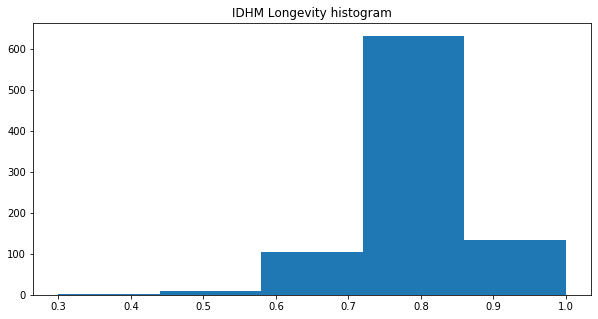

In [41]:
plt.figure(figsize = (10,5))
plt.title('IDHM Longevity histogram')
plt.hist(VALE_RIBEIRA['IDHL-Setor'], bins=5)

## Education index

+ Data used: **Pessoa01_PR.xls**, **Pessoa01_SP.xls**, **Pessoa13_PR.xls** and **Pessoa13_SP.xls**

+ Description: provides information about the resident population by sex, age

### variables used: 
| File |    var      | Description |
|  :---  | :---  | :---  |
| **Pessoa01_UF.xls** |   | 
|  .| V004  a V011 | Pessoas alfabetizadas com 7-14 anos de idade |
|  .| V012 a V077  |Pessoas alfabetizadas com 15 - 80 ou mais anos de idade |
|  **Pessoa13_UF.xls** |  | 
|  .| V041 a V048 | Pessoas com 7 a 14 anos de idade | 
|  .| V049 a V134 | Pessoas com 14 - 100 anos ou mais de idade |

Dimensão educação

O IDH-Educação trabalha basicamente com taxas de alfabetização e de matrículas. No índice municipal, a taxa de alfabetização mede o número de pessoas com mais de 15 anos alfabetizadas. Este critério é utilizado porque, segundo o calendário do MEC, uma pessoa já deve estar alfabetizada ao fim do ensino fundamental, isto é, com 14 anos (PNUD, 2003).

Já a taxa de matrícula mede o acesso ao ensino por parte da população. No âmbito nacional, divide-se o número de matriculados nos níveis fundamental, médio e superior pelo número de pessoas entre 7 e 22 anos. Este intervalo de idade é a faixa etária da população que deveria estar envolvida com o aprendizado, de acordo com o estabelecido pelo MEC (PNUD, 2003).

Para municípios, a taxa de matrícula foi substituída pela frequência à sala de aula, pois uma pessoa pode estar matriculada em uma cidade e morar em outra, distorcendo as taxas municipais de matrículas. Assim, mede-se a parcela da população que vai à escola em relação à população em idade escolar (PNUD, 2003). Contudo, informações de frequência escolar são obtidas apenas no censo amostral.

Devido à limitação encontrada, semelhante ao caso de longevidade, aqui se propõe substituir a taxa de frequência à sala de aula pela média normalizada de anos de estudos dos chefes de família e a taxa de alfabetização de pessoas entre 7 e 14 anos de idade.

A média normalizada é justificada pelo fato de que pessoas são influenciadas, direta ou indiretamente, pelos seus responsáveis, pois se pressupõe que há maior probabilidade de um indivíduo seguir seus estudos até o ensino superior, quando seus responsáveis atingiram esse nível. O contrário também é válido.

Segundo o PNUD (2003), consta no calendário do MEC que o tempo de estudos até se concluir o ensino superior é de 15 anos (dos 7 aos 22 anos de idade). Para a conversão das médias de anos de estudos dos chefes de família em valores entre 0 e 1, os valores disponibilizados no censo, referentes aos anos de estudos dos chefes de família, foram divididos por 15. Este procedimento fornece a média normalizada de anos de estudos dos chefes de família. Ressalta-se que, caso um setor apresente média superior a 15 anos, o mesmo será representado pelo valor 1, por se considerar que já atingiu a cota do MEC em relação ao número de anos necessários para concluir o nível superior.

Por sua vez, a utilização da taxa de alfabetização de pessoas entre 7 e 14 anos deve-se ao fato de considerar que uma pessoa alfabetizada nessa faixa etária esteve matriculada no ensino fundamental há pelo menos sete anos. Essa hipótese, que está apoiada no calendário do MEC, como citado anteriormente, remete à ideia de matrícula recente em nível básico de educação.

Assim, o IDH-Educação setorizado é calculado, no presente trabalho, pela média ponderada entre as três variáveis: 
+ taxa de alfabetizados acima de 15 anos (como proposto na metodologia original);   ✅
+ média normalizada de anos de estudos dos chefes de família;  ❌
+ e taxa de alfabetizados entre 7 e 14 anos (sendo que estas duas últimas variáveis substituem a frequência escolar).  ✅

Os pesos para a média são 1, 1 e 2, respectivamente, contrariando a metodologia proposta no IDH-Municipal, que dá peso 2 à taxa de alfabetização de pessoas acima de 15 anos e 1 para a frequência em sala de aula.

Essa diferença na ponderação entre a metodologia usual e a proposta deve-se ao entendimento dos autores de que a alfabetização entre 7 e 14 anos engloba características locais ao índice, como acessibilidade à educação e qualidade do ensino local. Alguns setores censitários podem não possuir proximidades a escolas, ou até mesmo podem ter escolas com condições precárias de ensino.

As variáveis utilizadas neste estudo foram
+ as V1347 a V1447, que contêm informações sobre a idade da população,  ✅
+ as V2248 a V2325, que indicam o número de pessoas alfabetizadas por idade,  ✅
+ a V0599 (pessoas responsáveis por domicílios particulares permanentes com número de anos de estudo determinado) ❌
+ e a V0601 (total de anos de estudo das pessoas responsáveis por domicílios particulares permanentes). ❌


In [42]:
# 1) Pessoas por idade
agePR = pd.read_excel('raw_data/ibge2010/Pessoa13_PR.xls')
ageSP = pd.read_excel('raw_data/ibge2010/Pessoa13_SP2.xls')

ageVR = pd.concat([agePR, ageSP])
ageVR = ageVR[ageVR['Cod_setor'].isin(cod_setor)]
ageVR = ageVR[ageVR['V002'] != 'X'] 
#Note: we used 'V002', but it could be any variable
#just to avoid empty data with 'X'
print(len(ageVR), 'census sectors to calculate Education index') #880

880 census sectors to calculate Education index


In [43]:
# 2) Alfabetizados
alfabPR = pd.read_excel('raw_data/ibge2010/Pessoa01_PR.xls')
alfabSP = pd.read_excel('raw_data/ibge2010/Pessoa01_SP2.xls')

alfabVR = pd.concat([alfabPR, alfabSP])
alfabVR = alfabVR[alfabVR['Cod_setor'].isin(cod_setor)]
alfabVR = alfabVR[alfabVR['V002'] != 'X'] 

In [44]:
#population age
#V041 a V048 
vars1=['V'+"{0:03}".format(x) for x in range(41,48+1)]
pessoa7_14= ageVR[vars1].sum(axis=1)   #Pessoas com 7-14 anos de idade

#V049 a V134
vars2=['V'+"{0:03}".format(x) for x in range(49,134+1)]
pessoa15_mas = ageVR[vars2].sum(axis=1) #Pessoas com 14 - 100 anos ou mais de idade

In [45]:
#alfabetizados por faixa etaria
#V004 a V011 
vars1=['V'+"{0:03}".format(x) for x in range(4,11+1)]
alfab7_14= alfabVR[vars1].sum(axis=1)   #Pessoas alfabetizadas com 7-14 anos de idade

#V012 a V077
vars2=['V'+"{0:03}".format(x) for x in range(12,77+1)]
alfab15_mas = alfabVR[vars2].sum(axis=1) #Pessoas alfabetizadas com 15 - 80 ou mais anos de idade

In [46]:
taxaAlfab7_14 = alfab7_14/pessoa7_14
taxaAlfab15_mas = alfab15_mas/pessoa15_mas

alfabIDHM = (2* taxaAlfab7_14 + 1*taxaAlfab15_mas)/3


In [47]:
alfabVR['AlfabIDHM'] = alfabIDHM

In [48]:
VALE_RIBEIRA = pd.merge(VALE_RIBEIRA, alfabVR[['Cod_setor', 'AlfabIDHM']], on = 'Cod_setor', how = 'left')

In [49]:
dct, lst = separate_quintile(VALE_RIBEIRA['AlfabIDHM'].to_dict())
df_quintil = pd.DataFrame(lst, dct.keys(), columns = ['quintilAlfabetizacao'])

In [50]:
VALE_RIBEIRA = pd.merge(VALE_RIBEIRA, df_quintil, left_index = True, right_index = True, how = 'outer')

In [51]:
VALE_RIBEIRA

Cod_setor  Cod_Grandes Regiões Nome_Grande_Regiao Cod_UF  \
0    350270505000001                    3     Região Sudeste     SP   
1    350270505000002                    3     Região Sudeste     SP   
2    350270505000003                    3     Região Sudeste     SP   
3    350270505000004                    3     Região Sudeste     SP   
4    350270505000005                    3     Região Sudeste     SP   
..               ...                  ...                ...    ...   
912  412863305000009                    4         Região Sul     PR   
913  412863305000010                    4         Região Sul     PR   
914  412863305000011                    4         Região Sul     PR   
915  412863305000012                    4         Região Sul     PR   
916  412863305000013                    4         Região Sul     PR   

    Nome_da_UF   Cod_meso               Nome_da_meso  Cod_micro Nome_da_micro  \
0     São Paulo      3511               Itapetininga      35044  Capão Bonito   
1     São Paulo      3511               Itapetininga      35044  Capão Bonito   
2     São Paulo      3511               Itapetininga      35044  Capão Bonito   
3     São Paulo      3511               Itapetininga      35044  Capão Bonito   
4     São Paulo      3511               Itapetininga      35044  Capão Bonito   
..          ...       ...                        ...        ...           ...   
912      Paraná      4110  Metropolitana de Curitiba      41035    Cerro Azul   
913      Paraná      4110  Metropolitana de Curitiba      41035    Cerro Azul   
914      Paraná      4110  Metropolitana de Curitiba      41035    Cerro Azul   
915      Paraná      4110  Metropolitana de Curitiba      41035    Cerro Azul   
916      Paraná      4110  Metropolitana de Curitiba      41035    Cerro Azul   

     Cod_RM  ...     V007          V008     V009          V010     V011  \
0         0  ...  1208.16  2.693065e+06   756.23  1.540642e+06  1075.16   
1         0  ...  1573.15  4.929243e+06   902.73  2.397731e+06  1247.07   
2         0  ...  2978.99  1.298472e+07  1653.02  7.020103e+06  2182.31   
3         0  ...  4338.30  8.853727e+08  1830.15  3.092284e+08  2788.34   
4         0  ...   809.43  3.836363e+05   466.07  3.011237e+05   695.64   
..      ...  ...      ...           ...      ...           ...      ...   
912      23  ...   615.12  2.381755e+05   186.55  1.266643e+05   449.33   
913      23  ...   483.47  7.430649e+04   233.88  8.517287e+04   399.17   
914      23  ...   561.41  1.228981e+05   270.28  1.477149e+05   498.70   
915      23  ...   601.88  7.154349e+04   211.92  9.218205e+04   510.01   
916      23  ...   597.07  2.634608e+05   211.31  1.553801e+05   565.07   

             V012 IDHL-Setor  quintilLongevidade AlfabIDHM  \
0    1.848462e+06   0.800000                 3.0  0.970194   
1    2.884587e+06   0.850000                 4.0  0.971920   
2    8.118250e+06   0.933333                 5.0  0.975673   
3    4.692944e+08   0.800000                 3.0  0.939745   
4    2.897253e+05   0.816667                 3.0  0.968134   
..            ...        ...                 ...       ...   
912  1.873372e+05   0.750000                 2.0  0.902424   
913  7.936740e+04   0.783333                 3.0  0.900085   
914  1.587114e+05   0.783333                 3.0  0.936782   
915  6.966823e+04   0.750000                 2.0  0.885842   
916  2.160530e+05   0.833333                 4.0  0.907108   

     quintilAlfabetizacao  
0                     5.0  
1                     5.0  
2                     5.0  
3                     3.0  
4                     5.0  
..                    ...  
912                   2.0  
913                   2.0  
914                   3.0  
915                   1.0  
916                   2.0  

[917 rows x 37 columns]

In [52]:
VALE_RIBEIRA.to_csv('temp_Alfabetizacao.csv') 

(array([  1.,   4.,  13., 102., 760.]),
 array([0.41651032, 0.53320826, 0.64990619, 0.76660413, 0.88330206,
        1.        ]),
 <a list of 5 Patch objects>)

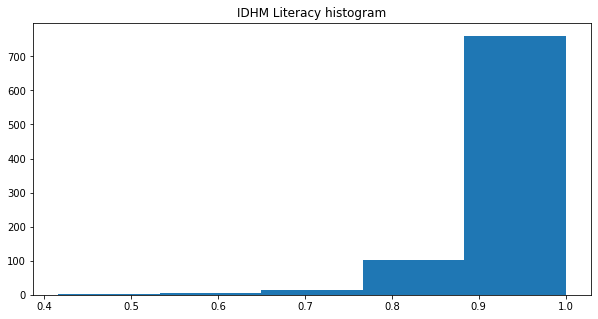

In [53]:
plt.figure(figsize = (10,5))
plt.title('IDHM Literacy histogram')
plt.hist(VALE_RIBEIRA['AlfabIDHM'], bins=5)

## Income index

+ Data used: **Basico_PR.xls** and **Basico_SP.xls**

+ Description: contains the codes and names of the geographical subdivisions and the basic information of the register of areas (totals, averages and variances)


IDHM-R = [ln (renda per capita do local de referência) – ln (valor mínimo de
referência)] / [ln(valor máximo de referência) – ln (valor mínimo de referência)]


Eq. IDHM-R=$ \frac{ln_{rpc}-ln_{mi}}{ln_{rma}- ln_{rmi}}$

where

- $ln_{rmi}$ é o logaritmo da referência mínima;

- $ln_{rma}$ é o logaritmo da referência máxima. 

- $ln_{rpc}$  é o logaritmo da renda per capita do setor censitário;
    - A: (**Total do rendimento nominal mensal das pessoas responsáveis por domicílios particulares permanentes**) 
    - B: (**moradores ou população residente no setor**). 
    - Portanto, dividindo-se A por B, tem-se o valor da renda setorizada per capita.

### variables used:
| File |    var      | Description |
|  :---  | :--- | :--- |
| **ResponsavelRenda_UF.xls** |   
|  .| **V022** | Total do rendimento nominal mensal das pessoas responsáveis |
| **Basico_UF.xls** | 
|  .| **V002**  | Moradores em domicílios particulares permanentes ou população residente em domicílios particulares permanentes |
|  .| **V005** | Valor do rendimento nominal **médio** mensal das pessoas responsáveis por domicílios particulares permanentes (com e sem rendimento) |
| **Pessoa13_UF.xls** | 
|  .| V001 | Pessoas residentes em domicílios particulares e domicílios coletivos |
|  .| V002 | Pessoas residentes em domicílios particulares permanentes |


In [54]:
# Atlas Brazil, pag. 14 
rma = 4033.00 #Reais referência máxima
rmi = 8.00    #Reais referência mínima

In [55]:
responPR = pd.read_excel('raw_data/ibge2010/ResponsavelRenda_PR.xls')
responSP = pd.read_excel('raw_data/ibge2010/ResponsavelRenda_SP2.xls')

responVR = pd.concat([responPR, responSP])
responVR = responVR[responVR['Cod_setor'].isin(cod_setor)]

In [56]:
#rpc= basicoVR['V005']/basicoVR['V002'] #per-capita per sector
#rpc= responVR['V022']/basicoVR['V002'] #per-capita per sector
A=responVR[['Cod_setor','V022']]
B=basicoVR[['Cod_setor','V002']]

#df_rpc=B.join(A.set_index('Cod_setor'), on='Cod_setor')
df_rpc = pd.merge(B, A, on="Cod_setor")
df_rpc = df_rpc[df_rpc['V022'] != 'X'] 
#Note: we used 'V022', but it could be any variable
#just to avoid empty data with 'X'
print(len(df_rpc), 'census sectors to calculate Income index') #880


880 census sectors to calculate Income index


In [57]:
rpc= df_rpc['V022'].astype(float)/df_rpc['V002'] #per-capita per sector
VALE_RIBEIRA['RendaIDHM'] = (np.log(rpc) - np.log(rmi))/(np.log(rma)-np.log(rmi))

In [58]:
dct, lst = separate_quintile(VALE_RIBEIRA['RendaIDHM'].to_dict())
df_quintil = pd.DataFrame(lst, dct.keys(), columns = ['quintilRenda'])

In [59]:
VALE_RIBEIRA = pd.merge(VALE_RIBEIRA, df_quintil, left_index = True, right_index = True, how = 'outer')

In [60]:
VALE_RIBEIRA

Cod_setor  Cod_Grandes Regiões Nome_Grande_Regiao Cod_UF  \
0    350270505000001                    3     Região Sudeste     SP   
1    350270505000002                    3     Região Sudeste     SP   
2    350270505000003                    3     Região Sudeste     SP   
3    350270505000004                    3     Região Sudeste     SP   
4    350270505000005                    3     Região Sudeste     SP   
..               ...                  ...                ...    ...   
912  412863305000009                    4         Região Sul     PR   
913  412863305000010                    4         Região Sul     PR   
914  412863305000011                    4         Região Sul     PR   
915  412863305000012                    4         Região Sul     PR   
916  412863305000013                    4         Região Sul     PR   

    Nome_da_UF   Cod_meso               Nome_da_meso  Cod_micro Nome_da_micro  \
0     São Paulo      3511               Itapetininga      35044  Capão Bonito   
1     São Paulo      3511               Itapetininga      35044  Capão Bonito   
2     São Paulo      3511               Itapetininga      35044  Capão Bonito   
3     São Paulo      3511               Itapetininga      35044  Capão Bonito   
4     São Paulo      3511               Itapetininga      35044  Capão Bonito   
..          ...       ...                        ...        ...           ...   
912      Paraná      4110  Metropolitana de Curitiba      41035    Cerro Azul   
913      Paraná      4110  Metropolitana de Curitiba      41035    Cerro Azul   
914      Paraná      4110  Metropolitana de Curitiba      41035    Cerro Azul   
915      Paraná      4110  Metropolitana de Curitiba      41035    Cerro Azul   
916      Paraná      4110  Metropolitana de Curitiba      41035    Cerro Azul   

     Cod_RM  ...     V009          V010     V011          V012 IDHL-Setor  \
0         0  ...   756.23  1.540642e+06  1075.16  1.848462e+06   0.800000   
1         0  ...   902.73  2.397731e+06  1247.07  2.884587e+06   0.850000   
2         0  ...  1653.02  7.020103e+06  2182.31  8.118250e+06   0.933333   
3         0  ...  1830.15  3.092284e+08  2788.34  4.692944e+08   0.800000   
4         0  ...   466.07  3.011237e+05   695.64  2.897253e+05   0.816667   
..      ...  ...      ...           ...      ...           ...        ...   
912      23  ...   186.55  1.266643e+05   449.33  1.873372e+05   0.750000   
913      23  ...   233.88  8.517287e+04   399.17  7.936740e+04   0.783333   
914      23  ...   270.28  1.477149e+05   498.70  1.587114e+05   0.783333   
915      23  ...   211.92  9.218205e+04   510.01  6.966823e+04   0.750000   
916      23  ...   211.31  1.553801e+05   565.07  2.160530e+05   0.833333   

     quintilLongevidade AlfabIDHM  quintilAlfabetizacao RendaIDHM  \
0                   3.0  0.970194                   5.0  0.606203   
1                   4.0  0.971920                   5.0  0.671455   
2                   5.0  0.975673                   5.0  0.778504   
3                   3.0  0.939745                   3.0  0.808376   
4                   3.0  0.968134                   5.0  0.545806   
..                  ...       ...                   ...       ...   
912                 2.0  0.902424                   2.0  0.400798   
913                 3.0  0.900085                   2.0  0.449906   
914                 3.0  0.936782                   3.0  0.461763   
915                 2.0  0.885842                   1.0  0.428022   
916                 4.0  0.907108                   2.0  0.429378   

     quintilRenda  
0             5.0  
1             5.0  
2             5.0  
3             5.0  
4             4.0  
..            ...  
912           1.0  
913           1.0  
914           1.0  
915           1.0  
916           1.0  

[917 rows x 39 columns]

In [61]:
VALE_RIBEIRA.to_csv('temp_Renda.csv') 

## Data writing: IDHMs indicators per Census Sector

In [62]:
quintilIDHM = VALE_RIBEIRA[['Cod_setor', 'quintilLongevidade', 'quintilAlfabetizacao', 'quintilRenda']]


In [63]:

quintilIDHM.replace("", float("NaN"))

IDHM = quintilIDHM[['Cod_setor','quintilLongevidade', 'quintilAlfabetizacao', 'quintilRenda']].copy()
IDHM.dropna(subset = ["quintilRenda"], inplace=True)



In [64]:
IDHM

Cod_setor  quintilLongevidade  quintilAlfabetizacao  quintilRenda
0    350270505000001                 3.0                   5.0           5.0
1    350270505000002                 4.0                   5.0           5.0
2    350270505000003                 5.0                   5.0           5.0
3    350270505000004                 3.0                   3.0           5.0
4    350270505000005                 3.0                   5.0           4.0
..               ...                 ...                   ...           ...
912  412863305000009                 2.0                   2.0           1.0
913  412863305000010                 3.0                   2.0           1.0
914  412863305000011                 3.0                   3.0           1.0
915  412863305000012                 2.0                   1.0           1.0
916  412863305000013                 4.0                   2.0           1.0

[880 rows x 4 columns]

In [65]:
IDHM.to_csv('IDHM_ValeRibeira.csv')